In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#dimension of one input image to the discriminator
input_dim = 784

#dimension of noise vector to the generator
noise_dim = 50

#number of neurons in the hidden layer of the discriminator
neuron_dim = 128

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def weight_initialize(size):
    dim = size[0]
    stdev = 1. / tf.sqrt(dim / 2.)
    return tf.random_normal(shape=size, stddev=stdev)

# input to the discriminator
# None is used to automatically adjust according to bumber of input images in a batch
X = tf.placeholder(tf.float32, shape=[None, input_dim])

# Weights are intitialized between the first hidden layer and the input layer
# Shape --> input_dim x neuron_dim
Disc_W1 = tf.Variable(weight_initialize([input_dim, neuron_dim]))
# Biases are intialized to zeros
Disc_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output node
# Shape --> neuron_dim x 1
Disc_W2 = tf.Variable(weight_initialize([neuron_dim, 1]))
# Biases are intialized to zeros
Disc_b2 = tf.Variable(tf.zeros(shape=[1]))

# Discriminator variable
var_D = [Disc_W1, Disc_W2, Disc_b1, Disc_b2]

# input noise to the generator
z = tf.placeholder(tf.float32, shape=[None, noise_dim])

# Weights are intialized between noise layer and first hidden layer
# Shape --> noise_dim x neuron_dim
Genr_W1 = tf.Variable(weight_initialize([noise_dim, neuron_dim]))
# Biases are intialized to zeros
Genr_b1 = tf.Variable(tf.zeros(shape=[neuron_dim]))

# Weights are intialized between hidden layer and output layer (generated image)
# Shape --> neuron_dim x input_dim
Genr_W2 = tf.Variable(weight_initialize([neuron_dim, input_dim]))
# Biases are intialized to zeros
Genr_b2 = tf.Variable(tf.zeros(shape=[input_dim]))

# Generator variable
var_G = [Genr_W1, Genr_W2, Genr_b1, Genr_b2]

def generator(z):
    # [None, noise_dim] x [noise_dim, neuron_dim] = None, neuron_dim
    Genr_h = tf.nn.relu(tf.matmul(z, Genr_W1) + Genr_b1)
    # [None, neuron_dim] x [neuron_dim, input_dim] = None, input_dim
    Genr_log_prob = tf.matmul(Genr_h, Genr_W2) + Genr_b2
    Genr_prob = tf.nn.sigmoid(Genr_log_prob)
    return Genr_prob

def discriminator(x):
    # [None, input_dim] x [input_dim, neuron_dim] = None, neuron_dim
    Disc_h = tf.nn.relu(tf.matmul(x, Disc_W1) + Disc_b1)
    # [None, neuron_dim] x [neuron_dim, 1] = None, 1
    Disc_log_prob = tf.matmul(Disc_h, Disc_W2) + Disc_b2
    return Disc_log_prob

Loop: 0, Generator_loss: 0.0033172, Discriminator_loss: 0.0088965


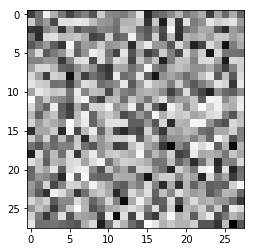

Loop: 100, Generator_loss: 1.5086, Discriminator_loss: 1.9782
Loop: 200, Generator_loss: 1.3311, Discriminator_loss: 1.8074
Loop: 300, Generator_loss: 1.0695, Discriminator_loss: 1.6017
Loop: 400, Generator_loss: 0.86344, Discriminator_loss: 1.3327
Loop: 500, Generator_loss: 0.82493, Discriminator_loss: 1.0521
Loop: 600, Generator_loss: 0.72122, Discriminator_loss: 0.69614
Loop: 700, Generator_loss: 0.56722, Discriminator_loss: 0.4728
Loop: 800, Generator_loss: 0.44764, Discriminator_loss: 0.23166
Loop: 900, Generator_loss: 0.11059, Discriminator_loss: 0.16061
Loop: 1000, Generator_loss: 0.077655, Discriminator_loss: 0.092377


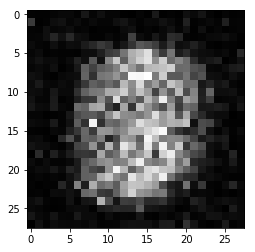

Loop: 1100, Generator_loss: -0.014593, Discriminator_loss: 0.046825
Loop: 1200, Generator_loss: 0.012329, Discriminator_loss: 0.025301
Loop: 1300, Generator_loss: 0.041274, Discriminator_loss: 0.0049628
Loop: 1400, Generator_loss: 0.024852, Discriminator_loss: 0.0070891
Loop: 1500, Generator_loss: 0.0015477, Discriminator_loss: 0.010696
Loop: 1600, Generator_loss: -0.0064054, Discriminator_loss: 0.00090976
Loop: 1700, Generator_loss: -0.080405, Discriminator_loss: 0.0057104
Loop: 1800, Generator_loss: 0.071973, Discriminator_loss: 0.011845
Loop: 1900, Generator_loss: -0.025928, Discriminator_loss: 0.0074641
Loop: 2000, Generator_loss: 0.032874, Discriminator_loss: 0.00049277


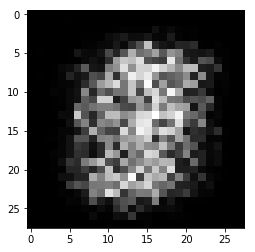

Loop: 2100, Generator_loss: 0.062154, Discriminator_loss: 0.0016393
Loop: 2200, Generator_loss: 0.0048876, Discriminator_loss: -0.0021365
Loop: 2300, Generator_loss: -0.033611, Discriminator_loss: -0.0015636
Loop: 2400, Generator_loss: -0.0078873, Discriminator_loss: 0.0020685
Loop: 2500, Generator_loss: -0.018952, Discriminator_loss: -0.0028768
Loop: 2600, Generator_loss: -0.076891, Discriminator_loss: -0.0083743
Loop: 2700, Generator_loss: -0.030231, Discriminator_loss: 0.0025102
Loop: 2800, Generator_loss: -0.027536, Discriminator_loss: 0.0025785
Loop: 2900, Generator_loss: 0.022047, Discriminator_loss: 0.0024563
Loop: 3000, Generator_loss: 0.059901, Discriminator_loss: 0.0060974


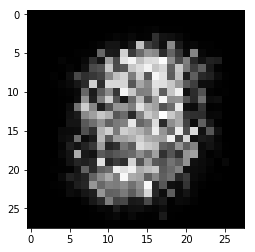

Loop: 3100, Generator_loss: 0.07792, Discriminator_loss: 0.0096254
Loop: 3200, Generator_loss: -0.19424, Discriminator_loss: 0.018251
Loop: 3300, Generator_loss: 0.081891, Discriminator_loss: 0.039198
Loop: 3400, Generator_loss: 0.027912, Discriminator_loss: 0.064514
Loop: 3500, Generator_loss: -0.030014, Discriminator_loss: 0.09016
Loop: 3600, Generator_loss: -0.010615, Discriminator_loss: 0.098301
Loop: 3700, Generator_loss: -0.020443, Discriminator_loss: 0.11057
Loop: 3800, Generator_loss: -0.016984, Discriminator_loss: 0.080348
Loop: 3900, Generator_loss: -0.016461, Discriminator_loss: 0.082135
Loop: 4000, Generator_loss: -0.006474, Discriminator_loss: 0.08722


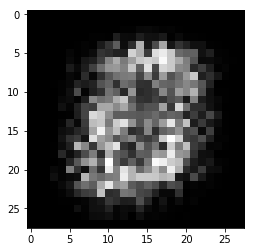

Loop: 4100, Generator_loss: 0.0012206, Discriminator_loss: 0.094595
Loop: 4200, Generator_loss: -0.016556, Discriminator_loss: 0.08894
Loop: 4300, Generator_loss: -0.0028511, Discriminator_loss: 0.083927
Loop: 4400, Generator_loss: -0.026353, Discriminator_loss: 0.066041
Loop: 4500, Generator_loss: -0.032879, Discriminator_loss: 0.058411
Loop: 4600, Generator_loss: -0.022484, Discriminator_loss: 0.065737
Loop: 4700, Generator_loss: -0.011951, Discriminator_loss: 0.054751
Loop: 4800, Generator_loss: 0.0031564, Discriminator_loss: 0.064728
Loop: 4900, Generator_loss: -0.013551, Discriminator_loss: 0.067239
Loop: 5000, Generator_loss: -0.016272, Discriminator_loss: 0.071786


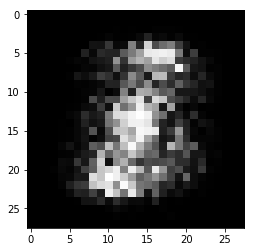

Loop: 5100, Generator_loss: 0.0020979, Discriminator_loss: 0.069648
Loop: 5200, Generator_loss: -0.0024323, Discriminator_loss: 0.069239
Loop: 5300, Generator_loss: 0.0082882, Discriminator_loss: 0.056553
Loop: 5400, Generator_loss: -0.013848, Discriminator_loss: 0.065701
Loop: 5500, Generator_loss: 0.0044828, Discriminator_loss: 0.080341
Loop: 5600, Generator_loss: -0.0069234, Discriminator_loss: 0.060711
Loop: 5700, Generator_loss: -0.010197, Discriminator_loss: 0.050293
Loop: 5800, Generator_loss: -0.011099, Discriminator_loss: 0.061433
Loop: 5900, Generator_loss: -0.0083977, Discriminator_loss: 0.042017
Loop: 6000, Generator_loss: -0.022942, Discriminator_loss: 0.052002


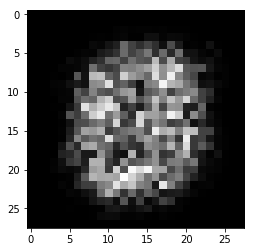

Loop: 6100, Generator_loss: -0.012371, Discriminator_loss: 0.049742
Loop: 6200, Generator_loss: -0.023641, Discriminator_loss: 0.041379
Loop: 6300, Generator_loss: -0.017498, Discriminator_loss: 0.045167
Loop: 6400, Generator_loss: -0.0086109, Discriminator_loss: 0.049279
Loop: 6500, Generator_loss: -0.021229, Discriminator_loss: 0.061322
Loop: 6600, Generator_loss: -0.022642, Discriminator_loss: 0.057582
Loop: 6700, Generator_loss: -0.027191, Discriminator_loss: 0.04222
Loop: 6800, Generator_loss: 0.00037216, Discriminator_loss: 0.049038
Loop: 6900, Generator_loss: -0.015771, Discriminator_loss: 0.040978
Loop: 7000, Generator_loss: -0.014089, Discriminator_loss: 0.0473


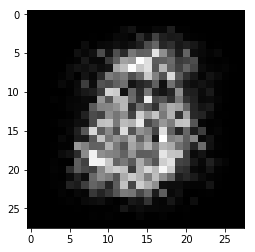

Loop: 7100, Generator_loss: -0.0078671, Discriminator_loss: 0.059985
Loop: 7200, Generator_loss: -0.010314, Discriminator_loss: 0.042839
Loop: 7300, Generator_loss: -0.018119, Discriminator_loss: 0.044654
Loop: 7400, Generator_loss: -0.02266, Discriminator_loss: 0.045902
Loop: 7500, Generator_loss: -0.016761, Discriminator_loss: 0.040417
Loop: 7600, Generator_loss: -0.0084873, Discriminator_loss: 0.037025
Loop: 7700, Generator_loss: -0.0068258, Discriminator_loss: 0.038026
Loop: 7800, Generator_loss: -0.0054899, Discriminator_loss: 0.036724
Loop: 7900, Generator_loss: -0.005466, Discriminator_loss: 0.041384
Loop: 8000, Generator_loss: -0.0070004, Discriminator_loss: 0.043412


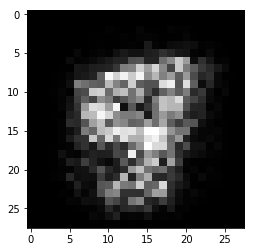

Loop: 8100, Generator_loss: -0.0011746, Discriminator_loss: 0.031581
Loop: 8200, Generator_loss: -0.011943, Discriminator_loss: 0.036968
Loop: 8300, Generator_loss: -0.0064515, Discriminator_loss: 0.042159
Loop: 8400, Generator_loss: -0.016562, Discriminator_loss: 0.041055
Loop: 8500, Generator_loss: -0.0091929, Discriminator_loss: 0.041153
Loop: 8600, Generator_loss: -0.0059359, Discriminator_loss: 0.032926
Loop: 8700, Generator_loss: -0.0078286, Discriminator_loss: 0.034966
Loop: 8800, Generator_loss: -0.019032, Discriminator_loss: 0.029615
Loop: 8900, Generator_loss: -0.014792, Discriminator_loss: 0.025983
Loop: 9000, Generator_loss: -0.0013047, Discriminator_loss: 0.033248


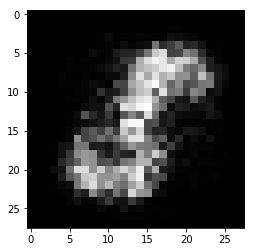

Loop: 9100, Generator_loss: 0.0013225, Discriminator_loss: 0.037434
Loop: 9200, Generator_loss: -0.0018352, Discriminator_loss: 0.033091
Loop: 9300, Generator_loss: -0.011293, Discriminator_loss: 0.037394
Loop: 9400, Generator_loss: 0.0019812, Discriminator_loss: 0.036075
Loop: 9500, Generator_loss: -0.0076137, Discriminator_loss: 0.033323
Loop: 9600, Generator_loss: -0.012989, Discriminator_loss: 0.029795
Loop: 9700, Generator_loss: -0.012656, Discriminator_loss: 0.02883
Loop: 9800, Generator_loss: -0.0067818, Discriminator_loss: 0.033017
Loop: 9900, Generator_loss: -0.010721, Discriminator_loss: 0.034567
Loop: 10000, Generator_loss: -0.0084204, Discriminator_loss: 0.032


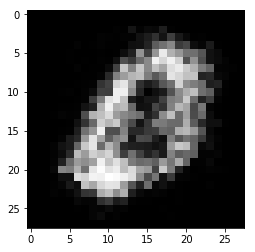

Loop: 10100, Generator_loss: -0.015546, Discriminator_loss: 0.035202
Loop: 10200, Generator_loss: -0.01335, Discriminator_loss: 0.029541
Loop: 10300, Generator_loss: -0.010795, Discriminator_loss: 0.027786
Loop: 10400, Generator_loss: -0.013948, Discriminator_loss: 0.032474
Loop: 10500, Generator_loss: -0.014691, Discriminator_loss: 0.031093
Loop: 10600, Generator_loss: -0.0012767, Discriminator_loss: 0.029366
Loop: 10700, Generator_loss: -0.0067402, Discriminator_loss: 0.028127
Loop: 10800, Generator_loss: -0.0080551, Discriminator_loss: 0.035509
Loop: 10900, Generator_loss: -0.0015778, Discriminator_loss: 0.03285
Loop: 11000, Generator_loss: -0.0066157, Discriminator_loss: 0.023586


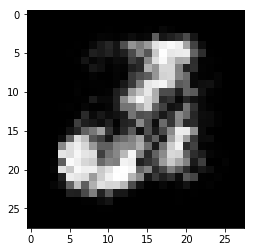

Loop: 11100, Generator_loss: -0.018474, Discriminator_loss: 0.024049
Loop: 11200, Generator_loss: -0.018331, Discriminator_loss: 0.023184
Loop: 11300, Generator_loss: -0.013036, Discriminator_loss: 0.02799
Loop: 11400, Generator_loss: -0.010623, Discriminator_loss: 0.027892
Loop: 11500, Generator_loss: -0.0098304, Discriminator_loss: 0.025023
Loop: 11600, Generator_loss: -0.0024246, Discriminator_loss: 0.031102
Loop: 11700, Generator_loss: -0.019116, Discriminator_loss: 0.031545
Loop: 11800, Generator_loss: -0.013273, Discriminator_loss: 0.030501
Loop: 11900, Generator_loss: -0.014503, Discriminator_loss: 0.02933
Loop: 12000, Generator_loss: -0.013486, Discriminator_loss: 0.021653


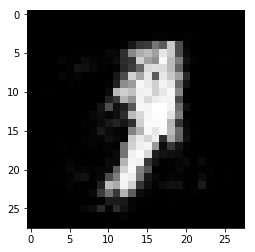

Loop: 12100, Generator_loss: -0.0093833, Discriminator_loss: 0.025582
Loop: 12200, Generator_loss: -0.011974, Discriminator_loss: 0.02493
Loop: 12300, Generator_loss: -0.0057651, Discriminator_loss: 0.025709
Loop: 12400, Generator_loss: -0.0092078, Discriminator_loss: 0.018038
Loop: 12500, Generator_loss: -0.010897, Discriminator_loss: 0.031615
Loop: 12600, Generator_loss: -0.018745, Discriminator_loss: 0.031613
Loop: 12700, Generator_loss: -0.0083171, Discriminator_loss: 0.02465
Loop: 12800, Generator_loss: 0.00098801, Discriminator_loss: 0.025988
Loop: 12900, Generator_loss: -0.011508, Discriminator_loss: 0.025095
Loop: 13000, Generator_loss: -0.012827, Discriminator_loss: 0.025514


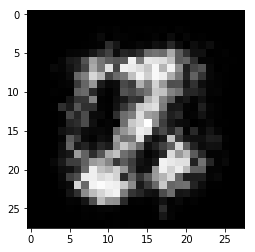

Loop: 13100, Generator_loss: -0.02082, Discriminator_loss: 0.0252
Loop: 13200, Generator_loss: -0.0022077, Discriminator_loss: 0.026724
Loop: 13300, Generator_loss: -0.0074147, Discriminator_loss: 0.022144
Loop: 13400, Generator_loss: -0.01895, Discriminator_loss: 0.021595
Loop: 13500, Generator_loss: -0.0063342, Discriminator_loss: 0.023277
Loop: 13600, Generator_loss: -0.010748, Discriminator_loss: 0.021024
Loop: 13700, Generator_loss: -0.016879, Discriminator_loss: 0.023577
Loop: 13800, Generator_loss: -0.0024607, Discriminator_loss: 0.023578
Loop: 13900, Generator_loss: -0.020817, Discriminator_loss: 0.025013
Loop: 14000, Generator_loss: -0.0033218, Discriminator_loss: 0.02057


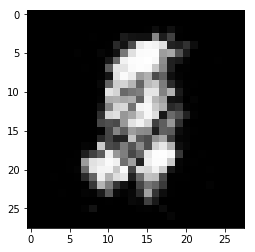

Loop: 14100, Generator_loss: -0.01189, Discriminator_loss: 0.019853
Loop: 14200, Generator_loss: -0.00060645, Discriminator_loss: 0.023364
Loop: 14300, Generator_loss: -0.013237, Discriminator_loss: 0.020041
Loop: 14400, Generator_loss: -0.010321, Discriminator_loss: 0.024501
Loop: 14500, Generator_loss: -0.0028764, Discriminator_loss: 0.018247
Loop: 14600, Generator_loss: -0.015616, Discriminator_loss: 0.020689
Loop: 14700, Generator_loss: -0.016935, Discriminator_loss: 0.021526
Loop: 14800, Generator_loss: -0.011607, Discriminator_loss: 0.021732
Loop: 14900, Generator_loss: 0.00089511, Discriminator_loss: 0.019873
Loop: 15000, Generator_loss: -0.006371, Discriminator_loss: 0.019252


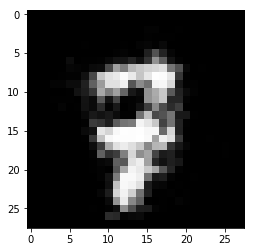

Loop: 15100, Generator_loss: -0.0054827, Discriminator_loss: 0.022668
Loop: 15200, Generator_loss: -0.020989, Discriminator_loss: 0.015038
Loop: 15300, Generator_loss: -0.0092564, Discriminator_loss: 0.021834
Loop: 15400, Generator_loss: -0.012505, Discriminator_loss: 0.018623
Loop: 15500, Generator_loss: -0.010781, Discriminator_loss: 0.020845
Loop: 15600, Generator_loss: 0.0039193, Discriminator_loss: 0.022707
Loop: 15700, Generator_loss: -0.0076687, Discriminator_loss: 0.020663
Loop: 15800, Generator_loss: -0.0028891, Discriminator_loss: 0.016835
Loop: 15900, Generator_loss: 0.0030646, Discriminator_loss: 0.023042
Loop: 16000, Generator_loss: -0.0012504, Discriminator_loss: 0.021865


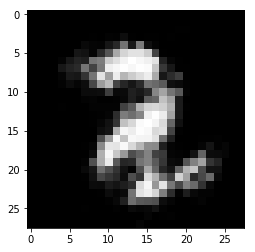

Loop: 16100, Generator_loss: -0.017738, Discriminator_loss: 0.022297
Loop: 16200, Generator_loss: -0.022962, Discriminator_loss: 0.025661
Loop: 16300, Generator_loss: -0.01513, Discriminator_loss: 0.019305
Loop: 16400, Generator_loss: -0.0098967, Discriminator_loss: 0.022003
Loop: 16500, Generator_loss: -0.0076126, Discriminator_loss: 0.018976
Loop: 16600, Generator_loss: -0.0021275, Discriminator_loss: 0.022233
Loop: 16700, Generator_loss: -0.016494, Discriminator_loss: 0.01596
Loop: 16800, Generator_loss: -0.0059772, Discriminator_loss: 0.019833
Loop: 16900, Generator_loss: -0.016162, Discriminator_loss: 0.017825
Loop: 17000, Generator_loss: -0.0034362, Discriminator_loss: 0.017507


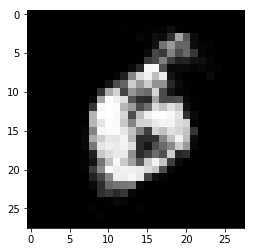

Loop: 17100, Generator_loss: -0.0037126, Discriminator_loss: 0.016865
Loop: 17200, Generator_loss: -0.012278, Discriminator_loss: 0.020812
Loop: 17300, Generator_loss: -0.01335, Discriminator_loss: 0.023642
Loop: 17400, Generator_loss: -0.018585, Discriminator_loss: 0.015935
Loop: 17500, Generator_loss: -0.01791, Discriminator_loss: 0.020482
Loop: 17600, Generator_loss: -0.012268, Discriminator_loss: 0.017326
Loop: 17700, Generator_loss: -0.0078496, Discriminator_loss: 0.011908
Loop: 17800, Generator_loss: -0.011287, Discriminator_loss: 0.015982
Loop: 17900, Generator_loss: -0.0088698, Discriminator_loss: 0.022835
Loop: 18000, Generator_loss: -0.010246, Discriminator_loss: 0.020412


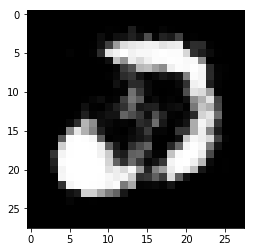

Loop: 18100, Generator_loss: -0.0096395, Discriminator_loss: 0.014885
Loop: 18200, Generator_loss: -0.014955, Discriminator_loss: 0.017207
Loop: 18300, Generator_loss: -0.014693, Discriminator_loss: 0.015534
Loop: 18400, Generator_loss: -0.005056, Discriminator_loss: 0.014179
Loop: 18500, Generator_loss: -0.011443, Discriminator_loss: 0.015878
Loop: 18600, Generator_loss: -0.014668, Discriminator_loss: 0.018083
Loop: 18700, Generator_loss: -0.013446, Discriminator_loss: 0.014543
Loop: 18800, Generator_loss: -0.013934, Discriminator_loss: 0.014548
Loop: 18900, Generator_loss: -0.018496, Discriminator_loss: 0.023147
Loop: 19000, Generator_loss: -0.014633, Discriminator_loss: 0.018385


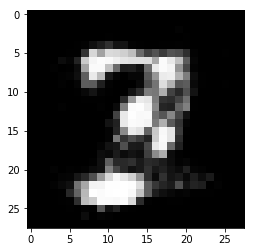

Loop: 19100, Generator_loss: -0.021134, Discriminator_loss: 0.016152
Loop: 19200, Generator_loss: -0.0018274, Discriminator_loss: 0.015161
Loop: 19300, Generator_loss: -0.0059447, Discriminator_loss: 0.017687
Loop: 19400, Generator_loss: -0.006, Discriminator_loss: 0.01503
Loop: 19500, Generator_loss: -0.01121, Discriminator_loss: 0.014655
Loop: 19600, Generator_loss: 8.4652e-05, Discriminator_loss: 0.016522
Loop: 19700, Generator_loss: -0.016039, Discriminator_loss: 0.017528
Loop: 19800, Generator_loss: -0.0060452, Discriminator_loss: 0.018465
Loop: 19900, Generator_loss: -0.011329, Discriminator_loss: 0.017409
Loop: 20000, Generator_loss: -0.015265, Discriminator_loss: 0.014837


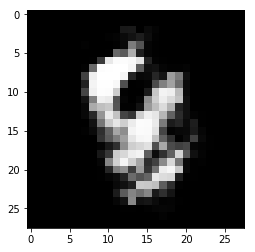

Loop: 20100, Generator_loss: -0.0022149, Discriminator_loss: 0.017147
Loop: 20200, Generator_loss: -0.022015, Discriminator_loss: 0.019151
Loop: 20300, Generator_loss: -0.014092, Discriminator_loss: 0.014198
Loop: 20400, Generator_loss: -0.00575, Discriminator_loss: 0.015403
Loop: 20500, Generator_loss: -0.016882, Discriminator_loss: 0.015342
Loop: 20600, Generator_loss: -0.0148, Discriminator_loss: 0.014713
Loop: 20700, Generator_loss: -0.018365, Discriminator_loss: 0.016245
Loop: 20800, Generator_loss: -0.018338, Discriminator_loss: 0.011403
Loop: 20900, Generator_loss: -0.013046, Discriminator_loss: 0.015603
Loop: 21000, Generator_loss: -0.01754, Discriminator_loss: 0.016604


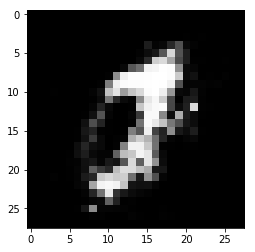

Loop: 21100, Generator_loss: -0.018813, Discriminator_loss: 0.014102
Loop: 21200, Generator_loss: -0.013222, Discriminator_loss: 0.014667
Loop: 21300, Generator_loss: -0.016838, Discriminator_loss: 0.01622
Loop: 21400, Generator_loss: -0.011643, Discriminator_loss: 0.012807
Loop: 21500, Generator_loss: -0.01266, Discriminator_loss: 0.011117
Loop: 21600, Generator_loss: -0.017791, Discriminator_loss: 0.020159
Loop: 21700, Generator_loss: -0.027696, Discriminator_loss: 0.015302
Loop: 21800, Generator_loss: 0.0094003, Discriminator_loss: 0.01349
Loop: 21900, Generator_loss: -0.01951, Discriminator_loss: 0.012719
Loop: 22000, Generator_loss: -0.014713, Discriminator_loss: 0.012164


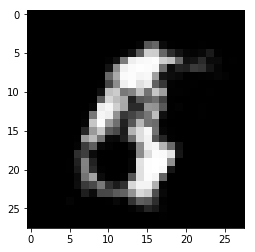

Loop: 22100, Generator_loss: -0.0075709, Discriminator_loss: 0.019327
Loop: 22200, Generator_loss: -0.0038501, Discriminator_loss: 0.012518
Loop: 22300, Generator_loss: -0.0094101, Discriminator_loss: 0.013361
Loop: 22400, Generator_loss: -0.0085402, Discriminator_loss: 0.013233
Loop: 22500, Generator_loss: -0.0099996, Discriminator_loss: 0.01613
Loop: 22600, Generator_loss: -0.0073148, Discriminator_loss: 0.01375
Loop: 22700, Generator_loss: -0.0048481, Discriminator_loss: 0.017252
Loop: 22800, Generator_loss: -0.011422, Discriminator_loss: 0.010586
Loop: 22900, Generator_loss: -0.017472, Discriminator_loss: 0.0098665
Loop: 23000, Generator_loss: -0.0077043, Discriminator_loss: 0.015859


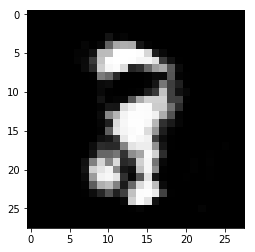

Loop: 23100, Generator_loss: -0.016899, Discriminator_loss: 0.014285
Loop: 23200, Generator_loss: -0.0017698, Discriminator_loss: 0.016223
Loop: 23300, Generator_loss: -0.0033749, Discriminator_loss: 0.011092
Loop: 23400, Generator_loss: -0.013685, Discriminator_loss: 0.017066
Loop: 23500, Generator_loss: -0.0031376, Discriminator_loss: 0.013331
Loop: 23600, Generator_loss: -0.014841, Discriminator_loss: 0.014128
Loop: 23700, Generator_loss: -0.0055342, Discriminator_loss: 0.013905
Loop: 23800, Generator_loss: -0.014314, Discriminator_loss: 0.010949
Loop: 23900, Generator_loss: -0.016205, Discriminator_loss: 0.011313
Loop: 24000, Generator_loss: -0.023305, Discriminator_loss: 0.01488


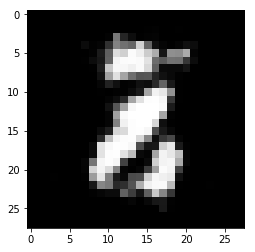

Loop: 24100, Generator_loss: -0.01928, Discriminator_loss: 0.0089555
Loop: 24200, Generator_loss: -0.0055937, Discriminator_loss: 0.01603
Loop: 24300, Generator_loss: -0.011489, Discriminator_loss: 0.012807
Loop: 24400, Generator_loss: 0.0025401, Discriminator_loss: 0.017362
Loop: 24500, Generator_loss: -0.014026, Discriminator_loss: 0.012747
Loop: 24600, Generator_loss: -0.0017202, Discriminator_loss: 0.012916
Loop: 24700, Generator_loss: -0.015596, Discriminator_loss: 0.013442
Loop: 24800, Generator_loss: -0.0093595, Discriminator_loss: 0.012471
Loop: 24900, Generator_loss: -0.0099422, Discriminator_loss: 0.010997
Loop: 25000, Generator_loss: -0.0052201, Discriminator_loss: 0.014363


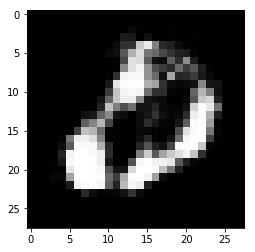

Loop: 25100, Generator_loss: -0.0034216, Discriminator_loss: 0.015479
Loop: 25200, Generator_loss: -0.021463, Discriminator_loss: 0.017926
Loop: 25300, Generator_loss: -0.014528, Discriminator_loss: 0.012423
Loop: 25400, Generator_loss: -0.014574, Discriminator_loss: 0.01254
Loop: 25500, Generator_loss: -0.0077529, Discriminator_loss: 0.012192
Loop: 25600, Generator_loss: -0.012927, Discriminator_loss: 0.014174
Loop: 25700, Generator_loss: -0.021685, Discriminator_loss: 0.015275
Loop: 25800, Generator_loss: -0.0095214, Discriminator_loss: 0.013441
Loop: 25900, Generator_loss: -0.0138, Discriminator_loss: 0.01208
Loop: 26000, Generator_loss: -0.0022993, Discriminator_loss: 0.015176


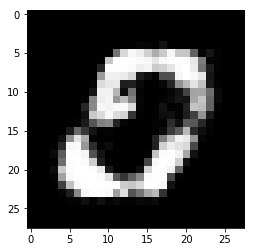

Loop: 26100, Generator_loss: -0.002839, Discriminator_loss: 0.013026
Loop: 26200, Generator_loss: -0.0020256, Discriminator_loss: 0.016013
Loop: 26300, Generator_loss: -0.01804, Discriminator_loss: 0.011669
Loop: 26400, Generator_loss: -0.017254, Discriminator_loss: 0.01344
Loop: 26500, Generator_loss: -0.01383, Discriminator_loss: 0.01725
Loop: 26600, Generator_loss: -0.0093622, Discriminator_loss: 0.01391
Loop: 26700, Generator_loss: -0.012465, Discriminator_loss: 0.010986
Loop: 26800, Generator_loss: -0.011206, Discriminator_loss: 0.011194
Loop: 26900, Generator_loss: -0.013711, Discriminator_loss: 0.012504
Loop: 27000, Generator_loss: -0.016088, Discriminator_loss: 0.007834


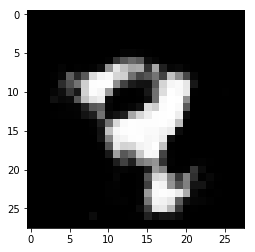

Loop: 27100, Generator_loss: -0.0019355, Discriminator_loss: 0.013009
Loop: 27200, Generator_loss: -0.0197, Discriminator_loss: 0.01224
Loop: 27300, Generator_loss: 0.0174, Discriminator_loss: 0.016892
Loop: 27400, Generator_loss: -0.025391, Discriminator_loss: 0.013191
Loop: 27500, Generator_loss: -0.010288, Discriminator_loss: 0.013167
Loop: 27600, Generator_loss: -0.013192, Discriminator_loss: 0.012208
Loop: 27700, Generator_loss: -0.0022277, Discriminator_loss: 0.011285
Loop: 27800, Generator_loss: -0.015989, Discriminator_loss: 0.010066
Loop: 27900, Generator_loss: -0.022619, Discriminator_loss: 0.011823
Loop: 28000, Generator_loss: -0.035966, Discriminator_loss: 0.012516


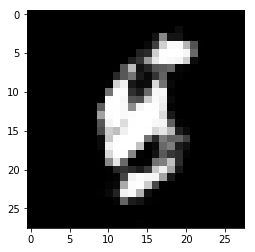

Loop: 28100, Generator_loss: -0.0051051, Discriminator_loss: 0.016663
Loop: 28200, Generator_loss: -0.0088331, Discriminator_loss: 0.016672
Loop: 28300, Generator_loss: -0.022788, Discriminator_loss: 0.014489
Loop: 28400, Generator_loss: -0.0081827, Discriminator_loss: 0.0097887
Loop: 28500, Generator_loss: -0.0076103, Discriminator_loss: 0.011681
Loop: 28600, Generator_loss: -0.0082806, Discriminator_loss: 0.010775
Loop: 28700, Generator_loss: -0.0031685, Discriminator_loss: 0.010735
Loop: 28800, Generator_loss: -0.008082, Discriminator_loss: 0.010821
Loop: 28900, Generator_loss: -0.0036927, Discriminator_loss: 0.012485
Loop: 29000, Generator_loss: -0.010469, Discriminator_loss: 0.012162


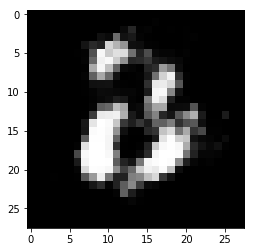

Loop: 29100, Generator_loss: -0.018204, Discriminator_loss: 0.0125
Loop: 29200, Generator_loss: -0.013336, Discriminator_loss: 0.013366
Loop: 29300, Generator_loss: -0.015227, Discriminator_loss: 0.012154
Loop: 29400, Generator_loss: -0.0017593, Discriminator_loss: 0.014011
Loop: 29500, Generator_loss: -0.011175, Discriminator_loss: 0.013183
Loop: 29600, Generator_loss: -0.013746, Discriminator_loss: 0.010355
Loop: 29700, Generator_loss: -0.012848, Discriminator_loss: 0.012122
Loop: 29800, Generator_loss: -0.016459, Discriminator_loss: 0.0077247
Loop: 29900, Generator_loss: -0.011942, Discriminator_loss: 0.0087877
Loop: 30000, Generator_loss: -0.016085, Discriminator_loss: 0.0157


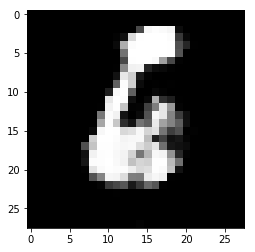

Loop: 30100, Generator_loss: -0.0086022, Discriminator_loss: 0.0086934
Loop: 30200, Generator_loss: -0.014458, Discriminator_loss: 0.012014
Loop: 30300, Generator_loss: -0.011903, Discriminator_loss: 0.0088919
Loop: 30400, Generator_loss: -0.012479, Discriminator_loss: 0.010344
Loop: 30500, Generator_loss: -0.020012, Discriminator_loss: 0.015625
Loop: 30600, Generator_loss: -0.0050743, Discriminator_loss: 0.012189
Loop: 30700, Generator_loss: -0.012111, Discriminator_loss: 0.0092525
Loop: 30800, Generator_loss: -0.018573, Discriminator_loss: 0.0059758
Loop: 30900, Generator_loss: -0.022567, Discriminator_loss: 0.013439
Loop: 31000, Generator_loss: -0.008891, Discriminator_loss: 0.0080642


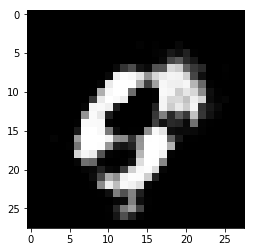

Loop: 31100, Generator_loss: -0.020449, Discriminator_loss: 0.012564
Loop: 31200, Generator_loss: -0.0042066, Discriminator_loss: 0.014286
Loop: 31300, Generator_loss: -0.016895, Discriminator_loss: 0.012424
Loop: 31400, Generator_loss: -0.017035, Discriminator_loss: 0.0089954
Loop: 31500, Generator_loss: -0.02572, Discriminator_loss: 0.010405
Loop: 31600, Generator_loss: -0.011119, Discriminator_loss: 0.012553
Loop: 31700, Generator_loss: -0.025127, Discriminator_loss: 0.016054
Loop: 31800, Generator_loss: -0.0014092, Discriminator_loss: 0.0096628
Loop: 31900, Generator_loss: -0.023222, Discriminator_loss: 0.0083391
Loop: 32000, Generator_loss: -0.013033, Discriminator_loss: 0.0098173


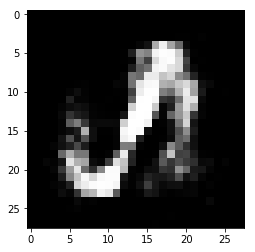

Loop: 32100, Generator_loss: -0.01024, Discriminator_loss: 0.010367
Loop: 32200, Generator_loss: -0.016915, Discriminator_loss: 0.012721
Loop: 32300, Generator_loss: -0.020447, Discriminator_loss: 0.014537
Loop: 32400, Generator_loss: -0.024173, Discriminator_loss: 0.011868
Loop: 32500, Generator_loss: -0.015208, Discriminator_loss: 0.009379
Loop: 32600, Generator_loss: -0.018954, Discriminator_loss: 0.0099424
Loop: 32700, Generator_loss: -0.015265, Discriminator_loss: 0.0088394
Loop: 32800, Generator_loss: -0.013573, Discriminator_loss: 0.009776
Loop: 32900, Generator_loss: -0.013648, Discriminator_loss: 0.010627
Loop: 33000, Generator_loss: -0.01487, Discriminator_loss: 0.013779


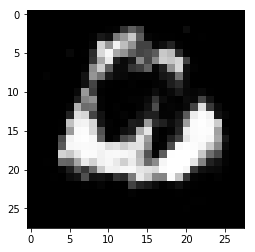

Loop: 33100, Generator_loss: -0.011002, Discriminator_loss: 0.0083276
Loop: 33200, Generator_loss: -0.010955, Discriminator_loss: 0.010056
Loop: 33300, Generator_loss: -0.030645, Discriminator_loss: 0.012453
Loop: 33400, Generator_loss: -0.011829, Discriminator_loss: 0.011154
Loop: 33500, Generator_loss: -0.015355, Discriminator_loss: 0.012743
Loop: 33600, Generator_loss: 0.0049943, Discriminator_loss: 0.011786
Loop: 33700, Generator_loss: -0.028307, Discriminator_loss: 0.0069996
Loop: 33800, Generator_loss: -0.024854, Discriminator_loss: 0.0088706
Loop: 33900, Generator_loss: -0.007523, Discriminator_loss: 0.0081577
Loop: 34000, Generator_loss: -0.011203, Discriminator_loss: 0.011112


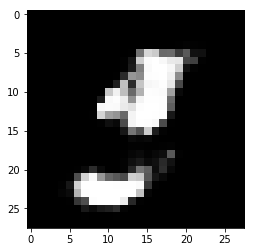

Loop: 34100, Generator_loss: -0.017021, Discriminator_loss: 0.011629
Loop: 34200, Generator_loss: -0.034622, Discriminator_loss: 0.0098577
Loop: 34300, Generator_loss: -0.022972, Discriminator_loss: 0.01157
Loop: 34400, Generator_loss: -0.010515, Discriminator_loss: 0.011305
Loop: 34500, Generator_loss: 0.0042826, Discriminator_loss: 0.010599
Loop: 34600, Generator_loss: -0.019744, Discriminator_loss: 0.012851
Loop: 34700, Generator_loss: -0.01288, Discriminator_loss: 0.013947
Loop: 34800, Generator_loss: -0.015643, Discriminator_loss: 0.012131
Loop: 34900, Generator_loss: -0.027057, Discriminator_loss: 0.011409
Loop: 35000, Generator_loss: -0.016541, Discriminator_loss: 0.0057589


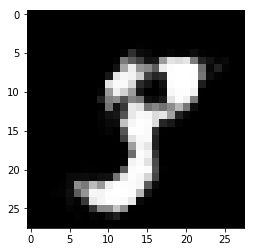

Loop: 35100, Generator_loss: -0.027212, Discriminator_loss: 0.0086166
Loop: 35200, Generator_loss: -0.015766, Discriminator_loss: 0.011876
Loop: 35300, Generator_loss: -0.019188, Discriminator_loss: 0.0042815
Loop: 35400, Generator_loss: -0.013249, Discriminator_loss: 0.0080984
Loop: 35500, Generator_loss: -0.013768, Discriminator_loss: 0.007363
Loop: 35600, Generator_loss: -0.01466, Discriminator_loss: 0.0093085
Loop: 35700, Generator_loss: -0.019874, Discriminator_loss: 0.0073224
Loop: 35800, Generator_loss: -0.011643, Discriminator_loss: 0.0094937
Loop: 35900, Generator_loss: -0.0089182, Discriminator_loss: 0.0081709
Loop: 36000, Generator_loss: -0.01479, Discriminator_loss: 0.01128


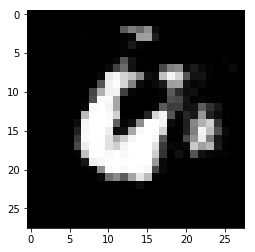

Loop: 36100, Generator_loss: -0.015353, Discriminator_loss: 0.0078805
Loop: 36200, Generator_loss: -0.019944, Discriminator_loss: 0.013902
Loop: 36300, Generator_loss: -0.0098762, Discriminator_loss: 0.012716
Loop: 36400, Generator_loss: -0.012695, Discriminator_loss: 0.011042
Loop: 36500, Generator_loss: -0.015975, Discriminator_loss: 0.011164
Loop: 36600, Generator_loss: -0.01265, Discriminator_loss: 0.010054
Loop: 36700, Generator_loss: -0.016862, Discriminator_loss: 0.013877
Loop: 36800, Generator_loss: -0.0067175, Discriminator_loss: 0.0043668
Loop: 36900, Generator_loss: -0.012074, Discriminator_loss: 0.009565
Loop: 37000, Generator_loss: -0.016009, Discriminator_loss: 0.010393


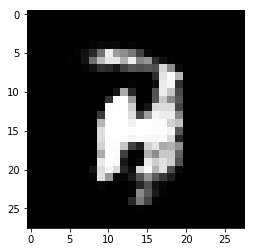

Loop: 37100, Generator_loss: -0.016689, Discriminator_loss: 0.0068543
Loop: 37200, Generator_loss: -0.020441, Discriminator_loss: 0.0088095
Loop: 37300, Generator_loss: -0.020067, Discriminator_loss: 0.0089807
Loop: 37400, Generator_loss: -0.020163, Discriminator_loss: 0.0084299
Loop: 37500, Generator_loss: -0.013356, Discriminator_loss: 0.0086597
Loop: 37600, Generator_loss: -0.0022254, Discriminator_loss: 0.009846
Loop: 37700, Generator_loss: -0.023484, Discriminator_loss: 0.0064567
Loop: 37800, Generator_loss: -0.019768, Discriminator_loss: 0.0076803
Loop: 37900, Generator_loss: -0.0074181, Discriminator_loss: 0.014753
Loop: 38000, Generator_loss: -0.024633, Discriminator_loss: 0.0096247


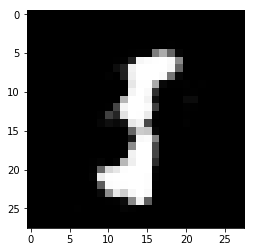

Loop: 38100, Generator_loss: -0.0024879, Discriminator_loss: 0.0085002
Loop: 38200, Generator_loss: -0.022719, Discriminator_loss: 0.013676
Loop: 38300, Generator_loss: -0.015019, Discriminator_loss: 0.0088941
Loop: 38400, Generator_loss: -0.019062, Discriminator_loss: 0.0086871
Loop: 38500, Generator_loss: -0.019218, Discriminator_loss: 0.0084687
Loop: 38600, Generator_loss: -0.013088, Discriminator_loss: 0.0060304
Loop: 38700, Generator_loss: -0.026399, Discriminator_loss: 0.011413
Loop: 38800, Generator_loss: -0.0021727, Discriminator_loss: 0.0076266
Loop: 38900, Generator_loss: -0.013146, Discriminator_loss: 0.0081565
Loop: 39000, Generator_loss: -0.0019692, Discriminator_loss: 0.0096197


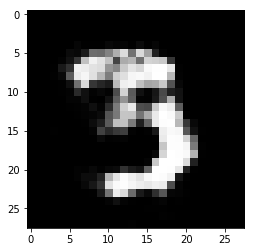

Loop: 39100, Generator_loss: -0.019798, Discriminator_loss: 0.0071617
Loop: 39200, Generator_loss: -0.020548, Discriminator_loss: 0.0084092
Loop: 39300, Generator_loss: -0.01077, Discriminator_loss: 0.005893
Loop: 39400, Generator_loss: -0.014386, Discriminator_loss: 0.0099889
Loop: 39500, Generator_loss: -0.0082811, Discriminator_loss: 0.010081
Loop: 39600, Generator_loss: -0.019561, Discriminator_loss: 0.0075982
Loop: 39700, Generator_loss: 0.006396, Discriminator_loss: 0.012658
Loop: 39800, Generator_loss: -0.011352, Discriminator_loss: 0.0060011
Loop: 39900, Generator_loss: -0.012057, Discriminator_loss: 0.010485
Loop: 40000, Generator_loss: -0.0089653, Discriminator_loss: 0.010116


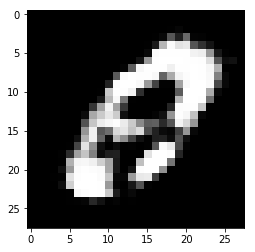

Loop: 40100, Generator_loss: -0.021264, Discriminator_loss: 0.0073602
Loop: 40200, Generator_loss: -0.017194, Discriminator_loss: 0.0090125
Loop: 40300, Generator_loss: -0.019617, Discriminator_loss: 0.0093402
Loop: 40400, Generator_loss: -0.015925, Discriminator_loss: 0.0097465
Loop: 40500, Generator_loss: -0.015847, Discriminator_loss: 0.0076317
Loop: 40600, Generator_loss: -0.018988, Discriminator_loss: 0.005756
Loop: 40700, Generator_loss: -0.021697, Discriminator_loss: 0.012457
Loop: 40800, Generator_loss: -0.025311, Discriminator_loss: 0.011411
Loop: 40900, Generator_loss: -0.0072071, Discriminator_loss: 0.0086094
Loop: 41000, Generator_loss: -0.019191, Discriminator_loss: 0.010675


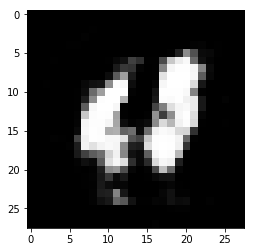

Loop: 41100, Generator_loss: -0.023141, Discriminator_loss: 0.0091002
Loop: 41200, Generator_loss: -0.0099704, Discriminator_loss: 0.010556
Loop: 41300, Generator_loss: -0.024205, Discriminator_loss: 0.0085581
Loop: 41400, Generator_loss: -0.0103, Discriminator_loss: 0.0073901
Loop: 41500, Generator_loss: -0.012321, Discriminator_loss: 0.0040026
Loop: 41600, Generator_loss: -0.0084441, Discriminator_loss: 0.008007
Loop: 41700, Generator_loss: -0.029955, Discriminator_loss: 0.0091381
Loop: 41800, Generator_loss: -0.020843, Discriminator_loss: 0.0063045
Loop: 41900, Generator_loss: -0.015659, Discriminator_loss: 0.0095258
Loop: 42000, Generator_loss: -0.0088808, Discriminator_loss: 0.0097374


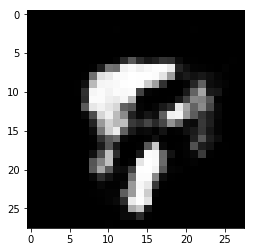

Loop: 42100, Generator_loss: 0.0048082, Discriminator_loss: 0.0092248
Loop: 42200, Generator_loss: -0.019519, Discriminator_loss: 0.0098275
Loop: 42300, Generator_loss: 0.0024096, Discriminator_loss: 0.0096503
Loop: 42400, Generator_loss: -0.02507, Discriminator_loss: 0.0048975
Loop: 42500, Generator_loss: -0.020893, Discriminator_loss: 0.0090345
Loop: 42600, Generator_loss: -0.0095162, Discriminator_loss: 0.010338
Loop: 42700, Generator_loss: -0.033558, Discriminator_loss: 0.0099273
Loop: 42800, Generator_loss: -0.022054, Discriminator_loss: 0.010357
Loop: 42900, Generator_loss: -0.019191, Discriminator_loss: 0.0073213
Loop: 43000, Generator_loss: -0.019585, Discriminator_loss: 0.010029


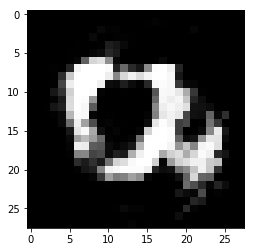

Loop: 43100, Generator_loss: -0.010111, Discriminator_loss: 0.010676
Loop: 43200, Generator_loss: -0.022031, Discriminator_loss: 0.004437
Loop: 43300, Generator_loss: -0.0028555, Discriminator_loss: 0.0083354
Loop: 43400, Generator_loss: -0.021048, Discriminator_loss: 0.0071009
Loop: 43500, Generator_loss: -0.0021623, Discriminator_loss: 0.010496
Loop: 43600, Generator_loss: -0.007728, Discriminator_loss: 0.0096618
Loop: 43700, Generator_loss: -0.0095999, Discriminator_loss: 0.011342
Loop: 43800, Generator_loss: -0.004617, Discriminator_loss: 0.0023071
Loop: 43900, Generator_loss: 0.00021686, Discriminator_loss: 0.0084722
Loop: 44000, Generator_loss: -0.012877, Discriminator_loss: 0.007827


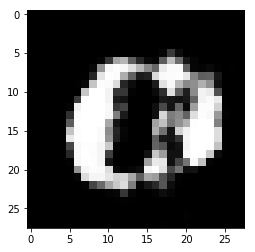

Loop: 44100, Generator_loss: 0.00089808, Discriminator_loss: 0.010215
Loop: 44200, Generator_loss: -0.029912, Discriminator_loss: 0.0072157
Loop: 44300, Generator_loss: -0.0061332, Discriminator_loss: 0.01092
Loop: 44400, Generator_loss: -0.015598, Discriminator_loss: 0.0047124
Loop: 44500, Generator_loss: -0.020234, Discriminator_loss: 0.0085272
Loop: 44600, Generator_loss: -0.024493, Discriminator_loss: 0.0088899
Loop: 44700, Generator_loss: -0.0021686, Discriminator_loss: 0.0090734
Loop: 44800, Generator_loss: -0.021499, Discriminator_loss: 0.0082086
Loop: 44900, Generator_loss: -0.0069491, Discriminator_loss: 0.0046889
Loop: 45000, Generator_loss: -0.0067956, Discriminator_loss: 0.0096898


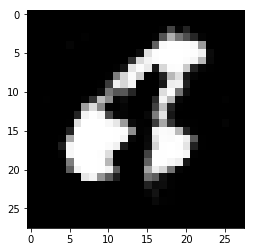

Loop: 45100, Generator_loss: -0.0058881, Discriminator_loss: 0.0075957
Loop: 45200, Generator_loss: -0.025072, Discriminator_loss: 0.0076062
Loop: 45300, Generator_loss: 0.0012111, Discriminator_loss: 0.0030688
Loop: 45400, Generator_loss: -0.022803, Discriminator_loss: 0.0088381
Loop: 45500, Generator_loss: -0.0064324, Discriminator_loss: 0.0049073
Loop: 45600, Generator_loss: -0.017237, Discriminator_loss: 0.0081332
Loop: 45700, Generator_loss: -0.0080013, Discriminator_loss: 0.010711
Loop: 45800, Generator_loss: -0.021235, Discriminator_loss: 0.011082
Loop: 45900, Generator_loss: -0.0086227, Discriminator_loss: 0.010177
Loop: 46000, Generator_loss: -0.015562, Discriminator_loss: 0.0084097


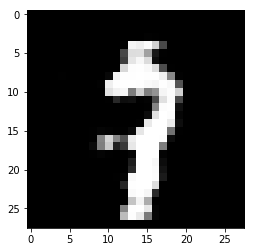

Loop: 46100, Generator_loss: -0.012528, Discriminator_loss: 0.0060513
Loop: 46200, Generator_loss: -0.0071808, Discriminator_loss: 0.0041186
Loop: 46300, Generator_loss: -0.002126, Discriminator_loss: 0.003674
Loop: 46400, Generator_loss: -0.016121, Discriminator_loss: 0.0064446
Loop: 46500, Generator_loss: 0.011788, Discriminator_loss: 0.0027508
Loop: 46600, Generator_loss: -0.017961, Discriminator_loss: 0.0068679
Loop: 46700, Generator_loss: -0.0071399, Discriminator_loss: 0.0081483
Loop: 46800, Generator_loss: -0.019515, Discriminator_loss: 0.008959
Loop: 46900, Generator_loss: -0.0060704, Discriminator_loss: 0.0096726
Loop: 47000, Generator_loss: -0.03283, Discriminator_loss: 0.01554


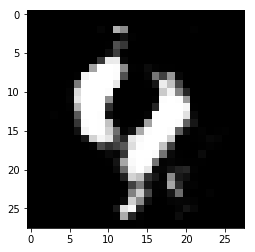

Loop: 47100, Generator_loss: 0.0039417, Discriminator_loss: 0.011673
Loop: 47200, Generator_loss: -0.011056, Discriminator_loss: 0.0087158
Loop: 47300, Generator_loss: -0.0088274, Discriminator_loss: 0.010941
Loop: 47400, Generator_loss: -0.01276, Discriminator_loss: 0.0095932
Loop: 47500, Generator_loss: -0.013725, Discriminator_loss: 0.0090091
Loop: 47600, Generator_loss: -0.018625, Discriminator_loss: 0.010628
Loop: 47700, Generator_loss: -0.011524, Discriminator_loss: 0.0088531
Loop: 47800, Generator_loss: -0.01878, Discriminator_loss: 0.010106
Loop: 47900, Generator_loss: -0.018033, Discriminator_loss: 0.011019
Loop: 48000, Generator_loss: -0.015271, Discriminator_loss: 0.0082377


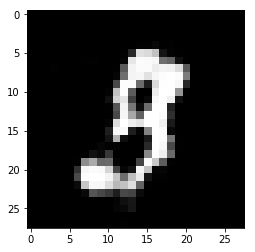

Loop: 48100, Generator_loss: 0.0015737, Discriminator_loss: 0.0085125
Loop: 48200, Generator_loss: -0.013802, Discriminator_loss: 0.0096953
Loop: 48300, Generator_loss: -0.019205, Discriminator_loss: 0.0038166
Loop: 48400, Generator_loss: -0.013903, Discriminator_loss: 0.0070567
Loop: 48500, Generator_loss: -0.0013113, Discriminator_loss: 0.007038
Loop: 48600, Generator_loss: -0.0081974, Discriminator_loss: 0.0040575
Loop: 48700, Generator_loss: -0.013598, Discriminator_loss: 0.0082176
Loop: 48800, Generator_loss: -0.015062, Discriminator_loss: 0.0085981
Loop: 48900, Generator_loss: -0.0057759, Discriminator_loss: 0.0052115
Loop: 49000, Generator_loss: -0.016847, Discriminator_loss: 0.0086692


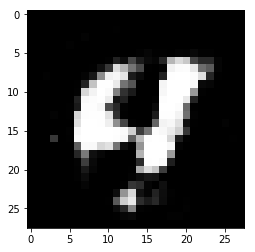

Loop: 49100, Generator_loss: -0.017831, Discriminator_loss: 0.0079702
Loop: 49200, Generator_loss: -0.021462, Discriminator_loss: 0.0080802
Loop: 49300, Generator_loss: -0.025159, Discriminator_loss: 0.0079775
Loop: 49400, Generator_loss: -0.021554, Discriminator_loss: 0.0097282
Loop: 49500, Generator_loss: -0.019662, Discriminator_loss: 0.009171
Loop: 49600, Generator_loss: -0.012835, Discriminator_loss: 0.010805
Loop: 49700, Generator_loss: -0.032163, Discriminator_loss: 0.0050704
Loop: 49800, Generator_loss: -0.015644, Discriminator_loss: 0.0081214
Loop: 49900, Generator_loss: -0.015533, Discriminator_loss: 0.007569
Loop: 50000, Generator_loss: -0.022228, Discriminator_loss: 0.008569


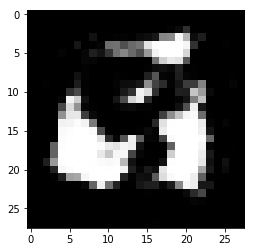

Loop: 50100, Generator_loss: -0.019796, Discriminator_loss: 0.013463
Loop: 50200, Generator_loss: -0.014357, Discriminator_loss: 0.0069617
Loop: 50300, Generator_loss: -0.013325, Discriminator_loss: 0.0067921
Loop: 50400, Generator_loss: -0.025133, Discriminator_loss: 0.0056652
Loop: 50500, Generator_loss: -0.0067001, Discriminator_loss: 0.006691
Loop: 50600, Generator_loss: -0.019035, Discriminator_loss: 0.005303
Loop: 50700, Generator_loss: -0.012893, Discriminator_loss: 0.0087911
Loop: 50800, Generator_loss: 0.0031874, Discriminator_loss: 0.0038811
Loop: 50900, Generator_loss: 0.0023959, Discriminator_loss: 0.0079864
Loop: 51000, Generator_loss: -0.021478, Discriminator_loss: 0.00949


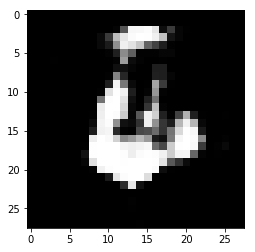

Loop: 51100, Generator_loss: -0.011121, Discriminator_loss: 0.0090179
Loop: 51200, Generator_loss: -0.0064468, Discriminator_loss: 0.0060861
Loop: 51300, Generator_loss: -0.019582, Discriminator_loss: 0.0079454
Loop: 51400, Generator_loss: -0.023866, Discriminator_loss: 0.011535
Loop: 51500, Generator_loss: -0.014909, Discriminator_loss: 0.0066841
Loop: 51600, Generator_loss: -0.03204, Discriminator_loss: 0.011526
Loop: 51700, Generator_loss: -0.014401, Discriminator_loss: 0.0049724
Loop: 51800, Generator_loss: 0.0061419, Discriminator_loss: 0.0078109
Loop: 51900, Generator_loss: -0.016242, Discriminator_loss: 0.0081709
Loop: 52000, Generator_loss: -0.0089796, Discriminator_loss: 0.0079835


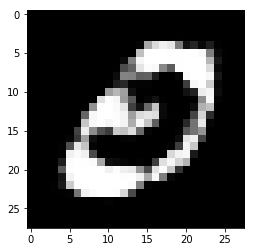

Loop: 52100, Generator_loss: -0.025612, Discriminator_loss: 0.0073723
Loop: 52200, Generator_loss: -0.033815, Discriminator_loss: 0.010602
Loop: 52300, Generator_loss: -0.021727, Discriminator_loss: 0.010849
Loop: 52400, Generator_loss: -0.035305, Discriminator_loss: 0.0086676
Loop: 52500, Generator_loss: -0.020515, Discriminator_loss: 0.0074587
Loop: 52600, Generator_loss: -0.0084713, Discriminator_loss: 0.0065127
Loop: 52700, Generator_loss: -0.026504, Discriminator_loss: 0.0084889
Loop: 52800, Generator_loss: -0.014997, Discriminator_loss: 0.0079232
Loop: 52900, Generator_loss: -0.010567, Discriminator_loss: 0.0080805
Loop: 53000, Generator_loss: -0.012975, Discriminator_loss: 0.0070548


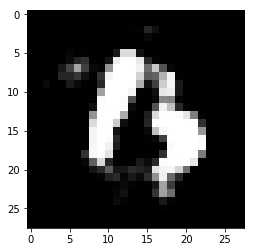

Loop: 53100, Generator_loss: -0.014316, Discriminator_loss: 0.0061719
Loop: 53200, Generator_loss: -0.021234, Discriminator_loss: 0.008484
Loop: 53300, Generator_loss: -0.013999, Discriminator_loss: 0.0084408
Loop: 53400, Generator_loss: -0.019811, Discriminator_loss: 0.0057566
Loop: 53500, Generator_loss: -0.0071584, Discriminator_loss: 0.0061851
Loop: 53600, Generator_loss: -0.013399, Discriminator_loss: 0.010815
Loop: 53700, Generator_loss: -0.0096117, Discriminator_loss: 0.0059059
Loop: 53800, Generator_loss: -0.017611, Discriminator_loss: 0.0069826
Loop: 53900, Generator_loss: -0.01535, Discriminator_loss: 0.0081521
Loop: 54000, Generator_loss: -0.021314, Discriminator_loss: 0.010442


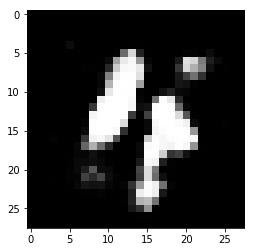

Loop: 54100, Generator_loss: 0.0014929, Discriminator_loss: 0.004009
Loop: 54200, Generator_loss: -0.02, Discriminator_loss: 0.01044
Loop: 54300, Generator_loss: -0.019734, Discriminator_loss: 0.0041416
Loop: 54400, Generator_loss: -0.020721, Discriminator_loss: 0.0075622
Loop: 54500, Generator_loss: -0.016113, Discriminator_loss: 0.0074351
Loop: 54600, Generator_loss: -0.0012722, Discriminator_loss: 0.010386
Loop: 54700, Generator_loss: -0.0095923, Discriminator_loss: 0.010581
Loop: 54800, Generator_loss: -0.0059681, Discriminator_loss: 0.0061976
Loop: 54900, Generator_loss: -0.011479, Discriminator_loss: 0.0095121
Loop: 55000, Generator_loss: -0.021007, Discriminator_loss: 0.0055403


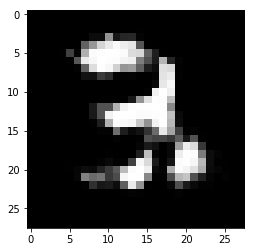

Loop: 55100, Generator_loss: -0.022182, Discriminator_loss: 0.0078725
Loop: 55200, Generator_loss: -0.0021928, Discriminator_loss: 0.0032295
Loop: 55300, Generator_loss: -0.025024, Discriminator_loss: 0.008904
Loop: 55400, Generator_loss: -0.012377, Discriminator_loss: 0.0069619
Loop: 55500, Generator_loss: -0.013517, Discriminator_loss: 0.0079142
Loop: 55600, Generator_loss: -0.013607, Discriminator_loss: 0.0044418
Loop: 55700, Generator_loss: -0.012054, Discriminator_loss: 0.0098218
Loop: 55800, Generator_loss: -0.018904, Discriminator_loss: 0.0070344
Loop: 55900, Generator_loss: -0.021562, Discriminator_loss: 0.0071567
Loop: 56000, Generator_loss: -0.019507, Discriminator_loss: 0.0086711


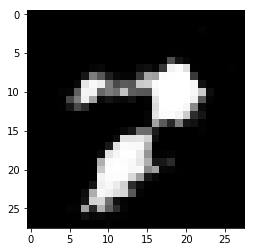

Loop: 56100, Generator_loss: -0.021722, Discriminator_loss: 0.0085542
Loop: 56200, Generator_loss: -0.019807, Discriminator_loss: 0.0086553
Loop: 56300, Generator_loss: -0.013049, Discriminator_loss: 0.011186
Loop: 56400, Generator_loss: -0.0054237, Discriminator_loss: 0.01052
Loop: 56500, Generator_loss: -0.01397, Discriminator_loss: 0.010858
Loop: 56600, Generator_loss: -0.011829, Discriminator_loss: 0.0090026
Loop: 56700, Generator_loss: -0.018954, Discriminator_loss: 0.0078439
Loop: 56800, Generator_loss: -0.029898, Discriminator_loss: 0.0083265
Loop: 56900, Generator_loss: -0.014193, Discriminator_loss: 0.0087111
Loop: 57000, Generator_loss: -0.0098747, Discriminator_loss: 0.0077462


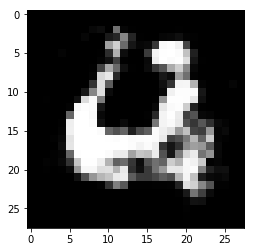

Loop: 57100, Generator_loss: -0.022947, Discriminator_loss: 0.0092183
Loop: 57200, Generator_loss: -0.028398, Discriminator_loss: 0.005314
Loop: 57300, Generator_loss: -0.018203, Discriminator_loss: 0.0087931
Loop: 57400, Generator_loss: -0.0038804, Discriminator_loss: 0.0027591
Loop: 57500, Generator_loss: -0.025354, Discriminator_loss: 0.0068179
Loop: 57600, Generator_loss: -0.023975, Discriminator_loss: 0.0074803
Loop: 57700, Generator_loss: -0.027512, Discriminator_loss: 0.011983
Loop: 57800, Generator_loss: -0.0083718, Discriminator_loss: 0.0083671
Loop: 57900, Generator_loss: -0.03035, Discriminator_loss: 0.0054747
Loop: 58000, Generator_loss: -0.012426, Discriminator_loss: 0.0075359


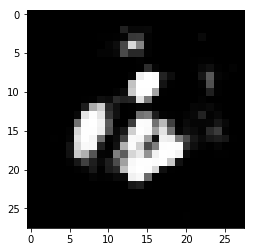

Loop: 58100, Generator_loss: -0.028967, Discriminator_loss: 0.0042269
Loop: 58200, Generator_loss: -0.025674, Discriminator_loss: 0.0057406
Loop: 58300, Generator_loss: -0.013737, Discriminator_loss: 0.0073933
Loop: 58400, Generator_loss: -0.0099554, Discriminator_loss: 0.0082318
Loop: 58500, Generator_loss: -0.031382, Discriminator_loss: 0.0066365
Loop: 58600, Generator_loss: -0.0042321, Discriminator_loss: 0.0076305
Loop: 58700, Generator_loss: -0.040447, Discriminator_loss: 0.012897
Loop: 58800, Generator_loss: -0.018896, Discriminator_loss: 0.00386
Loop: 58900, Generator_loss: -0.014554, Discriminator_loss: 0.0090824
Loop: 59000, Generator_loss: -0.011467, Discriminator_loss: 0.0037062


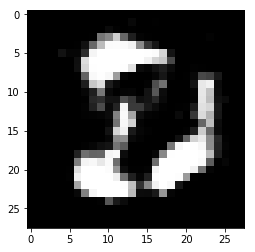

Loop: 59100, Generator_loss: -0.027799, Discriminator_loss: 0.00070287
Loop: 59200, Generator_loss: -0.012164, Discriminator_loss: 0.0057873
Loop: 59300, Generator_loss: -0.0025735, Discriminator_loss: 0.0084959
Loop: 59400, Generator_loss: -0.011823, Discriminator_loss: 0.006312
Loop: 59500, Generator_loss: -0.024353, Discriminator_loss: 0.0067186
Loop: 59600, Generator_loss: -0.015268, Discriminator_loss: 0.0076888
Loop: 59700, Generator_loss: -0.016445, Discriminator_loss: 0.0061415
Loop: 59800, Generator_loss: -0.012511, Discriminator_loss: 0.0054634
Loop: 59900, Generator_loss: -0.010779, Discriminator_loss: 0.0052458
Loop: 60000, Generator_loss: -0.013573, Discriminator_loss: 0.0061056


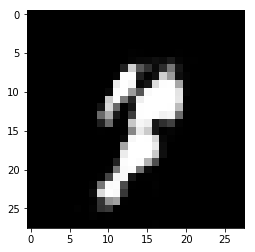

Loop: 60100, Generator_loss: -0.011772, Discriminator_loss: 0.012999
Loop: 60200, Generator_loss: -0.018779, Discriminator_loss: 0.0073013
Loop: 60300, Generator_loss: -0.022019, Discriminator_loss: 0.0076541
Loop: 60400, Generator_loss: -0.019264, Discriminator_loss: 0.0050435
Loop: 60500, Generator_loss: -0.011919, Discriminator_loss: 0.01147
Loop: 60600, Generator_loss: -0.027419, Discriminator_loss: 0.0060962
Loop: 60700, Generator_loss: -0.015047, Discriminator_loss: 0.0076347
Loop: 60800, Generator_loss: -0.015849, Discriminator_loss: 0.0077835
Loop: 60900, Generator_loss: -0.010676, Discriminator_loss: 0.0090725
Loop: 61000, Generator_loss: -0.00031831, Discriminator_loss: 0.010666


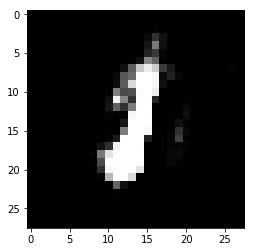

Loop: 61100, Generator_loss: -0.010823, Discriminator_loss: 0.006976
Loop: 61200, Generator_loss: 0.00030405, Discriminator_loss: 0.0052897
Loop: 61300, Generator_loss: -0.010401, Discriminator_loss: 0.010685
Loop: 61400, Generator_loss: -0.0096033, Discriminator_loss: 0.0030617
Loop: 61500, Generator_loss: 0.0001074, Discriminator_loss: 0.011251
Loop: 61600, Generator_loss: -0.015246, Discriminator_loss: 0.0053364
Loop: 61700, Generator_loss: -0.014374, Discriminator_loss: 0.0089096
Loop: 61800, Generator_loss: -0.021203, Discriminator_loss: 0.0078753
Loop: 61900, Generator_loss: -0.015586, Discriminator_loss: 0.010692
Loop: 62000, Generator_loss: -0.0052267, Discriminator_loss: 0.011414


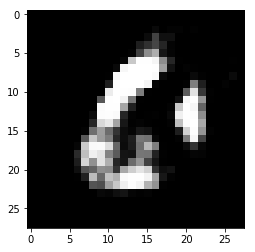

Loop: 62100, Generator_loss: -0.031721, Discriminator_loss: 0.013592
Loop: 62200, Generator_loss: 0.015182, Discriminator_loss: 0.0063724
Loop: 62300, Generator_loss: -0.026139, Discriminator_loss: 0.010025
Loop: 62400, Generator_loss: -0.018736, Discriminator_loss: 0.0084168
Loop: 62500, Generator_loss: -0.022542, Discriminator_loss: 0.012826
Loop: 62600, Generator_loss: -0.013213, Discriminator_loss: 0.0084595
Loop: 62700, Generator_loss: -0.02175, Discriminator_loss: 0.0089025
Loop: 62800, Generator_loss: -0.019255, Discriminator_loss: 0.008775
Loop: 62900, Generator_loss: -0.0018221, Discriminator_loss: 0.0074136
Loop: 63000, Generator_loss: 0.0055529, Discriminator_loss: 0.011011


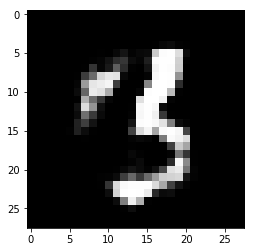

Loop: 63100, Generator_loss: -0.001914, Discriminator_loss: 0.0058492
Loop: 63200, Generator_loss: 0.0074292, Discriminator_loss: 0.011431
Loop: 63300, Generator_loss: -0.015249, Discriminator_loss: 0.0048824
Loop: 63400, Generator_loss: -0.014401, Discriminator_loss: 0.0074358
Loop: 63500, Generator_loss: -0.0025783, Discriminator_loss: 0.0035223
Loop: 63600, Generator_loss: -0.012735, Discriminator_loss: 0.0086071
Loop: 63700, Generator_loss: -0.0059774, Discriminator_loss: 0.0034725
Loop: 63800, Generator_loss: -0.012559, Discriminator_loss: 0.010276
Loop: 63900, Generator_loss: -0.022819, Discriminator_loss: 0.0082894
Loop: 64000, Generator_loss: -0.011932, Discriminator_loss: 0.0055135


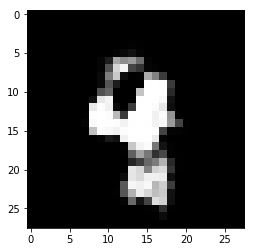

Loop: 64100, Generator_loss: -0.033758, Discriminator_loss: 0.0067611
Loop: 64200, Generator_loss: -0.01791, Discriminator_loss: 0.0044406
Loop: 64300, Generator_loss: 0.0091411, Discriminator_loss: 0.0041795
Loop: 64400, Generator_loss: -0.017332, Discriminator_loss: 0.0082216
Loop: 64500, Generator_loss: -0.017318, Discriminator_loss: 0.0053461
Loop: 64600, Generator_loss: 0.022145, Discriminator_loss: 0.0030694
Loop: 64700, Generator_loss: -0.03432, Discriminator_loss: 0.011404
Loop: 64800, Generator_loss: -0.02182, Discriminator_loss: 0.0074103
Loop: 64900, Generator_loss: -0.019957, Discriminator_loss: 0.0070201
Loop: 65000, Generator_loss: -0.02087, Discriminator_loss: 0.0073707


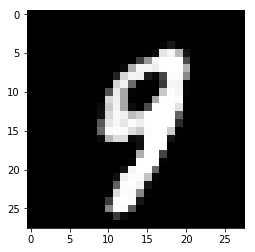

Loop: 65100, Generator_loss: -0.012326, Discriminator_loss: 0.0078415
Loop: 65200, Generator_loss: 0.0081265, Discriminator_loss: 0.011201
Loop: 65300, Generator_loss: -0.014677, Discriminator_loss: 0.0074751
Loop: 65400, Generator_loss: -0.0043658, Discriminator_loss: 0.0046792
Loop: 65500, Generator_loss: 0.0062804, Discriminator_loss: 0.0084643
Loop: 65600, Generator_loss: -0.018412, Discriminator_loss: 0.0072418
Loop: 65700, Generator_loss: -0.020877, Discriminator_loss: 0.0068547
Loop: 65800, Generator_loss: -0.016766, Discriminator_loss: 0.005244
Loop: 65900, Generator_loss: -0.010458, Discriminator_loss: 0.0055093
Loop: 66000, Generator_loss: -0.022938, Discriminator_loss: 0.007629


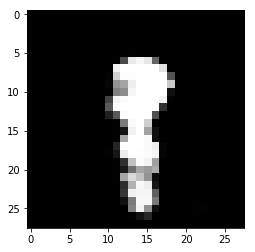

Loop: 66100, Generator_loss: -0.0034668, Discriminator_loss: 0.0091689
Loop: 66200, Generator_loss: -0.0021762, Discriminator_loss: 0.0058715
Loop: 66300, Generator_loss: -0.024983, Discriminator_loss: 0.0040328
Loop: 66400, Generator_loss: -4.2499e-05, Discriminator_loss: 0.0064189
Loop: 66500, Generator_loss: -0.028003, Discriminator_loss: 0.0092917
Loop: 66600, Generator_loss: 0.0068029, Discriminator_loss: 0.0012486
Loop: 66700, Generator_loss: -0.0021491, Discriminator_loss: 0.0092574
Loop: 66800, Generator_loss: -0.020787, Discriminator_loss: 0.0049422
Loop: 66900, Generator_loss: -0.039036, Discriminator_loss: 0.0068247
Loop: 67000, Generator_loss: -0.013032, Discriminator_loss: 0.0072468


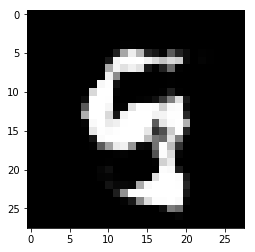

Loop: 67100, Generator_loss: -5.234e-05, Discriminator_loss: 0.0048989
Loop: 67200, Generator_loss: -0.013951, Discriminator_loss: 0.0095948
Loop: 67300, Generator_loss: -0.031571, Discriminator_loss: 0.0094098
Loop: 67400, Generator_loss: -0.0026038, Discriminator_loss: 0.013061
Loop: 67500, Generator_loss: -0.0048318, Discriminator_loss: 0.010506
Loop: 67600, Generator_loss: -0.0078215, Discriminator_loss: 0.0033217
Loop: 67700, Generator_loss: -0.016393, Discriminator_loss: 0.0069249
Loop: 67800, Generator_loss: -0.015103, Discriminator_loss: 0.0067734
Loop: 67900, Generator_loss: -0.025653, Discriminator_loss: 0.0029809
Loop: 68000, Generator_loss: -0.012217, Discriminator_loss: 0.0058553


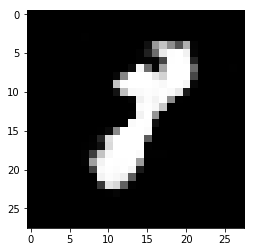

Loop: 68100, Generator_loss: 0.0014456, Discriminator_loss: 0.0081824
Loop: 68200, Generator_loss: -0.031225, Discriminator_loss: 0.008416
Loop: 68300, Generator_loss: -0.011471, Discriminator_loss: 0.0076579
Loop: 68400, Generator_loss: -0.027383, Discriminator_loss: 0.014316
Loop: 68500, Generator_loss: 0.0024658, Discriminator_loss: 0.012429
Loop: 68600, Generator_loss: -0.039309, Discriminator_loss: 0.0090623
Loop: 68700, Generator_loss: -0.014523, Discriminator_loss: 0.0065409
Loop: 68800, Generator_loss: -0.021825, Discriminator_loss: 0.0077727
Loop: 68900, Generator_loss: -0.01492, Discriminator_loss: 0.0059191
Loop: 69000, Generator_loss: 0.00069706, Discriminator_loss: 0.0071988


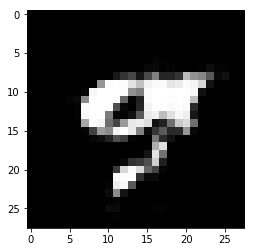

Loop: 69100, Generator_loss: 0.0012479, Discriminator_loss: 0.015237
Loop: 69200, Generator_loss: -0.012558, Discriminator_loss: 0.0086618
Loop: 69300, Generator_loss: -0.023932, Discriminator_loss: 0.0069372
Loop: 69400, Generator_loss: -0.0040412, Discriminator_loss: 0.0057928
Loop: 69500, Generator_loss: -0.03285, Discriminator_loss: 0.0086532
Loop: 69600, Generator_loss: -0.017659, Discriminator_loss: 0.0061822
Loop: 69700, Generator_loss: -0.00044936, Discriminator_loss: 0.0074257
Loop: 69800, Generator_loss: -0.019708, Discriminator_loss: 0.0045096
Loop: 69900, Generator_loss: 0.0036175, Discriminator_loss: 0.009636
Loop: 70000, Generator_loss: -0.02251, Discriminator_loss: 0.0084765


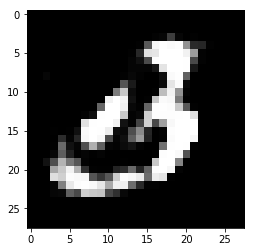

Loop: 70100, Generator_loss: -0.0068098, Discriminator_loss: 0.0073626
Loop: 70200, Generator_loss: -0.012277, Discriminator_loss: 0.0081995
Loop: 70300, Generator_loss: -0.015959, Discriminator_loss: 0.0082413
Loop: 70400, Generator_loss: -0.0051105, Discriminator_loss: 0.0038559
Loop: 70500, Generator_loss: -0.016797, Discriminator_loss: 0.006283
Loop: 70600, Generator_loss: -0.02205, Discriminator_loss: 0.0093914
Loop: 70700, Generator_loss: -0.025094, Discriminator_loss: 0.011087
Loop: 70800, Generator_loss: 0.0013349, Discriminator_loss: 0.0072461
Loop: 70900, Generator_loss: -0.030024, Discriminator_loss: 0.0083708
Loop: 71000, Generator_loss: -0.0085087, Discriminator_loss: 0.0069453


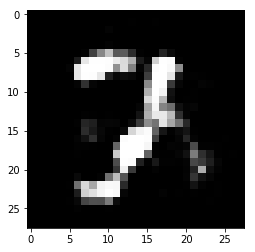

Loop: 71100, Generator_loss: -0.02407, Discriminator_loss: 0.0064437
Loop: 71200, Generator_loss: -0.022519, Discriminator_loss: 0.0082843
Loop: 71300, Generator_loss: -0.0026149, Discriminator_loss: 0.0067334
Loop: 71400, Generator_loss: -0.0086438, Discriminator_loss: 0.0053233
Loop: 71500, Generator_loss: -0.018957, Discriminator_loss: 0.007844
Loop: 71600, Generator_loss: -0.019301, Discriminator_loss: 0.0076545
Loop: 71700, Generator_loss: -0.0081153, Discriminator_loss: 0.0053709
Loop: 71800, Generator_loss: -0.0084947, Discriminator_loss: 0.0073501
Loop: 71900, Generator_loss: -0.016573, Discriminator_loss: 0.0030378
Loop: 72000, Generator_loss: -0.022325, Discriminator_loss: 0.0075046


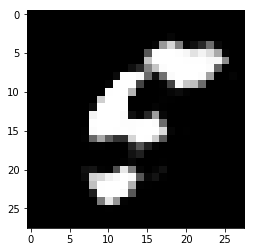

Loop: 72100, Generator_loss: -0.021369, Discriminator_loss: 0.0055814
Loop: 72200, Generator_loss: -0.0026166, Discriminator_loss: 0.0055073
Loop: 72300, Generator_loss: -0.014495, Discriminator_loss: 0.0075673
Loop: 72400, Generator_loss: -0.015515, Discriminator_loss: 0.0085787
Loop: 72500, Generator_loss: -0.016713, Discriminator_loss: 0.0059935
Loop: 72600, Generator_loss: -0.015644, Discriminator_loss: 0.010141
Loop: 72700, Generator_loss: -0.02736, Discriminator_loss: 0.0052081
Loop: 72800, Generator_loss: -0.020112, Discriminator_loss: 0.0090989
Loop: 72900, Generator_loss: -0.0085681, Discriminator_loss: 0.0097144
Loop: 73000, Generator_loss: -0.016014, Discriminator_loss: 0.0068964


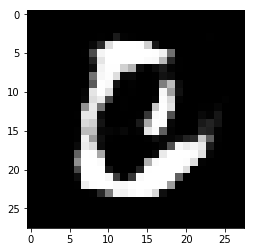

Loop: 73100, Generator_loss: -0.029181, Discriminator_loss: 0.0091194
Loop: 73200, Generator_loss: -0.0093938, Discriminator_loss: 0.008439
Loop: 73300, Generator_loss: -0.019591, Discriminator_loss: 0.003529
Loop: 73400, Generator_loss: -0.023729, Discriminator_loss: 0.0096261
Loop: 73500, Generator_loss: -0.01775, Discriminator_loss: 0.0087094
Loop: 73600, Generator_loss: -0.024665, Discriminator_loss: 0.0077744
Loop: 73700, Generator_loss: -0.0036841, Discriminator_loss: 0.0079746
Loop: 73800, Generator_loss: -0.011413, Discriminator_loss: 0.005958
Loop: 73900, Generator_loss: -0.024207, Discriminator_loss: 0.0031976
Loop: 74000, Generator_loss: -0.01469, Discriminator_loss: 0.0062185


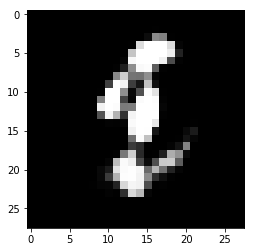

Loop: 74100, Generator_loss: -0.01935, Discriminator_loss: 0.013154
Loop: 74200, Generator_loss: -0.026163, Discriminator_loss: 0.0058419
Loop: 74300, Generator_loss: -0.027019, Discriminator_loss: 0.0048208
Loop: 74400, Generator_loss: -0.011268, Discriminator_loss: 0.0056137
Loop: 74500, Generator_loss: -0.0016906, Discriminator_loss: 0.008919
Loop: 74600, Generator_loss: -0.0024156, Discriminator_loss: 0.0040632
Loop: 74700, Generator_loss: -0.037845, Discriminator_loss: 0.00099171
Loop: 74800, Generator_loss: -0.0059185, Discriminator_loss: 0.0084576
Loop: 74900, Generator_loss: -0.016579, Discriminator_loss: 0.0026922
Loop: 75000, Generator_loss: -0.00085594, Discriminator_loss: 0.0084953


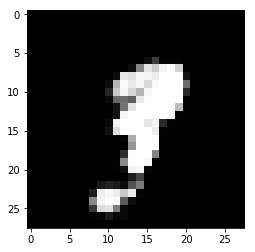

Loop: 75100, Generator_loss: -0.005663, Discriminator_loss: 0.0064605
Loop: 75200, Generator_loss: -0.018174, Discriminator_loss: 0.0059215
Loop: 75300, Generator_loss: -0.0091916, Discriminator_loss: 0.0065237
Loop: 75400, Generator_loss: -0.020051, Discriminator_loss: 0.0056035
Loop: 75500, Generator_loss: -0.0088937, Discriminator_loss: 0.0056371
Loop: 75600, Generator_loss: -0.02081, Discriminator_loss: 0.0058783
Loop: 75700, Generator_loss: -0.012489, Discriminator_loss: 0.005228
Loop: 75800, Generator_loss: -0.007488, Discriminator_loss: 0.0078534
Loop: 75900, Generator_loss: 0.00026307, Discriminator_loss: 0.0074386
Loop: 76000, Generator_loss: -0.006661, Discriminator_loss: 0.0071242


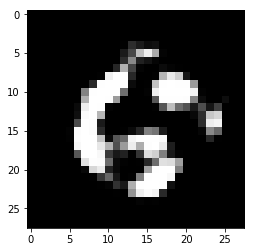

Loop: 76100, Generator_loss: -0.0029717, Discriminator_loss: 0.0053618
Loop: 76200, Generator_loss: -0.016264, Discriminator_loss: 0.0075575
Loop: 76300, Generator_loss: -0.016986, Discriminator_loss: 0.00043627
Loop: 76400, Generator_loss: -0.027182, Discriminator_loss: 0.0081847
Loop: 76500, Generator_loss: -0.021079, Discriminator_loss: 0.0070461
Loop: 76600, Generator_loss: -0.0056741, Discriminator_loss: 0.0047379
Loop: 76700, Generator_loss: -0.012909, Discriminator_loss: 0.0078186
Loop: 76800, Generator_loss: -0.020034, Discriminator_loss: 0.0030342
Loop: 76900, Generator_loss: -0.0078645, Discriminator_loss: 0.0030052
Loop: 77000, Generator_loss: -0.005847, Discriminator_loss: 0.0076286


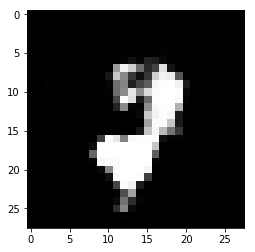

Loop: 77100, Generator_loss: -0.024353, Discriminator_loss: 0.0065188
Loop: 77200, Generator_loss: -0.02503, Discriminator_loss: 0.0085822
Loop: 77300, Generator_loss: -0.0357, Discriminator_loss: 0.009463
Loop: 77400, Generator_loss: -0.025787, Discriminator_loss: 0.0096925
Loop: 77500, Generator_loss: -0.044971, Discriminator_loss: 0.0095095
Loop: 77600, Generator_loss: -0.017304, Discriminator_loss: 0.0065448
Loop: 77700, Generator_loss: -0.01748, Discriminator_loss: 0.0074363
Loop: 77800, Generator_loss: -0.016083, Discriminator_loss: 0.0060633
Loop: 77900, Generator_loss: -0.035587, Discriminator_loss: 0.013469
Loop: 78000, Generator_loss: -0.003207, Discriminator_loss: 0.0099801


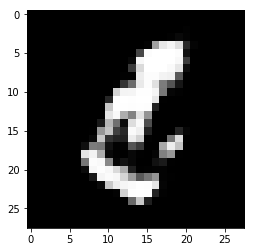

Loop: 78100, Generator_loss: -0.017878, Discriminator_loss: 0.0074022
Loop: 78200, Generator_loss: 0.0051955, Discriminator_loss: 0.00023678
Loop: 78300, Generator_loss: -0.014386, Discriminator_loss: 0.0094973
Loop: 78400, Generator_loss: -0.0028375, Discriminator_loss: 0.0055026
Loop: 78500, Generator_loss: -0.032444, Discriminator_loss: 0.0072073
Loop: 78600, Generator_loss: 0.0020108, Discriminator_loss: 0.0061512
Loop: 78700, Generator_loss: 0.0043978, Discriminator_loss: 0.0099527
Loop: 78800, Generator_loss: -0.0071918, Discriminator_loss: 0.0023836
Loop: 78900, Generator_loss: -0.012323, Discriminator_loss: 0.0026974
Loop: 79000, Generator_loss: -0.0086979, Discriminator_loss: 0.0057116


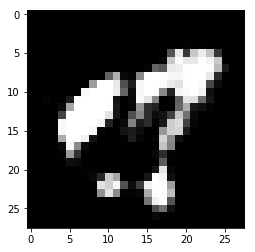

Loop: 79100, Generator_loss: -0.00050203, Discriminator_loss: 0.0080467
Loop: 79200, Generator_loss: -0.013161, Discriminator_loss: 0.0084554
Loop: 79300, Generator_loss: -0.0054485, Discriminator_loss: 0.0065842
Loop: 79400, Generator_loss: -0.0093469, Discriminator_loss: 0.0099832
Loop: 79500, Generator_loss: -0.023883, Discriminator_loss: 0.0048567
Loop: 79600, Generator_loss: -0.012951, Discriminator_loss: 0.0039208
Loop: 79700, Generator_loss: -0.027413, Discriminator_loss: 0.0044776
Loop: 79800, Generator_loss: -0.027466, Discriminator_loss: 0.010032
Loop: 79900, Generator_loss: -0.025791, Discriminator_loss: 0.0050172
Loop: 80000, Generator_loss: -0.0098275, Discriminator_loss: 0.0053414


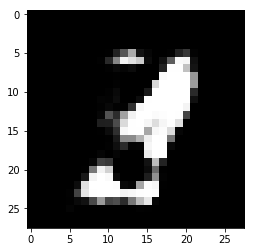

Loop: 80100, Generator_loss: -0.013992, Discriminator_loss: 0.0073536
Loop: 80200, Generator_loss: -0.020747, Discriminator_loss: 0.004998
Loop: 80300, Generator_loss: -0.015298, Discriminator_loss: 0.0058691
Loop: 80400, Generator_loss: -0.013788, Discriminator_loss: 0.0051847
Loop: 80500, Generator_loss: -0.021815, Discriminator_loss: 0.0071619
Loop: 80600, Generator_loss: -0.0026578, Discriminator_loss: 0.0053837
Loop: 80700, Generator_loss: -0.0076988, Discriminator_loss: 0.0042823
Loop: 80800, Generator_loss: -0.0044432, Discriminator_loss: 0.0091816
Loop: 80900, Generator_loss: -0.0019047, Discriminator_loss: 0.0027011
Loop: 81000, Generator_loss: -0.028325, Discriminator_loss: 0.009399


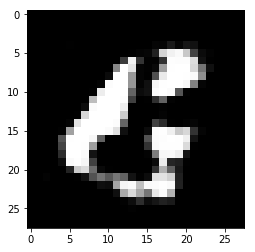

Loop: 81100, Generator_loss: -0.015359, Discriminator_loss: 0.005581
Loop: 81200, Generator_loss: -0.026242, Discriminator_loss: 0.0089361
Loop: 81300, Generator_loss: -0.024028, Discriminator_loss: 0.0058128
Loop: 81400, Generator_loss: -0.015106, Discriminator_loss: 0.0072414
Loop: 81500, Generator_loss: -0.0083838, Discriminator_loss: 0.0046939
Loop: 81600, Generator_loss: -0.010769, Discriminator_loss: 0.0043998
Loop: 81700, Generator_loss: -0.011442, Discriminator_loss: 0.0044463
Loop: 81800, Generator_loss: -0.018324, Discriminator_loss: 0.0041532
Loop: 81900, Generator_loss: -0.049675, Discriminator_loss: 0.00051606
Loop: 82000, Generator_loss: -0.0028912, Discriminator_loss: 0.0086446


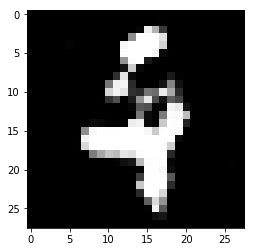

Loop: 82100, Generator_loss: 0.0027259, Discriminator_loss: 0.0086497
Loop: 82200, Generator_loss: -0.012301, Discriminator_loss: 0.0025883
Loop: 82300, Generator_loss: -0.011199, Discriminator_loss: 0.0083277
Loop: 82400, Generator_loss: -0.020943, Discriminator_loss: 0.0065145
Loop: 82500, Generator_loss: -0.032747, Discriminator_loss: 0.009623
Loop: 82600, Generator_loss: 0.008311, Discriminator_loss: 0.010312
Loop: 82700, Generator_loss: -0.016395, Discriminator_loss: 0.0062002
Loop: 82800, Generator_loss: 0.0023887, Discriminator_loss: 0.0067962
Loop: 82900, Generator_loss: -0.020744, Discriminator_loss: 0.0054745
Loop: 83000, Generator_loss: -0.003147, Discriminator_loss: 0.005093


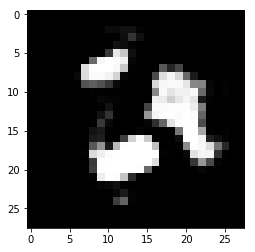

Loop: 83100, Generator_loss: -0.025953, Discriminator_loss: 0.004354
Loop: 83200, Generator_loss: -0.021816, Discriminator_loss: 0.0075068
Loop: 83300, Generator_loss: -0.012329, Discriminator_loss: 0.001252
Loop: 83400, Generator_loss: -0.019165, Discriminator_loss: 0.010405
Loop: 83500, Generator_loss: 0.0049358, Discriminator_loss: 0.0068092
Loop: 83600, Generator_loss: -0.028838, Discriminator_loss: 0.0077682
Loop: 83700, Generator_loss: -0.021813, Discriminator_loss: 0.0015675
Loop: 83800, Generator_loss: 0.01884, Discriminator_loss: 0.0095527
Loop: 83900, Generator_loss: -0.025114, Discriminator_loss: 0.0095575
Loop: 84000, Generator_loss: -0.015533, Discriminator_loss: 0.0086938


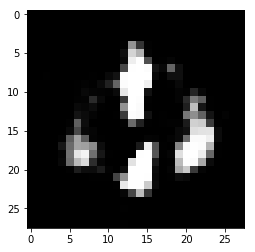

Loop: 84100, Generator_loss: -0.0056233, Discriminator_loss: 0.0054844
Loop: 84200, Generator_loss: -0.015144, Discriminator_loss: 0.01105
Loop: 84300, Generator_loss: -0.022619, Discriminator_loss: 0.0079693
Loop: 84400, Generator_loss: -0.025209, Discriminator_loss: 0.0067828
Loop: 84500, Generator_loss: -0.007648, Discriminator_loss: 0.0053763
Loop: 84600, Generator_loss: -0.028742, Discriminator_loss: 0.0021802
Loop: 84700, Generator_loss: -0.0018082, Discriminator_loss: 0.0050619
Loop: 84800, Generator_loss: -0.0032062, Discriminator_loss: 0.0093129
Loop: 84900, Generator_loss: -0.027113, Discriminator_loss: 0.0056504
Loop: 85000, Generator_loss: -0.0094806, Discriminator_loss: 0.0044183


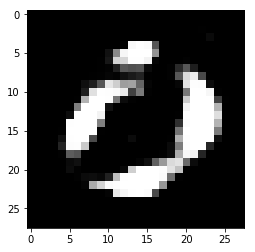

Loop: 85100, Generator_loss: -0.02487, Discriminator_loss: 0.0048646
Loop: 85200, Generator_loss: 0.017659, Discriminator_loss: 0.0095872
Loop: 85300, Generator_loss: -0.015175, Discriminator_loss: 0.0026655
Loop: 85400, Generator_loss: -0.0022817, Discriminator_loss: 0.0078406
Loop: 85500, Generator_loss: -0.015626, Discriminator_loss: 0.002143
Loop: 85600, Generator_loss: -0.028411, Discriminator_loss: 0.0044199
Loop: 85700, Generator_loss: -0.010235, Discriminator_loss: 0.008065
Loop: 85800, Generator_loss: -0.0010373, Discriminator_loss: 0.0045495
Loop: 85900, Generator_loss: -0.02322, Discriminator_loss: 0.0090248
Loop: 86000, Generator_loss: 0.0010122, Discriminator_loss: 0.012091


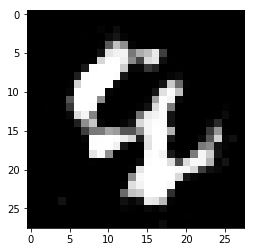

Loop: 86100, Generator_loss: -0.0094024, Discriminator_loss: 0.0085667
Loop: 86200, Generator_loss: -0.032829, Discriminator_loss: 0.0083007
Loop: 86300, Generator_loss: -0.00016069, Discriminator_loss: 0.0079294
Loop: 86400, Generator_loss: -0.020159, Discriminator_loss: 0.0044591
Loop: 86500, Generator_loss: -0.014314, Discriminator_loss: 0.0066166
Loop: 86600, Generator_loss: -0.019191, Discriminator_loss: 0.0032106
Loop: 86700, Generator_loss: -0.010148, Discriminator_loss: 0.0075357
Loop: 86800, Generator_loss: 0.015696, Discriminator_loss: 0.0083696
Loop: 86900, Generator_loss: 0.024406, Discriminator_loss: 0.0052026
Loop: 87000, Generator_loss: -0.034499, Discriminator_loss: 0.010644


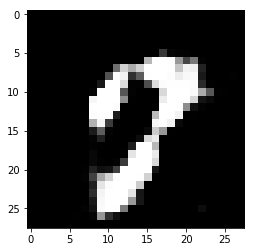

Loop: 87100, Generator_loss: -0.0082684, Discriminator_loss: 0.0086892
Loop: 87200, Generator_loss: -0.018144, Discriminator_loss: 0.0067429
Loop: 87300, Generator_loss: 0.010532, Discriminator_loss: 0.0037647
Loop: 87400, Generator_loss: -0.042728, Discriminator_loss: 0.0037441
Loop: 87500, Generator_loss: -0.018378, Discriminator_loss: 0.0072039
Loop: 87600, Generator_loss: 0.00041776, Discriminator_loss: 0.0035189
Loop: 87700, Generator_loss: -0.018785, Discriminator_loss: 0.0067537
Loop: 87800, Generator_loss: -0.00574, Discriminator_loss: 0.0047075
Loop: 87900, Generator_loss: -0.021899, Discriminator_loss: 0.0083589
Loop: 88000, Generator_loss: -0.037363, Discriminator_loss: 0.0064099


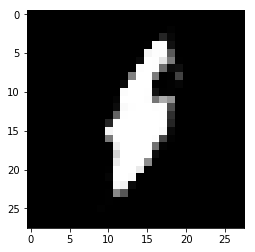

Loop: 88100, Generator_loss: -0.044189, Discriminator_loss: 0.0054085
Loop: 88200, Generator_loss: -0.00072931, Discriminator_loss: 0.0099013
Loop: 88300, Generator_loss: -0.0017674, Discriminator_loss: 0.0066506
Loop: 88400, Generator_loss: -0.016672, Discriminator_loss: 0.0062352
Loop: 88500, Generator_loss: -0.034994, Discriminator_loss: 0.0035369
Loop: 88600, Generator_loss: -0.0085173, Discriminator_loss: 0.010256
Loop: 88700, Generator_loss: -0.01642, Discriminator_loss: 0.0070637
Loop: 88800, Generator_loss: -0.020494, Discriminator_loss: 0.0036953
Loop: 88900, Generator_loss: -0.032378, Discriminator_loss: 0.010028
Loop: 89000, Generator_loss: -0.017108, Discriminator_loss: 0.0062732


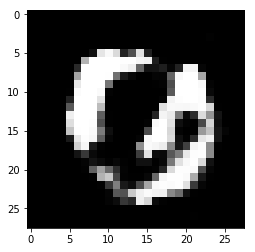

Loop: 89100, Generator_loss: -0.020279, Discriminator_loss: 0.0064607
Loop: 89200, Generator_loss: 0.028092, Discriminator_loss: 0.0058612
Loop: 89300, Generator_loss: -0.0066652, Discriminator_loss: 0.0055052
Loop: 89400, Generator_loss: -0.0074766, Discriminator_loss: 0.0040501
Loop: 89500, Generator_loss: -0.030698, Discriminator_loss: 0.0047578
Loop: 89600, Generator_loss: -0.015285, Discriminator_loss: 0.0074029
Loop: 89700, Generator_loss: -0.019077, Discriminator_loss: 0.0051357
Loop: 89800, Generator_loss: -0.021719, Discriminator_loss: 0.0072658
Loop: 89900, Generator_loss: -0.036152, Discriminator_loss: 0.010495
Loop: 90000, Generator_loss: -0.013601, Discriminator_loss: 0.0075524


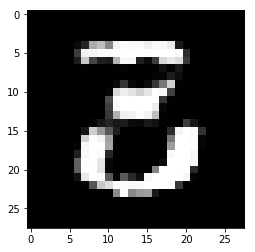

Loop: 90100, Generator_loss: -0.011353, Discriminator_loss: 0.005588
Loop: 90200, Generator_loss: -0.016104, Discriminator_loss: 0.0037054
Loop: 90300, Generator_loss: 0.0034601, Discriminator_loss: 0.0042811
Loop: 90400, Generator_loss: -0.011612, Discriminator_loss: 0.0067205
Loop: 90500, Generator_loss: -0.012987, Discriminator_loss: 0.0055716
Loop: 90600, Generator_loss: -0.018635, Discriminator_loss: 0.0069356
Loop: 90700, Generator_loss: -0.0060397, Discriminator_loss: 0.0059218
Loop: 90800, Generator_loss: -0.027674, Discriminator_loss: 0.0091302
Loop: 90900, Generator_loss: -0.0057485, Discriminator_loss: 0.0038815
Loop: 91000, Generator_loss: -0.019567, Discriminator_loss: 0.0095214


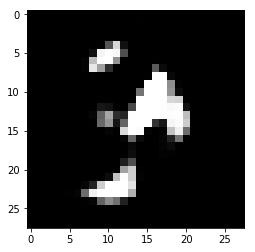

Loop: 91100, Generator_loss: -0.033972, Discriminator_loss: 0.0065762
Loop: 91200, Generator_loss: -0.02092, Discriminator_loss: 0.012928
Loop: 91300, Generator_loss: -0.005953, Discriminator_loss: 0.0056233
Loop: 91400, Generator_loss: -0.03394, Discriminator_loss: 0.0077299
Loop: 91500, Generator_loss: -0.02026, Discriminator_loss: 0.0040562
Loop: 91600, Generator_loss: -0.013992, Discriminator_loss: 0.010445
Loop: 91700, Generator_loss: 0.0082997, Discriminator_loss: 0.0093674
Loop: 91800, Generator_loss: 0.0039746, Discriminator_loss: 0.0086631
Loop: 91900, Generator_loss: -0.022289, Discriminator_loss: 0.0057454
Loop: 92000, Generator_loss: -0.022939, Discriminator_loss: 0.0040822


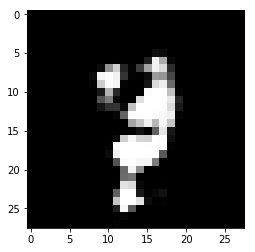

Loop: 92100, Generator_loss: -0.007378, Discriminator_loss: 0.0069521
Loop: 92200, Generator_loss: -0.037306, Discriminator_loss: 0.0026455
Loop: 92300, Generator_loss: -0.018888, Discriminator_loss: 0.0061914
Loop: 92400, Generator_loss: -0.014682, Discriminator_loss: 0.0031589
Loop: 92500, Generator_loss: -0.027905, Discriminator_loss: 0.0083721
Loop: 92600, Generator_loss: -0.031679, Discriminator_loss: 0.0069591
Loop: 92700, Generator_loss: -0.021866, Discriminator_loss: 0.0096131
Loop: 92800, Generator_loss: -0.028882, Discriminator_loss: 0.0063167
Loop: 92900, Generator_loss: -0.02984, Discriminator_loss: 0.0079546
Loop: 93000, Generator_loss: -0.0036178, Discriminator_loss: 0.0034459


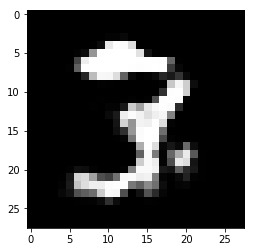

Loop: 93100, Generator_loss: -0.021406, Discriminator_loss: 0.0057536
Loop: 93200, Generator_loss: -0.024121, Discriminator_loss: 0.0059648
Loop: 93300, Generator_loss: -0.011653, Discriminator_loss: 0.0058407
Loop: 93400, Generator_loss: -0.020706, Discriminator_loss: 0.0035001
Loop: 93500, Generator_loss: 0.0050364, Discriminator_loss: 0.0077969
Loop: 93600, Generator_loss: 0.0093081, Discriminator_loss: 0.0075496
Loop: 93700, Generator_loss: -0.037442, Discriminator_loss: 0.0056955
Loop: 93800, Generator_loss: -0.0042765, Discriminator_loss: 0.0095258
Loop: 93900, Generator_loss: -0.034075, Discriminator_loss: 0.0043083
Loop: 94000, Generator_loss: -0.021338, Discriminator_loss: 0.0080947


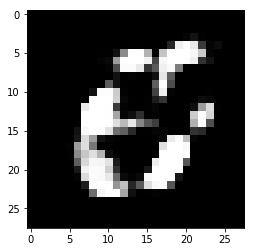

Loop: 94100, Generator_loss: -0.015993, Discriminator_loss: 0.0034108
Loop: 94200, Generator_loss: -0.019531, Discriminator_loss: 0.0050256
Loop: 94300, Generator_loss: -0.022407, Discriminator_loss: 0.0023419
Loop: 94400, Generator_loss: -0.00015841, Discriminator_loss: 0.011741
Loop: 94500, Generator_loss: -0.01014, Discriminator_loss: 0.0017626
Loop: 94600, Generator_loss: -0.018364, Discriminator_loss: 0.0075673
Loop: 94700, Generator_loss: -0.025826, Discriminator_loss: 0.0073081
Loop: 94800, Generator_loss: -0.047634, Discriminator_loss: 0.0011084
Loop: 94900, Generator_loss: 0.02653, Discriminator_loss: 0.01145
Loop: 95000, Generator_loss: -0.014228, Discriminator_loss: 0.0081577


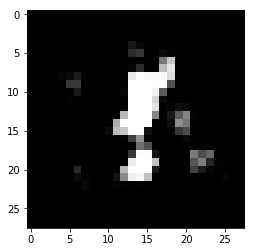

Loop: 95100, Generator_loss: -0.0054874, Discriminator_loss: 0.0041359
Loop: 95200, Generator_loss: -0.036982, Discriminator_loss: 0.0089594
Loop: 95300, Generator_loss: 0.00088984, Discriminator_loss: 0.0077163
Loop: 95400, Generator_loss: -0.057366, Discriminator_loss: 0.011838
Loop: 95500, Generator_loss: 0.0028533, Discriminator_loss: 0.0049301
Loop: 95600, Generator_loss: -0.0091261, Discriminator_loss: 0.0040673
Loop: 95700, Generator_loss: -3.3565e-05, Discriminator_loss: 0.0075404
Loop: 95800, Generator_loss: 0.026047, Discriminator_loss: 0.0090099
Loop: 95900, Generator_loss: -0.024504, Discriminator_loss: 0.0050236
Loop: 96000, Generator_loss: -0.026496, Discriminator_loss: 0.01164


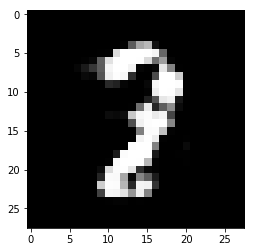

Loop: 96100, Generator_loss: -0.0021263, Discriminator_loss: 0.0035158
Loop: 96200, Generator_loss: -0.00041595, Discriminator_loss: 0.0022797
Loop: 96300, Generator_loss: -0.029974, Discriminator_loss: 0.0060207
Loop: 96400, Generator_loss: 0.017316, Discriminator_loss: 0.0054201
Loop: 96500, Generator_loss: -0.013097, Discriminator_loss: 0.0099126
Loop: 96600, Generator_loss: 0.008476, Discriminator_loss: 0.0065812
Loop: 96700, Generator_loss: -0.036061, Discriminator_loss: 0.0051883
Loop: 96800, Generator_loss: -0.024732, Discriminator_loss: 0.0055099
Loop: 96900, Generator_loss: -0.0093901, Discriminator_loss: 0.0016392
Loop: 97000, Generator_loss: 0.00086189, Discriminator_loss: 0.0042322


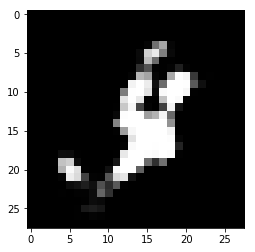

Loop: 97100, Generator_loss: 0.018214, Discriminator_loss: 0.0087475
Loop: 97200, Generator_loss: -0.008892, Discriminator_loss: 0.00063053
Loop: 97300, Generator_loss: -0.0088029, Discriminator_loss: 0.0053168
Loop: 97400, Generator_loss: -0.001755, Discriminator_loss: 0.0070177
Loop: 97500, Generator_loss: -0.041804, Discriminator_loss: 0.0062658
Loop: 97600, Generator_loss: -0.013632, Discriminator_loss: 0.01073
Loop: 97700, Generator_loss: 0.0028366, Discriminator_loss: 0.0070555
Loop: 97800, Generator_loss: 0.023898, Discriminator_loss: 0.0074697
Loop: 97900, Generator_loss: 0.00065712, Discriminator_loss: 0.011325
Loop: 98000, Generator_loss: 0.022308, Discriminator_loss: 0.004937


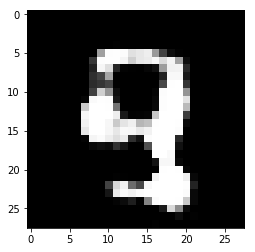

Loop: 98100, Generator_loss: -0.0087908, Discriminator_loss: 0.0081818
Loop: 98200, Generator_loss: 0.018242, Discriminator_loss: 0.00051362
Loop: 98300, Generator_loss: -0.024441, Discriminator_loss: 0.0057224
Loop: 98400, Generator_loss: -0.022197, Discriminator_loss: 0.0061139
Loop: 98500, Generator_loss: -0.030281, Discriminator_loss: 0.0065842
Loop: 98600, Generator_loss: -0.021407, Discriminator_loss: 0.0024503
Loop: 98700, Generator_loss: -0.0088326, Discriminator_loss: 0.0080701
Loop: 98800, Generator_loss: -0.014255, Discriminator_loss: 0.008443
Loop: 98900, Generator_loss: -0.017627, Discriminator_loss: 0.0065659
Loop: 99000, Generator_loss: -0.03304, Discriminator_loss: 0.012405


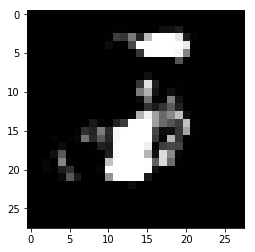

Loop: 99100, Generator_loss: -0.019919, Discriminator_loss: 0.0051707
Loop: 99200, Generator_loss: -0.0016059, Discriminator_loss: 0.0077929
Loop: 99300, Generator_loss: 0.0073122, Discriminator_loss: 0.0055437
Loop: 99400, Generator_loss: -0.056291, Discriminator_loss: 0.0097201
Loop: 99500, Generator_loss: -0.014315, Discriminator_loss: 0.0018982
Loop: 99600, Generator_loss: -0.036143, Discriminator_loss: 0.0060656
Loop: 99700, Generator_loss: -0.02486, Discriminator_loss: 0.0065718
Loop: 99800, Generator_loss: -0.023472, Discriminator_loss: 0.0091677
Loop: 99900, Generator_loss: -0.0024639, Discriminator_loss: 0.0086194
Loop: 100000, Generator_loss: -0.022968, Discriminator_loss: 0.0061417


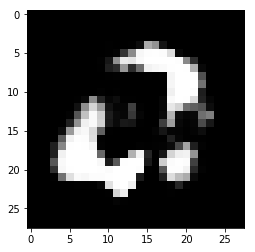

Loop: 100100, Generator_loss: -0.003784, Discriminator_loss: 0.0079873
Loop: 100200, Generator_loss: -0.016238, Discriminator_loss: 0.0068213
Loop: 100300, Generator_loss: -0.033021, Discriminator_loss: 0.00050763
Loop: 100400, Generator_loss: -0.024063, Discriminator_loss: 0.0023896
Loop: 100500, Generator_loss: -0.014452, Discriminator_loss: 0.00043111
Loop: 100600, Generator_loss: -0.019534, Discriminator_loss: 0.0041471
Loop: 100700, Generator_loss: -0.011233, Discriminator_loss: 0.0032891
Loop: 100800, Generator_loss: 0.0071628, Discriminator_loss: 0.0044821
Loop: 100900, Generator_loss: 0.029315, Discriminator_loss: 0.0087934
Loop: 101000, Generator_loss: -0.0053575, Discriminator_loss: 0.0050135


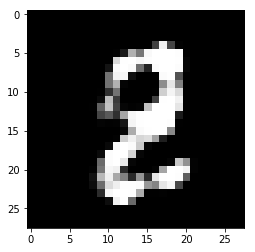

Loop: 101100, Generator_loss: -0.012579, Discriminator_loss: 0.011134
Loop: 101200, Generator_loss: 0.0026396, Discriminator_loss: 0.0060667
Loop: 101300, Generator_loss: -0.014486, Discriminator_loss: 0.0079669
Loop: 101400, Generator_loss: -0.037212, Discriminator_loss: 0.008216
Loop: 101500, Generator_loss: -0.013124, Discriminator_loss: 0.0078659
Loop: 101600, Generator_loss: -0.018633, Discriminator_loss: 0.0073457
Loop: 101700, Generator_loss: -0.017189, Discriminator_loss: 0.0075542
Loop: 101800, Generator_loss: 0.010226, Discriminator_loss: 0.0049971
Loop: 101900, Generator_loss: -0.01562, Discriminator_loss: 0.0052928
Loop: 102000, Generator_loss: -0.02859, Discriminator_loss: 0.0057378


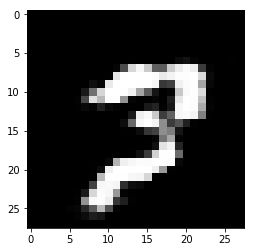

Loop: 102100, Generator_loss: 0.00048705, Discriminator_loss: 0.0075032
Loop: 102200, Generator_loss: -0.0054436, Discriminator_loss: 0.0059242
Loop: 102300, Generator_loss: -0.02995, Discriminator_loss: 0.011062
Loop: 102400, Generator_loss: 0.0025584, Discriminator_loss: 0.0077893
Loop: 102500, Generator_loss: -0.007222, Discriminator_loss: 0.0065096
Loop: 102600, Generator_loss: -0.0088292, Discriminator_loss: 0.0057538
Loop: 102700, Generator_loss: 0.016429, Discriminator_loss: 0.007751
Loop: 102800, Generator_loss: -0.048535, Discriminator_loss: 0.0062622
Loop: 102900, Generator_loss: -0.031299, Discriminator_loss: 0.0099734
Loop: 103000, Generator_loss: -0.018065, Discriminator_loss: 0.0082398


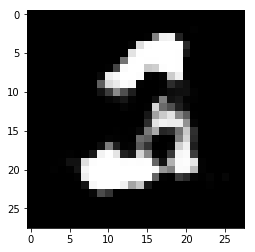

Loop: 103100, Generator_loss: 0.011271, Discriminator_loss: 0.0020059
Loop: 103200, Generator_loss: -0.042421, Discriminator_loss: 0.0073845
Loop: 103300, Generator_loss: -0.045497, Discriminator_loss: 0.0061122
Loop: 103400, Generator_loss: -0.04929, Discriminator_loss: 0.0048687
Loop: 103500, Generator_loss: 0.028561, Discriminator_loss: 0.0034778
Loop: 103600, Generator_loss: 0.023649, Discriminator_loss: 0.00581
Loop: 103700, Generator_loss: 0.0042293, Discriminator_loss: 0.0097331
Loop: 103800, Generator_loss: -0.032003, Discriminator_loss: 0.0029842
Loop: 103900, Generator_loss: -0.040416, Discriminator_loss: 0.0095038
Loop: 104000, Generator_loss: 0.014548, Discriminator_loss: 0.0043321


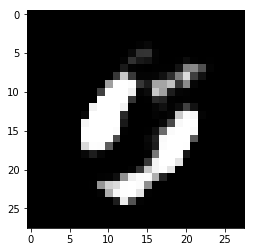

Loop: 104100, Generator_loss: -0.036028, Discriminator_loss: 0.0061027
Loop: 104200, Generator_loss: -0.0093655, Discriminator_loss: 0.0044415
Loop: 104300, Generator_loss: -0.021827, Discriminator_loss: 0.0060626
Loop: 104400, Generator_loss: -0.027363, Discriminator_loss: 0.007216
Loop: 104500, Generator_loss: -0.047781, Discriminator_loss: 0.013894
Loop: 104600, Generator_loss: -0.0049837, Discriminator_loss: 0.0050333
Loop: 104700, Generator_loss: -0.017102, Discriminator_loss: 0.003246
Loop: 104800, Generator_loss: -0.02673, Discriminator_loss: 0.0019883
Loop: 104900, Generator_loss: -0.025112, Discriminator_loss: 0.0081198
Loop: 105000, Generator_loss: -0.022295, Discriminator_loss: 0.0051547


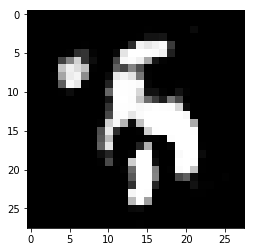

Loop: 105100, Generator_loss: -0.020965, Discriminator_loss: 0.007709
Loop: 105200, Generator_loss: -0.014119, Discriminator_loss: 0.0098918
Loop: 105300, Generator_loss: -0.0048183, Discriminator_loss: 0.0050233
Loop: 105400, Generator_loss: -0.011746, Discriminator_loss: 0.0068928
Loop: 105500, Generator_loss: -0.015748, Discriminator_loss: 0.0039384
Loop: 105600, Generator_loss: -0.045529, Discriminator_loss: 0.0094907
Loop: 105700, Generator_loss: -0.013009, Discriminator_loss: 0.008582
Loop: 105800, Generator_loss: -0.028347, Discriminator_loss: 0.0055722
Loop: 105900, Generator_loss: -0.039572, Discriminator_loss: 0.0063664
Loop: 106000, Generator_loss: 0.03376, Discriminator_loss: 0.0087483


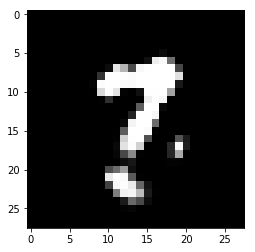

Loop: 106100, Generator_loss: 0.0063064, Discriminator_loss: 0.0020291
Loop: 106200, Generator_loss: -0.0094389, Discriminator_loss: 0.0086779
Loop: 106300, Generator_loss: -0.045985, Discriminator_loss: 0.0060323
Loop: 106400, Generator_loss: -0.015635, Discriminator_loss: 0.0044998
Loop: 106500, Generator_loss: -0.0090514, Discriminator_loss: 0.0070723
Loop: 106600, Generator_loss: 0.012914, Discriminator_loss: 0.0044546
Loop: 106700, Generator_loss: -0.012934, Discriminator_loss: 0.0032761
Loop: 106800, Generator_loss: 0.022754, Discriminator_loss: 0.007705
Loop: 106900, Generator_loss: -0.01514, Discriminator_loss: 0.0063316
Loop: 107000, Generator_loss: -0.018065, Discriminator_loss: 0.007393


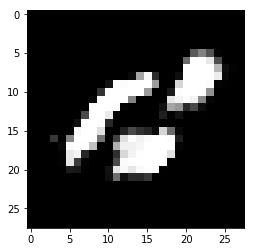

Loop: 107100, Generator_loss: -0.019138, Discriminator_loss: 0.00032224
Loop: 107200, Generator_loss: 0.0037127, Discriminator_loss: 0.0028889
Loop: 107300, Generator_loss: -0.020847, Discriminator_loss: 0.0076966
Loop: 107400, Generator_loss: -0.014734, Discriminator_loss: 0.0023124
Loop: 107500, Generator_loss: -0.026113, Discriminator_loss: 0.0045204
Loop: 107600, Generator_loss: -0.033067, Discriminator_loss: 0.00054594
Loop: 107700, Generator_loss: -0.0144, Discriminator_loss: 0.0051676
Loop: 107800, Generator_loss: -0.017373, Discriminator_loss: 0.0046494
Loop: 107900, Generator_loss: -0.044514, Discriminator_loss: 0.0055578
Loop: 108000, Generator_loss: -0.040413, Discriminator_loss: -0.0002494


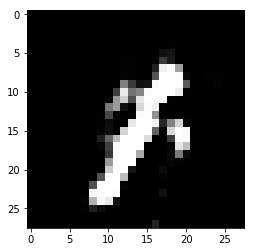

Loop: 108100, Generator_loss: -0.012724, Discriminator_loss: -7.485e-05
Loop: 108200, Generator_loss: -0.0092531, Discriminator_loss: 0.0046866
Loop: 108300, Generator_loss: -0.024831, Discriminator_loss: 0.0038997
Loop: 108400, Generator_loss: -0.018584, Discriminator_loss: 0.0073116
Loop: 108500, Generator_loss: -0.017087, Discriminator_loss: 0.0044412
Loop: 108600, Generator_loss: 0.0065091, Discriminator_loss: 0.0088858
Loop: 108700, Generator_loss: 0.0021732, Discriminator_loss: 0.0012101
Loop: 108800, Generator_loss: -0.0046574, Discriminator_loss: -0.00022733
Loop: 108900, Generator_loss: -0.0036551, Discriminator_loss: 0.0064761
Loop: 109000, Generator_loss: -0.034185, Discriminator_loss: 0.0091888


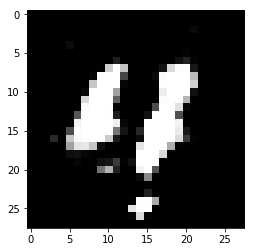

Loop: 109100, Generator_loss: 0.0031124, Discriminator_loss: 0.0056316
Loop: 109200, Generator_loss: -0.034182, Discriminator_loss: 0.0049296
Loop: 109300, Generator_loss: -0.052747, Discriminator_loss: 0.0065867
Loop: 109400, Generator_loss: -0.017477, Discriminator_loss: 0.0057482
Loop: 109500, Generator_loss: -0.0040731, Discriminator_loss: 0.0043849
Loop: 109600, Generator_loss: -0.058862, Discriminator_loss: 0.015017
Loop: 109700, Generator_loss: 0.014331, Discriminator_loss: 0.0042575
Loop: 109800, Generator_loss: -0.015182, Discriminator_loss: 0.0093142
Loop: 109900, Generator_loss: -0.017897, Discriminator_loss: 0.0056274
Loop: 110000, Generator_loss: -0.0020261, Discriminator_loss: 0.0044672


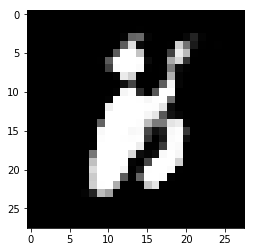

Loop: 110100, Generator_loss: 0.00026963, Discriminator_loss: 0.0047667
Loop: 110200, Generator_loss: -0.031016, Discriminator_loss: 0.0043462
Loop: 110300, Generator_loss: -0.015641, Discriminator_loss: 0.0075692
Loop: 110400, Generator_loss: -0.0089587, Discriminator_loss: 0.0076793
Loop: 110500, Generator_loss: -0.021839, Discriminator_loss: 0.0049318
Loop: 110600, Generator_loss: -0.0035359, Discriminator_loss: 0.0059157
Loop: 110700, Generator_loss: -0.013958, Discriminator_loss: 0.0038241
Loop: 110800, Generator_loss: -0.029836, Discriminator_loss: 0.0070548
Loop: 110900, Generator_loss: -0.00041508, Discriminator_loss: 0.01256
Loop: 111000, Generator_loss: -0.021239, Discriminator_loss: 0.0045131


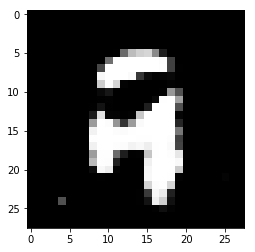

Loop: 111100, Generator_loss: 0.0030762, Discriminator_loss: 0.0083571
Loop: 111200, Generator_loss: -0.0064388, Discriminator_loss: 0.0022267
Loop: 111300, Generator_loss: -0.03829, Discriminator_loss: 0.0079949
Loop: 111400, Generator_loss: 0.022981, Discriminator_loss: 0.0092558
Loop: 111500, Generator_loss: -0.00019076, Discriminator_loss: 0.00087989
Loop: 111600, Generator_loss: -0.031571, Discriminator_loss: 0.0089254
Loop: 111700, Generator_loss: -0.00096709, Discriminator_loss: 0.0011862
Loop: 111800, Generator_loss: -0.035078, Discriminator_loss: 0.0071603
Loop: 111900, Generator_loss: -0.0064015, Discriminator_loss: 0.004376
Loop: 112000, Generator_loss: 0.033751, Discriminator_loss: 0.0072383


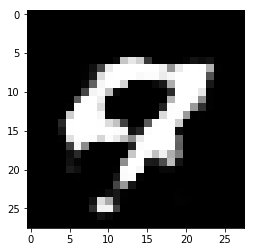

Loop: 112100, Generator_loss: -0.0037305, Discriminator_loss: 0.0053301
Loop: 112200, Generator_loss: 0.018132, Discriminator_loss: -0.00081119
Loop: 112300, Generator_loss: -0.0082106, Discriminator_loss: 0.0096884
Loop: 112400, Generator_loss: -0.010499, Discriminator_loss: 0.0078918
Loop: 112500, Generator_loss: -0.013262, Discriminator_loss: 0.006566
Loop: 112600, Generator_loss: -0.03639, Discriminator_loss: 0.0049426
Loop: 112700, Generator_loss: -0.053738, Discriminator_loss: 0.0014393
Loop: 112800, Generator_loss: -0.033333, Discriminator_loss: 0.0052628
Loop: 112900, Generator_loss: -0.0042389, Discriminator_loss: 0.0035355
Loop: 113000, Generator_loss: -0.0053222, Discriminator_loss: 0.0053365


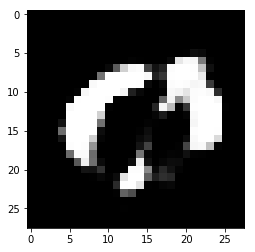

Loop: 113100, Generator_loss: -0.030133, Discriminator_loss: 0.0040859
Loop: 113200, Generator_loss: -0.010803, Discriminator_loss: 0.0036091
Loop: 113300, Generator_loss: 0.0074724, Discriminator_loss: 0.0043667
Loop: 113400, Generator_loss: -0.036266, Discriminator_loss: 0.0010128
Loop: 113500, Generator_loss: -0.016038, Discriminator_loss: 0.0060894
Loop: 113600, Generator_loss: -0.010256, Discriminator_loss: 0.005811
Loop: 113700, Generator_loss: -0.013469, Discriminator_loss: 0.0031551
Loop: 113800, Generator_loss: -0.0099454, Discriminator_loss: 0.0049183
Loop: 113900, Generator_loss: -0.04073, Discriminator_loss: 0.010638
Loop: 114000, Generator_loss: -0.0015341, Discriminator_loss: 0.0087775


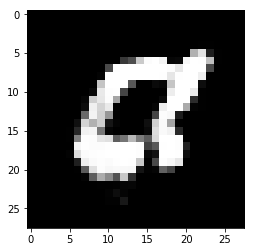

Loop: 114100, Generator_loss: -0.013839, Discriminator_loss: 0.0050782
Loop: 114200, Generator_loss: -0.0050201, Discriminator_loss: 0.0064084
Loop: 114300, Generator_loss: -0.016432, Discriminator_loss: 0.0036793
Loop: 114400, Generator_loss: -0.023566, Discriminator_loss: -0.0010461
Loop: 114500, Generator_loss: -0.039267, Discriminator_loss: 0.0070037
Loop: 114600, Generator_loss: -0.023919, Discriminator_loss: 0.0080021
Loop: 114700, Generator_loss: -0.036602, Discriminator_loss: 0.010703
Loop: 114800, Generator_loss: 0.0090881, Discriminator_loss: 0.0043504
Loop: 114900, Generator_loss: -0.033055, Discriminator_loss: 0.0029891
Loop: 115000, Generator_loss: -0.030957, Discriminator_loss: 0.010578


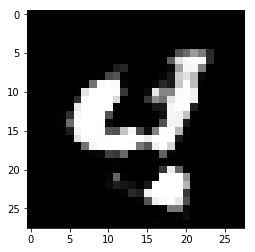

Loop: 115100, Generator_loss: -0.0088594, Discriminator_loss: 0.003289
Loop: 115200, Generator_loss: 0.019869, Discriminator_loss: 0.006686
Loop: 115300, Generator_loss: 0.0086596, Discriminator_loss: 0.0046944
Loop: 115400, Generator_loss: -0.018905, Discriminator_loss: 0.010179
Loop: 115500, Generator_loss: -0.016369, Discriminator_loss: 0.0021961
Loop: 115600, Generator_loss: -0.020082, Discriminator_loss: 0.0050495
Loop: 115700, Generator_loss: 0.023376, Discriminator_loss: 0.0017285
Loop: 115800, Generator_loss: 0.0067697, Discriminator_loss: 0.0060037
Loop: 115900, Generator_loss: 0.065311, Discriminator_loss: 0.0061558
Loop: 116000, Generator_loss: -0.030177, Discriminator_loss: 0.003227


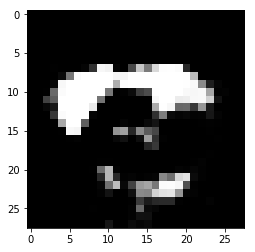

Loop: 116100, Generator_loss: -0.0083371, Discriminator_loss: 0.0071496
Loop: 116200, Generator_loss: 0.029601, Discriminator_loss: 0.0061282
Loop: 116300, Generator_loss: -0.0057035, Discriminator_loss: 0.004854
Loop: 116400, Generator_loss: -0.0069786, Discriminator_loss: 0.0046011
Loop: 116500, Generator_loss: -0.042912, Discriminator_loss: 0.0031097
Loop: 116600, Generator_loss: -0.01016, Discriminator_loss: 0.0063918
Loop: 116700, Generator_loss: 0.0049893, Discriminator_loss: 0.0023376
Loop: 116800, Generator_loss: -0.022704, Discriminator_loss: 0.0050017
Loop: 116900, Generator_loss: 0.010645, Discriminator_loss: 0.0058743
Loop: 117000, Generator_loss: -0.032457, Discriminator_loss: 0.0068966


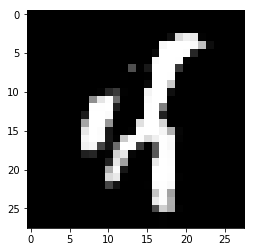

Loop: 117100, Generator_loss: -0.0097034, Discriminator_loss: 0.0048034
Loop: 117200, Generator_loss: -0.024364, Discriminator_loss: 0.0071369
Loop: 117300, Generator_loss: -0.046726, Discriminator_loss: 0.0087093
Loop: 117400, Generator_loss: -0.0016763, Discriminator_loss: 0.005429
Loop: 117500, Generator_loss: -0.031438, Discriminator_loss: 0.0033757
Loop: 117600, Generator_loss: -0.0075055, Discriminator_loss: 0.006114
Loop: 117700, Generator_loss: -0.03666, Discriminator_loss: 0.0093231
Loop: 117800, Generator_loss: 0.008729, Discriminator_loss: 0.0033696
Loop: 117900, Generator_loss: 0.0011261, Discriminator_loss: 0.0039198
Loop: 118000, Generator_loss: -0.0027057, Discriminator_loss: 0.0037296


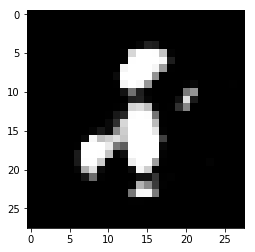

Loop: 118100, Generator_loss: -0.012573, Discriminator_loss: 0.0076261
Loop: 118200, Generator_loss: 0.020186, Discriminator_loss: 0.011486
Loop: 118300, Generator_loss: -0.028434, Discriminator_loss: 0.0081141
Loop: 118400, Generator_loss: -0.024661, Discriminator_loss: 0.012372
Loop: 118500, Generator_loss: -0.042637, Discriminator_loss: 0.0051579
Loop: 118600, Generator_loss: -0.027788, Discriminator_loss: 0.0067612
Loop: 118700, Generator_loss: 0.014419, Discriminator_loss: 0.0084069
Loop: 118800, Generator_loss: -0.0096818, Discriminator_loss: 0.0041167
Loop: 118900, Generator_loss: -0.020256, Discriminator_loss: 0.0068117
Loop: 119000, Generator_loss: 0.0075781, Discriminator_loss: 0.0029573


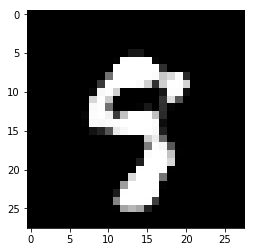

Loop: 119100, Generator_loss: -0.027964, Discriminator_loss: 0.0077221
Loop: 119200, Generator_loss: -0.010946, Discriminator_loss: 0.0060687
Loop: 119300, Generator_loss: -0.01997, Discriminator_loss: 0.0055969
Loop: 119400, Generator_loss: -0.0072124, Discriminator_loss: 0.0096243
Loop: 119500, Generator_loss: 0.032201, Discriminator_loss: 0.0009099
Loop: 119600, Generator_loss: -0.0018788, Discriminator_loss: 0.0043681
Loop: 119700, Generator_loss: -0.020359, Discriminator_loss: 0.0099103
Loop: 119800, Generator_loss: -0.036348, Discriminator_loss: 0.0037991
Loop: 119900, Generator_loss: -0.029007, Discriminator_loss: 0.0059686
Loop: 120000, Generator_loss: -0.022633, Discriminator_loss: 0.0037507


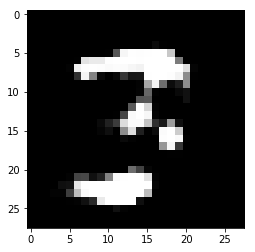

Loop: 120100, Generator_loss: -0.041803, Discriminator_loss: 0.0067708
Loop: 120200, Generator_loss: -0.012402, Discriminator_loss: 0.0098242
Loop: 120300, Generator_loss: 0.034313, Discriminator_loss: 0.013837
Loop: 120400, Generator_loss: -0.031835, Discriminator_loss: 0.010595
Loop: 120500, Generator_loss: -0.013572, Discriminator_loss: 0.010468
Loop: 120600, Generator_loss: -0.0136, Discriminator_loss: 0.0053518
Loop: 120700, Generator_loss: -0.013474, Discriminator_loss: 0.0028308
Loop: 120800, Generator_loss: 0.016855, Discriminator_loss: 0.0034638
Loop: 120900, Generator_loss: -0.0068935, Discriminator_loss: 0.0059139
Loop: 121000, Generator_loss: -0.02277, Discriminator_loss: 0.0089958


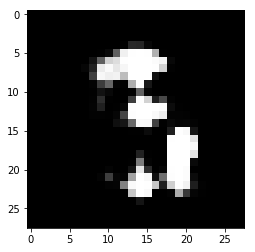

Loop: 121100, Generator_loss: 0.023648, Discriminator_loss: 0.0074857
Loop: 121200, Generator_loss: -0.030049, Discriminator_loss: 0.0014775
Loop: 121300, Generator_loss: -0.01413, Discriminator_loss: 0.0088885
Loop: 121400, Generator_loss: -0.010697, Discriminator_loss: 0.0089791
Loop: 121500, Generator_loss: -0.027482, Discriminator_loss: 0.0095042
Loop: 121600, Generator_loss: -0.046544, Discriminator_loss: 0.0021083
Loop: 121700, Generator_loss: -0.015783, Discriminator_loss: 0.0029828
Loop: 121800, Generator_loss: -0.033553, Discriminator_loss: 0.0038112
Loop: 121900, Generator_loss: -0.019688, Discriminator_loss: 0.0026889
Loop: 122000, Generator_loss: -0.035632, Discriminator_loss: 0.0030043


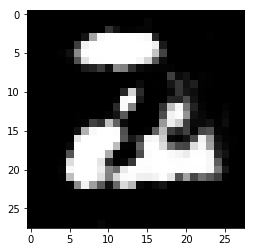

Loop: 122100, Generator_loss: -0.0072226, Discriminator_loss: 0.0039673
Loop: 122200, Generator_loss: 0.056508, Discriminator_loss: 0.0096391
Loop: 122300, Generator_loss: -0.029374, Discriminator_loss: 0.0040038
Loop: 122400, Generator_loss: -0.0098047, Discriminator_loss: 0.007525
Loop: 122500, Generator_loss: -0.016065, Discriminator_loss: 0.0077827
Loop: 122600, Generator_loss: -0.06262, Discriminator_loss: 0.0072943
Loop: 122700, Generator_loss: -0.025784, Discriminator_loss: 0.0070727
Loop: 122800, Generator_loss: 0.036989, Discriminator_loss: 0.001572
Loop: 122900, Generator_loss: -0.02039, Discriminator_loss: 0.010108
Loop: 123000, Generator_loss: -0.02114, Discriminator_loss: 0.0071648


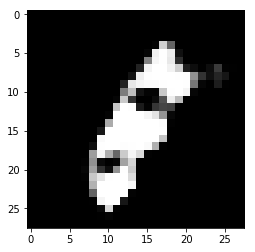

Loop: 123100, Generator_loss: -0.01903, Discriminator_loss: 0.0044014
Loop: 123200, Generator_loss: -0.048746, Discriminator_loss: 0.0079965
Loop: 123300, Generator_loss: -0.018341, Discriminator_loss: 0.006069
Loop: 123400, Generator_loss: -0.012058, Discriminator_loss: 0.0021152
Loop: 123500, Generator_loss: -0.024379, Discriminator_loss: 0.0011454
Loop: 123600, Generator_loss: 0.022418, Discriminator_loss: 0.0071802
Loop: 123700, Generator_loss: -0.0059541, Discriminator_loss: 0.0087036
Loop: 123800, Generator_loss: -0.021943, Discriminator_loss: 0.0058246
Loop: 123900, Generator_loss: -0.019553, Discriminator_loss: 0.0020429
Loop: 124000, Generator_loss: -0.035087, Discriminator_loss: 0.0076851


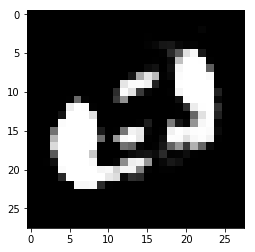

Loop: 124100, Generator_loss: -0.039406, Discriminator_loss: 0.0024762
Loop: 124200, Generator_loss: -0.035981, Discriminator_loss: 0.00016136
Loop: 124300, Generator_loss: -0.017806, Discriminator_loss: 0.0030764
Loop: 124400, Generator_loss: 0.0062486, Discriminator_loss: 0.0055858
Loop: 124500, Generator_loss: 0.04462, Discriminator_loss: 0.0099483
Loop: 124600, Generator_loss: 0.02289, Discriminator_loss: 0.0049296
Loop: 124700, Generator_loss: -0.031088, Discriminator_loss: 0.013004
Loop: 124800, Generator_loss: 0.024812, Discriminator_loss: 0.012382
Loop: 124900, Generator_loss: -0.0043191, Discriminator_loss: 0.0038659
Loop: 125000, Generator_loss: -0.026961, Discriminator_loss: 0.0052772


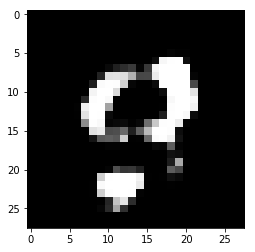

Loop: 125100, Generator_loss: -0.0048229, Discriminator_loss: 0.0068576
Loop: 125200, Generator_loss: -0.038413, Discriminator_loss: 0.010167
Loop: 125300, Generator_loss: 0.004824, Discriminator_loss: 0.0043027
Loop: 125400, Generator_loss: -0.0060632, Discriminator_loss: 0.0056746
Loop: 125500, Generator_loss: -0.017591, Discriminator_loss: 0.0072833
Loop: 125600, Generator_loss: 0.0043667, Discriminator_loss: 0.011139
Loop: 125700, Generator_loss: -0.030077, Discriminator_loss: 0.0037058
Loop: 125800, Generator_loss: -0.0046689, Discriminator_loss: 0.00558
Loop: 125900, Generator_loss: -0.020564, Discriminator_loss: 0.0064971
Loop: 126000, Generator_loss: -0.030873, Discriminator_loss: 0.0039528


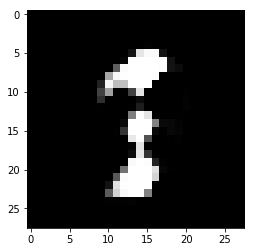

Loop: 126100, Generator_loss: -0.0040358, Discriminator_loss: 0.0029607
Loop: 126200, Generator_loss: -0.0064752, Discriminator_loss: 0.0030487
Loop: 126300, Generator_loss: -0.022204, Discriminator_loss: 0.008998
Loop: 126400, Generator_loss: -0.013324, Discriminator_loss: 0.0083796
Loop: 126500, Generator_loss: -0.01871, Discriminator_loss: 0.0056918
Loop: 126600, Generator_loss: -0.012084, Discriminator_loss: 0.0024438
Loop: 126700, Generator_loss: -0.0011518, Discriminator_loss: 0.0058711
Loop: 126800, Generator_loss: -0.013186, Discriminator_loss: 0.0079197
Loop: 126900, Generator_loss: 0.014754, Discriminator_loss: 0.0086318
Loop: 127000, Generator_loss: -0.033622, Discriminator_loss: 0.0025982


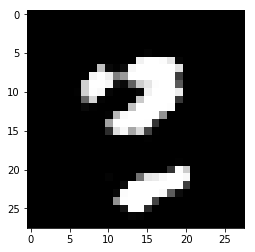

Loop: 127100, Generator_loss: 0.0059333, Discriminator_loss: 0.0028154
Loop: 127200, Generator_loss: -0.050966, Discriminator_loss: -0.00238
Loop: 127300, Generator_loss: -0.017678, Discriminator_loss: 0.0050174
Loop: 127400, Generator_loss: -0.0062815, Discriminator_loss: 0.0004691
Loop: 127500, Generator_loss: 0.0056434, Discriminator_loss: 0.0076404
Loop: 127600, Generator_loss: -0.016072, Discriminator_loss: 0.012728
Loop: 127700, Generator_loss: -0.0086744, Discriminator_loss: 0.0085397
Loop: 127800, Generator_loss: 0.0049129, Discriminator_loss: 0.0020664
Loop: 127900, Generator_loss: 0.013388, Discriminator_loss: 0.0035185
Loop: 128000, Generator_loss: -0.052726, Discriminator_loss: 0.01177


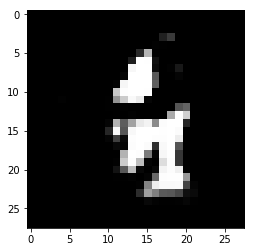

Loop: 128100, Generator_loss: -0.0030343, Discriminator_loss: 0.011618
Loop: 128200, Generator_loss: -0.0046088, Discriminator_loss: 0.00079916
Loop: 128300, Generator_loss: 0.004181, Discriminator_loss: 0.0020384
Loop: 128400, Generator_loss: -0.024413, Discriminator_loss: 0.0082328
Loop: 128500, Generator_loss: -0.0050763, Discriminator_loss: 0.0086998
Loop: 128600, Generator_loss: -0.021872, Discriminator_loss: 0.0048899
Loop: 128700, Generator_loss: 0.010915, Discriminator_loss: 0.0049915
Loop: 128800, Generator_loss: 0.015272, Discriminator_loss: 0.0025426
Loop: 128900, Generator_loss: 0.014022, Discriminator_loss: 0.003495
Loop: 129000, Generator_loss: -0.016788, Discriminator_loss: 0.0045341


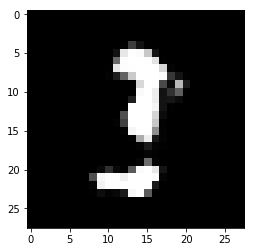

Loop: 129100, Generator_loss: 0.0070904, Discriminator_loss: 0.0069621
Loop: 129200, Generator_loss: 0.021563, Discriminator_loss: 0.0055825
Loop: 129300, Generator_loss: -0.0056053, Discriminator_loss: 0.0055351
Loop: 129400, Generator_loss: -0.038635, Discriminator_loss: 0.0064715
Loop: 129500, Generator_loss: 0.018583, Discriminator_loss: 0.002827
Loop: 129600, Generator_loss: -0.03558, Discriminator_loss: 0.0032673
Loop: 129700, Generator_loss: -0.0076958, Discriminator_loss: 0.0072866
Loop: 129800, Generator_loss: -0.031094, Discriminator_loss: 0.0057523
Loop: 129900, Generator_loss: 0.013077, Discriminator_loss: 0.004215
Loop: 130000, Generator_loss: -0.023143, Discriminator_loss: 0.0013393


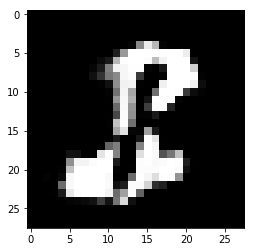

Loop: 130100, Generator_loss: -0.0020241, Discriminator_loss: 0.0060758
Loop: 130200, Generator_loss: -0.023431, Discriminator_loss: 0.002336
Loop: 130300, Generator_loss: -0.00464, Discriminator_loss: 0.0065126
Loop: 130400, Generator_loss: -0.039706, Discriminator_loss: 0.0070365
Loop: 130500, Generator_loss: 0.0049176, Discriminator_loss: 0.011486
Loop: 130600, Generator_loss: 0.0075357, Discriminator_loss: 0.006903
Loop: 130700, Generator_loss: -0.018593, Discriminator_loss: 0.0057607
Loop: 130800, Generator_loss: -0.020064, Discriminator_loss: 0.0083317
Loop: 130900, Generator_loss: -0.029825, Discriminator_loss: 0.0058504
Loop: 131000, Generator_loss: -0.020639, Discriminator_loss: 0.0040437


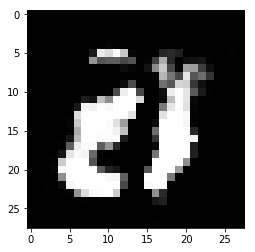

Loop: 131100, Generator_loss: -0.037112, Discriminator_loss: 0.0059102
Loop: 131200, Generator_loss: 0.024729, Discriminator_loss: 0.0061903
Loop: 131300, Generator_loss: -0.00093576, Discriminator_loss: 0.0060959
Loop: 131400, Generator_loss: 0.0022024, Discriminator_loss: 0.0027418
Loop: 131500, Generator_loss: 0.012236, Discriminator_loss: 0.0004106
Loop: 131600, Generator_loss: -0.029006, Discriminator_loss: 0.0048874
Loop: 131700, Generator_loss: -0.010744, Discriminator_loss: 0.0093514
Loop: 131800, Generator_loss: -0.0086873, Discriminator_loss: 0.0052226
Loop: 131900, Generator_loss: -0.041219, Discriminator_loss: 0.0070732
Loop: 132000, Generator_loss: 0.001181, Discriminator_loss: 0.0081351


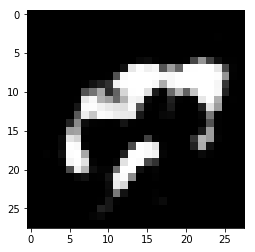

Loop: 132100, Generator_loss: 0.023586, Discriminator_loss: 0.00058829
Loop: 132200, Generator_loss: 0.0047176, Discriminator_loss: 0.0041024
Loop: 132300, Generator_loss: -0.023546, Discriminator_loss: 0.006677
Loop: 132400, Generator_loss: -0.025542, Discriminator_loss: 0.005491
Loop: 132500, Generator_loss: -0.041014, Discriminator_loss: 0.0060357
Loop: 132600, Generator_loss: -0.028, Discriminator_loss: 0.001457
Loop: 132700, Generator_loss: -0.0031521, Discriminator_loss: 0.0079209
Loop: 132800, Generator_loss: 0.028556, Discriminator_loss: 0.0069111
Loop: 132900, Generator_loss: 0.0098772, Discriminator_loss: -7.1228e-05
Loop: 133000, Generator_loss: -0.023061, Discriminator_loss: 0.0040392


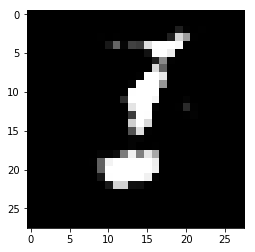

Loop: 133100, Generator_loss: -0.00062693, Discriminator_loss: 0.0086233
Loop: 133200, Generator_loss: 0.0013948, Discriminator_loss: 0.0034237
Loop: 133300, Generator_loss: -0.0065312, Discriminator_loss: 0.0076093
Loop: 133400, Generator_loss: -0.024039, Discriminator_loss: 0.0069937
Loop: 133500, Generator_loss: -0.008491, Discriminator_loss: 0.0017175
Loop: 133600, Generator_loss: 0.00011541, Discriminator_loss: 0.00057927
Loop: 133700, Generator_loss: -0.0013652, Discriminator_loss: 0.0025325
Loop: 133800, Generator_loss: -0.013203, Discriminator_loss: 0.0033577
Loop: 133900, Generator_loss: -0.032414, Discriminator_loss: 0.0068887
Loop: 134000, Generator_loss: 0.010411, Discriminator_loss: 0.0044371


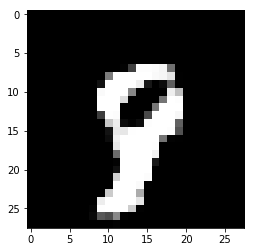

Loop: 134100, Generator_loss: 0.018474, Discriminator_loss: 0.0074594
Loop: 134200, Generator_loss: -0.02364, Discriminator_loss: 0.010542
Loop: 134300, Generator_loss: -0.013856, Discriminator_loss: 0.0036723
Loop: 134400, Generator_loss: -0.042186, Discriminator_loss: 0.0076599
Loop: 134500, Generator_loss: -0.030332, Discriminator_loss: 0.0097269
Loop: 134600, Generator_loss: 0.002884, Discriminator_loss: 0.0092792
Loop: 134700, Generator_loss: -0.015009, Discriminator_loss: 0.0063033
Loop: 134800, Generator_loss: -0.01746, Discriminator_loss: 0.0018354
Loop: 134900, Generator_loss: -0.0012359, Discriminator_loss: 0.0046746
Loop: 135000, Generator_loss: -0.0017372, Discriminator_loss: 0.0045725


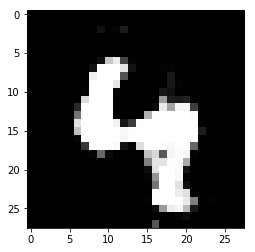

Loop: 135100, Generator_loss: -0.044926, Discriminator_loss: 0.0070707
Loop: 135200, Generator_loss: -0.0020704, Discriminator_loss: 0.005688
Loop: 135300, Generator_loss: -0.003518, Discriminator_loss: 0.0021185
Loop: 135400, Generator_loss: -0.028546, Discriminator_loss: 0.001363
Loop: 135500, Generator_loss: -0.019683, Discriminator_loss: 0.0092705
Loop: 135600, Generator_loss: -0.017063, Discriminator_loss: 0.0029899
Loop: 135700, Generator_loss: 0.037141, Discriminator_loss: 0.0067371
Loop: 135800, Generator_loss: -0.023918, Discriminator_loss: 0.0067455
Loop: 135900, Generator_loss: -0.036693, Discriminator_loss: 0.0017111
Loop: 136000, Generator_loss: -0.018077, Discriminator_loss: 0.0049655


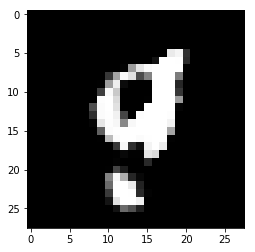

Loop: 136100, Generator_loss: 0.0066005, Discriminator_loss: 0.0096136
Loop: 136200, Generator_loss: -0.028443, Discriminator_loss: 0.0087551
Loop: 136300, Generator_loss: -0.013102, Discriminator_loss: 0.0070448
Loop: 136400, Generator_loss: -0.0196, Discriminator_loss: 0.0077082
Loop: 136500, Generator_loss: -0.02331, Discriminator_loss: 0.0045514
Loop: 136600, Generator_loss: 0.0089172, Discriminator_loss: 0.004994
Loop: 136700, Generator_loss: -0.041965, Discriminator_loss: 0.0081764
Loop: 136800, Generator_loss: -0.045839, Discriminator_loss: 0.0060767
Loop: 136900, Generator_loss: -0.015375, Discriminator_loss: 0.0076422
Loop: 137000, Generator_loss: -0.0016522, Discriminator_loss: -0.00092111


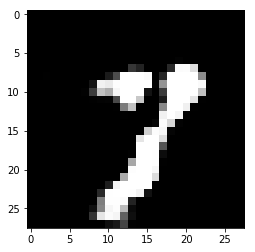

Loop: 137100, Generator_loss: -0.029363, Discriminator_loss: 0.008117
Loop: 137200, Generator_loss: -0.056628, Discriminator_loss: 0.0077003
Loop: 137300, Generator_loss: -0.0077058, Discriminator_loss: 0.0062428
Loop: 137400, Generator_loss: -0.038854, Discriminator_loss: 0.0066774
Loop: 137500, Generator_loss: -0.0017537, Discriminator_loss: 0.0053786
Loop: 137600, Generator_loss: -0.056858, Discriminator_loss: 0.003956
Loop: 137700, Generator_loss: -0.018449, Discriminator_loss: 0.0044618
Loop: 137800, Generator_loss: -0.031404, Discriminator_loss: 0.0062515
Loop: 137900, Generator_loss: 0.0086973, Discriminator_loss: 0.0069411
Loop: 138000, Generator_loss: -0.02051, Discriminator_loss: 0.0061666


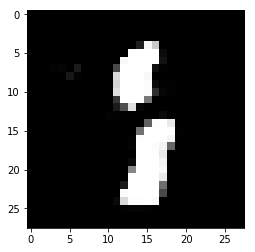

Loop: 138100, Generator_loss: -0.0086239, Discriminator_loss: 0.00079334
Loop: 138200, Generator_loss: 0.012085, Discriminator_loss: 0.0077165
Loop: 138300, Generator_loss: -0.0039658, Discriminator_loss: 0.0044292
Loop: 138400, Generator_loss: 0.015615, Discriminator_loss: 0.00084665
Loop: 138500, Generator_loss: -0.035591, Discriminator_loss: 0.00053252
Loop: 138600, Generator_loss: -0.015386, Discriminator_loss: 0.0028772
Loop: 138700, Generator_loss: -0.027748, Discriminator_loss: 0.0022289
Loop: 138800, Generator_loss: 0.030926, Discriminator_loss: 0.0031188
Loop: 138900, Generator_loss: 0.029303, Discriminator_loss: 0.0022013
Loop: 139000, Generator_loss: 0.0056506, Discriminator_loss: 0.0069668


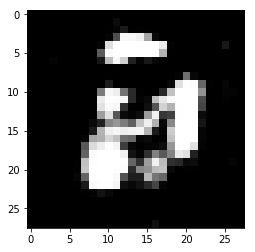

Loop: 139100, Generator_loss: 0.0024594, Discriminator_loss: 0.0057252
Loop: 139200, Generator_loss: 0.034366, Discriminator_loss: 0.00272
Loop: 139300, Generator_loss: -0.0032546, Discriminator_loss: 0.0044408
Loop: 139400, Generator_loss: 0.0031928, Discriminator_loss: 0.0032516
Loop: 139500, Generator_loss: -0.00027661, Discriminator_loss: 0.0028224
Loop: 139600, Generator_loss: -0.024515, Discriminator_loss: 0.0047321
Loop: 139700, Generator_loss: -0.0062091, Discriminator_loss: 0.0054489
Loop: 139800, Generator_loss: -0.015584, Discriminator_loss: 0.01056
Loop: 139900, Generator_loss: -0.013683, Discriminator_loss: 0.0041786
Loop: 140000, Generator_loss: -0.048126, Discriminator_loss: 0.0021777


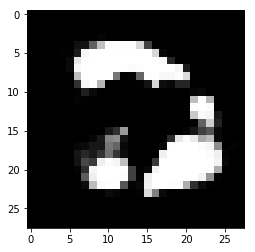

Loop: 140100, Generator_loss: 0.040815, Discriminator_loss: 0.014924
Loop: 140200, Generator_loss: -0.000523, Discriminator_loss: 0.011086
Loop: 140300, Generator_loss: -0.0013574, Discriminator_loss: 0.00334
Loop: 140400, Generator_loss: -0.010632, Discriminator_loss: 0.0034435
Loop: 140500, Generator_loss: -0.02115, Discriminator_loss: 0.0069959
Loop: 140600, Generator_loss: -0.0065418, Discriminator_loss: 0.0039713
Loop: 140700, Generator_loss: -0.0071965, Discriminator_loss: 0.0087798
Loop: 140800, Generator_loss: -0.026932, Discriminator_loss: 0.0052197
Loop: 140900, Generator_loss: -0.030467, Discriminator_loss: 0.0043083
Loop: 141000, Generator_loss: 0.010111, Discriminator_loss: 0.0039074


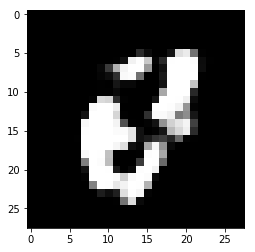

Loop: 141100, Generator_loss: -0.011482, Discriminator_loss: 0.0065794
Loop: 141200, Generator_loss: 0.0023513, Discriminator_loss: 0.0062028
Loop: 141300, Generator_loss: -0.0043565, Discriminator_loss: 0.0017294
Loop: 141400, Generator_loss: -0.049413, Discriminator_loss: 0.0086853
Loop: 141500, Generator_loss: -0.0093663, Discriminator_loss: 0.002703
Loop: 141600, Generator_loss: -0.025992, Discriminator_loss: 0.0074892
Loop: 141700, Generator_loss: 0.017204, Discriminator_loss: 0.0061838
Loop: 141800, Generator_loss: -0.041485, Discriminator_loss: 0.0016676
Loop: 141900, Generator_loss: -0.063172, Discriminator_loss: 0.0036742
Loop: 142000, Generator_loss: 0.018431, Discriminator_loss: 0.00027494


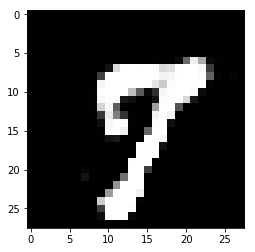

Loop: 142100, Generator_loss: 0.0002096, Discriminator_loss: -0.00019357
Loop: 142200, Generator_loss: -0.068305, Discriminator_loss: 0.016352
Loop: 142300, Generator_loss: 0.007638, Discriminator_loss: 0.0036717
Loop: 142400, Generator_loss: -0.024131, Discriminator_loss: 0.01058
Loop: 142500, Generator_loss: -0.047135, Discriminator_loss: 0.0041413
Loop: 142600, Generator_loss: -0.012329, Discriminator_loss: 0.0061588
Loop: 142700, Generator_loss: 0.02115, Discriminator_loss: 0.0079071
Loop: 142800, Generator_loss: -0.052041, Discriminator_loss: -0.00078899
Loop: 142900, Generator_loss: 0.03038, Discriminator_loss: 0.012652
Loop: 143000, Generator_loss: 0.021433, Discriminator_loss: 0.0065049


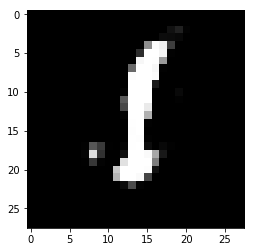

Loop: 143100, Generator_loss: -0.025037, Discriminator_loss: 0.0051069
Loop: 143200, Generator_loss: -0.01613, Discriminator_loss: 0.0087705
Loop: 143300, Generator_loss: -0.024227, Discriminator_loss: 0.0086112
Loop: 143400, Generator_loss: -0.037415, Discriminator_loss: 0.002918
Loop: 143500, Generator_loss: -0.022441, Discriminator_loss: 0.0045759
Loop: 143600, Generator_loss: -0.022089, Discriminator_loss: 0.0052032
Loop: 143700, Generator_loss: -0.018038, Discriminator_loss: 0.0042426
Loop: 143800, Generator_loss: 0.0057896, Discriminator_loss: 0.0010945
Loop: 143900, Generator_loss: 0.00015604, Discriminator_loss: 0.0062265
Loop: 144000, Generator_loss: 0.013231, Discriminator_loss: 0.001724


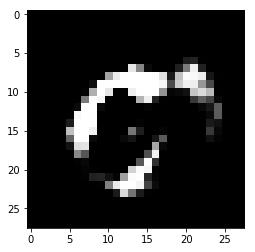

Loop: 144100, Generator_loss: -0.0060758, Discriminator_loss: 0.0025706
Loop: 144200, Generator_loss: -0.0080516, Discriminator_loss: 0.0052043
Loop: 144300, Generator_loss: -0.00068358, Discriminator_loss: 0.0071608
Loop: 144400, Generator_loss: -0.03407, Discriminator_loss: 0.0057214
Loop: 144500, Generator_loss: -0.02292, Discriminator_loss: 0.0023216
Loop: 144600, Generator_loss: -0.023243, Discriminator_loss: 0.00631
Loop: 144700, Generator_loss: 0.0086228, Discriminator_loss: 0.0047491
Loop: 144800, Generator_loss: -0.032334, Discriminator_loss: 0.0017005
Loop: 144900, Generator_loss: -0.013053, Discriminator_loss: 0.0077269
Loop: 145000, Generator_loss: -0.028787, Discriminator_loss: 0.0017682


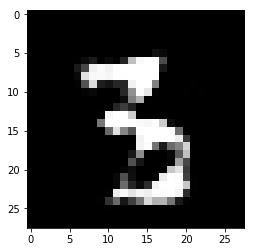

Loop: 145100, Generator_loss: -0.044307, Discriminator_loss: 0.0068589
Loop: 145200, Generator_loss: -0.037931, Discriminator_loss: 0.0082821
Loop: 145300, Generator_loss: 0.052509, Discriminator_loss: 0.007724
Loop: 145400, Generator_loss: 0.016669, Discriminator_loss: 0.0045574
Loop: 145500, Generator_loss: -0.017747, Discriminator_loss: 0.0040575
Loop: 145600, Generator_loss: 0.00087591, Discriminator_loss: 0.0027173
Loop: 145700, Generator_loss: -0.0056093, Discriminator_loss: 0.00064367
Loop: 145800, Generator_loss: -0.039327, Discriminator_loss: 0.0047558
Loop: 145900, Generator_loss: -0.016254, Discriminator_loss: 0.0049262
Loop: 146000, Generator_loss: -0.041513, Discriminator_loss: 0.00736


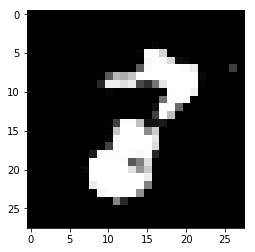

Loop: 146100, Generator_loss: -0.0061773, Discriminator_loss: 0.0066125
Loop: 146200, Generator_loss: 0.023781, Discriminator_loss: 0.0013208
Loop: 146300, Generator_loss: -0.001333, Discriminator_loss: 0.0027756
Loop: 146400, Generator_loss: -0.024633, Discriminator_loss: 0.006906
Loop: 146500, Generator_loss: -0.027698, Discriminator_loss: 0.0020433
Loop: 146600, Generator_loss: -0.023253, Discriminator_loss: 0.0053463
Loop: 146700, Generator_loss: -0.03466, Discriminator_loss: 0.0039148
Loop: 146800, Generator_loss: -0.013846, Discriminator_loss: 0.0025675
Loop: 146900, Generator_loss: 0.013455, Discriminator_loss: -3.3082e-05
Loop: 147000, Generator_loss: 0.048949, Discriminator_loss: -0.0036848


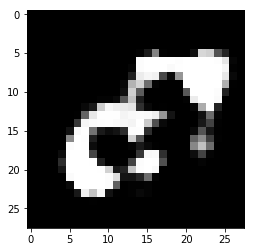

Loop: 147100, Generator_loss: 0.026732, Discriminator_loss: 0.0014315
Loop: 147200, Generator_loss: -0.013672, Discriminator_loss: 0.0036266
Loop: 147300, Generator_loss: -0.024338, Discriminator_loss: 0.007536
Loop: 147400, Generator_loss: -0.0060772, Discriminator_loss: 0.0028684
Loop: 147500, Generator_loss: -0.0077372, Discriminator_loss: 0.00078844
Loop: 147600, Generator_loss: -0.0047426, Discriminator_loss: 0.0085113
Loop: 147700, Generator_loss: -0.022389, Discriminator_loss: 0.0063943
Loop: 147800, Generator_loss: -0.046365, Discriminator_loss: 0.0076417
Loop: 147900, Generator_loss: -0.020771, Discriminator_loss: 0.0075122
Loop: 148000, Generator_loss: 0.072289, Discriminator_loss: 0.0030169


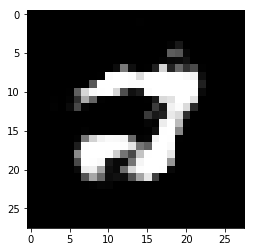

Loop: 148100, Generator_loss: -0.013245, Discriminator_loss: 0.0093206
Loop: 148200, Generator_loss: -0.0066774, Discriminator_loss: 0.0058951
Loop: 148300, Generator_loss: 0.014234, Discriminator_loss: 0.0030849
Loop: 148400, Generator_loss: -0.0011497, Discriminator_loss: -0.0029173
Loop: 148500, Generator_loss: -0.024206, Discriminator_loss: 0.0075117
Loop: 148600, Generator_loss: -0.023939, Discriminator_loss: 0.0042377
Loop: 148700, Generator_loss: -0.0443, Discriminator_loss: -0.0046575
Loop: 148800, Generator_loss: -0.040437, Discriminator_loss: 0.0068074
Loop: 148900, Generator_loss: 0.0056136, Discriminator_loss: 0.0085074
Loop: 149000, Generator_loss: -0.027724, Discriminator_loss: 0.0024194


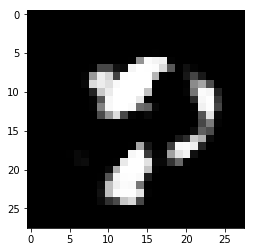

Loop: 149100, Generator_loss: -0.043004, Discriminator_loss: 0.0089874
Loop: 149200, Generator_loss: 0.012305, Discriminator_loss: 0.013906
Loop: 149300, Generator_loss: -0.043565, Discriminator_loss: -0.00038324
Loop: 149400, Generator_loss: -0.035283, Discriminator_loss: 0.0073127
Loop: 149500, Generator_loss: 0.00088955, Discriminator_loss: 0.009422
Loop: 149600, Generator_loss: -0.055472, Discriminator_loss: 0.0022635
Loop: 149700, Generator_loss: 0.025199, Discriminator_loss: 0.0068916
Loop: 149800, Generator_loss: -0.0034393, Discriminator_loss: 0.0010539
Loop: 149900, Generator_loss: -0.016859, Discriminator_loss: 0.00309
Loop: 150000, Generator_loss: -0.019271, Discriminator_loss: 0.0059836


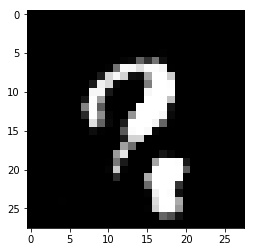

Loop: 150100, Generator_loss: -0.058584, Discriminator_loss: -0.0020678
Loop: 150200, Generator_loss: -0.0073118, Discriminator_loss: 0.0029702
Loop: 150300, Generator_loss: 0.011927, Discriminator_loss: 7.4551e-05
Loop: 150400, Generator_loss: -0.041788, Discriminator_loss: 0.0036796
Loop: 150500, Generator_loss: 0.00018872, Discriminator_loss: 0.006648
Loop: 150600, Generator_loss: -0.040495, Discriminator_loss: 0.0040522
Loop: 150700, Generator_loss: 0.0031021, Discriminator_loss: 0.0047923
Loop: 150800, Generator_loss: -0.037367, Discriminator_loss: 0.0055135
Loop: 150900, Generator_loss: -0.028821, Discriminator_loss: 0.0033046
Loop: 151000, Generator_loss: 0.0072746, Discriminator_loss: 0.00041446


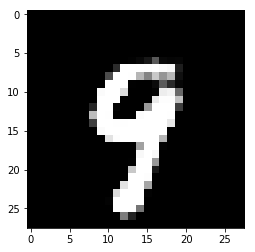

Loop: 151100, Generator_loss: 0.0095553, Discriminator_loss: 0.0038763
Loop: 151200, Generator_loss: -0.030795, Discriminator_loss: 0.0058937
Loop: 151300, Generator_loss: -0.021348, Discriminator_loss: 0.011598
Loop: 151400, Generator_loss: 0.015367, Discriminator_loss: 0.00071957
Loop: 151500, Generator_loss: -0.048814, Discriminator_loss: 0.0083505
Loop: 151600, Generator_loss: 0.0030365, Discriminator_loss: 0.0032937
Loop: 151700, Generator_loss: -0.025665, Discriminator_loss: 0.0055542
Loop: 151800, Generator_loss: -0.030022, Discriminator_loss: 0.0063875
Loop: 151900, Generator_loss: -0.049463, Discriminator_loss: 0.0062863
Loop: 152000, Generator_loss: 0.014141, Discriminator_loss: 0.0048713


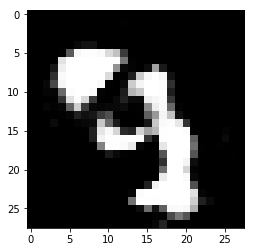

Loop: 152100, Generator_loss: -0.011785, Discriminator_loss: 0.0074838
Loop: 152200, Generator_loss: -0.021286, Discriminator_loss: 0.00037055
Loop: 152300, Generator_loss: -0.011667, Discriminator_loss: 0.0063475
Loop: 152400, Generator_loss: -0.026354, Discriminator_loss: 0.0035403
Loop: 152500, Generator_loss: 0.015892, Discriminator_loss: 0.0085701
Loop: 152600, Generator_loss: 0.014152, Discriminator_loss: 0.0064773
Loop: 152700, Generator_loss: 0.0011393, Discriminator_loss: 0.0051711
Loop: 152800, Generator_loss: -0.015432, Discriminator_loss: 0.0048546
Loop: 152900, Generator_loss: -0.012791, Discriminator_loss: -0.00034729
Loop: 153000, Generator_loss: -0.022231, Discriminator_loss: 0.005247


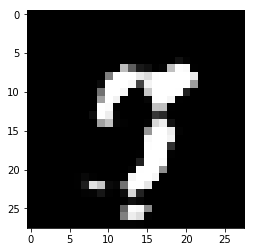

Loop: 153100, Generator_loss: -0.010625, Discriminator_loss: 0.0049152
Loop: 153200, Generator_loss: -0.013589, Discriminator_loss: 0.00071058
Loop: 153300, Generator_loss: -0.029899, Discriminator_loss: 0.0072331
Loop: 153400, Generator_loss: -0.065165, Discriminator_loss: 0.0068067
Loop: 153500, Generator_loss: -0.0037179, Discriminator_loss: 0.0063882
Loop: 153600, Generator_loss: -0.0045039, Discriminator_loss: 0.0079587
Loop: 153700, Generator_loss: -0.0032127, Discriminator_loss: 0.0048344
Loop: 153800, Generator_loss: -0.0030895, Discriminator_loss: 0.0044224
Loop: 153900, Generator_loss: -0.028587, Discriminator_loss: 0.0067141
Loop: 154000, Generator_loss: -0.0059323, Discriminator_loss: 0.00589


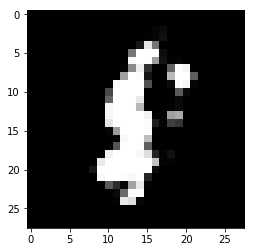

Loop: 154100, Generator_loss: -0.017089, Discriminator_loss: 0.0042219
Loop: 154200, Generator_loss: -0.015938, Discriminator_loss: 0.0015726
Loop: 154300, Generator_loss: -0.0039686, Discriminator_loss: 0.0054035
Loop: 154400, Generator_loss: -0.023794, Discriminator_loss: 0.0029252
Loop: 154500, Generator_loss: -0.051111, Discriminator_loss: 0.0036374
Loop: 154600, Generator_loss: -0.045287, Discriminator_loss: 0.0083744
Loop: 154700, Generator_loss: -0.0035471, Discriminator_loss: 0.0049913
Loop: 154800, Generator_loss: -0.053252, Discriminator_loss: 0.0021002
Loop: 154900, Generator_loss: -0.029539, Discriminator_loss: 0.0034965
Loop: 155000, Generator_loss: -0.025393, Discriminator_loss: 0.0012466


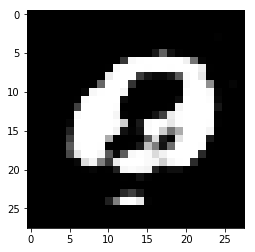

Loop: 155100, Generator_loss: -0.016149, Discriminator_loss: 0.003617
Loop: 155200, Generator_loss: -0.024734, Discriminator_loss: 0.0030366
Loop: 155300, Generator_loss: -0.0027286, Discriminator_loss: 0.0061154
Loop: 155400, Generator_loss: -0.034319, Discriminator_loss: 0.0043936
Loop: 155500, Generator_loss: -0.024464, Discriminator_loss: 0.0051949
Loop: 155600, Generator_loss: 0.027898, Discriminator_loss: 0.0041101
Loop: 155700, Generator_loss: -0.0096398, Discriminator_loss: 0.0091669
Loop: 155800, Generator_loss: 0.011955, Discriminator_loss: 0.0069201
Loop: 155900, Generator_loss: 0.00039232, Discriminator_loss: 0.0067477
Loop: 156000, Generator_loss: 0.0025246, Discriminator_loss: 0.0046823


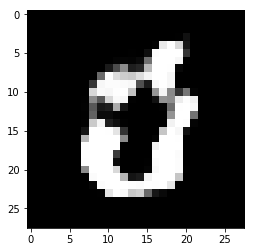

Loop: 156100, Generator_loss: -0.010209, Discriminator_loss: 0.002227
Loop: 156200, Generator_loss: -0.049403, Discriminator_loss: 2.047e-05
Loop: 156300, Generator_loss: -0.033794, Discriminator_loss: 0.0021366
Loop: 156400, Generator_loss: -0.021458, Discriminator_loss: 0.0077332
Loop: 156500, Generator_loss: -0.02201, Discriminator_loss: 0.0043582
Loop: 156600, Generator_loss: 0.0028393, Discriminator_loss: -0.0013015
Loop: 156700, Generator_loss: -0.018979, Discriminator_loss: 0.0029631
Loop: 156800, Generator_loss: -0.020857, Discriminator_loss: 0.0045668
Loop: 156900, Generator_loss: -0.019083, Discriminator_loss: 0.0051393
Loop: 157000, Generator_loss: 0.020738, Discriminator_loss: 0.001238


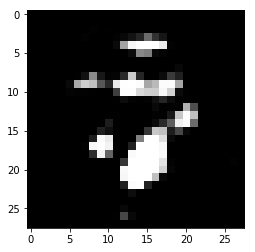

Loop: 157100, Generator_loss: -0.022938, Discriminator_loss: 0.0037574
Loop: 157200, Generator_loss: 0.084451, Discriminator_loss: 0.019848
Loop: 157300, Generator_loss: 0.046993, Discriminator_loss: -0.0021847
Loop: 157400, Generator_loss: 0.0028103, Discriminator_loss: 0.00015241
Loop: 157500, Generator_loss: 0.0074802, Discriminator_loss: 0.0046251
Loop: 157600, Generator_loss: 0.030568, Discriminator_loss: 0.0057772
Loop: 157700, Generator_loss: 0.0066082, Discriminator_loss: 0.0022364
Loop: 157800, Generator_loss: 0.0043911, Discriminator_loss: -0.001225
Loop: 157900, Generator_loss: 0.03451, Discriminator_loss: 5.5403e-05
Loop: 158000, Generator_loss: -0.027498, Discriminator_loss: 0.0036558


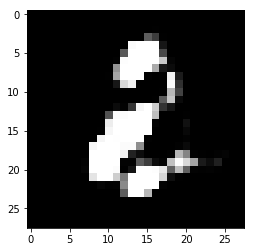

Loop: 158100, Generator_loss: -0.012525, Discriminator_loss: 0.0097602
Loop: 158200, Generator_loss: -0.012438, Discriminator_loss: 0.0033109
Loop: 158300, Generator_loss: -0.031877, Discriminator_loss: 0.0067075
Loop: 158400, Generator_loss: 0.000524, Discriminator_loss: 0.0059931
Loop: 158500, Generator_loss: 0.029916, Discriminator_loss: 0.004812
Loop: 158600, Generator_loss: 0.002367, Discriminator_loss: 0.0038191
Loop: 158700, Generator_loss: -0.021682, Discriminator_loss: 0.0029306
Loop: 158800, Generator_loss: -0.003377, Discriminator_loss: 0.0032027
Loop: 158900, Generator_loss: -0.024393, Discriminator_loss: 0.0031049
Loop: 159000, Generator_loss: -0.020518, Discriminator_loss: 0.0063465


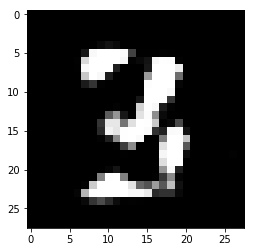

Loop: 159100, Generator_loss: -0.028572, Discriminator_loss: 0.002151
Loop: 159200, Generator_loss: -0.039792, Discriminator_loss: 0.0067612
Loop: 159300, Generator_loss: -0.040411, Discriminator_loss: 0.0017682
Loop: 159400, Generator_loss: -0.032645, Discriminator_loss: -0.00026321
Loop: 159500, Generator_loss: -0.014063, Discriminator_loss: 0.0071669
Loop: 159600, Generator_loss: 0.0050795, Discriminator_loss: 0.0060565
Loop: 159700, Generator_loss: -0.016366, Discriminator_loss: 0.0070096
Loop: 159800, Generator_loss: -0.027406, Discriminator_loss: 0.0012366
Loop: 159900, Generator_loss: 0.01145, Discriminator_loss: 0.0064445
Loop: 160000, Generator_loss: 0.0032875, Discriminator_loss: -0.0011695


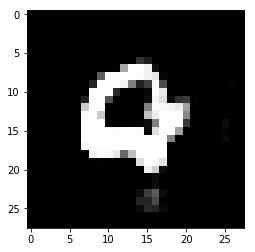

Loop: 160100, Generator_loss: -0.0077403, Discriminator_loss: 0.0019397
Loop: 160200, Generator_loss: -0.013443, Discriminator_loss: 0.0081545
Loop: 160300, Generator_loss: 0.024807, Discriminator_loss: 0.001494
Loop: 160400, Generator_loss: 0.0010396, Discriminator_loss: 0.0022976
Loop: 160500, Generator_loss: -0.0026058, Discriminator_loss: 0.0061465
Loop: 160600, Generator_loss: 0.012549, Discriminator_loss: 0.0045549
Loop: 160700, Generator_loss: -0.034915, Discriminator_loss: -0.00022485
Loop: 160800, Generator_loss: 0.031015, Discriminator_loss: 0.0092879
Loop: 160900, Generator_loss: 0.014794, Discriminator_loss: 0.0011381
Loop: 161000, Generator_loss: 0.0042722, Discriminator_loss: 0.0058521


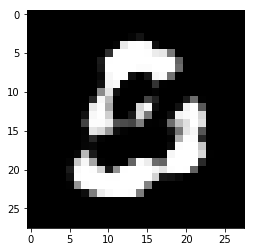

Loop: 161100, Generator_loss: -0.022261, Discriminator_loss: 0.0037255
Loop: 161200, Generator_loss: 0.027842, Discriminator_loss: 0.0060821
Loop: 161300, Generator_loss: 0.0051331, Discriminator_loss: 0.0078198
Loop: 161400, Generator_loss: -0.016529, Discriminator_loss: 0.0051718
Loop: 161500, Generator_loss: -0.028614, Discriminator_loss: 0.0023472
Loop: 161600, Generator_loss: 0.0047126, Discriminator_loss: 0.0023642
Loop: 161700, Generator_loss: -0.02347, Discriminator_loss: 0.0097836
Loop: 161800, Generator_loss: -0.00057846, Discriminator_loss: 0.0059702
Loop: 161900, Generator_loss: -0.0092765, Discriminator_loss: 0.0031185
Loop: 162000, Generator_loss: -0.039901, Discriminator_loss: 0.0089015


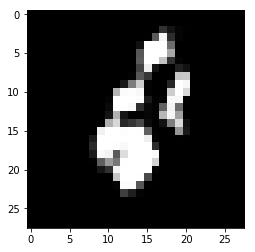

Loop: 162100, Generator_loss: -0.010617, Discriminator_loss: 0.0024123
Loop: 162200, Generator_loss: -0.036719, Discriminator_loss: 0.0043111
Loop: 162300, Generator_loss: 0.0053065, Discriminator_loss: 0.0028097
Loop: 162400, Generator_loss: -0.0020313, Discriminator_loss: 0.0038486
Loop: 162500, Generator_loss: 0.03034, Discriminator_loss: 0.0075312
Loop: 162600, Generator_loss: 0.0015098, Discriminator_loss: 0.0041936
Loop: 162700, Generator_loss: 0.003161, Discriminator_loss: 0.0062804
Loop: 162800, Generator_loss: -0.032755, Discriminator_loss: 0.0013931
Loop: 162900, Generator_loss: -0.038508, Discriminator_loss: 0.0063233
Loop: 163000, Generator_loss: 0.028296, Discriminator_loss: 0.0071961


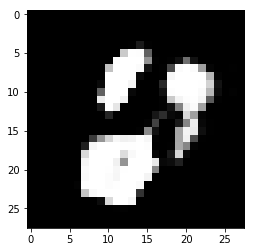

Loop: 163100, Generator_loss: 0.0089865, Discriminator_loss: 0.00077226
Loop: 163200, Generator_loss: -0.025973, Discriminator_loss: 0.0056751
Loop: 163300, Generator_loss: -0.017232, Discriminator_loss: 0.0042417
Loop: 163400, Generator_loss: 0.0033474, Discriminator_loss: 0.0019268
Loop: 163500, Generator_loss: 0.02458, Discriminator_loss: 0.0037663
Loop: 163600, Generator_loss: 0.030037, Discriminator_loss: -9.9089e-05
Loop: 163700, Generator_loss: 0.020999, Discriminator_loss: 0.0083105
Loop: 163800, Generator_loss: 0.029106, Discriminator_loss: 0.0066481
Loop: 163900, Generator_loss: -0.0039072, Discriminator_loss: 0.0065315
Loop: 164000, Generator_loss: -0.017702, Discriminator_loss: 0.0017839


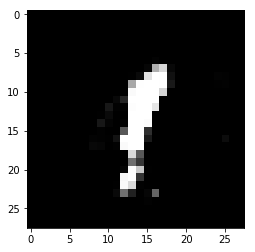

Loop: 164100, Generator_loss: -0.013203, Discriminator_loss: 0.010475
Loop: 164200, Generator_loss: -0.014249, Discriminator_loss: 0.0093083
Loop: 164300, Generator_loss: -0.03499, Discriminator_loss: 0.0055032
Loop: 164400, Generator_loss: -0.02539, Discriminator_loss: 0.0053062
Loop: 164500, Generator_loss: 0.056993, Discriminator_loss: 0.0084806
Loop: 164600, Generator_loss: -0.053162, Discriminator_loss: 0.00047446
Loop: 164700, Generator_loss: -0.0038974, Discriminator_loss: 0.0093601
Loop: 164800, Generator_loss: -0.036956, Discriminator_loss: 0.00416
Loop: 164900, Generator_loss: -0.0042192, Discriminator_loss: 0.0054616
Loop: 165000, Generator_loss: -0.028041, Discriminator_loss: 0.0058601


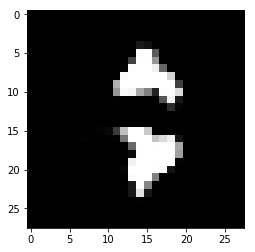

Loop: 165100, Generator_loss: 0.0019327, Discriminator_loss: 0.0076964
Loop: 165200, Generator_loss: 0.011064, Discriminator_loss: 0.0070536
Loop: 165300, Generator_loss: 0.018495, Discriminator_loss: 0.0062009
Loop: 165400, Generator_loss: 0.016753, Discriminator_loss: 0.0062932
Loop: 165500, Generator_loss: -0.010206, Discriminator_loss: 0.0040308
Loop: 165600, Generator_loss: 0.045192, Discriminator_loss: -0.0010572
Loop: 165700, Generator_loss: -0.011051, Discriminator_loss: 0.0039107
Loop: 165800, Generator_loss: -0.029815, Discriminator_loss: 0.0043462
Loop: 165900, Generator_loss: -0.0069688, Discriminator_loss: 0.0047226
Loop: 166000, Generator_loss: -0.025083, Discriminator_loss: 0.0041433


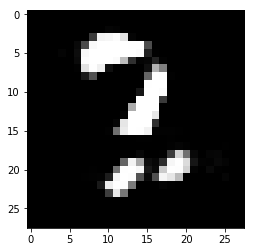

Loop: 166100, Generator_loss: 0.031297, Discriminator_loss: 0.0081478
Loop: 166200, Generator_loss: -0.017238, Discriminator_loss: 0.0020823
Loop: 166300, Generator_loss: -0.0078044, Discriminator_loss: 0.0075196
Loop: 166400, Generator_loss: -0.0013192, Discriminator_loss: 0.0052397
Loop: 166500, Generator_loss: 0.020105, Discriminator_loss: 0.0096863
Loop: 166600, Generator_loss: -0.042732, Discriminator_loss: 0.011288
Loop: 166700, Generator_loss: -0.04009, Discriminator_loss: 0.002552
Loop: 166800, Generator_loss: -0.0041449, Discriminator_loss: 0.0040961
Loop: 166900, Generator_loss: 0.0047208, Discriminator_loss: 0.0031973
Loop: 167000, Generator_loss: -0.033681, Discriminator_loss: 0.011489


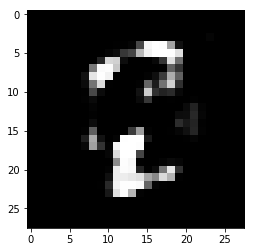

Loop: 167100, Generator_loss: -0.03767, Discriminator_loss: 0.0044849
Loop: 167200, Generator_loss: -0.006567, Discriminator_loss: 0.0040663
Loop: 167300, Generator_loss: -0.0096398, Discriminator_loss: 0.0024641
Loop: 167400, Generator_loss: 0.01429, Discriminator_loss: 0.0061267
Loop: 167500, Generator_loss: 0.066076, Discriminator_loss: 0.0099023
Loop: 167600, Generator_loss: -0.029796, Discriminator_loss: -0.00013509
Loop: 167700, Generator_loss: -0.020529, Discriminator_loss: 0.0063171
Loop: 167800, Generator_loss: -0.014501, Discriminator_loss: 0.004955
Loop: 167900, Generator_loss: 0.0069163, Discriminator_loss: 0.0087794
Loop: 168000, Generator_loss: -0.014881, Discriminator_loss: 0.0088133


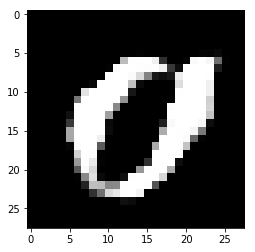

Loop: 168100, Generator_loss: 0.0082669, Discriminator_loss: 0.0044666
Loop: 168200, Generator_loss: -0.0412, Discriminator_loss: 0.0031028
Loop: 168300, Generator_loss: -0.032626, Discriminator_loss: 0.0047663
Loop: 168400, Generator_loss: -0.053314, Discriminator_loss: 0.0071644
Loop: 168500, Generator_loss: -0.0060935, Discriminator_loss: 0.0069874
Loop: 168600, Generator_loss: -0.042367, Discriminator_loss: 0.010771
Loop: 168700, Generator_loss: -0.023777, Discriminator_loss: 0.010428
Loop: 168800, Generator_loss: -0.0065855, Discriminator_loss: 0.002204
Loop: 168900, Generator_loss: 0.065895, Discriminator_loss: 0.0044042
Loop: 169000, Generator_loss: 0.01078, Discriminator_loss: -0.0013621


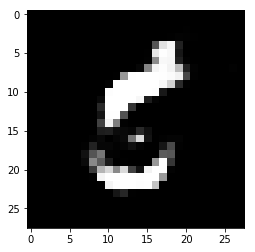

Loop: 169100, Generator_loss: 0.0067734, Discriminator_loss: 0.006888
Loop: 169200, Generator_loss: -0.00088035, Discriminator_loss: 0.0054742
Loop: 169300, Generator_loss: -0.022137, Discriminator_loss: 0.0033005
Loop: 169400, Generator_loss: 0.010231, Discriminator_loss: 0.0055631
Loop: 169500, Generator_loss: -0.0015019, Discriminator_loss: 0.0050794
Loop: 169600, Generator_loss: -0.033807, Discriminator_loss: 0.010977
Loop: 169700, Generator_loss: -0.021908, Discriminator_loss: 0.0076999
Loop: 169800, Generator_loss: -0.0079481, Discriminator_loss: 0.0090802
Loop: 169900, Generator_loss: -0.026159, Discriminator_loss: 0.0083067
Loop: 170000, Generator_loss: -0.045056, Discriminator_loss: 0.0076448


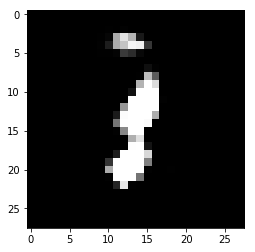

Loop: 170100, Generator_loss: -0.042986, Discriminator_loss: 0.0063687
Loop: 170200, Generator_loss: -0.0066456, Discriminator_loss: 0.0037843
Loop: 170300, Generator_loss: -0.0035778, Discriminator_loss: 0.0065792
Loop: 170400, Generator_loss: 0.027453, Discriminator_loss: -0.0040692
Loop: 170500, Generator_loss: -0.03023, Discriminator_loss: -0.0035392
Loop: 170600, Generator_loss: 0.02552, Discriminator_loss: 0.0035564
Loop: 170700, Generator_loss: 0.030294, Discriminator_loss: 0.0054585
Loop: 170800, Generator_loss: -0.032205, Discriminator_loss: 0.0038738
Loop: 170900, Generator_loss: -0.018375, Discriminator_loss: 0.0092205
Loop: 171000, Generator_loss: 0.016904, Discriminator_loss: 0.002454


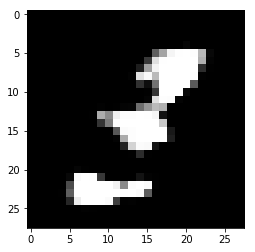

Loop: 171100, Generator_loss: 0.003383, Discriminator_loss: -0.00097222
Loop: 171200, Generator_loss: -0.025524, Discriminator_loss: 0.0062903
Loop: 171300, Generator_loss: 0.0164, Discriminator_loss: -0.00010063
Loop: 171400, Generator_loss: -0.0002439, Discriminator_loss: 0.00058783
Loop: 171500, Generator_loss: 0.0066873, Discriminator_loss: 0.0034685
Loop: 171600, Generator_loss: 0.0010509, Discriminator_loss: 0.0065073
Loop: 171700, Generator_loss: -0.044552, Discriminator_loss: 0.0058962
Loop: 171800, Generator_loss: 0.024347, Discriminator_loss: 0.0049139
Loop: 171900, Generator_loss: -0.054124, Discriminator_loss: 0.0085961
Loop: 172000, Generator_loss: -0.019567, Discriminator_loss: -6.579e-05


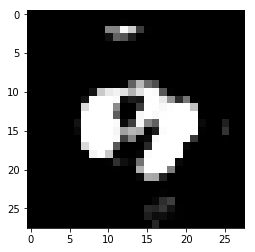

Loop: 172100, Generator_loss: -0.028582, Discriminator_loss: 0.0047674
Loop: 172200, Generator_loss: -0.043086, Discriminator_loss: 0.0010038
Loop: 172300, Generator_loss: -0.04966, Discriminator_loss: 0.0061092
Loop: 172400, Generator_loss: -0.037816, Discriminator_loss: 0.0073425
Loop: 172500, Generator_loss: -0.017552, Discriminator_loss: 0.0028965
Loop: 172600, Generator_loss: -0.0375, Discriminator_loss: 0.0049686
Loop: 172700, Generator_loss: -0.025999, Discriminator_loss: 0.0031389
Loop: 172800, Generator_loss: -0.023727, Discriminator_loss: 0.0042866
Loop: 172900, Generator_loss: -0.043526, Discriminator_loss: 0.0053541
Loop: 173000, Generator_loss: -0.062418, Discriminator_loss: 0.0038858


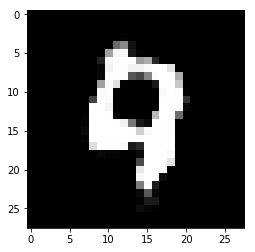

Loop: 173100, Generator_loss: -0.024281, Discriminator_loss: 0.0045114
Loop: 173200, Generator_loss: -0.027688, Discriminator_loss: 0.0017956
Loop: 173300, Generator_loss: -0.0094254, Discriminator_loss: 0.0028762
Loop: 173400, Generator_loss: 0.032304, Discriminator_loss: 0.0022466
Loop: 173500, Generator_loss: 0.0027008, Discriminator_loss: 0.0043455
Loop: 173600, Generator_loss: -0.021511, Discriminator_loss: 0.0045312
Loop: 173700, Generator_loss: -0.04916, Discriminator_loss: 0.0031305
Loop: 173800, Generator_loss: -0.017104, Discriminator_loss: 0.0076655
Loop: 173900, Generator_loss: 0.030564, Discriminator_loss: 0.0066593
Loop: 174000, Generator_loss: -0.01639, Discriminator_loss: 0.0030672


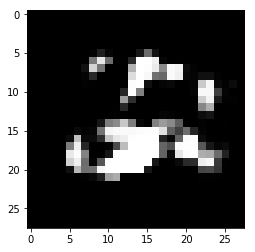

Loop: 174100, Generator_loss: -0.0066335, Discriminator_loss: -0.0016921
Loop: 174200, Generator_loss: -0.046623, Discriminator_loss: 0.0051972
Loop: 174300, Generator_loss: -0.0245, Discriminator_loss: 0.010633
Loop: 174400, Generator_loss: -0.011641, Discriminator_loss: 0.0099611
Loop: 174500, Generator_loss: -0.00077509, Discriminator_loss: 0.0046647
Loop: 174600, Generator_loss: -0.0007122, Discriminator_loss: 0.00064353
Loop: 174700, Generator_loss: -0.03022, Discriminator_loss: 0.00071384
Loop: 174800, Generator_loss: 0.009556, Discriminator_loss: 0.0066295
Loop: 174900, Generator_loss: -0.032848, Discriminator_loss: 0.006197
Loop: 175000, Generator_loss: -0.023025, Discriminator_loss: 0.0029433


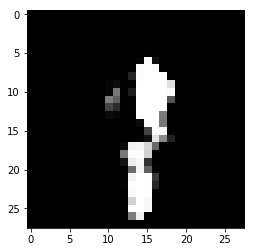

Loop: 175100, Generator_loss: 0.034299, Discriminator_loss: 0.0086487
Loop: 175200, Generator_loss: 0.0013394, Discriminator_loss: 0.004526
Loop: 175300, Generator_loss: 0.022257, Discriminator_loss: 0.01166
Loop: 175400, Generator_loss: -0.030114, Discriminator_loss: -0.001756
Loop: 175500, Generator_loss: -0.019225, Discriminator_loss: 0.0056733
Loop: 175600, Generator_loss: -0.0091113, Discriminator_loss: 0.0067366
Loop: 175700, Generator_loss: 0.033795, Discriminator_loss: -0.0014482
Loop: 175800, Generator_loss: 0.029805, Discriminator_loss: 0.006257
Loop: 175900, Generator_loss: -0.029132, Discriminator_loss: 0.0043339
Loop: 176000, Generator_loss: 0.023323, Discriminator_loss: 0.009623


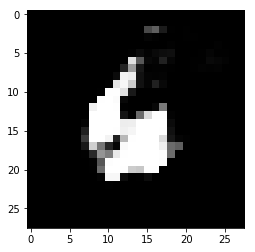

Loop: 176100, Generator_loss: -0.031139, Discriminator_loss: 0.011167
Loop: 176200, Generator_loss: -0.016352, Discriminator_loss: 0.0070999
Loop: 176300, Generator_loss: -0.0083828, Discriminator_loss: 0.0057857
Loop: 176400, Generator_loss: -0.012973, Discriminator_loss: 0.0030916
Loop: 176500, Generator_loss: 0.0011956, Discriminator_loss: 0.0040603
Loop: 176600, Generator_loss: 0.012426, Discriminator_loss: 0.0075358
Loop: 176700, Generator_loss: -0.050614, Discriminator_loss: 0.012426
Loop: 176800, Generator_loss: 0.030839, Discriminator_loss: 0.0026422
Loop: 176900, Generator_loss: -0.00030278, Discriminator_loss: 0.0044142
Loop: 177000, Generator_loss: -0.0086676, Discriminator_loss: 0.005855


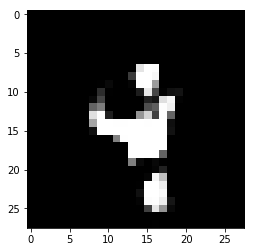

Loop: 177100, Generator_loss: 0.0077984, Discriminator_loss: 0.0046762
Loop: 177200, Generator_loss: 0.016694, Discriminator_loss: 0.0050431
Loop: 177300, Generator_loss: -0.023173, Discriminator_loss: 0.0085537
Loop: 177400, Generator_loss: 0.019607, Discriminator_loss: 0.011698
Loop: 177500, Generator_loss: -0.022927, Discriminator_loss: 0.0022297
Loop: 177600, Generator_loss: -0.0066668, Discriminator_loss: 0.0073428
Loop: 177700, Generator_loss: -0.00048737, Discriminator_loss: 0.0042086
Loop: 177800, Generator_loss: -0.0020145, Discriminator_loss: 0.0083479
Loop: 177900, Generator_loss: 0.014116, Discriminator_loss: 0.0055586
Loop: 178000, Generator_loss: -0.010827, Discriminator_loss: 0.0060818


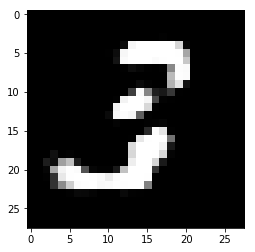

Loop: 178100, Generator_loss: 0.0046854, Discriminator_loss: -0.00056519
Loop: 178200, Generator_loss: 3.9109e-05, Discriminator_loss: -0.00094601
Loop: 178300, Generator_loss: 0.023785, Discriminator_loss: 0.0088781
Loop: 178400, Generator_loss: -0.0056545, Discriminator_loss: 0.009294
Loop: 178500, Generator_loss: -0.025972, Discriminator_loss: 0.010777
Loop: 178600, Generator_loss: 0.039918, Discriminator_loss: 0.0050605
Loop: 178700, Generator_loss: -0.024322, Discriminator_loss: 0.0021466
Loop: 178800, Generator_loss: -0.01047, Discriminator_loss: 0.003884
Loop: 178900, Generator_loss: -0.037819, Discriminator_loss: 0.0061241
Loop: 179000, Generator_loss: -0.0030047, Discriminator_loss: 0.0022486


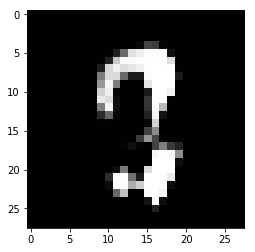

Loop: 179100, Generator_loss: -0.035739, Discriminator_loss: -0.0024506
Loop: 179200, Generator_loss: -0.035153, Discriminator_loss: 0.0015641
Loop: 179300, Generator_loss: -0.01854, Discriminator_loss: 0.0051475
Loop: 179400, Generator_loss: 0.011905, Discriminator_loss: 0.011167
Loop: 179500, Generator_loss: -0.0055304, Discriminator_loss: 0.0061468
Loop: 179600, Generator_loss: -0.017298, Discriminator_loss: 0.0036587
Loop: 179700, Generator_loss: -0.011568, Discriminator_loss: 0.0034052
Loop: 179800, Generator_loss: -0.019038, Discriminator_loss: 0.0051794
Loop: 179900, Generator_loss: -0.015793, Discriminator_loss: 0.0017192
Loop: 180000, Generator_loss: -0.035223, Discriminator_loss: 0.0062251


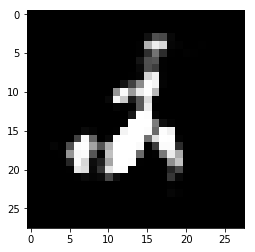

Loop: 180100, Generator_loss: -0.022727, Discriminator_loss: 0.0036095
Loop: 180200, Generator_loss: -0.038617, Discriminator_loss: 0.005735
Loop: 180300, Generator_loss: -0.04855, Discriminator_loss: 0.0052044
Loop: 180400, Generator_loss: -0.00011882, Discriminator_loss: 0.0054048
Loop: 180500, Generator_loss: 0.017536, Discriminator_loss: -0.00028508
Loop: 180600, Generator_loss: 0.016531, Discriminator_loss: 0.0057574
Loop: 180700, Generator_loss: -0.025499, Discriminator_loss: 0.0083484
Loop: 180800, Generator_loss: -0.014006, Discriminator_loss: 0.0069068
Loop: 180900, Generator_loss: -0.012495, Discriminator_loss: 0.0052581
Loop: 181000, Generator_loss: -0.0072805, Discriminator_loss: 0.0067816


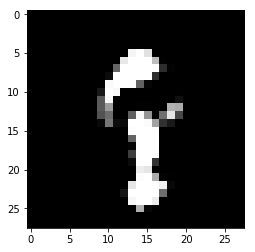

Loop: 181100, Generator_loss: -0.007115, Discriminator_loss: 5.4245e-05
Loop: 181200, Generator_loss: -0.032775, Discriminator_loss: 0.0085455
Loop: 181300, Generator_loss: 0.0026351, Discriminator_loss: 0.0021862
Loop: 181400, Generator_loss: -0.040021, Discriminator_loss: 0.009727
Loop: 181500, Generator_loss: -0.041362, Discriminator_loss: 0.004662
Loop: 181600, Generator_loss: -0.038822, Discriminator_loss: -0.00090889
Loop: 181700, Generator_loss: 0.040854, Discriminator_loss: 0.0071461
Loop: 181800, Generator_loss: 0.051282, Discriminator_loss: 0.0099386
Loop: 181900, Generator_loss: 0.03293, Discriminator_loss: 0.0012307
Loop: 182000, Generator_loss: -0.022196, Discriminator_loss: 0.0085737


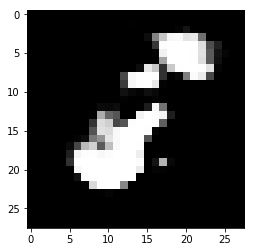

Loop: 182100, Generator_loss: 0.015856, Discriminator_loss: 0.0039357
Loop: 182200, Generator_loss: -0.031269, Discriminator_loss: 0.0053329
Loop: 182300, Generator_loss: -0.023739, Discriminator_loss: 0.012813
Loop: 182400, Generator_loss: 0.010443, Discriminator_loss: 0.0046005
Loop: 182500, Generator_loss: 0.01779, Discriminator_loss: 0.0085635
Loop: 182600, Generator_loss: 0.035059, Discriminator_loss: 0.00020039
Loop: 182700, Generator_loss: -0.011004, Discriminator_loss: -0.0041871
Loop: 182800, Generator_loss: -0.035856, Discriminator_loss: 0.0095265
Loop: 182900, Generator_loss: -0.026525, Discriminator_loss: 0.0059242
Loop: 183000, Generator_loss: 0.0066846, Discriminator_loss: 0.0048031


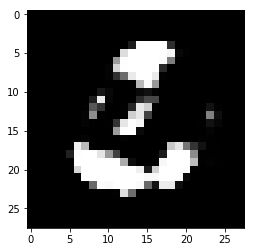

Loop: 183100, Generator_loss: -0.070186, Discriminator_loss: -0.0011828
Loop: 183200, Generator_loss: -0.0076776, Discriminator_loss: 0.0074302
Loop: 183300, Generator_loss: 0.035122, Discriminator_loss: 0.014727
Loop: 183400, Generator_loss: -0.021693, Discriminator_loss: 0.0067705
Loop: 183500, Generator_loss: -0.022234, Discriminator_loss: 0.0065472
Loop: 183600, Generator_loss: -0.0036835, Discriminator_loss: -0.0026817
Loop: 183700, Generator_loss: -0.032738, Discriminator_loss: 0.004065
Loop: 183800, Generator_loss: 0.03017, Discriminator_loss: 0.01213
Loop: 183900, Generator_loss: -0.0059978, Discriminator_loss: 0.0069451
Loop: 184000, Generator_loss: -0.055703, Discriminator_loss: 0.0061306


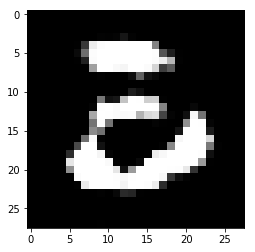

Loop: 184100, Generator_loss: 0.0041946, Discriminator_loss: 0.011942
Loop: 184200, Generator_loss: -0.022928, Discriminator_loss: 0.0023462
Loop: 184300, Generator_loss: -0.018418, Discriminator_loss: 0.005876
Loop: 184400, Generator_loss: -0.019673, Discriminator_loss: 0.0004622
Loop: 184500, Generator_loss: -0.060612, Discriminator_loss: 0.0091452
Loop: 184600, Generator_loss: -0.0031826, Discriminator_loss: 0.0073416
Loop: 184700, Generator_loss: -0.031945, Discriminator_loss: 0.0093362
Loop: 184800, Generator_loss: 0.0015385, Discriminator_loss: 0.0029136
Loop: 184900, Generator_loss: -0.040537, Discriminator_loss: 0.0058955
Loop: 185000, Generator_loss: -0.014997, Discriminator_loss: 0.012832


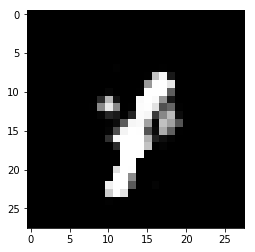

Loop: 185100, Generator_loss: -7.8465e-05, Discriminator_loss: 0.0066421
Loop: 185200, Generator_loss: -0.018445, Discriminator_loss: 0.010458
Loop: 185300, Generator_loss: 0.0071719, Discriminator_loss: 0.0068822
Loop: 185400, Generator_loss: -0.030214, Discriminator_loss: 0.0049088
Loop: 185500, Generator_loss: 0.04703, Discriminator_loss: 0.0029426
Loop: 185600, Generator_loss: -0.0091291, Discriminator_loss: 0.0064498
Loop: 185700, Generator_loss: -0.016097, Discriminator_loss: 0.005587
Loop: 185800, Generator_loss: -0.0038581, Discriminator_loss: 0.0085176
Loop: 185900, Generator_loss: 0.017885, Discriminator_loss: 0.0064052
Loop: 186000, Generator_loss: -0.036148, Discriminator_loss: 0.0074248


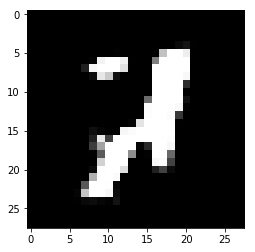

Loop: 186100, Generator_loss: -0.00036774, Discriminator_loss: 0.0035991
Loop: 186200, Generator_loss: -0.0016622, Discriminator_loss: 0.0091609
Loop: 186300, Generator_loss: 0.0040211, Discriminator_loss: 0.0054297
Loop: 186400, Generator_loss: -0.028643, Discriminator_loss: 0.0032669
Loop: 186500, Generator_loss: 0.019202, Discriminator_loss: 0.0060586
Loop: 186600, Generator_loss: -0.0033544, Discriminator_loss: 0.0084353
Loop: 186700, Generator_loss: -0.050895, Discriminator_loss: 0.0074727
Loop: 186800, Generator_loss: -0.011701, Discriminator_loss: 0.0021542
Loop: 186900, Generator_loss: -0.02695, Discriminator_loss: 0.0023795
Loop: 187000, Generator_loss: -0.0053798, Discriminator_loss: 0.0054662


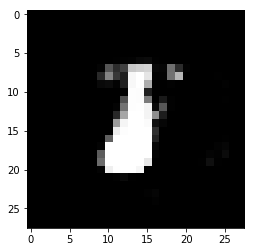

Loop: 187100, Generator_loss: -0.015245, Discriminator_loss: 0.0040929
Loop: 187200, Generator_loss: -0.0073216, Discriminator_loss: -0.0049539
Loop: 187300, Generator_loss: -0.027747, Discriminator_loss: 0.01111
Loop: 187400, Generator_loss: 0.027623, Discriminator_loss: 0.001879
Loop: 187500, Generator_loss: -0.019959, Discriminator_loss: -0.0051943
Loop: 187600, Generator_loss: 0.017753, Discriminator_loss: 0.0061797
Loop: 187700, Generator_loss: -0.0094872, Discriminator_loss: 0.0058507
Loop: 187800, Generator_loss: -0.015518, Discriminator_loss: 0.0054521
Loop: 187900, Generator_loss: 0.014566, Discriminator_loss: 0.0067825
Loop: 188000, Generator_loss: -0.025936, Discriminator_loss: 0.0042553


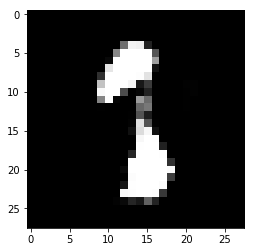

Loop: 188100, Generator_loss: 0.0057956, Discriminator_loss: 0.0042433
Loop: 188200, Generator_loss: -0.024579, Discriminator_loss: 0.005015
Loop: 188300, Generator_loss: -0.0058005, Discriminator_loss: 0.003056
Loop: 188400, Generator_loss: 0.013611, Discriminator_loss: -0.00063023
Loop: 188500, Generator_loss: -0.0071935, Discriminator_loss: 0.0032484
Loop: 188600, Generator_loss: -0.023721, Discriminator_loss: 0.0066299
Loop: 188700, Generator_loss: -0.016776, Discriminator_loss: 0.0074017
Loop: 188800, Generator_loss: 0.019655, Discriminator_loss: 0.010488
Loop: 188900, Generator_loss: -0.016577, Discriminator_loss: 0.011602
Loop: 189000, Generator_loss: -0.013139, Discriminator_loss: 0.0033688


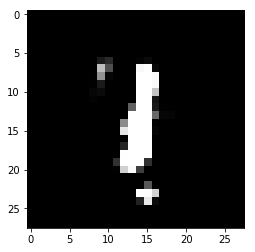

Loop: 189100, Generator_loss: -0.031993, Discriminator_loss: 0.0047535
Loop: 189200, Generator_loss: 0.063387, Discriminator_loss: 0.0036284
Loop: 189300, Generator_loss: 0.034432, Discriminator_loss: 0.0034584
Loop: 189400, Generator_loss: 0.012012, Discriminator_loss: 0.0044717
Loop: 189500, Generator_loss: -0.042283, Discriminator_loss: 0.0063679
Loop: 189600, Generator_loss: 0.010341, Discriminator_loss: 0.0033315
Loop: 189700, Generator_loss: 0.027255, Discriminator_loss: 0.0058459
Loop: 189800, Generator_loss: 0.032055, Discriminator_loss: 0.0068834
Loop: 189900, Generator_loss: -0.023454, Discriminator_loss: 0.0046387
Loop: 190000, Generator_loss: 0.001882, Discriminator_loss: 0.0017302


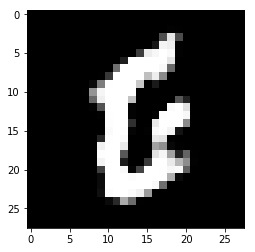

Loop: 190100, Generator_loss: 0.031203, Discriminator_loss: 0.0050671
Loop: 190200, Generator_loss: -0.041251, Discriminator_loss: 0.0019551
Loop: 190300, Generator_loss: -0.033258, Discriminator_loss: 0.0019848
Loop: 190400, Generator_loss: -0.0048663, Discriminator_loss: 0.0035829
Loop: 190500, Generator_loss: -0.061839, Discriminator_loss: 0.0020703
Loop: 190600, Generator_loss: -0.029135, Discriminator_loss: 0.0022157
Loop: 190700, Generator_loss: -0.032121, Discriminator_loss: 0.0061699
Loop: 190800, Generator_loss: 0.0047761, Discriminator_loss: 0.0041084
Loop: 190900, Generator_loss: -0.013774, Discriminator_loss: 0.0076385
Loop: 191000, Generator_loss: -0.009608, Discriminator_loss: 0.0055001


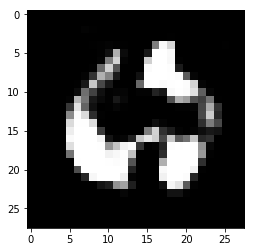

Loop: 191100, Generator_loss: 0.00025171, Discriminator_loss: 0.0064896
Loop: 191200, Generator_loss: -0.019795, Discriminator_loss: 0.0021365
Loop: 191300, Generator_loss: 0.012909, Discriminator_loss: 0.003219
Loop: 191400, Generator_loss: -0.00048773, Discriminator_loss: 0.0026562
Loop: 191500, Generator_loss: -0.037925, Discriminator_loss: 0.0075636
Loop: 191600, Generator_loss: -0.0089836, Discriminator_loss: 0.0069371
Loop: 191700, Generator_loss: 0.025506, Discriminator_loss: 0.012157
Loop: 191800, Generator_loss: -0.058782, Discriminator_loss: 0.0082098
Loop: 191900, Generator_loss: -0.01869, Discriminator_loss: 0.0032106
Loop: 192000, Generator_loss: -0.04246, Discriminator_loss: 0.0067671


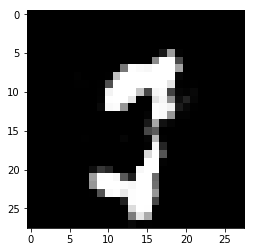

Loop: 192100, Generator_loss: 0.0063186, Discriminator_loss: -0.00070088
Loop: 192200, Generator_loss: -0.0056998, Discriminator_loss: 0.0027836
Loop: 192300, Generator_loss: 0.013595, Discriminator_loss: 0.0030392
Loop: 192400, Generator_loss: -0.017956, Discriminator_loss: 0.0043697
Loop: 192500, Generator_loss: 0.0011533, Discriminator_loss: 0.0090236
Loop: 192600, Generator_loss: 0.0067194, Discriminator_loss: 0.002962
Loop: 192700, Generator_loss: 0.030975, Discriminator_loss: -0.00029709
Loop: 192800, Generator_loss: 0.040685, Discriminator_loss: 0.01521
Loop: 192900, Generator_loss: -0.041304, Discriminator_loss: 0.0011432
Loop: 193000, Generator_loss: -0.009352, Discriminator_loss: 0.00012107


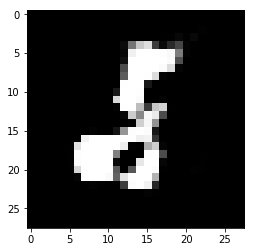

Loop: 193100, Generator_loss: -0.027142, Discriminator_loss: 0.0057196
Loop: 193200, Generator_loss: -0.0099374, Discriminator_loss: 0.0090761
Loop: 193300, Generator_loss: 0.0044552, Discriminator_loss: 0.00038387
Loop: 193400, Generator_loss: -0.0096819, Discriminator_loss: 0.0028197
Loop: 193500, Generator_loss: -0.037434, Discriminator_loss: 0.0014728
Loop: 193600, Generator_loss: -0.0034023, Discriminator_loss: 0.007117
Loop: 193700, Generator_loss: -0.029418, Discriminator_loss: 0.0055301
Loop: 193800, Generator_loss: -0.013307, Discriminator_loss: 0.0078816
Loop: 193900, Generator_loss: 0.043762, Discriminator_loss: 0.0081616
Loop: 194000, Generator_loss: 0.025222, Discriminator_loss: 0.00097305


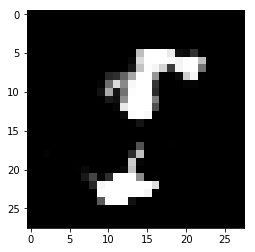

Loop: 194100, Generator_loss: -0.016517, Discriminator_loss: 0.0042459
Loop: 194200, Generator_loss: 0.022107, Discriminator_loss: 0.0059984
Loop: 194300, Generator_loss: -0.0096593, Discriminator_loss: 0.013713
Loop: 194400, Generator_loss: 0.0018985, Discriminator_loss: 0.0069254
Loop: 194500, Generator_loss: -0.00864, Discriminator_loss: 0.0064236
Loop: 194600, Generator_loss: -0.00038686, Discriminator_loss: 0.0027283
Loop: 194700, Generator_loss: -0.010926, Discriminator_loss: 0.00026535
Loop: 194800, Generator_loss: -0.0010252, Discriminator_loss: 0.0054369
Loop: 194900, Generator_loss: -0.00087612, Discriminator_loss: 0.0026993
Loop: 195000, Generator_loss: -0.02137, Discriminator_loss: -0.00055771


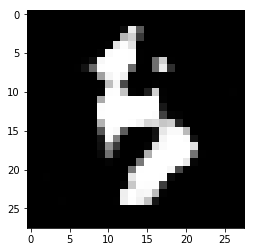

Loop: 195100, Generator_loss: 0.0096078, Discriminator_loss: 0.0020734
Loop: 195200, Generator_loss: -0.030656, Discriminator_loss: 0.0033754
Loop: 195300, Generator_loss: -0.0034194, Discriminator_loss: -0.0028217
Loop: 195400, Generator_loss: 0.014697, Discriminator_loss: 0.0077046
Loop: 195500, Generator_loss: 0.012893, Discriminator_loss: 0.0079494
Loop: 195600, Generator_loss: -0.025825, Discriminator_loss: 0.0066572
Loop: 195700, Generator_loss: -0.041795, Discriminator_loss: 0.0077976
Loop: 195800, Generator_loss: -0.0068096, Discriminator_loss: 0.0034617
Loop: 195900, Generator_loss: -0.036174, Discriminator_loss: 0.0057992
Loop: 196000, Generator_loss: 0.0044851, Discriminator_loss: 0.01015


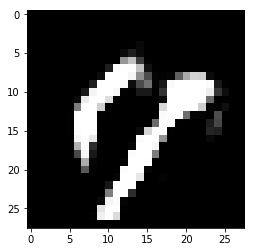

Loop: 196100, Generator_loss: -0.018774, Discriminator_loss: 0.0060885
Loop: 196200, Generator_loss: -0.017632, Discriminator_loss: 0.0026221
Loop: 196300, Generator_loss: -0.046385, Discriminator_loss: 0.0084537
Loop: 196400, Generator_loss: -0.028575, Discriminator_loss: 0.0005638
Loop: 196500, Generator_loss: -0.016627, Discriminator_loss: 0.0035264
Loop: 196600, Generator_loss: 0.012763, Discriminator_loss: 0.0068387
Loop: 196700, Generator_loss: -0.061553, Discriminator_loss: 0.0049899
Loop: 196800, Generator_loss: 0.024273, Discriminator_loss: 0.0031072
Loop: 196900, Generator_loss: 0.010982, Discriminator_loss: 0.0032105
Loop: 197000, Generator_loss: 0.044486, Discriminator_loss: 0.010354


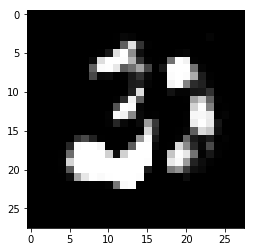

Loop: 197100, Generator_loss: 0.03843, Discriminator_loss: -8.1334e-05
Loop: 197200, Generator_loss: -0.028238, Discriminator_loss: 0.0068688
Loop: 197300, Generator_loss: -0.047736, Discriminator_loss: 0.0093635
Loop: 197400, Generator_loss: -0.014752, Discriminator_loss: 0.00995
Loop: 197500, Generator_loss: 0.005714, Discriminator_loss: 0.0016112
Loop: 197600, Generator_loss: -0.003279, Discriminator_loss: 0.0057516
Loop: 197700, Generator_loss: -0.03404, Discriminator_loss: 0.0066149
Loop: 197800, Generator_loss: 0.0028251, Discriminator_loss: 0.0041344
Loop: 197900, Generator_loss: -0.021693, Discriminator_loss: 0.0034347
Loop: 198000, Generator_loss: -0.043347, Discriminator_loss: 0.0056818


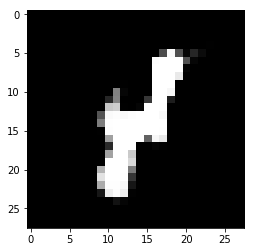

Loop: 198100, Generator_loss: 0.0026738, Discriminator_loss: 0.003142
Loop: 198200, Generator_loss: -0.014414, Discriminator_loss: 0.0017035
Loop: 198300, Generator_loss: 0.035118, Discriminator_loss: 0.0094124
Loop: 198400, Generator_loss: 4.7661e-05, Discriminator_loss: 0.0035178
Loop: 198500, Generator_loss: 0.012869, Discriminator_loss: 0.0096131
Loop: 198600, Generator_loss: 0.048647, Discriminator_loss: 0.0084327
Loop: 198700, Generator_loss: -0.03009, Discriminator_loss: 0.0081655
Loop: 198800, Generator_loss: 0.028653, Discriminator_loss: 0.0068004
Loop: 198900, Generator_loss: 0.036049, Discriminator_loss: 0.0048459
Loop: 199000, Generator_loss: -0.00010143, Discriminator_loss: 0.0012691


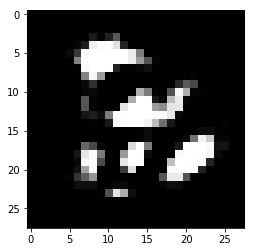

Loop: 199100, Generator_loss: -0.015738, Discriminator_loss: 0.0015767
Loop: 199200, Generator_loss: 0.046683, Discriminator_loss: 0.0086949
Loop: 199300, Generator_loss: 0.011048, Discriminator_loss: 0.00089916
Loop: 199400, Generator_loss: -0.026313, Discriminator_loss: 0.0053765
Loop: 199500, Generator_loss: -0.037278, Discriminator_loss: 0.01069
Loop: 199600, Generator_loss: -0.034941, Discriminator_loss: 0.0045549
Loop: 199700, Generator_loss: -0.026052, Discriminator_loss: 0.0023735
Loop: 199800, Generator_loss: -0.029171, Discriminator_loss: 0.0042477
Loop: 199900, Generator_loss: 0.029639, Discriminator_loss: 0.011345
Loop: 200000, Generator_loss: -0.0030911, Discriminator_loss: -0.00038232


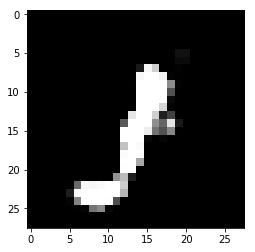

Loop: 200100, Generator_loss: 0.039484, Discriminator_loss: -0.0013239
Loop: 200200, Generator_loss: -0.046903, Discriminator_loss: 0.0095789
Loop: 200300, Generator_loss: 0.010387, Discriminator_loss: 0.0035011
Loop: 200400, Generator_loss: -0.0065149, Discriminator_loss: 0.0033901
Loop: 200500, Generator_loss: 0.015709, Discriminator_loss: 0.0073341
Loop: 200600, Generator_loss: -0.028463, Discriminator_loss: 0.0077652
Loop: 200700, Generator_loss: 0.01354, Discriminator_loss: 0.007141
Loop: 200800, Generator_loss: -0.062314, Discriminator_loss: -0.0054345
Loop: 200900, Generator_loss: -0.00023523, Discriminator_loss: 0.0011645
Loop: 201000, Generator_loss: -0.0046439, Discriminator_loss: 0.0020878


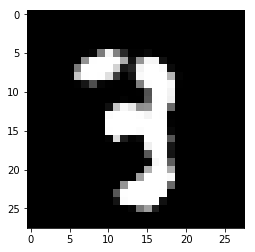

Loop: 201100, Generator_loss: 0.013714, Discriminator_loss: 0.0042441
Loop: 201200, Generator_loss: -0.015107, Discriminator_loss: 0.00821
Loop: 201300, Generator_loss: -0.010019, Discriminator_loss: 0.0026819
Loop: 201400, Generator_loss: -0.026676, Discriminator_loss: 0.013183
Loop: 201500, Generator_loss: -0.012265, Discriminator_loss: 0.0029971
Loop: 201600, Generator_loss: -0.039366, Discriminator_loss: 0.0086016
Loop: 201700, Generator_loss: -0.036766, Discriminator_loss: -0.0020287
Loop: 201800, Generator_loss: -0.020457, Discriminator_loss: 0.005169
Loop: 201900, Generator_loss: -0.034459, Discriminator_loss: 0.0050699
Loop: 202000, Generator_loss: -0.0074383, Discriminator_loss: 0.00056332


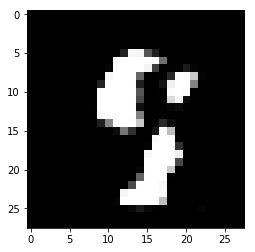

Loop: 202100, Generator_loss: -0.025086, Discriminator_loss: 0.0050162
Loop: 202200, Generator_loss: -0.0010702, Discriminator_loss: 0.0082999
Loop: 202300, Generator_loss: 0.0054066, Discriminator_loss: 0.011978
Loop: 202400, Generator_loss: 0.02131, Discriminator_loss: 0.00092761
Loop: 202500, Generator_loss: 0.017627, Discriminator_loss: 0.0028991
Loop: 202600, Generator_loss: 0.025785, Discriminator_loss: 0.004642
Loop: 202700, Generator_loss: -0.034365, Discriminator_loss: 0.0003503
Loop: 202800, Generator_loss: 0.02887, Discriminator_loss: 0.0068889
Loop: 202900, Generator_loss: -0.0091437, Discriminator_loss: 0.00091607
Loop: 203000, Generator_loss: 0.037974, Discriminator_loss: -0.0010523


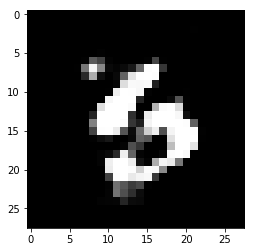

Loop: 203100, Generator_loss: 0.038174, Discriminator_loss: -0.001301
Loop: 203200, Generator_loss: 0.0013045, Discriminator_loss: 0.0087019
Loop: 203300, Generator_loss: 0.033048, Discriminator_loss: 0.003967
Loop: 203400, Generator_loss: -0.010163, Discriminator_loss: 0.0052146
Loop: 203500, Generator_loss: 0.020142, Discriminator_loss: 0.004972
Loop: 203600, Generator_loss: 0.059357, Discriminator_loss: 0.0078862
Loop: 203700, Generator_loss: -0.015236, Discriminator_loss: 0.008145
Loop: 203800, Generator_loss: -0.036628, Discriminator_loss: 0.0072682
Loop: 203900, Generator_loss: 0.010178, Discriminator_loss: 0.008681
Loop: 204000, Generator_loss: -0.018562, Discriminator_loss: 0.0039593


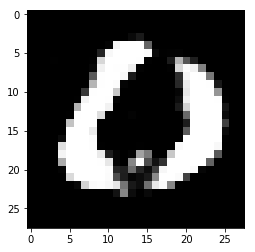

Loop: 204100, Generator_loss: -0.0036198, Discriminator_loss: 0.0066422
Loop: 204200, Generator_loss: 0.0049172, Discriminator_loss: 0.0044992
Loop: 204300, Generator_loss: 0.030606, Discriminator_loss: -0.011007
Loop: 204400, Generator_loss: -0.0062133, Discriminator_loss: 0.0049121
Loop: 204500, Generator_loss: -0.0071081, Discriminator_loss: 0.0032934
Loop: 204600, Generator_loss: -0.0021351, Discriminator_loss: 0.0093404
Loop: 204700, Generator_loss: -0.015942, Discriminator_loss: 0.0059154
Loop: 204800, Generator_loss: -0.030389, Discriminator_loss: 0.004134
Loop: 204900, Generator_loss: -0.039414, Discriminator_loss: 0.0019086
Loop: 205000, Generator_loss: -0.043291, Discriminator_loss: 0.0042204


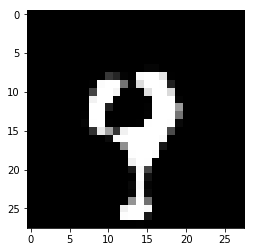

Loop: 205100, Generator_loss: -0.020327, Discriminator_loss: 0.0052847
Loop: 205200, Generator_loss: -0.015282, Discriminator_loss: 0.0043259
Loop: 205300, Generator_loss: -0.041016, Discriminator_loss: 0.0039161
Loop: 205400, Generator_loss: -0.064561, Discriminator_loss: 0.0053233
Loop: 205500, Generator_loss: -0.055658, Discriminator_loss: -0.00026393
Loop: 205600, Generator_loss: -0.031691, Discriminator_loss: 0.0078105
Loop: 205700, Generator_loss: 0.035797, Discriminator_loss: -0.0049626
Loop: 205800, Generator_loss: -0.020567, Discriminator_loss: 0.0065068
Loop: 205900, Generator_loss: -0.040976, Discriminator_loss: 0.0074598
Loop: 206000, Generator_loss: -0.018416, Discriminator_loss: 0.004483


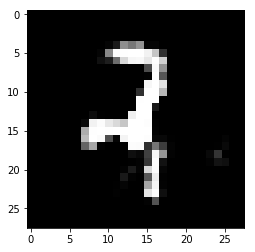

Loop: 206100, Generator_loss: -0.0042506, Discriminator_loss: -6.2567e-05
Loop: 206200, Generator_loss: 0.032396, Discriminator_loss: 0.012651
Loop: 206300, Generator_loss: -0.06009, Discriminator_loss: 0.0031665
Loop: 206400, Generator_loss: -0.062941, Discriminator_loss: 0.0079024
Loop: 206500, Generator_loss: -0.018942, Discriminator_loss: 0.0032986
Loop: 206600, Generator_loss: 0.0059142, Discriminator_loss: 0.0070463
Loop: 206700, Generator_loss: 0.0074266, Discriminator_loss: 0.00632
Loop: 206800, Generator_loss: 0.00027344, Discriminator_loss: -0.00066864
Loop: 206900, Generator_loss: -0.054056, Discriminator_loss: 0.0061318
Loop: 207000, Generator_loss: -0.037427, Discriminator_loss: 0.0029585


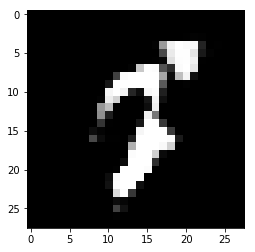

Loop: 207100, Generator_loss: 0.010734, Discriminator_loss: 0.0081615
Loop: 207200, Generator_loss: 0.011368, Discriminator_loss: -0.0041456
Loop: 207300, Generator_loss: 0.048574, Discriminator_loss: 0.0099942
Loop: 207400, Generator_loss: -0.0060841, Discriminator_loss: -0.0019428
Loop: 207500, Generator_loss: -0.0084934, Discriminator_loss: 0.0069685
Loop: 207600, Generator_loss: -0.024134, Discriminator_loss: 0.0021554
Loop: 207700, Generator_loss: -0.037162, Discriminator_loss: 0.0050555
Loop: 207800, Generator_loss: 0.004991, Discriminator_loss: 0.0035198
Loop: 207900, Generator_loss: -0.0032036, Discriminator_loss: 0.006768
Loop: 208000, Generator_loss: -0.0076377, Discriminator_loss: 0.0026463


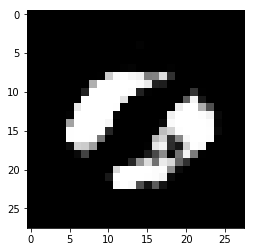

Loop: 208100, Generator_loss: -0.020532, Discriminator_loss: 0.0062094
Loop: 208200, Generator_loss: -0.024294, Discriminator_loss: -0.00033806
Loop: 208300, Generator_loss: 0.030213, Discriminator_loss: 0.0037137
Loop: 208400, Generator_loss: 0.044094, Discriminator_loss: 0.0075399
Loop: 208500, Generator_loss: 0.0078861, Discriminator_loss: 0.0062321
Loop: 208600, Generator_loss: 0.015312, Discriminator_loss: 0.0055417
Loop: 208700, Generator_loss: -0.054495, Discriminator_loss: 0.007651
Loop: 208800, Generator_loss: 0.0053308, Discriminator_loss: 0.0088068
Loop: 208900, Generator_loss: 0.013736, Discriminator_loss: 0.0079956
Loop: 209000, Generator_loss: -0.011295, Discriminator_loss: 0.0056677


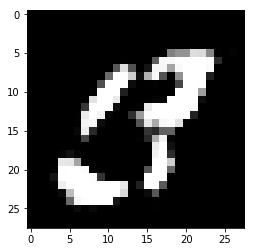

Loop: 209100, Generator_loss: -0.0069383, Discriminator_loss: 2.7917e-05
Loop: 209200, Generator_loss: -0.023412, Discriminator_loss: 0.0055845
Loop: 209300, Generator_loss: 0.021768, Discriminator_loss: 0.0041406
Loop: 209400, Generator_loss: 0.054572, Discriminator_loss: 0.010887
Loop: 209500, Generator_loss: -0.070825, Discriminator_loss: 0.0083574
Loop: 209600, Generator_loss: -0.036549, Discriminator_loss: 0.00436
Loop: 209700, Generator_loss: -0.030771, Discriminator_loss: 0.0093129
Loop: 209800, Generator_loss: 0.023774, Discriminator_loss: 0.01054
Loop: 209900, Generator_loss: 0.010986, Discriminator_loss: 0.0028495
Loop: 210000, Generator_loss: 0.0029711, Discriminator_loss: 0.0050346


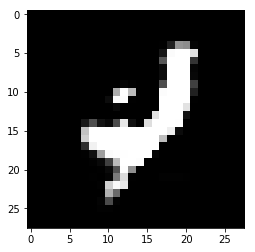

Loop: 210100, Generator_loss: 0.034493, Discriminator_loss: 0.0031949
Loop: 210200, Generator_loss: 0.012327, Discriminator_loss: 0.0039329
Loop: 210300, Generator_loss: 0.0092886, Discriminator_loss: 0.0020959
Loop: 210400, Generator_loss: -0.0039791, Discriminator_loss: 0.0064394
Loop: 210500, Generator_loss: -0.022448, Discriminator_loss: 0.0080875
Loop: 210600, Generator_loss: -0.003461, Discriminator_loss: 0.0032076
Loop: 210700, Generator_loss: -0.0011938, Discriminator_loss: 0.0045335
Loop: 210800, Generator_loss: -0.037653, Discriminator_loss: 0.0035602
Loop: 210900, Generator_loss: 0.010799, Discriminator_loss: 0.0046151
Loop: 211000, Generator_loss: -0.084489, Discriminator_loss: 0.0035995


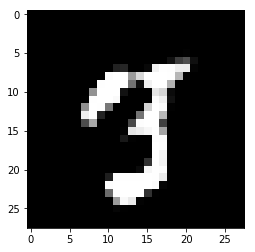

Loop: 211100, Generator_loss: -0.055788, Discriminator_loss: 0.0056346
Loop: 211200, Generator_loss: 0.029293, Discriminator_loss: 0.00096804
Loop: 211300, Generator_loss: -0.015949, Discriminator_loss: -0.0034041
Loop: 211400, Generator_loss: 0.011456, Discriminator_loss: 0.0085949
Loop: 211500, Generator_loss: -0.038292, Discriminator_loss: 0.0033358
Loop: 211600, Generator_loss: 0.0041526, Discriminator_loss: 0.0074926
Loop: 211700, Generator_loss: -0.0038933, Discriminator_loss: 0.0059665
Loop: 211800, Generator_loss: -0.05298, Discriminator_loss: 0.0032432
Loop: 211900, Generator_loss: -0.0076151, Discriminator_loss: 0.0013291
Loop: 212000, Generator_loss: -0.015778, Discriminator_loss: 0.0064989


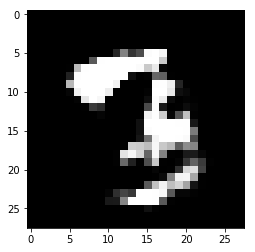

Loop: 212100, Generator_loss: -0.018436, Discriminator_loss: 0.0032706
Loop: 212200, Generator_loss: -0.036503, Discriminator_loss: 0.0046454
Loop: 212300, Generator_loss: -0.025951, Discriminator_loss: 0.0042131
Loop: 212400, Generator_loss: -0.0089849, Discriminator_loss: 0.0056753
Loop: 212500, Generator_loss: -0.039101, Discriminator_loss: 0.0047204
Loop: 212600, Generator_loss: -0.0078553, Discriminator_loss: 0.012108
Loop: 212700, Generator_loss: -0.020581, Discriminator_loss: 0.0032812
Loop: 212800, Generator_loss: 0.013122, Discriminator_loss: 0.0040658
Loop: 212900, Generator_loss: 0.020131, Discriminator_loss: 0.0061931
Loop: 213000, Generator_loss: 0.019061, Discriminator_loss: 0.0069556


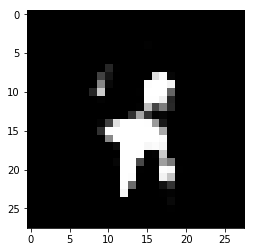

Loop: 213100, Generator_loss: 0.0079488, Discriminator_loss: 0.0093308
Loop: 213200, Generator_loss: 0.018281, Discriminator_loss: 0.0034014
Loop: 213300, Generator_loss: -0.0051464, Discriminator_loss: 0.0048482
Loop: 213400, Generator_loss: 0.037319, Discriminator_loss: 0.0049248
Loop: 213500, Generator_loss: 0.015503, Discriminator_loss: 0.00091258
Loop: 213600, Generator_loss: -0.022317, Discriminator_loss: 0.011206
Loop: 213700, Generator_loss: -0.034752, Discriminator_loss: 0.0067056
Loop: 213800, Generator_loss: 0.011041, Discriminator_loss: 0.0048272
Loop: 213900, Generator_loss: -0.01939, Discriminator_loss: -0.001837
Loop: 214000, Generator_loss: -0.0069847, Discriminator_loss: 0.0036171


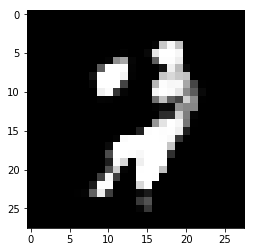

Loop: 214100, Generator_loss: -0.0065092, Discriminator_loss: -4.4005e-05
Loop: 214200, Generator_loss: 0.027812, Discriminator_loss: 0.010806
Loop: 214300, Generator_loss: -0.031915, Discriminator_loss: 0.0063258
Loop: 214400, Generator_loss: -0.0076638, Discriminator_loss: 0.00075782
Loop: 214500, Generator_loss: -0.019352, Discriminator_loss: 0.0048112
Loop: 214600, Generator_loss: 0.025455, Discriminator_loss: 0.0077984
Loop: 214700, Generator_loss: -0.0039955, Discriminator_loss: 0.0048156
Loop: 214800, Generator_loss: -0.021949, Discriminator_loss: 0.0067964
Loop: 214900, Generator_loss: -0.022719, Discriminator_loss: 0.0027583
Loop: 215000, Generator_loss: 0.033753, Discriminator_loss: 0.0042194


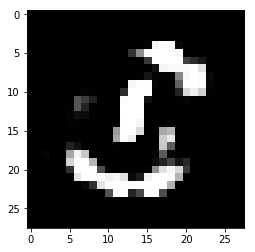

Loop: 215100, Generator_loss: -0.020428, Discriminator_loss: 0.010797
Loop: 215200, Generator_loss: 0.00073598, Discriminator_loss: 0.0029705
Loop: 215300, Generator_loss: -0.032953, Discriminator_loss: 0.0052674
Loop: 215400, Generator_loss: -0.0057215, Discriminator_loss: 0.0038819
Loop: 215500, Generator_loss: -0.03619, Discriminator_loss: 0.0043929
Loop: 215600, Generator_loss: -0.00028914, Discriminator_loss: 0.0010258
Loop: 215700, Generator_loss: -0.019827, Discriminator_loss: 0.0066289
Loop: 215800, Generator_loss: -0.019478, Discriminator_loss: 0.0046383
Loop: 215900, Generator_loss: -0.012045, Discriminator_loss: 0.0078527
Loop: 216000, Generator_loss: 0.0031826, Discriminator_loss: 0.0022188


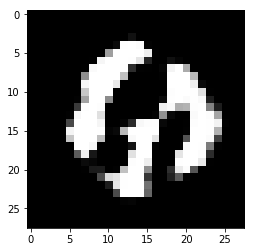

Loop: 216100, Generator_loss: 0.01842, Discriminator_loss: 0.0046023
Loop: 216200, Generator_loss: 0.01001, Discriminator_loss: 0.0047769
Loop: 216300, Generator_loss: -0.030047, Discriminator_loss: 0.0037091
Loop: 216400, Generator_loss: 0.0055992, Discriminator_loss: 0.0035641
Loop: 216500, Generator_loss: -0.010002, Discriminator_loss: 0.0014007
Loop: 216600, Generator_loss: -0.038097, Discriminator_loss: 0.003247
Loop: 216700, Generator_loss: 0.012247, Discriminator_loss: 0.0061969
Loop: 216800, Generator_loss: -0.018347, Discriminator_loss: 0.0015509
Loop: 216900, Generator_loss: 0.0032098, Discriminator_loss: 0.0096054
Loop: 217000, Generator_loss: -0.043366, Discriminator_loss: 0.011132


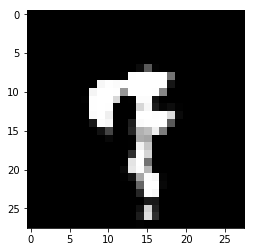

Loop: 217100, Generator_loss: 0.010666, Discriminator_loss: 0.0030033
Loop: 217200, Generator_loss: 0.005877, Discriminator_loss: 0.01223
Loop: 217300, Generator_loss: -0.012074, Discriminator_loss: 0.0040333
Loop: 217400, Generator_loss: 0.0020044, Discriminator_loss: 0.0041772
Loop: 217500, Generator_loss: -0.021071, Discriminator_loss: 0.0023149
Loop: 217600, Generator_loss: 0.00032758, Discriminator_loss: 0.0054253
Loop: 217700, Generator_loss: 0.020633, Discriminator_loss: 0.0029003
Loop: 217800, Generator_loss: -0.013968, Discriminator_loss: 0.0075402
Loop: 217900, Generator_loss: -0.014678, Discriminator_loss: 0.0024639
Loop: 218000, Generator_loss: 0.0018239, Discriminator_loss: 0.0015451


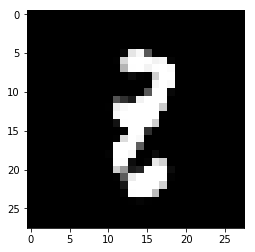

Loop: 218100, Generator_loss: -0.030841, Discriminator_loss: -8.7703e-05
Loop: 218200, Generator_loss: -0.003376, Discriminator_loss: 0.0053211
Loop: 218300, Generator_loss: -0.021463, Discriminator_loss: 0.0053193
Loop: 218400, Generator_loss: -0.054371, Discriminator_loss: 0.0024253
Loop: 218500, Generator_loss: 0.0056904, Discriminator_loss: -0.0021853
Loop: 218600, Generator_loss: -0.021215, Discriminator_loss: 0.0031392
Loop: 218700, Generator_loss: -0.030488, Discriminator_loss: 0.0025038
Loop: 218800, Generator_loss: -0.00029713, Discriminator_loss: 0.0030963
Loop: 218900, Generator_loss: 0.00065488, Discriminator_loss: 0.002187
Loop: 219000, Generator_loss: 0.0020651, Discriminator_loss: 0.0064554


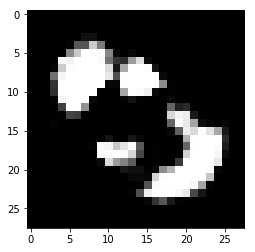

Loop: 219100, Generator_loss: -0.019601, Discriminator_loss: 0.0049552
Loop: 219200, Generator_loss: 0.0080407, Discriminator_loss: 0.0037433
Loop: 219300, Generator_loss: 0.0059945, Discriminator_loss: 0.0055742
Loop: 219400, Generator_loss: -0.01743, Discriminator_loss: 0.0064735
Loop: 219500, Generator_loss: -0.024681, Discriminator_loss: 0.0049355
Loop: 219600, Generator_loss: -0.027376, Discriminator_loss: 0.0069558
Loop: 219700, Generator_loss: -0.0051465, Discriminator_loss: 0.0077076
Loop: 219800, Generator_loss: 0.030173, Discriminator_loss: 0.010575
Loop: 219900, Generator_loss: 0.050302, Discriminator_loss: 0.010867
Loop: 220000, Generator_loss: -0.026061, Discriminator_loss: -0.00022357


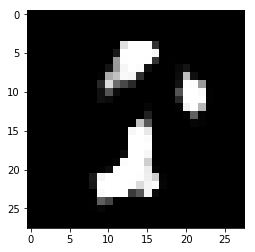

Loop: 220100, Generator_loss: -0.0094952, Discriminator_loss: 0.0050187
Loop: 220200, Generator_loss: 0.016686, Discriminator_loss: 0.0021842
Loop: 220300, Generator_loss: 0.019745, Discriminator_loss: 0.00051402
Loop: 220400, Generator_loss: -0.0016594, Discriminator_loss: 0.0043001
Loop: 220500, Generator_loss: 0.0084119, Discriminator_loss: -0.0028493
Loop: 220600, Generator_loss: -0.016682, Discriminator_loss: 0.0069116
Loop: 220700, Generator_loss: 0.025519, Discriminator_loss: 0.0094796
Loop: 220800, Generator_loss: 0.033002, Discriminator_loss: 0.0012609
Loop: 220900, Generator_loss: 0.0018409, Discriminator_loss: 0.0044013
Loop: 221000, Generator_loss: -0.032359, Discriminator_loss: 0.0030465


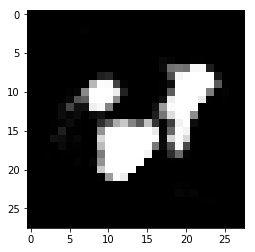

Loop: 221100, Generator_loss: 0.015098, Discriminator_loss: 0.0056004
Loop: 221200, Generator_loss: -0.0088615, Discriminator_loss: 0.0085692
Loop: 221300, Generator_loss: 0.017742, Discriminator_loss: 0.0094551
Loop: 221400, Generator_loss: -0.0076033, Discriminator_loss: 0.0032506
Loop: 221500, Generator_loss: -0.037702, Discriminator_loss: 0.0030292
Loop: 221600, Generator_loss: 0.013011, Discriminator_loss: -0.0018373
Loop: 221700, Generator_loss: -0.0067157, Discriminator_loss: 0.0019738
Loop: 221800, Generator_loss: 0.0036981, Discriminator_loss: 0.0011739
Loop: 221900, Generator_loss: 0.03987, Discriminator_loss: 0.0039781
Loop: 222000, Generator_loss: -0.031938, Discriminator_loss: 0.0084662


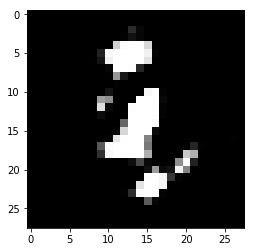

Loop: 222100, Generator_loss: -0.02322, Discriminator_loss: 0.0001273
Loop: 222200, Generator_loss: -0.018712, Discriminator_loss: 0.0024285
Loop: 222300, Generator_loss: -0.023382, Discriminator_loss: 0.0086895
Loop: 222400, Generator_loss: -0.0084611, Discriminator_loss: -0.0019746
Loop: 222500, Generator_loss: 0.0060004, Discriminator_loss: 0.005575
Loop: 222600, Generator_loss: 0.014186, Discriminator_loss: 0.0051103
Loop: 222700, Generator_loss: -0.0089612, Discriminator_loss: 0.006001
Loop: 222800, Generator_loss: -0.028937, Discriminator_loss: 0.0025546
Loop: 222900, Generator_loss: -0.056504, Discriminator_loss: 0.0049029
Loop: 223000, Generator_loss: 0.0038384, Discriminator_loss: 0.0065885


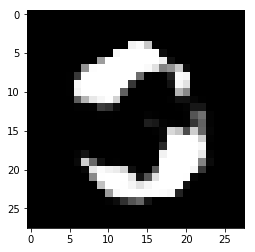

Loop: 223100, Generator_loss: -0.020055, Discriminator_loss: 0.0028663
Loop: 223200, Generator_loss: 0.033954, Discriminator_loss: 0.003236
Loop: 223300, Generator_loss: -0.027175, Discriminator_loss: 0.010959
Loop: 223400, Generator_loss: -0.020286, Discriminator_loss: -0.0034224
Loop: 223500, Generator_loss: -0.041734, Discriminator_loss: 0.0059123
Loop: 223600, Generator_loss: -0.012906, Discriminator_loss: 0.013555
Loop: 223700, Generator_loss: -0.0089345, Discriminator_loss: 0.0061182
Loop: 223800, Generator_loss: 0.026629, Discriminator_loss: 0.0054679
Loop: 223900, Generator_loss: 0.044897, Discriminator_loss: -0.0036536
Loop: 224000, Generator_loss: 0.009904, Discriminator_loss: 0.0033168


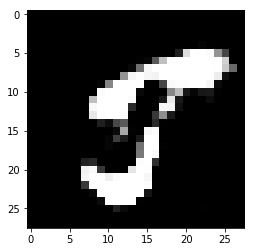

Loop: 224100, Generator_loss: -0.047245, Discriminator_loss: -0.00056437
Loop: 224200, Generator_loss: -0.0084063, Discriminator_loss: 0.0071047
Loop: 224300, Generator_loss: -0.0047658, Discriminator_loss: 0.0056299
Loop: 224400, Generator_loss: 0.0085018, Discriminator_loss: 0.0095412
Loop: 224500, Generator_loss: 0.034731, Discriminator_loss: 0.0080014
Loop: 224600, Generator_loss: -0.028475, Discriminator_loss: 0.002598
Loop: 224700, Generator_loss: -0.011442, Discriminator_loss: 0.0033064
Loop: 224800, Generator_loss: -0.030139, Discriminator_loss: 0.0056365
Loop: 224900, Generator_loss: -0.01549, Discriminator_loss: 0.0027327
Loop: 225000, Generator_loss: 0.020771, Discriminator_loss: 0.007249


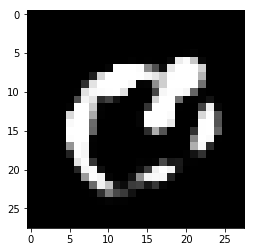

Loop: 225100, Generator_loss: -0.038013, Discriminator_loss: -0.0031515
Loop: 225200, Generator_loss: 0.0088727, Discriminator_loss: 0.0037671
Loop: 225300, Generator_loss: -0.0050337, Discriminator_loss: 0.0064791
Loop: 225400, Generator_loss: -0.050572, Discriminator_loss: 0.0062419
Loop: 225500, Generator_loss: -0.027892, Discriminator_loss: 0.004046
Loop: 225600, Generator_loss: -0.0068303, Discriminator_loss: 0.0042128
Loop: 225700, Generator_loss: 0.017717, Discriminator_loss: 0.0036094
Loop: 225800, Generator_loss: 0.06867, Discriminator_loss: 0.0069263
Loop: 225900, Generator_loss: 0.025149, Discriminator_loss: 0.0049205
Loop: 226000, Generator_loss: -0.052648, Discriminator_loss: 0.0025189


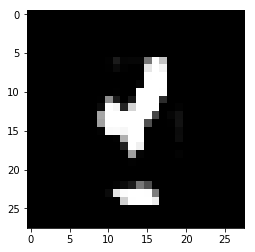

Loop: 226100, Generator_loss: -0.044854, Discriminator_loss: 0.0089144
Loop: 226200, Generator_loss: -0.014315, Discriminator_loss: 0.0013502
Loop: 226300, Generator_loss: 0.0019627, Discriminator_loss: -0.007383
Loop: 226400, Generator_loss: -0.025829, Discriminator_loss: 0.0044328
Loop: 226500, Generator_loss: -0.027106, Discriminator_loss: 0.0033904
Loop: 226600, Generator_loss: -0.035828, Discriminator_loss: 0.0063775
Loop: 226700, Generator_loss: 0.014158, Discriminator_loss: 0.0047122
Loop: 226800, Generator_loss: -0.031791, Discriminator_loss: 0.0046072
Loop: 226900, Generator_loss: -0.011489, Discriminator_loss: 0.009823
Loop: 227000, Generator_loss: -0.0080177, Discriminator_loss: 0.0072559


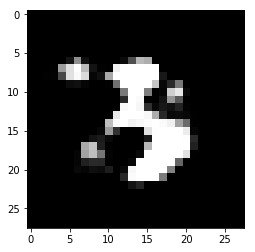

Loop: 227100, Generator_loss: -0.011115, Discriminator_loss: 0.00037926
Loop: 227200, Generator_loss: 0.0050908, Discriminator_loss: 0.0030098
Loop: 227300, Generator_loss: -0.012376, Discriminator_loss: 0.011282
Loop: 227400, Generator_loss: 0.0025124, Discriminator_loss: 0.0069243
Loop: 227500, Generator_loss: 0.0029637, Discriminator_loss: 0.0041201
Loop: 227600, Generator_loss: 0.027137, Discriminator_loss: 0.0068046
Loop: 227700, Generator_loss: -0.030028, Discriminator_loss: 0.0033113
Loop: 227800, Generator_loss: -0.048677, Discriminator_loss: 0.0057898
Loop: 227900, Generator_loss: 0.0070423, Discriminator_loss: -0.00027438
Loop: 228000, Generator_loss: -0.028896, Discriminator_loss: 0.0075737


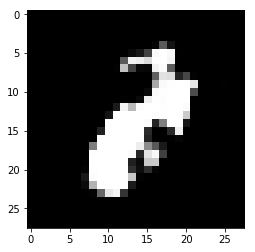

Loop: 228100, Generator_loss: -0.0099135, Discriminator_loss: 0.0095413
Loop: 228200, Generator_loss: -0.0015354, Discriminator_loss: 0.0072281
Loop: 228300, Generator_loss: 0.014029, Discriminator_loss: 0.0046843
Loop: 228400, Generator_loss: -0.016403, Discriminator_loss: 0.010451
Loop: 228500, Generator_loss: 0.0073025, Discriminator_loss: 0.0044557
Loop: 228600, Generator_loss: -0.056714, Discriminator_loss: 0.00095115
Loop: 228700, Generator_loss: 0.015782, Discriminator_loss: 0.0072222
Loop: 228800, Generator_loss: 0.0089377, Discriminator_loss: 0.0073351
Loop: 228900, Generator_loss: 0.0022193, Discriminator_loss: 0.0064366
Loop: 229000, Generator_loss: -0.017687, Discriminator_loss: -0.0011092


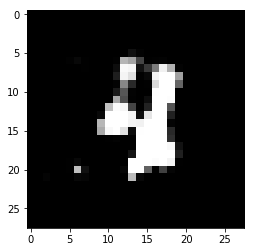

Loop: 229100, Generator_loss: -0.024149, Discriminator_loss: 0.0032994
Loop: 229200, Generator_loss: -0.031927, Discriminator_loss: 0.0048475
Loop: 229300, Generator_loss: 0.0031001, Discriminator_loss: 0.004241
Loop: 229400, Generator_loss: 0.019755, Discriminator_loss: 0.008821
Loop: 229500, Generator_loss: -0.0053281, Discriminator_loss: 0.01122
Loop: 229600, Generator_loss: -0.01869, Discriminator_loss: -0.0027834
Loop: 229700, Generator_loss: -0.00071933, Discriminator_loss: 0.0064115
Loop: 229800, Generator_loss: -0.021816, Discriminator_loss: 0.0069361
Loop: 229900, Generator_loss: -0.0010814, Discriminator_loss: 0.0019039
Loop: 230000, Generator_loss: 0.015791, Discriminator_loss: 0.0012747


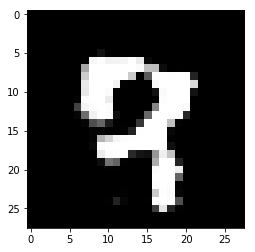

Loop: 230100, Generator_loss: 0.011797, Discriminator_loss: 0.0039769
Loop: 230200, Generator_loss: -0.017714, Discriminator_loss: 0.0075456
Loop: 230300, Generator_loss: 0.027683, Discriminator_loss: -0.00069669
Loop: 230400, Generator_loss: -0.059812, Discriminator_loss: 0.0066731
Loop: 230500, Generator_loss: 0.01314, Discriminator_loss: 0.0089294
Loop: 230600, Generator_loss: -0.026295, Discriminator_loss: 0.0026252
Loop: 230700, Generator_loss: 0.00070859, Discriminator_loss: 0.0068857
Loop: 230800, Generator_loss: -0.029174, Discriminator_loss: 0.0063643
Loop: 230900, Generator_loss: 0.034815, Discriminator_loss: 0.0086933
Loop: 231000, Generator_loss: -0.020054, Discriminator_loss: 0.0029687


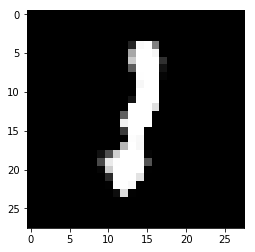

Loop: 231100, Generator_loss: 0.01471, Discriminator_loss: 0.0039282
Loop: 231200, Generator_loss: -0.011576, Discriminator_loss: 0.0060669
Loop: 231300, Generator_loss: -0.002625, Discriminator_loss: 0.0023433
Loop: 231400, Generator_loss: -0.053691, Discriminator_loss: 0.0016495
Loop: 231500, Generator_loss: -0.015007, Discriminator_loss: 0.0047182
Loop: 231600, Generator_loss: 0.0018635, Discriminator_loss: 0.0045474
Loop: 231700, Generator_loss: -0.0013536, Discriminator_loss: 0.0031567
Loop: 231800, Generator_loss: -0.017249, Discriminator_loss: 0.0010415
Loop: 231900, Generator_loss: -0.022246, Discriminator_loss: 0.0065905
Loop: 232000, Generator_loss: -0.013755, Discriminator_loss: -0.0049872


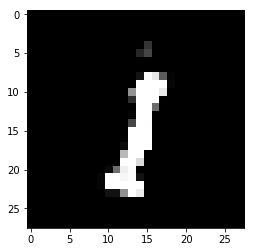

Loop: 232100, Generator_loss: -0.023352, Discriminator_loss: 0.004482
Loop: 232200, Generator_loss: -0.00072587, Discriminator_loss: 0.0038121
Loop: 232300, Generator_loss: 0.0033397, Discriminator_loss: 0.0096945
Loop: 232400, Generator_loss: 0.014971, Discriminator_loss: 0.010649
Loop: 232500, Generator_loss: -0.026604, Discriminator_loss: 0.0033651
Loop: 232600, Generator_loss: -0.012288, Discriminator_loss: 0.0037157
Loop: 232700, Generator_loss: -0.054862, Discriminator_loss: 0.0019355
Loop: 232800, Generator_loss: 0.0040469, Discriminator_loss: 0.0066564
Loop: 232900, Generator_loss: -0.03812, Discriminator_loss: 0.001347
Loop: 233000, Generator_loss: -0.055163, Discriminator_loss: 0.0037309


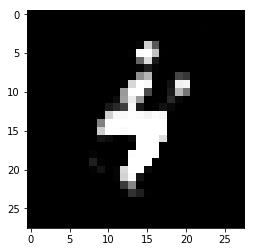

Loop: 233100, Generator_loss: -0.049164, Discriminator_loss: 0.0041711
Loop: 233200, Generator_loss: 0.0010309, Discriminator_loss: 0.0074786
Loop: 233300, Generator_loss: -0.028822, Discriminator_loss: 0.0098016
Loop: 233400, Generator_loss: -0.003499, Discriminator_loss: 0.0088187
Loop: 233500, Generator_loss: -0.023794, Discriminator_loss: 0.012295
Loop: 233600, Generator_loss: -0.00069048, Discriminator_loss: 2.9207e-05
Loop: 233700, Generator_loss: -0.031472, Discriminator_loss: 0.0031024
Loop: 233800, Generator_loss: 0.0070251, Discriminator_loss: 0.0042706
Loop: 233900, Generator_loss: 0.027376, Discriminator_loss: 0.0069315
Loop: 234000, Generator_loss: -0.039534, Discriminator_loss: 0.0037966


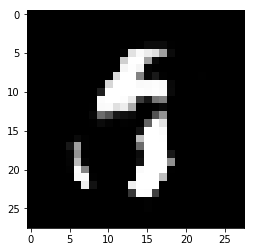

Loop: 234100, Generator_loss: -0.032339, Discriminator_loss: -0.00010877
Loop: 234200, Generator_loss: 0.00042621, Discriminator_loss: 0.00068751
Loop: 234300, Generator_loss: 0.024512, Discriminator_loss: -0.0047793
Loop: 234400, Generator_loss: -0.021894, Discriminator_loss: 0.0049992
Loop: 234500, Generator_loss: -0.020573, Discriminator_loss: 0.0046806
Loop: 234600, Generator_loss: 0.012272, Discriminator_loss: 0.0092868
Loop: 234700, Generator_loss: -0.052508, Discriminator_loss: 0.0050413
Loop: 234800, Generator_loss: -0.021911, Discriminator_loss: 0.00099828
Loop: 234900, Generator_loss: -0.015779, Discriminator_loss: 0.0098769
Loop: 235000, Generator_loss: 0.0074263, Discriminator_loss: 0.0079476


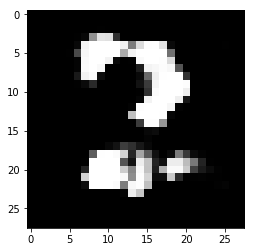

Loop: 235100, Generator_loss: -0.0018343, Discriminator_loss: 8.3345e-05
Loop: 235200, Generator_loss: -0.005957, Discriminator_loss: 0.00013619
Loop: 235300, Generator_loss: 0.0058654, Discriminator_loss: 0.0036867
Loop: 235400, Generator_loss: -0.036757, Discriminator_loss: 0.0035631
Loop: 235500, Generator_loss: -0.019321, Discriminator_loss: 0.0066555
Loop: 235600, Generator_loss: -0.033898, Discriminator_loss: -0.00062158
Loop: 235700, Generator_loss: 0.0039367, Discriminator_loss: -0.00029578
Loop: 235800, Generator_loss: -0.0067401, Discriminator_loss: 0.00044243
Loop: 235900, Generator_loss: 0.0033923, Discriminator_loss: 0.016059
Loop: 236000, Generator_loss: -0.0085488, Discriminator_loss: 0.00069395


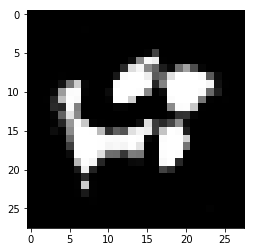

Loop: 236100, Generator_loss: -0.017951, Discriminator_loss: 0.0010892
Loop: 236200, Generator_loss: -0.030217, Discriminator_loss: 0.0021647
Loop: 236300, Generator_loss: -0.0030807, Discriminator_loss: 0.002192
Loop: 236400, Generator_loss: -0.00090185, Discriminator_loss: 0.0094939
Loop: 236500, Generator_loss: -0.022153, Discriminator_loss: 0.0036449
Loop: 236600, Generator_loss: 0.0024042, Discriminator_loss: -5.4367e-05
Loop: 236700, Generator_loss: 0.014548, Discriminator_loss: -0.0024487
Loop: 236800, Generator_loss: 0.016351, Discriminator_loss: 0.00078293
Loop: 236900, Generator_loss: -0.00044037, Discriminator_loss: 0.010644
Loop: 237000, Generator_loss: -0.012068, Discriminator_loss: 0.00053689


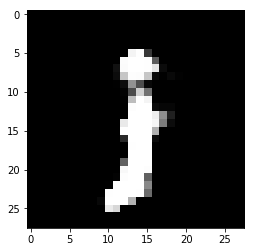

Loop: 237100, Generator_loss: 0.020391, Discriminator_loss: 0.0057416
Loop: 237200, Generator_loss: -0.0061361, Discriminator_loss: 0.0027442
Loop: 237300, Generator_loss: -0.0086519, Discriminator_loss: 0.0041742
Loop: 237400, Generator_loss: -0.043512, Discriminator_loss: 0.007708
Loop: 237500, Generator_loss: -0.027474, Discriminator_loss: 0.0055955
Loop: 237600, Generator_loss: -0.029525, Discriminator_loss: 0.0031032
Loop: 237700, Generator_loss: -0.0060961, Discriminator_loss: 0.0081862
Loop: 237800, Generator_loss: 0.010781, Discriminator_loss: 0.0014255
Loop: 237900, Generator_loss: -0.010037, Discriminator_loss: 0.0052408
Loop: 238000, Generator_loss: -0.00023131, Discriminator_loss: 0.0047131


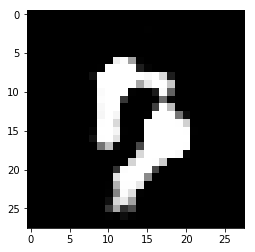

Loop: 238100, Generator_loss: 0.034317, Discriminator_loss: 0.0026608
Loop: 238200, Generator_loss: -0.0019947, Discriminator_loss: 0.0035851
Loop: 238300, Generator_loss: 0.022384, Discriminator_loss: 0.0090037
Loop: 238400, Generator_loss: -0.023973, Discriminator_loss: 0.0056722
Loop: 238500, Generator_loss: -0.038938, Discriminator_loss: 0.0073103
Loop: 238600, Generator_loss: 0.035255, Discriminator_loss: -0.0056747
Loop: 238700, Generator_loss: 0.0063234, Discriminator_loss: 0.00052225
Loop: 238800, Generator_loss: -0.048823, Discriminator_loss: 0.0058927
Loop: 238900, Generator_loss: -0.027171, Discriminator_loss: 0.0039303
Loop: 239000, Generator_loss: -0.019285, Discriminator_loss: 0.0017098


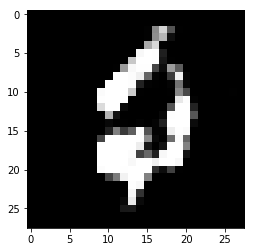

Loop: 239100, Generator_loss: -0.016767, Discriminator_loss: 0.0067043
Loop: 239200, Generator_loss: -0.016755, Discriminator_loss: 0.0058015
Loop: 239300, Generator_loss: -0.037489, Discriminator_loss: 0.0017404
Loop: 239400, Generator_loss: 0.0042749, Discriminator_loss: -0.0011234
Loop: 239500, Generator_loss: 0.013942, Discriminator_loss: 0.00296
Loop: 239600, Generator_loss: -0.044835, Discriminator_loss: -0.0034932
Loop: 239700, Generator_loss: -0.0086159, Discriminator_loss: 0.0021975
Loop: 239800, Generator_loss: -0.046933, Discriminator_loss: 0.0045474
Loop: 239900, Generator_loss: -0.0014538, Discriminator_loss: 0.0028067
Loop: 240000, Generator_loss: 0.042259, Discriminator_loss: 0.01004


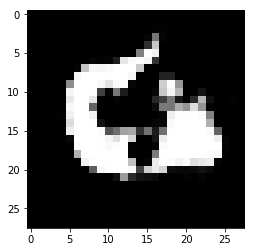

Loop: 240100, Generator_loss: -0.0021273, Discriminator_loss: 0.0078038
Loop: 240200, Generator_loss: -0.0019764, Discriminator_loss: 0.0042834
Loop: 240300, Generator_loss: -0.028391, Discriminator_loss: 0.0068012
Loop: 240400, Generator_loss: -0.044698, Discriminator_loss: 0.0062524
Loop: 240500, Generator_loss: 0.011675, Discriminator_loss: 0.0045648
Loop: 240600, Generator_loss: 0.010946, Discriminator_loss: 0.0075291
Loop: 240700, Generator_loss: -0.0020694, Discriminator_loss: 0.0045388
Loop: 240800, Generator_loss: 0.014198, Discriminator_loss: 0.00049509
Loop: 240900, Generator_loss: -0.002817, Discriminator_loss: 0.010504
Loop: 241000, Generator_loss: 0.041459, Discriminator_loss: 0.0038528


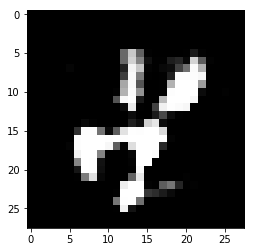

Loop: 241100, Generator_loss: -0.023424, Discriminator_loss: -0.0086197
Loop: 241200, Generator_loss: -0.024067, Discriminator_loss: 0.003389
Loop: 241300, Generator_loss: -0.01013, Discriminator_loss: 0.0023419
Loop: 241400, Generator_loss: -0.0046214, Discriminator_loss: 0.0016938
Loop: 241500, Generator_loss: -0.025593, Discriminator_loss: -0.002973
Loop: 241600, Generator_loss: -0.032845, Discriminator_loss: 0.0038145
Loop: 241700, Generator_loss: 0.022293, Discriminator_loss: 0.004288
Loop: 241800, Generator_loss: -0.013055, Discriminator_loss: 0.006602
Loop: 241900, Generator_loss: 0.0056381, Discriminator_loss: 0.0040565
Loop: 242000, Generator_loss: -0.026469, Discriminator_loss: 0.013353


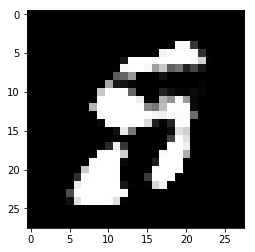

Loop: 242100, Generator_loss: 0.0035366, Discriminator_loss: 0.0055539
Loop: 242200, Generator_loss: -0.027104, Discriminator_loss: 0.007432
Loop: 242300, Generator_loss: -0.019144, Discriminator_loss: 0.0039027
Loop: 242400, Generator_loss: -0.0022085, Discriminator_loss: 0.0062918
Loop: 242500, Generator_loss: -0.0041583, Discriminator_loss: 0.0062805
Loop: 242600, Generator_loss: -0.027575, Discriminator_loss: 0.0027182
Loop: 242700, Generator_loss: 0.002192, Discriminator_loss: 0.0080857
Loop: 242800, Generator_loss: -0.033923, Discriminator_loss: -0.00025951
Loop: 242900, Generator_loss: -0.004772, Discriminator_loss: -0.0038362
Loop: 243000, Generator_loss: -0.015607, Discriminator_loss: 0.0039838


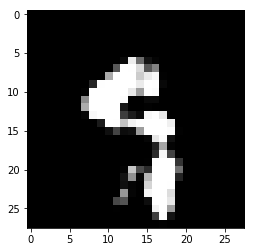

Loop: 243100, Generator_loss: 0.021734, Discriminator_loss: 0.0018237
Loop: 243200, Generator_loss: 0.019254, Discriminator_loss: 0.010659
Loop: 243300, Generator_loss: -0.032561, Discriminator_loss: 0.0035076
Loop: 243400, Generator_loss: -0.038912, Discriminator_loss: 0.0039809
Loop: 243500, Generator_loss: 0.01614, Discriminator_loss: 0.0053738
Loop: 243600, Generator_loss: -0.031964, Discriminator_loss: 0.0023304
Loop: 243700, Generator_loss: -0.020988, Discriminator_loss: 0.0083414
Loop: 243800, Generator_loss: -0.023037, Discriminator_loss: 0.0055355
Loop: 243900, Generator_loss: -0.0074977, Discriminator_loss: -0.0015032
Loop: 244000, Generator_loss: -0.015898, Discriminator_loss: 0.0030722


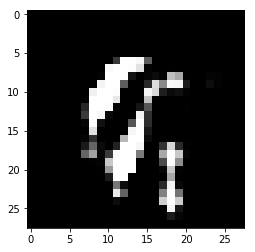

Loop: 244100, Generator_loss: 0.020663, Discriminator_loss: -0.00037943
Loop: 244200, Generator_loss: -0.055881, Discriminator_loss: 0.014552
Loop: 244300, Generator_loss: 0.013451, Discriminator_loss: -0.0026002
Loop: 244400, Generator_loss: -0.019908, Discriminator_loss: -0.00068814
Loop: 244500, Generator_loss: -0.031924, Discriminator_loss: 0.010572
Loop: 244600, Generator_loss: -0.016034, Discriminator_loss: 0.0063936
Loop: 244700, Generator_loss: -0.019275, Discriminator_loss: -0.0014117
Loop: 244800, Generator_loss: 0.018939, Discriminator_loss: 0.0033718
Loop: 244900, Generator_loss: -0.012326, Discriminator_loss: 0.0038475
Loop: 245000, Generator_loss: -0.0016291, Discriminator_loss: 0.0043929


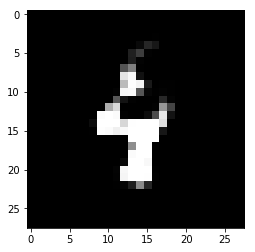

Loop: 245100, Generator_loss: 0.0035987, Discriminator_loss: -0.0023044
Loop: 245200, Generator_loss: -0.01169, Discriminator_loss: 0.0013536
Loop: 245300, Generator_loss: -0.00080454, Discriminator_loss: 0.0058539
Loop: 245400, Generator_loss: -0.041234, Discriminator_loss: 0.015874
Loop: 245500, Generator_loss: -0.016678, Discriminator_loss: -0.0053793
Loop: 245600, Generator_loss: -0.046349, Discriminator_loss: 0.00067771
Loop: 245700, Generator_loss: -0.0056246, Discriminator_loss: -0.0011948
Loop: 245800, Generator_loss: -0.016362, Discriminator_loss: 0.0035519
Loop: 245900, Generator_loss: 0.017038, Discriminator_loss: -0.00030323
Loop: 246000, Generator_loss: 0.0019095, Discriminator_loss: 0.0072551


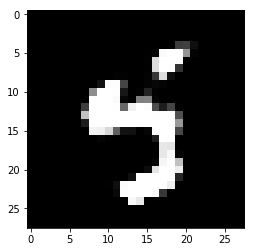

Loop: 246100, Generator_loss: -0.015031, Discriminator_loss: 0.0043354
Loop: 246200, Generator_loss: -0.021397, Discriminator_loss: 0.0072252
Loop: 246300, Generator_loss: 0.054522, Discriminator_loss: 0.02068
Loop: 246400, Generator_loss: -0.027266, Discriminator_loss: 0.0063525
Loop: 246500, Generator_loss: -0.043829, Discriminator_loss: -0.0012162
Loop: 246600, Generator_loss: 0.010516, Discriminator_loss: 0.0029846
Loop: 246700, Generator_loss: -0.011121, Discriminator_loss: 0.0038514
Loop: 246800, Generator_loss: 0.023889, Discriminator_loss: -0.0020937
Loop: 246900, Generator_loss: -0.023308, Discriminator_loss: -0.00048287
Loop: 247000, Generator_loss: 0.013132, Discriminator_loss: 0.0015016


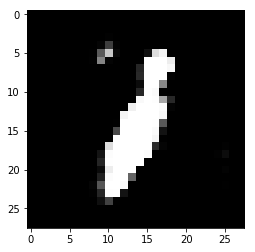

Loop: 247100, Generator_loss: -0.03097, Discriminator_loss: 0.0038394
Loop: 247200, Generator_loss: -0.0097935, Discriminator_loss: 0.0012471
Loop: 247300, Generator_loss: -0.0030387, Discriminator_loss: 0.0020774
Loop: 247400, Generator_loss: 0.00092647, Discriminator_loss: 0.0040683
Loop: 247500, Generator_loss: 0.013735, Discriminator_loss: 0.0029033
Loop: 247600, Generator_loss: 0.0050163, Discriminator_loss: 0.0064025
Loop: 247700, Generator_loss: 0.019773, Discriminator_loss: 0.011267
Loop: 247800, Generator_loss: 0.012112, Discriminator_loss: 0.0071124
Loop: 247900, Generator_loss: -0.034988, Discriminator_loss: 0.0019129
Loop: 248000, Generator_loss: 0.026808, Discriminator_loss: 0.001401


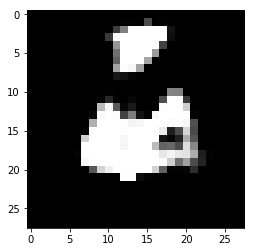

Loop: 248100, Generator_loss: 0.016154, Discriminator_loss: 0.0056404
Loop: 248200, Generator_loss: -0.031596, Discriminator_loss: 0.00075461
Loop: 248300, Generator_loss: 0.020277, Discriminator_loss: -0.0032414
Loop: 248400, Generator_loss: 0.057421, Discriminator_loss: 0.006795
Loop: 248500, Generator_loss: -0.0057164, Discriminator_loss: 0.0015803
Loop: 248600, Generator_loss: 0.0052013, Discriminator_loss: 0.0038958
Loop: 248700, Generator_loss: -0.015852, Discriminator_loss: 0.0025871
Loop: 248800, Generator_loss: -0.034407, Discriminator_loss: 0.0083078
Loop: 248900, Generator_loss: -0.0099614, Discriminator_loss: 0.0055729
Loop: 249000, Generator_loss: -0.0085274, Discriminator_loss: 0.0065872


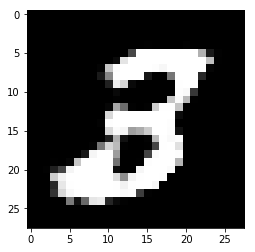

Loop: 249100, Generator_loss: 0.0060935, Discriminator_loss: 0.0056986
Loop: 249200, Generator_loss: -0.0065811, Discriminator_loss: -0.0033166
Loop: 249300, Generator_loss: -0.043008, Discriminator_loss: 0.0035534
Loop: 249400, Generator_loss: 0.0068182, Discriminator_loss: 0.0037186
Loop: 249500, Generator_loss: 0.014391, Discriminator_loss: 0.010723
Loop: 249600, Generator_loss: 0.02257, Discriminator_loss: 0.0030258
Loop: 249700, Generator_loss: -0.0087718, Discriminator_loss: 0.004584
Loop: 249800, Generator_loss: -0.0073184, Discriminator_loss: 0.0010563
Loop: 249900, Generator_loss: 0.0011317, Discriminator_loss: 0.00074764
Loop: 250000, Generator_loss: -0.01939, Discriminator_loss: 0.0069735


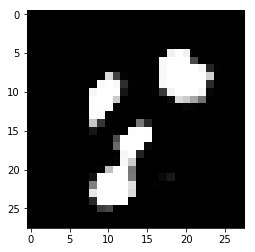

Loop: 250100, Generator_loss: -0.008093, Discriminator_loss: 0.00891
Loop: 250200, Generator_loss: -0.044205, Discriminator_loss: 0.0094342
Loop: 250300, Generator_loss: -0.053348, Discriminator_loss: 0.0089959
Loop: 250400, Generator_loss: -0.0012088, Discriminator_loss: -0.0043605
Loop: 250500, Generator_loss: -0.019118, Discriminator_loss: -0.0001641
Loop: 250600, Generator_loss: -0.038984, Discriminator_loss: 0.0080925
Loop: 250700, Generator_loss: 0.010332, Discriminator_loss: 0.00099801
Loop: 250800, Generator_loss: 0.007126, Discriminator_loss: 0.004811
Loop: 250900, Generator_loss: 0.0014235, Discriminator_loss: 0.0070172
Loop: 251000, Generator_loss: -0.018224, Discriminator_loss: 0.0021427


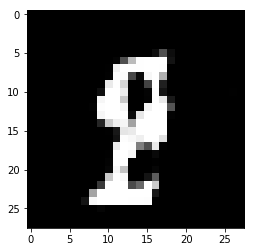

Loop: 251100, Generator_loss: 0.025699, Discriminator_loss: 0.0037719
Loop: 251200, Generator_loss: 0.010816, Discriminator_loss: 0.007936
Loop: 251300, Generator_loss: -0.0082558, Discriminator_loss: 0.0061515
Loop: 251400, Generator_loss: -0.0022041, Discriminator_loss: -0.0024849
Loop: 251500, Generator_loss: -0.019735, Discriminator_loss: 0.001316
Loop: 251600, Generator_loss: 0.0065943, Discriminator_loss: 0.0083644
Loop: 251700, Generator_loss: 0.0035991, Discriminator_loss: 0.0050727
Loop: 251800, Generator_loss: 0.0029529, Discriminator_loss: 0.00061196
Loop: 251900, Generator_loss: 0.017635, Discriminator_loss: 0.0059903
Loop: 252000, Generator_loss: 0.034888, Discriminator_loss: -0.0029114


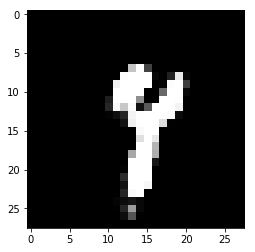

Loop: 252100, Generator_loss: 0.018299, Discriminator_loss: 0.0073168
Loop: 252200, Generator_loss: 0.03979, Discriminator_loss: -0.00025402
Loop: 252300, Generator_loss: -0.048245, Discriminator_loss: 0.0095905
Loop: 252400, Generator_loss: 0.028748, Discriminator_loss: 0.0071764
Loop: 252500, Generator_loss: 0.020554, Discriminator_loss: 0.003998
Loop: 252600, Generator_loss: -0.025836, Discriminator_loss: 0.0088535
Loop: 252700, Generator_loss: -0.044551, Discriminator_loss: -0.0013155
Loop: 252800, Generator_loss: -0.031446, Discriminator_loss: 0.0067202
Loop: 252900, Generator_loss: -0.020712, Discriminator_loss: 0.0066494
Loop: 253000, Generator_loss: 0.00019935, Discriminator_loss: 0.0093949


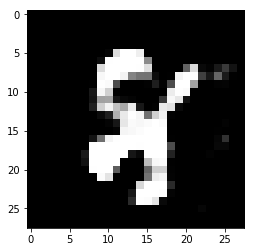

Loop: 253100, Generator_loss: -0.043406, Discriminator_loss: 0.0017333
Loop: 253200, Generator_loss: -0.015213, Discriminator_loss: 0.0033221
Loop: 253300, Generator_loss: 0.013416, Discriminator_loss: -0.0028233
Loop: 253400, Generator_loss: -0.035767, Discriminator_loss: 0.0013743
Loop: 253500, Generator_loss: -0.0015836, Discriminator_loss: 0.0092224
Loop: 253600, Generator_loss: -0.0072211, Discriminator_loss: 0.0008869
Loop: 253700, Generator_loss: -0.030098, Discriminator_loss: 0.0054131
Loop: 253800, Generator_loss: -0.0055082, Discriminator_loss: 0.0042451
Loop: 253900, Generator_loss: 0.020732, Discriminator_loss: 0.0026427
Loop: 254000, Generator_loss: -0.0013221, Discriminator_loss: 0.0022892


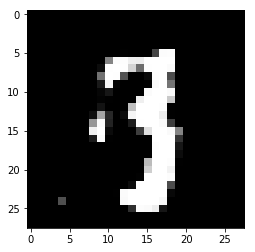

Loop: 254100, Generator_loss: 0.0035176, Discriminator_loss: 0.0053386
Loop: 254200, Generator_loss: -0.021523, Discriminator_loss: 0.0061335
Loop: 254300, Generator_loss: 0.0050484, Discriminator_loss: 0.0031495
Loop: 254400, Generator_loss: -0.024066, Discriminator_loss: 0.0074022
Loop: 254500, Generator_loss: -0.027097, Discriminator_loss: 0.00094897
Loop: 254600, Generator_loss: -0.041015, Discriminator_loss: 0.00321
Loop: 254700, Generator_loss: 0.011177, Discriminator_loss: 0.0029012
Loop: 254800, Generator_loss: 0.0083723, Discriminator_loss: 0.0062568
Loop: 254900, Generator_loss: -0.037761, Discriminator_loss: 0.0046122
Loop: 255000, Generator_loss: -0.016925, Discriminator_loss: 0.0007038


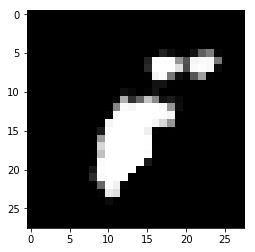

Loop: 255100, Generator_loss: -0.013139, Discriminator_loss: 0.0029331
Loop: 255200, Generator_loss: -0.041299, Discriminator_loss: -0.0030379
Loop: 255300, Generator_loss: 0.036394, Discriminator_loss: -0.0075489
Loop: 255400, Generator_loss: -0.011535, Discriminator_loss: 0.0020601
Loop: 255500, Generator_loss: -0.016537, Discriminator_loss: 0.0073777
Loop: 255600, Generator_loss: -0.053174, Discriminator_loss: 0.0031272
Loop: 255700, Generator_loss: -0.051345, Discriminator_loss: 0.009685
Loop: 255800, Generator_loss: 0.011978, Discriminator_loss: -0.0065427
Loop: 255900, Generator_loss: -0.029196, Discriminator_loss: 0.0013928
Loop: 256000, Generator_loss: 0.0085969, Discriminator_loss: 0.0020718


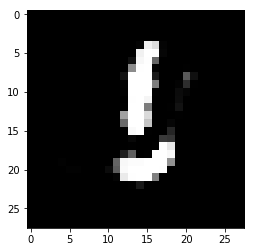

Loop: 256100, Generator_loss: -0.0017295, Discriminator_loss: 0.0056978
Loop: 256200, Generator_loss: -0.02923, Discriminator_loss: 0.00034597
Loop: 256300, Generator_loss: -0.013934, Discriminator_loss: 0.0076453
Loop: 256400, Generator_loss: -0.0032681, Discriminator_loss: 6.7182e-05
Loop: 256500, Generator_loss: -0.038438, Discriminator_loss: -0.0021015
Loop: 256600, Generator_loss: -0.024884, Discriminator_loss: 0.0056631
Loop: 256700, Generator_loss: -0.017936, Discriminator_loss: -0.0035712
Loop: 256800, Generator_loss: 0.019404, Discriminator_loss: -0.0046048
Loop: 256900, Generator_loss: -0.040505, Discriminator_loss: 0.0016013
Loop: 257000, Generator_loss: -0.051544, Discriminator_loss: 0.0017942


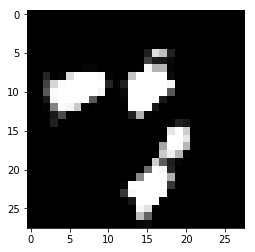

Loop: 257100, Generator_loss: -0.0046949, Discriminator_loss: 0.0030417
Loop: 257200, Generator_loss: -0.042222, Discriminator_loss: 0.0052177
Loop: 257300, Generator_loss: 0.0027297, Discriminator_loss: 0.0074891
Loop: 257400, Generator_loss: -0.0056795, Discriminator_loss: 0.0026178
Loop: 257500, Generator_loss: 0.018185, Discriminator_loss: 0.0069149
Loop: 257600, Generator_loss: 0.0113, Discriminator_loss: 0.0055382
Loop: 257700, Generator_loss: -0.012152, Discriminator_loss: 0.0051438
Loop: 257800, Generator_loss: -0.021653, Discriminator_loss: 0.0063257
Loop: 257900, Generator_loss: 0.012475, Discriminator_loss: 0.0085378
Loop: 258000, Generator_loss: -0.0036586, Discriminator_loss: 0.0047333


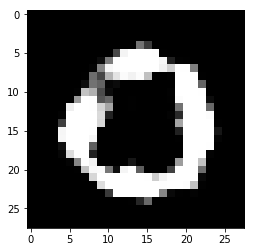

Loop: 258100, Generator_loss: -0.036428, Discriminator_loss: 0.0063051
Loop: 258200, Generator_loss: -0.028541, Discriminator_loss: 0.006091
Loop: 258300, Generator_loss: -0.02036, Discriminator_loss: 0.0023988
Loop: 258400, Generator_loss: 0.0021543, Discriminator_loss: 0.0045638
Loop: 258500, Generator_loss: -0.051447, Discriminator_loss: 0.00020393
Loop: 258600, Generator_loss: -0.039186, Discriminator_loss: 0.0087655
Loop: 258700, Generator_loss: -0.0079002, Discriminator_loss: 0.0052589
Loop: 258800, Generator_loss: -0.0023936, Discriminator_loss: -0.00026607
Loop: 258900, Generator_loss: 0.0065948, Discriminator_loss: 0.0035828
Loop: 259000, Generator_loss: 0.010547, Discriminator_loss: 0.0093709


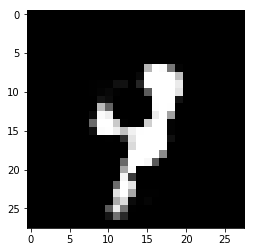

Loop: 259100, Generator_loss: 0.024071, Discriminator_loss: 0.0021642
Loop: 259200, Generator_loss: -0.024553, Discriminator_loss: 0.005488
Loop: 259300, Generator_loss: -0.019991, Discriminator_loss: 0.0033211
Loop: 259400, Generator_loss: -0.051465, Discriminator_loss: 0.0066878
Loop: 259500, Generator_loss: 0.024011, Discriminator_loss: -0.002127
Loop: 259600, Generator_loss: -0.0076378, Discriminator_loss: 0.0082194
Loop: 259700, Generator_loss: 0.015762, Discriminator_loss: 0.0051971
Loop: 259800, Generator_loss: -0.0047909, Discriminator_loss: 0.0096526
Loop: 259900, Generator_loss: -0.0066123, Discriminator_loss: -0.00045766
Loop: 260000, Generator_loss: -0.027894, Discriminator_loss: 0.0039528


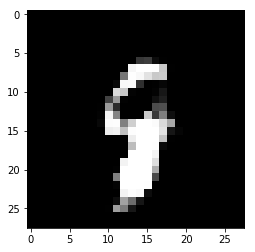

Loop: 260100, Generator_loss: -0.056416, Discriminator_loss: 0.0044216
Loop: 260200, Generator_loss: 0.0016147, Discriminator_loss: 0.0068826
Loop: 260300, Generator_loss: -0.044971, Discriminator_loss: 0.0038726
Loop: 260400, Generator_loss: -0.019281, Discriminator_loss: 0.0040795
Loop: 260500, Generator_loss: -0.032566, Discriminator_loss: 0.0093834
Loop: 260600, Generator_loss: -0.038732, Discriminator_loss: 0.0079294
Loop: 260700, Generator_loss: -0.042283, Discriminator_loss: 0.0097511
Loop: 260800, Generator_loss: -0.042779, Discriminator_loss: 0.0065179
Loop: 260900, Generator_loss: -0.016047, Discriminator_loss: 0.005506
Loop: 261000, Generator_loss: 0.053394, Discriminator_loss: -0.0037499


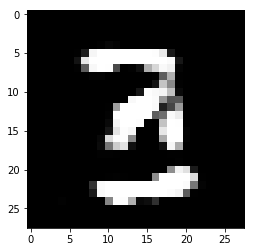

Loop: 261100, Generator_loss: 0.020474, Discriminator_loss: 0.0043315
Loop: 261200, Generator_loss: -0.04502, Discriminator_loss: 0.00066808
Loop: 261300, Generator_loss: -0.027013, Discriminator_loss: 0.0058229
Loop: 261400, Generator_loss: 0.0044162, Discriminator_loss: 0.00253
Loop: 261500, Generator_loss: 0.02129, Discriminator_loss: 0.0064382
Loop: 261600, Generator_loss: 0.001757, Discriminator_loss: 0.005094
Loop: 261700, Generator_loss: 0.015888, Discriminator_loss: 0.0059335
Loop: 261800, Generator_loss: 0.00013836, Discriminator_loss: 0.0045816
Loop: 261900, Generator_loss: -0.031285, Discriminator_loss: 0.0025168
Loop: 262000, Generator_loss: -0.02354, Discriminator_loss: 0.0054356


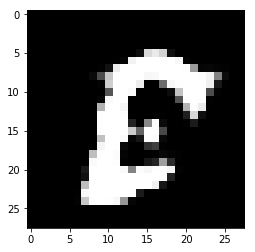

Loop: 262100, Generator_loss: -0.0049528, Discriminator_loss: 0.0038687
Loop: 262200, Generator_loss: 0.014608, Discriminator_loss: 0.0014457
Loop: 262300, Generator_loss: -0.0098661, Discriminator_loss: 0.0039641
Loop: 262400, Generator_loss: 0.01046, Discriminator_loss: 0.0058323
Loop: 262500, Generator_loss: -0.015961, Discriminator_loss: 0.0070639
Loop: 262600, Generator_loss: -0.031112, Discriminator_loss: 0.0044118
Loop: 262700, Generator_loss: -0.0090599, Discriminator_loss: 0.0047834
Loop: 262800, Generator_loss: -0.04162, Discriminator_loss: 0.00061029
Loop: 262900, Generator_loss: -0.017274, Discriminator_loss: 0.0074565
Loop: 263000, Generator_loss: -0.028784, Discriminator_loss: 0.0022804


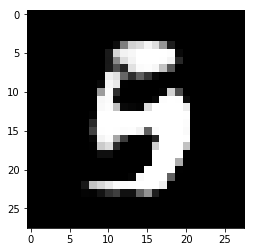

Loop: 263100, Generator_loss: -0.0018859, Discriminator_loss: 0.0071279
Loop: 263200, Generator_loss: -0.032964, Discriminator_loss: 0.010788
Loop: 263300, Generator_loss: -0.0077509, Discriminator_loss: 0.011544
Loop: 263400, Generator_loss: 0.018547, Discriminator_loss: 0.0053422
Loop: 263500, Generator_loss: 0.0012733, Discriminator_loss: 0.00063148
Loop: 263600, Generator_loss: -0.04584, Discriminator_loss: 0.0032064
Loop: 263700, Generator_loss: -0.015387, Discriminator_loss: 0.0043626
Loop: 263800, Generator_loss: -0.01625, Discriminator_loss: -0.0012143
Loop: 263900, Generator_loss: -0.017195, Discriminator_loss: 0.0064083
Loop: 264000, Generator_loss: 0.0087737, Discriminator_loss: 0.0026471


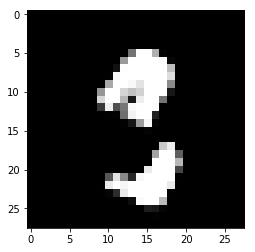

Loop: 264100, Generator_loss: -0.013036, Discriminator_loss: 0.0026014
Loop: 264200, Generator_loss: -0.011056, Discriminator_loss: 0.0072333
Loop: 264300, Generator_loss: -0.022389, Discriminator_loss: 0.0044251
Loop: 264400, Generator_loss: -0.037481, Discriminator_loss: 0.0030919
Loop: 264500, Generator_loss: 0.03085, Discriminator_loss: 0.0055955
Loop: 264600, Generator_loss: -0.012504, Discriminator_loss: 0.0029167
Loop: 264700, Generator_loss: -0.054932, Discriminator_loss: 0.012288
Loop: 264800, Generator_loss: 0.015638, Discriminator_loss: -0.00056197
Loop: 264900, Generator_loss: 0.0034523, Discriminator_loss: 0.012716
Loop: 265000, Generator_loss: -0.019333, Discriminator_loss: 0.0010403


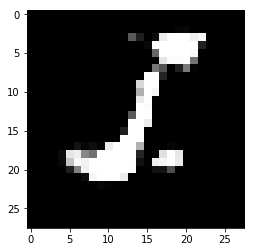

Loop: 265100, Generator_loss: 0.0091675, Discriminator_loss: 0.0045245
Loop: 265200, Generator_loss: -0.0036357, Discriminator_loss: -0.0011262
Loop: 265300, Generator_loss: -0.0015398, Discriminator_loss: 9.0291e-05
Loop: 265400, Generator_loss: -0.016145, Discriminator_loss: 0.0062732
Loop: 265500, Generator_loss: -0.0026154, Discriminator_loss: 0.0035521
Loop: 265600, Generator_loss: -0.00019, Discriminator_loss: -0.00028189
Loop: 265700, Generator_loss: 0.021318, Discriminator_loss: 0.012499
Loop: 265800, Generator_loss: 0.0011134, Discriminator_loss: 0.0023612
Loop: 265900, Generator_loss: -0.016605, Discriminator_loss: 0.0059208
Loop: 266000, Generator_loss: 0.0037236, Discriminator_loss: 0.0035429


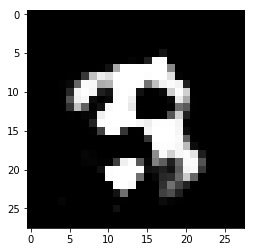

Loop: 266100, Generator_loss: -0.0025036, Discriminator_loss: -0.0027982
Loop: 266200, Generator_loss: -0.01905, Discriminator_loss: 0.00093669
Loop: 266300, Generator_loss: 0.01245, Discriminator_loss: 0.010291
Loop: 266400, Generator_loss: 0.016145, Discriminator_loss: 0.0038203
Loop: 266500, Generator_loss: 0.02185, Discriminator_loss: -0.0002653
Loop: 266600, Generator_loss: -0.010184, Discriminator_loss: 0.0024562
Loop: 266700, Generator_loss: -0.044562, Discriminator_loss: 0.0083747
Loop: 266800, Generator_loss: -0.00050455, Discriminator_loss: 0.0097666
Loop: 266900, Generator_loss: -0.0034171, Discriminator_loss: -0.004683
Loop: 267000, Generator_loss: 0.00017433, Discriminator_loss: -0.00077244


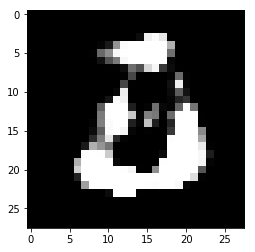

Loop: 267100, Generator_loss: 0.025786, Discriminator_loss: 0.0077981
Loop: 267200, Generator_loss: -0.00023924, Discriminator_loss: 0.0014979
Loop: 267300, Generator_loss: 0.0044196, Discriminator_loss: 0.0030701
Loop: 267400, Generator_loss: 0.036777, Discriminator_loss: 0.017356
Loop: 267500, Generator_loss: -0.002709, Discriminator_loss: -0.00044976
Loop: 267600, Generator_loss: -0.026234, Discriminator_loss: 0.0053152
Loop: 267700, Generator_loss: -0.015214, Discriminator_loss: 0.0070407
Loop: 267800, Generator_loss: -0.0041413, Discriminator_loss: 0.0034838
Loop: 267900, Generator_loss: 0.015476, Discriminator_loss: 0.0070335
Loop: 268000, Generator_loss: -0.016343, Discriminator_loss: 0.0021616


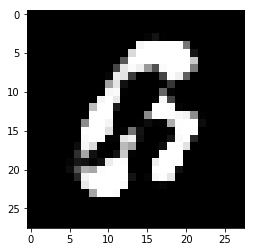

Loop: 268100, Generator_loss: 0.0045891, Discriminator_loss: 0.0043874
Loop: 268200, Generator_loss: -0.030059, Discriminator_loss: 0.010358
Loop: 268300, Generator_loss: -0.04617, Discriminator_loss: 0.00033054
Loop: 268400, Generator_loss: -0.0049996, Discriminator_loss: 0.012486
Loop: 268500, Generator_loss: 0.023993, Discriminator_loss: 0.012021
Loop: 268600, Generator_loss: 0.0066303, Discriminator_loss: 0.0030461
Loop: 268700, Generator_loss: -0.023037, Discriminator_loss: 0.0038792
Loop: 268800, Generator_loss: 0.0011286, Discriminator_loss: 0.0026785
Loop: 268900, Generator_loss: -0.0044035, Discriminator_loss: 0.003518
Loop: 269000, Generator_loss: -0.0045145, Discriminator_loss: 0.0086503


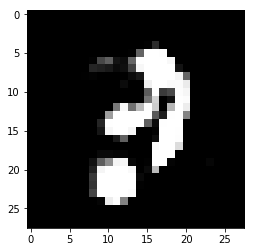

Loop: 269100, Generator_loss: -0.03119, Discriminator_loss: 0.0026677
Loop: 269200, Generator_loss: -0.033847, Discriminator_loss: 0.013095
Loop: 269300, Generator_loss: 0.0091407, Discriminator_loss: 0.0049937
Loop: 269400, Generator_loss: -0.019592, Discriminator_loss: 0.0023754
Loop: 269500, Generator_loss: -0.00689, Discriminator_loss: -0.0045692
Loop: 269600, Generator_loss: 0.043144, Discriminator_loss: 0.0065111
Loop: 269700, Generator_loss: 0.031534, Discriminator_loss: 0.0025133
Loop: 269800, Generator_loss: -0.014905, Discriminator_loss: 0.0023045
Loop: 269900, Generator_loss: 0.039686, Discriminator_loss: -0.0039003
Loop: 270000, Generator_loss: 0.0080376, Discriminator_loss: 0.00069193


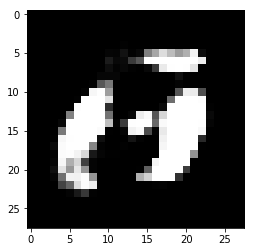

Loop: 270100, Generator_loss: -0.0040108, Discriminator_loss: 0.004707
Loop: 270200, Generator_loss: -0.008896, Discriminator_loss: 0.0044607
Loop: 270300, Generator_loss: -0.040804, Discriminator_loss: -0.00028823
Loop: 270400, Generator_loss: -0.0049471, Discriminator_loss: 0.0022189
Loop: 270500, Generator_loss: -0.0064556, Discriminator_loss: 0.0054474
Loop: 270600, Generator_loss: -0.0028035, Discriminator_loss: 0.0073704
Loop: 270700, Generator_loss: 0.00088096, Discriminator_loss: -0.00080096
Loop: 270800, Generator_loss: 0.043709, Discriminator_loss: 0.0027001
Loop: 270900, Generator_loss: 0.040438, Discriminator_loss: 0.0062765
Loop: 271000, Generator_loss: -0.009332, Discriminator_loss: 0.0041053


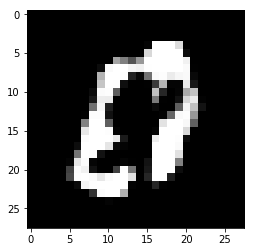

Loop: 271100, Generator_loss: 0.049981, Discriminator_loss: 0.0052274
Loop: 271200, Generator_loss: 0.001326, Discriminator_loss: 0.0033295
Loop: 271300, Generator_loss: -0.015634, Discriminator_loss: 0.005273
Loop: 271400, Generator_loss: -0.0083728, Discriminator_loss: 0.0002925
Loop: 271500, Generator_loss: -0.029999, Discriminator_loss: 0.0026257
Loop: 271600, Generator_loss: 0.0092899, Discriminator_loss: 0.0096709
Loop: 271700, Generator_loss: -0.019668, Discriminator_loss: 0.0068497
Loop: 271800, Generator_loss: 0.0051471, Discriminator_loss: 0.0017331
Loop: 271900, Generator_loss: 0.022452, Discriminator_loss: 0.0033592
Loop: 272000, Generator_loss: -0.0090284, Discriminator_loss: -0.0020453


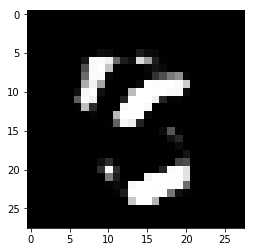

Loop: 272100, Generator_loss: -0.0098884, Discriminator_loss: 0.0049978
Loop: 272200, Generator_loss: 0.032368, Discriminator_loss: -8.3782e-05
Loop: 272300, Generator_loss: 0.0099558, Discriminator_loss: 0.010611
Loop: 272400, Generator_loss: 0.011507, Discriminator_loss: 0.0067549
Loop: 272500, Generator_loss: 0.032013, Discriminator_loss: 0.0036086
Loop: 272600, Generator_loss: 0.037055, Discriminator_loss: 0.0086808
Loop: 272700, Generator_loss: -0.012693, Discriminator_loss: 0.00027281
Loop: 272800, Generator_loss: 0.011998, Discriminator_loss: 0.0092285
Loop: 272900, Generator_loss: 0.014348, Discriminator_loss: 0.0076909
Loop: 273000, Generator_loss: -0.0046795, Discriminator_loss: 0.009378


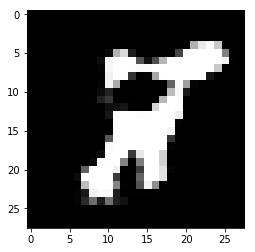

Loop: 273100, Generator_loss: -0.028809, Discriminator_loss: 0.0030236
Loop: 273200, Generator_loss: 0.037696, Discriminator_loss: 0.0018125
Loop: 273300, Generator_loss: 0.041464, Discriminator_loss: 0.0093509
Loop: 273400, Generator_loss: -0.048221, Discriminator_loss: 0.0070027
Loop: 273500, Generator_loss: 0.00089502, Discriminator_loss: 0.0097345
Loop: 273600, Generator_loss: 0.0069372, Discriminator_loss: 0.0057245
Loop: 273700, Generator_loss: 0.037175, Discriminator_loss: 0.0022756
Loop: 273800, Generator_loss: -0.015603, Discriminator_loss: 0.0049264
Loop: 273900, Generator_loss: -0.021977, Discriminator_loss: 0.0033604
Loop: 274000, Generator_loss: -0.020051, Discriminator_loss: 0.0065069


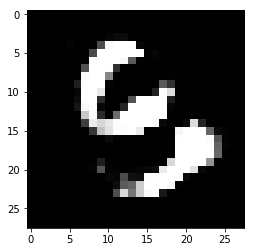

Loop: 274100, Generator_loss: -0.010848, Discriminator_loss: 0.0054789
Loop: 274200, Generator_loss: -0.0067924, Discriminator_loss: 0.0050898
Loop: 274300, Generator_loss: 0.038024, Discriminator_loss: 0.011869
Loop: 274400, Generator_loss: 0.040828, Discriminator_loss: 0.0027736
Loop: 274500, Generator_loss: -0.015175, Discriminator_loss: 0.0030002
Loop: 274600, Generator_loss: -0.0038272, Discriminator_loss: 0.0050689
Loop: 274700, Generator_loss: -0.0061527, Discriminator_loss: 0.00082474
Loop: 274800, Generator_loss: -0.01483, Discriminator_loss: 0.0034378
Loop: 274900, Generator_loss: -0.03337, Discriminator_loss: 0.0055016
Loop: 275000, Generator_loss: -0.013149, Discriminator_loss: 0.0056935


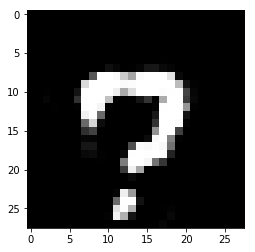

Loop: 275100, Generator_loss: 0.024292, Discriminator_loss: 0.0043421
Loop: 275200, Generator_loss: -0.0069676, Discriminator_loss: -0.0018319
Loop: 275300, Generator_loss: 0.015669, Discriminator_loss: 0.0044436
Loop: 275400, Generator_loss: -0.047927, Discriminator_loss: 0.010399
Loop: 275500, Generator_loss: -0.010369, Discriminator_loss: 0.0046153
Loop: 275600, Generator_loss: -0.032359, Discriminator_loss: 0.0048792
Loop: 275700, Generator_loss: -0.016732, Discriminator_loss: 0.002621
Loop: 275800, Generator_loss: -0.00047753, Discriminator_loss: 0.0049848
Loop: 275900, Generator_loss: 0.010496, Discriminator_loss: 0.0028452
Loop: 276000, Generator_loss: -0.011211, Discriminator_loss: 0.00048788


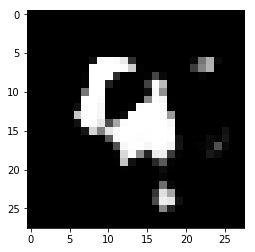

Loop: 276100, Generator_loss: -0.011319, Discriminator_loss: 0.0048987
Loop: 276200, Generator_loss: -0.028745, Discriminator_loss: 0.010179
Loop: 276300, Generator_loss: -0.013129, Discriminator_loss: 0.0056736
Loop: 276400, Generator_loss: -0.018538, Discriminator_loss: 0.0033679
Loop: 276500, Generator_loss: -0.03156, Discriminator_loss: 0.0010517
Loop: 276600, Generator_loss: -0.021618, Discriminator_loss: -0.0033179
Loop: 276700, Generator_loss: -0.015779, Discriminator_loss: 0.0036007
Loop: 276800, Generator_loss: -0.0059215, Discriminator_loss: 0.0014892
Loop: 276900, Generator_loss: 0.0045056, Discriminator_loss: 0.0054787
Loop: 277000, Generator_loss: 0.012885, Discriminator_loss: 0.0067231


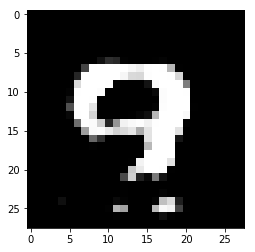

Loop: 277100, Generator_loss: 0.011147, Discriminator_loss: 0.00019788
Loop: 277200, Generator_loss: -0.019546, Discriminator_loss: 0.0015308
Loop: 277300, Generator_loss: -0.023185, Discriminator_loss: 0.0066361
Loop: 277400, Generator_loss: -0.026526, Discriminator_loss: 0.0075163
Loop: 277500, Generator_loss: 0.016244, Discriminator_loss: 0.0019418
Loop: 277600, Generator_loss: -0.017811, Discriminator_loss: -0.00077114
Loop: 277700, Generator_loss: 0.0015015, Discriminator_loss: 0.0010648
Loop: 277800, Generator_loss: -0.043219, Discriminator_loss: 0.0033209
Loop: 277900, Generator_loss: -0.0068777, Discriminator_loss: -0.00022804
Loop: 278000, Generator_loss: -0.0046384, Discriminator_loss: 0.0027791


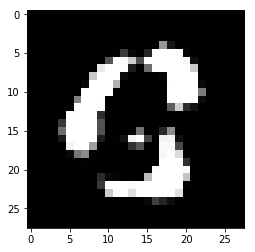

Loop: 278100, Generator_loss: -0.02437, Discriminator_loss: 0.002446
Loop: 278200, Generator_loss: -0.034708, Discriminator_loss: 0.0061565
Loop: 278300, Generator_loss: -0.027627, Discriminator_loss: 0.003696
Loop: 278400, Generator_loss: 0.02808, Discriminator_loss: 0.014225
Loop: 278500, Generator_loss: -0.028503, Discriminator_loss: 0.0049351
Loop: 278600, Generator_loss: -0.019205, Discriminator_loss: -0.00021889
Loop: 278700, Generator_loss: -0.049518, Discriminator_loss: 0.0020228
Loop: 278800, Generator_loss: -0.0091388, Discriminator_loss: 0.0032793
Loop: 278900, Generator_loss: -0.029053, Discriminator_loss: 0.0048135
Loop: 279000, Generator_loss: -0.027628, Discriminator_loss: 0.0040158


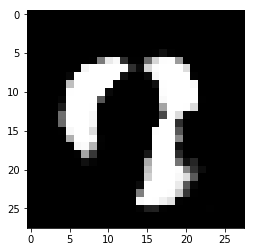

Loop: 279100, Generator_loss: -0.0192, Discriminator_loss: 0.0055183
Loop: 279200, Generator_loss: -0.057893, Discriminator_loss: -0.0033456
Loop: 279300, Generator_loss: 0.014206, Discriminator_loss: -0.0022034
Loop: 279400, Generator_loss: 0.0080168, Discriminator_loss: 0.0012212
Loop: 279500, Generator_loss: 0.036819, Discriminator_loss: 0.0028033
Loop: 279600, Generator_loss: -0.028829, Discriminator_loss: 0.0061842
Loop: 279700, Generator_loss: -0.05254, Discriminator_loss: 0.0065229
Loop: 279800, Generator_loss: -0.048593, Discriminator_loss: 0.0076368
Loop: 279900, Generator_loss: -0.021505, Discriminator_loss: 0.0084967
Loop: 280000, Generator_loss: 0.015966, Discriminator_loss: 0.0039499


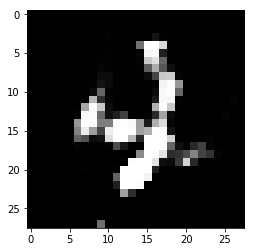

Loop: 280100, Generator_loss: -0.020576, Discriminator_loss: -0.00063098
Loop: 280200, Generator_loss: 0.02956, Discriminator_loss: 0.0061191
Loop: 280300, Generator_loss: -0.023017, Discriminator_loss: 0.0015942
Loop: 280400, Generator_loss: 0.033349, Discriminator_loss: 0.0012285
Loop: 280500, Generator_loss: 0.036924, Discriminator_loss: 0.0043816
Loop: 280600, Generator_loss: 0.022041, Discriminator_loss: -0.00044151
Loop: 280700, Generator_loss: 0.017807, Discriminator_loss: 0.0073625
Loop: 280800, Generator_loss: 0.062932, Discriminator_loss: 0.0078002
Loop: 280900, Generator_loss: -0.0133, Discriminator_loss: 0.0065264
Loop: 281000, Generator_loss: -0.025611, Discriminator_loss: 0.0075378


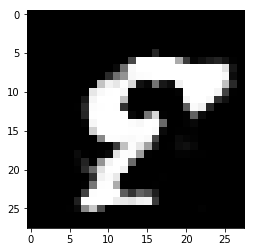

Loop: 281100, Generator_loss: -0.02689, Discriminator_loss: 0.0066194
Loop: 281200, Generator_loss: -0.0046927, Discriminator_loss: 0.0018314
Loop: 281300, Generator_loss: -0.021763, Discriminator_loss: 0.00056619
Loop: 281400, Generator_loss: -0.0327, Discriminator_loss: 0.00087181
Loop: 281500, Generator_loss: 0.037358, Discriminator_loss: 0.0090755
Loop: 281600, Generator_loss: 0.015401, Discriminator_loss: 0.0024296
Loop: 281700, Generator_loss: -0.0030266, Discriminator_loss: 0.0041925
Loop: 281800, Generator_loss: -0.0058115, Discriminator_loss: 0.0016631
Loop: 281900, Generator_loss: 0.018977, Discriminator_loss: 0.0062235
Loop: 282000, Generator_loss: 0.010326, Discriminator_loss: -0.006718


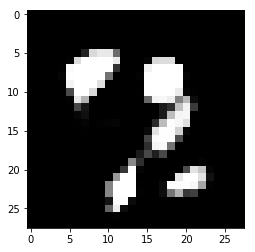

Loop: 282100, Generator_loss: 0.00034115, Discriminator_loss: 0.0049733
Loop: 282200, Generator_loss: 0.016936, Discriminator_loss: 0.0059045
Loop: 282300, Generator_loss: -0.044098, Discriminator_loss: 0.005696
Loop: 282400, Generator_loss: -0.04751, Discriminator_loss: 0.0072978
Loop: 282500, Generator_loss: -0.02824, Discriminator_loss: 0.0065717
Loop: 282600, Generator_loss: -0.021541, Discriminator_loss: 0.0045838
Loop: 282700, Generator_loss: -0.0091175, Discriminator_loss: 0.00078109
Loop: 282800, Generator_loss: 0.0039451, Discriminator_loss: 0.00034265
Loop: 282900, Generator_loss: -0.072113, Discriminator_loss: 0.0056907
Loop: 283000, Generator_loss: -0.013064, Discriminator_loss: 0.0081491


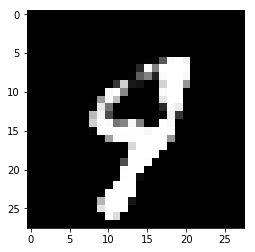

Loop: 283100, Generator_loss: 0.0077156, Discriminator_loss: 0.0013984
Loop: 283200, Generator_loss: -0.0074567, Discriminator_loss: 0.0024142
Loop: 283300, Generator_loss: -0.036847, Discriminator_loss: 0.005961
Loop: 283400, Generator_loss: -0.0076545, Discriminator_loss: 0.0074014
Loop: 283500, Generator_loss: 0.027027, Discriminator_loss: 0.0046466
Loop: 283600, Generator_loss: -0.017385, Discriminator_loss: 0.0042976
Loop: 283700, Generator_loss: -0.044365, Discriminator_loss: 0.0084801
Loop: 283800, Generator_loss: -0.023517, Discriminator_loss: 0.00061538
Loop: 283900, Generator_loss: -0.034309, Discriminator_loss: 0.00332
Loop: 284000, Generator_loss: -0.010411, Discriminator_loss: 0.0060387


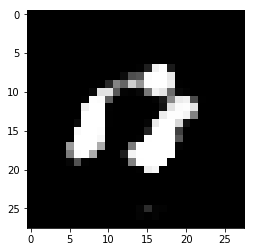

Loop: 284100, Generator_loss: -0.0011728, Discriminator_loss: 0.010394
Loop: 284200, Generator_loss: -0.03496, Discriminator_loss: 0.0017436
Loop: 284300, Generator_loss: 0.002066, Discriminator_loss: 0.0034644
Loop: 284400, Generator_loss: -0.031625, Discriminator_loss: 0.0046295
Loop: 284500, Generator_loss: 0.040127, Discriminator_loss: 0.010807
Loop: 284600, Generator_loss: -0.027623, Discriminator_loss: 0.0027138
Loop: 284700, Generator_loss: 0.052724, Discriminator_loss: 0.0063518
Loop: 284800, Generator_loss: 0.010483, Discriminator_loss: -0.000683
Loop: 284900, Generator_loss: 0.0031988, Discriminator_loss: 0.0046791
Loop: 285000, Generator_loss: -0.030375, Discriminator_loss: 0.0044715


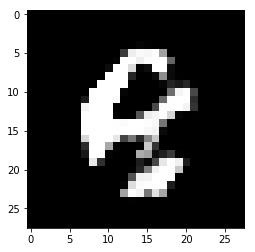

Loop: 285100, Generator_loss: -0.0021199, Discriminator_loss: 0.0047056
Loop: 285200, Generator_loss: -0.0028943, Discriminator_loss: 0.0088012
Loop: 285300, Generator_loss: -0.005121, Discriminator_loss: 0.0021754
Loop: 285400, Generator_loss: -0.013611, Discriminator_loss: 0.0033044
Loop: 285500, Generator_loss: -0.033983, Discriminator_loss: -0.0012247
Loop: 285600, Generator_loss: 0.008892, Discriminator_loss: 0.002338
Loop: 285700, Generator_loss: -0.060334, Discriminator_loss: 0.0013968
Loop: 285800, Generator_loss: -0.011504, Discriminator_loss: 0.0048761
Loop: 285900, Generator_loss: -0.0029936, Discriminator_loss: 0.003832
Loop: 286000, Generator_loss: -0.01031, Discriminator_loss: 0.0080223


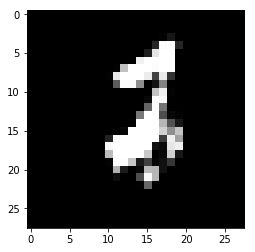

Loop: 286100, Generator_loss: 0.017811, Discriminator_loss: 0.009059
Loop: 286200, Generator_loss: 0.039085, Discriminator_loss: 0.0039088
Loop: 286300, Generator_loss: 0.0068409, Discriminator_loss: 0.010345
Loop: 286400, Generator_loss: -0.012362, Discriminator_loss: 0.0054053
Loop: 286500, Generator_loss: -0.042737, Discriminator_loss: 0.0084858
Loop: 286600, Generator_loss: -0.020077, Discriminator_loss: 0.0035159
Loop: 286700, Generator_loss: 0.0043203, Discriminator_loss: 0.0014276
Loop: 286800, Generator_loss: 8.9846e-05, Discriminator_loss: 0.0068454
Loop: 286900, Generator_loss: 0.029704, Discriminator_loss: 0.0038087
Loop: 287000, Generator_loss: -0.026144, Discriminator_loss: 0.0081655


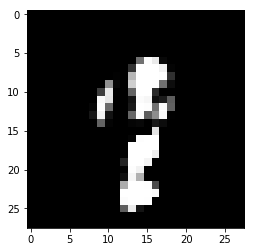

Loop: 287100, Generator_loss: -0.052804, Discriminator_loss: 0.0040768
Loop: 287200, Generator_loss: -0.0061762, Discriminator_loss: 0.0045912
Loop: 287300, Generator_loss: -0.026648, Discriminator_loss: -0.0022961
Loop: 287400, Generator_loss: -0.031496, Discriminator_loss: 0.0032096
Loop: 287500, Generator_loss: -0.0031329, Discriminator_loss: 0.0047341
Loop: 287600, Generator_loss: -0.062253, Discriminator_loss: 0.0099323
Loop: 287700, Generator_loss: 0.012884, Discriminator_loss: -0.0013184
Loop: 287800, Generator_loss: 0.035991, Discriminator_loss: 0.0039217
Loop: 287900, Generator_loss: -0.014403, Discriminator_loss: 0.0037335
Loop: 288000, Generator_loss: 0.0075233, Discriminator_loss: 0.0038897


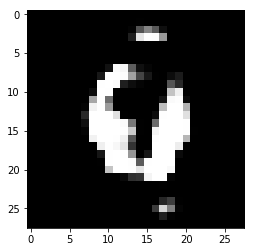

Loop: 288100, Generator_loss: -0.018213, Discriminator_loss: 0.0058624
Loop: 288200, Generator_loss: -0.021259, Discriminator_loss: 0.0050143
Loop: 288300, Generator_loss: -0.013094, Discriminator_loss: 0.0069265
Loop: 288400, Generator_loss: -0.0098717, Discriminator_loss: 0.0016138
Loop: 288500, Generator_loss: 0.077578, Discriminator_loss: 0.0070903
Loop: 288600, Generator_loss: -0.0066323, Discriminator_loss: 0.0050948
Loop: 288700, Generator_loss: -0.012098, Discriminator_loss: 0.0054446
Loop: 288800, Generator_loss: -0.016656, Discriminator_loss: 0.0044591
Loop: 288900, Generator_loss: 0.0048977, Discriminator_loss: 0.0020842
Loop: 289000, Generator_loss: -0.011868, Discriminator_loss: -0.0020397


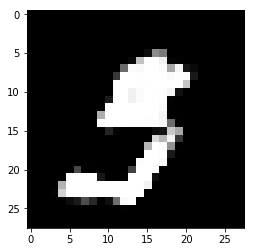

Loop: 289100, Generator_loss: 0.051958, Discriminator_loss: -0.00050334
Loop: 289200, Generator_loss: 0.021143, Discriminator_loss: 0.0032581
Loop: 289300, Generator_loss: 0.0075061, Discriminator_loss: 0.00070624
Loop: 289400, Generator_loss: 0.0067132, Discriminator_loss: 0.0045759
Loop: 289500, Generator_loss: -0.014073, Discriminator_loss: 0.006421
Loop: 289600, Generator_loss: 0.027279, Discriminator_loss: 0.0078021
Loop: 289700, Generator_loss: 0.023257, Discriminator_loss: 0.00087344
Loop: 289800, Generator_loss: 0.062053, Discriminator_loss: 0.01617
Loop: 289900, Generator_loss: -0.0094242, Discriminator_loss: 0.0036771
Loop: 290000, Generator_loss: -0.011484, Discriminator_loss: 0.0050363


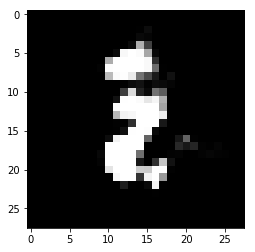

Loop: 290100, Generator_loss: 0.0043322, Discriminator_loss: 0.00015272
Loop: 290200, Generator_loss: 0.025591, Discriminator_loss: 0.0042469
Loop: 290300, Generator_loss: 0.0077418, Discriminator_loss: 0.0037712
Loop: 290400, Generator_loss: -0.0058255, Discriminator_loss: 0.0056476
Loop: 290500, Generator_loss: 0.011792, Discriminator_loss: 0.0015511
Loop: 290600, Generator_loss: -0.017639, Discriminator_loss: 0.01053
Loop: 290700, Generator_loss: -0.0014485, Discriminator_loss: 0.0081513
Loop: 290800, Generator_loss: -0.061074, Discriminator_loss: -0.0023362
Loop: 290900, Generator_loss: 0.020407, Discriminator_loss: 0.0062499
Loop: 291000, Generator_loss: -0.042369, Discriminator_loss: 0.0057414


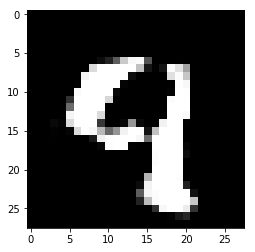

Loop: 291100, Generator_loss: -0.03528, Discriminator_loss: 0.0017939
Loop: 291200, Generator_loss: -0.064168, Discriminator_loss: 0.0088002
Loop: 291300, Generator_loss: 0.040682, Discriminator_loss: 0.0027654
Loop: 291400, Generator_loss: 0.025223, Discriminator_loss: 0.00061983
Loop: 291500, Generator_loss: -0.0092052, Discriminator_loss: 0.0046614
Loop: 291600, Generator_loss: 0.0024233, Discriminator_loss: 0.0089439
Loop: 291700, Generator_loss: 0.0058394, Discriminator_loss: -0.0011082
Loop: 291800, Generator_loss: -0.0053376, Discriminator_loss: 0.0056929
Loop: 291900, Generator_loss: -0.018519, Discriminator_loss: 0.0017613
Loop: 292000, Generator_loss: -0.012807, Discriminator_loss: 0.0010455


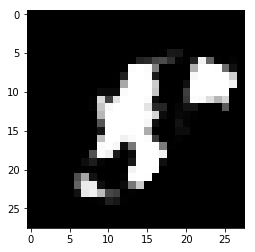

Loop: 292100, Generator_loss: 0.01336, Discriminator_loss: 0.0074101
Loop: 292200, Generator_loss: 0.017235, Discriminator_loss: 0.0049077
Loop: 292300, Generator_loss: -0.032115, Discriminator_loss: 0.0070745
Loop: 292400, Generator_loss: -0.014836, Discriminator_loss: 0.0038543
Loop: 292500, Generator_loss: 0.02633, Discriminator_loss: 0.0053734
Loop: 292600, Generator_loss: 0.0086363, Discriminator_loss: 0.0023048
Loop: 292700, Generator_loss: -0.010342, Discriminator_loss: 0.0038078
Loop: 292800, Generator_loss: 0.0086841, Discriminator_loss: -0.0017715
Loop: 292900, Generator_loss: 0.0041057, Discriminator_loss: 0.0065413
Loop: 293000, Generator_loss: 0.0099016, Discriminator_loss: 0.011989


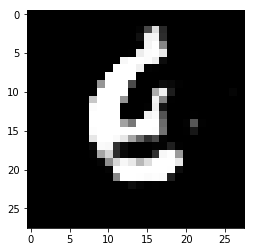

Loop: 293100, Generator_loss: -0.028245, Discriminator_loss: 3.8117e-05
Loop: 293200, Generator_loss: -0.013147, Discriminator_loss: 0.0035258
Loop: 293300, Generator_loss: -0.02587, Discriminator_loss: 0.0024341
Loop: 293400, Generator_loss: -0.014264, Discriminator_loss: 0.0036854
Loop: 293500, Generator_loss: -0.0018561, Discriminator_loss: 0.0023064
Loop: 293600, Generator_loss: -0.018665, Discriminator_loss: 0.0037148
Loop: 293700, Generator_loss: -0.014767, Discriminator_loss: 0.010509
Loop: 293800, Generator_loss: 0.024796, Discriminator_loss: 0.00099127
Loop: 293900, Generator_loss: -0.036827, Discriminator_loss: 0.00033988
Loop: 294000, Generator_loss: 0.010643, Discriminator_loss: 0.008602


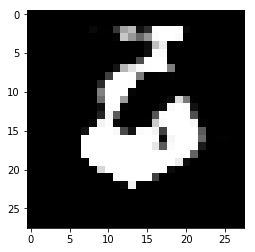

Loop: 294100, Generator_loss: -0.016617, Discriminator_loss: -1.7112e-05
Loop: 294200, Generator_loss: -0.014819, Discriminator_loss: -0.0015739
Loop: 294300, Generator_loss: -0.047084, Discriminator_loss: 0.0029289
Loop: 294400, Generator_loss: -0.036766, Discriminator_loss: 0.0084169
Loop: 294500, Generator_loss: 0.00071847, Discriminator_loss: 0.00033407
Loop: 294600, Generator_loss: 0.038221, Discriminator_loss: 0.011463
Loop: 294700, Generator_loss: 0.037159, Discriminator_loss: 0.0031824
Loop: 294800, Generator_loss: 0.049592, Discriminator_loss: 0.0079864
Loop: 294900, Generator_loss: 0.011174, Discriminator_loss: 0.0052466
Loop: 295000, Generator_loss: -0.011425, Discriminator_loss: 0.00055455


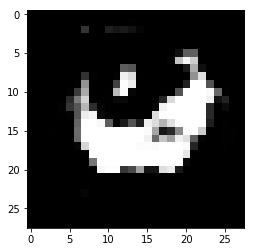

Loop: 295100, Generator_loss: -0.043736, Discriminator_loss: 0.004912
Loop: 295200, Generator_loss: 0.00050473, Discriminator_loss: 0.0028096
Loop: 295300, Generator_loss: -0.045617, Discriminator_loss: 0.0036635
Loop: 295400, Generator_loss: -0.04325, Discriminator_loss: 0.011655
Loop: 295500, Generator_loss: -0.020462, Discriminator_loss: 0.0020343
Loop: 295600, Generator_loss: -0.035997, Discriminator_loss: 0.0059547
Loop: 295700, Generator_loss: 0.011228, Discriminator_loss: 0.011481
Loop: 295800, Generator_loss: -6.9509e-05, Discriminator_loss: -0.0024311
Loop: 295900, Generator_loss: -0.041396, Discriminator_loss: 0.0060927
Loop: 296000, Generator_loss: -0.001453, Discriminator_loss: 0.0035868


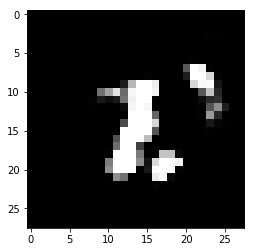

Loop: 296100, Generator_loss: -0.035792, Discriminator_loss: -0.0024262
Loop: 296200, Generator_loss: -0.027576, Discriminator_loss: 0.0021281
Loop: 296300, Generator_loss: -0.040803, Discriminator_loss: 0.0046009
Loop: 296400, Generator_loss: -0.025691, Discriminator_loss: 0.007683
Loop: 296500, Generator_loss: -0.0029912, Discriminator_loss: 0.0014323
Loop: 296600, Generator_loss: 0.02358, Discriminator_loss: 0.0037117
Loop: 296700, Generator_loss: -0.022013, Discriminator_loss: 0.0014195
Loop: 296800, Generator_loss: -0.043942, Discriminator_loss: 0.0095993
Loop: 296900, Generator_loss: -0.0253, Discriminator_loss: 0.0036322
Loop: 297000, Generator_loss: -0.020535, Discriminator_loss: 0.0053213


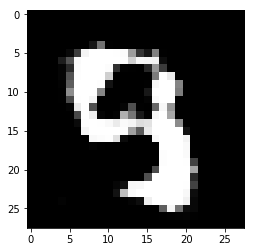

Loop: 297100, Generator_loss: -0.0053822, Discriminator_loss: 0.0090358
Loop: 297200, Generator_loss: -0.031875, Discriminator_loss: 0.0062609
Loop: 297300, Generator_loss: 0.018299, Discriminator_loss: 0.0081824
Loop: 297400, Generator_loss: 0.01968, Discriminator_loss: 0.005157
Loop: 297500, Generator_loss: -0.010742, Discriminator_loss: 0.0059585
Loop: 297600, Generator_loss: 0.028039, Discriminator_loss: 0.0015557
Loop: 297700, Generator_loss: 0.0074342, Discriminator_loss: 0.0068313
Loop: 297800, Generator_loss: -0.0042257, Discriminator_loss: 0.0057058
Loop: 297900, Generator_loss: -0.0056348, Discriminator_loss: 0.0020912
Loop: 298000, Generator_loss: -0.032719, Discriminator_loss: 0.0052826


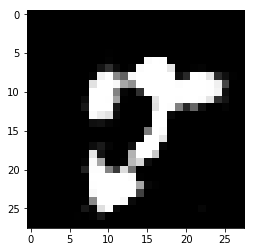

Loop: 298100, Generator_loss: -0.035544, Discriminator_loss: 0.0025814
Loop: 298200, Generator_loss: -0.02804, Discriminator_loss: 0.006951
Loop: 298300, Generator_loss: -0.061074, Discriminator_loss: -0.0089149
Loop: 298400, Generator_loss: -0.056159, Discriminator_loss: 0.0065895
Loop: 298500, Generator_loss: 0.011908, Discriminator_loss: 0.0080134
Loop: 298600, Generator_loss: 0.0066169, Discriminator_loss: 0.002452
Loop: 298700, Generator_loss: -0.021542, Discriminator_loss: 0.0094365
Loop: 298800, Generator_loss: -0.0049451, Discriminator_loss: 0.0013664
Loop: 298900, Generator_loss: -0.041232, Discriminator_loss: -0.00048119
Loop: 299000, Generator_loss: -0.0029125, Discriminator_loss: 0.0046353


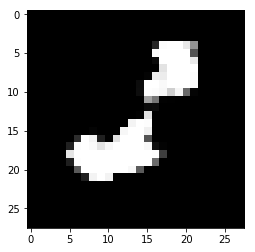

Loop: 299100, Generator_loss: -0.0086255, Discriminator_loss: -5.3393e-05
Loop: 299200, Generator_loss: 0.0067272, Discriminator_loss: -0.00075822
Loop: 299300, Generator_loss: 0.050733, Discriminator_loss: -0.0072091
Loop: 299400, Generator_loss: -0.02121, Discriminator_loss: 0.0099643
Loop: 299500, Generator_loss: -0.025749, Discriminator_loss: 0.0020249
Loop: 299600, Generator_loss: -0.032232, Discriminator_loss: 0.0064558
Loop: 299700, Generator_loss: -0.027052, Discriminator_loss: 0.0029373
Loop: 299800, Generator_loss: -0.030805, Discriminator_loss: 0.00088283
Loop: 299900, Generator_loss: -0.022747, Discriminator_loss: 0.0081022
Loop: 300000, Generator_loss: 0.0050753, Discriminator_loss: 0.0028264


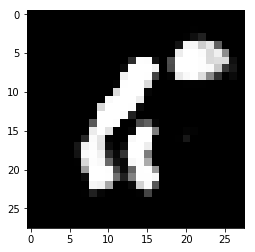

Loop: 300100, Generator_loss: 0.019374, Discriminator_loss: 0.005752
Loop: 300200, Generator_loss: -0.014788, Discriminator_loss: 0.0081704
Loop: 300300, Generator_loss: -0.022875, Discriminator_loss: -0.0034093
Loop: 300400, Generator_loss: -0.02443, Discriminator_loss: 0.00092652
Loop: 300500, Generator_loss: -0.0048733, Discriminator_loss: 0.0078769
Loop: 300600, Generator_loss: 0.0038827, Discriminator_loss: 0.0094939
Loop: 300700, Generator_loss: -0.0042369, Discriminator_loss: 0.0048344
Loop: 300800, Generator_loss: -0.053142, Discriminator_loss: 0.005488
Loop: 300900, Generator_loss: 0.0032213, Discriminator_loss: 0.003236
Loop: 301000, Generator_loss: -0.027607, Discriminator_loss: 0.0019867


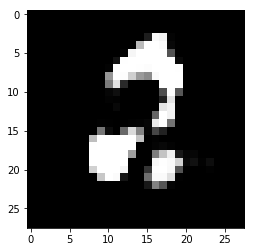

Loop: 301100, Generator_loss: 0.0063904, Discriminator_loss: 0.0030851
Loop: 301200, Generator_loss: 0.016964, Discriminator_loss: 0.004221
Loop: 301300, Generator_loss: -0.025332, Discriminator_loss: 0.0039002
Loop: 301400, Generator_loss: -0.020414, Discriminator_loss: 0.0018566
Loop: 301500, Generator_loss: 0.043004, Discriminator_loss: -0.0029868
Loop: 301600, Generator_loss: 0.031967, Discriminator_loss: 0.0045886
Loop: 301700, Generator_loss: -0.020366, Discriminator_loss: 0.0054248
Loop: 301800, Generator_loss: 0.02095, Discriminator_loss: -0.0010938
Loop: 301900, Generator_loss: -0.064153, Discriminator_loss: 0.0011929
Loop: 302000, Generator_loss: -0.0163, Discriminator_loss: 0.0037886


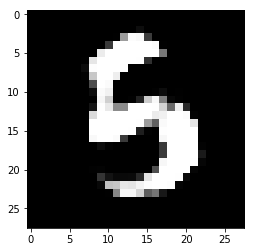

Loop: 302100, Generator_loss: 0.016735, Discriminator_loss: 0.0042796
Loop: 302200, Generator_loss: -0.012621, Discriminator_loss: 0.0032242
Loop: 302300, Generator_loss: -0.0018105, Discriminator_loss: -0.0026933
Loop: 302400, Generator_loss: 0.0029984, Discriminator_loss: 0.0014109
Loop: 302500, Generator_loss: -0.026652, Discriminator_loss: -0.0021648
Loop: 302600, Generator_loss: -0.014683, Discriminator_loss: 0.0032854
Loop: 302700, Generator_loss: 0.016927, Discriminator_loss: -0.0072862
Loop: 302800, Generator_loss: -0.003845, Discriminator_loss: 0.00053887
Loop: 302900, Generator_loss: 0.020154, Discriminator_loss: 0.009749
Loop: 303000, Generator_loss: -0.069192, Discriminator_loss: 0.0073743


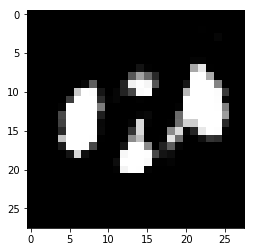

Loop: 303100, Generator_loss: -0.0042472, Discriminator_loss: -0.00068888
Loop: 303200, Generator_loss: 0.0029406, Discriminator_loss: 0.0052247
Loop: 303300, Generator_loss: 0.017435, Discriminator_loss: 0.0025156
Loop: 303400, Generator_loss: 0.04485, Discriminator_loss: -0.0055373
Loop: 303500, Generator_loss: 0.025892, Discriminator_loss: 1.966e-05
Loop: 303600, Generator_loss: 0.001411, Discriminator_loss: 0.0026556
Loop: 303700, Generator_loss: -0.038057, Discriminator_loss: 0.0024088
Loop: 303800, Generator_loss: -0.018495, Discriminator_loss: 0.0076444
Loop: 303900, Generator_loss: -0.043086, Discriminator_loss: 0.0023609
Loop: 304000, Generator_loss: -0.00046481, Discriminator_loss: 0.00083956


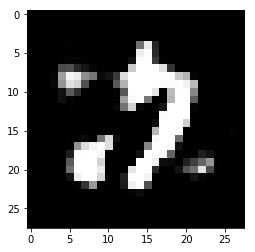

Loop: 304100, Generator_loss: -0.01419, Discriminator_loss: 0.0036035
Loop: 304200, Generator_loss: 0.033914, Discriminator_loss: 0.0096388
Loop: 304300, Generator_loss: 0.0188, Discriminator_loss: 0.010332
Loop: 304400, Generator_loss: -0.016041, Discriminator_loss: 0.0066536
Loop: 304500, Generator_loss: -0.019876, Discriminator_loss: 0.00060459
Loop: 304600, Generator_loss: -0.035171, Discriminator_loss: 0.0074581
Loop: 304700, Generator_loss: 0.053303, Discriminator_loss: 0.00094957
Loop: 304800, Generator_loss: 0.001115, Discriminator_loss: 0.0067249
Loop: 304900, Generator_loss: -0.0067758, Discriminator_loss: 0.0045979
Loop: 305000, Generator_loss: -0.0035606, Discriminator_loss: 0.0023197


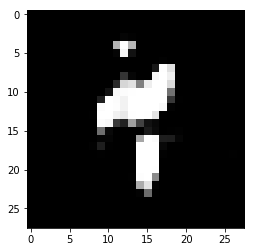

Loop: 305100, Generator_loss: -0.0039102, Discriminator_loss: 0.0050129
Loop: 305200, Generator_loss: -0.037091, Discriminator_loss: 0.0051434
Loop: 305300, Generator_loss: -0.032249, Discriminator_loss: 0.0066341
Loop: 305400, Generator_loss: 0.026208, Discriminator_loss: -0.0018552
Loop: 305500, Generator_loss: -0.023924, Discriminator_loss: 0.00010199
Loop: 305600, Generator_loss: -0.010472, Discriminator_loss: 0.0058722
Loop: 305700, Generator_loss: -0.038581, Discriminator_loss: 0.0063682
Loop: 305800, Generator_loss: -0.030572, Discriminator_loss: 0.0048056
Loop: 305900, Generator_loss: -0.025277, Discriminator_loss: 0.0034118
Loop: 306000, Generator_loss: 0.011229, Discriminator_loss: 0.007553


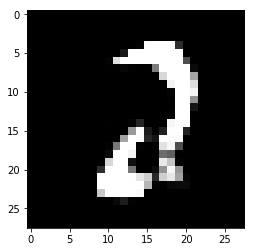

Loop: 306100, Generator_loss: 0.035485, Discriminator_loss: 0.0014001
Loop: 306200, Generator_loss: -0.010933, Discriminator_loss: 0.0014196
Loop: 306300, Generator_loss: -8.9813e-05, Discriminator_loss: 0.0031924
Loop: 306400, Generator_loss: -0.018527, Discriminator_loss: 0.0047946
Loop: 306500, Generator_loss: -0.0041825, Discriminator_loss: 0.0083752
Loop: 306600, Generator_loss: 0.011343, Discriminator_loss: 0.00551
Loop: 306700, Generator_loss: -0.013581, Discriminator_loss: 0.0095819
Loop: 306800, Generator_loss: -0.02197, Discriminator_loss: 0.0011711
Loop: 306900, Generator_loss: -0.073516, Discriminator_loss: 0.0042218
Loop: 307000, Generator_loss: -0.0090129, Discriminator_loss: 0.0042808


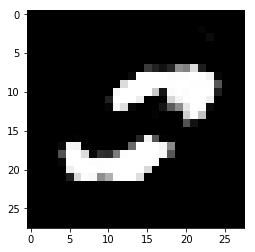

Loop: 307100, Generator_loss: 0.058646, Discriminator_loss: 0.004537
Loop: 307200, Generator_loss: -0.023559, Discriminator_loss: -0.0016217
Loop: 307300, Generator_loss: -0.041424, Discriminator_loss: 0.00043493
Loop: 307400, Generator_loss: 4.4099e-05, Discriminator_loss: -0.00034526
Loop: 307500, Generator_loss: 0.032437, Discriminator_loss: 0.0088632
Loop: 307600, Generator_loss: -0.028235, Discriminator_loss: 0.0039204
Loop: 307700, Generator_loss: 0.015756, Discriminator_loss: -0.0012064
Loop: 307800, Generator_loss: -0.02129, Discriminator_loss: 0.0024296
Loop: 307900, Generator_loss: -0.030725, Discriminator_loss: 0.0066242
Loop: 308000, Generator_loss: 0.0010005, Discriminator_loss: 0.0076526


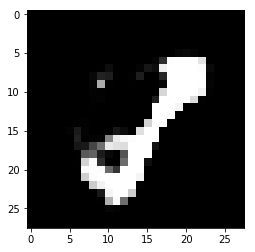

Loop: 308100, Generator_loss: 0.026903, Discriminator_loss: -0.0047135
Loop: 308200, Generator_loss: 0.015454, Discriminator_loss: 0.0026789
Loop: 308300, Generator_loss: 0.005859, Discriminator_loss: -0.0020664
Loop: 308400, Generator_loss: -0.033758, Discriminator_loss: -0.0052055
Loop: 308500, Generator_loss: 0.018643, Discriminator_loss: 0.0013148
Loop: 308600, Generator_loss: -0.026645, Discriminator_loss: 0.002542
Loop: 308700, Generator_loss: -0.001728, Discriminator_loss: 0.0070736
Loop: 308800, Generator_loss: -0.011067, Discriminator_loss: 0.0023848
Loop: 308900, Generator_loss: -0.016388, Discriminator_loss: 0.00052425
Loop: 309000, Generator_loss: -0.034326, Discriminator_loss: -0.0026628


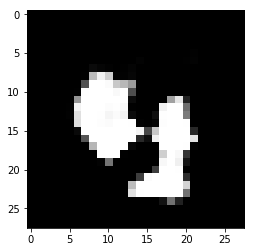

Loop: 309100, Generator_loss: -0.045952, Discriminator_loss: -0.0010092
Loop: 309200, Generator_loss: 0.029914, Discriminator_loss: 0.0015639
Loop: 309300, Generator_loss: 0.030434, Discriminator_loss: 0.0082396
Loop: 309400, Generator_loss: -0.0073231, Discriminator_loss: 0.0023351
Loop: 309500, Generator_loss: -0.026471, Discriminator_loss: 0.0087557
Loop: 309600, Generator_loss: 0.0036826, Discriminator_loss: 0.0034569
Loop: 309700, Generator_loss: 0.011384, Discriminator_loss: 0.0038018
Loop: 309800, Generator_loss: 0.017939, Discriminator_loss: -0.00095881
Loop: 309900, Generator_loss: 0.0092935, Discriminator_loss: 0.0014456
Loop: 310000, Generator_loss: 0.025685, Discriminator_loss: 0.0036391


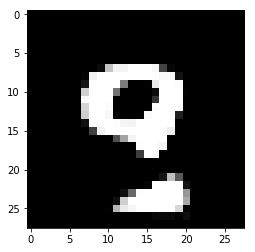

Loop: 310100, Generator_loss: 0.023186, Discriminator_loss: -0.0067681
Loop: 310200, Generator_loss: 0.0048995, Discriminator_loss: -0.0057207
Loop: 310300, Generator_loss: 0.00025155, Discriminator_loss: 0.00076356
Loop: 310400, Generator_loss: -0.028492, Discriminator_loss: 0.00016703
Loop: 310500, Generator_loss: -0.031206, Discriminator_loss: 0.00029568
Loop: 310600, Generator_loss: -0.057573, Discriminator_loss: 0.0091908
Loop: 310700, Generator_loss: -0.037424, Discriminator_loss: 0.0057191
Loop: 310800, Generator_loss: -0.068489, Discriminator_loss: -0.0095768
Loop: 310900, Generator_loss: -0.04278, Discriminator_loss: 0.0017811
Loop: 311000, Generator_loss: -0.01205, Discriminator_loss: 0.0057747


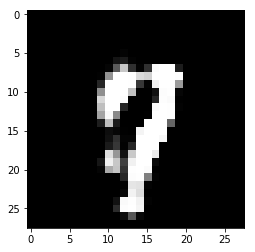

Loop: 311100, Generator_loss: -0.060943, Discriminator_loss: 0.005269
Loop: 311200, Generator_loss: -0.040893, Discriminator_loss: 0.0057023
Loop: 311300, Generator_loss: -0.018894, Discriminator_loss: 0.00070766
Loop: 311400, Generator_loss: -0.038166, Discriminator_loss: 0.0043552
Loop: 311500, Generator_loss: 0.018139, Discriminator_loss: -0.0041346
Loop: 311600, Generator_loss: 0.025151, Discriminator_loss: 0.0027956
Loop: 311700, Generator_loss: 0.065615, Discriminator_loss: 0.01379
Loop: 311800, Generator_loss: 0.011636, Discriminator_loss: 0.0067195
Loop: 311900, Generator_loss: -0.037151, Discriminator_loss: 0.007377
Loop: 312000, Generator_loss: -0.03063, Discriminator_loss: 0.0036


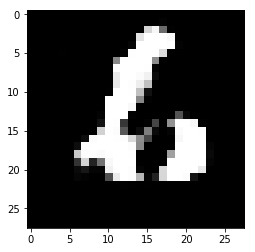

Loop: 312100, Generator_loss: -0.012323, Discriminator_loss: 0.00096089
Loop: 312200, Generator_loss: -0.035654, Discriminator_loss: 0.0039138
Loop: 312300, Generator_loss: 0.038708, Discriminator_loss: -0.0086413
Loop: 312400, Generator_loss: 0.0089547, Discriminator_loss: 0.0022417
Loop: 312500, Generator_loss: 0.0019945, Discriminator_loss: 0.0035299
Loop: 312600, Generator_loss: -0.030729, Discriminator_loss: 0.0051438
Loop: 312700, Generator_loss: 0.0092788, Discriminator_loss: 0.0085463
Loop: 312800, Generator_loss: 0.0035133, Discriminator_loss: 0.0036846
Loop: 312900, Generator_loss: 0.040639, Discriminator_loss: 0.0054358
Loop: 313000, Generator_loss: 0.043656, Discriminator_loss: 0.005197


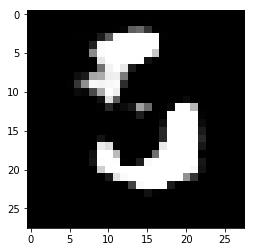

Loop: 313100, Generator_loss: 0.0079902, Discriminator_loss: 0.003294
Loop: 313200, Generator_loss: -0.010044, Discriminator_loss: 0.0034984
Loop: 313300, Generator_loss: -0.016843, Discriminator_loss: 0.0061552
Loop: 313400, Generator_loss: -0.011384, Discriminator_loss: 0.007069
Loop: 313500, Generator_loss: 0.023435, Discriminator_loss: 0.0057278
Loop: 313600, Generator_loss: -0.016076, Discriminator_loss: 0.0048362
Loop: 313700, Generator_loss: -0.030501, Discriminator_loss: -0.0015735
Loop: 313800, Generator_loss: -0.018169, Discriminator_loss: 0.0051214
Loop: 313900, Generator_loss: 0.0076072, Discriminator_loss: 0.010097
Loop: 314000, Generator_loss: -0.0029502, Discriminator_loss: -0.00059838


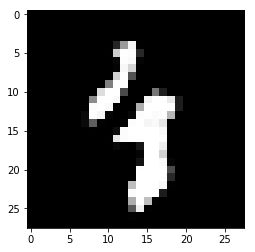

Loop: 314100, Generator_loss: 0.043646, Discriminator_loss: 0.0034989
Loop: 314200, Generator_loss: -0.023205, Discriminator_loss: 0.0016408
Loop: 314300, Generator_loss: 0.0088119, Discriminator_loss: 0.001222
Loop: 314400, Generator_loss: -0.023512, Discriminator_loss: 0.00082237
Loop: 314500, Generator_loss: 0.0073124, Discriminator_loss: 0.0059758
Loop: 314600, Generator_loss: 0.0059058, Discriminator_loss: 0.0041235
Loop: 314700, Generator_loss: -0.011656, Discriminator_loss: 0.0079259
Loop: 314800, Generator_loss: -0.022385, Discriminator_loss: 0.001248
Loop: 314900, Generator_loss: 0.059437, Discriminator_loss: 0.0091795
Loop: 315000, Generator_loss: 0.0092386, Discriminator_loss: 0.002164


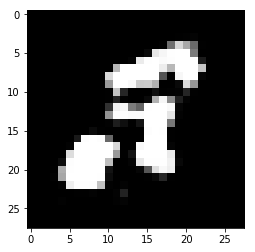

Loop: 315100, Generator_loss: 0.0029466, Discriminator_loss: 0.0091316
Loop: 315200, Generator_loss: 0.039567, Discriminator_loss: 0.0041701
Loop: 315300, Generator_loss: 0.049925, Discriminator_loss: 0.0051142
Loop: 315400, Generator_loss: 0.02824, Discriminator_loss: 0.0084347
Loop: 315500, Generator_loss: 0.010108, Discriminator_loss: 0.0066427
Loop: 315600, Generator_loss: -0.03267, Discriminator_loss: 0.0069378
Loop: 315700, Generator_loss: -0.016897, Discriminator_loss: -0.00045245
Loop: 315800, Generator_loss: -0.011265, Discriminator_loss: 0.0068201
Loop: 315900, Generator_loss: 0.014559, Discriminator_loss: 0.00034271
Loop: 316000, Generator_loss: -0.0091979, Discriminator_loss: -0.0016641


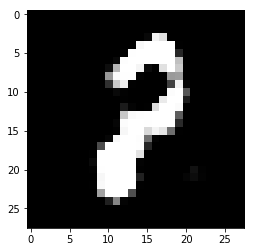

Loop: 316100, Generator_loss: -0.015087, Discriminator_loss: 0.0060562
Loop: 316200, Generator_loss: -0.008115, Discriminator_loss: -0.0018827
Loop: 316300, Generator_loss: -0.039681, Discriminator_loss: 0.004831
Loop: 316400, Generator_loss: 0.0023175, Discriminator_loss: 0.0047259
Loop: 316500, Generator_loss: -0.013817, Discriminator_loss: 0.0020586
Loop: 316600, Generator_loss: -0.0060323, Discriminator_loss: 0.0039208
Loop: 316700, Generator_loss: 0.01999, Discriminator_loss: 0.0043331
Loop: 316800, Generator_loss: 0.0019651, Discriminator_loss: 0.0036417
Loop: 316900, Generator_loss: 0.024322, Discriminator_loss: 0.0063157
Loop: 317000, Generator_loss: -0.0044178, Discriminator_loss: 0.0027432


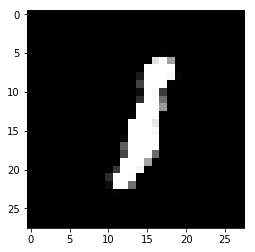

Loop: 317100, Generator_loss: 0.0099867, Discriminator_loss: 0.0051712
Loop: 317200, Generator_loss: -0.026169, Discriminator_loss: 0.0074474
Loop: 317300, Generator_loss: -0.04239, Discriminator_loss: 0.0064788
Loop: 317400, Generator_loss: -0.042219, Discriminator_loss: 0.00033905
Loop: 317500, Generator_loss: -0.024007, Discriminator_loss: -0.0011463
Loop: 317600, Generator_loss: -0.015194, Discriminator_loss: 0.0076056
Loop: 317700, Generator_loss: -0.010775, Discriminator_loss: 0.004796
Loop: 317800, Generator_loss: -0.023455, Discriminator_loss: -0.0020042
Loop: 317900, Generator_loss: 0.048322, Discriminator_loss: 0.0021205
Loop: 318000, Generator_loss: 0.065572, Discriminator_loss: 0.0091295


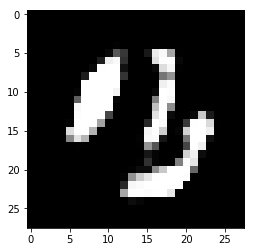

Loop: 318100, Generator_loss: 0.0041001, Discriminator_loss: 0.0010777
Loop: 318200, Generator_loss: -0.026632, Discriminator_loss: 0.004376
Loop: 318300, Generator_loss: 0.048025, Discriminator_loss: 0.010623
Loop: 318400, Generator_loss: 0.0070093, Discriminator_loss: 0.00084565
Loop: 318500, Generator_loss: -0.032189, Discriminator_loss: 0.0069352
Loop: 318600, Generator_loss: -0.035759, Discriminator_loss: 0.0065862
Loop: 318700, Generator_loss: -0.0061137, Discriminator_loss: 0.0010723
Loop: 318800, Generator_loss: -0.0083175, Discriminator_loss: 0.0024946
Loop: 318900, Generator_loss: 0.0063416, Discriminator_loss: 0.003692
Loop: 319000, Generator_loss: 0.019822, Discriminator_loss: 0.0045091


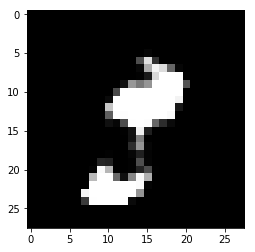

Loop: 319100, Generator_loss: 0.024101, Discriminator_loss: -0.0051568
Loop: 319200, Generator_loss: 0.0042462, Discriminator_loss: 0.001257
Loop: 319300, Generator_loss: 0.023145, Discriminator_loss: 0.0028897
Loop: 319400, Generator_loss: -0.032191, Discriminator_loss: 0.0059447
Loop: 319500, Generator_loss: 0.004522, Discriminator_loss: 0.0060425
Loop: 319600, Generator_loss: -0.0046219, Discriminator_loss: -0.00071959
Loop: 319700, Generator_loss: 0.022741, Discriminator_loss: 0.013258
Loop: 319800, Generator_loss: 0.026147, Discriminator_loss: 0.0019316
Loop: 319900, Generator_loss: -0.016747, Discriminator_loss: 0.0068496
Loop: 320000, Generator_loss: -0.045435, Discriminator_loss: 0.002292


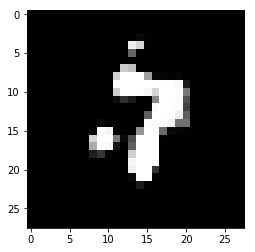

Loop: 320100, Generator_loss: -0.052209, Discriminator_loss: 0.0048942
Loop: 320200, Generator_loss: -0.07667, Discriminator_loss: 0.0086543
Loop: 320300, Generator_loss: 0.010381, Discriminator_loss: -0.0030467
Loop: 320400, Generator_loss: -0.05055, Discriminator_loss: 0.0074282
Loop: 320500, Generator_loss: -0.044845, Discriminator_loss: 0.0080645
Loop: 320600, Generator_loss: -0.003627, Discriminator_loss: -0.00067492
Loop: 320700, Generator_loss: -0.033786, Discriminator_loss: 0.0066245
Loop: 320800, Generator_loss: 0.023172, Discriminator_loss: 0.00043335
Loop: 320900, Generator_loss: 0.00019746, Discriminator_loss: 0.00076667
Loop: 321000, Generator_loss: 0.010382, Discriminator_loss: 0.0027794


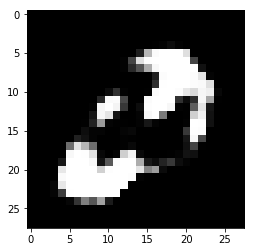

Loop: 321100, Generator_loss: -0.01266, Discriminator_loss: 0.0029643
Loop: 321200, Generator_loss: -0.040042, Discriminator_loss: 0.0012035
Loop: 321300, Generator_loss: -0.014019, Discriminator_loss: -0.0025217
Loop: 321400, Generator_loss: 0.025111, Discriminator_loss: 0.0033184
Loop: 321500, Generator_loss: 0.054307, Discriminator_loss: 0.0086527
Loop: 321600, Generator_loss: 0.047375, Discriminator_loss: 0.010377
Loop: 321700, Generator_loss: -0.01773, Discriminator_loss: 0.0068141
Loop: 321800, Generator_loss: -0.05863, Discriminator_loss: 0.015583
Loop: 321900, Generator_loss: 0.014045, Discriminator_loss: -0.00027845
Loop: 322000, Generator_loss: 0.031314, Discriminator_loss: -0.003037


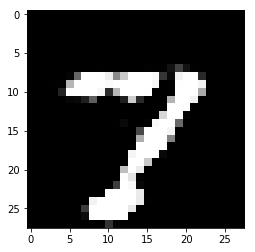

Loop: 322100, Generator_loss: -0.015647, Discriminator_loss: 0.009869
Loop: 322200, Generator_loss: 0.0025096, Discriminator_loss: 0.0023867
Loop: 322300, Generator_loss: 0.0018002, Discriminator_loss: -0.0018863
Loop: 322400, Generator_loss: -0.017591, Discriminator_loss: -0.00041655
Loop: 322500, Generator_loss: -0.023701, Discriminator_loss: 0.0052705
Loop: 322600, Generator_loss: 0.00062832, Discriminator_loss: 0.0056729
Loop: 322700, Generator_loss: -0.012081, Discriminator_loss: 0.006727
Loop: 322800, Generator_loss: -0.029799, Discriminator_loss: 0.0072654
Loop: 322900, Generator_loss: -0.0044144, Discriminator_loss: 0.0021658
Loop: 323000, Generator_loss: -0.028068, Discriminator_loss: -0.0019393


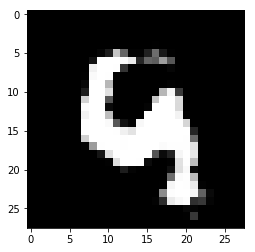

Loop: 323100, Generator_loss: -0.035097, Discriminator_loss: 0.0018823
Loop: 323200, Generator_loss: -0.04049, Discriminator_loss: 0.00081627
Loop: 323300, Generator_loss: 0.011641, Discriminator_loss: 0.0025383
Loop: 323400, Generator_loss: 0.016993, Discriminator_loss: -0.0039584
Loop: 323500, Generator_loss: -0.015294, Discriminator_loss: 0.0032688
Loop: 323600, Generator_loss: -0.023387, Discriminator_loss: 0.0078406
Loop: 323700, Generator_loss: -0.025045, Discriminator_loss: 0.0036468
Loop: 323800, Generator_loss: -0.014094, Discriminator_loss: -0.00097749
Loop: 323900, Generator_loss: -0.036017, Discriminator_loss: 0.0001682
Loop: 324000, Generator_loss: -0.017547, Discriminator_loss: 0.00059564


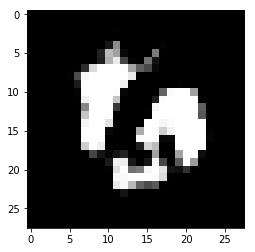

Loop: 324100, Generator_loss: -0.032264, Discriminator_loss: 0.0024432
Loop: 324200, Generator_loss: 0.003201, Discriminator_loss: 0.006115
Loop: 324300, Generator_loss: -0.030866, Discriminator_loss: 0.0066695
Loop: 324400, Generator_loss: 0.036521, Discriminator_loss: 0.0081576
Loop: 324500, Generator_loss: -0.027085, Discriminator_loss: 0.0038171
Loop: 324600, Generator_loss: 0.0084632, Discriminator_loss: -0.0010434
Loop: 324700, Generator_loss: -0.023193, Discriminator_loss: 0.0058936
Loop: 324800, Generator_loss: 0.022319, Discriminator_loss: 0.003247
Loop: 324900, Generator_loss: -0.018874, Discriminator_loss: 0.01031
Loop: 325000, Generator_loss: 0.037485, Discriminator_loss: 0.0038692


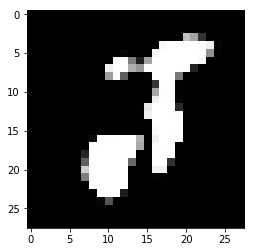

Loop: 325100, Generator_loss: -0.019302, Discriminator_loss: 0.0091325
Loop: 325200, Generator_loss: 0.0047226, Discriminator_loss: 0.0064869
Loop: 325300, Generator_loss: -0.034261, Discriminator_loss: 0.00087289
Loop: 325400, Generator_loss: 0.006547, Discriminator_loss: 0.0070504
Loop: 325500, Generator_loss: -0.0021246, Discriminator_loss: 0.0020135
Loop: 325600, Generator_loss: 0.032297, Discriminator_loss: 0.0047492
Loop: 325700, Generator_loss: -0.0061308, Discriminator_loss: 0.0051218
Loop: 325800, Generator_loss: -0.034554, Discriminator_loss: 0.0052666
Loop: 325900, Generator_loss: -0.051198, Discriminator_loss: 0.0019151
Loop: 326000, Generator_loss: -0.07545, Discriminator_loss: 0.0014528


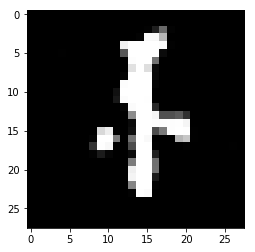

Loop: 326100, Generator_loss: -0.049141, Discriminator_loss: 0.0072186
Loop: 326200, Generator_loss: 0.0016837, Discriminator_loss: 0.00036532
Loop: 326300, Generator_loss: -0.033392, Discriminator_loss: 0.01287
Loop: 326400, Generator_loss: 0.00075698, Discriminator_loss: 0.0034767
Loop: 326500, Generator_loss: -0.061316, Discriminator_loss: 0.0054921
Loop: 326600, Generator_loss: -0.038551, Discriminator_loss: 0.0076343
Loop: 326700, Generator_loss: -0.018251, Discriminator_loss: 0.003116
Loop: 326800, Generator_loss: 0.0090139, Discriminator_loss: 0.0063563
Loop: 326900, Generator_loss: -0.041211, Discriminator_loss: 0.00044427
Loop: 327000, Generator_loss: -0.015763, Discriminator_loss: 0.0086921


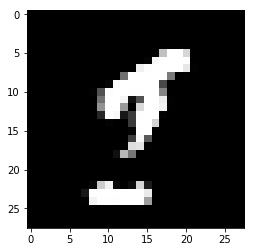

Loop: 327100, Generator_loss: 0.0032032, Discriminator_loss: 0.0059546
Loop: 327200, Generator_loss: -0.010193, Discriminator_loss: 0.0020809
Loop: 327300, Generator_loss: -0.00024233, Discriminator_loss: 0.00067353
Loop: 327400, Generator_loss: -0.0022273, Discriminator_loss: 0.0062837
Loop: 327500, Generator_loss: -0.018164, Discriminator_loss: 0.0062462
Loop: 327600, Generator_loss: 0.018352, Discriminator_loss: 0.001025
Loop: 327700, Generator_loss: -0.042712, Discriminator_loss: 0.0056205
Loop: 327800, Generator_loss: -0.048394, Discriminator_loss: 0.010418
Loop: 327900, Generator_loss: -0.018686, Discriminator_loss: 0.0091917
Loop: 328000, Generator_loss: -0.007112, Discriminator_loss: 0.0068455


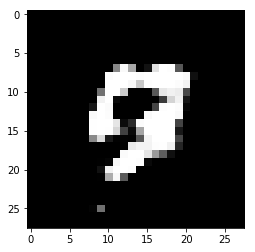

Loop: 328100, Generator_loss: -0.02565, Discriminator_loss: 0.004954
Loop: 328200, Generator_loss: 0.0051705, Discriminator_loss: 0.00069711
Loop: 328300, Generator_loss: -0.033668, Discriminator_loss: 0.0045024
Loop: 328400, Generator_loss: -0.095587, Discriminator_loss: 0.0080774
Loop: 328500, Generator_loss: -0.05001, Discriminator_loss: -0.0010969
Loop: 328600, Generator_loss: -0.039061, Discriminator_loss: -0.0048215
Loop: 328700, Generator_loss: -0.039389, Discriminator_loss: 0.0085874
Loop: 328800, Generator_loss: 0.014215, Discriminator_loss: 0.0097406
Loop: 328900, Generator_loss: -0.01362, Discriminator_loss: 0.004242
Loop: 329000, Generator_loss: -0.0082483, Discriminator_loss: 0.006758


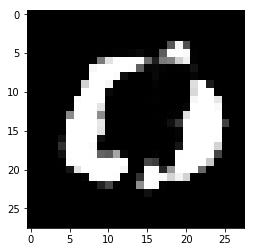

Loop: 329100, Generator_loss: 0.02387, Discriminator_loss: 0.0002642
Loop: 329200, Generator_loss: -0.013593, Discriminator_loss: 0.0022722
Loop: 329300, Generator_loss: -0.043693, Discriminator_loss: -0.0028849
Loop: 329400, Generator_loss: -0.03399, Discriminator_loss: 0.0070064
Loop: 329500, Generator_loss: 0.0085063, Discriminator_loss: 0.0030781
Loop: 329600, Generator_loss: -0.046138, Discriminator_loss: 0.00082661
Loop: 329700, Generator_loss: -0.011506, Discriminator_loss: 0.0031321
Loop: 329800, Generator_loss: -0.026464, Discriminator_loss: 0.0052526
Loop: 329900, Generator_loss: -0.016416, Discriminator_loss: 0.014012
Loop: 330000, Generator_loss: -0.01254, Discriminator_loss: 0.005282


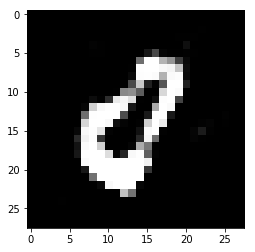

Loop: 330100, Generator_loss: -0.035545, Discriminator_loss: -0.00043065
Loop: 330200, Generator_loss: -0.047154, Discriminator_loss: 0.0065814
Loop: 330300, Generator_loss: -0.025547, Discriminator_loss: 0.0003065
Loop: 330400, Generator_loss: 0.022901, Discriminator_loss: 0.0050036
Loop: 330500, Generator_loss: 0.038751, Discriminator_loss: -0.0014086
Loop: 330600, Generator_loss: 0.014591, Discriminator_loss: 0.0017308
Loop: 330700, Generator_loss: -0.0095018, Discriminator_loss: 0.0023347
Loop: 330800, Generator_loss: 0.033045, Discriminator_loss: 0.0078619
Loop: 330900, Generator_loss: -0.027735, Discriminator_loss: 0.001412
Loop: 331000, Generator_loss: -0.014426, Discriminator_loss: 0.0041673


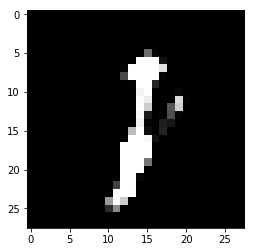

Loop: 331100, Generator_loss: -0.029026, Discriminator_loss: 0.0064219
Loop: 331200, Generator_loss: 0.0006821, Discriminator_loss: -0.0047459
Loop: 331300, Generator_loss: -0.026538, Discriminator_loss: 0.0054477
Loop: 331400, Generator_loss: -0.020502, Discriminator_loss: -0.0035063
Loop: 331500, Generator_loss: 0.014308, Discriminator_loss: 0.0056572
Loop: 331600, Generator_loss: -0.0031777, Discriminator_loss: 0.0018692
Loop: 331700, Generator_loss: -0.047195, Discriminator_loss: 0.0091314
Loop: 331800, Generator_loss: -0.034345, Discriminator_loss: -0.0012789
Loop: 331900, Generator_loss: -0.0051686, Discriminator_loss: 0.0051409
Loop: 332000, Generator_loss: -0.035252, Discriminator_loss: 0.0020794


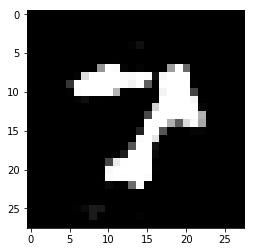

Loop: 332100, Generator_loss: -0.031231, Discriminator_loss: 0.0016541
Loop: 332200, Generator_loss: -0.0077972, Discriminator_loss: 0.0060886
Loop: 332300, Generator_loss: 0.036239, Discriminator_loss: 0.0097568
Loop: 332400, Generator_loss: 0.043959, Discriminator_loss: 0.0044747
Loop: 332500, Generator_loss: 0.020785, Discriminator_loss: 0.0032439
Loop: 332600, Generator_loss: -0.054929, Discriminator_loss: 0.0089831
Loop: 332700, Generator_loss: 0.0081962, Discriminator_loss: 0.0051784
Loop: 332800, Generator_loss: 0.0093802, Discriminator_loss: -0.0015764
Loop: 332900, Generator_loss: -0.028442, Discriminator_loss: 0.0082998
Loop: 333000, Generator_loss: -0.014154, Discriminator_loss: 0.0074683


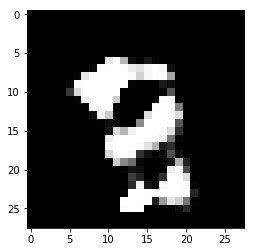

Loop: 333100, Generator_loss: -0.045253, Discriminator_loss: 0.0068072
Loop: 333200, Generator_loss: -0.051296, Discriminator_loss: -0.0010004
Loop: 333300, Generator_loss: -0.025428, Discriminator_loss: 0.0040179
Loop: 333400, Generator_loss: 0.0087297, Discriminator_loss: 0.00042828
Loop: 333500, Generator_loss: -0.01741, Discriminator_loss: 0.0044758
Loop: 333600, Generator_loss: 0.037843, Discriminator_loss: 0.0020416
Loop: 333700, Generator_loss: -0.013124, Discriminator_loss: 0.0010111
Loop: 333800, Generator_loss: 0.02023, Discriminator_loss: 0.0051257
Loop: 333900, Generator_loss: -0.038824, Discriminator_loss: 0.0090229
Loop: 334000, Generator_loss: -0.018928, Discriminator_loss: 0.0014498


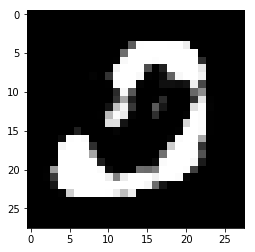

Loop: 334100, Generator_loss: 0.010092, Discriminator_loss: 0.00010291
Loop: 334200, Generator_loss: 0.024135, Discriminator_loss: 0.0012012
Loop: 334300, Generator_loss: -0.01007, Discriminator_loss: 0.0091565
Loop: 334400, Generator_loss: -0.032727, Discriminator_loss: 0.0066615
Loop: 334500, Generator_loss: -0.0029807, Discriminator_loss: 0.0021266
Loop: 334600, Generator_loss: 0.051028, Discriminator_loss: 0.004712
Loop: 334700, Generator_loss: -0.021244, Discriminator_loss: 0.00052139
Loop: 334800, Generator_loss: -0.019668, Discriminator_loss: 0.0030722
Loop: 334900, Generator_loss: 0.0059892, Discriminator_loss: -0.0010891
Loop: 335000, Generator_loss: -0.016506, Discriminator_loss: 0.0088633


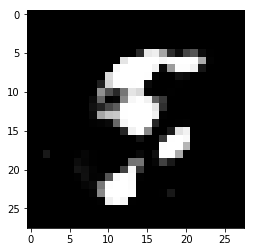

Loop: 335100, Generator_loss: 0.03609, Discriminator_loss: 0.00012509
Loop: 335200, Generator_loss: 0.019141, Discriminator_loss: 0.00078864
Loop: 335300, Generator_loss: 0.014989, Discriminator_loss: 0.0019553
Loop: 335400, Generator_loss: 0.021121, Discriminator_loss: 0.0067198
Loop: 335500, Generator_loss: 0.026102, Discriminator_loss: 0.0024333
Loop: 335600, Generator_loss: 0.012265, Discriminator_loss: 0.0081569
Loop: 335700, Generator_loss: -0.01886, Discriminator_loss: 0.00029622
Loop: 335800, Generator_loss: -0.025906, Discriminator_loss: 0.0036234
Loop: 335900, Generator_loss: -0.018536, Discriminator_loss: 0.0051321
Loop: 336000, Generator_loss: 0.00010718, Discriminator_loss: 0.0039667


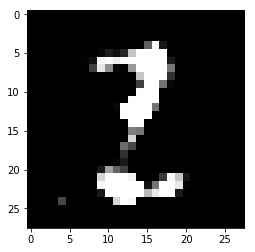

Loop: 336100, Generator_loss: -0.026003, Discriminator_loss: 0.0020255
Loop: 336200, Generator_loss: 0.036825, Discriminator_loss: 0.0023289
Loop: 336300, Generator_loss: 0.010848, Discriminator_loss: -0.0035403
Loop: 336400, Generator_loss: 0.00452, Discriminator_loss: 0.0049915
Loop: 336500, Generator_loss: -0.02279, Discriminator_loss: 0.0018352
Loop: 336600, Generator_loss: -0.0053853, Discriminator_loss: 0.0044645
Loop: 336700, Generator_loss: 0.01408, Discriminator_loss: -3.8799e-05
Loop: 336800, Generator_loss: 0.025744, Discriminator_loss: -0.0012613
Loop: 336900, Generator_loss: -0.010451, Discriminator_loss: 5.8316e-05
Loop: 337000, Generator_loss: -0.025124, Discriminator_loss: -0.0011603


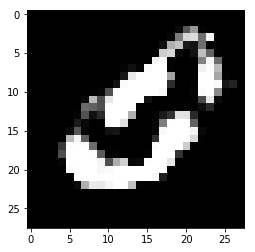

Loop: 337100, Generator_loss: 0.028401, Discriminator_loss: 0.0012993
Loop: 337200, Generator_loss: 0.04548, Discriminator_loss: 0.007735
Loop: 337300, Generator_loss: 0.017462, Discriminator_loss: 0.0049189
Loop: 337400, Generator_loss: 0.047779, Discriminator_loss: 0.0068495
Loop: 337500, Generator_loss: -0.041693, Discriminator_loss: 0.0014998
Loop: 337600, Generator_loss: 0.037034, Discriminator_loss: 0.0030754
Loop: 337700, Generator_loss: 0.029659, Discriminator_loss: 0.0073733
Loop: 337800, Generator_loss: -0.013578, Discriminator_loss: 0.0023514
Loop: 337900, Generator_loss: 0.020651, Discriminator_loss: 0.0060664
Loop: 338000, Generator_loss: -0.013988, Discriminator_loss: 0.0051756


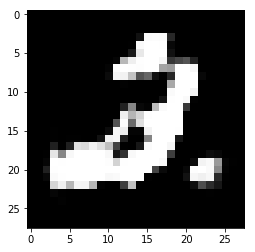

Loop: 338100, Generator_loss: 0.0020202, Discriminator_loss: 0.0073609
Loop: 338200, Generator_loss: -0.048611, Discriminator_loss: 0.010797
Loop: 338300, Generator_loss: -0.0059767, Discriminator_loss: 0.0019396
Loop: 338400, Generator_loss: 0.017384, Discriminator_loss: -0.00056002
Loop: 338500, Generator_loss: -0.00063636, Discriminator_loss: 0.0080315
Loop: 338600, Generator_loss: -0.014612, Discriminator_loss: 0.0046801
Loop: 338700, Generator_loss: -0.024378, Discriminator_loss: 0.0030177
Loop: 338800, Generator_loss: -0.056877, Discriminator_loss: 0.00092096
Loop: 338900, Generator_loss: -0.020922, Discriminator_loss: 0.0028668
Loop: 339000, Generator_loss: 0.022687, Discriminator_loss: 0.0039349


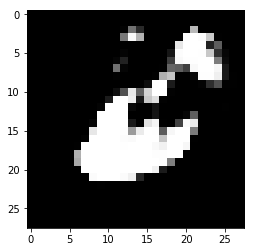

Loop: 339100, Generator_loss: -0.013874, Discriminator_loss: -0.00083023
Loop: 339200, Generator_loss: -0.049709, Discriminator_loss: 0.0054386
Loop: 339300, Generator_loss: 0.01612, Discriminator_loss: 0.0071248
Loop: 339400, Generator_loss: -0.035288, Discriminator_loss: 0.0026948
Loop: 339500, Generator_loss: -0.0064367, Discriminator_loss: 0.003362
Loop: 339600, Generator_loss: -0.047322, Discriminator_loss: 0.0059269
Loop: 339700, Generator_loss: 6.534e-06, Discriminator_loss: -0.0074858
Loop: 339800, Generator_loss: -0.034991, Discriminator_loss: 0.0034075
Loop: 339900, Generator_loss: 0.011194, Discriminator_loss: 0.0061382
Loop: 340000, Generator_loss: -0.0058936, Discriminator_loss: -0.00038813


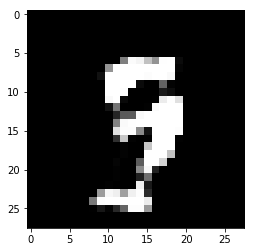

Loop: 340100, Generator_loss: -0.016723, Discriminator_loss: 0.0033271
Loop: 340200, Generator_loss: -0.031513, Discriminator_loss: 0.0034898
Loop: 340300, Generator_loss: 0.016626, Discriminator_loss: 0.004053
Loop: 340400, Generator_loss: 0.011489, Discriminator_loss: 0.0032338
Loop: 340500, Generator_loss: -0.029787, Discriminator_loss: 0.00062463
Loop: 340600, Generator_loss: -0.043127, Discriminator_loss: 0.0041544
Loop: 340700, Generator_loss: -0.025418, Discriminator_loss: 0.0043374
Loop: 340800, Generator_loss: -0.020305, Discriminator_loss: -0.0026109
Loop: 340900, Generator_loss: -0.022741, Discriminator_loss: 0.0033354
Loop: 341000, Generator_loss: -0.010747, Discriminator_loss: 0.0063552


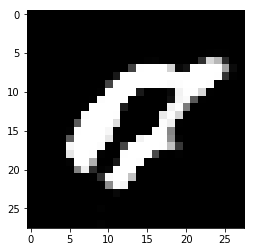

Loop: 341100, Generator_loss: -0.02316, Discriminator_loss: 0.0022236
Loop: 341200, Generator_loss: 0.0056759, Discriminator_loss: 0.0077315
Loop: 341300, Generator_loss: -0.0059168, Discriminator_loss: 0.0014497
Loop: 341400, Generator_loss: -0.0040104, Discriminator_loss: 0.0038544
Loop: 341500, Generator_loss: -0.064607, Discriminator_loss: 0.0040985
Loop: 341600, Generator_loss: -0.031367, Discriminator_loss: 0.0099123
Loop: 341700, Generator_loss: 0.016673, Discriminator_loss: 0.0064156
Loop: 341800, Generator_loss: -0.028618, Discriminator_loss: -0.0013714
Loop: 341900, Generator_loss: -0.025449, Discriminator_loss: 0.0075014
Loop: 342000, Generator_loss: 0.010313, Discriminator_loss: 0.0052485


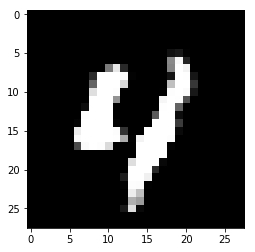

Loop: 342100, Generator_loss: -0.029271, Discriminator_loss: 0.0057083
Loop: 342200, Generator_loss: -0.020658, Discriminator_loss: 0.004247
Loop: 342300, Generator_loss: -0.022339, Discriminator_loss: 0.0053973
Loop: 342400, Generator_loss: -0.043505, Discriminator_loss: 0.003319
Loop: 342500, Generator_loss: 0.0031095, Discriminator_loss: 0.0013329
Loop: 342600, Generator_loss: -0.043914, Discriminator_loss: 0.0055872
Loop: 342700, Generator_loss: -0.028776, Discriminator_loss: 0.012398
Loop: 342800, Generator_loss: -0.043732, Discriminator_loss: 0.0043368
Loop: 342900, Generator_loss: -0.032598, Discriminator_loss: -0.00053429
Loop: 343000, Generator_loss: 0.021981, Discriminator_loss: 0.011357


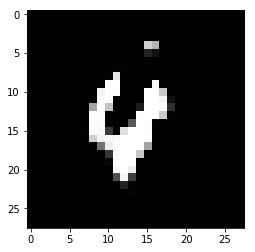

Loop: 343100, Generator_loss: 0.077186, Discriminator_loss: 0.0049356
Loop: 343200, Generator_loss: -0.063914, Discriminator_loss: 0.0099302
Loop: 343300, Generator_loss: -0.031219, Discriminator_loss: 0.0040843
Loop: 343400, Generator_loss: 0.036971, Discriminator_loss: 0.010693
Loop: 343500, Generator_loss: 0.048598, Discriminator_loss: 0.011128
Loop: 343600, Generator_loss: 0.005109, Discriminator_loss: 0.0078991
Loop: 343700, Generator_loss: -0.033109, Discriminator_loss: 0.0060397
Loop: 343800, Generator_loss: 0.020335, Discriminator_loss: 0.0082103
Loop: 343900, Generator_loss: -0.019189, Discriminator_loss: 0.001528
Loop: 344000, Generator_loss: -0.017689, Discriminator_loss: -0.0002856


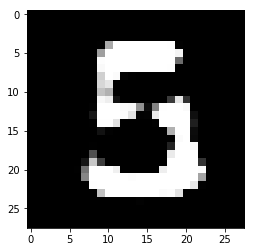

Loop: 344100, Generator_loss: -0.053219, Discriminator_loss: 0.0098256
Loop: 344200, Generator_loss: 0.0055897, Discriminator_loss: 0.0059671
Loop: 344300, Generator_loss: -0.01661, Discriminator_loss: 0.0044802
Loop: 344400, Generator_loss: 0.00052249, Discriminator_loss: 0.0063583
Loop: 344500, Generator_loss: 0.0095653, Discriminator_loss: -0.0072264
Loop: 344600, Generator_loss: -0.01551, Discriminator_loss: 0.00013257
Loop: 344700, Generator_loss: -0.0021151, Discriminator_loss: 0.0049917
Loop: 344800, Generator_loss: -0.037958, Discriminator_loss: 0.0044297
Loop: 344900, Generator_loss: -0.045614, Discriminator_loss: 0.0084613
Loop: 345000, Generator_loss: 0.0039256, Discriminator_loss: 0.0080731


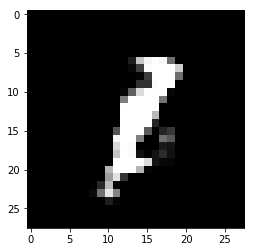

Loop: 345100, Generator_loss: 0.00483, Discriminator_loss: 0.0045872
Loop: 345200, Generator_loss: 0.0098545, Discriminator_loss: -0.00121
Loop: 345300, Generator_loss: 0.0046282, Discriminator_loss: -0.0042941
Loop: 345400, Generator_loss: -0.028665, Discriminator_loss: 0.0018745
Loop: 345500, Generator_loss: -0.018908, Discriminator_loss: 0.0091474
Loop: 345600, Generator_loss: 0.035403, Discriminator_loss: 0.0050274
Loop: 345700, Generator_loss: 0.0088251, Discriminator_loss: 0.0084589
Loop: 345800, Generator_loss: 0.035673, Discriminator_loss: -0.0023867
Loop: 345900, Generator_loss: 0.020146, Discriminator_loss: 0.0073071
Loop: 346000, Generator_loss: 0.031986, Discriminator_loss: -0.0038601


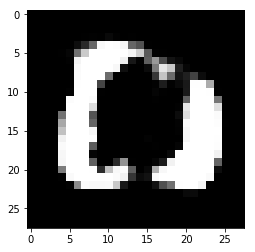

Loop: 346100, Generator_loss: 0.009879, Discriminator_loss: 0.0024461
Loop: 346200, Generator_loss: -0.027139, Discriminator_loss: 0.0058294
Loop: 346300, Generator_loss: -0.00056277, Discriminator_loss: 0.0069607
Loop: 346400, Generator_loss: -0.0099172, Discriminator_loss: 0.0054471
Loop: 346500, Generator_loss: -0.028575, Discriminator_loss: 0.0056402
Loop: 346600, Generator_loss: 0.021398, Discriminator_loss: 0.0063162
Loop: 346700, Generator_loss: 0.013372, Discriminator_loss: 0.0070391
Loop: 346800, Generator_loss: -0.02095, Discriminator_loss: 0.0077399
Loop: 346900, Generator_loss: 0.0056635, Discriminator_loss: 0.0050533
Loop: 347000, Generator_loss: -0.0019628, Discriminator_loss: 0.0047297


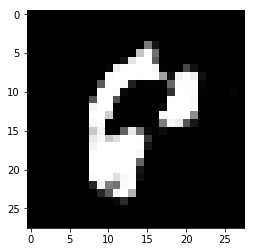

Loop: 347100, Generator_loss: 0.0028011, Discriminator_loss: 0.0099517
Loop: 347200, Generator_loss: 0.0085495, Discriminator_loss: -0.0018774
Loop: 347300, Generator_loss: -0.029071, Discriminator_loss: 0.00069148
Loop: 347400, Generator_loss: 0.043321, Discriminator_loss: 0.0041952
Loop: 347500, Generator_loss: -8.997e-05, Discriminator_loss: 0.00014032
Loop: 347600, Generator_loss: -0.021781, Discriminator_loss: 0.0067287
Loop: 347700, Generator_loss: -0.028451, Discriminator_loss: 0.0083679
Loop: 347800, Generator_loss: -0.0026481, Discriminator_loss: 0.0043456
Loop: 347900, Generator_loss: -0.0062909, Discriminator_loss: 0.0052864
Loop: 348000, Generator_loss: 0.0097679, Discriminator_loss: 0.0076982


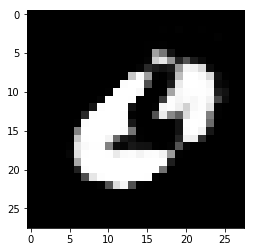

Loop: 348100, Generator_loss: -0.037814, Discriminator_loss: 0.0095073
Loop: 348200, Generator_loss: -0.0055288, Discriminator_loss: 0.0067383
Loop: 348300, Generator_loss: -0.024264, Discriminator_loss: 0.0061201
Loop: 348400, Generator_loss: -0.07265, Discriminator_loss: 0.0060713
Loop: 348500, Generator_loss: -0.026499, Discriminator_loss: 0.0040208
Loop: 348600, Generator_loss: -0.011294, Discriminator_loss: 0.0044965
Loop: 348700, Generator_loss: -0.016842, Discriminator_loss: -6.8197e-05
Loop: 348800, Generator_loss: 0.022933, Discriminator_loss: 0.0028066
Loop: 348900, Generator_loss: 0.059601, Discriminator_loss: 0.0030789
Loop: 349000, Generator_loss: -0.007749, Discriminator_loss: 0.0055943


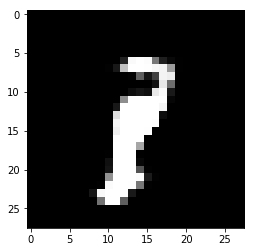

Loop: 349100, Generator_loss: -0.042824, Discriminator_loss: -0.0032017
Loop: 349200, Generator_loss: -0.0074442, Discriminator_loss: 0.0028584
Loop: 349300, Generator_loss: -0.025896, Discriminator_loss: 0.0038401
Loop: 349400, Generator_loss: -0.017473, Discriminator_loss: 0.0040004
Loop: 349500, Generator_loss: 0.0090346, Discriminator_loss: -0.000789
Loop: 349600, Generator_loss: -0.034045, Discriminator_loss: 0.0092821
Loop: 349700, Generator_loss: -0.009327, Discriminator_loss: 0.0063745
Loop: 349800, Generator_loss: -0.019602, Discriminator_loss: 0.0025475
Loop: 349900, Generator_loss: 0.042376, Discriminator_loss: -0.0011408
Loop: 350000, Generator_loss: -0.03158, Discriminator_loss: 0.00019346


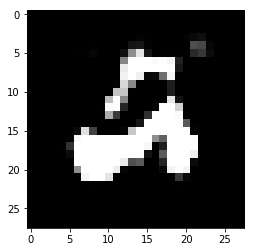

Loop: 350100, Generator_loss: 0.0040988, Discriminator_loss: 0.0057162
Loop: 350200, Generator_loss: 0.00036977, Discriminator_loss: 0.0055393
Loop: 350300, Generator_loss: -0.028795, Discriminator_loss: 0.0082957
Loop: 350400, Generator_loss: 0.039161, Discriminator_loss: 0.00064566
Loop: 350500, Generator_loss: 0.033642, Discriminator_loss: 0.0079676
Loop: 350600, Generator_loss: -0.010611, Discriminator_loss: 0.0020181
Loop: 350700, Generator_loss: -0.012755, Discriminator_loss: 0.0031295
Loop: 350800, Generator_loss: 0.0046631, Discriminator_loss: 0.0029807
Loop: 350900, Generator_loss: -0.054767, Discriminator_loss: -0.0041939
Loop: 351000, Generator_loss: 0.02415, Discriminator_loss: 0.0043029


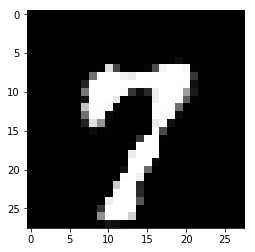

Loop: 351100, Generator_loss: -0.0059437, Discriminator_loss: 0.0036172
Loop: 351200, Generator_loss: 0.008751, Discriminator_loss: 0.0035139
Loop: 351300, Generator_loss: -0.0098444, Discriminator_loss: 0.0076365
Loop: 351400, Generator_loss: -0.00079808, Discriminator_loss: -0.0005705
Loop: 351500, Generator_loss: 0.025035, Discriminator_loss: 0.00057981
Loop: 351600, Generator_loss: 0.025662, Discriminator_loss: -0.0044991
Loop: 351700, Generator_loss: 0.02367, Discriminator_loss: 0.0036588
Loop: 351800, Generator_loss: 0.0057044, Discriminator_loss: 0.0012092
Loop: 351900, Generator_loss: -0.001258, Discriminator_loss: 0.0052409
Loop: 352000, Generator_loss: -0.0095365, Discriminator_loss: 0.0070674


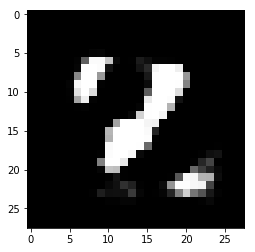

Loop: 352100, Generator_loss: -0.025583, Discriminator_loss: 0.003625
Loop: 352200, Generator_loss: -0.0051153, Discriminator_loss: -0.0016312
Loop: 352300, Generator_loss: -0.019581, Discriminator_loss: -0.00090222
Loop: 352400, Generator_loss: -0.036757, Discriminator_loss: 0.0048637
Loop: 352500, Generator_loss: -0.017078, Discriminator_loss: 0.0012858
Loop: 352600, Generator_loss: 0.00060969, Discriminator_loss: 0.0049512
Loop: 352700, Generator_loss: 0.0054692, Discriminator_loss: -0.0013739
Loop: 352800, Generator_loss: -0.042677, Discriminator_loss: 0.0033991
Loop: 352900, Generator_loss: -0.0072782, Discriminator_loss: -0.011769
Loop: 353000, Generator_loss: -0.021874, Discriminator_loss: 0.0019031


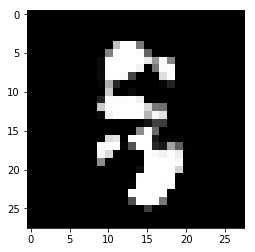

Loop: 353100, Generator_loss: -0.04253, Discriminator_loss: 0.0043188
Loop: 353200, Generator_loss: 0.01194, Discriminator_loss: 0.005152
Loop: 353300, Generator_loss: 0.016713, Discriminator_loss: 0.0021851
Loop: 353400, Generator_loss: -0.048777, Discriminator_loss: 0.0043103
Loop: 353500, Generator_loss: -0.012373, Discriminator_loss: 0.0042071
Loop: 353600, Generator_loss: -0.05136, Discriminator_loss: 0.00013024
Loop: 353700, Generator_loss: 0.003108, Discriminator_loss: 0.0074972
Loop: 353800, Generator_loss: -0.0015488, Discriminator_loss: 0.0047856
Loop: 353900, Generator_loss: 0.015615, Discriminator_loss: -0.0065984
Loop: 354000, Generator_loss: -0.0089729, Discriminator_loss: 0.00078566


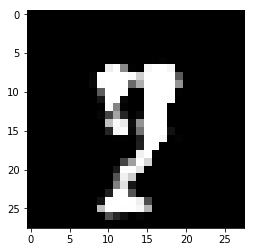

Loop: 354100, Generator_loss: 0.038049, Discriminator_loss: 0.010406
Loop: 354200, Generator_loss: 0.012671, Discriminator_loss: 0.0047821
Loop: 354300, Generator_loss: -0.0044638, Discriminator_loss: 0.0035337
Loop: 354400, Generator_loss: 0.017138, Discriminator_loss: -0.0037596
Loop: 354500, Generator_loss: 0.00053216, Discriminator_loss: 0.001507
Loop: 354600, Generator_loss: -0.0057108, Discriminator_loss: 0.0077064
Loop: 354700, Generator_loss: -0.049481, Discriminator_loss: 0.006893
Loop: 354800, Generator_loss: 0.0090753, Discriminator_loss: 0.0039645
Loop: 354900, Generator_loss: 0.0056688, Discriminator_loss: 0.0072763
Loop: 355000, Generator_loss: 0.01388, Discriminator_loss: 0.0061064


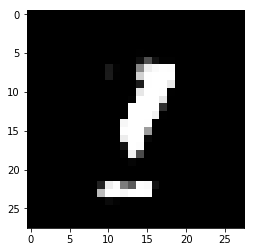

Loop: 355100, Generator_loss: -0.02565, Discriminator_loss: 0.0078857
Loop: 355200, Generator_loss: 0.0067703, Discriminator_loss: 0.0052394
Loop: 355300, Generator_loss: 0.0025409, Discriminator_loss: -0.00059112
Loop: 355400, Generator_loss: -0.011948, Discriminator_loss: 0.00051652
Loop: 355500, Generator_loss: -0.011048, Discriminator_loss: 0.0034566
Loop: 355600, Generator_loss: -0.0028474, Discriminator_loss: 0.0035158
Loop: 355700, Generator_loss: -0.031365, Discriminator_loss: -0.0028926
Loop: 355800, Generator_loss: -0.050838, Discriminator_loss: 0.00094476
Loop: 355900, Generator_loss: -0.0012157, Discriminator_loss: 0.0061628
Loop: 356000, Generator_loss: 0.022876, Discriminator_loss: 0.0064644


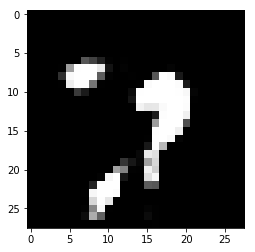

Loop: 356100, Generator_loss: 0.033673, Discriminator_loss: 0.0073681
Loop: 356200, Generator_loss: -0.023398, Discriminator_loss: 0.0023904
Loop: 356300, Generator_loss: 0.018663, Discriminator_loss: 0.0079377
Loop: 356400, Generator_loss: -0.018045, Discriminator_loss: 0.0027156
Loop: 356500, Generator_loss: 0.014004, Discriminator_loss: 0.0060778
Loop: 356600, Generator_loss: -0.0061501, Discriminator_loss: -0.0034849
Loop: 356700, Generator_loss: -0.020923, Discriminator_loss: 0.0047907
Loop: 356800, Generator_loss: 0.014715, Discriminator_loss: 0.0060785
Loop: 356900, Generator_loss: 0.00054828, Discriminator_loss: 0.0037272
Loop: 357000, Generator_loss: 0.022544, Discriminator_loss: 0.0079695


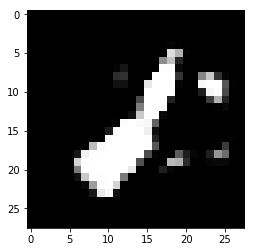

Loop: 357100, Generator_loss: -0.0035963, Discriminator_loss: 0.0023055
Loop: 357200, Generator_loss: 0.024907, Discriminator_loss: 0.0058114
Loop: 357300, Generator_loss: 0.012807, Discriminator_loss: 0.0015591
Loop: 357400, Generator_loss: -0.025918, Discriminator_loss: 0.0028178
Loop: 357500, Generator_loss: -0.020172, Discriminator_loss: 0.0037259
Loop: 357600, Generator_loss: -0.024721, Discriminator_loss: 0.008146
Loop: 357700, Generator_loss: -0.032925, Discriminator_loss: -0.00014156
Loop: 357800, Generator_loss: -0.0011585, Discriminator_loss: 0.0057028
Loop: 357900, Generator_loss: 0.0075145, Discriminator_loss: 0.0020367
Loop: 358000, Generator_loss: -0.01637, Discriminator_loss: 0.00057839


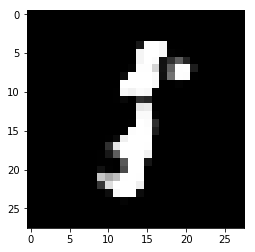

Loop: 358100, Generator_loss: 0.053969, Discriminator_loss: 0.0021812
Loop: 358200, Generator_loss: -0.019961, Discriminator_loss: 0.0056877
Loop: 358300, Generator_loss: -0.01317, Discriminator_loss: 0.0026122
Loop: 358400, Generator_loss: 0.0098471, Discriminator_loss: 0.0054776
Loop: 358500, Generator_loss: -0.012649, Discriminator_loss: 0.004339
Loop: 358600, Generator_loss: 0.048675, Discriminator_loss: 0.0047263
Loop: 358700, Generator_loss: 0.026584, Discriminator_loss: 0.0062178
Loop: 358800, Generator_loss: -0.028445, Discriminator_loss: 0.0084534
Loop: 358900, Generator_loss: -0.02746, Discriminator_loss: 0.0025022
Loop: 359000, Generator_loss: -0.025197, Discriminator_loss: 0.0042508


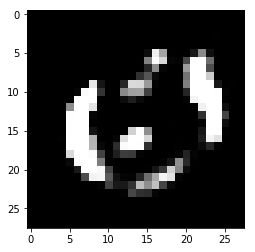

Loop: 359100, Generator_loss: -0.00025504, Discriminator_loss: 0.0060043
Loop: 359200, Generator_loss: 0.031862, Discriminator_loss: 0.014577
Loop: 359300, Generator_loss: 0.007281, Discriminator_loss: 0.0031307
Loop: 359400, Generator_loss: 0.034843, Discriminator_loss: 6.8091e-05
Loop: 359500, Generator_loss: 0.00025927, Discriminator_loss: 0.0020744
Loop: 359600, Generator_loss: 0.0022377, Discriminator_loss: 0.0047485
Loop: 359700, Generator_loss: -0.051591, Discriminator_loss: 0.0024225
Loop: 359800, Generator_loss: -0.034694, Discriminator_loss: 0.0060241
Loop: 359900, Generator_loss: -0.0099699, Discriminator_loss: 0.0067784
Loop: 360000, Generator_loss: -0.0090227, Discriminator_loss: -0.004353


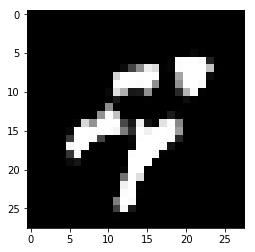

Loop: 360100, Generator_loss: 0.050104, Discriminator_loss: 0.009002
Loop: 360200, Generator_loss: -0.035691, Discriminator_loss: 0.0020188
Loop: 360300, Generator_loss: -0.037378, Discriminator_loss: 0.0058711
Loop: 360400, Generator_loss: -0.020473, Discriminator_loss: -0.002913
Loop: 360500, Generator_loss: 0.014399, Discriminator_loss: -0.00017068
Loop: 360600, Generator_loss: 0.00013866, Discriminator_loss: 0.002294
Loop: 360700, Generator_loss: 0.020498, Discriminator_loss: 0.0002736
Loop: 360800, Generator_loss: 0.076657, Discriminator_loss: 0.01007
Loop: 360900, Generator_loss: -0.025173, Discriminator_loss: 0.0043625
Loop: 361000, Generator_loss: 0.0099322, Discriminator_loss: -0.00053417


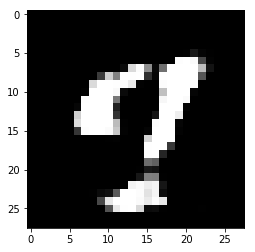

Loop: 361100, Generator_loss: -0.01676, Discriminator_loss: 0.0032927
Loop: 361200, Generator_loss: -0.030642, Discriminator_loss: 0.0010781
Loop: 361300, Generator_loss: 0.014429, Discriminator_loss: 0.0068771
Loop: 361400, Generator_loss: -0.037658, Discriminator_loss: -0.0012108
Loop: 361500, Generator_loss: -0.029035, Discriminator_loss: 0.0038743
Loop: 361600, Generator_loss: -0.027947, Discriminator_loss: 0.00090561
Loop: 361700, Generator_loss: -0.014907, Discriminator_loss: 0.0045681
Loop: 361800, Generator_loss: 0.056479, Discriminator_loss: 0.016538
Loop: 361900, Generator_loss: 0.0023869, Discriminator_loss: 0.0026639
Loop: 362000, Generator_loss: 0.036536, Discriminator_loss: -0.0058395


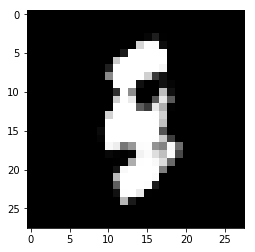

Loop: 362100, Generator_loss: -0.029912, Discriminator_loss: 0.0018532
Loop: 362200, Generator_loss: -0.017985, Discriminator_loss: -0.0018136
Loop: 362300, Generator_loss: -0.041489, Discriminator_loss: 0.0061791
Loop: 362400, Generator_loss: -0.0038247, Discriminator_loss: 0.0047126
Loop: 362500, Generator_loss: 0.0076249, Discriminator_loss: -0.00032929
Loop: 362600, Generator_loss: 0.015841, Discriminator_loss: 0.0037481
Loop: 362700, Generator_loss: -0.0063718, Discriminator_loss: -0.0034098
Loop: 362800, Generator_loss: 0.039234, Discriminator_loss: -0.00053992
Loop: 362900, Generator_loss: -0.048815, Discriminator_loss: 0.002011
Loop: 363000, Generator_loss: -0.0097152, Discriminator_loss: 0.0018604


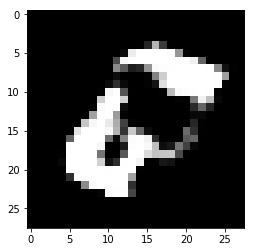

Loop: 363100, Generator_loss: 0.001659, Discriminator_loss: 0.0014463
Loop: 363200, Generator_loss: -0.014813, Discriminator_loss: 0.0048588
Loop: 363300, Generator_loss: 0.0016571, Discriminator_loss: 0.0049755
Loop: 363400, Generator_loss: -0.040996, Discriminator_loss: 0.0054672
Loop: 363500, Generator_loss: -0.031068, Discriminator_loss: 0.005004
Loop: 363600, Generator_loss: -0.021195, Discriminator_loss: 0.0018259
Loop: 363700, Generator_loss: -0.025415, Discriminator_loss: 0.0028131
Loop: 363800, Generator_loss: 0.013144, Discriminator_loss: 0.00059319
Loop: 363900, Generator_loss: -0.007345, Discriminator_loss: 0.0029395
Loop: 364000, Generator_loss: -0.025957, Discriminator_loss: 0.0055887


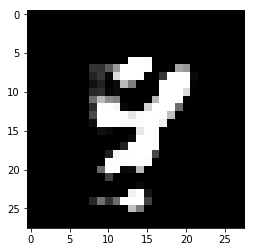

Loop: 364100, Generator_loss: 0.034036, Discriminator_loss: 1.8999e-06
Loop: 364200, Generator_loss: -0.031939, Discriminator_loss: 0.00089565
Loop: 364300, Generator_loss: -0.0092535, Discriminator_loss: -0.00010392
Loop: 364400, Generator_loss: 0.0079302, Discriminator_loss: 0.0060771
Loop: 364500, Generator_loss: 0.007931, Discriminator_loss: -0.0011712
Loop: 364600, Generator_loss: -0.028682, Discriminator_loss: 0.0033488
Loop: 364700, Generator_loss: -0.0060748, Discriminator_loss: 0.0025045
Loop: 364800, Generator_loss: 0.056647, Discriminator_loss: 0.012576
Loop: 364900, Generator_loss: 0.047046, Discriminator_loss: 0.0067957
Loop: 365000, Generator_loss: -0.0049106, Discriminator_loss: 0.0052432


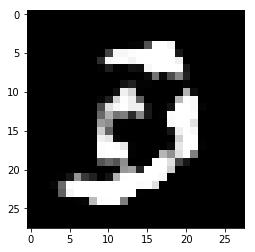

Loop: 365100, Generator_loss: -0.0057769, Discriminator_loss: 0.00058264
Loop: 365200, Generator_loss: -0.036259, Discriminator_loss: 0.0036254
Loop: 365300, Generator_loss: -0.021251, Discriminator_loss: 0.0031427
Loop: 365400, Generator_loss: -0.024664, Discriminator_loss: 0.00078003
Loop: 365500, Generator_loss: -0.0034373, Discriminator_loss: 0.0052942
Loop: 365600, Generator_loss: -0.011696, Discriminator_loss: 8.4557e-05
Loop: 365700, Generator_loss: -0.0096716, Discriminator_loss: -0.00057461
Loop: 365800, Generator_loss: -0.025804, Discriminator_loss: 0.0037409
Loop: 365900, Generator_loss: 0.016941, Discriminator_loss: 0.0058405
Loop: 366000, Generator_loss: -0.063411, Discriminator_loss: 0.0059855


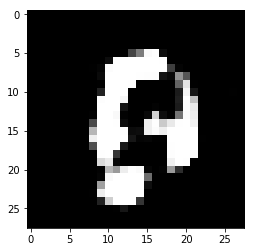

Loop: 366100, Generator_loss: -0.02162, Discriminator_loss: 0.0046107
Loop: 366200, Generator_loss: -0.045869, Discriminator_loss: 0.0097666
Loop: 366300, Generator_loss: -0.012914, Discriminator_loss: 0.0048954
Loop: 366400, Generator_loss: -0.040099, Discriminator_loss: -0.00022176
Loop: 366500, Generator_loss: 0.021257, Discriminator_loss: 0.010874
Loop: 366600, Generator_loss: -0.0048671, Discriminator_loss: 0.0020379
Loop: 366700, Generator_loss: -0.01771, Discriminator_loss: 0.0020577
Loop: 366800, Generator_loss: -0.0022885, Discriminator_loss: 0.0027958
Loop: 366900, Generator_loss: -0.0018688, Discriminator_loss: 0.0020379
Loop: 367000, Generator_loss: 0.053157, Discriminator_loss: -0.0032352


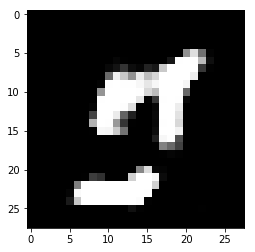

Loop: 367100, Generator_loss: -0.02425, Discriminator_loss: 0.01024
Loop: 367200, Generator_loss: 0.022087, Discriminator_loss: 0.0012613
Loop: 367300, Generator_loss: -0.034735, Discriminator_loss: 0.0064003
Loop: 367400, Generator_loss: 0.014683, Discriminator_loss: 0.0039423
Loop: 367500, Generator_loss: 0.041478, Discriminator_loss: 0.0078022
Loop: 367600, Generator_loss: 0.015366, Discriminator_loss: 0.0057719
Loop: 367700, Generator_loss: 0.0079238, Discriminator_loss: 0.0076013
Loop: 367800, Generator_loss: -0.011322, Discriminator_loss: 0.0062891
Loop: 367900, Generator_loss: -0.017183, Discriminator_loss: 0.0024644
Loop: 368000, Generator_loss: 0.052833, Discriminator_loss: 0.0060269


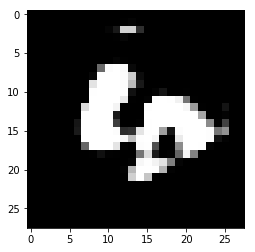

Loop: 368100, Generator_loss: -0.026841, Discriminator_loss: -0.00059386
Loop: 368200, Generator_loss: -0.023074, Discriminator_loss: 0.005818
Loop: 368300, Generator_loss: -0.013698, Discriminator_loss: -0.00060571
Loop: 368400, Generator_loss: 0.035176, Discriminator_loss: -0.00060514
Loop: 368500, Generator_loss: 0.029733, Discriminator_loss: 0.00499
Loop: 368600, Generator_loss: -0.059535, Discriminator_loss: -0.00010277
Loop: 368700, Generator_loss: 0.037036, Discriminator_loss: 0.0065488
Loop: 368800, Generator_loss: 0.034071, Discriminator_loss: -0.00099786
Loop: 368900, Generator_loss: 0.047287, Discriminator_loss: 0.0067381
Loop: 369000, Generator_loss: -0.033768, Discriminator_loss: 0.0056303


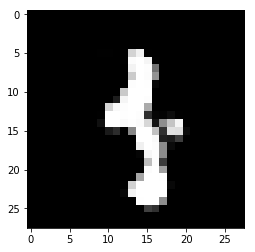

Loop: 369100, Generator_loss: 0.0075851, Discriminator_loss: 0.0032608
Loop: 369200, Generator_loss: -0.025527, Discriminator_loss: 0.0021562
Loop: 369300, Generator_loss: 0.00017641, Discriminator_loss: 0.011202
Loop: 369400, Generator_loss: -0.003034, Discriminator_loss: 0.0024224
Loop: 369500, Generator_loss: -0.024761, Discriminator_loss: 0.0070945
Loop: 369600, Generator_loss: -0.06936, Discriminator_loss: 0.0087971
Loop: 369700, Generator_loss: -0.0010108, Discriminator_loss: 0.0028046
Loop: 369800, Generator_loss: -0.010077, Discriminator_loss: 0.00038295
Loop: 369900, Generator_loss: -0.029417, Discriminator_loss: 0.0088201
Loop: 370000, Generator_loss: -0.027466, Discriminator_loss: 0.0047699


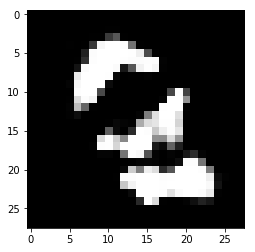

Loop: 370100, Generator_loss: -0.011206, Discriminator_loss: -0.00094357
Loop: 370200, Generator_loss: 0.01001, Discriminator_loss: 0.0040681
Loop: 370300, Generator_loss: 0.061919, Discriminator_loss: 0.0034436
Loop: 370400, Generator_loss: -0.019631, Discriminator_loss: 0.00060385
Loop: 370500, Generator_loss: -0.0048355, Discriminator_loss: 0.001274
Loop: 370600, Generator_loss: -0.0059699, Discriminator_loss: 0.0034646
Loop: 370700, Generator_loss: -0.02774, Discriminator_loss: 0.00040518
Loop: 370800, Generator_loss: -0.008184, Discriminator_loss: 0.0018247
Loop: 370900, Generator_loss: -0.045189, Discriminator_loss: 0.0045707
Loop: 371000, Generator_loss: -0.013555, Discriminator_loss: -0.00094574


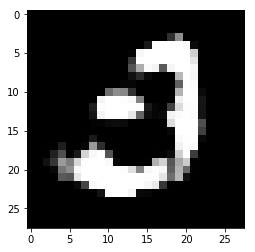

Loop: 371100, Generator_loss: -0.023603, Discriminator_loss: 0.0093058
Loop: 371200, Generator_loss: -0.00017314, Discriminator_loss: -0.0019773
Loop: 371300, Generator_loss: -0.035853, Discriminator_loss: 0.0048539
Loop: 371400, Generator_loss: -0.012391, Discriminator_loss: -0.0030952
Loop: 371500, Generator_loss: -0.015042, Discriminator_loss: 0.0040412
Loop: 371600, Generator_loss: 0.006407, Discriminator_loss: 0.0097505
Loop: 371700, Generator_loss: -0.0088394, Discriminator_loss: 0.0035446
Loop: 371800, Generator_loss: 0.0061694, Discriminator_loss: 0.0045019
Loop: 371900, Generator_loss: -0.017733, Discriminator_loss: 0.00019576
Loop: 372000, Generator_loss: -0.018452, Discriminator_loss: 0.0011809


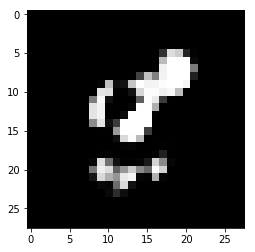

Loop: 372100, Generator_loss: 0.030827, Discriminator_loss: 0.0033585
Loop: 372200, Generator_loss: 0.024398, Discriminator_loss: 0.0054523
Loop: 372300, Generator_loss: 0.018156, Discriminator_loss: -0.0023714
Loop: 372400, Generator_loss: 0.0032767, Discriminator_loss: 0.00013801
Loop: 372500, Generator_loss: -0.0099099, Discriminator_loss: 0.00061059
Loop: 372600, Generator_loss: -0.03428, Discriminator_loss: 0.0080505
Loop: 372700, Generator_loss: -0.025717, Discriminator_loss: -0.0034194
Loop: 372800, Generator_loss: 0.015488, Discriminator_loss: 0.0085915
Loop: 372900, Generator_loss: -0.045609, Discriminator_loss: -0.002114
Loop: 373000, Generator_loss: -0.0062702, Discriminator_loss: 0.0033071


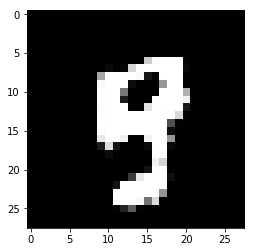

Loop: 373100, Generator_loss: 0.021141, Discriminator_loss: -0.00010556
Loop: 373200, Generator_loss: 0.037968, Discriminator_loss: 0.0031942
Loop: 373300, Generator_loss: 0.046775, Discriminator_loss: 0.011871
Loop: 373400, Generator_loss: -0.027305, Discriminator_loss: -0.00067875
Loop: 373500, Generator_loss: -0.025603, Discriminator_loss: 0.0015817
Loop: 373600, Generator_loss: -0.065584, Discriminator_loss: 0.012478
Loop: 373700, Generator_loss: -0.035583, Discriminator_loss: 0.0012127
Loop: 373800, Generator_loss: -0.013324, Discriminator_loss: 0.0041358
Loop: 373900, Generator_loss: -0.01547, Discriminator_loss: 0.010957
Loop: 374000, Generator_loss: -0.040965, Discriminator_loss: 0.0043965


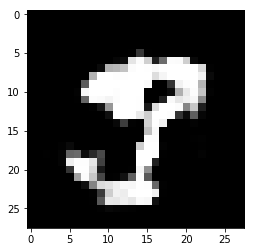

Loop: 374100, Generator_loss: -0.020973, Discriminator_loss: 0.0077688
Loop: 374200, Generator_loss: -0.037512, Discriminator_loss: -0.0051534
Loop: 374300, Generator_loss: -0.021872, Discriminator_loss: -0.0032356
Loop: 374400, Generator_loss: -0.014914, Discriminator_loss: 0.00072864
Loop: 374500, Generator_loss: 0.020355, Discriminator_loss: 0.011159
Loop: 374600, Generator_loss: -0.030983, Discriminator_loss: 0.014113
Loop: 374700, Generator_loss: -0.050142, Discriminator_loss: 0.0051637
Loop: 374800, Generator_loss: -0.039083, Discriminator_loss: 0.0001494
Loop: 374900, Generator_loss: 0.0028198, Discriminator_loss: -0.00084633
Loop: 375000, Generator_loss: -0.015023, Discriminator_loss: 0.0050788


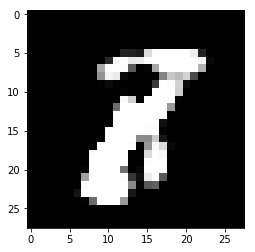

Loop: 375100, Generator_loss: 0.006793, Discriminator_loss: 0.0043462
Loop: 375200, Generator_loss: 0.028804, Discriminator_loss: 0.0020186
Loop: 375300, Generator_loss: 0.018766, Discriminator_loss: 0.0028173
Loop: 375400, Generator_loss: -0.01914, Discriminator_loss: -0.00017183
Loop: 375500, Generator_loss: 0.018484, Discriminator_loss: 0.010431
Loop: 375600, Generator_loss: 0.02818, Discriminator_loss: 0.0040433
Loop: 375700, Generator_loss: 0.019265, Discriminator_loss: 0.0062931
Loop: 375800, Generator_loss: 0.01319, Discriminator_loss: 0.0085163
Loop: 375900, Generator_loss: -0.035329, Discriminator_loss: 0.0067513
Loop: 376000, Generator_loss: -0.0063626, Discriminator_loss: 0.0046559


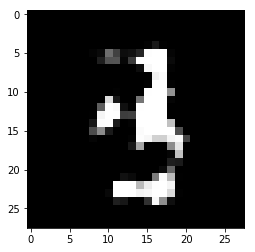

Loop: 376100, Generator_loss: 0.022273, Discriminator_loss: -0.00069051
Loop: 376200, Generator_loss: 0.0186, Discriminator_loss: 0.0042654
Loop: 376300, Generator_loss: 0.0041023, Discriminator_loss: 0.0065788
Loop: 376400, Generator_loss: 0.0016037, Discriminator_loss: 0.0061438
Loop: 376500, Generator_loss: -0.00072456, Discriminator_loss: 0.0014953
Loop: 376600, Generator_loss: 0.01985, Discriminator_loss: 0.00044142
Loop: 376700, Generator_loss: -0.044869, Discriminator_loss: -0.0012319
Loop: 376800, Generator_loss: -0.028832, Discriminator_loss: 0.0066119
Loop: 376900, Generator_loss: -0.054882, Discriminator_loss: 0.018015
Loop: 377000, Generator_loss: 0.022216, Discriminator_loss: 0.001728


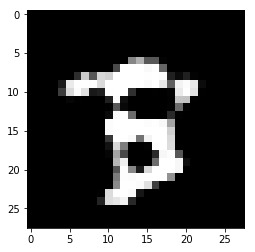

Loop: 377100, Generator_loss: 0.0063558, Discriminator_loss: 0.0036632
Loop: 377200, Generator_loss: 0.014498, Discriminator_loss: 0.0094338
Loop: 377300, Generator_loss: -0.046136, Discriminator_loss: 0.0041796
Loop: 377400, Generator_loss: -0.013607, Discriminator_loss: -0.003704
Loop: 377500, Generator_loss: -0.01826, Discriminator_loss: -0.0029711
Loop: 377600, Generator_loss: 0.026276, Discriminator_loss: 0.0032508
Loop: 377700, Generator_loss: -0.018364, Discriminator_loss: 0.0034515
Loop: 377800, Generator_loss: -0.043423, Discriminator_loss: 0.011352
Loop: 377900, Generator_loss: 0.027056, Discriminator_loss: 0.00032809
Loop: 378000, Generator_loss: -0.0095969, Discriminator_loss: 0.00072659


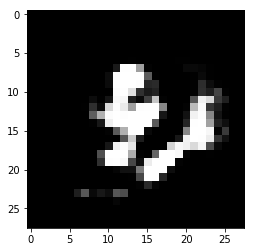

Loop: 378100, Generator_loss: -0.018125, Discriminator_loss: 0.0092222
Loop: 378200, Generator_loss: -0.034272, Discriminator_loss: -0.0016137
Loop: 378300, Generator_loss: 0.00058915, Discriminator_loss: 0.0039153
Loop: 378400, Generator_loss: 0.044609, Discriminator_loss: 0.0076768
Loop: 378500, Generator_loss: 0.0086623, Discriminator_loss: 0.00086127
Loop: 378600, Generator_loss: -0.0013634, Discriminator_loss: 0.0077711
Loop: 378700, Generator_loss: -0.015624, Discriminator_loss: -0.00031074
Loop: 378800, Generator_loss: -0.030944, Discriminator_loss: 0.00039636
Loop: 378900, Generator_loss: 0.039991, Discriminator_loss: 0.0040754
Loop: 379000, Generator_loss: -0.032362, Discriminator_loss: -2.2292e-05


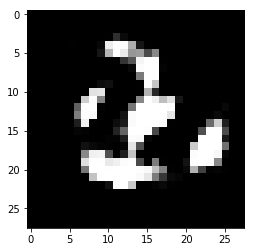

Loop: 379100, Generator_loss: 0.032265, Discriminator_loss: -0.0034413
Loop: 379200, Generator_loss: 0.01218, Discriminator_loss: 0.011278
Loop: 379300, Generator_loss: -0.011817, Discriminator_loss: -0.0028465
Loop: 379400, Generator_loss: -0.033601, Discriminator_loss: -0.0018727
Loop: 379500, Generator_loss: 0.036359, Discriminator_loss: 0.0024825
Loop: 379600, Generator_loss: 0.023186, Discriminator_loss: 0.0023672
Loop: 379700, Generator_loss: -0.0033473, Discriminator_loss: 0.0042924
Loop: 379800, Generator_loss: -0.031616, Discriminator_loss: 0.0020114
Loop: 379900, Generator_loss: -0.039466, Discriminator_loss: 0.0030541
Loop: 380000, Generator_loss: -0.034046, Discriminator_loss: 0.0048553


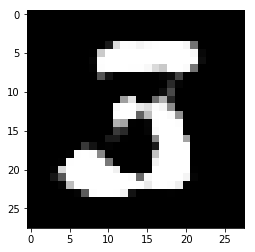

Loop: 380100, Generator_loss: -0.0079026, Discriminator_loss: 0.0053571
Loop: 380200, Generator_loss: 0.054024, Discriminator_loss: 0.013926
Loop: 380300, Generator_loss: -0.015838, Discriminator_loss: 0.0044912
Loop: 380400, Generator_loss: -0.0037689, Discriminator_loss: -0.0022138
Loop: 380500, Generator_loss: -0.039624, Discriminator_loss: 0.006677
Loop: 380600, Generator_loss: -0.035503, Discriminator_loss: 0.010869
Loop: 380700, Generator_loss: -0.0035492, Discriminator_loss: 0.0084692
Loop: 380800, Generator_loss: -0.0060565, Discriminator_loss: 0.0010161
Loop: 380900, Generator_loss: 0.026964, Discriminator_loss: -0.0019604
Loop: 381000, Generator_loss: -0.023868, Discriminator_loss: 0.0023073


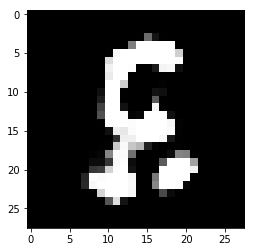

Loop: 381100, Generator_loss: -0.012702, Discriminator_loss: -0.0037199
Loop: 381200, Generator_loss: 0.001042, Discriminator_loss: -0.0017674
Loop: 381300, Generator_loss: -0.00026482, Discriminator_loss: 0.00078435
Loop: 381400, Generator_loss: -0.011371, Discriminator_loss: 0.00065669
Loop: 381500, Generator_loss: -0.023433, Discriminator_loss: 0.00069172
Loop: 381600, Generator_loss: -0.045953, Discriminator_loss: 0.0092877
Loop: 381700, Generator_loss: 0.0068749, Discriminator_loss: 0.0034001
Loop: 381800, Generator_loss: -0.0031088, Discriminator_loss: 0.00066553
Loop: 381900, Generator_loss: 0.0061749, Discriminator_loss: 0.0031514
Loop: 382000, Generator_loss: 0.028411, Discriminator_loss: -0.00014004


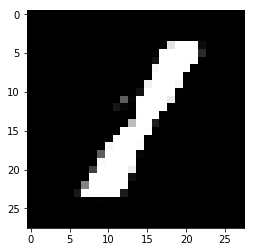

Loop: 382100, Generator_loss: -0.018107, Discriminator_loss: 0.0011924
Loop: 382200, Generator_loss: -0.013148, Discriminator_loss: 0.0044283
Loop: 382300, Generator_loss: -0.058423, Discriminator_loss: 0.0035692
Loop: 382400, Generator_loss: 0.0064859, Discriminator_loss: 0.0021349
Loop: 382500, Generator_loss: -0.0047005, Discriminator_loss: 0.0019936
Loop: 382600, Generator_loss: 0.0045825, Discriminator_loss: 0.00013334
Loop: 382700, Generator_loss: -0.022062, Discriminator_loss: 0.0010462
Loop: 382800, Generator_loss: -0.0052623, Discriminator_loss: 0.0031248
Loop: 382900, Generator_loss: 0.010153, Discriminator_loss: -0.00095425
Loop: 383000, Generator_loss: 0.0036297, Discriminator_loss: 0.00062782


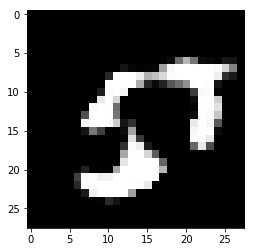

Loop: 383100, Generator_loss: -0.017459, Discriminator_loss: 0.0090266
Loop: 383200, Generator_loss: 0.025379, Discriminator_loss: 0.0015093
Loop: 383300, Generator_loss: 0.012371, Discriminator_loss: 0.0094793
Loop: 383400, Generator_loss: 0.0074269, Discriminator_loss: 0.0060742
Loop: 383500, Generator_loss: -0.047475, Discriminator_loss: 0.0043762
Loop: 383600, Generator_loss: -0.02118, Discriminator_loss: 0.0047073
Loop: 383700, Generator_loss: 0.017084, Discriminator_loss: -0.002712
Loop: 383800, Generator_loss: 0.0078188, Discriminator_loss: 0.0035372
Loop: 383900, Generator_loss: 0.029968, Discriminator_loss: 0.004105
Loop: 384000, Generator_loss: 0.0025532, Discriminator_loss: 0.00342


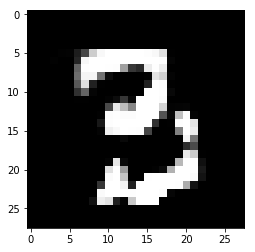

Loop: 384100, Generator_loss: -0.0030914, Discriminator_loss: 0.0052578
Loop: 384200, Generator_loss: -0.035572, Discriminator_loss: 0.0032535
Loop: 384300, Generator_loss: 0.0041225, Discriminator_loss: 0.0057889
Loop: 384400, Generator_loss: -0.0052506, Discriminator_loss: -0.00074695
Loop: 384500, Generator_loss: -0.025592, Discriminator_loss: 0.0032364
Loop: 384600, Generator_loss: -0.016809, Discriminator_loss: 0.0035409
Loop: 384700, Generator_loss: 0.017914, Discriminator_loss: 0.0067051
Loop: 384800, Generator_loss: 0.0081741, Discriminator_loss: -0.0026367
Loop: 384900, Generator_loss: 0.021431, Discriminator_loss: -0.00036459
Loop: 385000, Generator_loss: 0.0096851, Discriminator_loss: -0.0001617


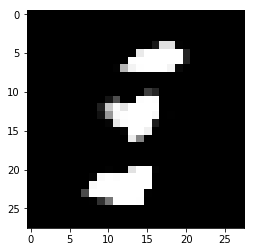

Loop: 385100, Generator_loss: 0.0052136, Discriminator_loss: 0.0076127
Loop: 385200, Generator_loss: -0.037131, Discriminator_loss: 0.005199
Loop: 385300, Generator_loss: 0.012481, Discriminator_loss: 0.0035837
Loop: 385400, Generator_loss: 0.0077866, Discriminator_loss: -0.0080718
Loop: 385500, Generator_loss: 0.022502, Discriminator_loss: 9.4943e-05
Loop: 385600, Generator_loss: -0.036628, Discriminator_loss: 0.0019693
Loop: 385700, Generator_loss: -0.018994, Discriminator_loss: 0.0066129
Loop: 385800, Generator_loss: -0.039812, Discriminator_loss: 0.0051806
Loop: 385900, Generator_loss: 0.023054, Discriminator_loss: 0.00030915
Loop: 386000, Generator_loss: 0.011601, Discriminator_loss: 0.0025436


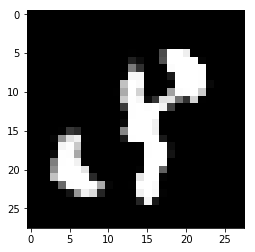

Loop: 386100, Generator_loss: 0.049331, Discriminator_loss: 0.0016386
Loop: 386200, Generator_loss: 0.025769, Discriminator_loss: 0.0015991
Loop: 386300, Generator_loss: -0.012483, Discriminator_loss: 0.0037322
Loop: 386400, Generator_loss: 0.01408, Discriminator_loss: 0.0024628
Loop: 386500, Generator_loss: -0.055101, Discriminator_loss: 0.0073473
Loop: 386600, Generator_loss: 0.012751, Discriminator_loss: 0.0066621
Loop: 386700, Generator_loss: -0.023217, Discriminator_loss: 0.0079867
Loop: 386800, Generator_loss: 0.01958, Discriminator_loss: 0.0032031
Loop: 386900, Generator_loss: 0.00029359, Discriminator_loss: -0.001882
Loop: 387000, Generator_loss: -0.0063092, Discriminator_loss: 0.0033654


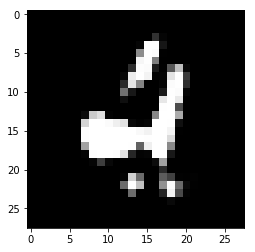

Loop: 387100, Generator_loss: 0.0090269, Discriminator_loss: -0.0057896
Loop: 387200, Generator_loss: -0.062227, Discriminator_loss: 0.019587
Loop: 387300, Generator_loss: -0.028305, Discriminator_loss: 0.003759
Loop: 387400, Generator_loss: -0.013781, Discriminator_loss: 0.0012721
Loop: 387500, Generator_loss: -0.037809, Discriminator_loss: 0.0098439
Loop: 387600, Generator_loss: -0.022167, Discriminator_loss: 0.003586
Loop: 387700, Generator_loss: -0.0043311, Discriminator_loss: -0.0053617
Loop: 387800, Generator_loss: -0.011618, Discriminator_loss: 0.0036216
Loop: 387900, Generator_loss: -0.021894, Discriminator_loss: 0.0029722
Loop: 388000, Generator_loss: -0.012153, Discriminator_loss: 0.0061793


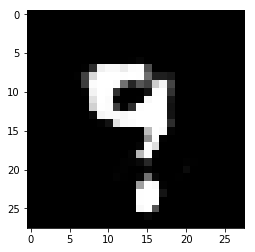

Loop: 388100, Generator_loss: -0.0082371, Discriminator_loss: 0.00033688
Loop: 388200, Generator_loss: -0.001537, Discriminator_loss: -0.0019998
Loop: 388300, Generator_loss: -0.049564, Discriminator_loss: 0.0060527
Loop: 388400, Generator_loss: 0.012278, Discriminator_loss: 0.0048863
Loop: 388500, Generator_loss: -0.041852, Discriminator_loss: 0.0004891
Loop: 388600, Generator_loss: -0.045868, Discriminator_loss: 0.0028829
Loop: 388700, Generator_loss: -0.023787, Discriminator_loss: -0.0041679
Loop: 388800, Generator_loss: -0.061708, Discriminator_loss: 0.009982
Loop: 388900, Generator_loss: 0.0053861, Discriminator_loss: 0.0033656
Loop: 389000, Generator_loss: 0.0031493, Discriminator_loss: -0.0067562


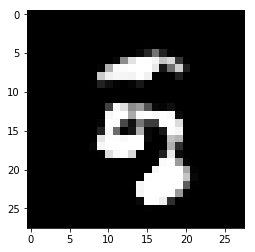

Loop: 389100, Generator_loss: 0.01466, Discriminator_loss: -0.00054306
Loop: 389200, Generator_loss: -0.035154, Discriminator_loss: 0.0015647
Loop: 389300, Generator_loss: 0.008423, Discriminator_loss: 0.0062128
Loop: 389400, Generator_loss: -0.036373, Discriminator_loss: 0.0041906
Loop: 389500, Generator_loss: 0.046263, Discriminator_loss: 0.0022455
Loop: 389600, Generator_loss: 0.013757, Discriminator_loss: 0.0074166
Loop: 389700, Generator_loss: 0.0527, Discriminator_loss: 0.0020633
Loop: 389800, Generator_loss: 0.0047729, Discriminator_loss: 0.0034006
Loop: 389900, Generator_loss: -0.018885, Discriminator_loss: 0.0011678
Loop: 390000, Generator_loss: -0.01329, Discriminator_loss: -0.00027947


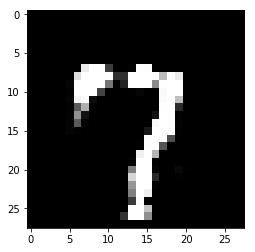

Loop: 390100, Generator_loss: -1.8318e-05, Discriminator_loss: 0.0026589
Loop: 390200, Generator_loss: -0.0022074, Discriminator_loss: 0.00108
Loop: 390300, Generator_loss: -0.055791, Discriminator_loss: 0.0035635
Loop: 390400, Generator_loss: -0.032366, Discriminator_loss: 0.0029211
Loop: 390500, Generator_loss: -0.04086, Discriminator_loss: 0.0041496
Loop: 390600, Generator_loss: 0.0039371, Discriminator_loss: 0.0033689
Loop: 390700, Generator_loss: 0.011746, Discriminator_loss: 0.0047248
Loop: 390800, Generator_loss: 0.051046, Discriminator_loss: -0.0034269
Loop: 390900, Generator_loss: -0.031125, Discriminator_loss: 0.004706
Loop: 391000, Generator_loss: -0.00464, Discriminator_loss: -0.00089885


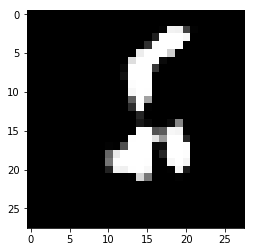

Loop: 391100, Generator_loss: -0.034801, Discriminator_loss: -0.0051376
Loop: 391200, Generator_loss: -0.022158, Discriminator_loss: 0.0060625
Loop: 391300, Generator_loss: -0.011461, Discriminator_loss: 0.0029124
Loop: 391400, Generator_loss: 0.003821, Discriminator_loss: 0.0040482
Loop: 391500, Generator_loss: -0.015093, Discriminator_loss: 0.00068503
Loop: 391600, Generator_loss: 0.019649, Discriminator_loss: 0.0033634
Loop: 391700, Generator_loss: -0.047559, Discriminator_loss: 0.011286
Loop: 391800, Generator_loss: 0.016785, Discriminator_loss: 0.0022145
Loop: 391900, Generator_loss: -0.0084624, Discriminator_loss: 0.0048941
Loop: 392000, Generator_loss: 0.017282, Discriminator_loss: 0.0042367


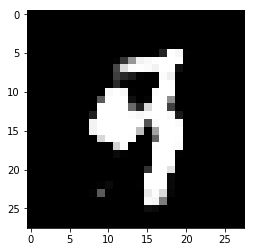

Loop: 392100, Generator_loss: 0.041547, Discriminator_loss: -0.0028509
Loop: 392200, Generator_loss: 0.030652, Discriminator_loss: 0.0066149
Loop: 392300, Generator_loss: 0.0042015, Discriminator_loss: 0.00014628
Loop: 392400, Generator_loss: -0.032636, Discriminator_loss: -0.0013551
Loop: 392500, Generator_loss: 0.01345, Discriminator_loss: 0.0041637
Loop: 392600, Generator_loss: -0.037322, Discriminator_loss: -0.0059258
Loop: 392700, Generator_loss: 0.015796, Discriminator_loss: 0.0056724
Loop: 392800, Generator_loss: -0.047993, Discriminator_loss: 0.010692
Loop: 392900, Generator_loss: -0.024934, Discriminator_loss: 0.0033299
Loop: 393000, Generator_loss: 0.010001, Discriminator_loss: 0.0053555


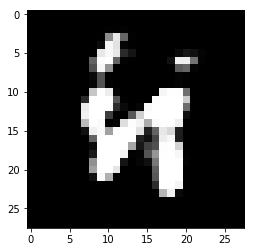

Loop: 393100, Generator_loss: 0.020655, Discriminator_loss: 0.00014932
Loop: 393200, Generator_loss: 0.0097803, Discriminator_loss: 0.0015529
Loop: 393300, Generator_loss: 0.051336, Discriminator_loss: 0.0041566
Loop: 393400, Generator_loss: -0.033455, Discriminator_loss: 0.0015264
Loop: 393500, Generator_loss: -0.022133, Discriminator_loss: 0.0075047
Loop: 393600, Generator_loss: 0.0014911, Discriminator_loss: -0.002712
Loop: 393700, Generator_loss: -0.0037443, Discriminator_loss: 0.0031253
Loop: 393800, Generator_loss: -0.028988, Discriminator_loss: 0.0026069
Loop: 393900, Generator_loss: 0.028546, Discriminator_loss: 0.0069233
Loop: 394000, Generator_loss: -0.025213, Discriminator_loss: 0.0022088


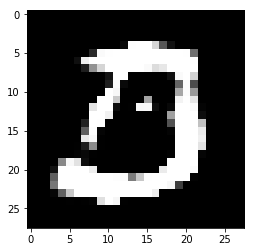

Loop: 394100, Generator_loss: 0.016282, Discriminator_loss: -0.0028723
Loop: 394200, Generator_loss: -0.0051428, Discriminator_loss: 0.0017923
Loop: 394300, Generator_loss: -0.027142, Discriminator_loss: 0.011244
Loop: 394400, Generator_loss: -0.0034893, Discriminator_loss: 0.0087364
Loop: 394500, Generator_loss: 0.0087127, Discriminator_loss: 0.0085459
Loop: 394600, Generator_loss: -0.021521, Discriminator_loss: 0.0057194
Loop: 394700, Generator_loss: -0.015967, Discriminator_loss: -0.0026929
Loop: 394800, Generator_loss: -0.020742, Discriminator_loss: 0.00091214
Loop: 394900, Generator_loss: -0.014773, Discriminator_loss: 0.0026987
Loop: 395000, Generator_loss: -0.0084258, Discriminator_loss: 0.0027403


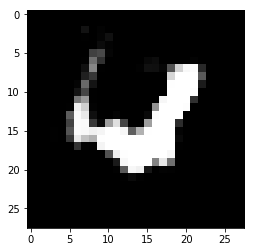

Loop: 395100, Generator_loss: -0.019847, Discriminator_loss: 0.0028346
Loop: 395200, Generator_loss: -0.045138, Discriminator_loss: -0.0054148
Loop: 395300, Generator_loss: -0.032644, Discriminator_loss: 0.00073893
Loop: 395400, Generator_loss: -0.015943, Discriminator_loss: 0.0066765
Loop: 395500, Generator_loss: 0.018086, Discriminator_loss: 0.0054266
Loop: 395600, Generator_loss: -0.032992, Discriminator_loss: 0.0027063
Loop: 395700, Generator_loss: -0.049159, Discriminator_loss: 0.010961
Loop: 395800, Generator_loss: -0.039382, Discriminator_loss: 0.0095124
Loop: 395900, Generator_loss: -0.020152, Discriminator_loss: 0.008609
Loop: 396000, Generator_loss: -0.058996, Discriminator_loss: 0.0069459


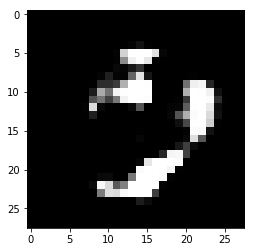

Loop: 396100, Generator_loss: -0.065788, Discriminator_loss: 0.010338
Loop: 396200, Generator_loss: -0.024472, Discriminator_loss: -0.00067163
Loop: 396300, Generator_loss: 0.0083947, Discriminator_loss: 0.0039281
Loop: 396400, Generator_loss: 0.028789, Discriminator_loss: 0.001719
Loop: 396500, Generator_loss: 0.0099376, Discriminator_loss: 0.00099548
Loop: 396600, Generator_loss: -0.045198, Discriminator_loss: 0.0036126
Loop: 396700, Generator_loss: 0.0049037, Discriminator_loss: 0.0041851
Loop: 396800, Generator_loss: -0.04254, Discriminator_loss: 0.0055144
Loop: 396900, Generator_loss: -0.031076, Discriminator_loss: -0.0019801
Loop: 397000, Generator_loss: 0.016848, Discriminator_loss: 0.0027231


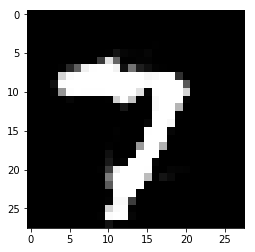

Loop: 397100, Generator_loss: -0.0338, Discriminator_loss: -0.0018278
Loop: 397200, Generator_loss: 0.0050304, Discriminator_loss: 0.0030472
Loop: 397300, Generator_loss: 0.0048195, Discriminator_loss: 0.003723
Loop: 397400, Generator_loss: -0.016441, Discriminator_loss: -0.0037545
Loop: 397500, Generator_loss: 0.029101, Discriminator_loss: 0.0028335
Loop: 397600, Generator_loss: 0.01508, Discriminator_loss: 0.0010038
Loop: 397700, Generator_loss: -0.033559, Discriminator_loss: 0.0036494
Loop: 397800, Generator_loss: -0.0036543, Discriminator_loss: -0.0014393
Loop: 397900, Generator_loss: -0.022341, Discriminator_loss: 0.0012184
Loop: 398000, Generator_loss: -0.03144, Discriminator_loss: 0.00027416


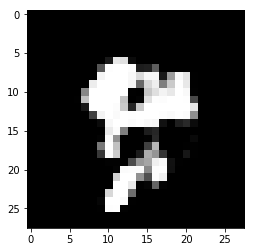

Loop: 398100, Generator_loss: 0.015293, Discriminator_loss: 0.0057049
Loop: 398200, Generator_loss: -0.0036189, Discriminator_loss: 0.0035571
Loop: 398300, Generator_loss: -0.019241, Discriminator_loss: 0.0027632
Loop: 398400, Generator_loss: 0.016053, Discriminator_loss: 0.0031842
Loop: 398500, Generator_loss: -0.0039047, Discriminator_loss: 0.0014903
Loop: 398600, Generator_loss: -0.021512, Discriminator_loss: 0.0057661
Loop: 398700, Generator_loss: 0.0011817, Discriminator_loss: 0.0026689
Loop: 398800, Generator_loss: -0.039322, Discriminator_loss: 0.0060148
Loop: 398900, Generator_loss: -0.012294, Discriminator_loss: 0.005384
Loop: 399000, Generator_loss: -0.00054193, Discriminator_loss: 0.0053144


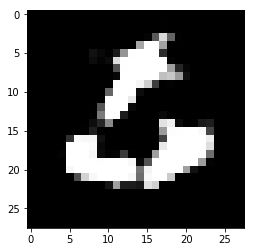

Loop: 399100, Generator_loss: 0.043249, Discriminator_loss: 0.0043454
Loop: 399200, Generator_loss: -0.036925, Discriminator_loss: -0.0059024
Loop: 399300, Generator_loss: -0.020087, Discriminator_loss: -8.6188e-05
Loop: 399400, Generator_loss: -0.022252, Discriminator_loss: -0.0044652
Loop: 399500, Generator_loss: 0.0084335, Discriminator_loss: 0.0065802
Loop: 399600, Generator_loss: -0.02943, Discriminator_loss: 0.0074802
Loop: 399700, Generator_loss: -0.0034472, Discriminator_loss: -0.0026598
Loop: 399800, Generator_loss: -0.026582, Discriminator_loss: 0.0048694
Loop: 399900, Generator_loss: -0.037023, Discriminator_loss: 0.0061612
Loop: 400000, Generator_loss: -0.016008, Discriminator_loss: 0.00051035


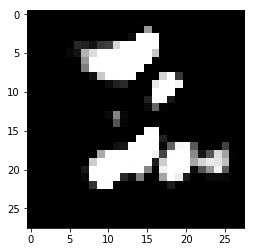

Loop: 400100, Generator_loss: 0.018439, Discriminator_loss: -0.0060401
Loop: 400200, Generator_loss: 0.01833, Discriminator_loss: -0.0014724
Loop: 400300, Generator_loss: -0.024384, Discriminator_loss: 0.0071095
Loop: 400400, Generator_loss: -0.067949, Discriminator_loss: -0.0054406
Loop: 400500, Generator_loss: -0.0053391, Discriminator_loss: -3.8794e-06
Loop: 400600, Generator_loss: 0.000789, Discriminator_loss: 0.0058197
Loop: 400700, Generator_loss: -0.036125, Discriminator_loss: 0.005786
Loop: 400800, Generator_loss: -0.010214, Discriminator_loss: 0.003459
Loop: 400900, Generator_loss: -0.007103, Discriminator_loss: 0.00014392
Loop: 401000, Generator_loss: 0.0071335, Discriminator_loss: 0.0018581


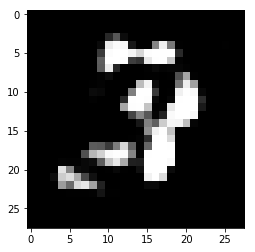

Loop: 401100, Generator_loss: 0.018159, Discriminator_loss: 0.0032021
Loop: 401200, Generator_loss: 0.021218, Discriminator_loss: -0.0032903
Loop: 401300, Generator_loss: -0.035198, Discriminator_loss: -0.00085196
Loop: 401400, Generator_loss: 0.0062296, Discriminator_loss: 0.0069067
Loop: 401500, Generator_loss: 0.014806, Discriminator_loss: 0.0037795
Loop: 401600, Generator_loss: -0.040151, Discriminator_loss: 0.0038288
Loop: 401700, Generator_loss: -0.010126, Discriminator_loss: 0.002615
Loop: 401800, Generator_loss: 0.040302, Discriminator_loss: 0.0072453
Loop: 401900, Generator_loss: 0.020879, Discriminator_loss: 0.0069638
Loop: 402000, Generator_loss: -0.011183, Discriminator_loss: 0.0059955


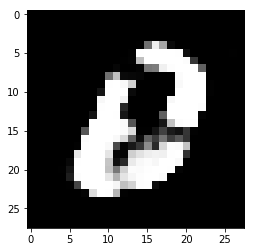

Loop: 402100, Generator_loss: -0.048142, Discriminator_loss: 0.0072311
Loop: 402200, Generator_loss: -0.020877, Discriminator_loss: 0.0018846
Loop: 402300, Generator_loss: -0.015185, Discriminator_loss: 0.0061899
Loop: 402400, Generator_loss: 0.069154, Discriminator_loss: 0.010377
Loop: 402500, Generator_loss: 0.045897, Discriminator_loss: 0.010984
Loop: 402600, Generator_loss: -0.0027011, Discriminator_loss: -0.00058646
Loop: 402700, Generator_loss: -0.03192, Discriminator_loss: 0.008013
Loop: 402800, Generator_loss: -0.025464, Discriminator_loss: 0.011088
Loop: 402900, Generator_loss: -0.031054, Discriminator_loss: 0.002898
Loop: 403000, Generator_loss: -0.049494, Discriminator_loss: 0.0041569


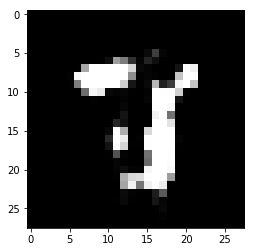

Loop: 403100, Generator_loss: -0.0080024, Discriminator_loss: 0.0026422
Loop: 403200, Generator_loss: 0.0078236, Discriminator_loss: 0.010235
Loop: 403300, Generator_loss: -0.01843, Discriminator_loss: 0.000831
Loop: 403400, Generator_loss: -0.0049265, Discriminator_loss: 0.0036779
Loop: 403500, Generator_loss: -0.010535, Discriminator_loss: -0.0034078
Loop: 403600, Generator_loss: 0.012161, Discriminator_loss: 0.0094005
Loop: 403700, Generator_loss: -0.041621, Discriminator_loss: 0.0096922
Loop: 403800, Generator_loss: -0.015606, Discriminator_loss: -0.005823
Loop: 403900, Generator_loss: -0.009571, Discriminator_loss: 0.00072903
Loop: 404000, Generator_loss: -0.04357, Discriminator_loss: 0.0039927


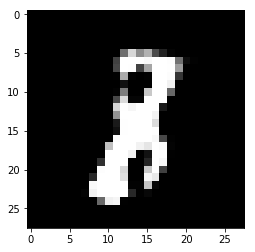

Loop: 404100, Generator_loss: -0.051769, Discriminator_loss: 0.0028017
Loop: 404200, Generator_loss: 0.0010359, Discriminator_loss: 0.0034777
Loop: 404300, Generator_loss: 0.0089473, Discriminator_loss: -0.00028541
Loop: 404400, Generator_loss: -0.020634, Discriminator_loss: 0.0063659
Loop: 404500, Generator_loss: -0.033671, Discriminator_loss: 6.0752e-05
Loop: 404600, Generator_loss: -0.011068, Discriminator_loss: 0.0068479
Loop: 404700, Generator_loss: -0.00091865, Discriminator_loss: 0.0049805
Loop: 404800, Generator_loss: -0.0067443, Discriminator_loss: 0.00067362
Loop: 404900, Generator_loss: -0.010491, Discriminator_loss: -0.00010611
Loop: 405000, Generator_loss: -0.032689, Discriminator_loss: 0.0035732


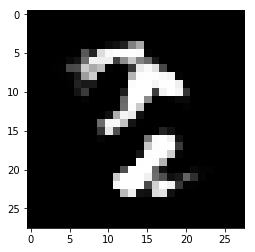

Loop: 405100, Generator_loss: -0.056901, Discriminator_loss: 0.0090154
Loop: 405200, Generator_loss: -0.013793, Discriminator_loss: 0.0018958
Loop: 405300, Generator_loss: -0.021707, Discriminator_loss: 0.002864
Loop: 405400, Generator_loss: 0.010775, Discriminator_loss: 0.0084444
Loop: 405500, Generator_loss: -0.0204, Discriminator_loss: 0.002675
Loop: 405600, Generator_loss: 0.011277, Discriminator_loss: 0.011422
Loop: 405700, Generator_loss: -0.025918, Discriminator_loss: -0.0014684
Loop: 405800, Generator_loss: -0.00152, Discriminator_loss: 0.0029261
Loop: 405900, Generator_loss: -0.045104, Discriminator_loss: 0.00055875
Loop: 406000, Generator_loss: 0.020957, Discriminator_loss: 0.00022978


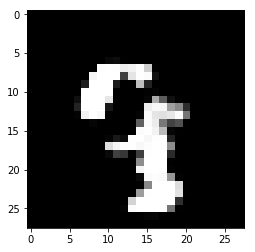

Loop: 406100, Generator_loss: -0.022714, Discriminator_loss: -0.0041515
Loop: 406200, Generator_loss: -0.0036494, Discriminator_loss: 0.0027054
Loop: 406300, Generator_loss: -0.049476, Discriminator_loss: 0.0019361
Loop: 406400, Generator_loss: -0.0064878, Discriminator_loss: -0.0010909
Loop: 406500, Generator_loss: -0.016519, Discriminator_loss: 0.0026972
Loop: 406600, Generator_loss: -0.051898, Discriminator_loss: 0.0069101
Loop: 406700, Generator_loss: -0.0096382, Discriminator_loss: 0.0069916
Loop: 406800, Generator_loss: 0.033175, Discriminator_loss: 0.0063226
Loop: 406900, Generator_loss: -0.046931, Discriminator_loss: 0.0074906
Loop: 407000, Generator_loss: -0.075219, Discriminator_loss: -0.0039383


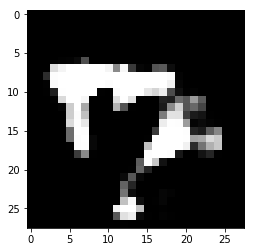

Loop: 407100, Generator_loss: -0.049297, Discriminator_loss: 0.0086441
Loop: 407200, Generator_loss: 0.0058252, Discriminator_loss: -0.006002
Loop: 407300, Generator_loss: -0.031112, Discriminator_loss: 0.00077667
Loop: 407400, Generator_loss: -0.015846, Discriminator_loss: 0.0010051
Loop: 407500, Generator_loss: 0.037078, Discriminator_loss: 0.0079759
Loop: 407600, Generator_loss: -0.035397, Discriminator_loss: 0.0026129
Loop: 407700, Generator_loss: -0.008339, Discriminator_loss: 0.0098227
Loop: 407800, Generator_loss: -0.031137, Discriminator_loss: 0.0010443
Loop: 407900, Generator_loss: -0.022946, Discriminator_loss: 0.0014557
Loop: 408000, Generator_loss: -0.027303, Discriminator_loss: 0.0010437


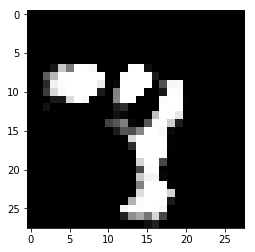

Loop: 408100, Generator_loss: -0.047627, Discriminator_loss: 0.010141
Loop: 408200, Generator_loss: 0.0088183, Discriminator_loss: 0.0040297
Loop: 408300, Generator_loss: 0.035954, Discriminator_loss: 0.00057169
Loop: 408400, Generator_loss: 0.01506, Discriminator_loss: -0.00074873
Loop: 408500, Generator_loss: 0.0030441, Discriminator_loss: 0.00092804
Loop: 408600, Generator_loss: -0.035512, Discriminator_loss: 0.0017743
Loop: 408700, Generator_loss: -0.0036229, Discriminator_loss: 0.0041958
Loop: 408800, Generator_loss: -0.016502, Discriminator_loss: -0.0041249
Loop: 408900, Generator_loss: -0.028818, Discriminator_loss: 0.0033007
Loop: 409000, Generator_loss: -3.9191e-07, Discriminator_loss: 0.0067807


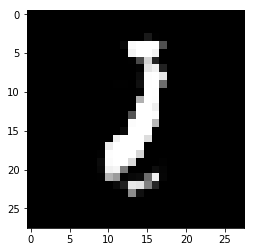

Loop: 409100, Generator_loss: -0.0066944, Discriminator_loss: 0.0021679
Loop: 409200, Generator_loss: -0.038617, Discriminator_loss: 0.0064281
Loop: 409300, Generator_loss: -0.048707, Discriminator_loss: 0.0031662
Loop: 409400, Generator_loss: -0.050877, Discriminator_loss: 0.00052071
Loop: 409500, Generator_loss: -0.032204, Discriminator_loss: 0.00086461
Loop: 409600, Generator_loss: -0.011855, Discriminator_loss: 0.0041336
Loop: 409700, Generator_loss: -0.051492, Discriminator_loss: 0.0066487
Loop: 409800, Generator_loss: -0.068905, Discriminator_loss: 0.011996
Loop: 409900, Generator_loss: -0.016939, Discriminator_loss: 0.005068
Loop: 410000, Generator_loss: 0.0080124, Discriminator_loss: 0.0052719


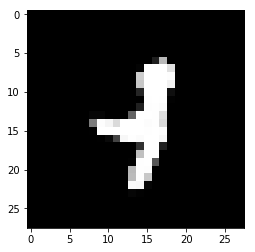

Loop: 410100, Generator_loss: -0.025886, Discriminator_loss: 0.0017544
Loop: 410200, Generator_loss: 0.010418, Discriminator_loss: 0.0037225
Loop: 410300, Generator_loss: 0.025112, Discriminator_loss: 0.0054418
Loop: 410400, Generator_loss: -0.035046, Discriminator_loss: 0.0078236
Loop: 410500, Generator_loss: -0.023958, Discriminator_loss: 0.0040394
Loop: 410600, Generator_loss: -0.002864, Discriminator_loss: 0.010217
Loop: 410700, Generator_loss: -0.0043765, Discriminator_loss: 0.0025519
Loop: 410800, Generator_loss: 0.013468, Discriminator_loss: -0.0042477
Loop: 410900, Generator_loss: 0.012739, Discriminator_loss: 0.00015703
Loop: 411000, Generator_loss: -0.0062822, Discriminator_loss: 0.0032273


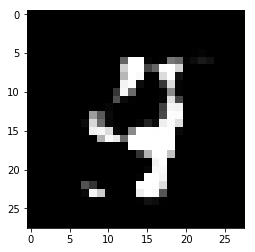

Loop: 411100, Generator_loss: 0.015474, Discriminator_loss: 0.0050631
Loop: 411200, Generator_loss: -0.017425, Discriminator_loss: -0.00025324
Loop: 411300, Generator_loss: -0.01388, Discriminator_loss: 0.0036784
Loop: 411400, Generator_loss: -0.014585, Discriminator_loss: 0.010021
Loop: 411500, Generator_loss: -0.0081438, Discriminator_loss: 0.00043072
Loop: 411600, Generator_loss: 0.069645, Discriminator_loss: 0.00055893
Loop: 411700, Generator_loss: -0.04479, Discriminator_loss: 0.0031556
Loop: 411800, Generator_loss: -0.035907, Discriminator_loss: 0.0061332
Loop: 411900, Generator_loss: -0.037156, Discriminator_loss: 0.0095694
Loop: 412000, Generator_loss: -0.021461, Discriminator_loss: -0.0067412


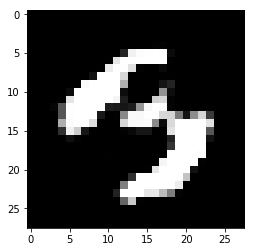

Loop: 412100, Generator_loss: 0.010038, Discriminator_loss: 0.0041095
Loop: 412200, Generator_loss: -0.058868, Discriminator_loss: 0.0041111
Loop: 412300, Generator_loss: -0.020062, Discriminator_loss: 0.0053609
Loop: 412400, Generator_loss: -0.012906, Discriminator_loss: 0.0015558
Loop: 412500, Generator_loss: -0.040031, Discriminator_loss: 0.0027107
Loop: 412600, Generator_loss: 0.00089691, Discriminator_loss: 0.004348
Loop: 412700, Generator_loss: -0.016233, Discriminator_loss: 0.0014432
Loop: 412800, Generator_loss: -0.055579, Discriminator_loss: -0.0057497
Loop: 412900, Generator_loss: -0.020597, Discriminator_loss: 0.0028905
Loop: 413000, Generator_loss: -0.0023124, Discriminator_loss: 0.0038657


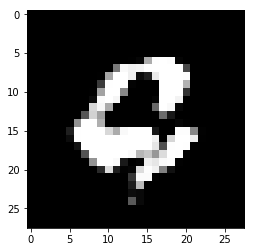

Loop: 413100, Generator_loss: -0.0037823, Discriminator_loss: 0.0069424
Loop: 413200, Generator_loss: -0.017305, Discriminator_loss: 0.0068875
Loop: 413300, Generator_loss: -0.059976, Discriminator_loss: 0.01109
Loop: 413400, Generator_loss: -0.0045394, Discriminator_loss: -0.0010618
Loop: 413500, Generator_loss: -0.054154, Discriminator_loss: -0.0024488
Loop: 413600, Generator_loss: 0.028644, Discriminator_loss: 0.0096205
Loop: 413700, Generator_loss: 0.048795, Discriminator_loss: 0.0083724
Loop: 413800, Generator_loss: -0.043817, Discriminator_loss: 0.010229
Loop: 413900, Generator_loss: -0.019656, Discriminator_loss: 0.0085822
Loop: 414000, Generator_loss: -0.012913, Discriminator_loss: 0.004958


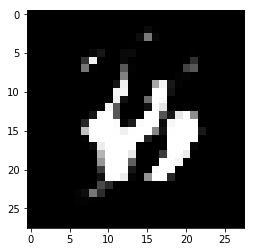

Loop: 414100, Generator_loss: -0.016685, Discriminator_loss: -0.00084261
Loop: 414200, Generator_loss: 0.0035399, Discriminator_loss: 0.0024931
Loop: 414300, Generator_loss: 0.0029679, Discriminator_loss: 0.0056458
Loop: 414400, Generator_loss: -0.016685, Discriminator_loss: 0.0051922
Loop: 414500, Generator_loss: -0.010363, Discriminator_loss: -0.00061654
Loop: 414600, Generator_loss: -0.0085855, Discriminator_loss: 0.00055085
Loop: 414700, Generator_loss: -0.091746, Discriminator_loss: 0.0029051
Loop: 414800, Generator_loss: -0.02234, Discriminator_loss: 0.0031428
Loop: 414900, Generator_loss: 0.0028793, Discriminator_loss: 0.0046004
Loop: 415000, Generator_loss: -0.014679, Discriminator_loss: -0.0014571


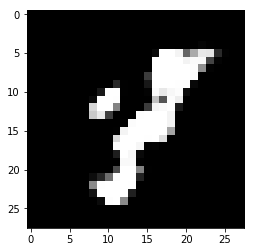

Loop: 415100, Generator_loss: 0.0020338, Discriminator_loss: 0.0075752
Loop: 415200, Generator_loss: 0.0054541, Discriminator_loss: -0.007496
Loop: 415300, Generator_loss: -0.0117, Discriminator_loss: 0.002963
Loop: 415400, Generator_loss: -0.0071245, Discriminator_loss: 0.0049936
Loop: 415500, Generator_loss: 0.039236, Discriminator_loss: 0.0068207
Loop: 415600, Generator_loss: 0.020765, Discriminator_loss: 0.0021387
Loop: 415700, Generator_loss: -0.011148, Discriminator_loss: 0.00016487
Loop: 415800, Generator_loss: -0.047641, Discriminator_loss: 0.0035529
Loop: 415900, Generator_loss: -0.064305, Discriminator_loss: 0.0080246
Loop: 416000, Generator_loss: -0.023173, Discriminator_loss: 0.0040789


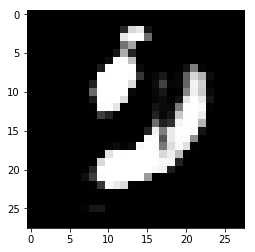

Loop: 416100, Generator_loss: -0.032878, Discriminator_loss: 0.0023186
Loop: 416200, Generator_loss: -0.033818, Discriminator_loss: -0.0050951
Loop: 416300, Generator_loss: 0.017412, Discriminator_loss: 0.0035509
Loop: 416400, Generator_loss: -0.030945, Discriminator_loss: 0.0027422
Loop: 416500, Generator_loss: -0.020948, Discriminator_loss: 0.011892
Loop: 416600, Generator_loss: -0.013586, Discriminator_loss: 0.0010076
Loop: 416700, Generator_loss: -0.021652, Discriminator_loss: -0.004964
Loop: 416800, Generator_loss: -0.023808, Discriminator_loss: 0.0012022
Loop: 416900, Generator_loss: -0.012086, Discriminator_loss: 0.0068851
Loop: 417000, Generator_loss: -0.04925, Discriminator_loss: 0.00687


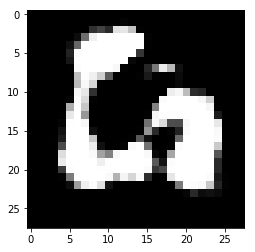

Loop: 417100, Generator_loss: -0.039337, Discriminator_loss: 0.0040969
Loop: 417200, Generator_loss: -0.029409, Discriminator_loss: 0.0062378
Loop: 417300, Generator_loss: -0.028395, Discriminator_loss: 0.0046033
Loop: 417400, Generator_loss: -0.043394, Discriminator_loss: -0.0016623
Loop: 417500, Generator_loss: -0.01538, Discriminator_loss: -0.0024374
Loop: 417600, Generator_loss: 0.0083892, Discriminator_loss: 0.0050804
Loop: 417700, Generator_loss: 0.010338, Discriminator_loss: 0.0010079
Loop: 417800, Generator_loss: -0.037387, Discriminator_loss: 0.0075552
Loop: 417900, Generator_loss: -0.027325, Discriminator_loss: -0.0017011
Loop: 418000, Generator_loss: -0.016206, Discriminator_loss: 0.00068933


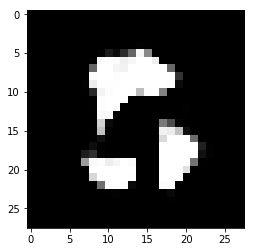

Loop: 418100, Generator_loss: -0.0078593, Discriminator_loss: -0.00020387
Loop: 418200, Generator_loss: -0.030864, Discriminator_loss: 0.0023318
Loop: 418300, Generator_loss: 0.0045399, Discriminator_loss: -0.0012755
Loop: 418400, Generator_loss: -0.012117, Discriminator_loss: 0.005563
Loop: 418500, Generator_loss: -0.035041, Discriminator_loss: 0.0076684
Loop: 418600, Generator_loss: 0.036734, Discriminator_loss: 0.0045236
Loop: 418700, Generator_loss: -0.019471, Discriminator_loss: 0.0006616
Loop: 418800, Generator_loss: -0.045791, Discriminator_loss: 0.0051958
Loop: 418900, Generator_loss: -0.035677, Discriminator_loss: -0.00067416
Loop: 419000, Generator_loss: -0.047617, Discriminator_loss: 0.0089484


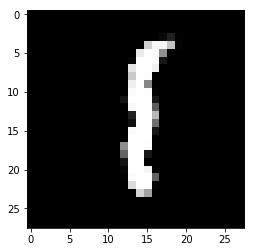

Loop: 419100, Generator_loss: -0.0005671, Discriminator_loss: 0.002629
Loop: 419200, Generator_loss: 0.0051138, Discriminator_loss: -0.00086274
Loop: 419300, Generator_loss: 0.01913, Discriminator_loss: -0.00055204
Loop: 419400, Generator_loss: 0.00060752, Discriminator_loss: 0.0048641
Loop: 419500, Generator_loss: -0.0030742, Discriminator_loss: 0.0030836
Loop: 419600, Generator_loss: 0.003781, Discriminator_loss: 0.0099191
Loop: 419700, Generator_loss: 0.015428, Discriminator_loss: 0.0092487
Loop: 419800, Generator_loss: -0.022131, Discriminator_loss: 0.0041671
Loop: 419900, Generator_loss: 0.021954, Discriminator_loss: 0.0026565
Loop: 420000, Generator_loss: -0.0062469, Discriminator_loss: 0.0045058


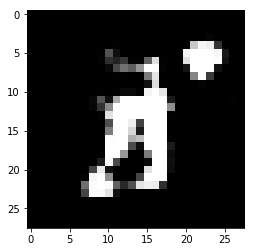

Loop: 420100, Generator_loss: -0.029971, Discriminator_loss: 0.010046
Loop: 420200, Generator_loss: -0.031226, Discriminator_loss: 0.0049757
Loop: 420300, Generator_loss: -0.012699, Discriminator_loss: 0.005561
Loop: 420400, Generator_loss: -0.027435, Discriminator_loss: 0.0011546
Loop: 420500, Generator_loss: -0.019357, Discriminator_loss: 0.0032111
Loop: 420600, Generator_loss: -0.015813, Discriminator_loss: -0.00060247
Loop: 420700, Generator_loss: -0.0086863, Discriminator_loss: 0.007167
Loop: 420800, Generator_loss: -0.029717, Discriminator_loss: 0.0065353
Loop: 420900, Generator_loss: -0.03324, Discriminator_loss: 0.00070313
Loop: 421000, Generator_loss: -0.0077906, Discriminator_loss: 0.0047908


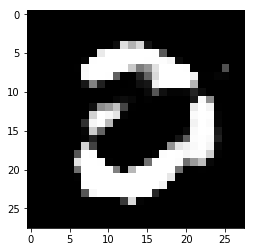

Loop: 421100, Generator_loss: -0.017406, Discriminator_loss: 0.001882
Loop: 421200, Generator_loss: -0.023044, Discriminator_loss: 0.0015127
Loop: 421300, Generator_loss: -0.0039928, Discriminator_loss: 0.00098459
Loop: 421400, Generator_loss: -0.022833, Discriminator_loss: 0.0088479
Loop: 421500, Generator_loss: 0.045074, Discriminator_loss: 0.0037801
Loop: 421600, Generator_loss: -0.014494, Discriminator_loss: 0.0022692
Loop: 421700, Generator_loss: -0.035249, Discriminator_loss: 0.0031685
Loop: 421800, Generator_loss: -0.011757, Discriminator_loss: -0.0007902
Loop: 421900, Generator_loss: 0.011469, Discriminator_loss: -9.8091e-05
Loop: 422000, Generator_loss: -0.0020691, Discriminator_loss: 0.0014795


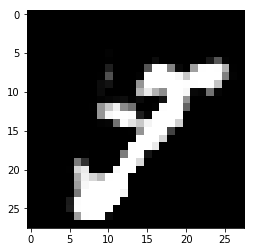

Loop: 422100, Generator_loss: -0.012025, Discriminator_loss: 0.0017249
Loop: 422200, Generator_loss: 0.00070367, Discriminator_loss: -0.0011549
Loop: 422300, Generator_loss: -0.0018609, Discriminator_loss: -0.0021479
Loop: 422400, Generator_loss: -0.079761, Discriminator_loss: 0.010728
Loop: 422500, Generator_loss: -0.028888, Discriminator_loss: 0.0039928
Loop: 422600, Generator_loss: -0.010168, Discriminator_loss: 6.1981e-05
Loop: 422700, Generator_loss: -0.022542, Discriminator_loss: 0.0036377
Loop: 422800, Generator_loss: 0.0055309, Discriminator_loss: 0.0042636
Loop: 422900, Generator_loss: 0.031255, Discriminator_loss: 0.0033276
Loop: 423000, Generator_loss: 0.047975, Discriminator_loss: -0.0021099


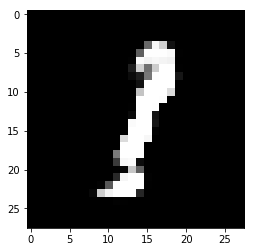

Loop: 423100, Generator_loss: 0.011379, Discriminator_loss: 0.0018136
Loop: 423200, Generator_loss: -0.0076865, Discriminator_loss: 0.0035142
Loop: 423300, Generator_loss: -0.011801, Discriminator_loss: -0.0010339
Loop: 423400, Generator_loss: -0.0083277, Discriminator_loss: 0.0062309
Loop: 423500, Generator_loss: 0.028937, Discriminator_loss: 0.0052636
Loop: 423600, Generator_loss: -0.025763, Discriminator_loss: 0.0049
Loop: 423700, Generator_loss: -0.010217, Discriminator_loss: 0.0037095
Loop: 423800, Generator_loss: 0.068674, Discriminator_loss: 0.014266
Loop: 423900, Generator_loss: -0.020986, Discriminator_loss: -0.0050908
Loop: 424000, Generator_loss: -0.02109, Discriminator_loss: 0.0082872


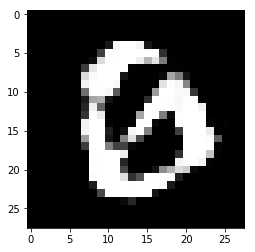

Loop: 424100, Generator_loss: -0.031989, Discriminator_loss: -0.00092228
Loop: 424200, Generator_loss: -0.0019793, Discriminator_loss: 0.0036626
Loop: 424300, Generator_loss: 0.0010661, Discriminator_loss: 0.0054307
Loop: 424400, Generator_loss: -0.017476, Discriminator_loss: 0.0023845
Loop: 424500, Generator_loss: 0.0039738, Discriminator_loss: 0.0025102
Loop: 424600, Generator_loss: -0.0074234, Discriminator_loss: 0.0029377
Loop: 424700, Generator_loss: -0.010587, Discriminator_loss: 0.0057841
Loop: 424800, Generator_loss: -0.0026952, Discriminator_loss: 3.5042e-05
Loop: 424900, Generator_loss: -0.018024, Discriminator_loss: 0.0010195
Loop: 425000, Generator_loss: -0.042875, Discriminator_loss: 0.003549


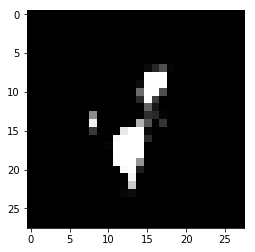

Loop: 425100, Generator_loss: -0.051527, Discriminator_loss: 0.0079227
Loop: 425200, Generator_loss: -0.016505, Discriminator_loss: 0.0033319
Loop: 425300, Generator_loss: -0.027117, Discriminator_loss: -0.0017251
Loop: 425400, Generator_loss: -0.028025, Discriminator_loss: 0.0025764
Loop: 425500, Generator_loss: 0.0078961, Discriminator_loss: -0.00069283
Loop: 425600, Generator_loss: -0.02217, Discriminator_loss: 0.0022109
Loop: 425700, Generator_loss: 0.02108, Discriminator_loss: 0.004368
Loop: 425800, Generator_loss: 0.016339, Discriminator_loss: 0.0064881
Loop: 425900, Generator_loss: -0.025245, Discriminator_loss: -0.0011132
Loop: 426000, Generator_loss: -0.059866, Discriminator_loss: 0.0057561


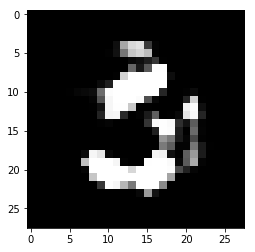

Loop: 426100, Generator_loss: -0.028176, Discriminator_loss: -0.0015982
Loop: 426200, Generator_loss: -0.024073, Discriminator_loss: 0.0038295
Loop: 426300, Generator_loss: -0.00079559, Discriminator_loss: 0.0035129
Loop: 426400, Generator_loss: 0.022154, Discriminator_loss: 0.0042822
Loop: 426500, Generator_loss: -0.015589, Discriminator_loss: 0.0041637
Loop: 426600, Generator_loss: 0.0022207, Discriminator_loss: 0.0060041
Loop: 426700, Generator_loss: 0.033148, Discriminator_loss: 0.0047017
Loop: 426800, Generator_loss: -0.0082983, Discriminator_loss: -0.0083734
Loop: 426900, Generator_loss: -0.0055557, Discriminator_loss: -0.0030115
Loop: 427000, Generator_loss: 0.0041032, Discriminator_loss: -0.0016208


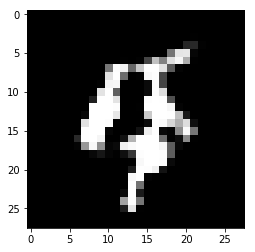

Loop: 427100, Generator_loss: -0.011795, Discriminator_loss: 0.0012514
Loop: 427200, Generator_loss: -0.010821, Discriminator_loss: 0.0027058
Loop: 427300, Generator_loss: 0.013838, Discriminator_loss: 0.0016901
Loop: 427400, Generator_loss: -0.018868, Discriminator_loss: 0.0029748
Loop: 427500, Generator_loss: -0.0012216, Discriminator_loss: 0.0052326
Loop: 427600, Generator_loss: -0.0087052, Discriminator_loss: -0.00058753
Loop: 427700, Generator_loss: 0.027938, Discriminator_loss: 0.0037301
Loop: 427800, Generator_loss: -0.010388, Discriminator_loss: 0.00020659
Loop: 427900, Generator_loss: 0.029072, Discriminator_loss: 0.0024552
Loop: 428000, Generator_loss: -0.00752, Discriminator_loss: 0.0035974


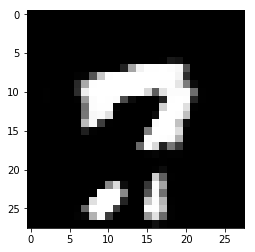

Loop: 428100, Generator_loss: 0.039105, Discriminator_loss: 0.0081275
Loop: 428200, Generator_loss: 0.013625, Discriminator_loss: 0.0063426
Loop: 428300, Generator_loss: 0.0057641, Discriminator_loss: 0.0012451
Loop: 428400, Generator_loss: -0.0079661, Discriminator_loss: 0.0070267
Loop: 428500, Generator_loss: -0.014459, Discriminator_loss: 0.0014723
Loop: 428600, Generator_loss: -0.0061062, Discriminator_loss: 0.00069783
Loop: 428700, Generator_loss: 0.0049723, Discriminator_loss: -0.0092136
Loop: 428800, Generator_loss: 0.0021909, Discriminator_loss: 0.0062012
Loop: 428900, Generator_loss: -0.0070454, Discriminator_loss: 0.005802
Loop: 429000, Generator_loss: -0.015744, Discriminator_loss: -0.0013418


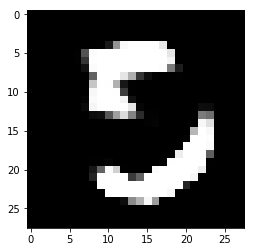

Loop: 429100, Generator_loss: -0.033006, Discriminator_loss: 0.0040431
Loop: 429200, Generator_loss: -0.027247, Discriminator_loss: 0.0024212
Loop: 429300, Generator_loss: 0.002281, Discriminator_loss: 0.0032325
Loop: 429400, Generator_loss: 0.0018487, Discriminator_loss: 0.002051
Loop: 429500, Generator_loss: -0.04633, Discriminator_loss: 0.0082757
Loop: 429600, Generator_loss: -0.033072, Discriminator_loss: -0.0054726
Loop: 429700, Generator_loss: -0.0015323, Discriminator_loss: 0.0047007
Loop: 429800, Generator_loss: -0.015837, Discriminator_loss: -0.00059522
Loop: 429900, Generator_loss: -0.045488, Discriminator_loss: 0.0024033
Loop: 430000, Generator_loss: -0.012019, Discriminator_loss: 0.0068857


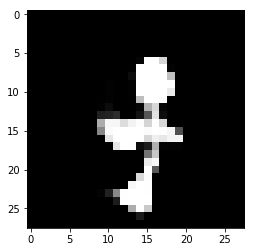

Loop: 430100, Generator_loss: 0.0012124, Discriminator_loss: 0.0037216
Loop: 430200, Generator_loss: -0.034996, Discriminator_loss: -0.00047015
Loop: 430300, Generator_loss: -0.059995, Discriminator_loss: 0.0072231
Loop: 430400, Generator_loss: 0.010462, Discriminator_loss: 0.0063197
Loop: 430500, Generator_loss: -0.022259, Discriminator_loss: 0.0020402
Loop: 430600, Generator_loss: -0.015526, Discriminator_loss: 0.0040037
Loop: 430700, Generator_loss: 0.011841, Discriminator_loss: 0.0026321
Loop: 430800, Generator_loss: 0.0054799, Discriminator_loss: 0.0014286
Loop: 430900, Generator_loss: 0.0092907, Discriminator_loss: -0.0036045
Loop: 431000, Generator_loss: -0.0053102, Discriminator_loss: 0.004008


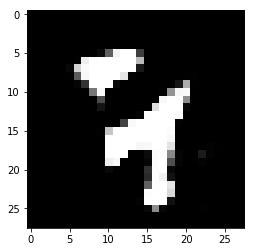

Loop: 431100, Generator_loss: 0.0013847, Discriminator_loss: 0.010725
Loop: 431200, Generator_loss: -0.02461, Discriminator_loss: -0.0009486
Loop: 431300, Generator_loss: 0.028294, Discriminator_loss: -0.0023009
Loop: 431400, Generator_loss: 0.0054467, Discriminator_loss: 0.0017458
Loop: 431500, Generator_loss: 0.015783, Discriminator_loss: 0.0041991
Loop: 431600, Generator_loss: -0.0068851, Discriminator_loss: -3.2265e-05
Loop: 431700, Generator_loss: 0.0069174, Discriminator_loss: 0.00084405
Loop: 431800, Generator_loss: -0.0038035, Discriminator_loss: 0.00060832
Loop: 431900, Generator_loss: 0.023513, Discriminator_loss: 0.00082636
Loop: 432000, Generator_loss: -0.019328, Discriminator_loss: 0.0041542


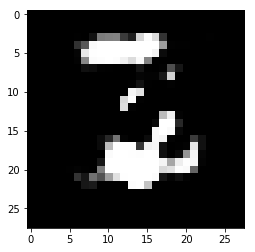

Loop: 432100, Generator_loss: -0.04049, Discriminator_loss: 0.0032593
Loop: 432200, Generator_loss: -0.053736, Discriminator_loss: 0.0044523
Loop: 432300, Generator_loss: -0.03079, Discriminator_loss: 0.0035855
Loop: 432400, Generator_loss: -0.056007, Discriminator_loss: 0.0034734
Loop: 432500, Generator_loss: -0.087176, Discriminator_loss: 0.0029105
Loop: 432600, Generator_loss: 0.003845, Discriminator_loss: -0.00059633
Loop: 432700, Generator_loss: 0.029174, Discriminator_loss: 0.0026512
Loop: 432800, Generator_loss: 0.0058189, Discriminator_loss: 0.0011922
Loop: 432900, Generator_loss: 0.022987, Discriminator_loss: 0.0017973
Loop: 433000, Generator_loss: -0.01296, Discriminator_loss: 0.0024974


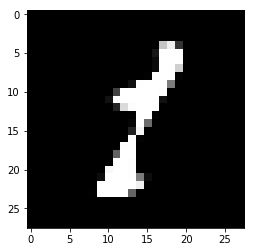

Loop: 433100, Generator_loss: -0.054112, Discriminator_loss: -0.0023643
Loop: 433200, Generator_loss: -0.045285, Discriminator_loss: -0.0038288
Loop: 433300, Generator_loss: -0.012058, Discriminator_loss: -0.0012446
Loop: 433400, Generator_loss: -0.025374, Discriminator_loss: 0.0021476
Loop: 433500, Generator_loss: -0.0098684, Discriminator_loss: 0.0060908
Loop: 433600, Generator_loss: 0.014068, Discriminator_loss: 0.010719
Loop: 433700, Generator_loss: 0.047995, Discriminator_loss: -0.0044375
Loop: 433800, Generator_loss: 0.0060204, Discriminator_loss: 0.0035192
Loop: 433900, Generator_loss: -0.027686, Discriminator_loss: 0.0061108
Loop: 434000, Generator_loss: -0.03384, Discriminator_loss: 0.0019564


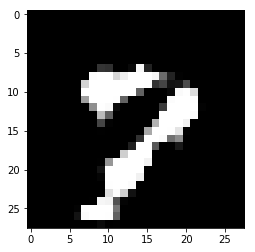

Loop: 434100, Generator_loss: 0.0033366, Discriminator_loss: 0.0028344
Loop: 434200, Generator_loss: 0.045285, Discriminator_loss: 0.0053832
Loop: 434300, Generator_loss: 0.014863, Discriminator_loss: 0.0064566
Loop: 434400, Generator_loss: -0.018189, Discriminator_loss: 0.0024892
Loop: 434500, Generator_loss: -0.034711, Discriminator_loss: 0.0055133
Loop: 434600, Generator_loss: 0.055612, Discriminator_loss: 0.01507
Loop: 434700, Generator_loss: 0.0040385, Discriminator_loss: -0.0029002
Loop: 434800, Generator_loss: 0.013357, Discriminator_loss: 0.0060967
Loop: 434900, Generator_loss: -0.028399, Discriminator_loss: 0.0033761
Loop: 435000, Generator_loss: 0.037131, Discriminator_loss: -0.0034786


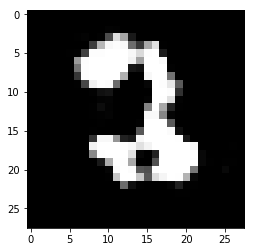

Loop: 435100, Generator_loss: -0.029441, Discriminator_loss: 0.0060958
Loop: 435200, Generator_loss: -0.023733, Discriminator_loss: 0.0038427
Loop: 435300, Generator_loss: 0.017824, Discriminator_loss: 0.010027
Loop: 435400, Generator_loss: -0.02575, Discriminator_loss: 0.0057858
Loop: 435500, Generator_loss: 0.00063314, Discriminator_loss: 0.002596
Loop: 435600, Generator_loss: 0.036933, Discriminator_loss: -0.0012227
Loop: 435700, Generator_loss: -0.02536, Discriminator_loss: -0.0016465
Loop: 435800, Generator_loss: -0.059379, Discriminator_loss: -0.0040122
Loop: 435900, Generator_loss: -0.0047769, Discriminator_loss: 0.0024292
Loop: 436000, Generator_loss: -0.0032505, Discriminator_loss: 0.00066658


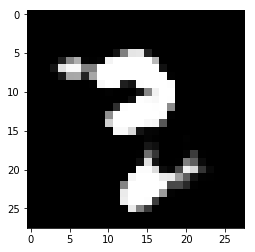

Loop: 436100, Generator_loss: -0.053793, Discriminator_loss: 0.0098253
Loop: 436200, Generator_loss: 0.015905, Discriminator_loss: 0.004645
Loop: 436300, Generator_loss: 0.0058099, Discriminator_loss: 0.004299
Loop: 436400, Generator_loss: 0.0075015, Discriminator_loss: 0.0050764
Loop: 436500, Generator_loss: -0.012946, Discriminator_loss: 0.00033674
Loop: 436600, Generator_loss: -0.035931, Discriminator_loss: 0.0078332
Loop: 436700, Generator_loss: -0.029131, Discriminator_loss: 0.0053516
Loop: 436800, Generator_loss: 0.025021, Discriminator_loss: 0.0030901
Loop: 436900, Generator_loss: 0.011683, Discriminator_loss: 0.0018304
Loop: 437000, Generator_loss: 0.039856, Discriminator_loss: -0.0058761


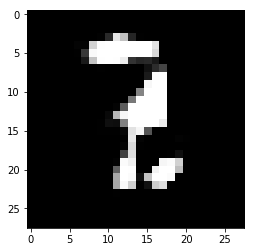

Loop: 437100, Generator_loss: 0.024618, Discriminator_loss: -0.0024776
Loop: 437200, Generator_loss: -0.066793, Discriminator_loss: -0.002556
Loop: 437300, Generator_loss: -0.006446, Discriminator_loss: 0.0047291
Loop: 437400, Generator_loss: -0.053334, Discriminator_loss: 0.0054475
Loop: 437500, Generator_loss: 0.036449, Discriminator_loss: 0.0026412
Loop: 437600, Generator_loss: -0.037198, Discriminator_loss: 0.00014588
Loop: 437700, Generator_loss: -0.0039174, Discriminator_loss: 0.0029794
Loop: 437800, Generator_loss: 0.0044037, Discriminator_loss: 0.00443
Loop: 437900, Generator_loss: 0.010524, Discriminator_loss: 0.0057906
Loop: 438000, Generator_loss: 0.024179, Discriminator_loss: 0.0045559


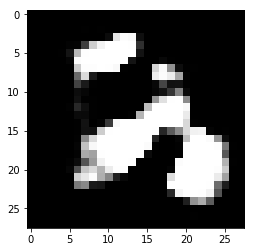

Loop: 438100, Generator_loss: -0.017967, Discriminator_loss: 0.0025812
Loop: 438200, Generator_loss: 0.0047384, Discriminator_loss: 0.0011813
Loop: 438300, Generator_loss: 0.010441, Discriminator_loss: 0.0044132
Loop: 438400, Generator_loss: -0.020221, Discriminator_loss: 0.0018315
Loop: 438500, Generator_loss: -0.0036238, Discriminator_loss: 0.0025521
Loop: 438600, Generator_loss: -0.022908, Discriminator_loss: 0.011102
Loop: 438700, Generator_loss: -0.003262, Discriminator_loss: 0.0048594
Loop: 438800, Generator_loss: -0.019458, Discriminator_loss: 0.0025177
Loop: 438900, Generator_loss: 0.011159, Discriminator_loss: 0.0039663
Loop: 439000, Generator_loss: 0.047372, Discriminator_loss: -0.0097952


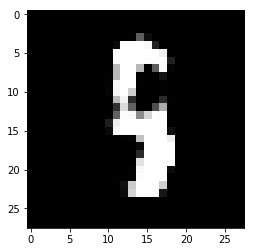

Loop: 439100, Generator_loss: 0.049703, Discriminator_loss: -0.001456
Loop: 439200, Generator_loss: 0.051718, Discriminator_loss: 0.019752
Loop: 439300, Generator_loss: 0.017467, Discriminator_loss: 0.0028655
Loop: 439400, Generator_loss: -0.036625, Discriminator_loss: -0.0022015
Loop: 439500, Generator_loss: 0.0035129, Discriminator_loss: 0.0078442
Loop: 439600, Generator_loss: -0.015204, Discriminator_loss: -0.0027366
Loop: 439700, Generator_loss: -0.0022182, Discriminator_loss: -0.0014058
Loop: 439800, Generator_loss: -0.03993, Discriminator_loss: 0.002891
Loop: 439900, Generator_loss: 0.0097107, Discriminator_loss: 0.0014536
Loop: 440000, Generator_loss: 0.011626, Discriminator_loss: 0.0086432


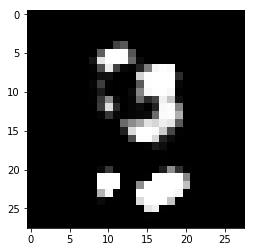

Loop: 440100, Generator_loss: 0.014113, Discriminator_loss: 0.0085105
Loop: 440200, Generator_loss: 0.031909, Discriminator_loss: 0.0056276
Loop: 440300, Generator_loss: -0.029965, Discriminator_loss: 0.0021881
Loop: 440400, Generator_loss: -0.0025583, Discriminator_loss: -0.0014441
Loop: 440500, Generator_loss: -0.010225, Discriminator_loss: 3.9269e-05
Loop: 440600, Generator_loss: 0.0009132, Discriminator_loss: 0.0053267
Loop: 440700, Generator_loss: -0.032754, Discriminator_loss: -0.0071471
Loop: 440800, Generator_loss: 0.023024, Discriminator_loss: 0.0053991
Loop: 440900, Generator_loss: -0.0045083, Discriminator_loss: 0.0015229
Loop: 441000, Generator_loss: -0.029831, Discriminator_loss: -0.0010139


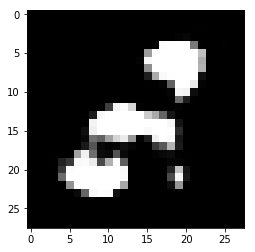

Loop: 441100, Generator_loss: -0.017328, Discriminator_loss: 0.0015684
Loop: 441200, Generator_loss: -0.023163, Discriminator_loss: 0.00021079
Loop: 441300, Generator_loss: 0.040445, Discriminator_loss: 0.0053462
Loop: 441400, Generator_loss: -0.0051241, Discriminator_loss: -0.0031869
Loop: 441500, Generator_loss: 0.012078, Discriminator_loss: 0.0058769
Loop: 441600, Generator_loss: -0.0158, Discriminator_loss: 0.0052338
Loop: 441700, Generator_loss: 0.0094146, Discriminator_loss: 0.00089347
Loop: 441800, Generator_loss: 0.041401, Discriminator_loss: 0.0041196
Loop: 441900, Generator_loss: 0.047585, Discriminator_loss: 0.0067474
Loop: 442000, Generator_loss: 0.0055818, Discriminator_loss: -0.00046521


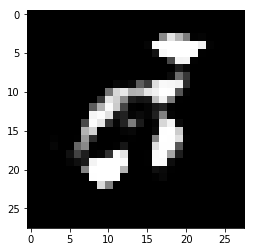

Loop: 442100, Generator_loss: -0.0034296, Discriminator_loss: 0.0020312
Loop: 442200, Generator_loss: 0.010043, Discriminator_loss: 0.0020495
Loop: 442300, Generator_loss: -0.0048196, Discriminator_loss: 0.0041006
Loop: 442400, Generator_loss: 0.003477, Discriminator_loss: 0.0017977
Loop: 442500, Generator_loss: -0.036395, Discriminator_loss: -0.0009324
Loop: 442600, Generator_loss: -0.051218, Discriminator_loss: 0.0025044
Loop: 442700, Generator_loss: 0.0011764, Discriminator_loss: 0.004915
Loop: 442800, Generator_loss: -0.041202, Discriminator_loss: 0.0068536
Loop: 442900, Generator_loss: 0.0016229, Discriminator_loss: 0.0003469
Loop: 443000, Generator_loss: -0.048125, Discriminator_loss: -0.0026769


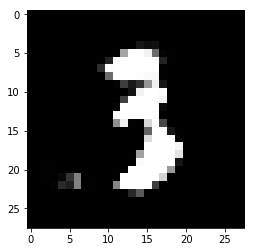

Loop: 443100, Generator_loss: 0.024864, Discriminator_loss: 0.0038314
Loop: 443200, Generator_loss: 0.017364, Discriminator_loss: 0.0063958
Loop: 443300, Generator_loss: -0.01993, Discriminator_loss: 0.007122
Loop: 443400, Generator_loss: 0.00095671, Discriminator_loss: -0.0025041
Loop: 443500, Generator_loss: -0.032784, Discriminator_loss: 0.0086901
Loop: 443600, Generator_loss: -0.0038171, Discriminator_loss: -0.001044
Loop: 443700, Generator_loss: -0.0065895, Discriminator_loss: -0.0024799
Loop: 443800, Generator_loss: 0.0073642, Discriminator_loss: 0.0036068
Loop: 443900, Generator_loss: -0.0057285, Discriminator_loss: 0.003218
Loop: 444000, Generator_loss: -0.035288, Discriminator_loss: 0.0022443


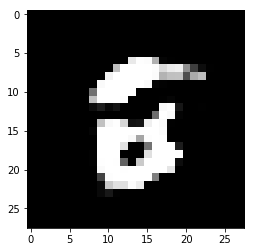

Loop: 444100, Generator_loss: -0.014791, Discriminator_loss: 0.0069683
Loop: 444200, Generator_loss: 0.0090232, Discriminator_loss: -0.001516
Loop: 444300, Generator_loss: -0.012239, Discriminator_loss: 0.0044405
Loop: 444400, Generator_loss: 0.021068, Discriminator_loss: -0.00090744
Loop: 444500, Generator_loss: -0.029547, Discriminator_loss: -0.0013685
Loop: 444600, Generator_loss: -0.015722, Discriminator_loss: 0.0018116
Loop: 444700, Generator_loss: 0.011802, Discriminator_loss: 0.0034173
Loop: 444800, Generator_loss: 0.0022532, Discriminator_loss: 0.0025371
Loop: 444900, Generator_loss: -0.046933, Discriminator_loss: 0.00020495
Loop: 445000, Generator_loss: 0.02306, Discriminator_loss: -0.0035955


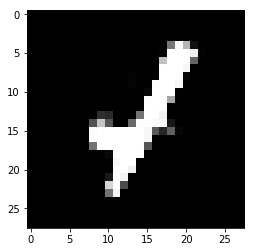

Loop: 445100, Generator_loss: 0.011297, Discriminator_loss: -0.0026005
Loop: 445200, Generator_loss: -0.018548, Discriminator_loss: 0.0083442
Loop: 445300, Generator_loss: -0.056514, Discriminator_loss: 0.0065015
Loop: 445400, Generator_loss: -0.05692, Discriminator_loss: 0.0083325
Loop: 445500, Generator_loss: -0.0062748, Discriminator_loss: -0.0016293
Loop: 445600, Generator_loss: 0.0092807, Discriminator_loss: 0.011999
Loop: 445700, Generator_loss: -0.0033517, Discriminator_loss: 0.0020907
Loop: 445800, Generator_loss: -0.0013282, Discriminator_loss: 0.0044549
Loop: 445900, Generator_loss: -0.0020876, Discriminator_loss: -0.0050393
Loop: 446000, Generator_loss: -0.001829, Discriminator_loss: -0.0021227


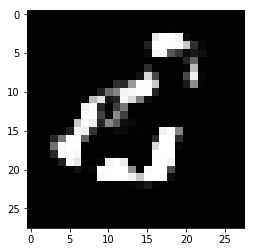

Loop: 446100, Generator_loss: -0.0056902, Discriminator_loss: 0.0040431
Loop: 446200, Generator_loss: -0.062938, Discriminator_loss: 0.0082188
Loop: 446300, Generator_loss: -0.031153, Discriminator_loss: 0.0066323
Loop: 446400, Generator_loss: -0.033407, Discriminator_loss: 0.0012475
Loop: 446500, Generator_loss: -0.0015417, Discriminator_loss: -0.0032576
Loop: 446600, Generator_loss: -0.028586, Discriminator_loss: 0.0035446
Loop: 446700, Generator_loss: -0.04054, Discriminator_loss: 0.00033318
Loop: 446800, Generator_loss: -0.014563, Discriminator_loss: -0.00071346
Loop: 446900, Generator_loss: -0.032047, Discriminator_loss: 0.0023241
Loop: 447000, Generator_loss: 0.0080609, Discriminator_loss: 0.001461


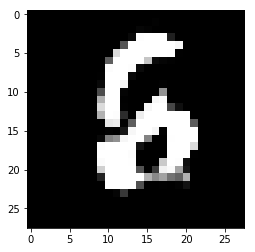

Loop: 447100, Generator_loss: -0.038988, Discriminator_loss: 0.0069932
Loop: 447200, Generator_loss: -0.0074727, Discriminator_loss: 0.0059398
Loop: 447300, Generator_loss: 0.025139, Discriminator_loss: -0.0014047
Loop: 447400, Generator_loss: 0.020255, Discriminator_loss: 0.00017881
Loop: 447500, Generator_loss: -0.021268, Discriminator_loss: 0.0043256
Loop: 447600, Generator_loss: -0.0052144, Discriminator_loss: -0.0016464
Loop: 447700, Generator_loss: -0.017628, Discriminator_loss: -0.00046994
Loop: 447800, Generator_loss: -0.027649, Discriminator_loss: 0.0074939
Loop: 447900, Generator_loss: -0.018181, Discriminator_loss: 0.012312
Loop: 448000, Generator_loss: 0.018975, Discriminator_loss: 0.0027678


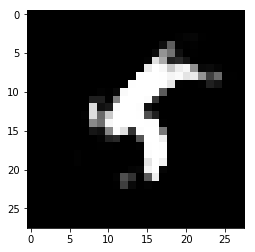

Loop: 448100, Generator_loss: -0.0062016, Discriminator_loss: -0.0031211
Loop: 448200, Generator_loss: -0.0031749, Discriminator_loss: 0.0042846
Loop: 448300, Generator_loss: 0.046054, Discriminator_loss: 0.011462
Loop: 448400, Generator_loss: 0.058088, Discriminator_loss: -0.0023439
Loop: 448500, Generator_loss: -0.0027043, Discriminator_loss: 1.8292e-05
Loop: 448600, Generator_loss: -0.0094238, Discriminator_loss: -0.0013601
Loop: 448700, Generator_loss: -0.0077059, Discriminator_loss: -0.0021262
Loop: 448800, Generator_loss: 0.0018288, Discriminator_loss: 0.00777
Loop: 448900, Generator_loss: 0.0078188, Discriminator_loss: -0.0014004
Loop: 449000, Generator_loss: 0.0065928, Discriminator_loss: 0.0018415


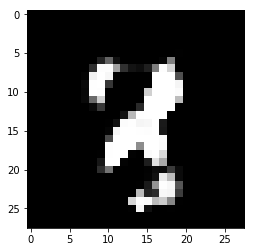

Loop: 449100, Generator_loss: 0.019931, Discriminator_loss: 0.01077
Loop: 449200, Generator_loss: -0.011084, Discriminator_loss: 0.010533
Loop: 449300, Generator_loss: -0.011007, Discriminator_loss: 0.0076213
Loop: 449400, Generator_loss: 0.030022, Discriminator_loss: 0.0088954
Loop: 449500, Generator_loss: 0.05362, Discriminator_loss: -0.0048768
Loop: 449600, Generator_loss: 0.044706, Discriminator_loss: 0.0044578
Loop: 449700, Generator_loss: 0.021388, Discriminator_loss: 0.00023702
Loop: 449800, Generator_loss: 0.028688, Discriminator_loss: 0.0030477
Loop: 449900, Generator_loss: 0.05683, Discriminator_loss: 0.0026946
Loop: 450000, Generator_loss: -0.00037474, Discriminator_loss: 0.0067434


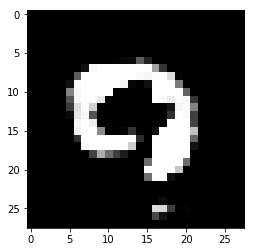

Loop: 450100, Generator_loss: -0.019602, Discriminator_loss: 0.0013502
Loop: 450200, Generator_loss: -0.028506, Discriminator_loss: -0.010393
Loop: 450300, Generator_loss: -0.022262, Discriminator_loss: -0.0025226
Loop: 450400, Generator_loss: -0.012782, Discriminator_loss: 0.0025245
Loop: 450500, Generator_loss: -0.011618, Discriminator_loss: 0.0043748
Loop: 450600, Generator_loss: 0.0043588, Discriminator_loss: 0.0054942
Loop: 450700, Generator_loss: -0.038495, Discriminator_loss: -0.0012813
Loop: 450800, Generator_loss: -0.001414, Discriminator_loss: 0.0071398
Loop: 450900, Generator_loss: 0.010325, Discriminator_loss: 0.0014253
Loop: 451000, Generator_loss: 0.016645, Discriminator_loss: 0.0066001


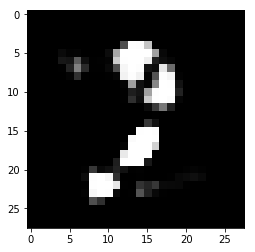

Loop: 451100, Generator_loss: -0.024033, Discriminator_loss: 0.0092112
Loop: 451200, Generator_loss: 0.0042365, Discriminator_loss: 0.0026988
Loop: 451300, Generator_loss: -0.052343, Discriminator_loss: 0.0093872
Loop: 451400, Generator_loss: -0.02275, Discriminator_loss: 0.0012914
Loop: 451500, Generator_loss: -0.011383, Discriminator_loss: 0.0012175
Loop: 451600, Generator_loss: 0.011444, Discriminator_loss: -0.016106
Loop: 451700, Generator_loss: -0.017725, Discriminator_loss: 0.0022725
Loop: 451800, Generator_loss: -0.024395, Discriminator_loss: 0.0018168
Loop: 451900, Generator_loss: 0.033195, Discriminator_loss: 0.0092612
Loop: 452000, Generator_loss: 0.012763, Discriminator_loss: -0.0015005


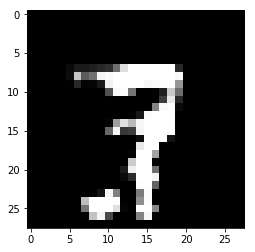

Loop: 452100, Generator_loss: -0.030022, Discriminator_loss: 0.0026767
Loop: 452200, Generator_loss: -0.01359, Discriminator_loss: 0.0012212
Loop: 452300, Generator_loss: -0.023815, Discriminator_loss: 0.00018574
Loop: 452400, Generator_loss: -0.0059446, Discriminator_loss: 0.0044635
Loop: 452500, Generator_loss: -0.043434, Discriminator_loss: -0.0022904
Loop: 452600, Generator_loss: -0.0010388, Discriminator_loss: 0.0028773
Loop: 452700, Generator_loss: 0.0098852, Discriminator_loss: 0.0012845
Loop: 452800, Generator_loss: -0.039325, Discriminator_loss: 0.0026381
Loop: 452900, Generator_loss: -0.016292, Discriminator_loss: 0.010673
Loop: 453000, Generator_loss: 0.015337, Discriminator_loss: 0.0026064


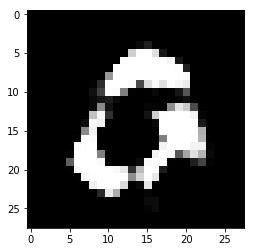

Loop: 453100, Generator_loss: -0.032372, Discriminator_loss: 0.0058929
Loop: 453200, Generator_loss: -0.02676, Discriminator_loss: -0.00090545
Loop: 453300, Generator_loss: -0.0031342, Discriminator_loss: 0.0047895
Loop: 453400, Generator_loss: -0.041433, Discriminator_loss: 0.0011772
Loop: 453500, Generator_loss: 0.01376, Discriminator_loss: 0.002407
Loop: 453600, Generator_loss: 0.016409, Discriminator_loss: 0.010342
Loop: 453700, Generator_loss: -0.042298, Discriminator_loss: 0.0045013
Loop: 453800, Generator_loss: -0.0050022, Discriminator_loss: -0.00032431
Loop: 453900, Generator_loss: -0.026856, Discriminator_loss: 0.0079936
Loop: 454000, Generator_loss: -0.027075, Discriminator_loss: 0.0093996


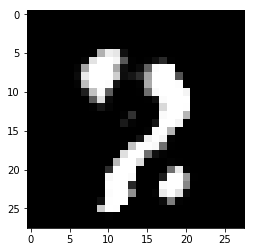

Loop: 454100, Generator_loss: -0.004917, Discriminator_loss: 0.0029947
Loop: 454200, Generator_loss: -0.030082, Discriminator_loss: 0.0060688
Loop: 454300, Generator_loss: 0.024292, Discriminator_loss: -0.0071571
Loop: 454400, Generator_loss: -0.038212, Discriminator_loss: 0.00019477
Loop: 454500, Generator_loss: 0.014132, Discriminator_loss: 0.0037909
Loop: 454600, Generator_loss: -0.064089, Discriminator_loss: 0.0036983
Loop: 454700, Generator_loss: 0.029972, Discriminator_loss: -0.0015566
Loop: 454800, Generator_loss: 0.0093931, Discriminator_loss: -0.0026338
Loop: 454900, Generator_loss: -0.0051322, Discriminator_loss: 0.00024421
Loop: 455000, Generator_loss: -0.02696, Discriminator_loss: 0.002328


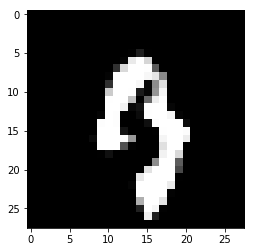

Loop: 455100, Generator_loss: -0.0030624, Discriminator_loss: 0.0045048
Loop: 455200, Generator_loss: 0.011564, Discriminator_loss: -0.0028237
Loop: 455300, Generator_loss: -0.030014, Discriminator_loss: -0.00041964
Loop: 455400, Generator_loss: 0.057373, Discriminator_loss: 0.0066094
Loop: 455500, Generator_loss: 0.018611, Discriminator_loss: 0.0055636
Loop: 455600, Generator_loss: 0.017926, Discriminator_loss: -0.0016896
Loop: 455700, Generator_loss: -0.066366, Discriminator_loss: 0.0057089
Loop: 455800, Generator_loss: -0.049621, Discriminator_loss: 0.0098871
Loop: 455900, Generator_loss: -0.021547, Discriminator_loss: -0.0025185
Loop: 456000, Generator_loss: -0.0025695, Discriminator_loss: -0.0015435


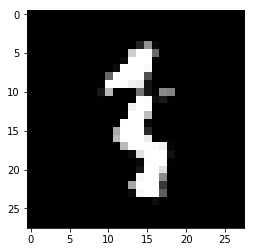

Loop: 456100, Generator_loss: -0.015051, Discriminator_loss: 0.0064045
Loop: 456200, Generator_loss: -0.019068, Discriminator_loss: 0.0015814
Loop: 456300, Generator_loss: 0.024371, Discriminator_loss: 0.0017011
Loop: 456400, Generator_loss: 0.049449, Discriminator_loss: 0.0044029
Loop: 456500, Generator_loss: -0.043804, Discriminator_loss: 0.0029465
Loop: 456600, Generator_loss: -0.033245, Discriminator_loss: 0.00012248
Loop: 456700, Generator_loss: -0.029483, Discriminator_loss: 0.0051264
Loop: 456800, Generator_loss: -0.036209, Discriminator_loss: 0.00062315
Loop: 456900, Generator_loss: 0.010057, Discriminator_loss: 0.0036775
Loop: 457000, Generator_loss: 0.018853, Discriminator_loss: 0.011425


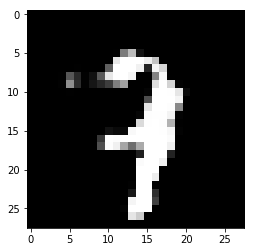

Loop: 457100, Generator_loss: -0.020289, Discriminator_loss: -0.0060856
Loop: 457200, Generator_loss: -0.033621, Discriminator_loss: 0.0040872
Loop: 457300, Generator_loss: 0.010118, Discriminator_loss: 0.0064444
Loop: 457400, Generator_loss: -0.035042, Discriminator_loss: 0.0063188
Loop: 457500, Generator_loss: -0.0045523, Discriminator_loss: 0.0028965
Loop: 457600, Generator_loss: 0.0018955, Discriminator_loss: -0.0045795
Loop: 457700, Generator_loss: 0.044326, Discriminator_loss: -0.0025384
Loop: 457800, Generator_loss: 0.020088, Discriminator_loss: 0.0032797
Loop: 457900, Generator_loss: 0.034904, Discriminator_loss: 0.01056
Loop: 458000, Generator_loss: -0.023952, Discriminator_loss: 0.0027838


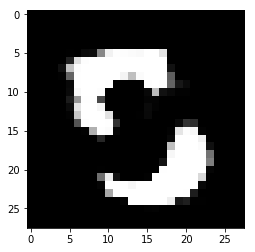

Loop: 458100, Generator_loss: -0.016093, Discriminator_loss: 0.0022603
Loop: 458200, Generator_loss: 0.028178, Discriminator_loss: 0.0088965
Loop: 458300, Generator_loss: -0.054559, Discriminator_loss: 0.010036
Loop: 458400, Generator_loss: 0.0069785, Discriminator_loss: 0.0071813
Loop: 458500, Generator_loss: -0.0077996, Discriminator_loss: 0.0018428
Loop: 458600, Generator_loss: 0.024881, Discriminator_loss: 0.0078965
Loop: 458700, Generator_loss: -0.044254, Discriminator_loss: 0.0072116
Loop: 458800, Generator_loss: -0.030069, Discriminator_loss: 0.0096445
Loop: 458900, Generator_loss: -0.0085323, Discriminator_loss: 0.0024097
Loop: 459000, Generator_loss: 0.014511, Discriminator_loss: 0.0058421


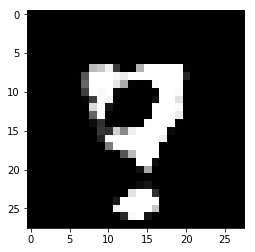

Loop: 459100, Generator_loss: -0.031797, Discriminator_loss: -0.0024992
Loop: 459200, Generator_loss: -0.011178, Discriminator_loss: 0.00036662
Loop: 459300, Generator_loss: 0.039252, Discriminator_loss: 0.00075793
Loop: 459400, Generator_loss: -0.0046241, Discriminator_loss: -6.5204e-05
Loop: 459500, Generator_loss: -0.043675, Discriminator_loss: 0.0038706
Loop: 459600, Generator_loss: -0.0041217, Discriminator_loss: 0.0016639
Loop: 459700, Generator_loss: 0.032569, Discriminator_loss: 0.0058015
Loop: 459800, Generator_loss: 0.02196, Discriminator_loss: 0.0022138
Loop: 459900, Generator_loss: -0.0071376, Discriminator_loss: 0.00022199
Loop: 460000, Generator_loss: 0.011553, Discriminator_loss: 0.0052741


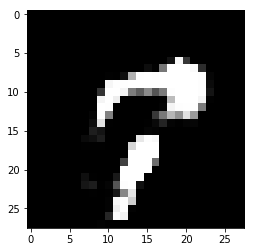

Loop: 460100, Generator_loss: 0.021792, Discriminator_loss: -0.0034421
Loop: 460200, Generator_loss: -0.032321, Discriminator_loss: 0.00054637
Loop: 460300, Generator_loss: -0.050256, Discriminator_loss: 0.0042641
Loop: 460400, Generator_loss: -0.037454, Discriminator_loss: 0.0057416
Loop: 460500, Generator_loss: -0.0018984, Discriminator_loss: 0.0036506
Loop: 460600, Generator_loss: -0.0015579, Discriminator_loss: 0.0088346
Loop: 460700, Generator_loss: -0.05369, Discriminator_loss: -0.0060882
Loop: 460800, Generator_loss: 0.010137, Discriminator_loss: 0.0046932
Loop: 460900, Generator_loss: -0.022001, Discriminator_loss: -0.0087155
Loop: 461000, Generator_loss: 0.028861, Discriminator_loss: 0.0069255


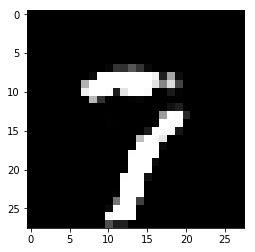

Loop: 461100, Generator_loss: 0.043018, Discriminator_loss: 0.0044406
Loop: 461200, Generator_loss: 0.059647, Discriminator_loss: 0.0084149
Loop: 461300, Generator_loss: 0.030265, Discriminator_loss: -0.005005
Loop: 461400, Generator_loss: 0.018421, Discriminator_loss: 0.0012184
Loop: 461500, Generator_loss: 0.046928, Discriminator_loss: 0.0094344
Loop: 461600, Generator_loss: -0.028114, Discriminator_loss: 0.0054176
Loop: 461700, Generator_loss: -0.0079179, Discriminator_loss: 0.0041983
Loop: 461800, Generator_loss: 0.0064654, Discriminator_loss: 0.0055396
Loop: 461900, Generator_loss: 0.0094404, Discriminator_loss: 0.0051184
Loop: 462000, Generator_loss: 0.02384, Discriminator_loss: 0.0039345


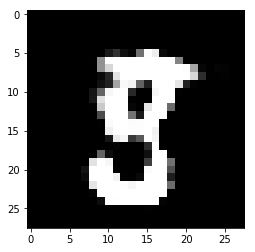

Loop: 462100, Generator_loss: 0.062744, Discriminator_loss: 0.012081
Loop: 462200, Generator_loss: -0.042079, Discriminator_loss: 0.011344
Loop: 462300, Generator_loss: -0.015535, Discriminator_loss: 0.0027788
Loop: 462400, Generator_loss: 0.051095, Discriminator_loss: 0.0060235
Loop: 462500, Generator_loss: 0.0077948, Discriminator_loss: -0.0019378
Loop: 462600, Generator_loss: -0.0069737, Discriminator_loss: 0.00051354
Loop: 462700, Generator_loss: -0.020341, Discriminator_loss: 0.0058446
Loop: 462800, Generator_loss: 0.00074477, Discriminator_loss: 0.0029034
Loop: 462900, Generator_loss: -0.011077, Discriminator_loss: -0.0001448
Loop: 463000, Generator_loss: -0.016144, Discriminator_loss: 0.001942


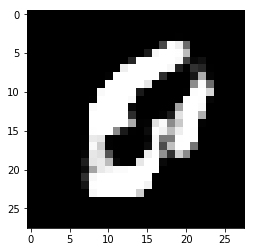

Loop: 463100, Generator_loss: 0.0054193, Discriminator_loss: -0.0037053
Loop: 463200, Generator_loss: -0.020123, Discriminator_loss: 0.0027804
Loop: 463300, Generator_loss: -0.048629, Discriminator_loss: 0.0070984
Loop: 463400, Generator_loss: -0.0030906, Discriminator_loss: -0.00022658
Loop: 463500, Generator_loss: -0.06642, Discriminator_loss: -0.0024953
Loop: 463600, Generator_loss: -0.027405, Discriminator_loss: 0.0008421
Loop: 463700, Generator_loss: -0.038363, Discriminator_loss: 0.0010368
Loop: 463800, Generator_loss: -0.012141, Discriminator_loss: -0.0055185
Loop: 463900, Generator_loss: -0.023828, Discriminator_loss: 0.0060239
Loop: 464000, Generator_loss: -0.048451, Discriminator_loss: 0.0057396


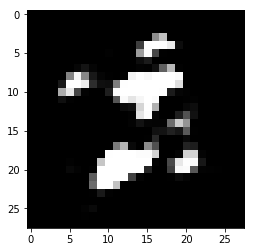

Loop: 464100, Generator_loss: -0.0078318, Discriminator_loss: 0.0052411
Loop: 464200, Generator_loss: 0.026065, Discriminator_loss: -0.0027273
Loop: 464300, Generator_loss: -0.011948, Discriminator_loss: 0.0045158
Loop: 464400, Generator_loss: 0.0031797, Discriminator_loss: 0.0043262
Loop: 464500, Generator_loss: 0.017624, Discriminator_loss: 0.010526
Loop: 464600, Generator_loss: -0.017242, Discriminator_loss: 0.0063152
Loop: 464700, Generator_loss: 0.0070832, Discriminator_loss: 0.003311
Loop: 464800, Generator_loss: -0.022281, Discriminator_loss: 0.0016755
Loop: 464900, Generator_loss: -0.0092625, Discriminator_loss: 0.0038617
Loop: 465000, Generator_loss: -0.014862, Discriminator_loss: 0.0048536


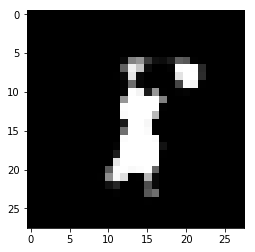

Loop: 465100, Generator_loss: -0.0096217, Discriminator_loss: 0.0019714
Loop: 465200, Generator_loss: 0.011309, Discriminator_loss: 0.0027902
Loop: 465300, Generator_loss: -0.011442, Discriminator_loss: 0.0051693
Loop: 465400, Generator_loss: 0.020823, Discriminator_loss: 0.0044094
Loop: 465500, Generator_loss: 0.015627, Discriminator_loss: 0.0047021
Loop: 465600, Generator_loss: -0.0070679, Discriminator_loss: 0.0066476
Loop: 465700, Generator_loss: 0.01873, Discriminator_loss: -0.00057175
Loop: 465800, Generator_loss: 0.018926, Discriminator_loss: 0.0059502
Loop: 465900, Generator_loss: 0.022501, Discriminator_loss: 0.0041584
Loop: 466000, Generator_loss: 0.0023705, Discriminator_loss: 5.2779e-05


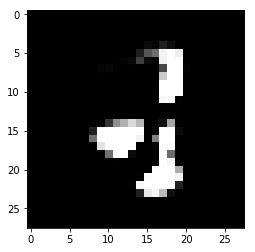

Loop: 466100, Generator_loss: -0.00058049, Discriminator_loss: 0.0019423
Loop: 466200, Generator_loss: 0.0091887, Discriminator_loss: 0.0065537
Loop: 466300, Generator_loss: 0.078188, Discriminator_loss: -0.0017345
Loop: 466400, Generator_loss: -0.027727, Discriminator_loss: 0.0034785
Loop: 466500, Generator_loss: 0.0014588, Discriminator_loss: 0.0072637
Loop: 466600, Generator_loss: -0.075885, Discriminator_loss: 0.006257
Loop: 466700, Generator_loss: 0.024616, Discriminator_loss: 0.0038446
Loop: 466800, Generator_loss: -0.019269, Discriminator_loss: 0.0025227
Loop: 466900, Generator_loss: -0.069417, Discriminator_loss: 0.00090241
Loop: 467000, Generator_loss: 0.031391, Discriminator_loss: 0.0025642


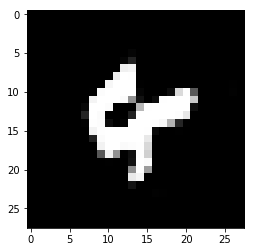

Loop: 467100, Generator_loss: 0.0015408, Discriminator_loss: -0.0007757
Loop: 467200, Generator_loss: -0.071702, Discriminator_loss: 0.004088
Loop: 467300, Generator_loss: 0.0097297, Discriminator_loss: -0.0045927
Loop: 467400, Generator_loss: -0.0037975, Discriminator_loss: 0.0026528
Loop: 467500, Generator_loss: -0.014123, Discriminator_loss: 0.0020288
Loop: 467600, Generator_loss: -0.020427, Discriminator_loss: -0.0042288
Loop: 467700, Generator_loss: 0.031478, Discriminator_loss: 0.006317
Loop: 467800, Generator_loss: 0.024508, Discriminator_loss: 0.006978
Loop: 467900, Generator_loss: 0.00068029, Discriminator_loss: 0.0074901
Loop: 468000, Generator_loss: 0.031725, Discriminator_loss: 0.0051977


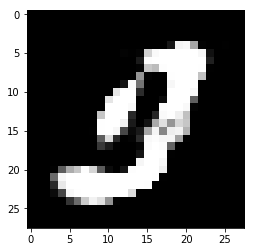

Loop: 468100, Generator_loss: -0.0016339, Discriminator_loss: 0.003072
Loop: 468200, Generator_loss: -0.019224, Discriminator_loss: 0.0024513
Loop: 468300, Generator_loss: -0.019192, Discriminator_loss: 0.0032727
Loop: 468400, Generator_loss: -0.04836, Discriminator_loss: 0.0011057
Loop: 468500, Generator_loss: -0.063478, Discriminator_loss: 1.4409e-05
Loop: 468600, Generator_loss: -0.039517, Discriminator_loss: -0.00091828
Loop: 468700, Generator_loss: -0.016213, Discriminator_loss: 0.004012
Loop: 468800, Generator_loss: 0.020761, Discriminator_loss: 0.010357
Loop: 468900, Generator_loss: -0.005378, Discriminator_loss: 0.002549
Loop: 469000, Generator_loss: -0.014394, Discriminator_loss: 0.0054185


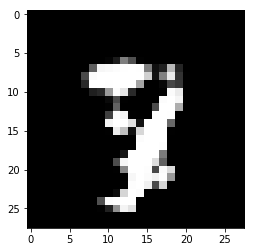

Loop: 469100, Generator_loss: 0.026132, Discriminator_loss: 9.0666e-05
Loop: 469200, Generator_loss: 0.0035767, Discriminator_loss: 0.0021407
Loop: 469300, Generator_loss: -0.013769, Discriminator_loss: 0.0035577
Loop: 469400, Generator_loss: -0.00089119, Discriminator_loss: 0.0015997
Loop: 469500, Generator_loss: 0.036437, Discriminator_loss: 0.002032
Loop: 469600, Generator_loss: 0.040071, Discriminator_loss: 0.0029599
Loop: 469700, Generator_loss: 0.00093537, Discriminator_loss: 0.0033002
Loop: 469800, Generator_loss: -0.03886, Discriminator_loss: 0.010396
Loop: 469900, Generator_loss: -0.0040594, Discriminator_loss: -0.002309
Loop: 470000, Generator_loss: 0.0095497, Discriminator_loss: 0.0041429


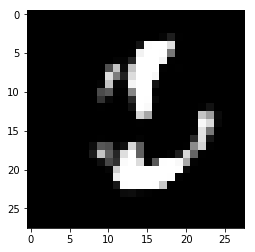

Loop: 470100, Generator_loss: -0.028848, Discriminator_loss: -0.0020248
Loop: 470200, Generator_loss: -0.016298, Discriminator_loss: 0.0051328
Loop: 470300, Generator_loss: -0.03651, Discriminator_loss: 0.0020742
Loop: 470400, Generator_loss: -0.042462, Discriminator_loss: 0.001864
Loop: 470500, Generator_loss: -0.014071, Discriminator_loss: 0.0039312
Loop: 470600, Generator_loss: -0.052951, Discriminator_loss: 0.006484
Loop: 470700, Generator_loss: -0.044642, Discriminator_loss: 0.0048132
Loop: 470800, Generator_loss: -0.05126, Discriminator_loss: 0.011254
Loop: 470900, Generator_loss: 0.00081514, Discriminator_loss: 0.0062069
Loop: 471000, Generator_loss: 0.013771, Discriminator_loss: 0.0037219


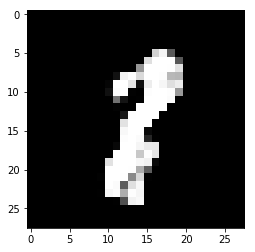

Loop: 471100, Generator_loss: -0.089049, Discriminator_loss: 0.0018313
Loop: 471200, Generator_loss: 0.003752, Discriminator_loss: 0.0034187
Loop: 471300, Generator_loss: 0.013845, Discriminator_loss: -0.00089393
Loop: 471400, Generator_loss: -0.016963, Discriminator_loss: -0.0019819
Loop: 471500, Generator_loss: -0.055412, Discriminator_loss: -0.0029855
Loop: 471600, Generator_loss: -0.020006, Discriminator_loss: 0.00065527
Loop: 471700, Generator_loss: 0.0016668, Discriminator_loss: -0.0015573
Loop: 471800, Generator_loss: 0.008018, Discriminator_loss: -0.00038449
Loop: 471900, Generator_loss: 0.019014, Discriminator_loss: 0.0072068
Loop: 472000, Generator_loss: 0.0075968, Discriminator_loss: 0.010251


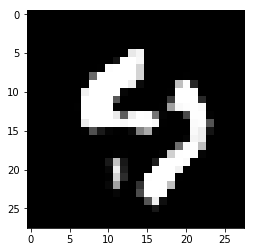

Loop: 472100, Generator_loss: -0.019903, Discriminator_loss: 0.00090981
Loop: 472200, Generator_loss: -0.018854, Discriminator_loss: 0.0026665
Loop: 472300, Generator_loss: -0.028124, Discriminator_loss: 0.0012732
Loop: 472400, Generator_loss: -0.031836, Discriminator_loss: 0.0062923
Loop: 472500, Generator_loss: 0.002227, Discriminator_loss: -0.0019067
Loop: 472600, Generator_loss: 0.010967, Discriminator_loss: 0.0049198
Loop: 472700, Generator_loss: -0.018017, Discriminator_loss: 0.0098954
Loop: 472800, Generator_loss: -0.020187, Discriminator_loss: 0.0027925
Loop: 472900, Generator_loss: -0.036343, Discriminator_loss: 0.00415
Loop: 473000, Generator_loss: -0.01361, Discriminator_loss: 0.0031513


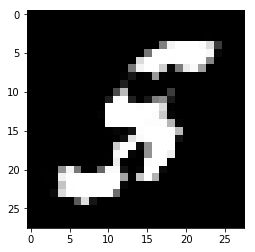

Loop: 473100, Generator_loss: -0.019993, Discriminator_loss: -0.00067332
Loop: 473200, Generator_loss: -0.045058, Discriminator_loss: 0.001458
Loop: 473300, Generator_loss: 0.0073228, Discriminator_loss: 0.0041715
Loop: 473400, Generator_loss: 0.015579, Discriminator_loss: 0.0059074
Loop: 473500, Generator_loss: -0.018296, Discriminator_loss: -0.0032677
Loop: 473600, Generator_loss: -0.027431, Discriminator_loss: 0.0062624
Loop: 473700, Generator_loss: 0.046905, Discriminator_loss: -9.9238e-05
Loop: 473800, Generator_loss: 0.028747, Discriminator_loss: 0.0045922
Loop: 473900, Generator_loss: -0.037012, Discriminator_loss: 0.0047564
Loop: 474000, Generator_loss: -0.0078731, Discriminator_loss: 0.0054589


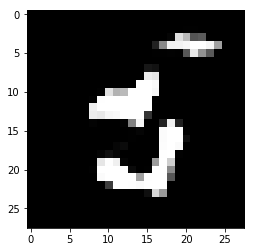

Loop: 474100, Generator_loss: 0.04097, Discriminator_loss: 0.0072138
Loop: 474200, Generator_loss: 0.044856, Discriminator_loss: 0.015111
Loop: 474300, Generator_loss: 0.025149, Discriminator_loss: 0.0043785
Loop: 474400, Generator_loss: -0.050147, Discriminator_loss: -0.00087531
Loop: 474500, Generator_loss: -0.0094813, Discriminator_loss: -0.0002017
Loop: 474600, Generator_loss: 0.0071947, Discriminator_loss: 0.0050789
Loop: 474700, Generator_loss: -0.051082, Discriminator_loss: 0.0036642
Loop: 474800, Generator_loss: -0.02701, Discriminator_loss: 0.0022523
Loop: 474900, Generator_loss: 0.011709, Discriminator_loss: -0.00476
Loop: 475000, Generator_loss: -0.045381, Discriminator_loss: 0.0023055


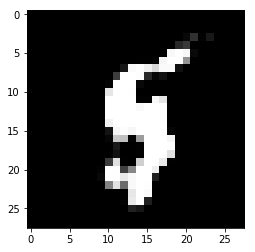

Loop: 475100, Generator_loss: -0.029279, Discriminator_loss: 0.0055669
Loop: 475200, Generator_loss: 0.002867, Discriminator_loss: 0.00060988
Loop: 475300, Generator_loss: -0.017637, Discriminator_loss: 0.0048082
Loop: 475400, Generator_loss: 0.01166, Discriminator_loss: 0.0054483
Loop: 475500, Generator_loss: -0.0050824, Discriminator_loss: 0.001845
Loop: 475600, Generator_loss: 0.002187, Discriminator_loss: 0.0044028
Loop: 475700, Generator_loss: -0.055608, Discriminator_loss: 0.0001814
Loop: 475800, Generator_loss: -0.038321, Discriminator_loss: -0.00135
Loop: 475900, Generator_loss: -0.041082, Discriminator_loss: 0.0045637
Loop: 476000, Generator_loss: -0.034899, Discriminator_loss: 0.0038336


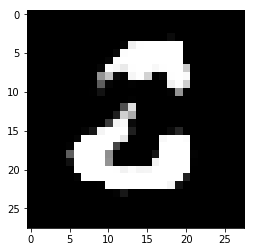

Loop: 476100, Generator_loss: -0.028635, Discriminator_loss: 0.00084407
Loop: 476200, Generator_loss: -0.031086, Discriminator_loss: 0.014371
Loop: 476300, Generator_loss: -0.0025311, Discriminator_loss: 0.0046732
Loop: 476400, Generator_loss: 0.040396, Discriminator_loss: 0.0094181
Loop: 476500, Generator_loss: 0.013976, Discriminator_loss: 0.0028874
Loop: 476600, Generator_loss: 0.0030365, Discriminator_loss: 0.0042252
Loop: 476700, Generator_loss: 0.01071, Discriminator_loss: 0.0043793
Loop: 476800, Generator_loss: -0.02718, Discriminator_loss: 0.0078908
Loop: 476900, Generator_loss: -0.017007, Discriminator_loss: 0.002466
Loop: 477000, Generator_loss: -0.061895, Discriminator_loss: 0.0056409


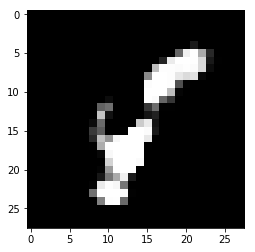

Loop: 477100, Generator_loss: 0.014809, Discriminator_loss: 0.0025022
Loop: 477200, Generator_loss: 0.015695, Discriminator_loss: 0.0063991
Loop: 477300, Generator_loss: -0.0065428, Discriminator_loss: 0.0033187
Loop: 477400, Generator_loss: -0.051659, Discriminator_loss: -0.0031768
Loop: 477500, Generator_loss: -0.020404, Discriminator_loss: 0.007666
Loop: 477600, Generator_loss: 0.053983, Discriminator_loss: -0.00037396
Loop: 477700, Generator_loss: -0.023723, Discriminator_loss: -0.0022577
Loop: 477800, Generator_loss: 0.028577, Discriminator_loss: 0.0054832
Loop: 477900, Generator_loss: 0.031454, Discriminator_loss: -0.00064707
Loop: 478000, Generator_loss: -0.011173, Discriminator_loss: 0.0020208


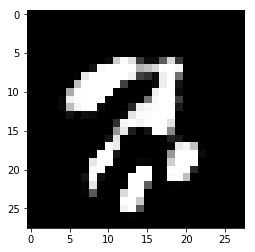

Loop: 478100, Generator_loss: -0.042314, Discriminator_loss: -0.0015552
Loop: 478200, Generator_loss: 0.027094, Discriminator_loss: 0.00092739
Loop: 478300, Generator_loss: -0.052548, Discriminator_loss: 0.0072686
Loop: 478400, Generator_loss: -0.029511, Discriminator_loss: 0.0021575
Loop: 478500, Generator_loss: -0.0063232, Discriminator_loss: 0.0022108
Loop: 478600, Generator_loss: 0.04702, Discriminator_loss: 0.0071653
Loop: 478700, Generator_loss: -0.05707, Discriminator_loss: 0.0010169
Loop: 478800, Generator_loss: 0.030922, Discriminator_loss: 0.0038486
Loop: 478900, Generator_loss: -0.0027357, Discriminator_loss: 0.0015119
Loop: 479000, Generator_loss: -0.04249, Discriminator_loss: 0.0068692


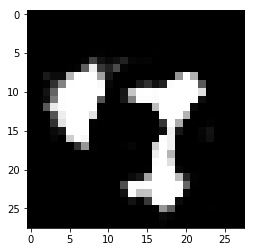

Loop: 479100, Generator_loss: -0.042405, Discriminator_loss: 0.0032721
Loop: 479200, Generator_loss: -0.019375, Discriminator_loss: 0.00014959
Loop: 479300, Generator_loss: 0.026573, Discriminator_loss: 0.00096066
Loop: 479400, Generator_loss: -0.0075204, Discriminator_loss: 0.0020478
Loop: 479500, Generator_loss: -0.014817, Discriminator_loss: 0.0029275
Loop: 479600, Generator_loss: -0.033725, Discriminator_loss: 0.00090797
Loop: 479700, Generator_loss: -0.050155, Discriminator_loss: 0.0017125
Loop: 479800, Generator_loss: 0.026427, Discriminator_loss: 0.0014574
Loop: 479900, Generator_loss: -0.012097, Discriminator_loss: 0.00080101
Loop: 480000, Generator_loss: -0.018018, Discriminator_loss: 0.0023766


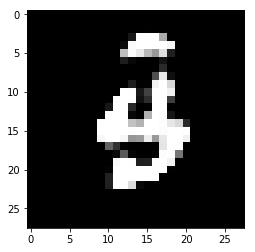

Loop: 480100, Generator_loss: -0.020188, Discriminator_loss: -0.0065313
Loop: 480200, Generator_loss: -0.0044335, Discriminator_loss: 0.0032789
Loop: 480300, Generator_loss: 0.021241, Discriminator_loss: 0.002131
Loop: 480400, Generator_loss: -0.022238, Discriminator_loss: 0.0032462
Loop: 480500, Generator_loss: -0.0049936, Discriminator_loss: 0.00032324
Loop: 480600, Generator_loss: -0.04043, Discriminator_loss: 0.0035256
Loop: 480700, Generator_loss: -0.034336, Discriminator_loss: 0.0057873
Loop: 480800, Generator_loss: -0.011115, Discriminator_loss: 0.010974
Loop: 480900, Generator_loss: -0.043832, Discriminator_loss: -0.0060538
Loop: 481000, Generator_loss: 0.070288, Discriminator_loss: 0.0064593


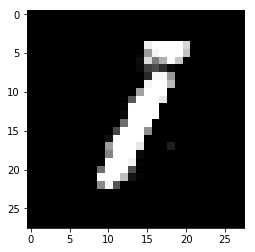

Loop: 481100, Generator_loss: 0.033327, Discriminator_loss: 0.0020054
Loop: 481200, Generator_loss: 0.0040168, Discriminator_loss: 0.00055269
Loop: 481300, Generator_loss: 0.014485, Discriminator_loss: 0.0078676
Loop: 481400, Generator_loss: -0.0018714, Discriminator_loss: -0.0025337
Loop: 481500, Generator_loss: 0.038729, Discriminator_loss: -0.0029375
Loop: 481600, Generator_loss: -0.020578, Discriminator_loss: 0.0021071
Loop: 481700, Generator_loss: 0.040665, Discriminator_loss: 0.0126
Loop: 481800, Generator_loss: -0.021284, Discriminator_loss: 0.00021479
Loop: 481900, Generator_loss: 0.023051, Discriminator_loss: 0.00078706
Loop: 482000, Generator_loss: -0.00793, Discriminator_loss: 0.008499


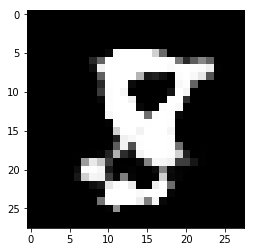

Loop: 482100, Generator_loss: -0.046436, Discriminator_loss: 0.0096995
Loop: 482200, Generator_loss: 0.0020584, Discriminator_loss: 0.0033977
Loop: 482300, Generator_loss: -0.0088963, Discriminator_loss: -0.0034053
Loop: 482400, Generator_loss: -0.015484, Discriminator_loss: 0.0074129
Loop: 482500, Generator_loss: 0.011237, Discriminator_loss: 0.010196
Loop: 482600, Generator_loss: 0.048502, Discriminator_loss: -0.00026474
Loop: 482700, Generator_loss: -0.0058317, Discriminator_loss: 0.0033723
Loop: 482800, Generator_loss: -0.037737, Discriminator_loss: 0.0030307
Loop: 482900, Generator_loss: 0.014234, Discriminator_loss: 0.0075139
Loop: 483000, Generator_loss: 0.013137, Discriminator_loss: 0.00796


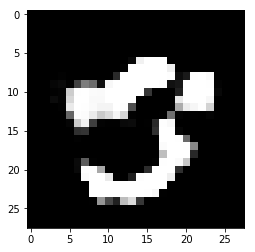

Loop: 483100, Generator_loss: 0.0072512, Discriminator_loss: -8.1267e-05
Loop: 483200, Generator_loss: 0.0063317, Discriminator_loss: -0.0011236
Loop: 483300, Generator_loss: -0.034347, Discriminator_loss: 0.0010401
Loop: 483400, Generator_loss: -0.0088253, Discriminator_loss: 0.0018583
Loop: 483500, Generator_loss: -0.003286, Discriminator_loss: 0.0011996
Loop: 483600, Generator_loss: -0.0045577, Discriminator_loss: -0.00024052
Loop: 483700, Generator_loss: 0.035997, Discriminator_loss: 0.006695
Loop: 483800, Generator_loss: -0.014996, Discriminator_loss: 0.00080201
Loop: 483900, Generator_loss: -0.033719, Discriminator_loss: 0.0074633
Loop: 484000, Generator_loss: 0.028793, Discriminator_loss: -0.0037613


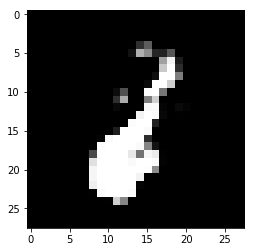

Loop: 484100, Generator_loss: 0.056141, Discriminator_loss: -0.0034386
Loop: 484200, Generator_loss: 0.0021677, Discriminator_loss: 0.0088675
Loop: 484300, Generator_loss: 0.0085281, Discriminator_loss: 0.0053518
Loop: 484400, Generator_loss: 0.005604, Discriminator_loss: 0.0030947
Loop: 484500, Generator_loss: -0.022734, Discriminator_loss: 0.0063236
Loop: 484600, Generator_loss: -0.02577, Discriminator_loss: 0.0045286
Loop: 484700, Generator_loss: -0.027299, Discriminator_loss: 0.0035362
Loop: 484800, Generator_loss: -0.02743, Discriminator_loss: 0.0037026
Loop: 484900, Generator_loss: 0.0041851, Discriminator_loss: -0.0008613
Loop: 485000, Generator_loss: -0.028918, Discriminator_loss: 0.0058273


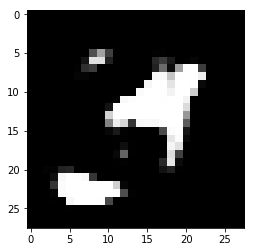

Loop: 485100, Generator_loss: -0.032466, Discriminator_loss: 0.0048296
Loop: 485200, Generator_loss: -0.018495, Discriminator_loss: 0.0029088
Loop: 485300, Generator_loss: 0.012362, Discriminator_loss: -0.0034525
Loop: 485400, Generator_loss: -0.007492, Discriminator_loss: 0.0043338
Loop: 485500, Generator_loss: 0.035454, Discriminator_loss: -0.00088919
Loop: 485600, Generator_loss: -0.040889, Discriminator_loss: 0.0050425
Loop: 485700, Generator_loss: 0.020052, Discriminator_loss: 0.0053851
Loop: 485800, Generator_loss: -0.043033, Discriminator_loss: -0.0010244
Loop: 485900, Generator_loss: 0.034212, Discriminator_loss: 0.0026536
Loop: 486000, Generator_loss: 0.016194, Discriminator_loss: 0.0080443


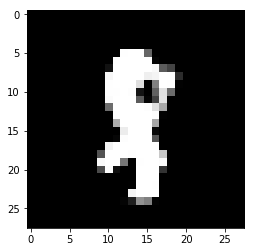

Loop: 486100, Generator_loss: 0.026046, Discriminator_loss: 0.002139
Loop: 486200, Generator_loss: -0.0026234, Discriminator_loss: 0.010943
Loop: 486300, Generator_loss: -0.0059736, Discriminator_loss: -0.00018869
Loop: 486400, Generator_loss: -0.019252, Discriminator_loss: 0.0092383
Loop: 486500, Generator_loss: 0.03869, Discriminator_loss: -0.0054171
Loop: 486600, Generator_loss: -0.023973, Discriminator_loss: 0.0031624
Loop: 486700, Generator_loss: -0.0091242, Discriminator_loss: 0.0015615
Loop: 486800, Generator_loss: 0.03128, Discriminator_loss: 0.0028668
Loop: 486900, Generator_loss: -0.0073, Discriminator_loss: -0.00066453
Loop: 487000, Generator_loss: 0.026669, Discriminator_loss: 0.00053754


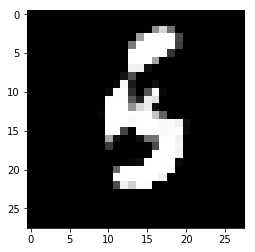

Loop: 487100, Generator_loss: 0.0089641, Discriminator_loss: -0.0021421
Loop: 487200, Generator_loss: 0.0059152, Discriminator_loss: 0.0080462
Loop: 487300, Generator_loss: 0.005493, Discriminator_loss: -0.0014184
Loop: 487400, Generator_loss: -0.010497, Discriminator_loss: 0.0060017
Loop: 487500, Generator_loss: -0.013946, Discriminator_loss: 0.001345
Loop: 487600, Generator_loss: 0.028353, Discriminator_loss: 0.004797
Loop: 487700, Generator_loss: -0.017048, Discriminator_loss: 0.0037162
Loop: 487800, Generator_loss: -0.0043671, Discriminator_loss: -0.00030041
Loop: 487900, Generator_loss: 0.026614, Discriminator_loss: 0.00532
Loop: 488000, Generator_loss: -0.013146, Discriminator_loss: -0.0025076


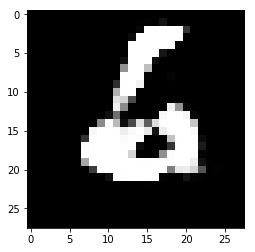

Loop: 488100, Generator_loss: 0.0021163, Discriminator_loss: 0.0032297
Loop: 488200, Generator_loss: 0.016524, Discriminator_loss: 0.0031819
Loop: 488300, Generator_loss: 0.003111, Discriminator_loss: 0.0019539
Loop: 488400, Generator_loss: -0.030789, Discriminator_loss: -0.0054058
Loop: 488500, Generator_loss: -0.0004887, Discriminator_loss: -5.3389e-05
Loop: 488600, Generator_loss: -0.024635, Discriminator_loss: 0.0047534
Loop: 488700, Generator_loss: -0.019496, Discriminator_loss: 0.0049204
Loop: 488800, Generator_loss: -0.0052822, Discriminator_loss: 0.0046471
Loop: 488900, Generator_loss: 0.0034203, Discriminator_loss: -0.0027577
Loop: 489000, Generator_loss: 0.0046695, Discriminator_loss: 1.432e-05


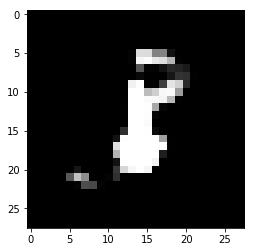

Loop: 489100, Generator_loss: 0.0052569, Discriminator_loss: -0.0007714
Loop: 489200, Generator_loss: -0.054919, Discriminator_loss: 6.59e-05
Loop: 489300, Generator_loss: -0.041403, Discriminator_loss: 0.0093876
Loop: 489400, Generator_loss: -0.0023207, Discriminator_loss: 0.0051144
Loop: 489500, Generator_loss: -0.011388, Discriminator_loss: 0.0067987
Loop: 489600, Generator_loss: -0.030404, Discriminator_loss: 0.0098762
Loop: 489700, Generator_loss: -0.047087, Discriminator_loss: -0.00097319
Loop: 489800, Generator_loss: -0.059838, Discriminator_loss: -0.0055148
Loop: 489900, Generator_loss: 0.00069247, Discriminator_loss: 0.00056261
Loop: 490000, Generator_loss: 0.041737, Discriminator_loss: 0.0052533


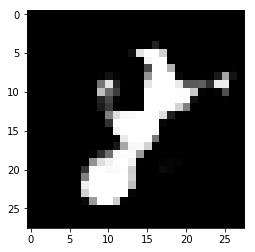

Loop: 490100, Generator_loss: 0.025245, Discriminator_loss: -0.0016158
Loop: 490200, Generator_loss: -0.01847, Discriminator_loss: 0.0070553
Loop: 490300, Generator_loss: -0.0548, Discriminator_loss: 0.0091785
Loop: 490400, Generator_loss: 0.036235, Discriminator_loss: 0.0069181
Loop: 490500, Generator_loss: -0.0032724, Discriminator_loss: -0.0011958
Loop: 490600, Generator_loss: -0.04321, Discriminator_loss: 0.006485
Loop: 490700, Generator_loss: -0.017774, Discriminator_loss: 0.0014085
Loop: 490800, Generator_loss: -0.023365, Discriminator_loss: 0.0058633
Loop: 490900, Generator_loss: 0.0060802, Discriminator_loss: 0.0076075
Loop: 491000, Generator_loss: -0.023971, Discriminator_loss: 0.0039616


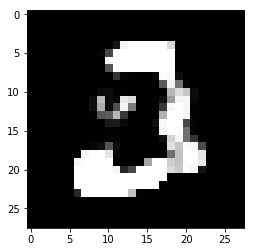

Loop: 491100, Generator_loss: -0.027192, Discriminator_loss: 0.0028219
Loop: 491200, Generator_loss: -0.033775, Discriminator_loss: 0.0024999
Loop: 491300, Generator_loss: -0.0072229, Discriminator_loss: 0.010846
Loop: 491400, Generator_loss: -0.004897, Discriminator_loss: 0.0020028
Loop: 491500, Generator_loss: 0.0091568, Discriminator_loss: 0.0026837
Loop: 491600, Generator_loss: -0.0010754, Discriminator_loss: -0.0029576
Loop: 491700, Generator_loss: 0.0011012, Discriminator_loss: 0.0095557
Loop: 491800, Generator_loss: -0.020962, Discriminator_loss: 0.0001475
Loop: 491900, Generator_loss: -0.014501, Discriminator_loss: 0.0025558
Loop: 492000, Generator_loss: 0.026957, Discriminator_loss: -0.0012872


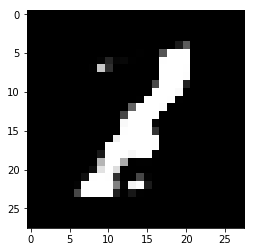

Loop: 492100, Generator_loss: 0.0018506, Discriminator_loss: 0.00082185
Loop: 492200, Generator_loss: 0.017656, Discriminator_loss: 0.0046311
Loop: 492300, Generator_loss: 0.011294, Discriminator_loss: 0.0099864
Loop: 492400, Generator_loss: -0.0052196, Discriminator_loss: 0.0095229
Loop: 492500, Generator_loss: -0.013058, Discriminator_loss: 0.0050582
Loop: 492600, Generator_loss: -0.042665, Discriminator_loss: 0.0055784
Loop: 492700, Generator_loss: -0.055811, Discriminator_loss: 0.0055661
Loop: 492800, Generator_loss: -0.049356, Discriminator_loss: 0.0016502
Loop: 492900, Generator_loss: -0.028143, Discriminator_loss: 0.00656
Loop: 493000, Generator_loss: 0.022068, Discriminator_loss: 0.0062948


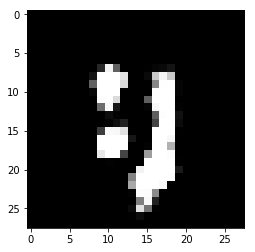

Loop: 493100, Generator_loss: 0.018953, Discriminator_loss: 0.0055048
Loop: 493200, Generator_loss: 0.017219, Discriminator_loss: -0.0041144
Loop: 493300, Generator_loss: -0.00036055, Discriminator_loss: 0.0030108
Loop: 493400, Generator_loss: 0.0055734, Discriminator_loss: 0.0026185
Loop: 493500, Generator_loss: -0.0051526, Discriminator_loss: -0.00017227
Loop: 493600, Generator_loss: 0.027991, Discriminator_loss: 0.0029087
Loop: 493700, Generator_loss: -0.017426, Discriminator_loss: 0.003844
Loop: 493800, Generator_loss: -0.0055273, Discriminator_loss: 0.0074537
Loop: 493900, Generator_loss: -0.031662, Discriminator_loss: 0.0024859
Loop: 494000, Generator_loss: 0.0062601, Discriminator_loss: 0.0021619


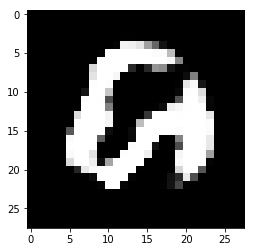

Loop: 494100, Generator_loss: 0.011738, Discriminator_loss: 0.002064
Loop: 494200, Generator_loss: -0.036945, Discriminator_loss: 0.0051004
Loop: 494300, Generator_loss: -0.065818, Discriminator_loss: 0.011433
Loop: 494400, Generator_loss: -0.038701, Discriminator_loss: 0.0024466
Loop: 494500, Generator_loss: 0.030847, Discriminator_loss: 9.4514e-05
Loop: 494600, Generator_loss: 0.0027341, Discriminator_loss: 0.0049021
Loop: 494700, Generator_loss: 0.030384, Discriminator_loss: -0.0026514
Loop: 494800, Generator_loss: -0.01138, Discriminator_loss: 0.00043665
Loop: 494900, Generator_loss: -0.0090343, Discriminator_loss: 0.0022502
Loop: 495000, Generator_loss: 0.0058349, Discriminator_loss: -0.0025301


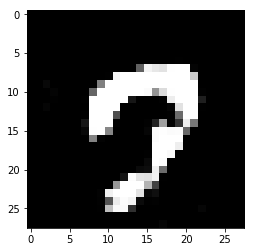

Loop: 495100, Generator_loss: 0.023578, Discriminator_loss: 0.0075245
Loop: 495200, Generator_loss: 0.0064612, Discriminator_loss: 0.0041886
Loop: 495300, Generator_loss: -0.01251, Discriminator_loss: 0.0016264
Loop: 495400, Generator_loss: 0.042405, Discriminator_loss: 0.0084797
Loop: 495500, Generator_loss: 0.024599, Discriminator_loss: 0.0016173
Loop: 495600, Generator_loss: -0.056489, Discriminator_loss: 0.0074655
Loop: 495700, Generator_loss: -0.036866, Discriminator_loss: 0.00073864
Loop: 495800, Generator_loss: -0.033149, Discriminator_loss: 0.0027743
Loop: 495900, Generator_loss: -0.0080244, Discriminator_loss: 0.0057618
Loop: 496000, Generator_loss: -0.027508, Discriminator_loss: -0.0019901


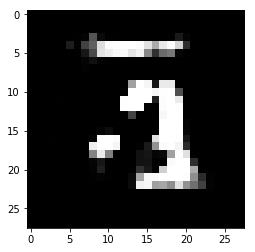

Loop: 496100, Generator_loss: -0.021349, Discriminator_loss: 0.0014716
Loop: 496200, Generator_loss: 0.015573, Discriminator_loss: 0.0066099
Loop: 496300, Generator_loss: -0.018134, Discriminator_loss: -0.0038573
Loop: 496400, Generator_loss: -0.039335, Discriminator_loss: 0.0080239
Loop: 496500, Generator_loss: -0.042371, Discriminator_loss: 0.00025795
Loop: 496600, Generator_loss: -0.021364, Discriminator_loss: 0.0050496
Loop: 496700, Generator_loss: -0.032931, Discriminator_loss: 0.0045994
Loop: 496800, Generator_loss: 0.020469, Discriminator_loss: 0.0031671
Loop: 496900, Generator_loss: 0.00058962, Discriminator_loss: 0.0082466
Loop: 497000, Generator_loss: 0.07523, Discriminator_loss: 0.014925


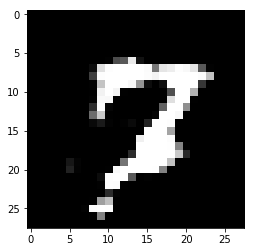

Loop: 497100, Generator_loss: -0.015645, Discriminator_loss: 0.0054706
Loop: 497200, Generator_loss: -0.012839, Discriminator_loss: -0.002855
Loop: 497300, Generator_loss: -0.028438, Discriminator_loss: 0.0040516
Loop: 497400, Generator_loss: 0.0057286, Discriminator_loss: 0.0034067
Loop: 497500, Generator_loss: -0.034549, Discriminator_loss: 0.0065714
Loop: 497600, Generator_loss: -0.0065625, Discriminator_loss: 0.0050367
Loop: 497700, Generator_loss: 0.013421, Discriminator_loss: 0.0011923
Loop: 497800, Generator_loss: -0.034191, Discriminator_loss: 0.0068191
Loop: 497900, Generator_loss: -0.044825, Discriminator_loss: -0.0026353
Loop: 498000, Generator_loss: 0.003807, Discriminator_loss: 0.0044843


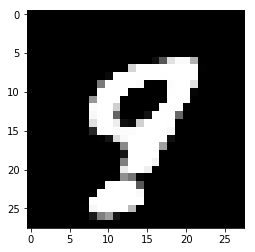

Loop: 498100, Generator_loss: 0.0074091, Discriminator_loss: 0.0029297
Loop: 498200, Generator_loss: 0.0013454, Discriminator_loss: 0.00776
Loop: 498300, Generator_loss: 3.6866e-05, Discriminator_loss: -0.0088452
Loop: 498400, Generator_loss: 0.016435, Discriminator_loss: -0.0069372
Loop: 498500, Generator_loss: 0.015628, Discriminator_loss: 0.0087665
Loop: 498600, Generator_loss: -0.014101, Discriminator_loss: -0.0014496
Loop: 498700, Generator_loss: 0.033533, Discriminator_loss: 0.001525
Loop: 498800, Generator_loss: 0.019668, Discriminator_loss: 0.0068581
Loop: 498900, Generator_loss: -0.031476, Discriminator_loss: 0.0056516
Loop: 499000, Generator_loss: 0.012351, Discriminator_loss: -0.0014971


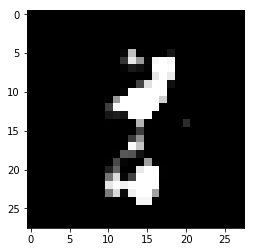

Loop: 499100, Generator_loss: 0.037224, Discriminator_loss: 0.0016894
Loop: 499200, Generator_loss: 0.00028927, Discriminator_loss: 0.0010799
Loop: 499300, Generator_loss: 0.01068, Discriminator_loss: -0.0012118
Loop: 499400, Generator_loss: -0.028818, Discriminator_loss: 0.0045256
Loop: 499500, Generator_loss: -0.0081721, Discriminator_loss: 0.0017615
Loop: 499600, Generator_loss: 0.012544, Discriminator_loss: 0.007164
Loop: 499700, Generator_loss: 0.011285, Discriminator_loss: 0.0033539
Loop: 499800, Generator_loss: -0.018454, Discriminator_loss: 0.0070209
Loop: 499900, Generator_loss: -0.024509, Discriminator_loss: 0.0015306
Loop: 500000, Generator_loss: 0.020043, Discriminator_loss: 0.0042294


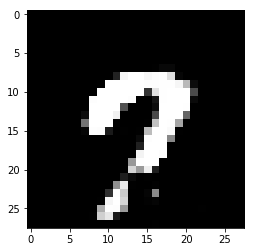

Loop: 500100, Generator_loss: -0.038411, Discriminator_loss: 0.0014413
Loop: 500200, Generator_loss: 0.057384, Discriminator_loss: 0.014531
Loop: 500300, Generator_loss: -0.013964, Discriminator_loss: -0.0011548
Loop: 500400, Generator_loss: 0.019311, Discriminator_loss: 0.0060163
Loop: 500500, Generator_loss: -0.021201, Discriminator_loss: 0.0030822
Loop: 500600, Generator_loss: -0.026837, Discriminator_loss: 0.0064595
Loop: 500700, Generator_loss: -0.060852, Discriminator_loss: 0.0069812
Loop: 500800, Generator_loss: -0.059322, Discriminator_loss: 0.00079117
Loop: 500900, Generator_loss: -0.023444, Discriminator_loss: 0.0016634
Loop: 501000, Generator_loss: 0.012668, Discriminator_loss: 0.0090447


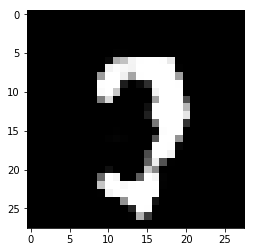

Loop: 501100, Generator_loss: -0.070096, Discriminator_loss: 0.0068532
Loop: 501200, Generator_loss: 0.019264, Discriminator_loss: 0.0053731
Loop: 501300, Generator_loss: 0.019535, Discriminator_loss: -0.00093013
Loop: 501400, Generator_loss: -0.024037, Discriminator_loss: 0.0011579
Loop: 501500, Generator_loss: -0.046286, Discriminator_loss: 0.0021494
Loop: 501600, Generator_loss: -0.035639, Discriminator_loss: 0.005642
Loop: 501700, Generator_loss: -0.031524, Discriminator_loss: 0.0083333
Loop: 501800, Generator_loss: 0.022837, Discriminator_loss: 0.013296
Loop: 501900, Generator_loss: -0.019648, Discriminator_loss: 0.0020772
Loop: 502000, Generator_loss: 0.00070554, Discriminator_loss: 0.0027244


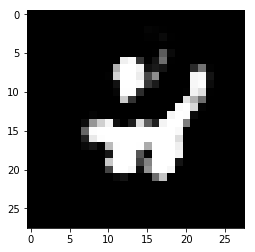

Loop: 502100, Generator_loss: 0.042997, Discriminator_loss: 0.0017361
Loop: 502200, Generator_loss: -0.078598, Discriminator_loss: 0.0028973
Loop: 502300, Generator_loss: -0.017865, Discriminator_loss: 0.0051788
Loop: 502400, Generator_loss: -0.059318, Discriminator_loss: 0.0082325
Loop: 502500, Generator_loss: -0.009958, Discriminator_loss: 0.0059472
Loop: 502600, Generator_loss: -0.053777, Discriminator_loss: 0.0030191
Loop: 502700, Generator_loss: -0.047115, Discriminator_loss: 0.0034479
Loop: 502800, Generator_loss: 0.011306, Discriminator_loss: -0.0033142
Loop: 502900, Generator_loss: -0.020394, Discriminator_loss: 0.0018684
Loop: 503000, Generator_loss: -0.0049112, Discriminator_loss: 0.0052281


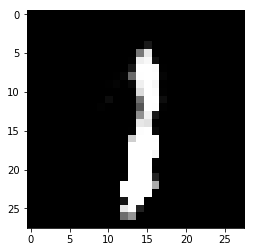

Loop: 503100, Generator_loss: 0.061107, Discriminator_loss: 0.0082028
Loop: 503200, Generator_loss: -0.067629, Discriminator_loss: 0.0063214
Loop: 503300, Generator_loss: 0.017368, Discriminator_loss: 0.010651
Loop: 503400, Generator_loss: -0.052337, Discriminator_loss: 0.0042227
Loop: 503500, Generator_loss: 0.022967, Discriminator_loss: 0.0015925
Loop: 503600, Generator_loss: -0.036749, Discriminator_loss: 0.0015876
Loop: 503700, Generator_loss: -0.072112, Discriminator_loss: 0.012236
Loop: 503800, Generator_loss: -0.048407, Discriminator_loss: -0.00064227
Loop: 503900, Generator_loss: -0.0018213, Discriminator_loss: 0.0063148
Loop: 504000, Generator_loss: -0.04224, Discriminator_loss: -0.00034467


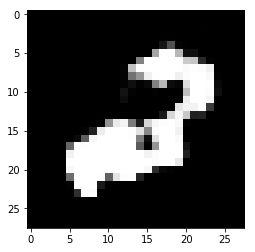

Loop: 504100, Generator_loss: -0.0047169, Discriminator_loss: -0.00055227
Loop: 504200, Generator_loss: 0.0007642, Discriminator_loss: -0.00092605
Loop: 504300, Generator_loss: -0.034536, Discriminator_loss: 0.0044578
Loop: 504400, Generator_loss: 0.0067261, Discriminator_loss: 0.0068665
Loop: 504500, Generator_loss: -0.029422, Discriminator_loss: 0.0066383
Loop: 504600, Generator_loss: -0.014972, Discriminator_loss: -0.0026253
Loop: 504700, Generator_loss: 0.00013384, Discriminator_loss: 0.0041063
Loop: 504800, Generator_loss: 0.0076009, Discriminator_loss: 0.0027756
Loop: 504900, Generator_loss: -0.0040099, Discriminator_loss: -0.0029568
Loop: 505000, Generator_loss: -0.014465, Discriminator_loss: -0.00052484


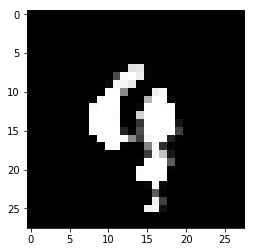

Loop: 505100, Generator_loss: -0.014296, Discriminator_loss: 0.0013916
Loop: 505200, Generator_loss: 0.023731, Discriminator_loss: 0.0018248
Loop: 505300, Generator_loss: 0.053102, Discriminator_loss: 0.01334
Loop: 505400, Generator_loss: -0.020907, Discriminator_loss: 0.0037584
Loop: 505500, Generator_loss: 0.0044448, Discriminator_loss: -0.0017965
Loop: 505600, Generator_loss: -0.038047, Discriminator_loss: 0.002932
Loop: 505700, Generator_loss: 0.007438, Discriminator_loss: 0.00027784
Loop: 505800, Generator_loss: -0.027935, Discriminator_loss: 0.0089899
Loop: 505900, Generator_loss: -0.034524, Discriminator_loss: -0.00093634
Loop: 506000, Generator_loss: -0.042433, Discriminator_loss: 0.0017008


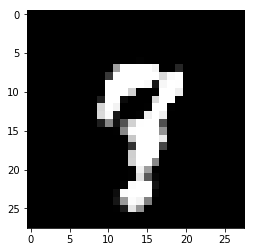

Loop: 506100, Generator_loss: -0.033932, Discriminator_loss: -0.00066305
Loop: 506200, Generator_loss: 0.012342, Discriminator_loss: 0.0030831
Loop: 506300, Generator_loss: -0.0081709, Discriminator_loss: 0.001569
Loop: 506400, Generator_loss: -0.016069, Discriminator_loss: 0.0026602
Loop: 506500, Generator_loss: -0.020732, Discriminator_loss: 0.0054903
Loop: 506600, Generator_loss: -0.019, Discriminator_loss: 0.0096688
Loop: 506700, Generator_loss: 0.0038813, Discriminator_loss: 0.004075
Loop: 506800, Generator_loss: 0.018589, Discriminator_loss: 0.0037387
Loop: 506900, Generator_loss: 0.026078, Discriminator_loss: 1.7291e-05
Loop: 507000, Generator_loss: 0.018966, Discriminator_loss: -0.0049144


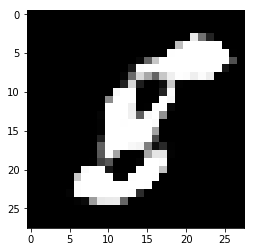

Loop: 507100, Generator_loss: -0.03374, Discriminator_loss: 0.0012325
Loop: 507200, Generator_loss: -0.0007524, Discriminator_loss: 0.0027401
Loop: 507300, Generator_loss: 0.030737, Discriminator_loss: 0.0049184
Loop: 507400, Generator_loss: -0.02781, Discriminator_loss: 0.0042557
Loop: 507500, Generator_loss: -0.028886, Discriminator_loss: 0.0043427
Loop: 507600, Generator_loss: 0.0099719, Discriminator_loss: 0.007393
Loop: 507700, Generator_loss: 0.05808, Discriminator_loss: 0.012603
Loop: 507800, Generator_loss: 0.0065198, Discriminator_loss: -0.0010318
Loop: 507900, Generator_loss: 0.03816, Discriminator_loss: 0.0010749
Loop: 508000, Generator_loss: -0.016882, Discriminator_loss: 0.0037534


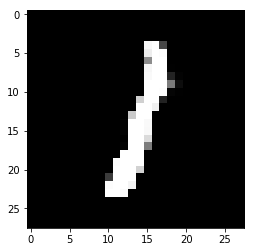

Loop: 508100, Generator_loss: -0.028032, Discriminator_loss: 0.0059418
Loop: 508200, Generator_loss: -0.048584, Discriminator_loss: 0.0059985
Loop: 508300, Generator_loss: -0.014821, Discriminator_loss: 0.0064174
Loop: 508400, Generator_loss: -0.034106, Discriminator_loss: -0.0080588
Loop: 508500, Generator_loss: 0.014647, Discriminator_loss: 0.0015133
Loop: 508600, Generator_loss: -0.00060887, Discriminator_loss: 0.0071758
Loop: 508700, Generator_loss: 0.035351, Discriminator_loss: -0.0029392
Loop: 508800, Generator_loss: -0.01386, Discriminator_loss: 0.0064324
Loop: 508900, Generator_loss: -0.0088839, Discriminator_loss: 0.011978
Loop: 509000, Generator_loss: 0.040592, Discriminator_loss: 0.0054746


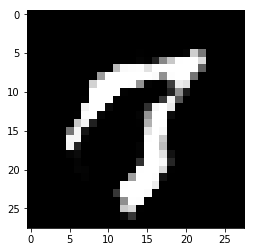

Loop: 509100, Generator_loss: -0.028154, Discriminator_loss: 0.0064781
Loop: 509200, Generator_loss: -0.037195, Discriminator_loss: -0.0038138
Loop: 509300, Generator_loss: 0.015761, Discriminator_loss: 0.0094707
Loop: 509400, Generator_loss: -0.016146, Discriminator_loss: 0.0045863
Loop: 509500, Generator_loss: -0.0302, Discriminator_loss: 0.0060942
Loop: 509600, Generator_loss: -0.0031321, Discriminator_loss: 0.0010576
Loop: 509700, Generator_loss: 0.015658, Discriminator_loss: 0.0048983
Loop: 509800, Generator_loss: -0.0059736, Discriminator_loss: 0.0040022
Loop: 509900, Generator_loss: -0.0099866, Discriminator_loss: -0.00042714
Loop: 510000, Generator_loss: -0.0042604, Discriminator_loss: 0.0068425


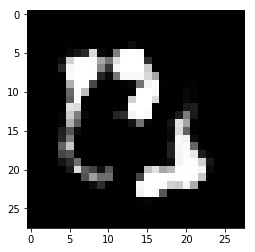

Loop: 510100, Generator_loss: -0.014429, Discriminator_loss: 0.0050793
Loop: 510200, Generator_loss: -0.020678, Discriminator_loss: 0.0020832
Loop: 510300, Generator_loss: -0.020169, Discriminator_loss: 0.0025019
Loop: 510400, Generator_loss: 0.021028, Discriminator_loss: 0.001183
Loop: 510500, Generator_loss: 0.025358, Discriminator_loss: 0.007412
Loop: 510600, Generator_loss: 0.024404, Discriminator_loss: 0.00012512
Loop: 510700, Generator_loss: 0.033055, Discriminator_loss: 0.0033342
Loop: 510800, Generator_loss: 0.0041319, Discriminator_loss: 0.0029736
Loop: 510900, Generator_loss: 0.034336, Discriminator_loss: 0.0029604
Loop: 511000, Generator_loss: 0.0075435, Discriminator_loss: -0.0055084


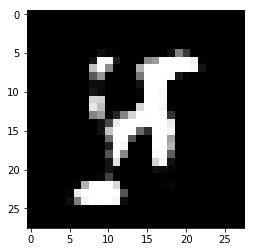

Loop: 511100, Generator_loss: 0.018451, Discriminator_loss: 0.0047898
Loop: 511200, Generator_loss: -0.00016548, Discriminator_loss: -0.0029132
Loop: 511300, Generator_loss: -0.0081968, Discriminator_loss: 0.0046397
Loop: 511400, Generator_loss: 0.011504, Discriminator_loss: 0.0038625
Loop: 511500, Generator_loss: 0.044054, Discriminator_loss: 0.0055684
Loop: 511600, Generator_loss: 0.0030753, Discriminator_loss: 0.0030804
Loop: 511700, Generator_loss: 0.0039233, Discriminator_loss: 0.0027266
Loop: 511800, Generator_loss: -0.034911, Discriminator_loss: 0.0054425
Loop: 511900, Generator_loss: -0.043358, Discriminator_loss: -0.0031296
Loop: 512000, Generator_loss: -0.031528, Discriminator_loss: 0.0070183


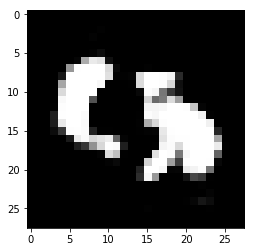

Loop: 512100, Generator_loss: -0.07224, Discriminator_loss: 0.0011326
Loop: 512200, Generator_loss: -0.02235, Discriminator_loss: 0.0051413
Loop: 512300, Generator_loss: -0.0063724, Discriminator_loss: 0.0032138
Loop: 512400, Generator_loss: 0.0019696, Discriminator_loss: 0.0042814
Loop: 512500, Generator_loss: -0.016043, Discriminator_loss: 0.003751
Loop: 512600, Generator_loss: -0.018568, Discriminator_loss: 0.0015452
Loop: 512700, Generator_loss: -0.024517, Discriminator_loss: 0.0038588
Loop: 512800, Generator_loss: 0.028108, Discriminator_loss: 0.0045309
Loop: 512900, Generator_loss: 0.035834, Discriminator_loss: -0.00054086
Loop: 513000, Generator_loss: -0.025902, Discriminator_loss: 0.00624


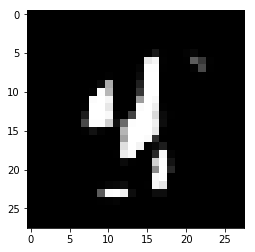

Loop: 513100, Generator_loss: 0.03357, Discriminator_loss: 0.0079035
Loop: 513200, Generator_loss: -0.021963, Discriminator_loss: 0.0026267
Loop: 513300, Generator_loss: -0.0038183, Discriminator_loss: -0.0046476
Loop: 513400, Generator_loss: 0.0084352, Discriminator_loss: -0.0015035
Loop: 513500, Generator_loss: -0.01014, Discriminator_loss: 0.0013444
Loop: 513600, Generator_loss: 0.01695, Discriminator_loss: 0.0049391
Loop: 513700, Generator_loss: 0.035412, Discriminator_loss: 0.0019613
Loop: 513800, Generator_loss: -0.019562, Discriminator_loss: -0.0065072
Loop: 513900, Generator_loss: -0.037087, Discriminator_loss: 0.0045265
Loop: 514000, Generator_loss: -0.047895, Discriminator_loss: 0.012548


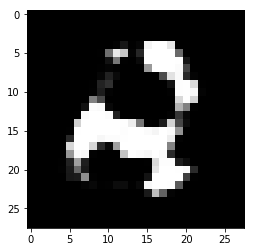

Loop: 514100, Generator_loss: 0.006694, Discriminator_loss: 0.00086837
Loop: 514200, Generator_loss: 0.041568, Discriminator_loss: 0.0093659
Loop: 514300, Generator_loss: 0.020241, Discriminator_loss: 0.0027459
Loop: 514400, Generator_loss: -0.0011613, Discriminator_loss: 0.0043927
Loop: 514500, Generator_loss: -0.011337, Discriminator_loss: 0.0051224
Loop: 514600, Generator_loss: -0.027695, Discriminator_loss: 0.012854
Loop: 514700, Generator_loss: 0.046494, Discriminator_loss: -0.00091439
Loop: 514800, Generator_loss: -0.031904, Discriminator_loss: 0.0033144
Loop: 514900, Generator_loss: 0.023817, Discriminator_loss: 0.0065155
Loop: 515000, Generator_loss: -0.029717, Discriminator_loss: 0.0026171


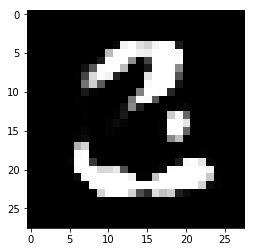

Loop: 515100, Generator_loss: 0.00092052, Discriminator_loss: 0.0039611
Loop: 515200, Generator_loss: -0.034307, Discriminator_loss: 0.0025757
Loop: 515300, Generator_loss: 0.0067261, Discriminator_loss: -0.00237
Loop: 515400, Generator_loss: -0.017524, Discriminator_loss: 9.8341e-05
Loop: 515500, Generator_loss: 0.039871, Discriminator_loss: 0.0027523
Loop: 515600, Generator_loss: -0.030624, Discriminator_loss: 0.0056782
Loop: 515700, Generator_loss: -0.037528, Discriminator_loss: -0.0032834
Loop: 515800, Generator_loss: 0.0029195, Discriminator_loss: 0.0018466
Loop: 515900, Generator_loss: 0.0016555, Discriminator_loss: 0.007382
Loop: 516000, Generator_loss: 0.022015, Discriminator_loss: -0.0057545


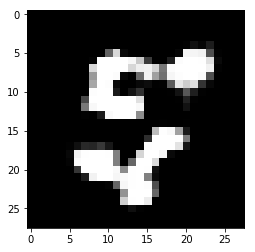

Loop: 516100, Generator_loss: 0.017631, Discriminator_loss: 2.1493e-05
Loop: 516200, Generator_loss: -0.0038665, Discriminator_loss: 0.0019196
Loop: 516300, Generator_loss: 0.012007, Discriminator_loss: 0.0012095
Loop: 516400, Generator_loss: 0.001119, Discriminator_loss: -0.0017545
Loop: 516500, Generator_loss: 0.0023835, Discriminator_loss: 0.00088451
Loop: 516600, Generator_loss: -0.0080731, Discriminator_loss: 0.0055257
Loop: 516700, Generator_loss: -0.02859, Discriminator_loss: 0.0030155
Loop: 516800, Generator_loss: -0.051492, Discriminator_loss: 0.0099393
Loop: 516900, Generator_loss: -0.034024, Discriminator_loss: 0.0048748
Loop: 517000, Generator_loss: -0.011879, Discriminator_loss: 0.012665


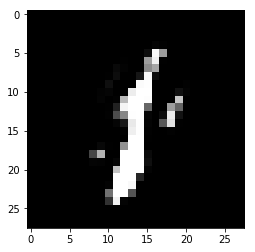

Loop: 517100, Generator_loss: -0.053878, Discriminator_loss: 0.0029412
Loop: 517200, Generator_loss: -0.045123, Discriminator_loss: -0.0044364
Loop: 517300, Generator_loss: -0.010552, Discriminator_loss: 0.004898
Loop: 517400, Generator_loss: -0.015725, Discriminator_loss: 0.00066976
Loop: 517500, Generator_loss: 0.0233, Discriminator_loss: 0.0018118
Loop: 517600, Generator_loss: 0.047821, Discriminator_loss: -0.003548
Loop: 517700, Generator_loss: -0.0027906, Discriminator_loss: -0.00055169
Loop: 517800, Generator_loss: 0.020342, Discriminator_loss: 0.0045864
Loop: 517900, Generator_loss: 0.021744, Discriminator_loss: 0.005523
Loop: 518000, Generator_loss: -0.038581, Discriminator_loss: 0.0030424


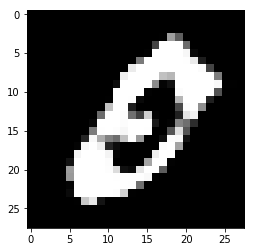

Loop: 518100, Generator_loss: -0.039426, Discriminator_loss: 0.0070823
Loop: 518200, Generator_loss: -0.030117, Discriminator_loss: -9.6776e-05
Loop: 518300, Generator_loss: 0.020583, Discriminator_loss: -0.0030145
Loop: 518400, Generator_loss: -0.049503, Discriminator_loss: 0.011909
Loop: 518500, Generator_loss: 0.025428, Discriminator_loss: 0.0077328
Loop: 518600, Generator_loss: -0.00081462, Discriminator_loss: 0.0047263
Loop: 518700, Generator_loss: -0.0092012, Discriminator_loss: 0.0039472
Loop: 518800, Generator_loss: 0.013501, Discriminator_loss: 0.0026997
Loop: 518900, Generator_loss: -0.020217, Discriminator_loss: 0.0079982
Loop: 519000, Generator_loss: -0.024352, Discriminator_loss: -0.0029822


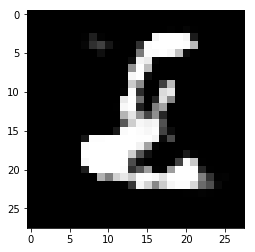

Loop: 519100, Generator_loss: -0.041142, Discriminator_loss: 0.01046
Loop: 519200, Generator_loss: -0.030382, Discriminator_loss: 0.0019255
Loop: 519300, Generator_loss: -0.024207, Discriminator_loss: 0.0043831
Loop: 519400, Generator_loss: 0.02338, Discriminator_loss: 0.0018502
Loop: 519500, Generator_loss: -0.020839, Discriminator_loss: 0.0051021
Loop: 519600, Generator_loss: -0.0026704, Discriminator_loss: -0.0016417
Loop: 519700, Generator_loss: -0.022298, Discriminator_loss: 0.0020185
Loop: 519800, Generator_loss: 0.029956, Discriminator_loss: 0.0095997
Loop: 519900, Generator_loss: -0.012949, Discriminator_loss: -0.0013206
Loop: 520000, Generator_loss: -0.026957, Discriminator_loss: 0.0032101


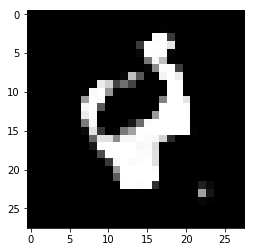

Loop: 520100, Generator_loss: 0.016703, Discriminator_loss: 0.0032169
Loop: 520200, Generator_loss: 0.022825, Discriminator_loss: -0.0017944
Loop: 520300, Generator_loss: -0.025773, Discriminator_loss: 0.00076563
Loop: 520400, Generator_loss: 0.0095457, Discriminator_loss: 0.00018517
Loop: 520500, Generator_loss: 0.0051885, Discriminator_loss: 0.0021725
Loop: 520600, Generator_loss: -0.057602, Discriminator_loss: 0.0083107
Loop: 520700, Generator_loss: -0.014802, Discriminator_loss: 0.00052396
Loop: 520800, Generator_loss: -0.0033509, Discriminator_loss: -0.0016294
Loop: 520900, Generator_loss: -0.032278, Discriminator_loss: 0.0070696
Loop: 521000, Generator_loss: 0.0057394, Discriminator_loss: -0.00010251


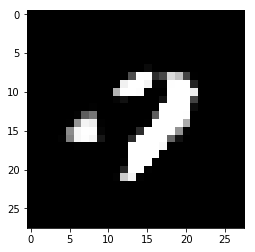

Loop: 521100, Generator_loss: -0.020952, Discriminator_loss: 0.0066016
Loop: 521200, Generator_loss: 0.0018585, Discriminator_loss: 0.003323
Loop: 521300, Generator_loss: -0.0062581, Discriminator_loss: 0.0037433
Loop: 521400, Generator_loss: -0.044673, Discriminator_loss: 0.0006557
Loop: 521500, Generator_loss: -0.013512, Discriminator_loss: 0.0037803
Loop: 521600, Generator_loss: 0.03839, Discriminator_loss: 0.0017439
Loop: 521700, Generator_loss: 0.0088504, Discriminator_loss: 0.0010915
Loop: 521800, Generator_loss: -0.031832, Discriminator_loss: 0.0012479
Loop: 521900, Generator_loss: 0.020517, Discriminator_loss: 0.0017637
Loop: 522000, Generator_loss: -0.020983, Discriminator_loss: 0.0030625


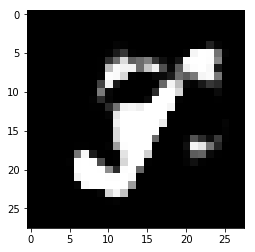

Loop: 522100, Generator_loss: 0.021914, Discriminator_loss: 0.0037984
Loop: 522200, Generator_loss: 0.053118, Discriminator_loss: 0.0040379
Loop: 522300, Generator_loss: -0.039278, Discriminator_loss: 0.00028232
Loop: 522400, Generator_loss: 0.0014046, Discriminator_loss: -0.0022779
Loop: 522500, Generator_loss: -0.0041128, Discriminator_loss: -0.0041415
Loop: 522600, Generator_loss: 0.0069314, Discriminator_loss: 0.011391
Loop: 522700, Generator_loss: 0.015428, Discriminator_loss: 0.0021568
Loop: 522800, Generator_loss: 0.05856, Discriminator_loss: 0.015126
Loop: 522900, Generator_loss: 0.024961, Discriminator_loss: 0.0036292
Loop: 523000, Generator_loss: 0.0062694, Discriminator_loss: -0.00094398


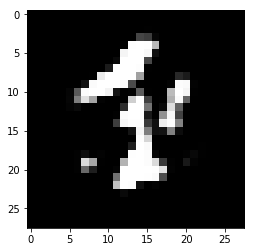

Loop: 523100, Generator_loss: 0.00080132, Discriminator_loss: -0.00055206
Loop: 523200, Generator_loss: 0.040956, Discriminator_loss: 0.004006
Loop: 523300, Generator_loss: 0.0045644, Discriminator_loss: 0.0016225
Loop: 523400, Generator_loss: 0.026776, Discriminator_loss: 0.0031852
Loop: 523500, Generator_loss: -0.079341, Discriminator_loss: 0.0040404
Loop: 523600, Generator_loss: 0.016252, Discriminator_loss: -0.0013271
Loop: 523700, Generator_loss: -0.013356, Discriminator_loss: 0.0039339
Loop: 523800, Generator_loss: -0.018729, Discriminator_loss: 0.0052633
Loop: 523900, Generator_loss: -0.042747, Discriminator_loss: 0.0049408
Loop: 524000, Generator_loss: 0.060172, Discriminator_loss: -0.0023511


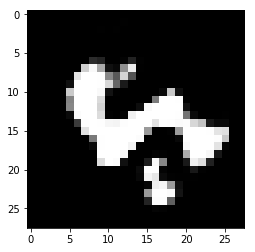

Loop: 524100, Generator_loss: 0.031709, Discriminator_loss: 0.0014319
Loop: 524200, Generator_loss: 0.022866, Discriminator_loss: 0.0053131
Loop: 524300, Generator_loss: 0.051438, Discriminator_loss: -0.0020746
Loop: 524400, Generator_loss: -0.013314, Discriminator_loss: 0.0037419
Loop: 524500, Generator_loss: -0.017922, Discriminator_loss: -0.001496
Loop: 524600, Generator_loss: 0.016331, Discriminator_loss: 0.0031071
Loop: 524700, Generator_loss: 0.030914, Discriminator_loss: 0.0052055
Loop: 524800, Generator_loss: 0.031713, Discriminator_loss: 0.007879
Loop: 524900, Generator_loss: 0.039916, Discriminator_loss: 0.0036139
Loop: 525000, Generator_loss: -0.0055761, Discriminator_loss: 0.0026151


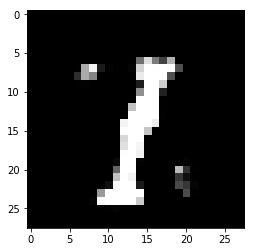

Loop: 525100, Generator_loss: -0.0013706, Discriminator_loss: -0.0005461
Loop: 525200, Generator_loss: 0.038423, Discriminator_loss: -0.0020153
Loop: 525300, Generator_loss: 0.0098032, Discriminator_loss: 0.0024666
Loop: 525400, Generator_loss: 0.00045249, Discriminator_loss: 0.008131
Loop: 525500, Generator_loss: -0.014569, Discriminator_loss: -0.00024824
Loop: 525600, Generator_loss: -0.02744, Discriminator_loss: 0.0020957
Loop: 525700, Generator_loss: -0.021793, Discriminator_loss: 0.00024733
Loop: 525800, Generator_loss: -0.015206, Discriminator_loss: -0.0011439
Loop: 525900, Generator_loss: -0.028419, Discriminator_loss: 0.0032378
Loop: 526000, Generator_loss: -0.011593, Discriminator_loss: -0.0055666


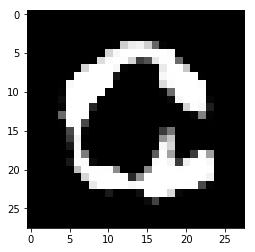

Loop: 526100, Generator_loss: 0.040461, Discriminator_loss: 0.00333
Loop: 526200, Generator_loss: -0.0036606, Discriminator_loss: -0.0060604
Loop: 526300, Generator_loss: -0.046358, Discriminator_loss: 0.013601
Loop: 526400, Generator_loss: -0.047413, Discriminator_loss: -0.00022246
Loop: 526500, Generator_loss: 0.0035727, Discriminator_loss: -0.0041067
Loop: 526600, Generator_loss: -0.073536, Discriminator_loss: 0.011671
Loop: 526700, Generator_loss: 0.0070727, Discriminator_loss: -0.00073224
Loop: 526800, Generator_loss: 0.0036038, Discriminator_loss: -0.001765
Loop: 526900, Generator_loss: 0.010033, Discriminator_loss: 0.0061681
Loop: 527000, Generator_loss: -0.048419, Discriminator_loss: 0.0092536


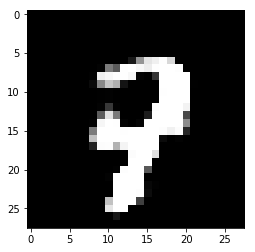

Loop: 527100, Generator_loss: -0.039686, Discriminator_loss: 0.004606
Loop: 527200, Generator_loss: 0.0061432, Discriminator_loss: 0.0070707
Loop: 527300, Generator_loss: 0.0053063, Discriminator_loss: 0.0039504
Loop: 527400, Generator_loss: -0.018297, Discriminator_loss: -0.0007782
Loop: 527500, Generator_loss: 0.011758, Discriminator_loss: 0.0052448
Loop: 527600, Generator_loss: -0.02282, Discriminator_loss: 0.0019656
Loop: 527700, Generator_loss: 0.031011, Discriminator_loss: 0.00054274
Loop: 527800, Generator_loss: -0.030935, Discriminator_loss: 0.0024253
Loop: 527900, Generator_loss: -0.023113, Discriminator_loss: 0.0017092
Loop: 528000, Generator_loss: -0.024899, Discriminator_loss: -0.00042331


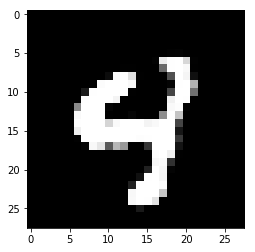

Loop: 528100, Generator_loss: -0.018005, Discriminator_loss: 0.0025302
Loop: 528200, Generator_loss: -0.005084, Discriminator_loss: 0.0052765
Loop: 528300, Generator_loss: -0.022594, Discriminator_loss: 0.0038305
Loop: 528400, Generator_loss: 0.036411, Discriminator_loss: -0.001821
Loop: 528500, Generator_loss: -0.034384, Discriminator_loss: 0.0068901
Loop: 528600, Generator_loss: -0.0098647, Discriminator_loss: -0.0014615
Loop: 528700, Generator_loss: 0.0143, Discriminator_loss: 0.0031543
Loop: 528800, Generator_loss: 0.041709, Discriminator_loss: 0.0028516
Loop: 528900, Generator_loss: 0.004765, Discriminator_loss: 0.0018411
Loop: 529000, Generator_loss: 0.023238, Discriminator_loss: 0.0033541


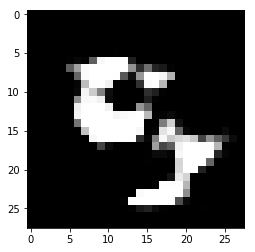

Loop: 529100, Generator_loss: -0.026332, Discriminator_loss: 0.0072053
Loop: 529200, Generator_loss: -0.0075582, Discriminator_loss: 0.0018809
Loop: 529300, Generator_loss: -0.028001, Discriminator_loss: 0.0011948
Loop: 529400, Generator_loss: 0.0049678, Discriminator_loss: 0.0024653
Loop: 529500, Generator_loss: -0.021037, Discriminator_loss: -0.00032859
Loop: 529600, Generator_loss: -0.06718, Discriminator_loss: -0.012395
Loop: 529700, Generator_loss: -0.03305, Discriminator_loss: 0.0024043
Loop: 529800, Generator_loss: 0.004049, Discriminator_loss: 0.0033732
Loop: 529900, Generator_loss: 0.063894, Discriminator_loss: 0.0055277
Loop: 530000, Generator_loss: 0.038946, Discriminator_loss: 0.0034452


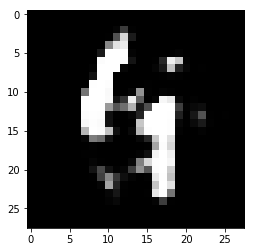

Loop: 530100, Generator_loss: 0.00033579, Discriminator_loss: 0.018333
Loop: 530200, Generator_loss: 0.023112, Discriminator_loss: 0.0057151
Loop: 530300, Generator_loss: 0.019346, Discriminator_loss: 0.0017179
Loop: 530400, Generator_loss: -0.009882, Discriminator_loss: 0.0023078
Loop: 530500, Generator_loss: 0.043346, Discriminator_loss: 0.0088198
Loop: 530600, Generator_loss: 0.0040576, Discriminator_loss: 0.00075178
Loop: 530700, Generator_loss: 0.0071406, Discriminator_loss: 0.0027381
Loop: 530800, Generator_loss: -0.049884, Discriminator_loss: 0.007186
Loop: 530900, Generator_loss: -0.036321, Discriminator_loss: 0.0051293
Loop: 531000, Generator_loss: -0.016934, Discriminator_loss: -0.0011814


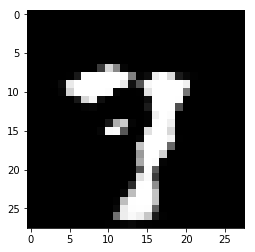

Loop: 531100, Generator_loss: -0.031527, Discriminator_loss: 0.00075146
Loop: 531200, Generator_loss: 0.036063, Discriminator_loss: 0.0040821
Loop: 531300, Generator_loss: -0.016213, Discriminator_loss: 0.0031846
Loop: 531400, Generator_loss: -0.025555, Discriminator_loss: 0.0073801
Loop: 531500, Generator_loss: 0.00039064, Discriminator_loss: 0.0038516
Loop: 531600, Generator_loss: -0.048339, Discriminator_loss: 0.00038787
Loop: 531700, Generator_loss: 0.034672, Discriminator_loss: -0.00085886
Loop: 531800, Generator_loss: -0.027917, Discriminator_loss: 0.0054943
Loop: 531900, Generator_loss: 0.020702, Discriminator_loss: 0.0043745
Loop: 532000, Generator_loss: -0.02981, Discriminator_loss: 0.00079617


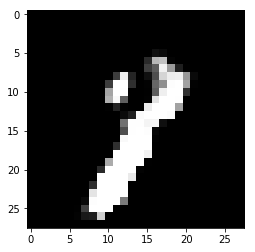

Loop: 532100, Generator_loss: -0.035162, Discriminator_loss: 0.0036026
Loop: 532200, Generator_loss: 0.035947, Discriminator_loss: 0.00029029
Loop: 532300, Generator_loss: -0.045616, Discriminator_loss: 0.0007418
Loop: 532400, Generator_loss: -0.056649, Discriminator_loss: 0.0052192
Loop: 532500, Generator_loss: -0.046512, Discriminator_loss: 0.0041378
Loop: 532600, Generator_loss: -0.037645, Discriminator_loss: -0.013526
Loop: 532700, Generator_loss: -0.015326, Discriminator_loss: 0.0062553
Loop: 532800, Generator_loss: 0.021632, Discriminator_loss: -0.0022131
Loop: 532900, Generator_loss: -0.022431, Discriminator_loss: 0.0042357
Loop: 533000, Generator_loss: -0.033396, Discriminator_loss: 0.00052647


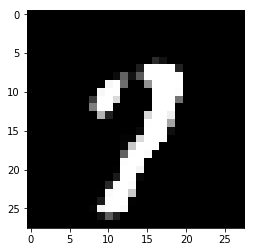

Loop: 533100, Generator_loss: -0.0087066, Discriminator_loss: 0.004793
Loop: 533200, Generator_loss: 0.048803, Discriminator_loss: -0.0054611
Loop: 533300, Generator_loss: 0.036575, Discriminator_loss: 0.0025685
Loop: 533400, Generator_loss: -0.007446, Discriminator_loss: 0.0035083
Loop: 533500, Generator_loss: 0.036934, Discriminator_loss: 0.0010717
Loop: 533600, Generator_loss: 0.013937, Discriminator_loss: 0.0057644
Loop: 533700, Generator_loss: -0.011495, Discriminator_loss: 0.00037524
Loop: 533800, Generator_loss: -0.00024865, Discriminator_loss: 0.0021377
Loop: 533900, Generator_loss: -0.0070822, Discriminator_loss: 0.0027833
Loop: 534000, Generator_loss: 0.0045554, Discriminator_loss: 0.0034328


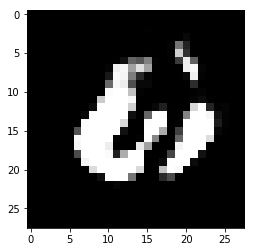

Loop: 534100, Generator_loss: 0.034268, Discriminator_loss: 0.0076412
Loop: 534200, Generator_loss: 0.021914, Discriminator_loss: -0.0013899
Loop: 534300, Generator_loss: 0.033125, Discriminator_loss: 0.0032119
Loop: 534400, Generator_loss: 0.014282, Discriminator_loss: 0.00017274
Loop: 534500, Generator_loss: -0.011083, Discriminator_loss: 0.0012183
Loop: 534600, Generator_loss: -0.050548, Discriminator_loss: -0.001286
Loop: 534700, Generator_loss: 0.013772, Discriminator_loss: 0.0049532
Loop: 534800, Generator_loss: -0.019555, Discriminator_loss: 0.0024165
Loop: 534900, Generator_loss: 0.035743, Discriminator_loss: -0.010621
Loop: 535000, Generator_loss: -0.029277, Discriminator_loss: 0.0015619


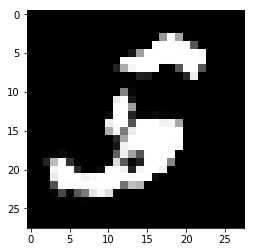

Loop: 535100, Generator_loss: -0.032581, Discriminator_loss: 0.014493
Loop: 535200, Generator_loss: 0.015868, Discriminator_loss: 0.0018962
Loop: 535300, Generator_loss: -0.034873, Discriminator_loss: 0.0017431
Loop: 535400, Generator_loss: 0.0123, Discriminator_loss: 0.0045684
Loop: 535500, Generator_loss: -0.021766, Discriminator_loss: 0.00010047
Loop: 535600, Generator_loss: -0.01995, Discriminator_loss: 0.0076365
Loop: 535700, Generator_loss: -0.0049284, Discriminator_loss: 0.0090135
Loop: 535800, Generator_loss: 0.011474, Discriminator_loss: -0.00077244
Loop: 535900, Generator_loss: -0.0062973, Discriminator_loss: 0.0040855
Loop: 536000, Generator_loss: 0.011926, Discriminator_loss: 0.0095845


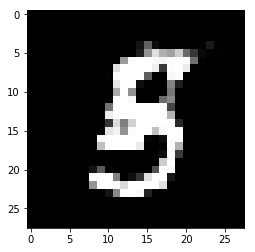

Loop: 536100, Generator_loss: -0.01339, Discriminator_loss: -0.001616
Loop: 536200, Generator_loss: -0.032118, Discriminator_loss: 0.0041442
Loop: 536300, Generator_loss: -0.048834, Discriminator_loss: 0.0015604
Loop: 536400, Generator_loss: 0.0057559, Discriminator_loss: -0.00046606
Loop: 536500, Generator_loss: 0.028024, Discriminator_loss: 0.0028937
Loop: 536600, Generator_loss: -0.011241, Discriminator_loss: 0.0054868
Loop: 536700, Generator_loss: -0.031918, Discriminator_loss: 0.0048879
Loop: 536800, Generator_loss: 0.04856, Discriminator_loss: 0.011802
Loop: 536900, Generator_loss: -0.031693, Discriminator_loss: 0.0024049
Loop: 537000, Generator_loss: -0.0076657, Discriminator_loss: 0.0038994


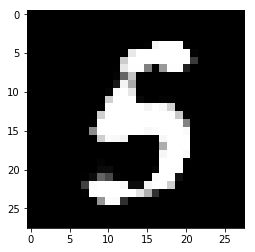

Loop: 537100, Generator_loss: -0.050085, Discriminator_loss: 0.001371
Loop: 537200, Generator_loss: -0.0075499, Discriminator_loss: 0.0013565
Loop: 537300, Generator_loss: -0.011762, Discriminator_loss: 0.00515
Loop: 537400, Generator_loss: -0.026371, Discriminator_loss: 0.0051242
Loop: 537500, Generator_loss: -0.0039931, Discriminator_loss: -0.010888
Loop: 537600, Generator_loss: -0.015827, Discriminator_loss: 0.0054934
Loop: 537700, Generator_loss: -0.065333, Discriminator_loss: 0.0023661
Loop: 537800, Generator_loss: -0.050017, Discriminator_loss: 0.0034818
Loop: 537900, Generator_loss: -0.0059558, Discriminator_loss: 0.00048567
Loop: 538000, Generator_loss: -0.030078, Discriminator_loss: 0.0012981


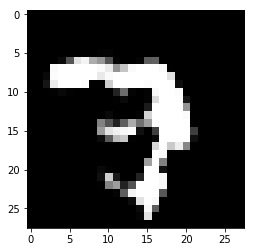

Loop: 538100, Generator_loss: 0.021826, Discriminator_loss: 0.0065743
Loop: 538200, Generator_loss: -0.039373, Discriminator_loss: 0.01051
Loop: 538300, Generator_loss: -0.0090406, Discriminator_loss: 0.001843
Loop: 538400, Generator_loss: -0.04019, Discriminator_loss: 0.0071071
Loop: 538500, Generator_loss: -0.0015954, Discriminator_loss: 0.00074407
Loop: 538600, Generator_loss: -0.026244, Discriminator_loss: -0.0018638
Loop: 538700, Generator_loss: -0.018291, Discriminator_loss: 0.0033252
Loop: 538800, Generator_loss: 0.014558, Discriminator_loss: 0.0019762
Loop: 538900, Generator_loss: 0.02157, Discriminator_loss: -0.0024169
Loop: 539000, Generator_loss: 0.0078703, Discriminator_loss: 0.0021973


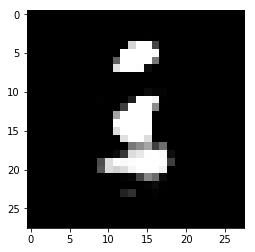

Loop: 539100, Generator_loss: -0.067694, Discriminator_loss: 0.00062765
Loop: 539200, Generator_loss: -0.016206, Discriminator_loss: 0.0049502
Loop: 539300, Generator_loss: 0.0090079, Discriminator_loss: 0.0049544
Loop: 539400, Generator_loss: -0.018314, Discriminator_loss: 0.0023911
Loop: 539500, Generator_loss: -0.0075388, Discriminator_loss: -0.0032411
Loop: 539600, Generator_loss: 0.044888, Discriminator_loss: 0.0027251
Loop: 539700, Generator_loss: -0.0016267, Discriminator_loss: 0.0022639
Loop: 539800, Generator_loss: -0.044459, Discriminator_loss: 0.0047108
Loop: 539900, Generator_loss: 0.01298, Discriminator_loss: 0.0037704
Loop: 540000, Generator_loss: -0.043543, Discriminator_loss: 0.0066338


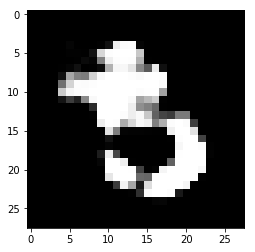

Loop: 540100, Generator_loss: -0.017826, Discriminator_loss: -0.005354
Loop: 540200, Generator_loss: 0.0022736, Discriminator_loss: 0.0017469
Loop: 540300, Generator_loss: -0.037794, Discriminator_loss: 0.006023
Loop: 540400, Generator_loss: 0.0083632, Discriminator_loss: 0.0049934
Loop: 540500, Generator_loss: -0.015083, Discriminator_loss: 0.0054961
Loop: 540600, Generator_loss: 0.017943, Discriminator_loss: -0.0018285
Loop: 540700, Generator_loss: -0.037539, Discriminator_loss: 0.010467
Loop: 540800, Generator_loss: -0.049108, Discriminator_loss: 0.0037756
Loop: 540900, Generator_loss: 0.010862, Discriminator_loss: -0.00091317
Loop: 541000, Generator_loss: -0.00020791, Discriminator_loss: 0.00077216


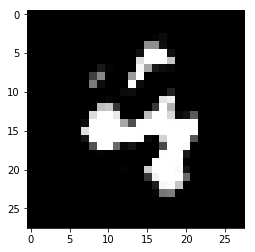

Loop: 541100, Generator_loss: -0.0062185, Discriminator_loss: 0.00028768
Loop: 541200, Generator_loss: -0.053748, Discriminator_loss: -0.0078139
Loop: 541300, Generator_loss: -0.012284, Discriminator_loss: 0.0055531
Loop: 541400, Generator_loss: -0.01163, Discriminator_loss: 0.0022611
Loop: 541500, Generator_loss: -0.0083112, Discriminator_loss: 0.00159
Loop: 541600, Generator_loss: -0.014933, Discriminator_loss: -0.0029922
Loop: 541700, Generator_loss: -0.0057227, Discriminator_loss: 0.0030917
Loop: 541800, Generator_loss: 0.0025728, Discriminator_loss: 0.0059761
Loop: 541900, Generator_loss: -0.038653, Discriminator_loss: -0.0066801
Loop: 542000, Generator_loss: -0.017081, Discriminator_loss: 0.00063611


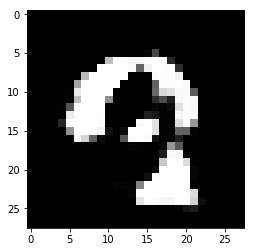

Loop: 542100, Generator_loss: -0.039545, Discriminator_loss: 0.0037547
Loop: 542200, Generator_loss: -0.022821, Discriminator_loss: 0.0059121
Loop: 542300, Generator_loss: -0.0074649, Discriminator_loss: 0.0072261
Loop: 542400, Generator_loss: -0.041716, Discriminator_loss: 0.0014836
Loop: 542500, Generator_loss: 0.015718, Discriminator_loss: 0.0038499
Loop: 542600, Generator_loss: 0.020558, Discriminator_loss: 0.0039439
Loop: 542700, Generator_loss: 0.0085454, Discriminator_loss: 0.0078479
Loop: 542800, Generator_loss: -0.0067011, Discriminator_loss: -0.0011166
Loop: 542900, Generator_loss: -0.025509, Discriminator_loss: -0.001201
Loop: 543000, Generator_loss: -0.0057371, Discriminator_loss: 0.0072829


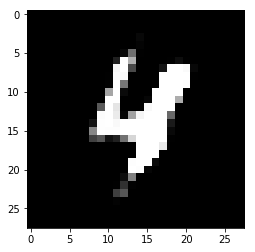

Loop: 543100, Generator_loss: 0.0098474, Discriminator_loss: 0.0046084
Loop: 543200, Generator_loss: 8.9459e-05, Discriminator_loss: 0.0021728
Loop: 543300, Generator_loss: -0.013614, Discriminator_loss: 0.0009831
Loop: 543400, Generator_loss: 0.0033499, Discriminator_loss: 0.012273
Loop: 543500, Generator_loss: -0.02123, Discriminator_loss: 0.0020162
Loop: 543600, Generator_loss: -0.058098, Discriminator_loss: 0.0062164
Loop: 543700, Generator_loss: -0.053685, Discriminator_loss: -0.00026232
Loop: 543800, Generator_loss: -0.033777, Discriminator_loss: 0.0042392
Loop: 543900, Generator_loss: -0.011115, Discriminator_loss: 0.0065698
Loop: 544000, Generator_loss: -0.0017013, Discriminator_loss: 0.0029054


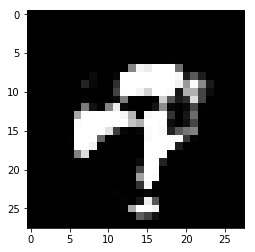

Loop: 544100, Generator_loss: -0.011184, Discriminator_loss: 0.0074864
Loop: 544200, Generator_loss: -0.010823, Discriminator_loss: 0.0020745
Loop: 544300, Generator_loss: -0.0020234, Discriminator_loss: 0.0063182
Loop: 544400, Generator_loss: -0.032535, Discriminator_loss: 0.010035
Loop: 544500, Generator_loss: 0.00011908, Discriminator_loss: 0.0050783
Loop: 544600, Generator_loss: -0.020093, Discriminator_loss: -2.1266e-05
Loop: 544700, Generator_loss: -0.047985, Discriminator_loss: 0.006427
Loop: 544800, Generator_loss: 0.032232, Discriminator_loss: 0.0090695
Loop: 544900, Generator_loss: -0.02395, Discriminator_loss: -0.0023677
Loop: 545000, Generator_loss: -0.033588, Discriminator_loss: 0.00086022


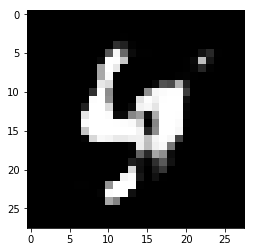

Loop: 545100, Generator_loss: -0.042306, Discriminator_loss: 0.0039857
Loop: 545200, Generator_loss: -0.0039608, Discriminator_loss: 0.0020762
Loop: 545300, Generator_loss: -0.028189, Discriminator_loss: 0.003234
Loop: 545400, Generator_loss: -0.0030074, Discriminator_loss: -0.0059812
Loop: 545500, Generator_loss: -0.06333, Discriminator_loss: 0.0046243
Loop: 545600, Generator_loss: -0.0077513, Discriminator_loss: 0.0049202
Loop: 545700, Generator_loss: 0.012769, Discriminator_loss: 0.0035808
Loop: 545800, Generator_loss: -0.029812, Discriminator_loss: -0.00057816
Loop: 545900, Generator_loss: -0.017046, Discriminator_loss: -0.0013061
Loop: 546000, Generator_loss: -0.0096666, Discriminator_loss: 0.00077826


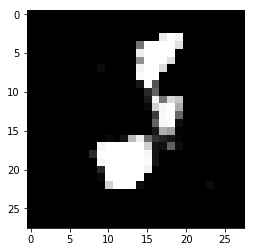

Loop: 546100, Generator_loss: -0.011644, Discriminator_loss: 0.0010177
Loop: 546200, Generator_loss: -0.046323, Discriminator_loss: 0.0043819
Loop: 546300, Generator_loss: -0.0025827, Discriminator_loss: 0.0036202
Loop: 546400, Generator_loss: 0.017342, Discriminator_loss: 0.00055429
Loop: 546500, Generator_loss: 0.0020146, Discriminator_loss: 0.0012897
Loop: 546600, Generator_loss: -0.015011, Discriminator_loss: 0.00084478
Loop: 546700, Generator_loss: -0.03192, Discriminator_loss: 0.0064744
Loop: 546800, Generator_loss: -0.012001, Discriminator_loss: 0.0020812
Loop: 546900, Generator_loss: -0.0048382, Discriminator_loss: 0.013388
Loop: 547000, Generator_loss: -0.01565, Discriminator_loss: 0.0047744


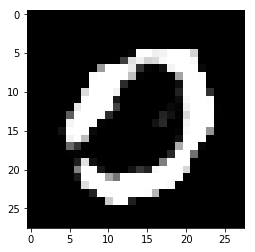

Loop: 547100, Generator_loss: 0.03502, Discriminator_loss: 0.0015255
Loop: 547200, Generator_loss: -0.021487, Discriminator_loss: 0.004805
Loop: 547300, Generator_loss: -0.020881, Discriminator_loss: 0.0028048
Loop: 547400, Generator_loss: 0.0088719, Discriminator_loss: -0.0079705
Loop: 547500, Generator_loss: -0.0077903, Discriminator_loss: 0.003398
Loop: 547600, Generator_loss: 0.021306, Discriminator_loss: 0.0066665
Loop: 547700, Generator_loss: 0.024895, Discriminator_loss: 0.0051219
Loop: 547800, Generator_loss: -0.021279, Discriminator_loss: 0.0078076
Loop: 547900, Generator_loss: 5.533e-05, Discriminator_loss: 0.0044916
Loop: 548000, Generator_loss: -0.0066234, Discriminator_loss: 0.0041037


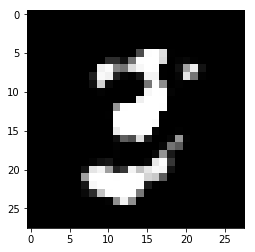

Loop: 548100, Generator_loss: -0.014632, Discriminator_loss: 0.0028617
Loop: 548200, Generator_loss: -0.020544, Discriminator_loss: 0.0060177
Loop: 548300, Generator_loss: -0.0098142, Discriminator_loss: 0.0069796
Loop: 548400, Generator_loss: -0.0023059, Discriminator_loss: -0.0038923
Loop: 548500, Generator_loss: 0.00021887, Discriminator_loss: 0.0060258
Loop: 548600, Generator_loss: 0.011404, Discriminator_loss: 0.0044896
Loop: 548700, Generator_loss: -0.032617, Discriminator_loss: -0.00021753
Loop: 548800, Generator_loss: -0.023553, Discriminator_loss: 0.0015192
Loop: 548900, Generator_loss: -0.053068, Discriminator_loss: 0.0017026
Loop: 549000, Generator_loss: -0.019406, Discriminator_loss: 0.006787


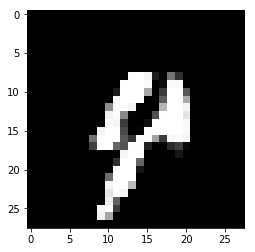

Loop: 549100, Generator_loss: -0.031966, Discriminator_loss: 0.0073513
Loop: 549200, Generator_loss: -0.033583, Discriminator_loss: -0.00012352
Loop: 549300, Generator_loss: 0.022833, Discriminator_loss: 0.0022266
Loop: 549400, Generator_loss: -0.062389, Discriminator_loss: -0.00082649
Loop: 549500, Generator_loss: 0.0040956, Discriminator_loss: 0.0047211
Loop: 549600, Generator_loss: -0.039469, Discriminator_loss: 0.0023498
Loop: 549700, Generator_loss: -0.019461, Discriminator_loss: 0.0014903
Loop: 549800, Generator_loss: 0.0061848, Discriminator_loss: 0.0020089
Loop: 549900, Generator_loss: -0.043916, Discriminator_loss: 0.0011534
Loop: 550000, Generator_loss: 0.031698, Discriminator_loss: -0.0092163


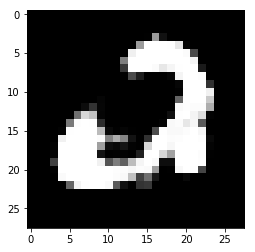

Loop: 550100, Generator_loss: -0.015694, Discriminator_loss: 0.0033472
Loop: 550200, Generator_loss: 0.035165, Discriminator_loss: 0.0036642
Loop: 550300, Generator_loss: -0.0062342, Discriminator_loss: 0.0085686
Loop: 550400, Generator_loss: -0.0289, Discriminator_loss: -0.002201
Loop: 550500, Generator_loss: 0.013332, Discriminator_loss: 0.00082118
Loop: 550600, Generator_loss: 0.031899, Discriminator_loss: 0.0053618
Loop: 550700, Generator_loss: 0.0056112, Discriminator_loss: 0.0017781
Loop: 550800, Generator_loss: -0.028738, Discriminator_loss: 0.0053355
Loop: 550900, Generator_loss: -0.039096, Discriminator_loss: 0.0049628
Loop: 551000, Generator_loss: 0.0060664, Discriminator_loss: 0.0087713


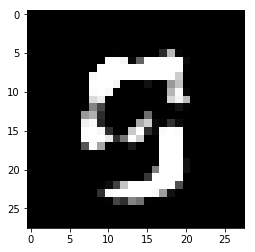

Loop: 551100, Generator_loss: 0.0029176, Discriminator_loss: 0.0026976
Loop: 551200, Generator_loss: -0.0040104, Discriminator_loss: 0.0015708
Loop: 551300, Generator_loss: -0.0062956, Discriminator_loss: 0.0038633
Loop: 551400, Generator_loss: -0.034468, Discriminator_loss: 0.0060244
Loop: 551500, Generator_loss: -0.04119, Discriminator_loss: 0.0046023
Loop: 551600, Generator_loss: -0.033471, Discriminator_loss: 0.00034091
Loop: 551700, Generator_loss: -0.0051004, Discriminator_loss: 0.0049384
Loop: 551800, Generator_loss: -0.033945, Discriminator_loss: -4.2297e-05
Loop: 551900, Generator_loss: -0.0097022, Discriminator_loss: 0.0037583
Loop: 552000, Generator_loss: -0.00047805, Discriminator_loss: 0.00094165


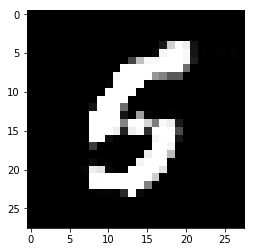

Loop: 552100, Generator_loss: 0.041596, Discriminator_loss: -0.0046954
Loop: 552200, Generator_loss: -0.009118, Discriminator_loss: 0.0071288
Loop: 552300, Generator_loss: -0.018274, Discriminator_loss: 0.0025854
Loop: 552400, Generator_loss: -0.026624, Discriminator_loss: 0.0063658
Loop: 552500, Generator_loss: -0.0035538, Discriminator_loss: 0.0031863
Loop: 552600, Generator_loss: -0.028675, Discriminator_loss: -0.0030754
Loop: 552700, Generator_loss: 0.0032769, Discriminator_loss: 0.0021801
Loop: 552800, Generator_loss: 0.070414, Discriminator_loss: 0.0095695
Loop: 552900, Generator_loss: 0.032781, Discriminator_loss: 0.0096886
Loop: 553000, Generator_loss: -0.043119, Discriminator_loss: 0.0085674


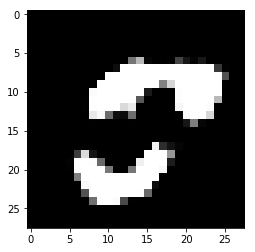

Loop: 553100, Generator_loss: -0.021579, Discriminator_loss: 0.0061614
Loop: 553200, Generator_loss: -0.036389, Discriminator_loss: 0.0062784
Loop: 553300, Generator_loss: -0.021557, Discriminator_loss: 0.00021698
Loop: 553400, Generator_loss: 0.023389, Discriminator_loss: -0.01472
Loop: 553500, Generator_loss: -0.012528, Discriminator_loss: 0.006608
Loop: 553600, Generator_loss: 0.0017361, Discriminator_loss: 0.0021646
Loop: 553700, Generator_loss: -0.0027251, Discriminator_loss: 0.0053679
Loop: 553800, Generator_loss: -0.013451, Discriminator_loss: 0.0046002
Loop: 553900, Generator_loss: 0.0067407, Discriminator_loss: 0.0033564
Loop: 554000, Generator_loss: -0.049951, Discriminator_loss: 0.0040848


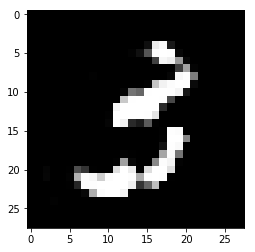

Loop: 554100, Generator_loss: 0.014231, Discriminator_loss: 0.0015115
Loop: 554200, Generator_loss: 0.0074823, Discriminator_loss: 0.0034649
Loop: 554300, Generator_loss: -0.028522, Discriminator_loss: -0.0029877
Loop: 554400, Generator_loss: 0.009745, Discriminator_loss: 0.0019065
Loop: 554500, Generator_loss: -0.0028928, Discriminator_loss: 0.00072311
Loop: 554600, Generator_loss: 0.033475, Discriminator_loss: 0.00086799
Loop: 554700, Generator_loss: -0.012058, Discriminator_loss: 0.0029253
Loop: 554800, Generator_loss: 0.00071915, Discriminator_loss: -0.00062867
Loop: 554900, Generator_loss: -0.012163, Discriminator_loss: -0.0043411
Loop: 555000, Generator_loss: 0.0089403, Discriminator_loss: 0.011367


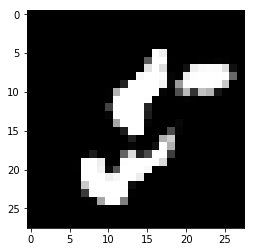

Loop: 555100, Generator_loss: -0.030912, Discriminator_loss: 0.0045808
Loop: 555200, Generator_loss: 0.027822, Discriminator_loss: 0.0037338
Loop: 555300, Generator_loss: -0.0078972, Discriminator_loss: 0.0022865
Loop: 555400, Generator_loss: 0.020272, Discriminator_loss: 0.0074206
Loop: 555500, Generator_loss: 0.032597, Discriminator_loss: -0.0036943
Loop: 555600, Generator_loss: -0.013287, Discriminator_loss: -0.0059738
Loop: 555700, Generator_loss: 0.0091968, Discriminator_loss: 0.0022658
Loop: 555800, Generator_loss: 0.025053, Discriminator_loss: 0.0059393
Loop: 555900, Generator_loss: -0.026136, Discriminator_loss: 0.0071843
Loop: 556000, Generator_loss: -0.015146, Discriminator_loss: 0.0012404


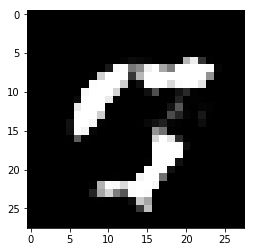

Loop: 556100, Generator_loss: 0.023773, Discriminator_loss: 0.0044256
Loop: 556200, Generator_loss: 0.0097259, Discriminator_loss: 0.0046737
Loop: 556300, Generator_loss: -0.056565, Discriminator_loss: -0.0065256
Loop: 556400, Generator_loss: 0.011151, Discriminator_loss: 0.0076267
Loop: 556500, Generator_loss: -0.0057826, Discriminator_loss: 0.0042294
Loop: 556600, Generator_loss: -0.0224, Discriminator_loss: -0.002876
Loop: 556700, Generator_loss: 0.014819, Discriminator_loss: 0.0051804
Loop: 556800, Generator_loss: -0.012887, Discriminator_loss: 0.0012702
Loop: 556900, Generator_loss: 0.029125, Discriminator_loss: 0.00051997
Loop: 557000, Generator_loss: -0.052987, Discriminator_loss: 0.00041109


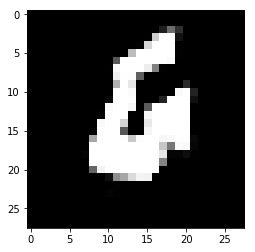

Loop: 557100, Generator_loss: -0.0021512, Discriminator_loss: -0.0045431
Loop: 557200, Generator_loss: -0.030744, Discriminator_loss: 0.0084522
Loop: 557300, Generator_loss: -0.028044, Discriminator_loss: 0.0076696
Loop: 557400, Generator_loss: -0.036007, Discriminator_loss: 0.0060112
Loop: 557500, Generator_loss: -0.0073069, Discriminator_loss: 0.0095703
Loop: 557600, Generator_loss: 0.011621, Discriminator_loss: 0.00046222
Loop: 557700, Generator_loss: 0.011137, Discriminator_loss: 0.0065277
Loop: 557800, Generator_loss: 0.026948, Discriminator_loss: 0.00085737
Loop: 557900, Generator_loss: 0.03121, Discriminator_loss: 0.0032748
Loop: 558000, Generator_loss: -0.0040489, Discriminator_loss: 0.009033


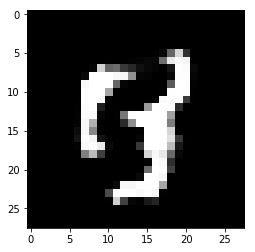

Loop: 558100, Generator_loss: -0.031302, Discriminator_loss: -0.0033843
Loop: 558200, Generator_loss: -0.034988, Discriminator_loss: 0.0029643
Loop: 558300, Generator_loss: -0.046564, Discriminator_loss: 0.0029645
Loop: 558400, Generator_loss: 0.0076137, Discriminator_loss: 0.0083368
Loop: 558500, Generator_loss: -0.016791, Discriminator_loss: 0.0016521
Loop: 558600, Generator_loss: 0.0073661, Discriminator_loss: 0.0027016
Loop: 558700, Generator_loss: 0.017758, Discriminator_loss: 0.0046462
Loop: 558800, Generator_loss: 0.030658, Discriminator_loss: 0.0049509
Loop: 558900, Generator_loss: 0.010593, Discriminator_loss: -5.4764e-05
Loop: 559000, Generator_loss: -0.0050713, Discriminator_loss: 0.0056895


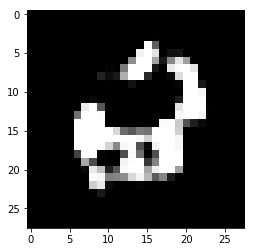

Loop: 559100, Generator_loss: -0.05934, Discriminator_loss: 0.0075697
Loop: 559200, Generator_loss: -0.0040841, Discriminator_loss: 0.0078455
Loop: 559300, Generator_loss: -0.0029521, Discriminator_loss: 0.0084599
Loop: 559400, Generator_loss: -0.015818, Discriminator_loss: 0.0037794
Loop: 559500, Generator_loss: -0.062527, Discriminator_loss: 0.0057357
Loop: 559600, Generator_loss: -0.0072469, Discriminator_loss: 0.0021966
Loop: 559700, Generator_loss: 0.0016264, Discriminator_loss: 0.0078093
Loop: 559800, Generator_loss: 0.0071655, Discriminator_loss: 0.0033901
Loop: 559900, Generator_loss: 0.019205, Discriminator_loss: 0.0039175
Loop: 560000, Generator_loss: 0.017592, Discriminator_loss: 0.004821


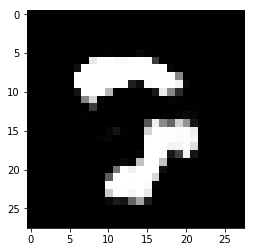

Loop: 560100, Generator_loss: -0.0019274, Discriminator_loss: 0.0024941
Loop: 560200, Generator_loss: 0.011514, Discriminator_loss: 0.0033584
Loop: 560300, Generator_loss: -0.011605, Discriminator_loss: 0.0053602
Loop: 560400, Generator_loss: -0.0030339, Discriminator_loss: -0.0054033
Loop: 560500, Generator_loss: 0.039387, Discriminator_loss: 0.0044681
Loop: 560600, Generator_loss: 0.034572, Discriminator_loss: 0.0075276
Loop: 560700, Generator_loss: 0.043492, Discriminator_loss: -0.0029982
Loop: 560800, Generator_loss: 0.056699, Discriminator_loss: 0.0047969
Loop: 560900, Generator_loss: 0.03053, Discriminator_loss: 0.0061361
Loop: 561000, Generator_loss: 0.045186, Discriminator_loss: -0.0022975


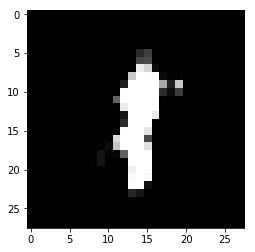

Loop: 561100, Generator_loss: 0.055633, Discriminator_loss: 0.0048194
Loop: 561200, Generator_loss: 0.0508, Discriminator_loss: 0.0097772
Loop: 561300, Generator_loss: -0.0010816, Discriminator_loss: 0.0073781
Loop: 561400, Generator_loss: -0.0095609, Discriminator_loss: 0.00047392
Loop: 561500, Generator_loss: 0.0020734, Discriminator_loss: 0.0059124
Loop: 561600, Generator_loss: -0.020372, Discriminator_loss: -0.002683
Loop: 561700, Generator_loss: 0.018846, Discriminator_loss: -0.0037416
Loop: 561800, Generator_loss: -0.021529, Discriminator_loss: 0.0088653
Loop: 561900, Generator_loss: -0.029287, Discriminator_loss: 0.0035594
Loop: 562000, Generator_loss: -0.010377, Discriminator_loss: 0.0018639


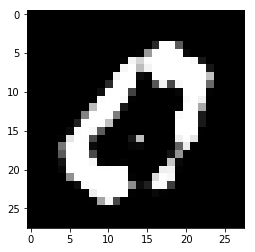

Loop: 562100, Generator_loss: -0.014273, Discriminator_loss: -0.0059118
Loop: 562200, Generator_loss: -0.050775, Discriminator_loss: 0.010098
Loop: 562300, Generator_loss: 0.013166, Discriminator_loss: 0.00079389
Loop: 562400, Generator_loss: -0.018044, Discriminator_loss: 0.0020349
Loop: 562500, Generator_loss: -0.010264, Discriminator_loss: -0.0060216
Loop: 562600, Generator_loss: -0.0018838, Discriminator_loss: 0.0051683
Loop: 562700, Generator_loss: -0.021939, Discriminator_loss: 0.00096148
Loop: 562800, Generator_loss: -0.028341, Discriminator_loss: 0.0041527
Loop: 562900, Generator_loss: 0.034522, Discriminator_loss: 0.0017154
Loop: 563000, Generator_loss: -0.0060325, Discriminator_loss: 0.0027179


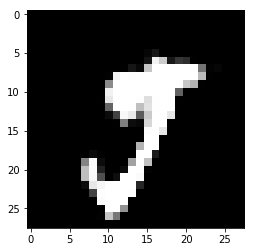

Loop: 563100, Generator_loss: -0.0019725, Discriminator_loss: 0.0019047
Loop: 563200, Generator_loss: -0.0093474, Discriminator_loss: 0.00062983
Loop: 563300, Generator_loss: -0.014244, Discriminator_loss: 0.0014371
Loop: 563400, Generator_loss: 0.030678, Discriminator_loss: 0.013679
Loop: 563500, Generator_loss: -0.017286, Discriminator_loss: 0.0047053
Loop: 563600, Generator_loss: -0.016018, Discriminator_loss: 0.0026807
Loop: 563700, Generator_loss: -0.012962, Discriminator_loss: 0.006128
Loop: 563800, Generator_loss: -0.0083764, Discriminator_loss: -0.0014478
Loop: 563900, Generator_loss: -0.023438, Discriminator_loss: 0.0032695
Loop: 564000, Generator_loss: 0.044232, Discriminator_loss: -0.014417


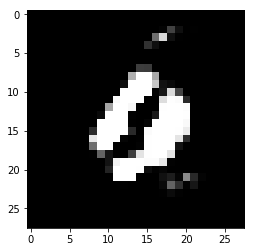

Loop: 564100, Generator_loss: -0.024902, Discriminator_loss: 0.0057441
Loop: 564200, Generator_loss: -0.024901, Discriminator_loss: 0.00087862
Loop: 564300, Generator_loss: -0.023212, Discriminator_loss: 0.0055245
Loop: 564400, Generator_loss: -0.015317, Discriminator_loss: -0.00074928
Loop: 564500, Generator_loss: 0.020962, Discriminator_loss: -0.0027844
Loop: 564600, Generator_loss: -0.037781, Discriminator_loss: 0.010091
Loop: 564700, Generator_loss: -0.032784, Discriminator_loss: 0.0046454
Loop: 564800, Generator_loss: 0.0056172, Discriminator_loss: -0.0046917
Loop: 564900, Generator_loss: -0.05612, Discriminator_loss: -0.00025237
Loop: 565000, Generator_loss: -0.047057, Discriminator_loss: -0.00095826


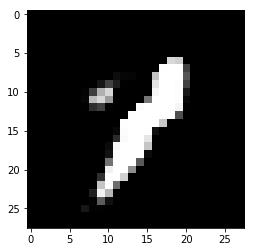

Loop: 565100, Generator_loss: -0.0037709, Discriminator_loss: -0.00028256
Loop: 565200, Generator_loss: -0.0030238, Discriminator_loss: 0.0046523
Loop: 565300, Generator_loss: -0.080607, Discriminator_loss: 0.0056347
Loop: 565400, Generator_loss: -0.013474, Discriminator_loss: 0.0028819
Loop: 565500, Generator_loss: -0.0025946, Discriminator_loss: 0.0034579
Loop: 565600, Generator_loss: -0.044075, Discriminator_loss: 0.0083831
Loop: 565700, Generator_loss: -0.042438, Discriminator_loss: 0.00012165
Loop: 565800, Generator_loss: -0.0015799, Discriminator_loss: -0.00066929
Loop: 565900, Generator_loss: -0.0028648, Discriminator_loss: 0.0031958
Loop: 566000, Generator_loss: 0.010758, Discriminator_loss: 0.0082668


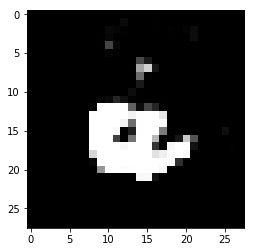

Loop: 566100, Generator_loss: 0.015867, Discriminator_loss: -0.0090488
Loop: 566200, Generator_loss: 0.031731, Discriminator_loss: -0.0017512
Loop: 566300, Generator_loss: -0.038835, Discriminator_loss: 0.0075608
Loop: 566400, Generator_loss: -0.035154, Discriminator_loss: 0.0093549
Loop: 566500, Generator_loss: -0.016757, Discriminator_loss: 0.0054607
Loop: 566600, Generator_loss: -0.01146, Discriminator_loss: -0.0011652
Loop: 566700, Generator_loss: 0.0087557, Discriminator_loss: 0.0022865
Loop: 566800, Generator_loss: -0.00089188, Discriminator_loss: 0.0082628
Loop: 566900, Generator_loss: 0.020322, Discriminator_loss: -0.00053895
Loop: 567000, Generator_loss: 0.018379, Discriminator_loss: 0.0026759


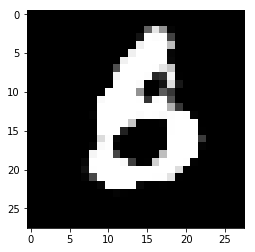

Loop: 567100, Generator_loss: 0.051116, Discriminator_loss: 0.0094349
Loop: 567200, Generator_loss: 0.02782, Discriminator_loss: 0.0084612
Loop: 567300, Generator_loss: 0.022419, Discriminator_loss: 0.0058383
Loop: 567400, Generator_loss: 0.034607, Discriminator_loss: 0.0029802
Loop: 567500, Generator_loss: -0.014969, Discriminator_loss: 0.0071059
Loop: 567600, Generator_loss: 0.0063312, Discriminator_loss: 0.0049552
Loop: 567700, Generator_loss: 0.06354, Discriminator_loss: 0.011778
Loop: 567800, Generator_loss: -0.020054, Discriminator_loss: 0.0032834
Loop: 567900, Generator_loss: 0.013641, Discriminator_loss: -0.0017304
Loop: 568000, Generator_loss: -0.011958, Discriminator_loss: -0.00093257


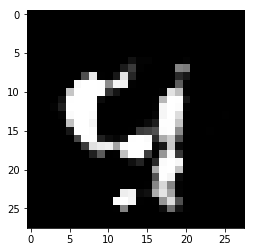

Loop: 568100, Generator_loss: -0.0039122, Discriminator_loss: 0.002698
Loop: 568200, Generator_loss: 0.01015, Discriminator_loss: 0.0033092
Loop: 568300, Generator_loss: 0.015489, Discriminator_loss: -0.0028722
Loop: 568400, Generator_loss: -0.033679, Discriminator_loss: 0.00042905
Loop: 568500, Generator_loss: -0.033877, Discriminator_loss: -0.0034668
Loop: 568600, Generator_loss: -0.0092141, Discriminator_loss: 0.0027697
Loop: 568700, Generator_loss: 0.0078753, Discriminator_loss: -0.0012441
Loop: 568800, Generator_loss: -0.028155, Discriminator_loss: 0.0024581
Loop: 568900, Generator_loss: -0.055494, Discriminator_loss: 0.004095
Loop: 569000, Generator_loss: -0.041645, Discriminator_loss: 0.0050407


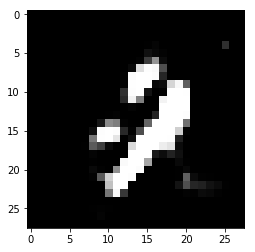

Loop: 569100, Generator_loss: -0.040671, Discriminator_loss: 0.004721
Loop: 569200, Generator_loss: 0.008131, Discriminator_loss: 0.0047275
Loop: 569300, Generator_loss: 0.049566, Discriminator_loss: 0.002279
Loop: 569400, Generator_loss: -0.0084002, Discriminator_loss: -0.0010374
Loop: 569500, Generator_loss: -0.041434, Discriminator_loss: 0.0081283
Loop: 569600, Generator_loss: -0.039194, Discriminator_loss: 0.0014031
Loop: 569700, Generator_loss: -0.0039305, Discriminator_loss: 0.0017407
Loop: 569800, Generator_loss: -0.03383, Discriminator_loss: 0.0061432
Loop: 569900, Generator_loss: 0.0019917, Discriminator_loss: 0.00089036
Loop: 570000, Generator_loss: -0.021093, Discriminator_loss: 0.0096777


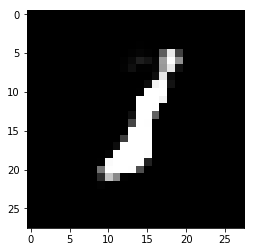

Loop: 570100, Generator_loss: 0.023806, Discriminator_loss: 0.0065394
Loop: 570200, Generator_loss: -0.019444, Discriminator_loss: -0.0018986
Loop: 570300, Generator_loss: 0.007403, Discriminator_loss: 0.0047703
Loop: 570400, Generator_loss: -0.0067031, Discriminator_loss: 0.0030384
Loop: 570500, Generator_loss: 0.015594, Discriminator_loss: 0.0027738
Loop: 570600, Generator_loss: 0.0022732, Discriminator_loss: 0.0024495
Loop: 570700, Generator_loss: -0.0006785, Discriminator_loss: -0.00056219
Loop: 570800, Generator_loss: -0.0035412, Discriminator_loss: 0.0030743
Loop: 570900, Generator_loss: -0.0048331, Discriminator_loss: 0.0058256
Loop: 571000, Generator_loss: -0.043977, Discriminator_loss: 0.0012149


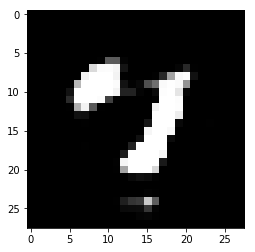

Loop: 571100, Generator_loss: -0.023682, Discriminator_loss: 0.0061893
Loop: 571200, Generator_loss: -0.010409, Discriminator_loss: -0.0022683
Loop: 571300, Generator_loss: -0.040211, Discriminator_loss: 0.0029746
Loop: 571400, Generator_loss: 0.03493, Discriminator_loss: 0.0023777
Loop: 571500, Generator_loss: 0.011471, Discriminator_loss: 0.0041026
Loop: 571600, Generator_loss: -0.015547, Discriminator_loss: 0.0033949
Loop: 571700, Generator_loss: -0.018767, Discriminator_loss: -0.0039959
Loop: 571800, Generator_loss: -0.019966, Discriminator_loss: 0.0029419
Loop: 571900, Generator_loss: -0.014319, Discriminator_loss: 0.0049767
Loop: 572000, Generator_loss: -0.0036193, Discriminator_loss: 0.0023084


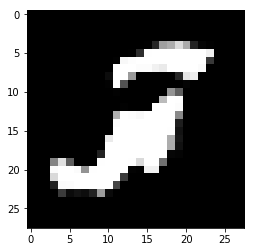

Loop: 572100, Generator_loss: -0.024224, Discriminator_loss: -0.0044201
Loop: 572200, Generator_loss: -0.034814, Discriminator_loss: -0.00079199
Loop: 572300, Generator_loss: -0.040999, Discriminator_loss: 0.0048145
Loop: 572400, Generator_loss: -0.04118, Discriminator_loss: 0.0064558
Loop: 572500, Generator_loss: -0.027833, Discriminator_loss: 7.9466e-05
Loop: 572600, Generator_loss: -0.034701, Discriminator_loss: 0.0094985
Loop: 572700, Generator_loss: -0.013173, Discriminator_loss: 0.0038648
Loop: 572800, Generator_loss: -0.061712, Discriminator_loss: 0.00033449
Loop: 572900, Generator_loss: -0.012431, Discriminator_loss: 0.0038944
Loop: 573000, Generator_loss: 0.00341, Discriminator_loss: 0.0032353


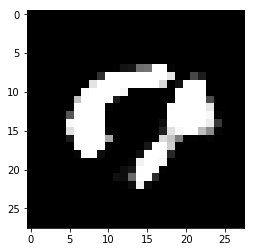

Loop: 573100, Generator_loss: -0.010222, Discriminator_loss: 0.0049204
Loop: 573200, Generator_loss: 0.019064, Discriminator_loss: 0.0015571
Loop: 573300, Generator_loss: -0.031467, Discriminator_loss: 0.0025814
Loop: 573400, Generator_loss: -0.051702, Discriminator_loss: 0.00092981
Loop: 573500, Generator_loss: -0.013192, Discriminator_loss: 0.0028796
Loop: 573600, Generator_loss: -0.027513, Discriminator_loss: 0.0080015
Loop: 573700, Generator_loss: 0.038131, Discriminator_loss: -0.000201
Loop: 573800, Generator_loss: 0.051407, Discriminator_loss: 0.0013697
Loop: 573900, Generator_loss: 0.011016, Discriminator_loss: 0.0066016
Loop: 574000, Generator_loss: -0.001617, Discriminator_loss: -0.0066299


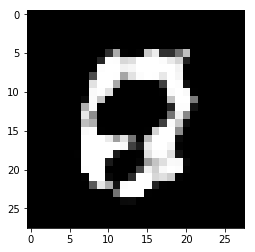

Loop: 574100, Generator_loss: 0.010897, Discriminator_loss: 0.00011888
Loop: 574200, Generator_loss: -0.041232, Discriminator_loss: 0.0073941
Loop: 574300, Generator_loss: -0.012436, Discriminator_loss: -9.2795e-05
Loop: 574400, Generator_loss: -0.012528, Discriminator_loss: 0.0020815
Loop: 574500, Generator_loss: -0.008652, Discriminator_loss: 0.0017456
Loop: 574600, Generator_loss: 0.022923, Discriminator_loss: 0.012129
Loop: 574700, Generator_loss: -0.0096433, Discriminator_loss: 0.0074804
Loop: 574800, Generator_loss: -0.043297, Discriminator_loss: 0.0082441
Loop: 574900, Generator_loss: -0.052099, Discriminator_loss: 0.01293
Loop: 575000, Generator_loss: -0.057022, Discriminator_loss: 0.010513


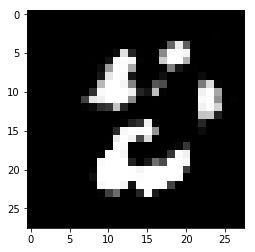

Loop: 575100, Generator_loss: 0.013339, Discriminator_loss: -0.00043945
Loop: 575200, Generator_loss: 0.020658, Discriminator_loss: 0.0033723
Loop: 575300, Generator_loss: -0.0098242, Discriminator_loss: 0.0089497
Loop: 575400, Generator_loss: 0.016715, Discriminator_loss: 0.0038483
Loop: 575500, Generator_loss: -0.023035, Discriminator_loss: 0.0038755
Loop: 575600, Generator_loss: 0.0049223, Discriminator_loss: 0.0044682
Loop: 575700, Generator_loss: -0.0059752, Discriminator_loss: 0.0045228
Loop: 575800, Generator_loss: -0.0013018, Discriminator_loss: 0.0024548
Loop: 575900, Generator_loss: -0.027544, Discriminator_loss: 0.0049672
Loop: 576000, Generator_loss: -0.013982, Discriminator_loss: 0.0058857


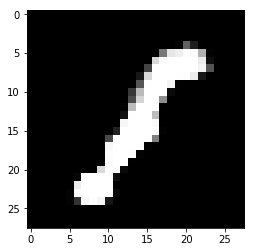

Loop: 576100, Generator_loss: -0.00064334, Discriminator_loss: 0.00012913
Loop: 576200, Generator_loss: -0.026297, Discriminator_loss: 0.0043159
Loop: 576300, Generator_loss: -0.071395, Discriminator_loss: 0.0046346
Loop: 576400, Generator_loss: 0.0084613, Discriminator_loss: 0.00043417
Loop: 576500, Generator_loss: -0.020089, Discriminator_loss: 0.0026931
Loop: 576600, Generator_loss: -0.052942, Discriminator_loss: 0.0077391
Loop: 576700, Generator_loss: -0.01215, Discriminator_loss: -0.0034245
Loop: 576800, Generator_loss: -0.012605, Discriminator_loss: 0.0031759
Loop: 576900, Generator_loss: -0.071829, Discriminator_loss: 0.0079556
Loop: 577000, Generator_loss: -0.0069461, Discriminator_loss: 0.0047647


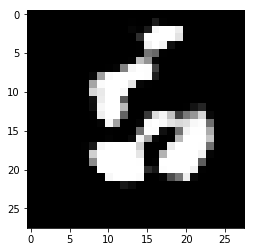

Loop: 577100, Generator_loss: 0.0011442, Discriminator_loss: -0.0036723
Loop: 577200, Generator_loss: 0.011963, Discriminator_loss: -0.0024047
Loop: 577300, Generator_loss: 0.040429, Discriminator_loss: -0.0008968
Loop: 577400, Generator_loss: -0.041193, Discriminator_loss: 0.0041426
Loop: 577500, Generator_loss: -0.045605, Discriminator_loss: 0.0027509
Loop: 577600, Generator_loss: -0.011631, Discriminator_loss: 0.0068623
Loop: 577700, Generator_loss: 0.014206, Discriminator_loss: 0.0036369
Loop: 577800, Generator_loss: -0.01704, Discriminator_loss: 0.0072736
Loop: 577900, Generator_loss: -0.064614, Discriminator_loss: -0.0021903
Loop: 578000, Generator_loss: -0.010392, Discriminator_loss: -0.0031301


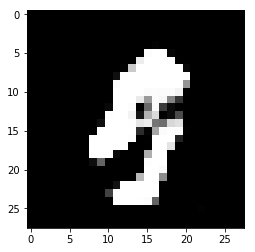

Loop: 578100, Generator_loss: 0.024588, Discriminator_loss: 0.0031827
Loop: 578200, Generator_loss: -0.018636, Discriminator_loss: 0.0043638
Loop: 578300, Generator_loss: -0.030325, Discriminator_loss: -0.00029733
Loop: 578400, Generator_loss: -0.0086999, Discriminator_loss: -0.0019471
Loop: 578500, Generator_loss: 0.0038394, Discriminator_loss: 0.0048231
Loop: 578600, Generator_loss: -0.032926, Discriminator_loss: 0.0067186
Loop: 578700, Generator_loss: -0.063617, Discriminator_loss: 0.0026835
Loop: 578800, Generator_loss: 0.0084452, Discriminator_loss: 0.0072176
Loop: 578900, Generator_loss: 0.0040822, Discriminator_loss: 0.0022471
Loop: 579000, Generator_loss: -0.039875, Discriminator_loss: 0.0064873


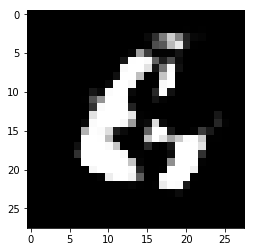

Loop: 579100, Generator_loss: 0.018503, Discriminator_loss: 0.005248
Loop: 579200, Generator_loss: 0.037339, Discriminator_loss: 0.0029691
Loop: 579300, Generator_loss: -0.026714, Discriminator_loss: -0.00089832
Loop: 579400, Generator_loss: -0.011694, Discriminator_loss: 0.0036537
Loop: 579500, Generator_loss: 0.011952, Discriminator_loss: 0.0029625
Loop: 579600, Generator_loss: -0.043055, Discriminator_loss: 0.0046825
Loop: 579700, Generator_loss: -0.031399, Discriminator_loss: 0.0095237
Loop: 579800, Generator_loss: 0.01231, Discriminator_loss: -0.0038359
Loop: 579900, Generator_loss: -0.065073, Discriminator_loss: 0.012938
Loop: 580000, Generator_loss: 0.011706, Discriminator_loss: 0.0073802


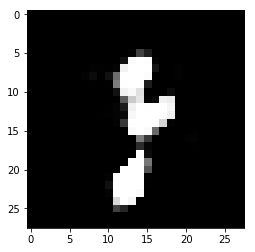

Loop: 580100, Generator_loss: -0.014903, Discriminator_loss: 0.0010949
Loop: 580200, Generator_loss: -0.027452, Discriminator_loss: 0.0058535
Loop: 580300, Generator_loss: 0.038502, Discriminator_loss: 0.0039224
Loop: 580400, Generator_loss: 0.045739, Discriminator_loss: 0.0034023
Loop: 580500, Generator_loss: -0.043272, Discriminator_loss: -0.0021551
Loop: 580600, Generator_loss: -0.015173, Discriminator_loss: 0.0035398
Loop: 580700, Generator_loss: 0.037204, Discriminator_loss: -0.00076004
Loop: 580800, Generator_loss: 0.01961, Discriminator_loss: 0.0040571
Loop: 580900, Generator_loss: 0.0025128, Discriminator_loss: 0.0056427
Loop: 581000, Generator_loss: -0.031488, Discriminator_loss: 0.0083766


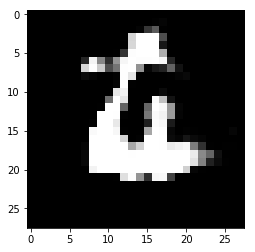

Loop: 581100, Generator_loss: -0.0097426, Discriminator_loss: -0.001492
Loop: 581200, Generator_loss: 0.012784, Discriminator_loss: 0.0062999
Loop: 581300, Generator_loss: -0.005376, Discriminator_loss: -0.0028967
Loop: 581400, Generator_loss: 0.0073787, Discriminator_loss: -0.0025907
Loop: 581500, Generator_loss: -0.047222, Discriminator_loss: -0.0060291
Loop: 581600, Generator_loss: -0.03153, Discriminator_loss: 0.00564
Loop: 581700, Generator_loss: -0.024693, Discriminator_loss: -0.00053991
Loop: 581800, Generator_loss: -0.0544, Discriminator_loss: 0.0037951
Loop: 581900, Generator_loss: 0.030192, Discriminator_loss: 0.003635
Loop: 582000, Generator_loss: -0.035766, Discriminator_loss: 0.01623


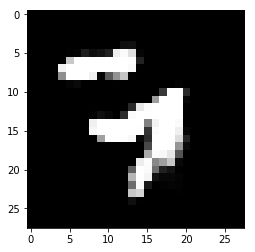

Loop: 582100, Generator_loss: -0.0061015, Discriminator_loss: -0.0056942
Loop: 582200, Generator_loss: -0.0097417, Discriminator_loss: 0.0036785
Loop: 582300, Generator_loss: -0.060978, Discriminator_loss: 0.0009062
Loop: 582400, Generator_loss: 0.0011772, Discriminator_loss: 0.0033685
Loop: 582500, Generator_loss: -0.0027369, Discriminator_loss: 0.00084536
Loop: 582600, Generator_loss: 0.002614, Discriminator_loss: -0.0016618
Loop: 582700, Generator_loss: -0.035021, Discriminator_loss: 0.003068
Loop: 582800, Generator_loss: -0.022124, Discriminator_loss: -0.0011185
Loop: 582900, Generator_loss: -0.033245, Discriminator_loss: -0.00028802
Loop: 583000, Generator_loss: -0.0060672, Discriminator_loss: 0.0011066


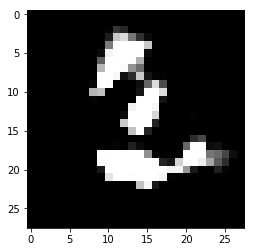

Loop: 583100, Generator_loss: 0.0042925, Discriminator_loss: 0.00042157
Loop: 583200, Generator_loss: 0.0037343, Discriminator_loss: 0.0033205
Loop: 583300, Generator_loss: -0.03028, Discriminator_loss: 0.0063308
Loop: 583400, Generator_loss: 0.0015289, Discriminator_loss: 0.0054541
Loop: 583500, Generator_loss: -0.018239, Discriminator_loss: 0.0044929
Loop: 583600, Generator_loss: -0.031485, Discriminator_loss: -0.00741
Loop: 583700, Generator_loss: 0.010498, Discriminator_loss: 0.0015213
Loop: 583800, Generator_loss: -0.018711, Discriminator_loss: 0.0032231
Loop: 583900, Generator_loss: -0.020176, Discriminator_loss: 0.0086978
Loop: 584000, Generator_loss: 0.0018183, Discriminator_loss: -0.0072825


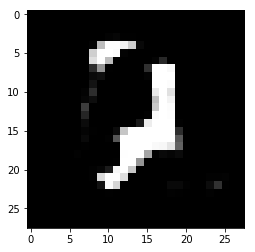

Loop: 584100, Generator_loss: -0.022231, Discriminator_loss: 0.0066618
Loop: 584200, Generator_loss: -0.028017, Discriminator_loss: 0.0064431
Loop: 584300, Generator_loss: -0.018038, Discriminator_loss: 0.0077393
Loop: 584400, Generator_loss: -0.036625, Discriminator_loss: 0.0039325
Loop: 584500, Generator_loss: -0.031419, Discriminator_loss: 0.0049755
Loop: 584600, Generator_loss: -0.0063545, Discriminator_loss: 0.0028533
Loop: 584700, Generator_loss: -0.0033873, Discriminator_loss: -0.0058595
Loop: 584800, Generator_loss: 0.012139, Discriminator_loss: 0.0017554
Loop: 584900, Generator_loss: -0.0086394, Discriminator_loss: 0.0075899
Loop: 585000, Generator_loss: 0.02558, Discriminator_loss: 0.0038332


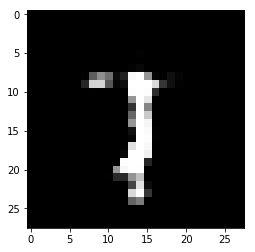

Loop: 585100, Generator_loss: 0.01851, Discriminator_loss: 1.2577e-05
Loop: 585200, Generator_loss: -0.044395, Discriminator_loss: 0.0050427
Loop: 585300, Generator_loss: -0.031477, Discriminator_loss: 0.00067135
Loop: 585400, Generator_loss: -0.0032159, Discriminator_loss: -0.00093618
Loop: 585500, Generator_loss: -0.0051825, Discriminator_loss: 0.0088655
Loop: 585600, Generator_loss: 0.0023077, Discriminator_loss: -0.0025204
Loop: 585700, Generator_loss: -0.0065017, Discriminator_loss: 0.0047522
Loop: 585800, Generator_loss: 0.023899, Discriminator_loss: 0.0060633
Loop: 585900, Generator_loss: 0.019673, Discriminator_loss: 0.0040978
Loop: 586000, Generator_loss: 0.0074187, Discriminator_loss: 0.0093895


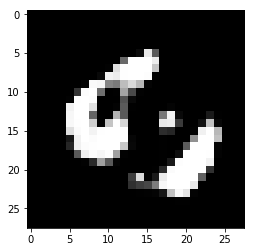

Loop: 586100, Generator_loss: -0.018422, Discriminator_loss: 0.00011022
Loop: 586200, Generator_loss: 0.0070673, Discriminator_loss: -0.0011426
Loop: 586300, Generator_loss: -0.0031453, Discriminator_loss: 0.0033311
Loop: 586400, Generator_loss: 0.05397, Discriminator_loss: 0.0044201
Loop: 586500, Generator_loss: 0.0035592, Discriminator_loss: -0.00014824
Loop: 586600, Generator_loss: 0.021451, Discriminator_loss: 0.011875
Loop: 586700, Generator_loss: 0.030527, Discriminator_loss: 0.0044521
Loop: 586800, Generator_loss: -0.0011407, Discriminator_loss: 0.0078051
Loop: 586900, Generator_loss: 0.026244, Discriminator_loss: 0.0049037
Loop: 587000, Generator_loss: -0.073168, Discriminator_loss: -0.00037046


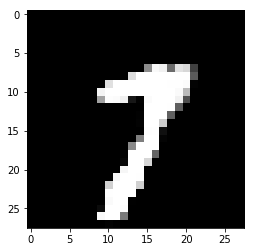

Loop: 587100, Generator_loss: -0.06225, Discriminator_loss: 0.0037358
Loop: 587200, Generator_loss: 0.028729, Discriminator_loss: 0.0043668
Loop: 587300, Generator_loss: -0.0071965, Discriminator_loss: 0.0022446
Loop: 587400, Generator_loss: 0.0012175, Discriminator_loss: 0.0032554
Loop: 587500, Generator_loss: 0.0069518, Discriminator_loss: 0.00019301
Loop: 587600, Generator_loss: -0.021413, Discriminator_loss: -0.0068913
Loop: 587700, Generator_loss: 0.046393, Discriminator_loss: 0.0067604
Loop: 587800, Generator_loss: 0.034784, Discriminator_loss: 0.0041502
Loop: 587900, Generator_loss: -0.015045, Discriminator_loss: 0.0018192
Loop: 588000, Generator_loss: -0.017374, Discriminator_loss: 0.0027275


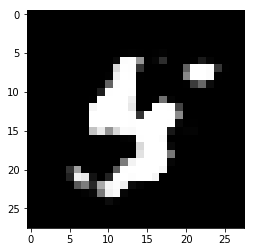

Loop: 588100, Generator_loss: 0.0012041, Discriminator_loss: 0.0044144
Loop: 588200, Generator_loss: -0.00093146, Discriminator_loss: 0.0057293
Loop: 588300, Generator_loss: -0.011525, Discriminator_loss: 0.011681
Loop: 588400, Generator_loss: -0.021798, Discriminator_loss: 0.0046759
Loop: 588500, Generator_loss: -0.030377, Discriminator_loss: 0.011454
Loop: 588600, Generator_loss: -0.022177, Discriminator_loss: -0.0030676
Loop: 588700, Generator_loss: -0.0038977, Discriminator_loss: 0.0019093
Loop: 588800, Generator_loss: 0.026968, Discriminator_loss: -0.0028181
Loop: 588900, Generator_loss: 0.00069287, Discriminator_loss: -0.0010655
Loop: 589000, Generator_loss: -0.010912, Discriminator_loss: -0.00022965


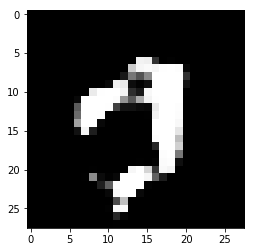

Loop: 589100, Generator_loss: -0.034548, Discriminator_loss: 0.0052076
Loop: 589200, Generator_loss: -0.029546, Discriminator_loss: 0.0075788
Loop: 589300, Generator_loss: -0.026175, Discriminator_loss: -0.00038884
Loop: 589400, Generator_loss: -0.0027282, Discriminator_loss: -0.00046871
Loop: 589500, Generator_loss: 0.0014288, Discriminator_loss: 0.0027641
Loop: 589600, Generator_loss: 0.0060322, Discriminator_loss: -0.0037857
Loop: 589700, Generator_loss: -0.0153, Discriminator_loss: 0.00068767
Loop: 589800, Generator_loss: -0.029484, Discriminator_loss: 0.0012833
Loop: 589900, Generator_loss: 0.0089105, Discriminator_loss: 0.0012873
Loop: 590000, Generator_loss: -0.019732, Discriminator_loss: 0.0036962


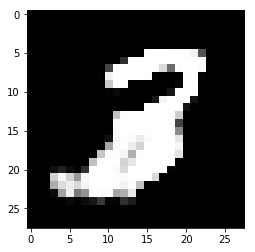

Loop: 590100, Generator_loss: 0.0075206, Discriminator_loss: -0.00085221
Loop: 590200, Generator_loss: -0.034431, Discriminator_loss: -0.00057421
Loop: 590300, Generator_loss: 0.020021, Discriminator_loss: -0.0016289
Loop: 590400, Generator_loss: 0.0092314, Discriminator_loss: 0.0021332
Loop: 590500, Generator_loss: -0.021647, Discriminator_loss: 0.0023672
Loop: 590600, Generator_loss: 0.006623, Discriminator_loss: 0.0029137
Loop: 590700, Generator_loss: -0.054965, Discriminator_loss: 0.0019059
Loop: 590800, Generator_loss: -0.013592, Discriminator_loss: 0.0058957
Loop: 590900, Generator_loss: 0.0092976, Discriminator_loss: 0.0066462
Loop: 591000, Generator_loss: 0.065867, Discriminator_loss: 0.0033733


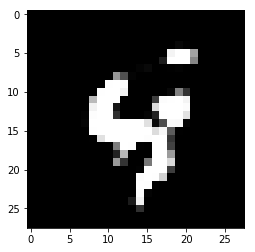

Loop: 591100, Generator_loss: -0.011142, Discriminator_loss: 0.00081308
Loop: 591200, Generator_loss: -0.0098187, Discriminator_loss: -0.0039992
Loop: 591300, Generator_loss: 0.027498, Discriminator_loss: 0.0010486
Loop: 591400, Generator_loss: 0.0011412, Discriminator_loss: -0.00063948
Loop: 591500, Generator_loss: 0.0041145, Discriminator_loss: 0.0014576
Loop: 591600, Generator_loss: -0.027636, Discriminator_loss: 0.0022142
Loop: 591700, Generator_loss: -0.067877, Discriminator_loss: 0.0081532
Loop: 591800, Generator_loss: 0.020989, Discriminator_loss: 0.007925
Loop: 591900, Generator_loss: -0.026112, Discriminator_loss: -0.00022988
Loop: 592000, Generator_loss: 0.028582, Discriminator_loss: 0.0050156


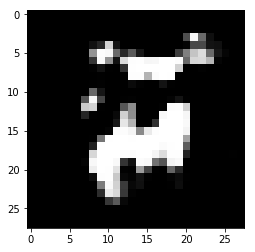

Loop: 592100, Generator_loss: 0.019261, Discriminator_loss: 9.6185e-05
Loop: 592200, Generator_loss: 0.056409, Discriminator_loss: 0.0031047
Loop: 592300, Generator_loss: 0.0012569, Discriminator_loss: -0.0039021
Loop: 592400, Generator_loss: -0.0046891, Discriminator_loss: 0.0039329
Loop: 592500, Generator_loss: 0.0039042, Discriminator_loss: 0.00010708
Loop: 592600, Generator_loss: -0.030053, Discriminator_loss: 0.00097629
Loop: 592700, Generator_loss: 0.007917, Discriminator_loss: -0.0023051
Loop: 592800, Generator_loss: 0.014523, Discriminator_loss: 0.00010687
Loop: 592900, Generator_loss: 0.043472, Discriminator_loss: 0.001847
Loop: 593000, Generator_loss: 0.01293, Discriminator_loss: 0.0067707


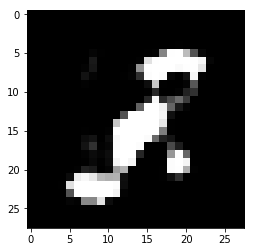

Loop: 593100, Generator_loss: -0.0033899, Discriminator_loss: 0.012758
Loop: 593200, Generator_loss: -0.034239, Discriminator_loss: 0.0060981
Loop: 593300, Generator_loss: 0.0058266, Discriminator_loss: -0.0009322
Loop: 593400, Generator_loss: 0.029598, Discriminator_loss: 0.0040708
Loop: 593500, Generator_loss: -0.0090301, Discriminator_loss: 0.000254
Loop: 593600, Generator_loss: -0.018003, Discriminator_loss: -0.0042331
Loop: 593700, Generator_loss: -0.040067, Discriminator_loss: 0.0065663
Loop: 593800, Generator_loss: -0.019232, Discriminator_loss: 0.0017227
Loop: 593900, Generator_loss: -0.040587, Discriminator_loss: 0.0083539
Loop: 594000, Generator_loss: -0.031878, Discriminator_loss: 0.0089213


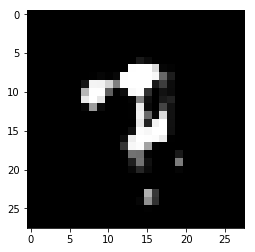

Loop: 594100, Generator_loss: 0.020017, Discriminator_loss: 0.0033528
Loop: 594200, Generator_loss: 0.0089879, Discriminator_loss: -0.00089533
Loop: 594300, Generator_loss: 0.0031051, Discriminator_loss: 0.00079906
Loop: 594400, Generator_loss: -0.019039, Discriminator_loss: 0.0030839
Loop: 594500, Generator_loss: -0.0074365, Discriminator_loss: -0.0020863
Loop: 594600, Generator_loss: -0.036291, Discriminator_loss: 0.001907
Loop: 594700, Generator_loss: -0.047072, Discriminator_loss: -0.0036233
Loop: 594800, Generator_loss: -0.015118, Discriminator_loss: -0.0028745
Loop: 594900, Generator_loss: -0.071519, Discriminator_loss: 0.0077138
Loop: 595000, Generator_loss: -0.0258, Discriminator_loss: -0.00039238


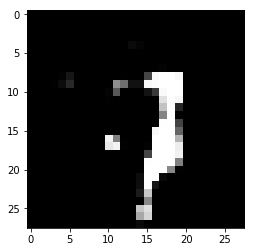

Loop: 595100, Generator_loss: -0.0044402, Discriminator_loss: 0.0067916
Loop: 595200, Generator_loss: -0.03345, Discriminator_loss: -0.0071403
Loop: 595300, Generator_loss: -0.054964, Discriminator_loss: 0.0071554
Loop: 595400, Generator_loss: -0.022253, Discriminator_loss: 0.0043829
Loop: 595500, Generator_loss: 0.044577, Discriminator_loss: -0.0008583
Loop: 595600, Generator_loss: 0.016788, Discriminator_loss: 0.0065479
Loop: 595700, Generator_loss: 0.023615, Discriminator_loss: -0.0024755
Loop: 595800, Generator_loss: 0.013577, Discriminator_loss: 0.0018981
Loop: 595900, Generator_loss: 0.046011, Discriminator_loss: 0.0055279
Loop: 596000, Generator_loss: -0.003863, Discriminator_loss: 0.00028915


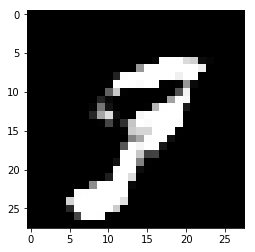

Loop: 596100, Generator_loss: -0.039105, Discriminator_loss: 0.00052225
Loop: 596200, Generator_loss: -0.026435, Discriminator_loss: 0.0019708
Loop: 596300, Generator_loss: -0.040081, Discriminator_loss: -0.0015048
Loop: 596400, Generator_loss: -0.02532, Discriminator_loss: 0.0019853
Loop: 596500, Generator_loss: 0.0076847, Discriminator_loss: 0.0086738
Loop: 596600, Generator_loss: -0.036548, Discriminator_loss: 0.0054332
Loop: 596700, Generator_loss: 0.0074951, Discriminator_loss: 0.004696
Loop: 596800, Generator_loss: -0.0048969, Discriminator_loss: 0.00061238
Loop: 596900, Generator_loss: -0.0075543, Discriminator_loss: 0.0051853
Loop: 597000, Generator_loss: 0.034538, Discriminator_loss: 0.012215


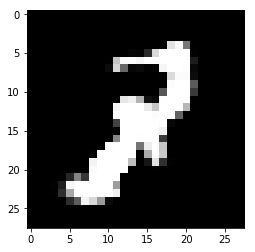

Loop: 597100, Generator_loss: 0.0089351, Discriminator_loss: 0.0016786
Loop: 597200, Generator_loss: -0.030456, Discriminator_loss: -0.0037117
Loop: 597300, Generator_loss: -0.010042, Discriminator_loss: 0.002682
Loop: 597400, Generator_loss: -0.010246, Discriminator_loss: 0.0070896
Loop: 597500, Generator_loss: -0.016071, Discriminator_loss: 0.0067568
Loop: 597600, Generator_loss: -0.021765, Discriminator_loss: 0.0012905
Loop: 597700, Generator_loss: -0.063668, Discriminator_loss: 0.0013065
Loop: 597800, Generator_loss: 0.021165, Discriminator_loss: 0.0085738
Loop: 597900, Generator_loss: 0.030664, Discriminator_loss: -0.0011314
Loop: 598000, Generator_loss: 0.006247, Discriminator_loss: 0.005238


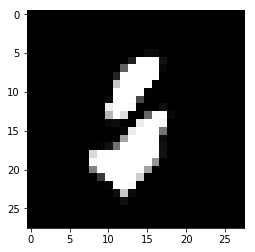

Loop: 598100, Generator_loss: -0.013499, Discriminator_loss: 0.001967
Loop: 598200, Generator_loss: 0.0024423, Discriminator_loss: 0.001248
Loop: 598300, Generator_loss: 0.0099169, Discriminator_loss: -0.0030817
Loop: 598400, Generator_loss: -0.028046, Discriminator_loss: 0.0087696
Loop: 598500, Generator_loss: -0.023513, Discriminator_loss: 0.0032734
Loop: 598600, Generator_loss: 0.019733, Discriminator_loss: 4.982e-05
Loop: 598700, Generator_loss: -0.014505, Discriminator_loss: 0.0010823
Loop: 598800, Generator_loss: -0.0094675, Discriminator_loss: 0.0031874
Loop: 598900, Generator_loss: -0.018033, Discriminator_loss: 0.0024119
Loop: 599000, Generator_loss: 0.018803, Discriminator_loss: 0.003743


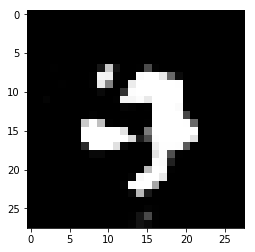

Loop: 599100, Generator_loss: -0.040869, Discriminator_loss: 0.0097213
Loop: 599200, Generator_loss: 0.016749, Discriminator_loss: 0.00065001
Loop: 599300, Generator_loss: -0.016016, Discriminator_loss: 0.0033341
Loop: 599400, Generator_loss: -0.029106, Discriminator_loss: 0.00070341
Loop: 599500, Generator_loss: -0.0059906, Discriminator_loss: -0.0032961
Loop: 599600, Generator_loss: 0.028118, Discriminator_loss: -0.0020763
Loop: 599700, Generator_loss: -0.0078806, Discriminator_loss: -0.0027367
Loop: 599800, Generator_loss: -0.063183, Discriminator_loss: 0.0049337
Loop: 599900, Generator_loss: 0.011095, Discriminator_loss: 0.0087801
Loop: 600000, Generator_loss: -0.027198, Discriminator_loss: 0.004308


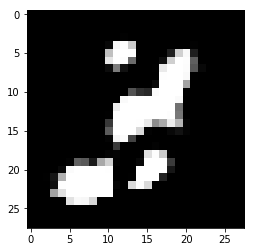

Loop: 600100, Generator_loss: 0.015775, Discriminator_loss: -0.0074508
Loop: 600200, Generator_loss: -0.0015946, Discriminator_loss: 0.0054176
Loop: 600300, Generator_loss: -0.002758, Discriminator_loss: 0.0047053
Loop: 600400, Generator_loss: -0.022806, Discriminator_loss: 0.0035367
Loop: 600500, Generator_loss: -0.0046685, Discriminator_loss: 0.0037358
Loop: 600600, Generator_loss: 0.011863, Discriminator_loss: 0.0034897
Loop: 600700, Generator_loss: -0.020597, Discriminator_loss: 0.00078687
Loop: 600800, Generator_loss: 0.0030352, Discriminator_loss: 0.0052096
Loop: 600900, Generator_loss: 0.03117, Discriminator_loss: 0.0029206
Loop: 601000, Generator_loss: -0.056532, Discriminator_loss: 0.0050982


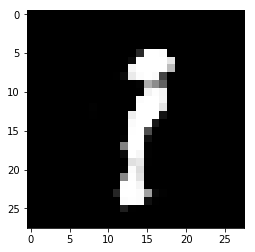

Loop: 601100, Generator_loss: -0.038271, Discriminator_loss: 0.0048256
Loop: 601200, Generator_loss: 0.0077078, Discriminator_loss: 0.0053283
Loop: 601300, Generator_loss: 0.019325, Discriminator_loss: 0.0063107
Loop: 601400, Generator_loss: 0.0034445, Discriminator_loss: 0.0056646
Loop: 601500, Generator_loss: 0.031145, Discriminator_loss: 0.0047721
Loop: 601600, Generator_loss: 0.010673, Discriminator_loss: 0.0070604
Loop: 601700, Generator_loss: 0.021332, Discriminator_loss: -0.001723
Loop: 601800, Generator_loss: -0.0044529, Discriminator_loss: -0.0022836
Loop: 601900, Generator_loss: -0.034972, Discriminator_loss: 0.001719
Loop: 602000, Generator_loss: 0.020861, Discriminator_loss: 0.0046045


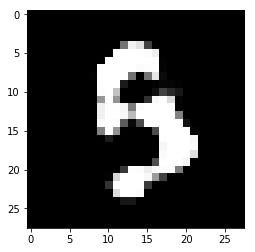

Loop: 602100, Generator_loss: -0.063455, Discriminator_loss: 0.0038756
Loop: 602200, Generator_loss: 0.0033197, Discriminator_loss: -0.0018131
Loop: 602300, Generator_loss: -0.026486, Discriminator_loss: -0.0025332
Loop: 602400, Generator_loss: -0.043702, Discriminator_loss: 0.00478
Loop: 602500, Generator_loss: 0.018099, Discriminator_loss: 0.0024823
Loop: 602600, Generator_loss: 0.010227, Discriminator_loss: 0.0035461
Loop: 602700, Generator_loss: 0.0029777, Discriminator_loss: 0.0030599
Loop: 602800, Generator_loss: 0.0056467, Discriminator_loss: 0.0013603
Loop: 602900, Generator_loss: -0.0079039, Discriminator_loss: -0.0021996
Loop: 603000, Generator_loss: 0.0077631, Discriminator_loss: 0.013214


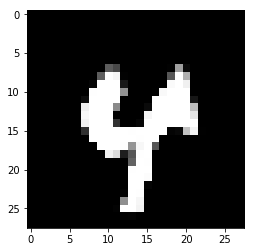

Loop: 603100, Generator_loss: 0.057641, Discriminator_loss: -0.00029137
Loop: 603200, Generator_loss: -0.018228, Discriminator_loss: 0.0075119
Loop: 603300, Generator_loss: -0.027921, Discriminator_loss: -0.0025848
Loop: 603400, Generator_loss: -0.013109, Discriminator_loss: 0.00022548
Loop: 603500, Generator_loss: 0.0063352, Discriminator_loss: -0.0036514
Loop: 603600, Generator_loss: -0.0026572, Discriminator_loss: 0.0016598
Loop: 603700, Generator_loss: -0.0025007, Discriminator_loss: 0.002341
Loop: 603800, Generator_loss: -0.026126, Discriminator_loss: 0.0068829
Loop: 603900, Generator_loss: 0.033533, Discriminator_loss: -0.0010307
Loop: 604000, Generator_loss: 0.0679, Discriminator_loss: -0.0039536


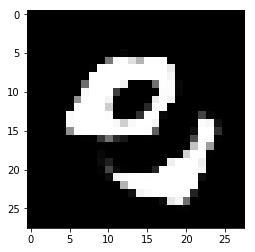

Loop: 604100, Generator_loss: -0.0064225, Discriminator_loss: 0.0089258
Loop: 604200, Generator_loss: 0.024375, Discriminator_loss: 0.00091375
Loop: 604300, Generator_loss: 0.016764, Discriminator_loss: -0.0015417
Loop: 604400, Generator_loss: -0.02823, Discriminator_loss: -0.0040143
Loop: 604500, Generator_loss: 0.038656, Discriminator_loss: 0.0092551
Loop: 604600, Generator_loss: -0.019821, Discriminator_loss: 0.0092954
Loop: 604700, Generator_loss: -0.030632, Discriminator_loss: 0.0074181
Loop: 604800, Generator_loss: -0.023096, Discriminator_loss: -0.0029162
Loop: 604900, Generator_loss: 0.0081049, Discriminator_loss: 0.0068042
Loop: 605000, Generator_loss: 0.03543, Discriminator_loss: 0.0035323


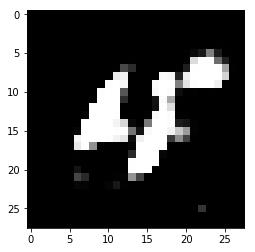

Loop: 605100, Generator_loss: 0.003698, Discriminator_loss: 0.0039066
Loop: 605200, Generator_loss: -0.044935, Discriminator_loss: 0.0042974
Loop: 605300, Generator_loss: -0.019998, Discriminator_loss: 0.0034977
Loop: 605400, Generator_loss: -0.035099, Discriminator_loss: 0.0022735
Loop: 605500, Generator_loss: 0.014167, Discriminator_loss: 0.0016346
Loop: 605600, Generator_loss: -0.006554, Discriminator_loss: 0.0058724
Loop: 605700, Generator_loss: 0.0071482, Discriminator_loss: 0.0060583
Loop: 605800, Generator_loss: -0.0044099, Discriminator_loss: -0.0010642
Loop: 605900, Generator_loss: -0.056099, Discriminator_loss: 0.0028548
Loop: 606000, Generator_loss: -0.014004, Discriminator_loss: 0.0062408


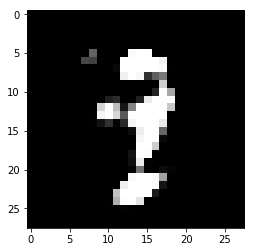

Loop: 606100, Generator_loss: 0.033023, Discriminator_loss: 0.0049357
Loop: 606200, Generator_loss: -0.012149, Discriminator_loss: 0.007996
Loop: 606300, Generator_loss: -0.0069606, Discriminator_loss: 0.003351
Loop: 606400, Generator_loss: -0.011688, Discriminator_loss: -0.0019768
Loop: 606500, Generator_loss: -0.021581, Discriminator_loss: 0.0077825
Loop: 606600, Generator_loss: -0.023318, Discriminator_loss: -0.00087981
Loop: 606700, Generator_loss: -0.04727, Discriminator_loss: 0.0036197
Loop: 606800, Generator_loss: 0.017187, Discriminator_loss: -0.0014522
Loop: 606900, Generator_loss: 0.026304, Discriminator_loss: -0.00040433
Loop: 607000, Generator_loss: 0.02701, Discriminator_loss: 0.0063007


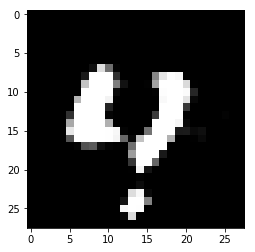

Loop: 607100, Generator_loss: -0.0022885, Discriminator_loss: -0.00072584
Loop: 607200, Generator_loss: -0.0035554, Discriminator_loss: 0.00036409
Loop: 607300, Generator_loss: -0.087586, Discriminator_loss: 0.0074128
Loop: 607400, Generator_loss: 0.028795, Discriminator_loss: 0.00018988
Loop: 607500, Generator_loss: 0.045376, Discriminator_loss: -0.0023686
Loop: 607600, Generator_loss: -0.0025906, Discriminator_loss: 0.0015665
Loop: 607700, Generator_loss: -0.0222, Discriminator_loss: 0.0070509
Loop: 607800, Generator_loss: 0.025792, Discriminator_loss: 0.0012835
Loop: 607900, Generator_loss: 0.014946, Discriminator_loss: 0.0012955
Loop: 608000, Generator_loss: 0.034635, Discriminator_loss: 0.004853


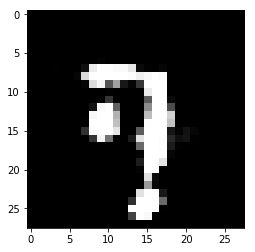

Loop: 608100, Generator_loss: 0.010356, Discriminator_loss: 0.010309
Loop: 608200, Generator_loss: -0.044833, Discriminator_loss: 0.002558
Loop: 608300, Generator_loss: -0.017192, Discriminator_loss: 0.0020635
Loop: 608400, Generator_loss: -0.0061747, Discriminator_loss: 0.0072996
Loop: 608500, Generator_loss: -0.046222, Discriminator_loss: -0.0030053
Loop: 608600, Generator_loss: -0.00066766, Discriminator_loss: -0.0024199
Loop: 608700, Generator_loss: -0.064252, Discriminator_loss: 0.0090464
Loop: 608800, Generator_loss: -0.075849, Discriminator_loss: 0.00092972
Loop: 608900, Generator_loss: -0.036313, Discriminator_loss: 0.0014047
Loop: 609000, Generator_loss: -0.021537, Discriminator_loss: -0.0027734


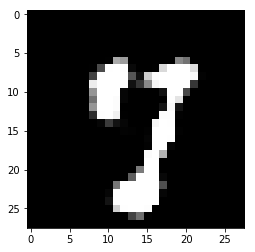

Loop: 609100, Generator_loss: 0.0073433, Discriminator_loss: 0.0015254
Loop: 609200, Generator_loss: 0.024057, Discriminator_loss: -0.0011503
Loop: 609300, Generator_loss: -0.030098, Discriminator_loss: 0.00084358
Loop: 609400, Generator_loss: -0.043504, Discriminator_loss: 0.0039574
Loop: 609500, Generator_loss: -0.0063673, Discriminator_loss: 0.0038013
Loop: 609600, Generator_loss: -0.021133, Discriminator_loss: 0.0014022
Loop: 609700, Generator_loss: 0.039179, Discriminator_loss: -0.0022103
Loop: 609800, Generator_loss: -0.032485, Discriminator_loss: -0.007263
Loop: 609900, Generator_loss: -0.007202, Discriminator_loss: -9.573e-05
Loop: 610000, Generator_loss: -0.003348, Discriminator_loss: -0.00635


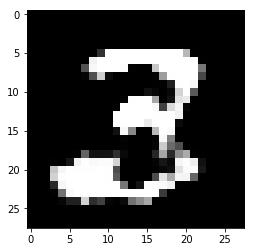

Loop: 610100, Generator_loss: -0.0381, Discriminator_loss: -0.0016901
Loop: 610200, Generator_loss: -0.029516, Discriminator_loss: 0.019043
Loop: 610300, Generator_loss: -0.035135, Discriminator_loss: 0.0031464
Loop: 610400, Generator_loss: -0.032125, Discriminator_loss: 0.0044672
Loop: 610500, Generator_loss: 0.040146, Discriminator_loss: 0.0031911
Loop: 610600, Generator_loss: -0.03818, Discriminator_loss: -0.0044557
Loop: 610700, Generator_loss: -0.035271, Discriminator_loss: -0.0044904
Loop: 610800, Generator_loss: -0.0068454, Discriminator_loss: 0.0062056
Loop: 610900, Generator_loss: 0.024135, Discriminator_loss: -0.00033114
Loop: 611000, Generator_loss: -0.010308, Discriminator_loss: -0.0008332


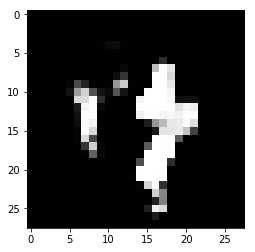

Loop: 611100, Generator_loss: 0.018925, Discriminator_loss: -0.0010985
Loop: 611200, Generator_loss: 0.0061914, Discriminator_loss: -0.0007
Loop: 611300, Generator_loss: 0.047155, Discriminator_loss: 0.0014224
Loop: 611400, Generator_loss: -0.01413, Discriminator_loss: 0.0053167
Loop: 611500, Generator_loss: 0.014468, Discriminator_loss: 0.0074006
Loop: 611600, Generator_loss: 0.017101, Discriminator_loss: 0.0020206
Loop: 611700, Generator_loss: -0.02548, Discriminator_loss: 0.0061995
Loop: 611800, Generator_loss: 0.027622, Discriminator_loss: 0.0045409
Loop: 611900, Generator_loss: -0.044519, Discriminator_loss: 0.0070132
Loop: 612000, Generator_loss: -0.053134, Discriminator_loss: 0.007189


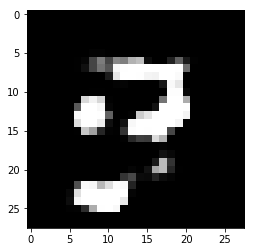

Loop: 612100, Generator_loss: -8.0089e-05, Discriminator_loss: -0.0028194
Loop: 612200, Generator_loss: 0.0049504, Discriminator_loss: 0.0045283
Loop: 612300, Generator_loss: 0.019796, Discriminator_loss: 0.014371
Loop: 612400, Generator_loss: 0.010758, Discriminator_loss: 0.0094453
Loop: 612500, Generator_loss: -0.034048, Discriminator_loss: -0.00034023
Loop: 612600, Generator_loss: -0.03623, Discriminator_loss: 0.0017987
Loop: 612700, Generator_loss: -0.043614, Discriminator_loss: 0.0037626
Loop: 612800, Generator_loss: 0.0039136, Discriminator_loss: 0.008008
Loop: 612900, Generator_loss: -0.030633, Discriminator_loss: -0.0033149
Loop: 613000, Generator_loss: -0.016859, Discriminator_loss: 0.0011272


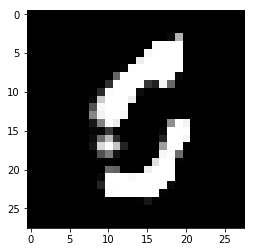

Loop: 613100, Generator_loss: -0.013349, Discriminator_loss: 0.0024919
Loop: 613200, Generator_loss: 0.0023437, Discriminator_loss: -0.0018399
Loop: 613300, Generator_loss: -0.0082562, Discriminator_loss: 0.001739
Loop: 613400, Generator_loss: -0.010176, Discriminator_loss: -0.00056881
Loop: 613500, Generator_loss: -0.01424, Discriminator_loss: 0.0039848
Loop: 613600, Generator_loss: 0.0068075, Discriminator_loss: 0.0043344
Loop: 613700, Generator_loss: -0.01231, Discriminator_loss: 0.0014868
Loop: 613800, Generator_loss: -0.043308, Discriminator_loss: 0.0094766
Loop: 613900, Generator_loss: 0.0052746, Discriminator_loss: 0.00070359
Loop: 614000, Generator_loss: 0.01754, Discriminator_loss: -0.0033363


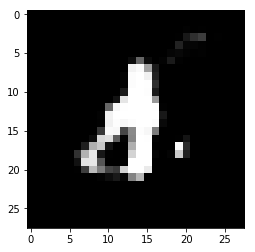

Loop: 614100, Generator_loss: 0.0077294, Discriminator_loss: 0.0025507
Loop: 614200, Generator_loss: -0.025536, Discriminator_loss: 0.0019325
Loop: 614300, Generator_loss: -0.026397, Discriminator_loss: 0.0065791
Loop: 614400, Generator_loss: -0.034255, Discriminator_loss: -0.0065974
Loop: 614500, Generator_loss: -0.029411, Discriminator_loss: 0.0080705
Loop: 614600, Generator_loss: -0.036781, Discriminator_loss: 0.0032659
Loop: 614700, Generator_loss: -0.031513, Discriminator_loss: 0.0089271
Loop: 614800, Generator_loss: -0.013473, Discriminator_loss: -0.0013522
Loop: 614900, Generator_loss: 0.052855, Discriminator_loss: 0.00059987
Loop: 615000, Generator_loss: 0.0058846, Discriminator_loss: 0.0018136


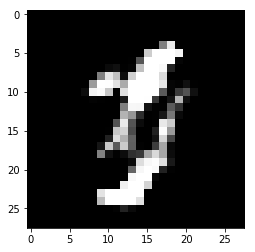

Loop: 615100, Generator_loss: 0.0045689, Discriminator_loss: -0.0037989
Loop: 615200, Generator_loss: 0.035812, Discriminator_loss: 0.0067051
Loop: 615300, Generator_loss: -0.0042407, Discriminator_loss: 0.004662
Loop: 615400, Generator_loss: 0.022227, Discriminator_loss: 0.0048734
Loop: 615500, Generator_loss: -0.048146, Discriminator_loss: 0.0082019
Loop: 615600, Generator_loss: -0.043333, Discriminator_loss: -0.0026614
Loop: 615700, Generator_loss: -0.012741, Discriminator_loss: 0.0022059
Loop: 615800, Generator_loss: 0.0094353, Discriminator_loss: 0.0027298
Loop: 615900, Generator_loss: 0.017773, Discriminator_loss: 0.0013619
Loop: 616000, Generator_loss: 0.0046854, Discriminator_loss: 0.00051029


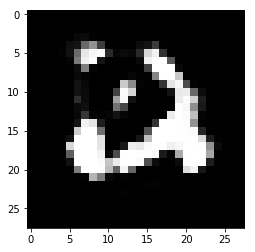

Loop: 616100, Generator_loss: 0.022077, Discriminator_loss: 0.0036568
Loop: 616200, Generator_loss: 0.015209, Discriminator_loss: 0.0049974
Loop: 616300, Generator_loss: -0.044569, Discriminator_loss: 0.0094839
Loop: 616400, Generator_loss: 0.02385, Discriminator_loss: 0.0035311
Loop: 616500, Generator_loss: -0.006406, Discriminator_loss: 0.0076653
Loop: 616600, Generator_loss: -0.03356, Discriminator_loss: -0.00099164
Loop: 616700, Generator_loss: 0.023932, Discriminator_loss: 0.00014744
Loop: 616800, Generator_loss: -0.029629, Discriminator_loss: -0.00093448
Loop: 616900, Generator_loss: -0.025871, Discriminator_loss: 8.7205e-05
Loop: 617000, Generator_loss: -0.026412, Discriminator_loss: 0.0064371


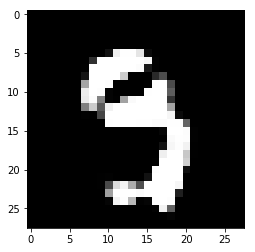

Loop: 617100, Generator_loss: -0.03538, Discriminator_loss: -0.00082096
Loop: 617200, Generator_loss: -0.025525, Discriminator_loss: 0.0039865
Loop: 617300, Generator_loss: 0.01724, Discriminator_loss: -9.7429e-05
Loop: 617400, Generator_loss: -0.052822, Discriminator_loss: -0.0098987
Loop: 617500, Generator_loss: -0.068596, Discriminator_loss: 0.018148
Loop: 617600, Generator_loss: -0.02185, Discriminator_loss: 0.0010811
Loop: 617700, Generator_loss: -0.0057522, Discriminator_loss: 0.0078467
Loop: 617800, Generator_loss: -0.023231, Discriminator_loss: 0.0013069
Loop: 617900, Generator_loss: 0.024518, Discriminator_loss: -0.0050038
Loop: 618000, Generator_loss: -0.0065295, Discriminator_loss: 0.0050746


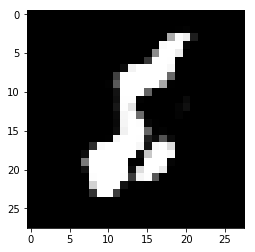

Loop: 618100, Generator_loss: 0.0015032, Discriminator_loss: 0.0022833
Loop: 618200, Generator_loss: -0.0034364, Discriminator_loss: -0.0016295
Loop: 618300, Generator_loss: -0.037017, Discriminator_loss: 0.0026011
Loop: 618400, Generator_loss: -0.0071344, Discriminator_loss: 0.0037915
Loop: 618500, Generator_loss: -0.038296, Discriminator_loss: -0.0026471
Loop: 618600, Generator_loss: -0.001137, Discriminator_loss: 0.0021661
Loop: 618700, Generator_loss: 0.010253, Discriminator_loss: 0.0064119
Loop: 618800, Generator_loss: -0.047047, Discriminator_loss: 0.0013634
Loop: 618900, Generator_loss: 0.025762, Discriminator_loss: 0.0063064
Loop: 619000, Generator_loss: -0.0067074, Discriminator_loss: -0.0022693


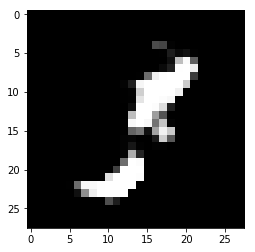

Loop: 619100, Generator_loss: -0.022203, Discriminator_loss: 0.0049946
Loop: 619200, Generator_loss: -0.013697, Discriminator_loss: 0.0031815
Loop: 619300, Generator_loss: -0.04203, Discriminator_loss: 7.3507e-05
Loop: 619400, Generator_loss: -0.0067455, Discriminator_loss: -0.0015037
Loop: 619500, Generator_loss: -0.0010251, Discriminator_loss: 0.0037111
Loop: 619600, Generator_loss: -0.063753, Discriminator_loss: -0.00046936
Loop: 619700, Generator_loss: -0.0060492, Discriminator_loss: 0.0055796
Loop: 619800, Generator_loss: 0.03727, Discriminator_loss: 0.0057072
Loop: 619900, Generator_loss: -0.0018511, Discriminator_loss: 0.0031421
Loop: 620000, Generator_loss: 0.023809, Discriminator_loss: -0.0016604


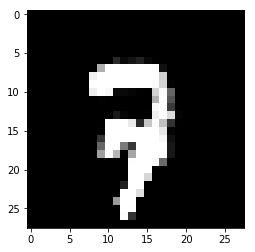

Loop: 620100, Generator_loss: -0.0048623, Discriminator_loss: -0.00059792
Loop: 620200, Generator_loss: -0.050602, Discriminator_loss: 0.0032564
Loop: 620300, Generator_loss: -0.047634, Discriminator_loss: 0.011929
Loop: 620400, Generator_loss: -0.015394, Discriminator_loss: 0.0027052
Loop: 620500, Generator_loss: -0.05224, Discriminator_loss: 0.0017692
Loop: 620600, Generator_loss: 0.013416, Discriminator_loss: 0.0025604
Loop: 620700, Generator_loss: -0.015279, Discriminator_loss: 0.0036155
Loop: 620800, Generator_loss: 0.00055617, Discriminator_loss: 0.002286
Loop: 620900, Generator_loss: 0.0029601, Discriminator_loss: 0.0066264
Loop: 621000, Generator_loss: -0.027777, Discriminator_loss: -0.0022887


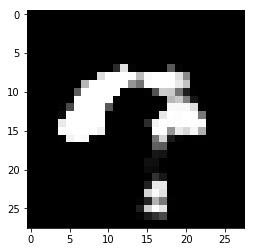

Loop: 621100, Generator_loss: 0.017834, Discriminator_loss: 0.0027113
Loop: 621200, Generator_loss: 0.011486, Discriminator_loss: 0.0031216
Loop: 621300, Generator_loss: 0.0035916, Discriminator_loss: 0.0033645
Loop: 621400, Generator_loss: -0.0093725, Discriminator_loss: 0.010729
Loop: 621500, Generator_loss: -0.054379, Discriminator_loss: 0.0075011
Loop: 621600, Generator_loss: -0.0051405, Discriminator_loss: 0.000537
Loop: 621700, Generator_loss: 0.0099567, Discriminator_loss: 0.0021204
Loop: 621800, Generator_loss: -0.02523, Discriminator_loss: -0.00083877
Loop: 621900, Generator_loss: -0.044317, Discriminator_loss: 0.0085701
Loop: 622000, Generator_loss: -0.048786, Discriminator_loss: -0.0097661


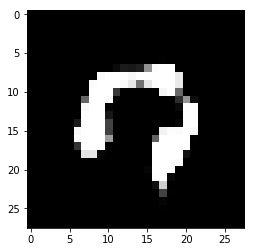

Loop: 622100, Generator_loss: -0.041445, Discriminator_loss: 0.007465
Loop: 622200, Generator_loss: 0.0078089, Discriminator_loss: 0.0028021
Loop: 622300, Generator_loss: 0.0039897, Discriminator_loss: 0.0078174
Loop: 622400, Generator_loss: -0.0061035, Discriminator_loss: 0.0024663
Loop: 622500, Generator_loss: -0.018696, Discriminator_loss: -0.0014295
Loop: 622600, Generator_loss: 0.014823, Discriminator_loss: 0.0050495
Loop: 622700, Generator_loss: -0.01319, Discriminator_loss: 0.004875
Loop: 622800, Generator_loss: 0.0076933, Discriminator_loss: 0.005564
Loop: 622900, Generator_loss: -0.0428, Discriminator_loss: -0.0033699
Loop: 623000, Generator_loss: -0.023944, Discriminator_loss: 0.0042596


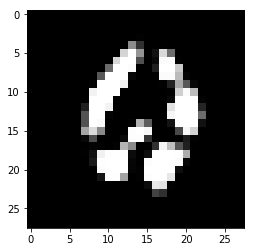

Loop: 623100, Generator_loss: -0.026253, Discriminator_loss: 0.0068272
Loop: 623200, Generator_loss: -0.014902, Discriminator_loss: 0.0074896
Loop: 623300, Generator_loss: -0.00021382, Discriminator_loss: 0.0026679
Loop: 623400, Generator_loss: -0.016347, Discriminator_loss: -0.00077236
Loop: 623500, Generator_loss: -0.019741, Discriminator_loss: 0.0069393
Loop: 623600, Generator_loss: 0.0068283, Discriminator_loss: 0.0066844
Loop: 623700, Generator_loss: 0.033506, Discriminator_loss: -0.00083059
Loop: 623800, Generator_loss: 0.044933, Discriminator_loss: 0.0036713
Loop: 623900, Generator_loss: -0.027444, Discriminator_loss: -0.004826
Loop: 624000, Generator_loss: -0.022501, Discriminator_loss: 0.0041032


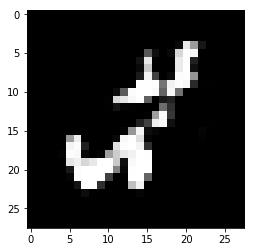

Loop: 624100, Generator_loss: 0.048611, Discriminator_loss: 0.0091963
Loop: 624200, Generator_loss: -0.021517, Discriminator_loss: 0.0019057
Loop: 624300, Generator_loss: -0.010345, Discriminator_loss: -0.0046017
Loop: 624400, Generator_loss: -0.0090349, Discriminator_loss: 0.0015477
Loop: 624500, Generator_loss: 0.03712, Discriminator_loss: -0.0018894
Loop: 624600, Generator_loss: -0.025091, Discriminator_loss: 0.0051409
Loop: 624700, Generator_loss: -0.011353, Discriminator_loss: -0.0033564
Loop: 624800, Generator_loss: -0.031658, Discriminator_loss: -8.2519e-05
Loop: 624900, Generator_loss: -0.020216, Discriminator_loss: 0.0023459
Loop: 625000, Generator_loss: -0.016491, Discriminator_loss: -0.0044357


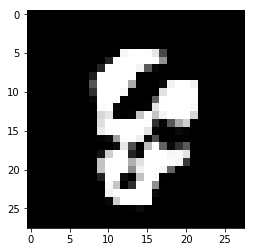

Loop: 625100, Generator_loss: 0.021938, Discriminator_loss: 0.0071049
Loop: 625200, Generator_loss: 0.010312, Discriminator_loss: 0.0010649
Loop: 625300, Generator_loss: 0.015989, Discriminator_loss: -0.00073515
Loop: 625400, Generator_loss: -0.067277, Discriminator_loss: 0.0018881
Loop: 625500, Generator_loss: 0.009073, Discriminator_loss: 0.0015169
Loop: 625600, Generator_loss: -0.0046684, Discriminator_loss: 0.008659
Loop: 625700, Generator_loss: 0.020416, Discriminator_loss: 0.0023857
Loop: 625800, Generator_loss: -0.0305, Discriminator_loss: -0.0041537
Loop: 625900, Generator_loss: -0.046062, Discriminator_loss: 0.0055861
Loop: 626000, Generator_loss: -0.050426, Discriminator_loss: 0.0082318


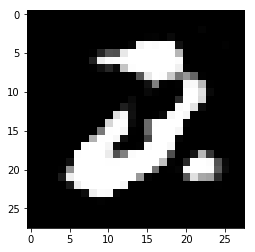

Loop: 626100, Generator_loss: 0.018494, Discriminator_loss: 8.2977e-05
Loop: 626200, Generator_loss: -0.017279, Discriminator_loss: 0.0012576
Loop: 626300, Generator_loss: -0.020085, Discriminator_loss: 0.0040404
Loop: 626400, Generator_loss: -0.029343, Discriminator_loss: 0.0018958
Loop: 626500, Generator_loss: -0.018172, Discriminator_loss: 0.0063595
Loop: 626600, Generator_loss: 0.022316, Discriminator_loss: 0.0012898
Loop: 626700, Generator_loss: 0.02592, Discriminator_loss: 0.00074462
Loop: 626800, Generator_loss: -0.021758, Discriminator_loss: 0.0020129
Loop: 626900, Generator_loss: -0.017321, Discriminator_loss: -0.0020081
Loop: 627000, Generator_loss: 0.011479, Discriminator_loss: -0.0019511


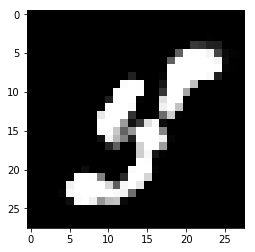

Loop: 627100, Generator_loss: 0.0049962, Discriminator_loss: 0.012151
Loop: 627200, Generator_loss: 0.0053887, Discriminator_loss: -8.7345e-05
Loop: 627300, Generator_loss: -0.020933, Discriminator_loss: 0.0055181
Loop: 627400, Generator_loss: 0.037649, Discriminator_loss: 0.0028018
Loop: 627500, Generator_loss: 0.00584, Discriminator_loss: 0.0081307
Loop: 627600, Generator_loss: 0.023149, Discriminator_loss: 0.011374
Loop: 627700, Generator_loss: -0.035275, Discriminator_loss: 0.0059995
Loop: 627800, Generator_loss: 0.041211, Discriminator_loss: 0.0039968
Loop: 627900, Generator_loss: 0.013138, Discriminator_loss: 0.0064714
Loop: 628000, Generator_loss: -0.053913, Discriminator_loss: -0.0017357


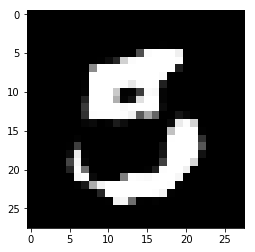

Loop: 628100, Generator_loss: 0.0060691, Discriminator_loss: 0.0080525
Loop: 628200, Generator_loss: 0.013272, Discriminator_loss: 0.0019834
Loop: 628300, Generator_loss: -0.0027059, Discriminator_loss: 0.0014655
Loop: 628400, Generator_loss: 0.012459, Discriminator_loss: -0.00050248
Loop: 628500, Generator_loss: 0.047934, Discriminator_loss: 0.0001186
Loop: 628600, Generator_loss: 0.041601, Discriminator_loss: 0.010617
Loop: 628700, Generator_loss: 0.009207, Discriminator_loss: 0.0027199
Loop: 628800, Generator_loss: -0.019189, Discriminator_loss: -0.0017815
Loop: 628900, Generator_loss: -0.039133, Discriminator_loss: 0.0014676
Loop: 629000, Generator_loss: -0.027174, Discriminator_loss: -0.0035826


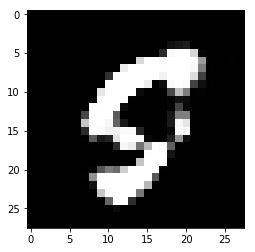

Loop: 629100, Generator_loss: -0.0070793, Discriminator_loss: -0.0014117
Loop: 629200, Generator_loss: 0.032219, Discriminator_loss: 0.0014757
Loop: 629300, Generator_loss: 0.017625, Discriminator_loss: 0.0034779
Loop: 629400, Generator_loss: 0.066106, Discriminator_loss: 0.011967
Loop: 629500, Generator_loss: 0.044046, Discriminator_loss: -0.0018717
Loop: 629600, Generator_loss: -0.042438, Discriminator_loss: 0.011355
Loop: 629700, Generator_loss: 0.0047152, Discriminator_loss: 0.0065423
Loop: 629800, Generator_loss: -0.0066185, Discriminator_loss: 0.0026448
Loop: 629900, Generator_loss: 0.028586, Discriminator_loss: -0.00013784
Loop: 630000, Generator_loss: 0.0096083, Discriminator_loss: 0.002023


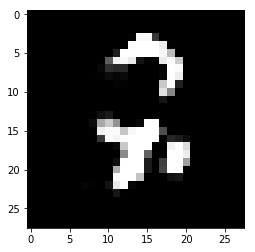

Loop: 630100, Generator_loss: -0.0039225, Discriminator_loss: -0.00058036
Loop: 630200, Generator_loss: -0.050055, Discriminator_loss: -0.0014735
Loop: 630300, Generator_loss: -0.01263, Discriminator_loss: 0.0068565
Loop: 630400, Generator_loss: -0.015174, Discriminator_loss: 0.00876
Loop: 630500, Generator_loss: -0.036473, Discriminator_loss: 0.0067795
Loop: 630600, Generator_loss: -0.036013, Discriminator_loss: 0.00063856
Loop: 630700, Generator_loss: 0.0090789, Discriminator_loss: -0.00071124
Loop: 630800, Generator_loss: 0.048205, Discriminator_loss: 0.0035547
Loop: 630900, Generator_loss: -0.035768, Discriminator_loss: -0.0090375
Loop: 631000, Generator_loss: 0.0081154, Discriminator_loss: 0.00074701


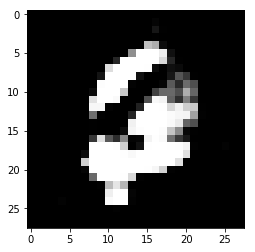

Loop: 631100, Generator_loss: 0.025976, Discriminator_loss: -0.00076808
Loop: 631200, Generator_loss: 0.03634, Discriminator_loss: 0.0058924
Loop: 631300, Generator_loss: -0.033948, Discriminator_loss: 0.0015178
Loop: 631400, Generator_loss: -0.0037713, Discriminator_loss: 0.0021451
Loop: 631500, Generator_loss: -0.025845, Discriminator_loss: 0.0043055
Loop: 631600, Generator_loss: 0.033386, Discriminator_loss: 0.0033996
Loop: 631700, Generator_loss: 0.016214, Discriminator_loss: 0.0024003
Loop: 631800, Generator_loss: -0.0057062, Discriminator_loss: -0.0029078
Loop: 631900, Generator_loss: 0.010628, Discriminator_loss: -0.0018823
Loop: 632000, Generator_loss: -0.0027761, Discriminator_loss: 0.0041663


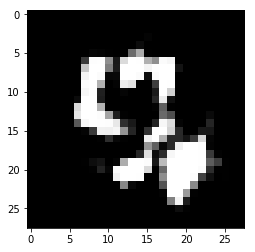

Loop: 632100, Generator_loss: -0.027972, Discriminator_loss: 0.00029767
Loop: 632200, Generator_loss: 0.011767, Discriminator_loss: 0.0013322
Loop: 632300, Generator_loss: -0.020344, Discriminator_loss: 0.00015612
Loop: 632400, Generator_loss: -0.030692, Discriminator_loss: -0.0034663
Loop: 632500, Generator_loss: -0.047337, Discriminator_loss: -0.0017519
Loop: 632600, Generator_loss: -0.031056, Discriminator_loss: 0.00042142
Loop: 632700, Generator_loss: 0.00089542, Discriminator_loss: -0.0049924
Loop: 632800, Generator_loss: -0.041059, Discriminator_loss: 0.0018891
Loop: 632900, Generator_loss: -0.0018585, Discriminator_loss: 0.0038722
Loop: 633000, Generator_loss: -0.038231, Discriminator_loss: -0.0038756


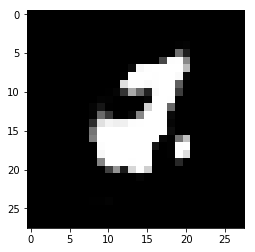

Loop: 633100, Generator_loss: 0.037758, Discriminator_loss: 0.0015918
Loop: 633200, Generator_loss: -0.038599, Discriminator_loss: 0.00073727
Loop: 633300, Generator_loss: 0.01033, Discriminator_loss: -0.0035798
Loop: 633400, Generator_loss: -0.03723, Discriminator_loss: 0.0019871
Loop: 633500, Generator_loss: 0.033669, Discriminator_loss: 0.0023465
Loop: 633600, Generator_loss: -0.071601, Discriminator_loss: 0.0014481
Loop: 633700, Generator_loss: 0.0048039, Discriminator_loss: 0.0067983
Loop: 633800, Generator_loss: 0.019016, Discriminator_loss: 0.0032413
Loop: 633900, Generator_loss: -0.016786, Discriminator_loss: 0.002867
Loop: 634000, Generator_loss: -0.037552, Discriminator_loss: 0.0023274


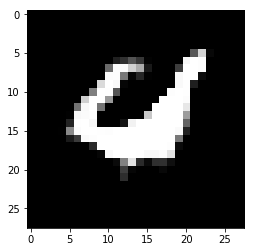

Loop: 634100, Generator_loss: 0.068322, Discriminator_loss: 0.0058727
Loop: 634200, Generator_loss: 0.0089015, Discriminator_loss: 0.0034546
Loop: 634300, Generator_loss: 0.0051432, Discriminator_loss: 0.0072328
Loop: 634400, Generator_loss: 0.025056, Discriminator_loss: 0.0035155
Loop: 634500, Generator_loss: -0.022351, Discriminator_loss: -0.0011865
Loop: 634600, Generator_loss: 0.011351, Discriminator_loss: 0.00666
Loop: 634700, Generator_loss: -0.040194, Discriminator_loss: 0.0076892
Loop: 634800, Generator_loss: -0.039586, Discriminator_loss: 0.0012031
Loop: 634900, Generator_loss: 0.04857, Discriminator_loss: 0.0087932
Loop: 635000, Generator_loss: -0.013495, Discriminator_loss: -0.0011788


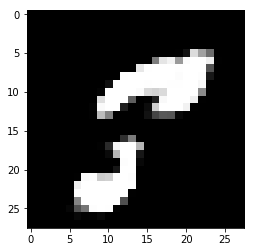

Loop: 635100, Generator_loss: -0.028983, Discriminator_loss: 0.0007022
Loop: 635200, Generator_loss: -0.010164, Discriminator_loss: 0.0021593
Loop: 635300, Generator_loss: 0.0002008, Discriminator_loss: -0.00040131
Loop: 635400, Generator_loss: 0.00088748, Discriminator_loss: 0.0034753
Loop: 635500, Generator_loss: 0.017224, Discriminator_loss: 0.0046157
Loop: 635600, Generator_loss: 0.064094, Discriminator_loss: -0.0031146
Loop: 635700, Generator_loss: 0.0037785, Discriminator_loss: 0.0059844
Loop: 635800, Generator_loss: -0.014221, Discriminator_loss: 0.0026241
Loop: 635900, Generator_loss: 0.031321, Discriminator_loss: -0.0027475
Loop: 636000, Generator_loss: 0.014797, Discriminator_loss: 0.0048989


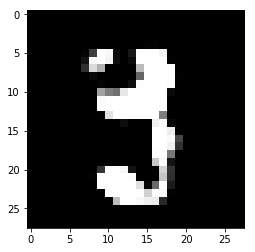

Loop: 636100, Generator_loss: 0.0066381, Discriminator_loss: 0.0012343
Loop: 636200, Generator_loss: 0.014617, Discriminator_loss: 0.00097063
Loop: 636300, Generator_loss: 0.012539, Discriminator_loss: 0.0025141
Loop: 636400, Generator_loss: 0.038963, Discriminator_loss: -0.002478
Loop: 636500, Generator_loss: -0.006598, Discriminator_loss: 0.0040694
Loop: 636600, Generator_loss: 0.022184, Discriminator_loss: 0.0055326
Loop: 636700, Generator_loss: -0.050503, Discriminator_loss: 0.0071643
Loop: 636800, Generator_loss: -0.019157, Discriminator_loss: 0.0050306
Loop: 636900, Generator_loss: -0.087539, Discriminator_loss: -0.0039592
Loop: 637000, Generator_loss: -0.038634, Discriminator_loss: 0.0042478


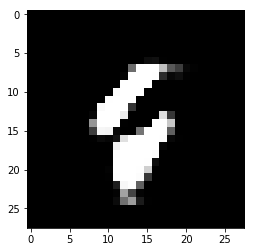

Loop: 637100, Generator_loss: -0.010005, Discriminator_loss: 0.0020635
Loop: 637200, Generator_loss: -0.0020679, Discriminator_loss: 0.0012401
Loop: 637300, Generator_loss: 0.033548, Discriminator_loss: -0.00026951
Loop: 637400, Generator_loss: 0.0021832, Discriminator_loss: -0.0053559
Loop: 637500, Generator_loss: -0.002917, Discriminator_loss: 0.0006966
Loop: 637600, Generator_loss: 0.010039, Discriminator_loss: -0.0049883
Loop: 637700, Generator_loss: 0.012975, Discriminator_loss: -6.7748e-05
Loop: 637800, Generator_loss: 0.0098091, Discriminator_loss: 0.0012774
Loop: 637900, Generator_loss: -0.004301, Discriminator_loss: 0.0031921
Loop: 638000, Generator_loss: 0.03298, Discriminator_loss: -0.0044078


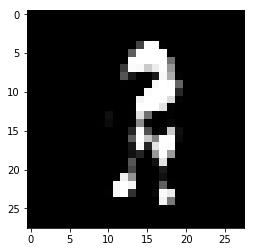

Loop: 638100, Generator_loss: -0.01692, Discriminator_loss: -0.0024871
Loop: 638200, Generator_loss: -0.034859, Discriminator_loss: 0.0035064
Loop: 638300, Generator_loss: 0.012619, Discriminator_loss: 0.0042424
Loop: 638400, Generator_loss: -0.012273, Discriminator_loss: -0.00028702
Loop: 638500, Generator_loss: -0.022466, Discriminator_loss: 0.0010437
Loop: 638600, Generator_loss: 0.013744, Discriminator_loss: 0.0030529
Loop: 638700, Generator_loss: 0.00018719, Discriminator_loss: -0.0043103
Loop: 638800, Generator_loss: -0.0046516, Discriminator_loss: 0.0029834
Loop: 638900, Generator_loss: 0.021084, Discriminator_loss: 0.00034134
Loop: 639000, Generator_loss: -0.042833, Discriminator_loss: 0.0053225


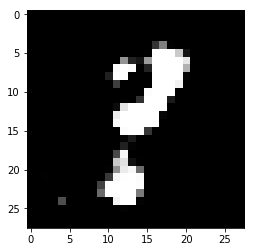

Loop: 639100, Generator_loss: 0.040072, Discriminator_loss: 0.0051085
Loop: 639200, Generator_loss: 0.007901, Discriminator_loss: 0.00063837
Loop: 639300, Generator_loss: -0.017421, Discriminator_loss: 0.0010887
Loop: 639400, Generator_loss: 0.032411, Discriminator_loss: -0.0011607
Loop: 639500, Generator_loss: -0.00056126, Discriminator_loss: 0.0033839
Loop: 639600, Generator_loss: 0.012145, Discriminator_loss: 0.0024496
Loop: 639700, Generator_loss: 0.053001, Discriminator_loss: 0.0016127
Loop: 639800, Generator_loss: -0.0085277, Discriminator_loss: 0.001545
Loop: 639900, Generator_loss: -0.037628, Discriminator_loss: -0.0018496
Loop: 640000, Generator_loss: 0.035533, Discriminator_loss: 0.0048394


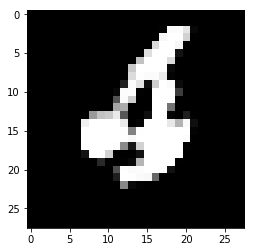

Loop: 640100, Generator_loss: 0.037217, Discriminator_loss: 0.0033969
Loop: 640200, Generator_loss: 0.038768, Discriminator_loss: 0.012189
Loop: 640300, Generator_loss: 0.052882, Discriminator_loss: -0.0019405
Loop: 640400, Generator_loss: 0.0094711, Discriminator_loss: -0.00077582
Loop: 640500, Generator_loss: 0.015057, Discriminator_loss: 0.0059397
Loop: 640600, Generator_loss: -0.00098037, Discriminator_loss: 0.012487
Loop: 640700, Generator_loss: -0.001811, Discriminator_loss: 0.0002142
Loop: 640800, Generator_loss: -0.0322, Discriminator_loss: 0.001378
Loop: 640900, Generator_loss: -0.054534, Discriminator_loss: -0.0017107
Loop: 641000, Generator_loss: 0.033783, Discriminator_loss: 0.0054424


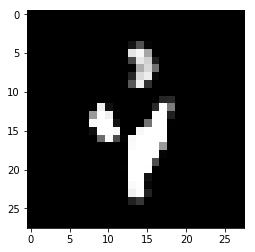

Loop: 641100, Generator_loss: -0.0054934, Discriminator_loss: 0.0077936
Loop: 641200, Generator_loss: 0.0029602, Discriminator_loss: -0.0035874
Loop: 641300, Generator_loss: -0.031749, Discriminator_loss: -0.0026604
Loop: 641400, Generator_loss: -0.048458, Discriminator_loss: -0.0015782
Loop: 641500, Generator_loss: 0.0013136, Discriminator_loss: 0.0003787
Loop: 641600, Generator_loss: -0.0052952, Discriminator_loss: 0.0043636
Loop: 641700, Generator_loss: -0.035293, Discriminator_loss: 0.0026413
Loop: 641800, Generator_loss: -0.058964, Discriminator_loss: 0.0070336
Loop: 641900, Generator_loss: -0.029049, Discriminator_loss: -0.0021821
Loop: 642000, Generator_loss: 0.015401, Discriminator_loss: 0.0028634


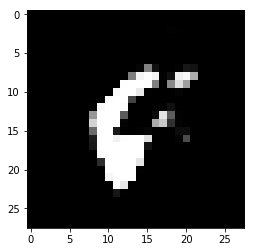

Loop: 642100, Generator_loss: 0.0056952, Discriminator_loss: 0.0043756
Loop: 642200, Generator_loss: -0.016505, Discriminator_loss: 0.0090911
Loop: 642300, Generator_loss: -0.054144, Discriminator_loss: 0.00082095
Loop: 642400, Generator_loss: -0.047785, Discriminator_loss: 0.0017937
Loop: 642500, Generator_loss: 0.0089149, Discriminator_loss: 0.0044065
Loop: 642600, Generator_loss: 0.046663, Discriminator_loss: 0.0046209
Loop: 642700, Generator_loss: -0.021177, Discriminator_loss: 0.0030915
Loop: 642800, Generator_loss: -0.0021418, Discriminator_loss: 0.0040112
Loop: 642900, Generator_loss: 0.0080073, Discriminator_loss: 0.0074507
Loop: 643000, Generator_loss: -0.0059942, Discriminator_loss: 0.00109


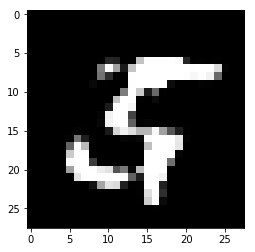

Loop: 643100, Generator_loss: 0.017384, Discriminator_loss: 0.0035436
Loop: 643200, Generator_loss: 0.017898, Discriminator_loss: 0.0025799
Loop: 643300, Generator_loss: -0.012486, Discriminator_loss: 0.00068645
Loop: 643400, Generator_loss: -0.028825, Discriminator_loss: 0.0020169
Loop: 643500, Generator_loss: -0.053513, Discriminator_loss: -0.001598
Loop: 643600, Generator_loss: 0.0059988, Discriminator_loss: 0.0022647
Loop: 643700, Generator_loss: -0.01862, Discriminator_loss: 0.0046069
Loop: 643800, Generator_loss: -0.024551, Discriminator_loss: 0.0010229
Loop: 643900, Generator_loss: -0.022793, Discriminator_loss: 0.0090111
Loop: 644000, Generator_loss: -0.019567, Discriminator_loss: 0.0011397


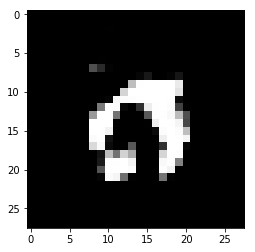

Loop: 644100, Generator_loss: 0.024733, Discriminator_loss: -0.00050131
Loop: 644200, Generator_loss: 0.026462, Discriminator_loss: -0.001304
Loop: 644300, Generator_loss: -0.022295, Discriminator_loss: 0.0060921
Loop: 644400, Generator_loss: -0.01952, Discriminator_loss: 0.0017277
Loop: 644500, Generator_loss: -0.04798, Discriminator_loss: 0.00038873
Loop: 644600, Generator_loss: 0.010151, Discriminator_loss: 0.0028501
Loop: 644700, Generator_loss: -0.03117, Discriminator_loss: 0.0027523
Loop: 644800, Generator_loss: 0.066486, Discriminator_loss: 0.013632
Loop: 644900, Generator_loss: 0.022231, Discriminator_loss: 0.0074384
Loop: 645000, Generator_loss: 0.019327, Discriminator_loss: 0.0042559


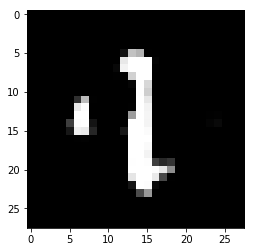

Loop: 645100, Generator_loss: 0.055185, Discriminator_loss: -0.00022119
Loop: 645200, Generator_loss: 0.0019545, Discriminator_loss: -0.0027016
Loop: 645300, Generator_loss: -0.036292, Discriminator_loss: -0.0018682
Loop: 645400, Generator_loss: -0.0075624, Discriminator_loss: 6.1291e-05
Loop: 645500, Generator_loss: 0.019488, Discriminator_loss: 0.0042928
Loop: 645600, Generator_loss: 0.024834, Discriminator_loss: -0.0061451
Loop: 645700, Generator_loss: 0.032034, Discriminator_loss: 0.0072201
Loop: 645800, Generator_loss: 0.011145, Discriminator_loss: 0.0013273
Loop: 645900, Generator_loss: -0.011886, Discriminator_loss: 0.00019965
Loop: 646000, Generator_loss: 0.0032078, Discriminator_loss: 0.0034478


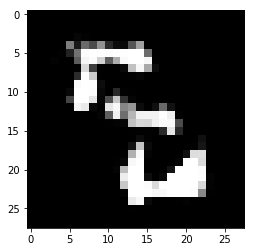

Loop: 646100, Generator_loss: -0.02607, Discriminator_loss: 0.003479
Loop: 646200, Generator_loss: -0.030588, Discriminator_loss: 0.00073958
Loop: 646300, Generator_loss: -0.022442, Discriminator_loss: -0.00024242
Loop: 646400, Generator_loss: -0.0077301, Discriminator_loss: 0.0057077
Loop: 646500, Generator_loss: -0.012229, Discriminator_loss: 0.0063986
Loop: 646600, Generator_loss: -0.020904, Discriminator_loss: 0.00022469
Loop: 646700, Generator_loss: 0.036401, Discriminator_loss: -0.0061173
Loop: 646800, Generator_loss: -0.049189, Discriminator_loss: 0.0065067
Loop: 646900, Generator_loss: -0.00016095, Discriminator_loss: 0.0014325
Loop: 647000, Generator_loss: 0.041134, Discriminator_loss: 0.0086494


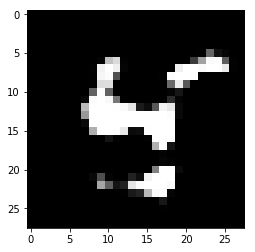

Loop: 647100, Generator_loss: 0.034263, Discriminator_loss: 0.0032166
Loop: 647200, Generator_loss: -0.0016362, Discriminator_loss: 0.0043626
Loop: 647300, Generator_loss: 0.006482, Discriminator_loss: -0.0040541
Loop: 647400, Generator_loss: 0.043145, Discriminator_loss: 0.010487
Loop: 647500, Generator_loss: -0.016555, Discriminator_loss: -0.0027989
Loop: 647600, Generator_loss: -0.0041355, Discriminator_loss: -0.0035688
Loop: 647700, Generator_loss: 0.0065722, Discriminator_loss: 0.0055117
Loop: 647800, Generator_loss: 0.028209, Discriminator_loss: -0.001398
Loop: 647900, Generator_loss: 0.019302, Discriminator_loss: 0.0067618
Loop: 648000, Generator_loss: 0.011179, Discriminator_loss: 0.0058262


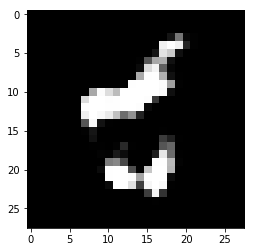

Loop: 648100, Generator_loss: -0.061008, Discriminator_loss: 0.0056293
Loop: 648200, Generator_loss: -0.033734, Discriminator_loss: 0.0022661
Loop: 648300, Generator_loss: -0.033078, Discriminator_loss: 0.0019653
Loop: 648400, Generator_loss: -0.077276, Discriminator_loss: 0.014941
Loop: 648500, Generator_loss: -0.045272, Discriminator_loss: 0.0023406
Loop: 648600, Generator_loss: -0.0043587, Discriminator_loss: -0.0018336
Loop: 648700, Generator_loss: 0.026912, Discriminator_loss: 0.005319
Loop: 648800, Generator_loss: -0.068439, Discriminator_loss: 0.0050878
Loop: 648900, Generator_loss: -0.051625, Discriminator_loss: -0.001099
Loop: 649000, Generator_loss: -0.043592, Discriminator_loss: 0.0077621


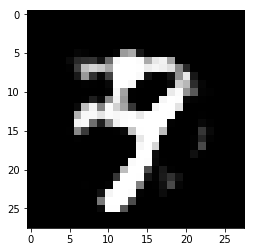

Loop: 649100, Generator_loss: -0.020867, Discriminator_loss: 0.0075513
Loop: 649200, Generator_loss: -0.034169, Discriminator_loss: 0.00012299
Loop: 649300, Generator_loss: -0.01477, Discriminator_loss: -0.00083452
Loop: 649400, Generator_loss: -0.023429, Discriminator_loss: 0.0046439
Loop: 649500, Generator_loss: -0.0029036, Discriminator_loss: 0.0067287
Loop: 649600, Generator_loss: 0.0048335, Discriminator_loss: 0.00077587
Loop: 649700, Generator_loss: -0.0037888, Discriminator_loss: -0.00072868
Loop: 649800, Generator_loss: 0.016353, Discriminator_loss: 0.0041253
Loop: 649900, Generator_loss: -0.012774, Discriminator_loss: -0.00025161
Loop: 650000, Generator_loss: 0.02207, Discriminator_loss: 0.0045685


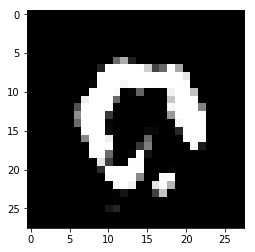

Loop: 650100, Generator_loss: -0.0017748, Discriminator_loss: 0.0047903
Loop: 650200, Generator_loss: -0.0064095, Discriminator_loss: 0.0031393
Loop: 650300, Generator_loss: 0.0088052, Discriminator_loss: 0.00095108
Loop: 650400, Generator_loss: 0.032774, Discriminator_loss: -0.0034968
Loop: 650500, Generator_loss: -0.004392, Discriminator_loss: 0.0043926
Loop: 650600, Generator_loss: -0.0056271, Discriminator_loss: 0.00469
Loop: 650700, Generator_loss: -0.0051564, Discriminator_loss: 0.0055278
Loop: 650800, Generator_loss: 0.0012807, Discriminator_loss: 0.0010404
Loop: 650900, Generator_loss: -0.030065, Discriminator_loss: 0.0087082
Loop: 651000, Generator_loss: 0.032261, Discriminator_loss: 0.0012586


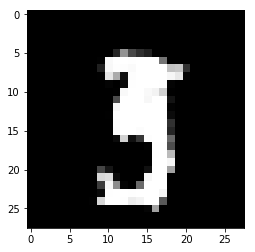

Loop: 651100, Generator_loss: 0.03955, Discriminator_loss: 0.0069201
Loop: 651200, Generator_loss: -0.0055124, Discriminator_loss: -7.668e-05
Loop: 651300, Generator_loss: 0.044642, Discriminator_loss: -0.00082286
Loop: 651400, Generator_loss: 0.0018168, Discriminator_loss: -0.00080484
Loop: 651500, Generator_loss: -0.016241, Discriminator_loss: 0.0043817
Loop: 651600, Generator_loss: -0.0049083, Discriminator_loss: -0.00056844
Loop: 651700, Generator_loss: -0.042488, Discriminator_loss: -0.0039407
Loop: 651800, Generator_loss: 0.00055237, Discriminator_loss: -0.0017237
Loop: 651900, Generator_loss: -0.0015165, Discriminator_loss: 0.0031353
Loop: 652000, Generator_loss: -0.0048156, Discriminator_loss: 0.0018113


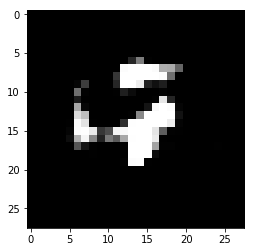

Loop: 652100, Generator_loss: 0.0068672, Discriminator_loss: 0.0057918
Loop: 652200, Generator_loss: 0.017309, Discriminator_loss: 0.0031182
Loop: 652300, Generator_loss: 0.014397, Discriminator_loss: 0.0074766
Loop: 652400, Generator_loss: 0.024817, Discriminator_loss: -0.0042165
Loop: 652500, Generator_loss: 0.0068167, Discriminator_loss: 3.8813e-05
Loop: 652600, Generator_loss: -0.041459, Discriminator_loss: -0.0045865
Loop: 652700, Generator_loss: -0.03211, Discriminator_loss: 0.0024573
Loop: 652800, Generator_loss: -0.007034, Discriminator_loss: 0.0045972
Loop: 652900, Generator_loss: -0.020804, Discriminator_loss: 0.0033104
Loop: 653000, Generator_loss: -0.013068, Discriminator_loss: 0.00055435


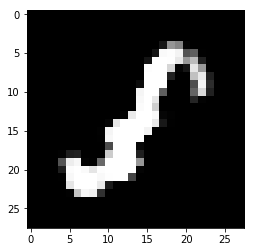

Loop: 653100, Generator_loss: -0.020371, Discriminator_loss: 0.011667
Loop: 653200, Generator_loss: -0.0132, Discriminator_loss: -0.0054475
Loop: 653300, Generator_loss: -0.029345, Discriminator_loss: 0.0065404
Loop: 653400, Generator_loss: 0.013627, Discriminator_loss: 0.0046916
Loop: 653500, Generator_loss: -0.050832, Discriminator_loss: 0.0076828
Loop: 653600, Generator_loss: -0.016439, Discriminator_loss: 0.0079071
Loop: 653700, Generator_loss: -0.028054, Discriminator_loss: 0.0031057
Loop: 653800, Generator_loss: 0.021506, Discriminator_loss: 0.00070195
Loop: 653900, Generator_loss: -0.0087205, Discriminator_loss: 0.0010588
Loop: 654000, Generator_loss: 0.026342, Discriminator_loss: 0.0067755


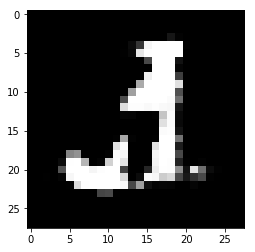

Loop: 654100, Generator_loss: -0.024337, Discriminator_loss: -0.0015392
Loop: 654200, Generator_loss: -0.037593, Discriminator_loss: 0.0039799
Loop: 654300, Generator_loss: -0.00123, Discriminator_loss: 0.00024606
Loop: 654400, Generator_loss: 0.013745, Discriminator_loss: 0.0026716
Loop: 654500, Generator_loss: -0.050911, Discriminator_loss: 0.0087479
Loop: 654600, Generator_loss: 0.059141, Discriminator_loss: 0.010613
Loop: 654700, Generator_loss: 0.060498, Discriminator_loss: 0.0091048
Loop: 654800, Generator_loss: -0.0077235, Discriminator_loss: 0.0041266
Loop: 654900, Generator_loss: 6.0668e-05, Discriminator_loss: -0.00031961
Loop: 655000, Generator_loss: -0.037613, Discriminator_loss: 0.0073773


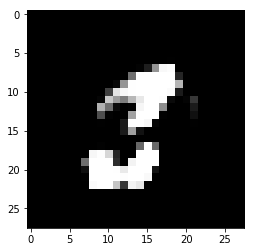

Loop: 655100, Generator_loss: 0.046419, Discriminator_loss: 0.0076995
Loop: 655200, Generator_loss: 0.011693, Discriminator_loss: 0.0088169
Loop: 655300, Generator_loss: -0.0013349, Discriminator_loss: 0.00055361
Loop: 655400, Generator_loss: 0.031179, Discriminator_loss: 0.010587
Loop: 655500, Generator_loss: 0.027258, Discriminator_loss: -0.00082765
Loop: 655600, Generator_loss: -0.019278, Discriminator_loss: -0.00063643
Loop: 655700, Generator_loss: 0.010016, Discriminator_loss: 0.0039855
Loop: 655800, Generator_loss: -0.015257, Discriminator_loss: 0.0060885
Loop: 655900, Generator_loss: -0.024404, Discriminator_loss: 0.0068189
Loop: 656000, Generator_loss: -0.013638, Discriminator_loss: 0.0015572


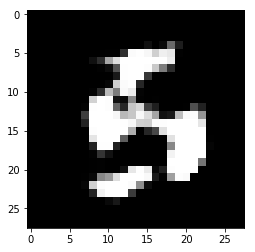

Loop: 656100, Generator_loss: -0.036539, Discriminator_loss: -0.0045152
Loop: 656200, Generator_loss: -0.051312, Discriminator_loss: 0.0093696
Loop: 656300, Generator_loss: 0.010549, Discriminator_loss: 0.0040585
Loop: 656400, Generator_loss: 0.024157, Discriminator_loss: 0.0071948
Loop: 656500, Generator_loss: 0.010144, Discriminator_loss: -0.0054986
Loop: 656600, Generator_loss: -0.0040559, Discriminator_loss: 0.010896
Loop: 656700, Generator_loss: 0.0076979, Discriminator_loss: 0.0071651
Loop: 656800, Generator_loss: -0.021955, Discriminator_loss: 0.005311
Loop: 656900, Generator_loss: -0.00029191, Discriminator_loss: 0.0065528
Loop: 657000, Generator_loss: 0.018204, Discriminator_loss: 0.0020805


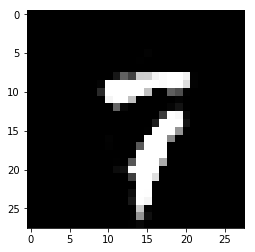

Loop: 657100, Generator_loss: -0.0093907, Discriminator_loss: 0.0071273
Loop: 657200, Generator_loss: -0.025947, Discriminator_loss: -0.0012939
Loop: 657300, Generator_loss: -0.039253, Discriminator_loss: 0.00017925
Loop: 657400, Generator_loss: -0.019116, Discriminator_loss: 0.0087565
Loop: 657500, Generator_loss: -0.01835, Discriminator_loss: 0.0030121
Loop: 657600, Generator_loss: -0.014192, Discriminator_loss: 0.0010072
Loop: 657700, Generator_loss: -0.021198, Discriminator_loss: -0.0036823
Loop: 657800, Generator_loss: 0.013662, Discriminator_loss: 0.0024684
Loop: 657900, Generator_loss: -0.0469, Discriminator_loss: 0.010691
Loop: 658000, Generator_loss: -0.0029828, Discriminator_loss: 0.003878


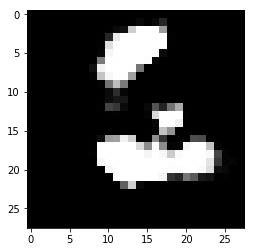

Loop: 658100, Generator_loss: -0.071963, Discriminator_loss: 0.0094957
Loop: 658200, Generator_loss: -0.0086728, Discriminator_loss: 0.00080977
Loop: 658300, Generator_loss: -0.01101, Discriminator_loss: 0.0025276
Loop: 658400, Generator_loss: 0.013967, Discriminator_loss: 0.0057046
Loop: 658500, Generator_loss: -0.058326, Discriminator_loss: 0.0044238
Loop: 658600, Generator_loss: -0.02019, Discriminator_loss: 0.0062585
Loop: 658700, Generator_loss: -0.010079, Discriminator_loss: 0.00028583
Loop: 658800, Generator_loss: -0.025934, Discriminator_loss: -0.00090373
Loop: 658900, Generator_loss: 0.019888, Discriminator_loss: 0.0027244
Loop: 659000, Generator_loss: -0.016424, Discriminator_loss: 0.0053781


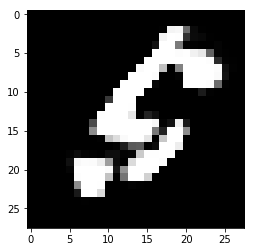

Loop: 659100, Generator_loss: 0.035788, Discriminator_loss: 0.0025228
Loop: 659200, Generator_loss: -0.0079386, Discriminator_loss: -0.0017967
Loop: 659300, Generator_loss: 0.00038271, Discriminator_loss: 0.0050316
Loop: 659400, Generator_loss: 0.0073415, Discriminator_loss: 0.0019382
Loop: 659500, Generator_loss: -0.023221, Discriminator_loss: -0.0033024
Loop: 659600, Generator_loss: -0.026674, Discriminator_loss: 0.0056963
Loop: 659700, Generator_loss: -0.021137, Discriminator_loss: 0.0003814
Loop: 659800, Generator_loss: -0.01351, Discriminator_loss: 0.0030945
Loop: 659900, Generator_loss: 0.015777, Discriminator_loss: 0.0029208
Loop: 660000, Generator_loss: -0.053319, Discriminator_loss: -0.0043369


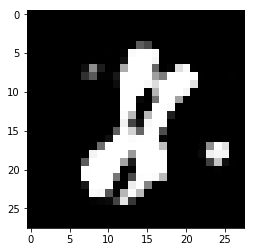

Loop: 660100, Generator_loss: 0.0013316, Discriminator_loss: 0.0078076
Loop: 660200, Generator_loss: 0.0056081, Discriminator_loss: 5.1085e-05
Loop: 660300, Generator_loss: 0.040362, Discriminator_loss: 0.0035531
Loop: 660400, Generator_loss: 0.017469, Discriminator_loss: 0.0011545
Loop: 660500, Generator_loss: 0.010012, Discriminator_loss: 0.00030361
Loop: 660600, Generator_loss: 0.026094, Discriminator_loss: 0.0069498
Loop: 660700, Generator_loss: -0.013816, Discriminator_loss: 0.0046368
Loop: 660800, Generator_loss: 0.023436, Discriminator_loss: 0.0035619
Loop: 660900, Generator_loss: 0.003882, Discriminator_loss: 0.003001
Loop: 661000, Generator_loss: -0.03066, Discriminator_loss: -5.8327e-05


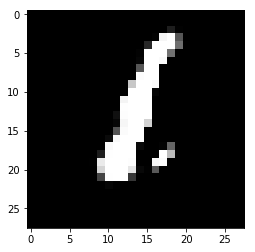

Loop: 661100, Generator_loss: -0.024438, Discriminator_loss: 0.00030509
Loop: 661200, Generator_loss: -0.018297, Discriminator_loss: 0.0053202
Loop: 661300, Generator_loss: -0.020643, Discriminator_loss: 0.0065364
Loop: 661400, Generator_loss: -0.0093882, Discriminator_loss: -0.0018384
Loop: 661500, Generator_loss: 0.03478, Discriminator_loss: -0.00062355
Loop: 661600, Generator_loss: 0.012844, Discriminator_loss: 0.0032553
Loop: 661700, Generator_loss: -0.053906, Discriminator_loss: -0.011154
Loop: 661800, Generator_loss: -0.0080727, Discriminator_loss: 0.0031293
Loop: 661900, Generator_loss: -0.025229, Discriminator_loss: -0.0018452
Loop: 662000, Generator_loss: -0.045646, Discriminator_loss: 0.005343


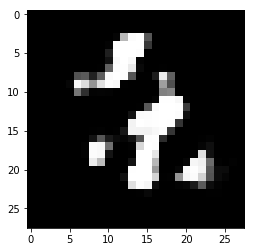

Loop: 662100, Generator_loss: -0.045276, Discriminator_loss: -0.0004384
Loop: 662200, Generator_loss: -0.048618, Discriminator_loss: 0.013036
Loop: 662300, Generator_loss: -0.047936, Discriminator_loss: -0.0038285
Loop: 662400, Generator_loss: -0.036789, Discriminator_loss: 0.0019698
Loop: 662500, Generator_loss: -0.021609, Discriminator_loss: -0.0049002
Loop: 662600, Generator_loss: -0.049183, Discriminator_loss: 0.0062853
Loop: 662700, Generator_loss: -0.035784, Discriminator_loss: 0.0038193
Loop: 662800, Generator_loss: 0.019399, Discriminator_loss: 0.00012132
Loop: 662900, Generator_loss: -0.061104, Discriminator_loss: 0.0014714
Loop: 663000, Generator_loss: 0.012532, Discriminator_loss: 0.0026607


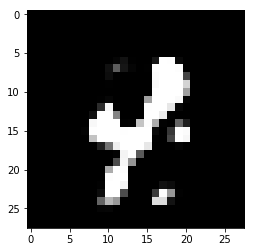

Loop: 663100, Generator_loss: 0.030039, Discriminator_loss: -0.0018374
Loop: 663200, Generator_loss: -0.0003445, Discriminator_loss: 0.0031659
Loop: 663300, Generator_loss: 0.0093842, Discriminator_loss: 0.012563
Loop: 663400, Generator_loss: 0.0048614, Discriminator_loss: -0.0026902
Loop: 663500, Generator_loss: 0.036084, Discriminator_loss: 0.0010569
Loop: 663600, Generator_loss: 0.0014327, Discriminator_loss: 0.0043262
Loop: 663700, Generator_loss: -0.0016736, Discriminator_loss: -0.0020402
Loop: 663800, Generator_loss: -0.0014128, Discriminator_loss: -0.010509
Loop: 663900, Generator_loss: 0.045662, Discriminator_loss: 0.00014997
Loop: 664000, Generator_loss: 0.077316, Discriminator_loss: -0.0097622


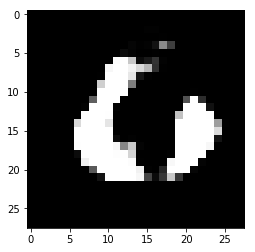

Loop: 664100, Generator_loss: -0.022195, Discriminator_loss: 0.00067677
Loop: 664200, Generator_loss: -0.028358, Discriminator_loss: 0.00058523
Loop: 664300, Generator_loss: 0.0028143, Discriminator_loss: 0.0011082
Loop: 664400, Generator_loss: -0.0088911, Discriminator_loss: -0.0061219
Loop: 664500, Generator_loss: -0.014257, Discriminator_loss: 0.0079391
Loop: 664600, Generator_loss: 0.018115, Discriminator_loss: 0.0041875
Loop: 664700, Generator_loss: -0.010352, Discriminator_loss: 0.0025559
Loop: 664800, Generator_loss: -0.029026, Discriminator_loss: 0.004226
Loop: 664900, Generator_loss: -0.0080327, Discriminator_loss: 0.0071343
Loop: 665000, Generator_loss: -0.029485, Discriminator_loss: 0.0091325


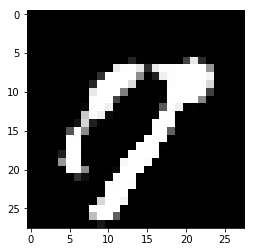

Loop: 665100, Generator_loss: 0.016678, Discriminator_loss: 0.002797
Loop: 665200, Generator_loss: 0.017926, Discriminator_loss: 0.0037533
Loop: 665300, Generator_loss: 0.057176, Discriminator_loss: 0.0028673
Loop: 665400, Generator_loss: 0.010868, Discriminator_loss: -0.0074633
Loop: 665500, Generator_loss: 0.0024618, Discriminator_loss: 0.00098889
Loop: 665600, Generator_loss: -0.026164, Discriminator_loss: 0.0051421
Loop: 665700, Generator_loss: -0.01644, Discriminator_loss: -0.00072493
Loop: 665800, Generator_loss: -0.010971, Discriminator_loss: 0.0042012
Loop: 665900, Generator_loss: -0.0014621, Discriminator_loss: 0.0076378
Loop: 666000, Generator_loss: 0.010928, Discriminator_loss: -0.00055814


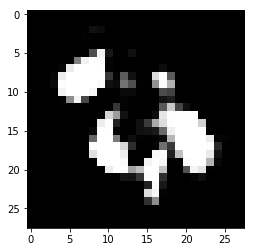

Loop: 666100, Generator_loss: -0.055047, Discriminator_loss: -0.002075
Loop: 666200, Generator_loss: -0.017239, Discriminator_loss: -2.7725e-05
Loop: 666300, Generator_loss: -0.0086221, Discriminator_loss: 0.0019955
Loop: 666400, Generator_loss: -0.041004, Discriminator_loss: 0.0053244
Loop: 666500, Generator_loss: -0.016886, Discriminator_loss: -0.002981
Loop: 666600, Generator_loss: -0.046775, Discriminator_loss: -0.0050869
Loop: 666700, Generator_loss: 0.017092, Discriminator_loss: 0.0018119
Loop: 666800, Generator_loss: -0.021751, Discriminator_loss: 0.0021455
Loop: 666900, Generator_loss: -0.017506, Discriminator_loss: 0.0028656
Loop: 667000, Generator_loss: -0.071771, Discriminator_loss: 0.006512


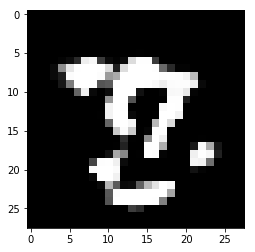

Loop: 667100, Generator_loss: 0.021321, Discriminator_loss: 0.0028035
Loop: 667200, Generator_loss: -0.0079538, Discriminator_loss: 0.0024034
Loop: 667300, Generator_loss: -0.024949, Discriminator_loss: 0.00073146
Loop: 667400, Generator_loss: -0.028746, Discriminator_loss: -0.001464
Loop: 667500, Generator_loss: 0.035714, Discriminator_loss: 0.006358
Loop: 667600, Generator_loss: -0.01027, Discriminator_loss: 0.001437
Loop: 667700, Generator_loss: -0.020757, Discriminator_loss: 0.0017783
Loop: 667800, Generator_loss: 0.0051474, Discriminator_loss: -0.0011265
Loop: 667900, Generator_loss: 0.031436, Discriminator_loss: -0.0011175
Loop: 668000, Generator_loss: 0.0056452, Discriminator_loss: 0.00066847


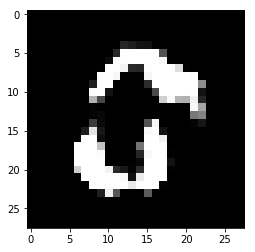

Loop: 668100, Generator_loss: -0.070854, Discriminator_loss: -0.0015588
Loop: 668200, Generator_loss: 0.013844, Discriminator_loss: 0.00032104
Loop: 668300, Generator_loss: -0.024674, Discriminator_loss: -0.0029497
Loop: 668400, Generator_loss: 0.03636, Discriminator_loss: 0.0068423
Loop: 668500, Generator_loss: 0.0032805, Discriminator_loss: -0.0016074
Loop: 668600, Generator_loss: -0.014031, Discriminator_loss: -0.00012605
Loop: 668700, Generator_loss: -0.02313, Discriminator_loss: 0.0067405
Loop: 668800, Generator_loss: -8.3904e-05, Discriminator_loss: 0.0034226
Loop: 668900, Generator_loss: 0.028277, Discriminator_loss: 0.0035451
Loop: 669000, Generator_loss: 0.030117, Discriminator_loss: 0.0013498


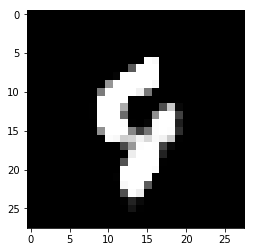

Loop: 669100, Generator_loss: -0.018275, Discriminator_loss: 0.0067898
Loop: 669200, Generator_loss: -0.016309, Discriminator_loss: 0.0049314
Loop: 669300, Generator_loss: -0.015105, Discriminator_loss: 0.006347
Loop: 669400, Generator_loss: 0.0019103, Discriminator_loss: 0.0059114
Loop: 669500, Generator_loss: -0.020442, Discriminator_loss: -0.0035133
Loop: 669600, Generator_loss: 0.00050134, Discriminator_loss: -0.001914
Loop: 669700, Generator_loss: -0.011976, Discriminator_loss: -0.0058294
Loop: 669800, Generator_loss: 0.012557, Discriminator_loss: 0.0044656
Loop: 669900, Generator_loss: -0.0072635, Discriminator_loss: 0.004249
Loop: 670000, Generator_loss: 0.010774, Discriminator_loss: 0.0021499


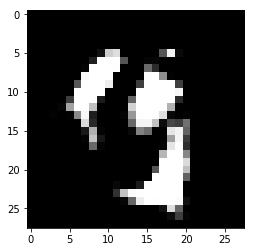

Loop: 670100, Generator_loss: 0.0077756, Discriminator_loss: 0.0085372
Loop: 670200, Generator_loss: 0.0088814, Discriminator_loss: 0.0049161
Loop: 670300, Generator_loss: 0.019285, Discriminator_loss: 0.0017912
Loop: 670400, Generator_loss: 0.026739, Discriminator_loss: -0.0014437
Loop: 670500, Generator_loss: 0.02378, Discriminator_loss: -0.00014283
Loop: 670600, Generator_loss: 0.04482, Discriminator_loss: 0.00035242
Loop: 670700, Generator_loss: 0.010737, Discriminator_loss: -0.0015714
Loop: 670800, Generator_loss: -0.019944, Discriminator_loss: 0.0053608
Loop: 670900, Generator_loss: -0.0068842, Discriminator_loss: 0.0018812
Loop: 671000, Generator_loss: -0.0033097, Discriminator_loss: 0.0055321


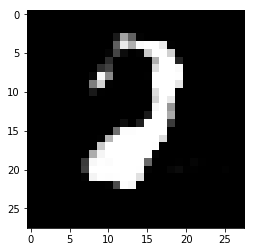

Loop: 671100, Generator_loss: -0.015652, Discriminator_loss: 0.0050622
Loop: 671200, Generator_loss: 0.010143, Discriminator_loss: 0.0015629
Loop: 671300, Generator_loss: 0.029834, Discriminator_loss: 0.0042866
Loop: 671400, Generator_loss: -0.0092594, Discriminator_loss: 0.0010446
Loop: 671500, Generator_loss: -0.053462, Discriminator_loss: 0.0014853
Loop: 671600, Generator_loss: 0.024382, Discriminator_loss: 0.0097906
Loop: 671700, Generator_loss: 0.047618, Discriminator_loss: 0.0010202
Loop: 671800, Generator_loss: -0.0012203, Discriminator_loss: 0.0032296
Loop: 671900, Generator_loss: -0.012332, Discriminator_loss: 0.0081874
Loop: 672000, Generator_loss: -0.022158, Discriminator_loss: -0.0038615


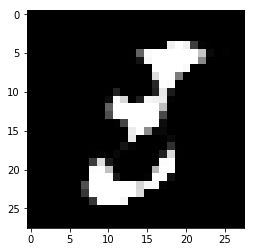

Loop: 672100, Generator_loss: -0.047053, Discriminator_loss: -0.0011901
Loop: 672200, Generator_loss: -0.02832, Discriminator_loss: 0.0038009
Loop: 672300, Generator_loss: -0.034423, Discriminator_loss: 0.0037791
Loop: 672400, Generator_loss: -0.037073, Discriminator_loss: -0.00070659
Loop: 672500, Generator_loss: -0.056067, Discriminator_loss: -0.0022214
Loop: 672600, Generator_loss: 0.0041955, Discriminator_loss: 0.0084856
Loop: 672700, Generator_loss: -0.042146, Discriminator_loss: -0.0011986
Loop: 672800, Generator_loss: 0.0023602, Discriminator_loss: -0.0039527
Loop: 672900, Generator_loss: 0.040913, Discriminator_loss: -0.0041618
Loop: 673000, Generator_loss: -0.036559, Discriminator_loss: 0.0019381


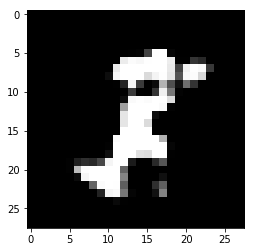

Loop: 673100, Generator_loss: 0.021642, Discriminator_loss: 0.0076489
Loop: 673200, Generator_loss: -0.0022134, Discriminator_loss: 0.0045409
Loop: 673300, Generator_loss: 0.029371, Discriminator_loss: -0.003556
Loop: 673400, Generator_loss: 0.021685, Discriminator_loss: -0.0062927
Loop: 673500, Generator_loss: -0.00097354, Discriminator_loss: -7.4659e-06
Loop: 673600, Generator_loss: -0.021608, Discriminator_loss: 0.010277
Loop: 673700, Generator_loss: -0.040666, Discriminator_loss: -0.0013584
Loop: 673800, Generator_loss: -0.032824, Discriminator_loss: -0.0016315
Loop: 673900, Generator_loss: 0.014081, Discriminator_loss: -0.0021265
Loop: 674000, Generator_loss: 0.02966, Discriminator_loss: 0.0063934


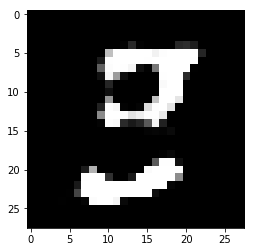

Loop: 674100, Generator_loss: 0.0096192, Discriminator_loss: 0.0021643
Loop: 674200, Generator_loss: -0.026069, Discriminator_loss: 0.0023155
Loop: 674300, Generator_loss: 0.0055085, Discriminator_loss: 0.0029263
Loop: 674400, Generator_loss: -0.048636, Discriminator_loss: 0.0059204
Loop: 674500, Generator_loss: 0.001097, Discriminator_loss: -0.0007668
Loop: 674600, Generator_loss: -0.0042591, Discriminator_loss: 0.0058746
Loop: 674700, Generator_loss: 0.010594, Discriminator_loss: 0.0039533
Loop: 674800, Generator_loss: 0.014297, Discriminator_loss: -0.0027343
Loop: 674900, Generator_loss: -0.039868, Discriminator_loss: 0.0025678
Loop: 675000, Generator_loss: -0.0020846, Discriminator_loss: 0.0050931


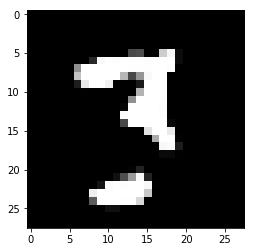

Loop: 675100, Generator_loss: 0.017686, Discriminator_loss: 0.0027456
Loop: 675200, Generator_loss: -0.041086, Discriminator_loss: -0.011336
Loop: 675300, Generator_loss: -0.0074561, Discriminator_loss: -0.00030439
Loop: 675400, Generator_loss: -0.028167, Discriminator_loss: 0.0035055
Loop: 675500, Generator_loss: -0.021831, Discriminator_loss: -0.0041204
Loop: 675600, Generator_loss: -0.034255, Discriminator_loss: 0.0038068
Loop: 675700, Generator_loss: -0.02747, Discriminator_loss: 0.0012266
Loop: 675800, Generator_loss: 0.056672, Discriminator_loss: 0.0080045
Loop: 675900, Generator_loss: 0.016971, Discriminator_loss: -0.00066282
Loop: 676000, Generator_loss: -0.012981, Discriminator_loss: 0.0036704


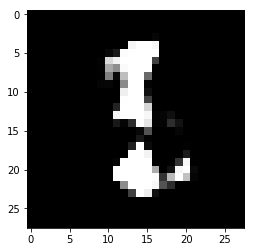

Loop: 676100, Generator_loss: -0.014497, Discriminator_loss: 0.0073625
Loop: 676200, Generator_loss: 0.026814, Discriminator_loss: 0.0053901
Loop: 676300, Generator_loss: -0.020984, Discriminator_loss: 0.0027505
Loop: 676400, Generator_loss: -0.043966, Discriminator_loss: 0.014453
Loop: 676500, Generator_loss: -0.030799, Discriminator_loss: 0.0078882
Loop: 676600, Generator_loss: -0.02876, Discriminator_loss: 0.0077675
Loop: 676700, Generator_loss: -0.030803, Discriminator_loss: 0.00053153
Loop: 676800, Generator_loss: -0.017916, Discriminator_loss: 0.0047441
Loop: 676900, Generator_loss: -0.035406, Discriminator_loss: 0.003089
Loop: 677000, Generator_loss: -0.017719, Discriminator_loss: 0.011279


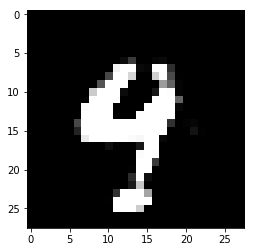

Loop: 677100, Generator_loss: -0.050003, Discriminator_loss: 0.007458
Loop: 677200, Generator_loss: -0.0086336, Discriminator_loss: -0.00085557
Loop: 677300, Generator_loss: -0.031923, Discriminator_loss: 0.0014387
Loop: 677400, Generator_loss: -0.026279, Discriminator_loss: 0.0033861
Loop: 677500, Generator_loss: 0.010289, Discriminator_loss: -0.00052546
Loop: 677600, Generator_loss: 0.032152, Discriminator_loss: 0.0039907
Loop: 677700, Generator_loss: 0.0034483, Discriminator_loss: -0.0020543
Loop: 677800, Generator_loss: -0.014858, Discriminator_loss: 0.0051409
Loop: 677900, Generator_loss: 0.014698, Discriminator_loss: 3.973e-06
Loop: 678000, Generator_loss: 0.026073, Discriminator_loss: 0.0058945


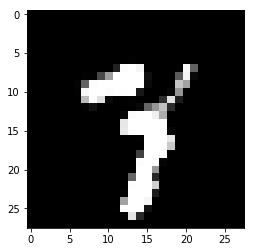

Loop: 678100, Generator_loss: 0.00097187, Discriminator_loss: 0.0017057
Loop: 678200, Generator_loss: -0.013652, Discriminator_loss: 0.0024403
Loop: 678300, Generator_loss: 0.010504, Discriminator_loss: 0.00060605
Loop: 678400, Generator_loss: 0.027464, Discriminator_loss: 0.014621
Loop: 678500, Generator_loss: 0.027418, Discriminator_loss: 0.0012772
Loop: 678600, Generator_loss: 0.0086874, Discriminator_loss: 0.0034924
Loop: 678700, Generator_loss: -0.066956, Discriminator_loss: -0.0089884
Loop: 678800, Generator_loss: -0.0049, Discriminator_loss: 0.0002502
Loop: 678900, Generator_loss: 0.027019, Discriminator_loss: 0.0012871
Loop: 679000, Generator_loss: -0.025954, Discriminator_loss: 0.0021189


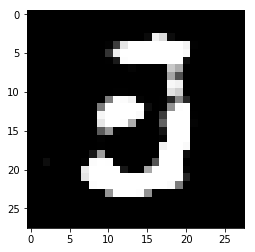

Loop: 679100, Generator_loss: -0.0094432, Discriminator_loss: 0.00011353
Loop: 679200, Generator_loss: -0.00086505, Discriminator_loss: 0.0031065
Loop: 679300, Generator_loss: 0.010561, Discriminator_loss: 0.0054065
Loop: 679400, Generator_loss: -0.010502, Discriminator_loss: 0.001834
Loop: 679500, Generator_loss: 0.025594, Discriminator_loss: 0.0079478
Loop: 679600, Generator_loss: -0.00695, Discriminator_loss: 0.0023266
Loop: 679700, Generator_loss: -0.019334, Discriminator_loss: 0.0016772
Loop: 679800, Generator_loss: -0.030805, Discriminator_loss: 0.0081534
Loop: 679900, Generator_loss: 0.021634, Discriminator_loss: -0.0013649
Loop: 680000, Generator_loss: -0.019662, Discriminator_loss: 0.0056593


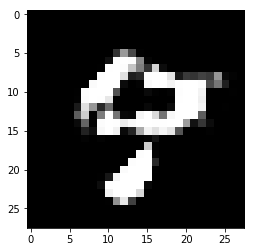

Loop: 680100, Generator_loss: -0.015667, Discriminator_loss: -0.0022651
Loop: 680200, Generator_loss: 0.0004494, Discriminator_loss: -0.0019005
Loop: 680300, Generator_loss: -0.0082999, Discriminator_loss: -0.0022709
Loop: 680400, Generator_loss: -0.014832, Discriminator_loss: -0.0022626
Loop: 680500, Generator_loss: 0.03406, Discriminator_loss: -0.0012253
Loop: 680600, Generator_loss: 0.028205, Discriminator_loss: 0.0012655
Loop: 680700, Generator_loss: 0.037347, Discriminator_loss: 0.0057
Loop: 680800, Generator_loss: -0.0031686, Discriminator_loss: 0.0022224
Loop: 680900, Generator_loss: -0.034817, Discriminator_loss: 0.0023621
Loop: 681000, Generator_loss: 0.018537, Discriminator_loss: 0.0011973


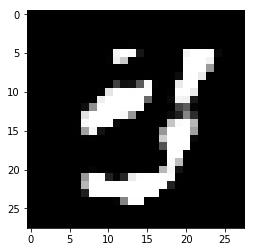

Loop: 681100, Generator_loss: 0.0021464, Discriminator_loss: 0.001928
Loop: 681200, Generator_loss: -0.026353, Discriminator_loss: 0.0029067
Loop: 681300, Generator_loss: 0.040277, Discriminator_loss: 0.0031495
Loop: 681400, Generator_loss: -0.017121, Discriminator_loss: 0.0015679
Loop: 681500, Generator_loss: -0.0081898, Discriminator_loss: 0.0037627
Loop: 681600, Generator_loss: -0.004561, Discriminator_loss: 0.0023766
Loop: 681700, Generator_loss: -0.025996, Discriminator_loss: -0.0022252
Loop: 681800, Generator_loss: -0.0091102, Discriminator_loss: 0.0041083
Loop: 681900, Generator_loss: -0.0073543, Discriminator_loss: 0.0043745
Loop: 682000, Generator_loss: -0.024734, Discriminator_loss: -0.010869


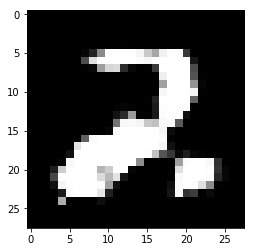

Loop: 682100, Generator_loss: -0.0057569, Discriminator_loss: 0.0050389
Loop: 682200, Generator_loss: 0.0052518, Discriminator_loss: 0.0063518
Loop: 682300, Generator_loss: -0.0082777, Discriminator_loss: 0.0011945
Loop: 682400, Generator_loss: 0.01876, Discriminator_loss: 0.009354
Loop: 682500, Generator_loss: -0.0091808, Discriminator_loss: 0.00011992
Loop: 682600, Generator_loss: -0.0096713, Discriminator_loss: -0.0021671
Loop: 682700, Generator_loss: -0.023448, Discriminator_loss: -0.00012217
Loop: 682800, Generator_loss: 0.02155, Discriminator_loss: -0.0077214
Loop: 682900, Generator_loss: -0.0086434, Discriminator_loss: 0.00044182
Loop: 683000, Generator_loss: -0.038889, Discriminator_loss: 0.01282


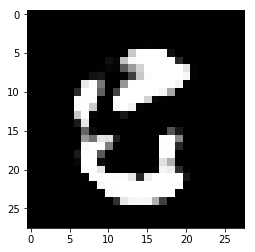

Loop: 683100, Generator_loss: -0.009265, Discriminator_loss: 0.0035585
Loop: 683200, Generator_loss: -0.0076444, Discriminator_loss: -0.0035783
Loop: 683300, Generator_loss: -0.027536, Discriminator_loss: 0.0028729
Loop: 683400, Generator_loss: -0.011473, Discriminator_loss: 0.0045237
Loop: 683500, Generator_loss: -0.022764, Discriminator_loss: 0.0066854
Loop: 683600, Generator_loss: 0.003717, Discriminator_loss: 0.00077516
Loop: 683700, Generator_loss: 0.0075015, Discriminator_loss: -0.0029331
Loop: 683800, Generator_loss: -0.0010359, Discriminator_loss: 0.002147
Loop: 683900, Generator_loss: -0.01154, Discriminator_loss: -0.0008477
Loop: 684000, Generator_loss: 0.066967, Discriminator_loss: 0.0059225


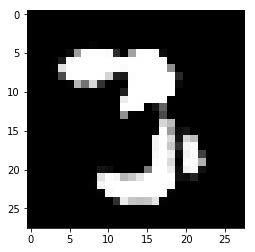

Loop: 684100, Generator_loss: -0.029864, Discriminator_loss: 0.00033766
Loop: 684200, Generator_loss: -0.016285, Discriminator_loss: 0.0013368
Loop: 684300, Generator_loss: -0.022937, Discriminator_loss: 0.0068908
Loop: 684400, Generator_loss: -0.0024791, Discriminator_loss: 0.005592
Loop: 684500, Generator_loss: -0.035711, Discriminator_loss: 0.0057902
Loop: 684600, Generator_loss: 0.018617, Discriminator_loss: 0.0039635
Loop: 684700, Generator_loss: -0.017955, Discriminator_loss: -0.0019826
Loop: 684800, Generator_loss: -0.026173, Discriminator_loss: 0.0016204
Loop: 684900, Generator_loss: -0.018282, Discriminator_loss: 0.0014287
Loop: 685000, Generator_loss: 0.017996, Discriminator_loss: -0.010815


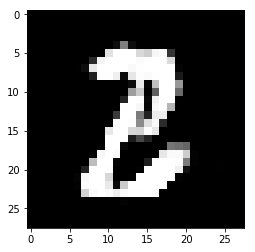

Loop: 685100, Generator_loss: 0.025213, Discriminator_loss: 0.00073926
Loop: 685200, Generator_loss: 0.010974, Discriminator_loss: 0.0054952
Loop: 685300, Generator_loss: 0.026782, Discriminator_loss: 0.0014979
Loop: 685400, Generator_loss: 0.018887, Discriminator_loss: 0.0059184
Loop: 685500, Generator_loss: -0.0032048, Discriminator_loss: 0.005973
Loop: 685600, Generator_loss: -0.017521, Discriminator_loss: 0.00013681
Loop: 685700, Generator_loss: 0.019038, Discriminator_loss: 0.013776
Loop: 685800, Generator_loss: 0.032476, Discriminator_loss: -0.0027665
Loop: 685900, Generator_loss: 0.0033585, Discriminator_loss: 0.0034585
Loop: 686000, Generator_loss: -0.0088161, Discriminator_loss: 0.014698


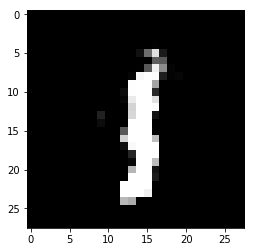

Loop: 686100, Generator_loss: -0.022199, Discriminator_loss: -0.0048064
Loop: 686200, Generator_loss: -0.0088868, Discriminator_loss: -0.0045701
Loop: 686300, Generator_loss: -0.02168, Discriminator_loss: 0.0074441
Loop: 686400, Generator_loss: 0.014019, Discriminator_loss: 0.00064766
Loop: 686500, Generator_loss: -0.036557, Discriminator_loss: 0.0081762
Loop: 686600, Generator_loss: -0.021942, Discriminator_loss: 0.00091585
Loop: 686700, Generator_loss: -0.0014695, Discriminator_loss: 0.00079939
Loop: 686800, Generator_loss: 0.028384, Discriminator_loss: 0.0012907
Loop: 686900, Generator_loss: 0.0038043, Discriminator_loss: 0.00070811
Loop: 687000, Generator_loss: 0.025916, Discriminator_loss: 0.0010758


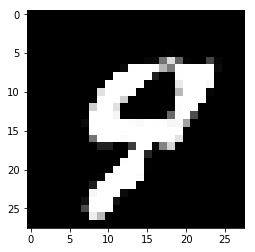

Loop: 687100, Generator_loss: 0.0043893, Discriminator_loss: -0.0061263
Loop: 687200, Generator_loss: -0.026638, Discriminator_loss: 0.0015008
Loop: 687300, Generator_loss: -0.029345, Discriminator_loss: -0.00049582
Loop: 687400, Generator_loss: -0.0044858, Discriminator_loss: -0.0017962
Loop: 687500, Generator_loss: 0.0035826, Discriminator_loss: 0.003214
Loop: 687600, Generator_loss: 0.03223, Discriminator_loss: 0.012504
Loop: 687700, Generator_loss: 0.033058, Discriminator_loss: -0.0011409
Loop: 687800, Generator_loss: -0.0066133, Discriminator_loss: -0.0012451
Loop: 687900, Generator_loss: -0.02524, Discriminator_loss: -0.0018074
Loop: 688000, Generator_loss: -0.01897, Discriminator_loss: 0.0047104


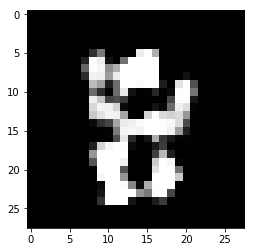

Loop: 688100, Generator_loss: 0.025639, Discriminator_loss: 0.0013162
Loop: 688200, Generator_loss: 0.0037976, Discriminator_loss: 0.0078371
Loop: 688300, Generator_loss: -0.059262, Discriminator_loss: 0.0042806
Loop: 688400, Generator_loss: 0.00087775, Discriminator_loss: -0.0036442
Loop: 688500, Generator_loss: -0.001628, Discriminator_loss: 0.00018929
Loop: 688600, Generator_loss: 0.012833, Discriminator_loss: -0.00093693
Loop: 688700, Generator_loss: -0.014177, Discriminator_loss: 0.00093708
Loop: 688800, Generator_loss: 0.021629, Discriminator_loss: 0.00064054
Loop: 688900, Generator_loss: 0.079082, Discriminator_loss: -0.004332
Loop: 689000, Generator_loss: 0.0082002, Discriminator_loss: 0.0031617


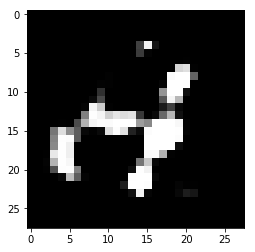

Loop: 689100, Generator_loss: 0.049078, Discriminator_loss: 0.0085342
Loop: 689200, Generator_loss: -0.048057, Discriminator_loss: 0.010726
Loop: 689300, Generator_loss: 0.031611, Discriminator_loss: 0.0025006
Loop: 689400, Generator_loss: 0.011146, Discriminator_loss: -0.0032653
Loop: 689500, Generator_loss: -0.019603, Discriminator_loss: 0.001635
Loop: 689600, Generator_loss: -0.012303, Discriminator_loss: -0.0012347
Loop: 689700, Generator_loss: 0.010518, Discriminator_loss: 0.0054623
Loop: 689800, Generator_loss: 0.00081542, Discriminator_loss: 0.006853
Loop: 689900, Generator_loss: -0.032118, Discriminator_loss: 0.0030388
Loop: 690000, Generator_loss: 0.0087514, Discriminator_loss: 0.0017401


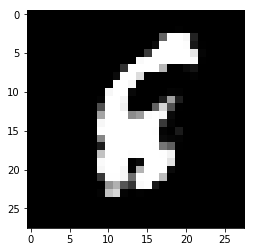

Loop: 690100, Generator_loss: -0.019578, Discriminator_loss: 0.0062545
Loop: 690200, Generator_loss: 0.00765, Discriminator_loss: 0.0051899
Loop: 690300, Generator_loss: 0.0049755, Discriminator_loss: 0.0084133
Loop: 690400, Generator_loss: -0.018114, Discriminator_loss: 0.0012719
Loop: 690500, Generator_loss: -0.0383, Discriminator_loss: 0.0035063
Loop: 690600, Generator_loss: 0.024869, Discriminator_loss: 0.0048169
Loop: 690700, Generator_loss: -0.0063851, Discriminator_loss: 0.005438
Loop: 690800, Generator_loss: 0.032935, Discriminator_loss: 0.001524
Loop: 690900, Generator_loss: -0.0060474, Discriminator_loss: 0.0035197
Loop: 691000, Generator_loss: 0.009153, Discriminator_loss: -0.0026953


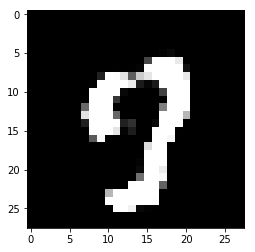

Loop: 691100, Generator_loss: 0.022134, Discriminator_loss: 0.0048584
Loop: 691200, Generator_loss: -0.0079311, Discriminator_loss: 0.0036424
Loop: 691300, Generator_loss: 0.04294, Discriminator_loss: 0.0058262
Loop: 691400, Generator_loss: 0.035203, Discriminator_loss: 0.0075949
Loop: 691500, Generator_loss: -0.0089207, Discriminator_loss: 0.0038791
Loop: 691600, Generator_loss: -0.023705, Discriminator_loss: 0.0042691
Loop: 691700, Generator_loss: -0.043611, Discriminator_loss: -0.0021782
Loop: 691800, Generator_loss: -0.0084002, Discriminator_loss: 0.0025262
Loop: 691900, Generator_loss: -0.027591, Discriminator_loss: 0.00059347
Loop: 692000, Generator_loss: -0.0094237, Discriminator_loss: 0.0041733


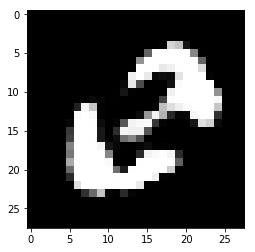

Loop: 692100, Generator_loss: 0.037716, Discriminator_loss: 0.0021194
Loop: 692200, Generator_loss: -0.027794, Discriminator_loss: -0.00017663
Loop: 692300, Generator_loss: 0.0069553, Discriminator_loss: 0.00097858
Loop: 692400, Generator_loss: -0.020691, Discriminator_loss: 0.002092
Loop: 692500, Generator_loss: 0.033941, Discriminator_loss: 0.0049008
Loop: 692600, Generator_loss: -0.046274, Discriminator_loss: -0.0026857
Loop: 692700, Generator_loss: -0.014075, Discriminator_loss: 0.0036756
Loop: 692800, Generator_loss: -0.019174, Discriminator_loss: 0.0043593
Loop: 692900, Generator_loss: 0.0069929, Discriminator_loss: -0.0019573
Loop: 693000, Generator_loss: -0.0017733, Discriminator_loss: 0.00065166


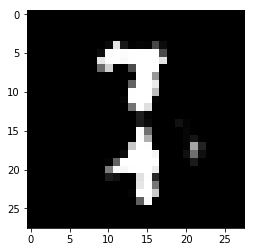

Loop: 693100, Generator_loss: -0.019671, Discriminator_loss: -0.0045741
Loop: 693200, Generator_loss: -0.019213, Discriminator_loss: 0.00041403
Loop: 693300, Generator_loss: -0.040128, Discriminator_loss: -0.0016882
Loop: 693400, Generator_loss: 0.0028588, Discriminator_loss: 0.0043415
Loop: 693500, Generator_loss: -0.024972, Discriminator_loss: 0.0046004
Loop: 693600, Generator_loss: -0.071214, Discriminator_loss: 0.0013486
Loop: 693700, Generator_loss: 0.00377, Discriminator_loss: 0.0079184
Loop: 693800, Generator_loss: -0.014349, Discriminator_loss: 0.00081971
Loop: 693900, Generator_loss: 0.0086484, Discriminator_loss: 5.6417e-05
Loop: 694000, Generator_loss: 0.028395, Discriminator_loss: 0.0074242


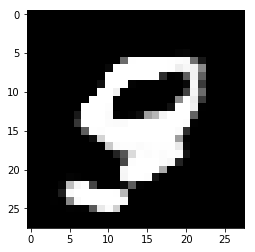

Loop: 694100, Generator_loss: 0.045114, Discriminator_loss: 0.0018539
Loop: 694200, Generator_loss: -0.045984, Discriminator_loss: -0.0019399
Loop: 694300, Generator_loss: -0.0077106, Discriminator_loss: 0.004036
Loop: 694400, Generator_loss: -0.036394, Discriminator_loss: 0.0035865
Loop: 694500, Generator_loss: 0.060737, Discriminator_loss: 0.0028232
Loop: 694600, Generator_loss: 0.026654, Discriminator_loss: 0.0082687
Loop: 694700, Generator_loss: -0.010733, Discriminator_loss: 0.0014
Loop: 694800, Generator_loss: -0.008744, Discriminator_loss: 0.0040715
Loop: 694900, Generator_loss: 0.027191, Discriminator_loss: -0.00037184
Loop: 695000, Generator_loss: -0.00049854, Discriminator_loss: -0.0027461


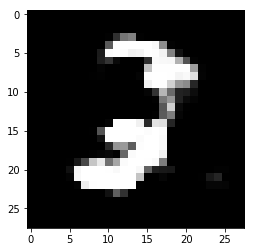

Loop: 695100, Generator_loss: 0.014445, Discriminator_loss: 0.0028442
Loop: 695200, Generator_loss: -0.038707, Discriminator_loss: 0.0040287
Loop: 695300, Generator_loss: -0.043251, Discriminator_loss: 0.0012026
Loop: 695400, Generator_loss: -0.036196, Discriminator_loss: 0.0054025
Loop: 695500, Generator_loss: -0.019682, Discriminator_loss: 0.0025309
Loop: 695600, Generator_loss: -0.017379, Discriminator_loss: 0.003636
Loop: 695700, Generator_loss: -0.026969, Discriminator_loss: 0.00058847
Loop: 695800, Generator_loss: -0.023238, Discriminator_loss: 0.00094674
Loop: 695900, Generator_loss: -0.016718, Discriminator_loss: 0.0019899
Loop: 696000, Generator_loss: -0.046451, Discriminator_loss: -0.0022585


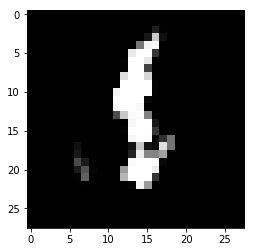

Loop: 696100, Generator_loss: -0.05353, Discriminator_loss: 0.0012637
Loop: 696200, Generator_loss: -0.056255, Discriminator_loss: 0.0027301
Loop: 696300, Generator_loss: -0.067099, Discriminator_loss: 0.0051867
Loop: 696400, Generator_loss: -0.044562, Discriminator_loss: 0.00815
Loop: 696500, Generator_loss: -0.026099, Discriminator_loss: 0.0024661
Loop: 696600, Generator_loss: 0.03957, Discriminator_loss: 0.0054338
Loop: 696700, Generator_loss: -0.047976, Discriminator_loss: 0.0047386
Loop: 696800, Generator_loss: -0.017746, Discriminator_loss: 0.0018232
Loop: 696900, Generator_loss: 0.00040294, Discriminator_loss: 0.0014004
Loop: 697000, Generator_loss: 0.008272, Discriminator_loss: 0.002242


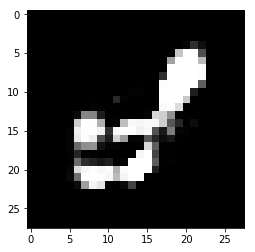

Loop: 697100, Generator_loss: -0.016532, Discriminator_loss: 0.0006103
Loop: 697200, Generator_loss: 0.019453, Discriminator_loss: 0.0021789
Loop: 697300, Generator_loss: -0.042979, Discriminator_loss: 0.0054495
Loop: 697400, Generator_loss: -0.0071843, Discriminator_loss: 0.0036108
Loop: 697500, Generator_loss: -0.044204, Discriminator_loss: 0.0030322
Loop: 697600, Generator_loss: -0.0079707, Discriminator_loss: 0.0018254
Loop: 697700, Generator_loss: 0.0017622, Discriminator_loss: -0.00053729
Loop: 697800, Generator_loss: 0.041493, Discriminator_loss: -0.00070518
Loop: 697900, Generator_loss: 0.041535, Discriminator_loss: 0.0037156
Loop: 698000, Generator_loss: -0.012543, Discriminator_loss: 0.0012932


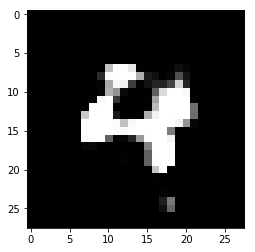

Loop: 698100, Generator_loss: -0.054704, Discriminator_loss: 0.0063232
Loop: 698200, Generator_loss: 0.023983, Discriminator_loss: 0.0037364
Loop: 698300, Generator_loss: -0.015027, Discriminator_loss: 0.0018677
Loop: 698400, Generator_loss: -0.0044127, Discriminator_loss: 0.0036568
Loop: 698500, Generator_loss: -0.011323, Discriminator_loss: 0.00038135
Loop: 698600, Generator_loss: -0.077645, Discriminator_loss: -0.00070202
Loop: 698700, Generator_loss: -0.020964, Discriminator_loss: 0.0055019
Loop: 698800, Generator_loss: 0.0042133, Discriminator_loss: 0.0040677
Loop: 698900, Generator_loss: -0.021197, Discriminator_loss: 0.0091859
Loop: 699000, Generator_loss: 0.0074906, Discriminator_loss: 0.006783


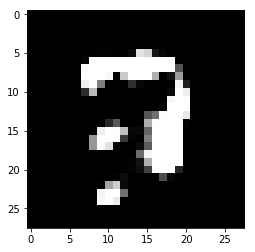

Loop: 699100, Generator_loss: -0.027713, Discriminator_loss: -0.0052235
Loop: 699200, Generator_loss: -0.020529, Discriminator_loss: 0.0035512
Loop: 699300, Generator_loss: -0.0073301, Discriminator_loss: 0.0039976
Loop: 699400, Generator_loss: 0.0085711, Discriminator_loss: -0.00027636
Loop: 699500, Generator_loss: -0.065012, Discriminator_loss: -0.00041783
Loop: 699600, Generator_loss: -0.037628, Discriminator_loss: 0.010194
Loop: 699700, Generator_loss: -0.023044, Discriminator_loss: 0.00082954
Loop: 699800, Generator_loss: -0.021708, Discriminator_loss: 0.010073
Loop: 699900, Generator_loss: 0.045194, Discriminator_loss: 0.013641
Loop: 700000, Generator_loss: -0.02018, Discriminator_loss: 0.0032496


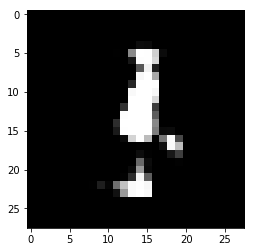

Loop: 700100, Generator_loss: -0.041186, Discriminator_loss: 0.0044345
Loop: 700200, Generator_loss: 0.06231, Discriminator_loss: -0.011766
Loop: 700300, Generator_loss: -0.017928, Discriminator_loss: 0.0010694
Loop: 700400, Generator_loss: -0.028034, Discriminator_loss: 0.002135
Loop: 700500, Generator_loss: 0.011772, Discriminator_loss: 0.00066871
Loop: 700600, Generator_loss: -0.008095, Discriminator_loss: -0.0043131
Loop: 700700, Generator_loss: 0.033914, Discriminator_loss: -0.00094853
Loop: 700800, Generator_loss: 0.024592, Discriminator_loss: 0.0044143
Loop: 700900, Generator_loss: -0.031344, Discriminator_loss: 0.0063483
Loop: 701000, Generator_loss: 0.019433, Discriminator_loss: -0.0051836


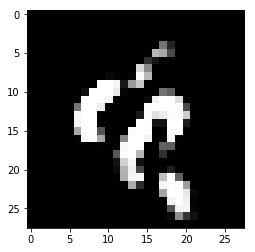

Loop: 701100, Generator_loss: -0.0074931, Discriminator_loss: -0.0060911
Loop: 701200, Generator_loss: 0.0030883, Discriminator_loss: 0.00016198
Loop: 701300, Generator_loss: -0.02033, Discriminator_loss: 0.003791
Loop: 701400, Generator_loss: 0.045272, Discriminator_loss: 0.00073268
Loop: 701500, Generator_loss: -0.0098933, Discriminator_loss: 0.0079561
Loop: 701600, Generator_loss: 0.012152, Discriminator_loss: 0.0010505
Loop: 701700, Generator_loss: 0.036034, Discriminator_loss: 0.0064765
Loop: 701800, Generator_loss: -0.029038, Discriminator_loss: 0.0040542
Loop: 701900, Generator_loss: -0.032197, Discriminator_loss: 0.00069771
Loop: 702000, Generator_loss: -0.0642, Discriminator_loss: 0.0088009


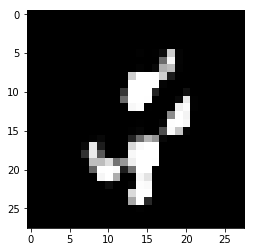

Loop: 702100, Generator_loss: 0.010986, Discriminator_loss: 0.0087479
Loop: 702200, Generator_loss: -0.0026301, Discriminator_loss: 0.00095806
Loop: 702300, Generator_loss: 0.014742, Discriminator_loss: -0.0094762
Loop: 702400, Generator_loss: 0.0024377, Discriminator_loss: 0.00178
Loop: 702500, Generator_loss: -0.010879, Discriminator_loss: 0.0032
Loop: 702600, Generator_loss: -0.019658, Discriminator_loss: -0.00089203
Loop: 702700, Generator_loss: 0.016008, Discriminator_loss: 0.0047788
Loop: 702800, Generator_loss: -0.013851, Discriminator_loss: 0.0042809
Loop: 702900, Generator_loss: 0.024965, Discriminator_loss: 0.0054258
Loop: 703000, Generator_loss: -0.0079558, Discriminator_loss: -0.0073706


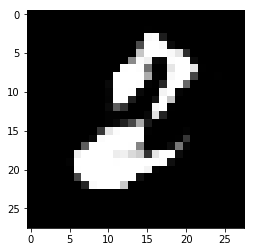

Loop: 703100, Generator_loss: -0.041065, Discriminator_loss: 0.0091964
Loop: 703200, Generator_loss: -0.026489, Discriminator_loss: 0.001497
Loop: 703300, Generator_loss: -0.0070454, Discriminator_loss: 0.012086
Loop: 703400, Generator_loss: -0.01746, Discriminator_loss: -0.0058737
Loop: 703500, Generator_loss: -0.0042538, Discriminator_loss: -0.0016006
Loop: 703600, Generator_loss: -0.048918, Discriminator_loss: 0.013505
Loop: 703700, Generator_loss: 0.044898, Discriminator_loss: 0.013333
Loop: 703800, Generator_loss: 0.016587, Discriminator_loss: 0.015335
Loop: 703900, Generator_loss: 0.0087504, Discriminator_loss: 0.0039854
Loop: 704000, Generator_loss: 0.032117, Discriminator_loss: 0.015062


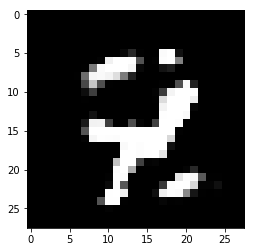

Loop: 704100, Generator_loss: -0.0098572, Discriminator_loss: -0.0030651
Loop: 704200, Generator_loss: 0.048052, Discriminator_loss: 0.0076032
Loop: 704300, Generator_loss: -0.009274, Discriminator_loss: 0.0028091
Loop: 704400, Generator_loss: 0.00584, Discriminator_loss: 0.0074898
Loop: 704500, Generator_loss: -0.042663, Discriminator_loss: -0.0048632
Loop: 704600, Generator_loss: 0.019277, Discriminator_loss: 0.0021937
Loop: 704700, Generator_loss: -0.02014, Discriminator_loss: -0.00033263
Loop: 704800, Generator_loss: -0.032898, Discriminator_loss: 0.0057102
Loop: 704900, Generator_loss: -0.017291, Discriminator_loss: 0.0051269
Loop: 705000, Generator_loss: 0.025221, Discriminator_loss: 0.0039761


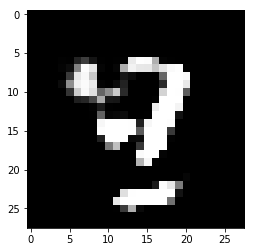

Loop: 705100, Generator_loss: 0.012614, Discriminator_loss: 0.0041501
Loop: 705200, Generator_loss: -0.036883, Discriminator_loss: -0.0031585
Loop: 705300, Generator_loss: -0.019264, Discriminator_loss: 0.0088503
Loop: 705400, Generator_loss: -0.052354, Discriminator_loss: 0.00050352
Loop: 705500, Generator_loss: 0.0051818, Discriminator_loss: -0.0026615
Loop: 705600, Generator_loss: 0.057254, Discriminator_loss: -0.008704
Loop: 705700, Generator_loss: -0.010613, Discriminator_loss: 0.0014757
Loop: 705800, Generator_loss: 0.037206, Discriminator_loss: -0.0011189
Loop: 705900, Generator_loss: -0.0095086, Discriminator_loss: 0.00068147
Loop: 706000, Generator_loss: -0.031375, Discriminator_loss: 0.0018103


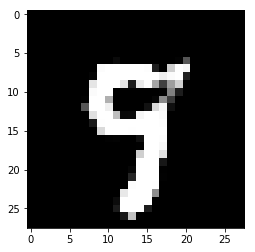

Loop: 706100, Generator_loss: -0.0040994, Discriminator_loss: 0.0058599
Loop: 706200, Generator_loss: 0.0079311, Discriminator_loss: 0.01381
Loop: 706300, Generator_loss: 0.0042447, Discriminator_loss: 0.0086006
Loop: 706400, Generator_loss: -0.021276, Discriminator_loss: 0.0075282
Loop: 706500, Generator_loss: 0.015446, Discriminator_loss: 0.0010114
Loop: 706600, Generator_loss: -0.01874, Discriminator_loss: 0.0053751
Loop: 706700, Generator_loss: 0.012408, Discriminator_loss: 0.0038569
Loop: 706800, Generator_loss: 0.028702, Discriminator_loss: 0.0014669
Loop: 706900, Generator_loss: 0.00043204, Discriminator_loss: 0.00050582
Loop: 707000, Generator_loss: 0.031863, Discriminator_loss: -0.00080091


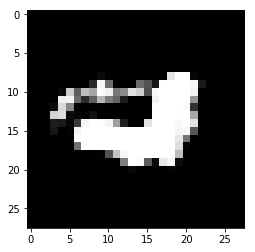

Loop: 707100, Generator_loss: -0.0047752, Discriminator_loss: 0.006266
Loop: 707200, Generator_loss: -0.016244, Discriminator_loss: 0.0053982
Loop: 707300, Generator_loss: -0.0094573, Discriminator_loss: 0.0046226
Loop: 707400, Generator_loss: -0.0067699, Discriminator_loss: 0.0043742
Loop: 707500, Generator_loss: -0.032635, Discriminator_loss: -0.0042002
Loop: 707600, Generator_loss: -0.068575, Discriminator_loss: -0.0030258
Loop: 707700, Generator_loss: -0.0078745, Discriminator_loss: 0.0026615
Loop: 707800, Generator_loss: -0.015023, Discriminator_loss: -0.0024785
Loop: 707900, Generator_loss: -0.023836, Discriminator_loss: 0.00087881
Loop: 708000, Generator_loss: -0.061996, Discriminator_loss: -0.0049474


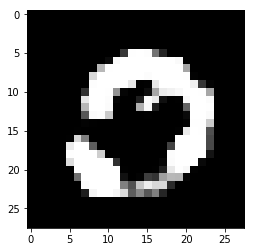

Loop: 708100, Generator_loss: 0.020032, Discriminator_loss: 0.00095365
Loop: 708200, Generator_loss: -0.014255, Discriminator_loss: -0.00095591
Loop: 708300, Generator_loss: -0.019808, Discriminator_loss: -0.0010226
Loop: 708400, Generator_loss: -0.0029689, Discriminator_loss: 0.0093326
Loop: 708500, Generator_loss: 0.052327, Discriminator_loss: -0.0029508
Loop: 708600, Generator_loss: -0.0098839, Discriminator_loss: 0.0021947
Loop: 708700, Generator_loss: 0.042005, Discriminator_loss: 0.0047135
Loop: 708800, Generator_loss: 0.012348, Discriminator_loss: -0.0016632
Loop: 708900, Generator_loss: 0.0018448, Discriminator_loss: 0.0064062
Loop: 709000, Generator_loss: 0.020947, Discriminator_loss: 0.0051327


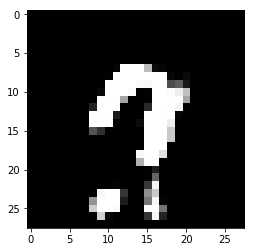

Loop: 709100, Generator_loss: 0.00024582, Discriminator_loss: 0.0011793
Loop: 709200, Generator_loss: 0.00052355, Discriminator_loss: 0.0065379
Loop: 709300, Generator_loss: -0.021667, Discriminator_loss: 0.0026263
Loop: 709400, Generator_loss: -0.0045321, Discriminator_loss: -0.0032099
Loop: 709500, Generator_loss: 0.025515, Discriminator_loss: 0.0044389
Loop: 709600, Generator_loss: -0.01493, Discriminator_loss: -0.00014993
Loop: 709700, Generator_loss: 0.026696, Discriminator_loss: 0.012393
Loop: 709800, Generator_loss: 0.025103, Discriminator_loss: 0.0042413
Loop: 709900, Generator_loss: -0.012534, Discriminator_loss: 0.00397
Loop: 710000, Generator_loss: 0.0047382, Discriminator_loss: 0.0015354


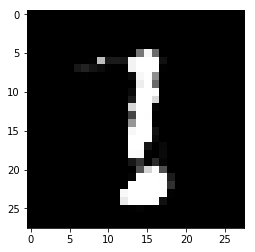

Loop: 710100, Generator_loss: -0.024611, Discriminator_loss: 0.01063
Loop: 710200, Generator_loss: -0.018848, Discriminator_loss: 0.0014691
Loop: 710300, Generator_loss: -0.04246, Discriminator_loss: 0.00076571
Loop: 710400, Generator_loss: 0.0099005, Discriminator_loss: 0.0043847
Loop: 710500, Generator_loss: -0.028105, Discriminator_loss: 0.0037908
Loop: 710600, Generator_loss: -0.035401, Discriminator_loss: 0.0030379
Loop: 710700, Generator_loss: -0.0064271, Discriminator_loss: -0.003467
Loop: 710800, Generator_loss: 0.0071311, Discriminator_loss: 0.008077
Loop: 710900, Generator_loss: -0.03834, Discriminator_loss: 0.0039823
Loop: 711000, Generator_loss: -0.034914, Discriminator_loss: -0.0028854


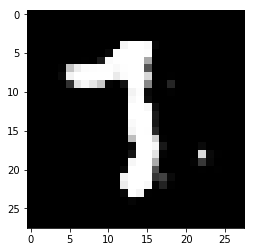

Loop: 711100, Generator_loss: -0.021869, Discriminator_loss: -0.00079212
Loop: 711200, Generator_loss: -0.054017, Discriminator_loss: 0.00049685
Loop: 711300, Generator_loss: 0.010069, Discriminator_loss: 0.004002
Loop: 711400, Generator_loss: 0.038302, Discriminator_loss: 0.0035166
Loop: 711500, Generator_loss: 0.01201, Discriminator_loss: -0.0074839
Loop: 711600, Generator_loss: -0.036643, Discriminator_loss: 0.0043921
Loop: 711700, Generator_loss: -0.0024975, Discriminator_loss: 0.0076814
Loop: 711800, Generator_loss: -0.048377, Discriminator_loss: -0.0026018
Loop: 711900, Generator_loss: 0.0026599, Discriminator_loss: 0.004851
Loop: 712000, Generator_loss: -6.7422e-05, Discriminator_loss: 0.0047062


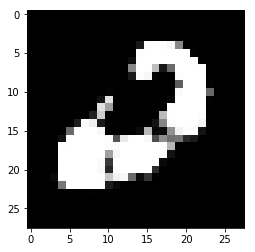

Loop: 712100, Generator_loss: -0.029842, Discriminator_loss: -0.001738
Loop: 712200, Generator_loss: -0.039413, Discriminator_loss: 0.0071932
Loop: 712300, Generator_loss: 0.0053627, Discriminator_loss: 0.0010293
Loop: 712400, Generator_loss: 0.062955, Discriminator_loss: 0.010779
Loop: 712500, Generator_loss: -0.05784, Discriminator_loss: 0.0078405
Loop: 712600, Generator_loss: -0.015183, Discriminator_loss: 0.0062848
Loop: 712700, Generator_loss: 0.0041644, Discriminator_loss: 0.0014081
Loop: 712800, Generator_loss: -0.031036, Discriminator_loss: 0.0037902
Loop: 712900, Generator_loss: -0.051306, Discriminator_loss: 0.0040015
Loop: 713000, Generator_loss: -0.0035622, Discriminator_loss: -0.0010802


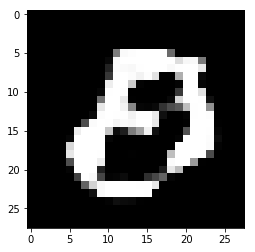

Loop: 713100, Generator_loss: 0.0034692, Discriminator_loss: -0.0027949
Loop: 713200, Generator_loss: -0.061801, Discriminator_loss: 0.0078079
Loop: 713300, Generator_loss: 0.0084739, Discriminator_loss: 0.00074863
Loop: 713400, Generator_loss: 0.023708, Discriminator_loss: -0.0017579
Loop: 713500, Generator_loss: -0.020829, Discriminator_loss: 0.0010315
Loop: 713600, Generator_loss: 0.021289, Discriminator_loss: 0.0077934
Loop: 713700, Generator_loss: -0.037891, Discriminator_loss: -0.0058358
Loop: 713800, Generator_loss: -0.040378, Discriminator_loss: 0.0069948
Loop: 713900, Generator_loss: 0.017054, Discriminator_loss: -0.00070305
Loop: 714000, Generator_loss: -0.0035632, Discriminator_loss: 0.0089351


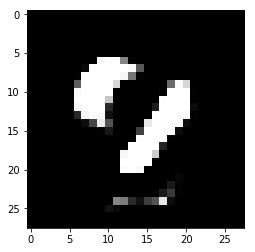

Loop: 714100, Generator_loss: 0.0057831, Discriminator_loss: -0.0023128
Loop: 714200, Generator_loss: -0.014271, Discriminator_loss: 0.0053967
Loop: 714300, Generator_loss: -0.0021056, Discriminator_loss: 0.00086041
Loop: 714400, Generator_loss: -0.062726, Discriminator_loss: 0.0075778
Loop: 714500, Generator_loss: -0.0042219, Discriminator_loss: 0.00036931
Loop: 714600, Generator_loss: 0.017533, Discriminator_loss: 0.0033638
Loop: 714700, Generator_loss: -0.028137, Discriminator_loss: 0.00079579
Loop: 714800, Generator_loss: -0.0028218, Discriminator_loss: -0.0056833
Loop: 714900, Generator_loss: -0.0029783, Discriminator_loss: 0.0023642
Loop: 715000, Generator_loss: -0.029517, Discriminator_loss: 0.0017405


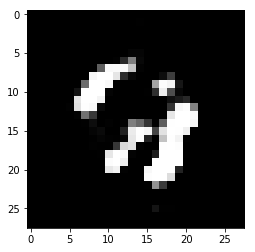

Loop: 715100, Generator_loss: -0.047014, Discriminator_loss: 0.0022324
Loop: 715200, Generator_loss: 0.010312, Discriminator_loss: 0.0015935
Loop: 715300, Generator_loss: -0.022611, Discriminator_loss: 0.0043017
Loop: 715400, Generator_loss: -0.0061434, Discriminator_loss: 0.0031147
Loop: 715500, Generator_loss: -0.040697, Discriminator_loss: 0.0029083
Loop: 715600, Generator_loss: -0.028896, Discriminator_loss: 0.0050802
Loop: 715700, Generator_loss: 0.016945, Discriminator_loss: 0.0038571
Loop: 715800, Generator_loss: 0.025836, Discriminator_loss: -9.8862e-05
Loop: 715900, Generator_loss: -0.011541, Discriminator_loss: -0.00215
Loop: 716000, Generator_loss: -0.039127, Discriminator_loss: 0.0040342


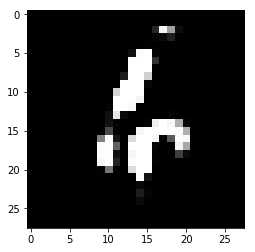

Loop: 716100, Generator_loss: -0.0011179, Discriminator_loss: 0.0043864
Loop: 716200, Generator_loss: 0.027119, Discriminator_loss: 0.0024408
Loop: 716300, Generator_loss: -0.029065, Discriminator_loss: 0.00015649
Loop: 716400, Generator_loss: -0.045754, Discriminator_loss: 0.0041552
Loop: 716500, Generator_loss: -0.015042, Discriminator_loss: 0.00097949
Loop: 716600, Generator_loss: 0.0077995, Discriminator_loss: 0.0027738
Loop: 716700, Generator_loss: 0.02294, Discriminator_loss: 0.0097631
Loop: 716800, Generator_loss: 0.02635, Discriminator_loss: 0.0018347
Loop: 716900, Generator_loss: -0.033395, Discriminator_loss: 0.006398
Loop: 717000, Generator_loss: 0.007917, Discriminator_loss: 0.0043345


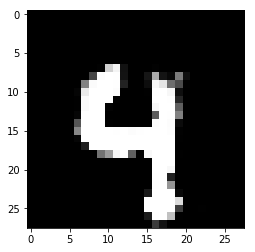

Loop: 717100, Generator_loss: 0.024773, Discriminator_loss: 0.001932
Loop: 717200, Generator_loss: -0.029373, Discriminator_loss: 0.0027346
Loop: 717300, Generator_loss: -0.015595, Discriminator_loss: 0.0011044
Loop: 717400, Generator_loss: -0.019693, Discriminator_loss: 0.0043089
Loop: 717500, Generator_loss: 0.050816, Discriminator_loss: 0.0077493
Loop: 717600, Generator_loss: -0.031394, Discriminator_loss: -0.0039759
Loop: 717700, Generator_loss: 0.01684, Discriminator_loss: -0.0015179
Loop: 717800, Generator_loss: -0.059658, Discriminator_loss: 0.002091
Loop: 717900, Generator_loss: -0.023108, Discriminator_loss: 0.0025416
Loop: 718000, Generator_loss: 0.011029, Discriminator_loss: 0.0060691


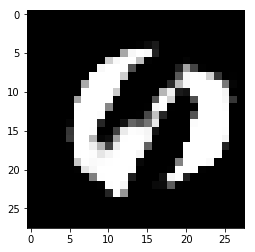

Loop: 718100, Generator_loss: 0.0050688, Discriminator_loss: 0.0008482
Loop: 718200, Generator_loss: 0.041055, Discriminator_loss: 0.0046418
Loop: 718300, Generator_loss: 0.020967, Discriminator_loss: 0.0027764
Loop: 718400, Generator_loss: 0.031694, Discriminator_loss: 0.0034005
Loop: 718500, Generator_loss: 0.031924, Discriminator_loss: 0.010287
Loop: 718600, Generator_loss: 0.016817, Discriminator_loss: 0.0039373
Loop: 718700, Generator_loss: -0.024777, Discriminator_loss: 0.0043052
Loop: 718800, Generator_loss: -0.006323, Discriminator_loss: -0.0044244
Loop: 718900, Generator_loss: -0.033086, Discriminator_loss: -0.0053624
Loop: 719000, Generator_loss: -0.0084964, Discriminator_loss: 0.0024159


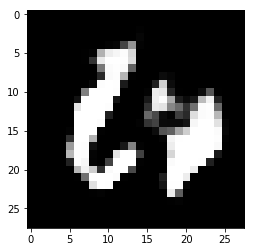

Loop: 719100, Generator_loss: -0.0028889, Discriminator_loss: 0.0047574
Loop: 719200, Generator_loss: -0.0063853, Discriminator_loss: -0.0049445
Loop: 719300, Generator_loss: 0.027021, Discriminator_loss: -0.0008755
Loop: 719400, Generator_loss: -0.040432, Discriminator_loss: 0.003478
Loop: 719500, Generator_loss: -0.00060702, Discriminator_loss: 0.0021517
Loop: 719600, Generator_loss: 0.027873, Discriminator_loss: -0.00028251
Loop: 719700, Generator_loss: 0.0048574, Discriminator_loss: 0.0016198
Loop: 719800, Generator_loss: 0.017403, Discriminator_loss: 0.006508
Loop: 719900, Generator_loss: 0.0099087, Discriminator_loss: 0.003663
Loop: 720000, Generator_loss: -0.014315, Discriminator_loss: 0.001861


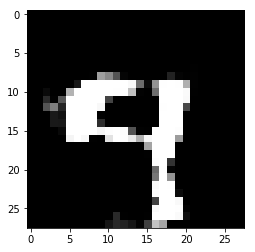

Loop: 720100, Generator_loss: -0.031594, Discriminator_loss: -0.00059913
Loop: 720200, Generator_loss: 0.032031, Discriminator_loss: 0.00454
Loop: 720300, Generator_loss: 0.027085, Discriminator_loss: 0.0074299
Loop: 720400, Generator_loss: 0.020894, Discriminator_loss: -0.0054533
Loop: 720500, Generator_loss: -0.0031452, Discriminator_loss: 0.0042352
Loop: 720600, Generator_loss: 0.0037201, Discriminator_loss: 0.0022809
Loop: 720700, Generator_loss: -0.054463, Discriminator_loss: -0.0011042
Loop: 720800, Generator_loss: -0.029104, Discriminator_loss: -0.0021805
Loop: 720900, Generator_loss: 0.0087481, Discriminator_loss: 0.00011581
Loop: 721000, Generator_loss: -0.012437, Discriminator_loss: 0.004613


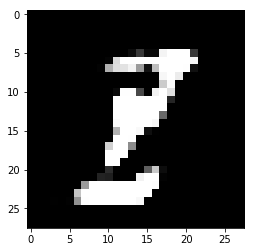

Loop: 721100, Generator_loss: -0.011224, Discriminator_loss: -0.0043
Loop: 721200, Generator_loss: -0.027641, Discriminator_loss: 0.0051696
Loop: 721300, Generator_loss: -0.049492, Discriminator_loss: 0.0010814
Loop: 721400, Generator_loss: 0.017985, Discriminator_loss: -0.0014823
Loop: 721500, Generator_loss: -0.030339, Discriminator_loss: 0.012591
Loop: 721600, Generator_loss: 0.0022414, Discriminator_loss: -0.0014788
Loop: 721700, Generator_loss: 0.03276, Discriminator_loss: -0.00096827
Loop: 721800, Generator_loss: 0.023871, Discriminator_loss: 0.0043335
Loop: 721900, Generator_loss: 0.021816, Discriminator_loss: 0.0011221
Loop: 722000, Generator_loss: 0.0093561, Discriminator_loss: -0.01077


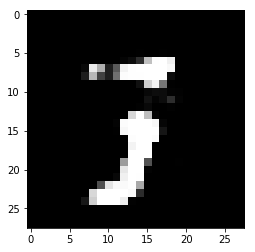

Loop: 722100, Generator_loss: -0.024588, Discriminator_loss: -0.00040948
Loop: 722200, Generator_loss: -0.0019257, Discriminator_loss: 0.0044355
Loop: 722300, Generator_loss: -0.010208, Discriminator_loss: -0.005854
Loop: 722400, Generator_loss: 0.022419, Discriminator_loss: -0.0036328
Loop: 722500, Generator_loss: -0.01744, Discriminator_loss: 0.0043099
Loop: 722600, Generator_loss: 0.028802, Discriminator_loss: -0.0058359
Loop: 722700, Generator_loss: -0.020032, Discriminator_loss: 0.0017643
Loop: 722800, Generator_loss: 0.05708, Discriminator_loss: -0.004614
Loop: 722900, Generator_loss: 0.0039933, Discriminator_loss: 0.0051995
Loop: 723000, Generator_loss: 0.016658, Discriminator_loss: 0.0054242


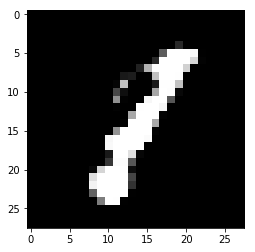

Loop: 723100, Generator_loss: -0.0077216, Discriminator_loss: -0.00032424
Loop: 723200, Generator_loss: -0.012212, Discriminator_loss: 0.0045977
Loop: 723300, Generator_loss: -0.011736, Discriminator_loss: 0.0027125
Loop: 723400, Generator_loss: 0.012457, Discriminator_loss: 0.011721
Loop: 723500, Generator_loss: -0.062017, Discriminator_loss: -0.0037357
Loop: 723600, Generator_loss: 0.00093822, Discriminator_loss: -0.0017366
Loop: 723700, Generator_loss: -0.025454, Discriminator_loss: 0.0008942
Loop: 723800, Generator_loss: -0.016938, Discriminator_loss: -0.0015426
Loop: 723900, Generator_loss: -0.0099771, Discriminator_loss: 0.0023736
Loop: 724000, Generator_loss: -0.00022059, Discriminator_loss: 0.0031731


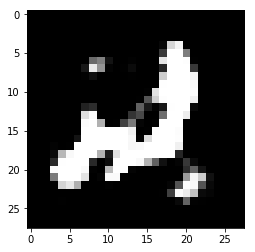

Loop: 724100, Generator_loss: -0.032291, Discriminator_loss: 0.011887
Loop: 724200, Generator_loss: -0.0031916, Discriminator_loss: 0.001626
Loop: 724300, Generator_loss: 0.012316, Discriminator_loss: -0.0021437
Loop: 724400, Generator_loss: 0.009929, Discriminator_loss: 0.00083425
Loop: 724500, Generator_loss: 0.00069408, Discriminator_loss: -0.0022343
Loop: 724600, Generator_loss: -0.0047401, Discriminator_loss: -0.00034391
Loop: 724700, Generator_loss: -0.0053696, Discriminator_loss: -0.0056749
Loop: 724800, Generator_loss: -0.054577, Discriminator_loss: 0.009978
Loop: 724900, Generator_loss: -0.035803, Discriminator_loss: -0.00098446
Loop: 725000, Generator_loss: -0.027644, Discriminator_loss: 0.0055565


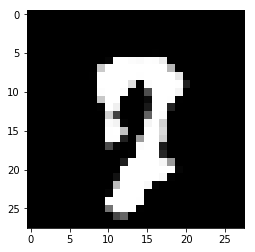

Loop: 725100, Generator_loss: 0.032908, Discriminator_loss: 0.0056739
Loop: 725200, Generator_loss: 0.020557, Discriminator_loss: 0.003335
Loop: 725300, Generator_loss: -0.014425, Discriminator_loss: 0.0036575
Loop: 725400, Generator_loss: -0.0061418, Discriminator_loss: -0.0041752
Loop: 725500, Generator_loss: 0.0031768, Discriminator_loss: 0.0033002
Loop: 725600, Generator_loss: -0.00014287, Discriminator_loss: 0.0025204
Loop: 725700, Generator_loss: 0.028288, Discriminator_loss: 0.007277
Loop: 725800, Generator_loss: 0.030599, Discriminator_loss: 0.0061885
Loop: 725900, Generator_loss: 0.011098, Discriminator_loss: -0.0017897
Loop: 726000, Generator_loss: -0.028971, Discriminator_loss: 1.796e-05


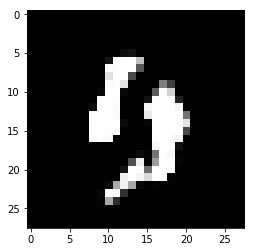

Loop: 726100, Generator_loss: 0.035065, Discriminator_loss: -0.014807
Loop: 726200, Generator_loss: 0.0042637, Discriminator_loss: 0.0030901
Loop: 726300, Generator_loss: -0.048356, Discriminator_loss: 0.0083623
Loop: 726400, Generator_loss: -0.0021299, Discriminator_loss: 0.0016647
Loop: 726500, Generator_loss: -0.0059899, Discriminator_loss: 0.0040349
Loop: 726600, Generator_loss: -0.012933, Discriminator_loss: 0.0027519
Loop: 726700, Generator_loss: 0.0033065, Discriminator_loss: -0.0003177
Loop: 726800, Generator_loss: -0.012436, Discriminator_loss: 0.00092144
Loop: 726900, Generator_loss: 0.0013345, Discriminator_loss: -0.0018445
Loop: 727000, Generator_loss: -0.0042318, Discriminator_loss: 0.00026486


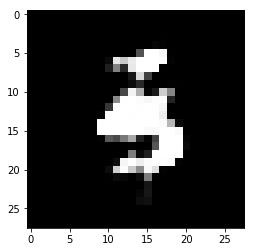

Loop: 727100, Generator_loss: -0.012299, Discriminator_loss: 0.0034881
Loop: 727200, Generator_loss: -0.040567, Discriminator_loss: -0.0041705
Loop: 727300, Generator_loss: 0.019186, Discriminator_loss: 0.0072356
Loop: 727400, Generator_loss: -0.04227, Discriminator_loss: 0.0081468
Loop: 727500, Generator_loss: -0.032396, Discriminator_loss: -0.0017938
Loop: 727600, Generator_loss: 0.010507, Discriminator_loss: 0.0052715
Loop: 727700, Generator_loss: -0.0023208, Discriminator_loss: 0.00069645
Loop: 727800, Generator_loss: -0.025185, Discriminator_loss: -0.00046314
Loop: 727900, Generator_loss: 0.026209, Discriminator_loss: 0.0046117
Loop: 728000, Generator_loss: -0.040896, Discriminator_loss: 0.0047455


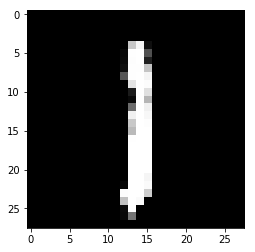

Loop: 728100, Generator_loss: -0.066106, Discriminator_loss: 0.0074856
Loop: 728200, Generator_loss: -0.029989, Discriminator_loss: 0.010458
Loop: 728300, Generator_loss: -0.031568, Discriminator_loss: 0.0033567
Loop: 728400, Generator_loss: 0.023754, Discriminator_loss: 0.0050302
Loop: 728500, Generator_loss: -0.052728, Discriminator_loss: 0.010662
Loop: 728600, Generator_loss: -0.060228, Discriminator_loss: 0.0018238
Loop: 728700, Generator_loss: -0.063226, Discriminator_loss: 0.001746
Loop: 728800, Generator_loss: -0.018521, Discriminator_loss: -0.0019036
Loop: 728900, Generator_loss: 0.045517, Discriminator_loss: -9.5982e-05
Loop: 729000, Generator_loss: -0.0069988, Discriminator_loss: 0.0041968


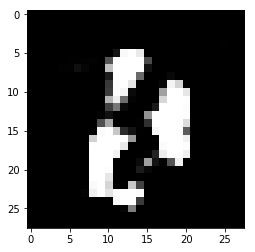

Loop: 729100, Generator_loss: 0.024053, Discriminator_loss: 0.0011835
Loop: 729200, Generator_loss: 0.023299, Discriminator_loss: 0.0024503
Loop: 729300, Generator_loss: 0.0084484, Discriminator_loss: -0.005433
Loop: 729400, Generator_loss: -0.03909, Discriminator_loss: 0.002979
Loop: 729500, Generator_loss: -0.025724, Discriminator_loss: 0.0055792
Loop: 729600, Generator_loss: -0.037207, Discriminator_loss: -0.0011827
Loop: 729700, Generator_loss: -0.030004, Discriminator_loss: 0.00050856
Loop: 729800, Generator_loss: 0.009074, Discriminator_loss: 0.00028979
Loop: 729900, Generator_loss: 0.032912, Discriminator_loss: 0.00069836
Loop: 730000, Generator_loss: -0.03103, Discriminator_loss: 0.003983


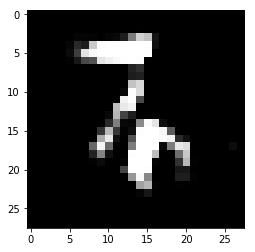

Loop: 730100, Generator_loss: -0.035172, Discriminator_loss: 0.0012167
Loop: 730200, Generator_loss: -0.011078, Discriminator_loss: -0.0047699
Loop: 730300, Generator_loss: -0.037617, Discriminator_loss: 0.0019482
Loop: 730400, Generator_loss: -0.030345, Discriminator_loss: 0.0057921
Loop: 730500, Generator_loss: 0.024476, Discriminator_loss: -0.0021238
Loop: 730600, Generator_loss: -0.040896, Discriminator_loss: -0.00038402
Loop: 730700, Generator_loss: 0.010365, Discriminator_loss: 0.0051304
Loop: 730800, Generator_loss: -0.070045, Discriminator_loss: 0.0077426
Loop: 730900, Generator_loss: -0.014586, Discriminator_loss: 0.0068969
Loop: 731000, Generator_loss: -0.017414, Discriminator_loss: 0.0088799


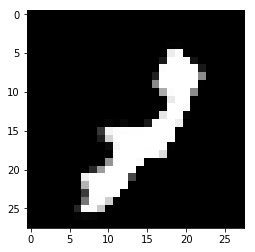

Loop: 731100, Generator_loss: 0.022324, Discriminator_loss: 0.0039796
Loop: 731200, Generator_loss: 0.0010735, Discriminator_loss: 0.0043213
Loop: 731300, Generator_loss: -0.021175, Discriminator_loss: 0.0033822
Loop: 731400, Generator_loss: -0.019576, Discriminator_loss: 0.001829
Loop: 731500, Generator_loss: 0.014348, Discriminator_loss: 0.0028958
Loop: 731600, Generator_loss: -0.0045115, Discriminator_loss: 0.0065344
Loop: 731700, Generator_loss: 0.011061, Discriminator_loss: 0.002505
Loop: 731800, Generator_loss: -0.031035, Discriminator_loss: 0.010636
Loop: 731900, Generator_loss: -0.016024, Discriminator_loss: 1.1329e-05
Loop: 732000, Generator_loss: -0.053323, Discriminator_loss: 0.0070406


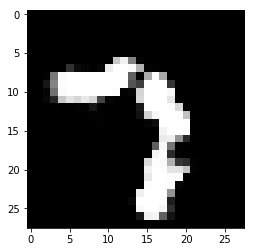

Loop: 732100, Generator_loss: -0.0073157, Discriminator_loss: -0.0020873
Loop: 732200, Generator_loss: -0.015993, Discriminator_loss: 0.0018004
Loop: 732300, Generator_loss: -0.015575, Discriminator_loss: 0.0041095
Loop: 732400, Generator_loss: 0.038924, Discriminator_loss: 0.0010074
Loop: 732500, Generator_loss: 0.010748, Discriminator_loss: 0.0010756
Loop: 732600, Generator_loss: -0.010744, Discriminator_loss: 0.00090484
Loop: 732700, Generator_loss: -0.0044897, Discriminator_loss: -0.0034489
Loop: 732800, Generator_loss: -0.047246, Discriminator_loss: 0.00016589
Loop: 732900, Generator_loss: -0.0072998, Discriminator_loss: -2.9761e-05
Loop: 733000, Generator_loss: -0.01685, Discriminator_loss: 0.0041305


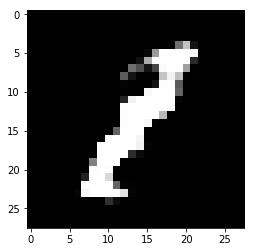

Loop: 733100, Generator_loss: -0.02646, Discriminator_loss: 0.0044933
Loop: 733200, Generator_loss: -0.026817, Discriminator_loss: 0.010241
Loop: 733300, Generator_loss: 0.0044062, Discriminator_loss: 0.0040065
Loop: 733400, Generator_loss: 0.015527, Discriminator_loss: -0.0017048
Loop: 733500, Generator_loss: -0.010028, Discriminator_loss: 0.01139
Loop: 733600, Generator_loss: -0.018796, Discriminator_loss: 0.0072696
Loop: 733700, Generator_loss: -0.013905, Discriminator_loss: 0.006583
Loop: 733800, Generator_loss: -0.02963, Discriminator_loss: 0.0026615
Loop: 733900, Generator_loss: -0.0283, Discriminator_loss: 0.0010425
Loop: 734000, Generator_loss: -0.0012019, Discriminator_loss: 0.0038785


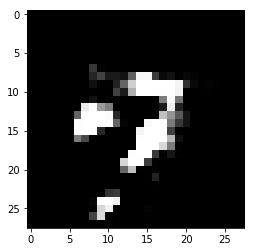

Loop: 734100, Generator_loss: -0.002806, Discriminator_loss: 0.002554
Loop: 734200, Generator_loss: -0.025129, Discriminator_loss: 0.0030998
Loop: 734300, Generator_loss: -0.023874, Discriminator_loss: 0.0062033
Loop: 734400, Generator_loss: -0.058105, Discriminator_loss: 0.0010739
Loop: 734500, Generator_loss: -0.022483, Discriminator_loss: 0.0013173
Loop: 734600, Generator_loss: -0.019953, Discriminator_loss: 0.0022488
Loop: 734700, Generator_loss: -0.034436, Discriminator_loss: -0.008345
Loop: 734800, Generator_loss: -0.031752, Discriminator_loss: 0.0023963
Loop: 734900, Generator_loss: 0.023453, Discriminator_loss: -0.0023683
Loop: 735000, Generator_loss: 0.015496, Discriminator_loss: 0.0006459


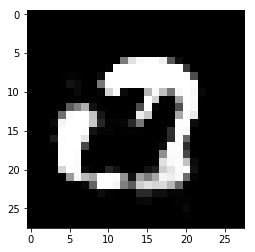

Loop: 735100, Generator_loss: 0.039853, Discriminator_loss: 0.0023018
Loop: 735200, Generator_loss: 0.010692, Discriminator_loss: 0.0068631
Loop: 735300, Generator_loss: -0.0024954, Discriminator_loss: 0.0031793
Loop: 735400, Generator_loss: -0.03385, Discriminator_loss: 0.005897
Loop: 735500, Generator_loss: -0.01809, Discriminator_loss: 0.00093941
Loop: 735600, Generator_loss: -0.018216, Discriminator_loss: 0.0035083
Loop: 735700, Generator_loss: -0.0016117, Discriminator_loss: 0.006116
Loop: 735800, Generator_loss: -0.010284, Discriminator_loss: 0.00053422
Loop: 735900, Generator_loss: 0.010958, Discriminator_loss: -0.0022059
Loop: 736000, Generator_loss: 0.017482, Discriminator_loss: 0.0011767


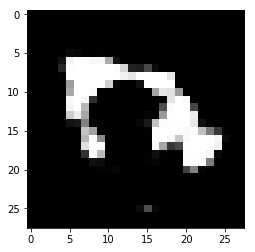

Loop: 736100, Generator_loss: -0.0071704, Discriminator_loss: 0.00099389
Loop: 736200, Generator_loss: 0.0039143, Discriminator_loss: 0.0043441
Loop: 736300, Generator_loss: 0.0018457, Discriminator_loss: -0.00028646
Loop: 736400, Generator_loss: 0.020837, Discriminator_loss: -0.0011461
Loop: 736500, Generator_loss: 0.0004554, Discriminator_loss: -0.0037047
Loop: 736600, Generator_loss: -0.0032674, Discriminator_loss: 0.0039788
Loop: 736700, Generator_loss: 0.026376, Discriminator_loss: -0.0026381
Loop: 736800, Generator_loss: 0.026896, Discriminator_loss: -0.001161
Loop: 736900, Generator_loss: 0.07284, Discriminator_loss: 0.018877
Loop: 737000, Generator_loss: 0.038572, Discriminator_loss: 0.0019637


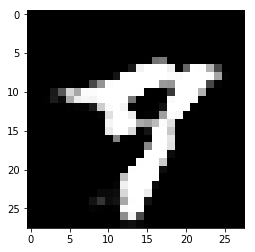

Loop: 737100, Generator_loss: 0.0051261, Discriminator_loss: 0.0049161
Loop: 737200, Generator_loss: -0.013708, Discriminator_loss: 0.0047495
Loop: 737300, Generator_loss: -0.061375, Discriminator_loss: 0.0025786
Loop: 737400, Generator_loss: -0.019308, Discriminator_loss: -0.0084391
Loop: 737500, Generator_loss: 0.00099231, Discriminator_loss: 0.0096488
Loop: 737600, Generator_loss: 0.020468, Discriminator_loss: 0.0063581
Loop: 737700, Generator_loss: -0.024936, Discriminator_loss: 0.0067539
Loop: 737800, Generator_loss: 0.0082682, Discriminator_loss: 0.002396
Loop: 737900, Generator_loss: 0.028479, Discriminator_loss: 0.0025295
Loop: 738000, Generator_loss: 0.028956, Discriminator_loss: 0.0063486


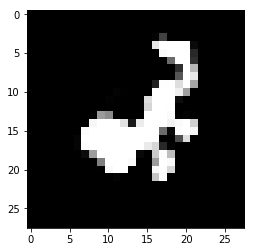

Loop: 738100, Generator_loss: 0.028783, Discriminator_loss: 0.0058936
Loop: 738200, Generator_loss: -0.021702, Discriminator_loss: 0.0017665
Loop: 738300, Generator_loss: -0.011529, Discriminator_loss: 0.0037247
Loop: 738400, Generator_loss: -0.011925, Discriminator_loss: 0.0083359
Loop: 738500, Generator_loss: -0.02577, Discriminator_loss: 0.00065816
Loop: 738600, Generator_loss: -0.0068965, Discriminator_loss: -0.0020585
Loop: 738700, Generator_loss: -0.027075, Discriminator_loss: -0.0046672
Loop: 738800, Generator_loss: -0.015095, Discriminator_loss: 0.010403
Loop: 738900, Generator_loss: -0.032836, Discriminator_loss: 0.001055
Loop: 739000, Generator_loss: 0.050291, Discriminator_loss: -0.0065477


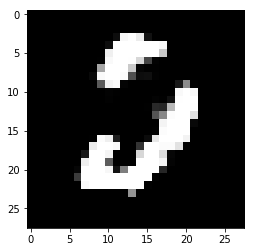

Loop: 739100, Generator_loss: -0.0018987, Discriminator_loss: 0.0080651
Loop: 739200, Generator_loss: 0.0070807, Discriminator_loss: -0.0077377
Loop: 739300, Generator_loss: -0.0055662, Discriminator_loss: 6.224e-05
Loop: 739400, Generator_loss: -0.053396, Discriminator_loss: -0.00090412
Loop: 739500, Generator_loss: -0.019613, Discriminator_loss: 0.0029676
Loop: 739600, Generator_loss: 0.0079584, Discriminator_loss: 0.00023187
Loop: 739700, Generator_loss: 0.037636, Discriminator_loss: 0.0088082
Loop: 739800, Generator_loss: 0.057958, Discriminator_loss: -0.0024632
Loop: 739900, Generator_loss: 0.024963, Discriminator_loss: -0.00066217
Loop: 740000, Generator_loss: -0.014411, Discriminator_loss: -0.0024585


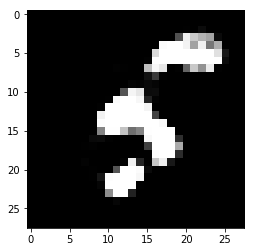

Loop: 740100, Generator_loss: -0.038022, Discriminator_loss: 0.00069335
Loop: 740200, Generator_loss: 0.043795, Discriminator_loss: -0.00055273
Loop: 740300, Generator_loss: -0.018573, Discriminator_loss: -0.00025625
Loop: 740400, Generator_loss: 0.007606, Discriminator_loss: -0.00025155
Loop: 740500, Generator_loss: 0.049725, Discriminator_loss: -0.0048141
Loop: 740600, Generator_loss: -0.028297, Discriminator_loss: 0.0046956
Loop: 740700, Generator_loss: -0.026412, Discriminator_loss: 0.0060699
Loop: 740800, Generator_loss: -0.025824, Discriminator_loss: 0.0072369
Loop: 740900, Generator_loss: -0.041809, Discriminator_loss: 0.001015
Loop: 741000, Generator_loss: 0.036812, Discriminator_loss: -0.0054327


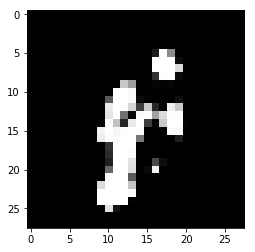

Loop: 741100, Generator_loss: 0.0011526, Discriminator_loss: -0.00037095
Loop: 741200, Generator_loss: -0.030519, Discriminator_loss: -0.0035401
Loop: 741300, Generator_loss: -0.030626, Discriminator_loss: 0.00037299
Loop: 741400, Generator_loss: 0.052721, Discriminator_loss: 0.0059218
Loop: 741500, Generator_loss: 0.010118, Discriminator_loss: 0.0032947
Loop: 741600, Generator_loss: 0.020393, Discriminator_loss: 0.0070292
Loop: 741700, Generator_loss: 0.024658, Discriminator_loss: -0.0015509
Loop: 741800, Generator_loss: -0.032952, Discriminator_loss: 0.0020267
Loop: 741900, Generator_loss: 0.032285, Discriminator_loss: -0.0015637
Loop: 742000, Generator_loss: 0.019404, Discriminator_loss: 0.0064285


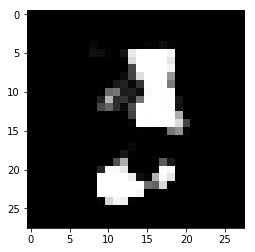

Loop: 742100, Generator_loss: 0.042971, Discriminator_loss: -0.012569
Loop: 742200, Generator_loss: -0.0096535, Discriminator_loss: 0.0075093
Loop: 742300, Generator_loss: 0.017894, Discriminator_loss: 0.0040662
Loop: 742400, Generator_loss: 0.024055, Discriminator_loss: 0.0029915
Loop: 742500, Generator_loss: -0.01686, Discriminator_loss: -0.0022968
Loop: 742600, Generator_loss: -0.04671, Discriminator_loss: -0.0040347
Loop: 742700, Generator_loss: 0.028303, Discriminator_loss: 0.0043022
Loop: 742800, Generator_loss: -0.0134, Discriminator_loss: 0.0095056
Loop: 742900, Generator_loss: -0.0018401, Discriminator_loss: 0.0028134
Loop: 743000, Generator_loss: -0.021563, Discriminator_loss: 0.0075184


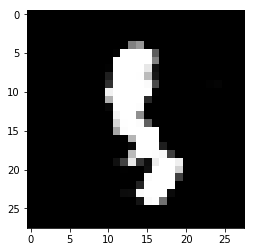

Loop: 743100, Generator_loss: -0.025821, Discriminator_loss: 0.0093552
Loop: 743200, Generator_loss: -0.04576, Discriminator_loss: 0.0044635
Loop: 743300, Generator_loss: 0.033739, Discriminator_loss: 0.0034391
Loop: 743400, Generator_loss: -0.0028832, Discriminator_loss: 0.0099368
Loop: 743500, Generator_loss: -0.011607, Discriminator_loss: -0.0056799
Loop: 743600, Generator_loss: -0.0067135, Discriminator_loss: -0.0013605
Loop: 743700, Generator_loss: 0.028396, Discriminator_loss: 0.011238
Loop: 743800, Generator_loss: -0.019707, Discriminator_loss: -0.0038701
Loop: 743900, Generator_loss: -0.022982, Discriminator_loss: 0.0057249
Loop: 744000, Generator_loss: -0.0046169, Discriminator_loss: 0.0043162


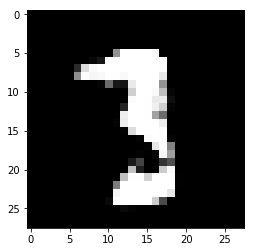

Loop: 744100, Generator_loss: 0.032358, Discriminator_loss: -0.0017693
Loop: 744200, Generator_loss: 0.016776, Discriminator_loss: 0.0056605
Loop: 744300, Generator_loss: 0.046473, Discriminator_loss: 0.0069213
Loop: 744400, Generator_loss: 0.038687, Discriminator_loss: -0.0021608
Loop: 744500, Generator_loss: 0.022952, Discriminator_loss: 0.00494
Loop: 744600, Generator_loss: 0.013893, Discriminator_loss: 0.0049524
Loop: 744700, Generator_loss: 0.038702, Discriminator_loss: -0.0027271
Loop: 744800, Generator_loss: 0.033185, Discriminator_loss: 0.0092305
Loop: 744900, Generator_loss: -0.02586, Discriminator_loss: 0.0060538
Loop: 745000, Generator_loss: 0.044881, Discriminator_loss: 0.0036186


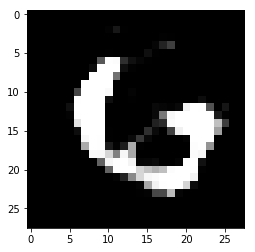

Loop: 745100, Generator_loss: -0.039596, Discriminator_loss: 0.0086253
Loop: 745200, Generator_loss: -0.016345, Discriminator_loss: 0.0085505
Loop: 745300, Generator_loss: -0.042689, Discriminator_loss: 0.00086368
Loop: 745400, Generator_loss: 0.019591, Discriminator_loss: 0.0025566
Loop: 745500, Generator_loss: -0.020397, Discriminator_loss: 0.0018197
Loop: 745600, Generator_loss: -0.012564, Discriminator_loss: 0.0064481
Loop: 745700, Generator_loss: -0.026003, Discriminator_loss: 0.001864
Loop: 745800, Generator_loss: -0.041641, Discriminator_loss: 0.0096631
Loop: 745900, Generator_loss: 0.0011997, Discriminator_loss: 0.0031943
Loop: 746000, Generator_loss: 0.0062586, Discriminator_loss: 0.010181


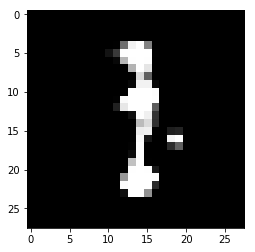

Loop: 746100, Generator_loss: -0.024587, Discriminator_loss: 0.0040079
Loop: 746200, Generator_loss: -0.035717, Discriminator_loss: -0.00084796
Loop: 746300, Generator_loss: 0.038223, Discriminator_loss: 0.0046162
Loop: 746400, Generator_loss: -0.04267, Discriminator_loss: 0.0041291
Loop: 746500, Generator_loss: 0.018029, Discriminator_loss: -0.0024084
Loop: 746600, Generator_loss: -0.074815, Discriminator_loss: 0.0019967
Loop: 746700, Generator_loss: 0.039077, Discriminator_loss: 0.002798
Loop: 746800, Generator_loss: -0.026544, Discriminator_loss: -0.0013112
Loop: 746900, Generator_loss: 0.012106, Discriminator_loss: -0.0026857
Loop: 747000, Generator_loss: -0.031245, Discriminator_loss: 0.0027455


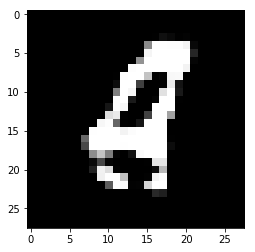

Loop: 747100, Generator_loss: 0.02726, Discriminator_loss: 0.0077381
Loop: 747200, Generator_loss: -0.039582, Discriminator_loss: 0.0023655
Loop: 747300, Generator_loss: -0.0093499, Discriminator_loss: -0.0040308
Loop: 747400, Generator_loss: 0.017578, Discriminator_loss: 0.0059807
Loop: 747500, Generator_loss: 0.012012, Discriminator_loss: 0.0028319
Loop: 747600, Generator_loss: -0.032456, Discriminator_loss: 0.00081649
Loop: 747700, Generator_loss: 0.024007, Discriminator_loss: -0.0015458
Loop: 747800, Generator_loss: -0.0063641, Discriminator_loss: 0.0043322
Loop: 747900, Generator_loss: 0.066732, Discriminator_loss: 0.0041766
Loop: 748000, Generator_loss: 0.0044718, Discriminator_loss: 0.010373


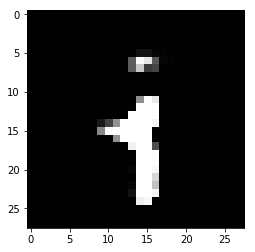

Loop: 748100, Generator_loss: 0.067485, Discriminator_loss: 0.0086507
Loop: 748200, Generator_loss: -0.0068999, Discriminator_loss: 0.0049997
Loop: 748300, Generator_loss: -0.061029, Discriminator_loss: 0.0091328
Loop: 748400, Generator_loss: 0.011626, Discriminator_loss: -0.0009492
Loop: 748500, Generator_loss: 0.053125, Discriminator_loss: 0.012582
Loop: 748600, Generator_loss: -0.079411, Discriminator_loss: 0.0044314
Loop: 748700, Generator_loss: -0.02148, Discriminator_loss: -0.0014491
Loop: 748800, Generator_loss: -0.0017065, Discriminator_loss: 0.0062634
Loop: 748900, Generator_loss: 0.0019314, Discriminator_loss: 0.00473
Loop: 749000, Generator_loss: 0.060024, Discriminator_loss: 0.0069467


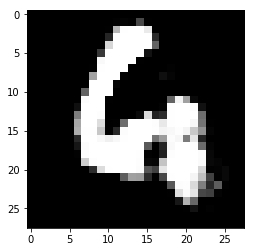

Loop: 749100, Generator_loss: -0.048485, Discriminator_loss: 0.0034652
Loop: 749200, Generator_loss: 0.0012203, Discriminator_loss: 0.015695
Loop: 749300, Generator_loss: 0.0032957, Discriminator_loss: 0.0057364
Loop: 749400, Generator_loss: -0.067364, Discriminator_loss: 0.0056583
Loop: 749500, Generator_loss: 0.013277, Discriminator_loss: 0.0022172
Loop: 749600, Generator_loss: -0.011459, Discriminator_loss: -0.011858
Loop: 749700, Generator_loss: -0.018696, Discriminator_loss: 0.0051593
Loop: 749800, Generator_loss: -0.065193, Discriminator_loss: 0.0072424
Loop: 749900, Generator_loss: 0.00071874, Discriminator_loss: -0.0017278
Loop: 750000, Generator_loss: 0.00086887, Discriminator_loss: 0.0021164


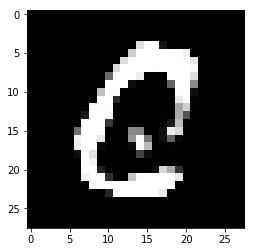

Loop: 750100, Generator_loss: -0.020776, Discriminator_loss: 0.0013461
Loop: 750200, Generator_loss: -0.05267, Discriminator_loss: -0.00061809
Loop: 750300, Generator_loss: -0.025574, Discriminator_loss: 0.0059631
Loop: 750400, Generator_loss: 0.03734, Discriminator_loss: -0.00084461
Loop: 750500, Generator_loss: 0.058834, Discriminator_loss: 0.0037462
Loop: 750600, Generator_loss: 0.0016231, Discriminator_loss: 0.0014729
Loop: 750700, Generator_loss: 0.0019092, Discriminator_loss: 0.0014437
Loop: 750800, Generator_loss: 0.0042622, Discriminator_loss: 0.0070904
Loop: 750900, Generator_loss: 0.0074883, Discriminator_loss: -0.0015882
Loop: 751000, Generator_loss: -0.051022, Discriminator_loss: 0.001694


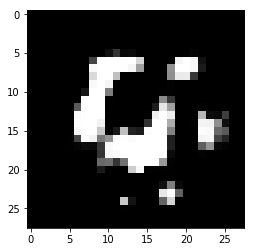

Loop: 751100, Generator_loss: 0.037152, Discriminator_loss: 3.7991e-05
Loop: 751200, Generator_loss: 0.012237, Discriminator_loss: -0.0011943
Loop: 751300, Generator_loss: 0.036245, Discriminator_loss: 0.0072766
Loop: 751400, Generator_loss: -0.017221, Discriminator_loss: 0.0045187
Loop: 751500, Generator_loss: 0.0072824, Discriminator_loss: 0.0026122
Loop: 751600, Generator_loss: -0.028274, Discriminator_loss: 0.00098982
Loop: 751700, Generator_loss: 0.02087, Discriminator_loss: 0.0045778
Loop: 751800, Generator_loss: -0.020782, Discriminator_loss: 0.0018945
Loop: 751900, Generator_loss: -0.034477, Discriminator_loss: 0.0037781
Loop: 752000, Generator_loss: 0.022034, Discriminator_loss: 0.0034947


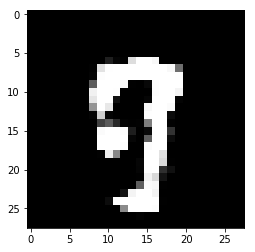

Loop: 752100, Generator_loss: -0.042845, Discriminator_loss: 0.0047817
Loop: 752200, Generator_loss: -0.020353, Discriminator_loss: 0.0041385
Loop: 752300, Generator_loss: -0.034271, Discriminator_loss: -0.003475
Loop: 752400, Generator_loss: -0.046178, Discriminator_loss: -0.0008605
Loop: 752500, Generator_loss: 0.01275, Discriminator_loss: 0.0062998
Loop: 752600, Generator_loss: 0.031213, Discriminator_loss: 0.0044585
Loop: 752700, Generator_loss: -0.004305, Discriminator_loss: -0.0024531
Loop: 752800, Generator_loss: -0.033047, Discriminator_loss: 0.0070676
Loop: 752900, Generator_loss: -0.032469, Discriminator_loss: 0.0085767
Loop: 753000, Generator_loss: -0.018983, Discriminator_loss: -9.9404e-05


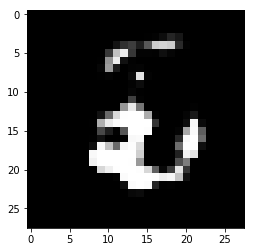

Loop: 753100, Generator_loss: -0.047051, Discriminator_loss: 0.0055717
Loop: 753200, Generator_loss: -0.0030887, Discriminator_loss: -0.0059858
Loop: 753300, Generator_loss: 0.01834, Discriminator_loss: 0.0028316
Loop: 753400, Generator_loss: 0.023795, Discriminator_loss: 0.0074043
Loop: 753500, Generator_loss: -0.03064, Discriminator_loss: 0.0046909
Loop: 753600, Generator_loss: 0.029805, Discriminator_loss: 0.00733
Loop: 753700, Generator_loss: -0.051579, Discriminator_loss: -0.0027709
Loop: 753800, Generator_loss: -0.00066014, Discriminator_loss: -0.0016274
Loop: 753900, Generator_loss: 0.016842, Discriminator_loss: -0.0051594
Loop: 754000, Generator_loss: 0.015344, Discriminator_loss: 0.0037053


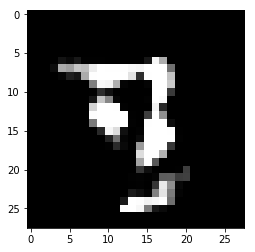

Loop: 754100, Generator_loss: 0.05527, Discriminator_loss: 0.010153
Loop: 754200, Generator_loss: -0.014228, Discriminator_loss: -0.0012281
Loop: 754300, Generator_loss: 0.017396, Discriminator_loss: -0.0025181
Loop: 754400, Generator_loss: -0.012083, Discriminator_loss: 0.0038483
Loop: 754500, Generator_loss: -0.010545, Discriminator_loss: 0.0015149
Loop: 754600, Generator_loss: 0.023167, Discriminator_loss: 0.001868
Loop: 754700, Generator_loss: -0.048169, Discriminator_loss: 0.0096097
Loop: 754800, Generator_loss: 0.01718, Discriminator_loss: -0.00019997
Loop: 754900, Generator_loss: -0.025089, Discriminator_loss: -0.0056116
Loop: 755000, Generator_loss: -0.023094, Discriminator_loss: 0.0027596


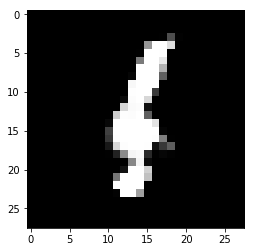

Loop: 755100, Generator_loss: -0.010347, Discriminator_loss: 0.00059906
Loop: 755200, Generator_loss: -0.018275, Discriminator_loss: 0.0085869
Loop: 755300, Generator_loss: -0.048791, Discriminator_loss: 0.0026189
Loop: 755400, Generator_loss: 0.02665, Discriminator_loss: 0.011027
Loop: 755500, Generator_loss: -0.015576, Discriminator_loss: -0.0040899
Loop: 755600, Generator_loss: -0.019978, Discriminator_loss: 0.0019532
Loop: 755700, Generator_loss: 0.036021, Discriminator_loss: -0.00021261
Loop: 755800, Generator_loss: 0.0091768, Discriminator_loss: 0.0011605
Loop: 755900, Generator_loss: 0.0075189, Discriminator_loss: 0.0044323
Loop: 756000, Generator_loss: -0.076425, Discriminator_loss: 0.0034419


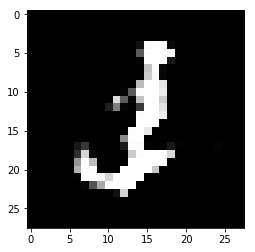

Loop: 756100, Generator_loss: -0.039727, Discriminator_loss: 0.010515
Loop: 756200, Generator_loss: 0.00086015, Discriminator_loss: 0.0059602
Loop: 756300, Generator_loss: -0.041269, Discriminator_loss: 0.0075257
Loop: 756400, Generator_loss: 0.030576, Discriminator_loss: 0.0067163
Loop: 756500, Generator_loss: 0.045968, Discriminator_loss: 0.0064278
Loop: 756600, Generator_loss: 0.0065437, Discriminator_loss: 0.0036402
Loop: 756700, Generator_loss: -0.0057786, Discriminator_loss: 0.00079446
Loop: 756800, Generator_loss: -0.017894, Discriminator_loss: 0.0036277
Loop: 756900, Generator_loss: 0.015824, Discriminator_loss: 0.0015503
Loop: 757000, Generator_loss: -0.012099, Discriminator_loss: 0.0060243


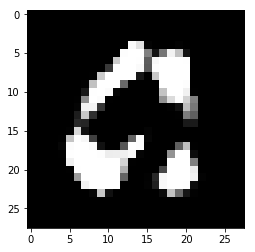

Loop: 757100, Generator_loss: 0.027765, Discriminator_loss: 0.01234
Loop: 757200, Generator_loss: 0.0053206, Discriminator_loss: 0.00020452
Loop: 757300, Generator_loss: -0.013444, Discriminator_loss: 0.0038094
Loop: 757400, Generator_loss: 0.015056, Discriminator_loss: 0.00052735
Loop: 757500, Generator_loss: -0.036039, Discriminator_loss: 0.0095871
Loop: 757600, Generator_loss: 0.025375, Discriminator_loss: 0.0014504
Loop: 757700, Generator_loss: -0.055718, Discriminator_loss: 0.0099497
Loop: 757800, Generator_loss: 0.01976, Discriminator_loss: 0.0053519
Loop: 757900, Generator_loss: -0.045783, Discriminator_loss: 0.0026962
Loop: 758000, Generator_loss: 0.00095799, Discriminator_loss: 0.0070774


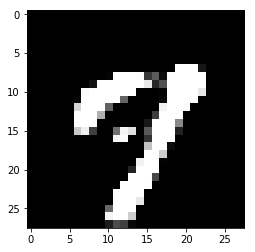

Loop: 758100, Generator_loss: 0.036252, Discriminator_loss: 0.010366
Loop: 758200, Generator_loss: 0.030226, Discriminator_loss: 0.0032356
Loop: 758300, Generator_loss: -0.0078229, Discriminator_loss: 0.0047865
Loop: 758400, Generator_loss: 0.0082543, Discriminator_loss: 0.0058282
Loop: 758500, Generator_loss: 0.020696, Discriminator_loss: 0.0010989
Loop: 758600, Generator_loss: 0.029328, Discriminator_loss: 0.0019686
Loop: 758700, Generator_loss: -0.014441, Discriminator_loss: 0.0035147
Loop: 758800, Generator_loss: -0.014377, Discriminator_loss: 0.00024536
Loop: 758900, Generator_loss: -0.0078057, Discriminator_loss: 0.0016715
Loop: 759000, Generator_loss: 0.019341, Discriminator_loss: 0.010935


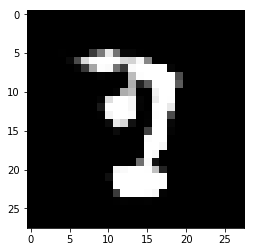

Loop: 759100, Generator_loss: 0.021236, Discriminator_loss: -0.00058476
Loop: 759200, Generator_loss: 0.021405, Discriminator_loss: -0.003156
Loop: 759300, Generator_loss: -0.0094788, Discriminator_loss: 0.0074642
Loop: 759400, Generator_loss: -0.0037508, Discriminator_loss: 0.0047138
Loop: 759500, Generator_loss: 0.024805, Discriminator_loss: 0.0035186
Loop: 759600, Generator_loss: -0.028623, Discriminator_loss: 0.0054466
Loop: 759700, Generator_loss: -0.022558, Discriminator_loss: 0.0027377
Loop: 759800, Generator_loss: -0.018864, Discriminator_loss: 0.00080353
Loop: 759900, Generator_loss: 0.038066, Discriminator_loss: 0.0022134
Loop: 760000, Generator_loss: -0.01639, Discriminator_loss: 0.0015609


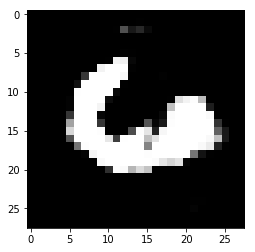

Loop: 760100, Generator_loss: -0.00080823, Discriminator_loss: -0.0035593
Loop: 760200, Generator_loss: -0.022723, Discriminator_loss: 0.0056653
Loop: 760300, Generator_loss: -0.0081559, Discriminator_loss: 0.0003396
Loop: 760400, Generator_loss: -0.0019673, Discriminator_loss: -0.0043383
Loop: 760500, Generator_loss: 0.011144, Discriminator_loss: -0.00063887
Loop: 760600, Generator_loss: 0.0027502, Discriminator_loss: 0.00066209
Loop: 760700, Generator_loss: -0.02069, Discriminator_loss: -0.0024785
Loop: 760800, Generator_loss: 0.022275, Discriminator_loss: 0.00042724
Loop: 760900, Generator_loss: 0.039098, Discriminator_loss: 0.0011557
Loop: 761000, Generator_loss: -0.048017, Discriminator_loss: -0.0015323


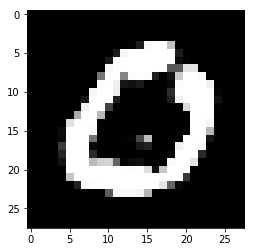

Loop: 761100, Generator_loss: -0.0041607, Discriminator_loss: 0.0044232
Loop: 761200, Generator_loss: -0.019458, Discriminator_loss: 0.0028721
Loop: 761300, Generator_loss: -0.043216, Discriminator_loss: 0.0059105
Loop: 761400, Generator_loss: 0.0023836, Discriminator_loss: 0.0012358
Loop: 761500, Generator_loss: 0.003845, Discriminator_loss: 0.001646
Loop: 761600, Generator_loss: -0.037841, Discriminator_loss: -0.00022995
Loop: 761700, Generator_loss: -0.016624, Discriminator_loss: -0.00068862
Loop: 761800, Generator_loss: 0.00088649, Discriminator_loss: -0.00021167
Loop: 761900, Generator_loss: -0.020369, Discriminator_loss: 0.0025112
Loop: 762000, Generator_loss: -0.044646, Discriminator_loss: -0.011925


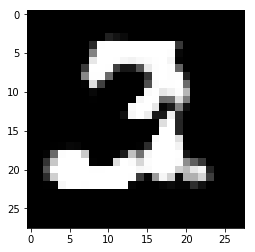

Loop: 762100, Generator_loss: -0.025802, Discriminator_loss: 0.0007408
Loop: 762200, Generator_loss: 0.013712, Discriminator_loss: -0.0006808
Loop: 762300, Generator_loss: 0.015385, Discriminator_loss: 0.002397
Loop: 762400, Generator_loss: 0.0062638, Discriminator_loss: -0.0012717
Loop: 762500, Generator_loss: 0.014689, Discriminator_loss: 0.0040304
Loop: 762600, Generator_loss: 0.0049715, Discriminator_loss: -0.0019088
Loop: 762700, Generator_loss: -0.011942, Discriminator_loss: 0.0019786
Loop: 762800, Generator_loss: -0.0075679, Discriminator_loss: -0.0054482
Loop: 762900, Generator_loss: -0.082768, Discriminator_loss: 0.0092375
Loop: 763000, Generator_loss: -0.054509, Discriminator_loss: 0.00079994


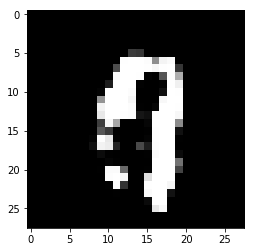

Loop: 763100, Generator_loss: -0.014271, Discriminator_loss: 0.0032556
Loop: 763200, Generator_loss: -0.026342, Discriminator_loss: 0.0061016
Loop: 763300, Generator_loss: 0.015165, Discriminator_loss: 0.0025538
Loop: 763400, Generator_loss: -0.070567, Discriminator_loss: 0.0034329
Loop: 763500, Generator_loss: -0.034948, Discriminator_loss: 0.0053297
Loop: 763600, Generator_loss: -0.0065206, Discriminator_loss: -0.0050437
Loop: 763700, Generator_loss: 0.027442, Discriminator_loss: 0.003335
Loop: 763800, Generator_loss: -0.02405, Discriminator_loss: 0.0045815
Loop: 763900, Generator_loss: -0.058622, Discriminator_loss: 0.00629
Loop: 764000, Generator_loss: -0.037431, Discriminator_loss: -0.0011806


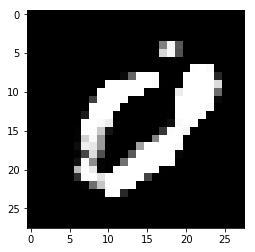

Loop: 764100, Generator_loss: -0.031769, Discriminator_loss: -0.0026396
Loop: 764200, Generator_loss: 0.027699, Discriminator_loss: 0.0085035
Loop: 764300, Generator_loss: -0.009229, Discriminator_loss: 0.0067926
Loop: 764400, Generator_loss: -0.010927, Discriminator_loss: 0.00055887
Loop: 764500, Generator_loss: -0.021327, Discriminator_loss: 0.007774
Loop: 764600, Generator_loss: 0.006754, Discriminator_loss: -0.00031858
Loop: 764700, Generator_loss: -0.025736, Discriminator_loss: -0.0004988
Loop: 764800, Generator_loss: -0.018105, Discriminator_loss: 0.0050337
Loop: 764900, Generator_loss: -0.01898, Discriminator_loss: -0.00077958
Loop: 765000, Generator_loss: 0.0029849, Discriminator_loss: -0.00058688


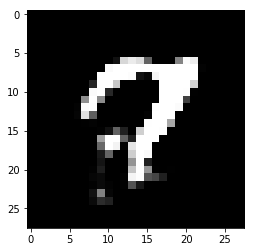

Loop: 765100, Generator_loss: -0.033166, Discriminator_loss: 0.0019451
Loop: 765200, Generator_loss: 0.018988, Discriminator_loss: 0.0049943
Loop: 765300, Generator_loss: -0.032427, Discriminator_loss: 0.0039981
Loop: 765400, Generator_loss: 0.010979, Discriminator_loss: 0.0013119
Loop: 765500, Generator_loss: 0.025618, Discriminator_loss: 0.0032049
Loop: 765600, Generator_loss: 0.022286, Discriminator_loss: 0.0024426
Loop: 765700, Generator_loss: -0.040127, Discriminator_loss: -0.00034309
Loop: 765800, Generator_loss: -0.014219, Discriminator_loss: 0.00013949
Loop: 765900, Generator_loss: 0.0015007, Discriminator_loss: -0.0063928
Loop: 766000, Generator_loss: 0.0071799, Discriminator_loss: -0.0021638


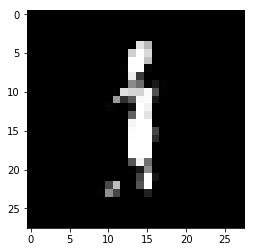

Loop: 766100, Generator_loss: -0.042755, Discriminator_loss: 0.0015483
Loop: 766200, Generator_loss: -0.029272, Discriminator_loss: -0.00062342
Loop: 766300, Generator_loss: -3.4704e-06, Discriminator_loss: 0.00023291
Loop: 766400, Generator_loss: -0.063263, Discriminator_loss: 0.0080097
Loop: 766500, Generator_loss: -0.020598, Discriminator_loss: -0.0013874
Loop: 766600, Generator_loss: -0.0084184, Discriminator_loss: 0.0016762
Loop: 766700, Generator_loss: -0.0056247, Discriminator_loss: 0.0051454
Loop: 766800, Generator_loss: 0.045128, Discriminator_loss: -0.0042556
Loop: 766900, Generator_loss: 0.014453, Discriminator_loss: 0.00021187
Loop: 767000, Generator_loss: -0.016533, Discriminator_loss: 0.0047425


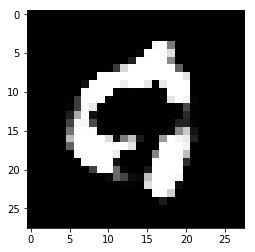

Loop: 767100, Generator_loss: 0.0045485, Discriminator_loss: 0.008927
Loop: 767200, Generator_loss: -0.027643, Discriminator_loss: 0.0042887
Loop: 767300, Generator_loss: -0.043372, Discriminator_loss: 0.0057451
Loop: 767400, Generator_loss: -0.019625, Discriminator_loss: 0.0039362
Loop: 767500, Generator_loss: -0.044966, Discriminator_loss: 0.010364
Loop: 767600, Generator_loss: 0.0040157, Discriminator_loss: 0.0079966
Loop: 767700, Generator_loss: -0.034561, Discriminator_loss: 0.002769
Loop: 767800, Generator_loss: -0.029336, Discriminator_loss: 0.006954
Loop: 767900, Generator_loss: 0.02755, Discriminator_loss: 0.0025369
Loop: 768000, Generator_loss: -0.034155, Discriminator_loss: -0.0066523


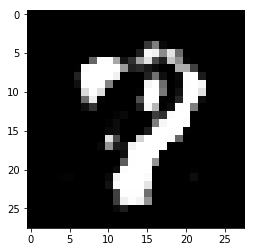

Loop: 768100, Generator_loss: 0.020747, Discriminator_loss: 0.0035962
Loop: 768200, Generator_loss: -0.016941, Discriminator_loss: -0.00068507
Loop: 768300, Generator_loss: -0.065485, Discriminator_loss: 0.0095134
Loop: 768400, Generator_loss: -0.046733, Discriminator_loss: 0.0019005
Loop: 768500, Generator_loss: -0.0036807, Discriminator_loss: 0.0087939
Loop: 768600, Generator_loss: -0.04748, Discriminator_loss: 0.0033662
Loop: 768700, Generator_loss: -0.00048383, Discriminator_loss: 0.0029631
Loop: 768800, Generator_loss: 0.0033405, Discriminator_loss: 0.0038095
Loop: 768900, Generator_loss: 0.004059, Discriminator_loss: -0.0011018
Loop: 769000, Generator_loss: 0.032341, Discriminator_loss: 0.01048


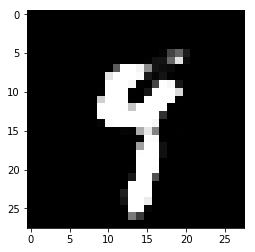

Loop: 769100, Generator_loss: -0.0012452, Discriminator_loss: 0.0025648
Loop: 769200, Generator_loss: -0.0083956, Discriminator_loss: -0.0031816
Loop: 769300, Generator_loss: -0.0082383, Discriminator_loss: 0.0039708
Loop: 769400, Generator_loss: 0.0088654, Discriminator_loss: 0.0018915
Loop: 769500, Generator_loss: 0.0057386, Discriminator_loss: 0.0014084
Loop: 769600, Generator_loss: -0.0045352, Discriminator_loss: 0.0058924
Loop: 769700, Generator_loss: -0.0073496, Discriminator_loss: 0.0018418
Loop: 769800, Generator_loss: -0.011873, Discriminator_loss: 0.0025353
Loop: 769900, Generator_loss: -0.031032, Discriminator_loss: 0.0050297
Loop: 770000, Generator_loss: 0.03433, Discriminator_loss: -0.0027666


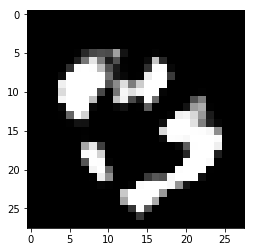

Loop: 770100, Generator_loss: -0.017813, Discriminator_loss: 0.0064778
Loop: 770200, Generator_loss: -0.054216, Discriminator_loss: 0.00029768
Loop: 770300, Generator_loss: -0.040107, Discriminator_loss: -0.003221
Loop: 770400, Generator_loss: 0.0040733, Discriminator_loss: 0.0045115
Loop: 770500, Generator_loss: -0.027067, Discriminator_loss: 0.0036429
Loop: 770600, Generator_loss: 0.01104, Discriminator_loss: -0.0027151
Loop: 770700, Generator_loss: -0.035429, Discriminator_loss: -0.0013953
Loop: 770800, Generator_loss: -0.01542, Discriminator_loss: 0.0014383
Loop: 770900, Generator_loss: -0.026283, Discriminator_loss: 8.5123e-06
Loop: 771000, Generator_loss: -0.0119, Discriminator_loss: 0.0020932


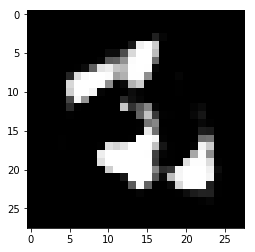

Loop: 771100, Generator_loss: -0.0009492, Discriminator_loss: -0.0049637
Loop: 771200, Generator_loss: -0.011957, Discriminator_loss: 0.00096529
Loop: 771300, Generator_loss: -0.035558, Discriminator_loss: -0.00077883
Loop: 771400, Generator_loss: -0.010512, Discriminator_loss: -0.00018923
Loop: 771500, Generator_loss: -0.0070337, Discriminator_loss: -0.0012333
Loop: 771600, Generator_loss: -0.036256, Discriminator_loss: -0.0011952
Loop: 771700, Generator_loss: -0.066518, Discriminator_loss: 0.0018147
Loop: 771800, Generator_loss: -0.021204, Discriminator_loss: 0.0088717
Loop: 771900, Generator_loss: -0.012163, Discriminator_loss: -0.00051255
Loop: 772000, Generator_loss: 0.001552, Discriminator_loss: -0.0024589


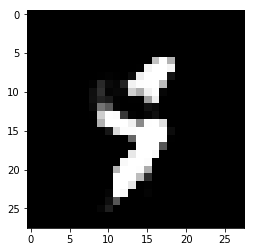

Loop: 772100, Generator_loss: -0.019454, Discriminator_loss: 0.0055434
Loop: 772200, Generator_loss: -0.029947, Discriminator_loss: 0.0038294
Loop: 772300, Generator_loss: -0.046377, Discriminator_loss: -0.0023815
Loop: 772400, Generator_loss: 0.01886, Discriminator_loss: -0.0018757
Loop: 772500, Generator_loss: 0.012403, Discriminator_loss: -0.0022245
Loop: 772600, Generator_loss: -0.035744, Discriminator_loss: 0.0023986
Loop: 772700, Generator_loss: -0.019534, Discriminator_loss: -0.0041171
Loop: 772800, Generator_loss: 0.0071386, Discriminator_loss: 0.0016476
Loop: 772900, Generator_loss: -0.029489, Discriminator_loss: 0.0010755
Loop: 773000, Generator_loss: 0.0025937, Discriminator_loss: 0.0057463


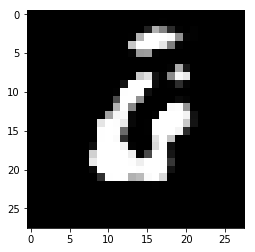

Loop: 773100, Generator_loss: -0.017366, Discriminator_loss: 0.0013689
Loop: 773200, Generator_loss: 0.0086463, Discriminator_loss: 0.0050542
Loop: 773300, Generator_loss: -0.02917, Discriminator_loss: 0.013694
Loop: 773400, Generator_loss: -0.0045349, Discriminator_loss: 0.0020551
Loop: 773500, Generator_loss: -0.027071, Discriminator_loss: 0.0024629
Loop: 773600, Generator_loss: -0.03574, Discriminator_loss: 0.0016997
Loop: 773700, Generator_loss: -0.02332, Discriminator_loss: 0.0080312
Loop: 773800, Generator_loss: -0.019032, Discriminator_loss: 0.001128
Loop: 773900, Generator_loss: 0.022905, Discriminator_loss: 0.0052154
Loop: 774000, Generator_loss: -0.015688, Discriminator_loss: 0.0025305


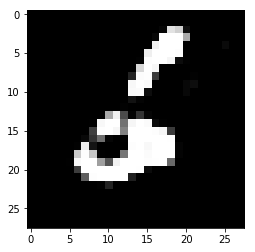

Loop: 774100, Generator_loss: 0.022852, Discriminator_loss: 0.00020327
Loop: 774200, Generator_loss: -0.0043475, Discriminator_loss: 0.0030958
Loop: 774300, Generator_loss: 0.032422, Discriminator_loss: 0.011951
Loop: 774400, Generator_loss: -0.012486, Discriminator_loss: 0.0050993
Loop: 774500, Generator_loss: -0.027928, Discriminator_loss: 0.0020147
Loop: 774600, Generator_loss: -0.018184, Discriminator_loss: 0.0092019
Loop: 774700, Generator_loss: -0.061404, Discriminator_loss: 0.0055737
Loop: 774800, Generator_loss: -0.043675, Discriminator_loss: 0.0064302
Loop: 774900, Generator_loss: -0.028206, Discriminator_loss: 0.00011398
Loop: 775000, Generator_loss: -0.064422, Discriminator_loss: 0.0035921


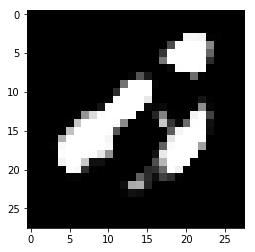

Loop: 775100, Generator_loss: 0.047387, Discriminator_loss: 0.0078354
Loop: 775200, Generator_loss: 0.055085, Discriminator_loss: -0.0022224
Loop: 775300, Generator_loss: -0.023167, Discriminator_loss: 0.0026023
Loop: 775400, Generator_loss: -0.040985, Discriminator_loss: 0.0059844
Loop: 775500, Generator_loss: -0.024799, Discriminator_loss: -0.0036684
Loop: 775600, Generator_loss: -0.028932, Discriminator_loss: 0.0043629
Loop: 775700, Generator_loss: 0.0034311, Discriminator_loss: 0.002935
Loop: 775800, Generator_loss: -0.071468, Discriminator_loss: 0.003359
Loop: 775900, Generator_loss: -0.0098099, Discriminator_loss: -0.0001664
Loop: 776000, Generator_loss: -0.049776, Discriminator_loss: 0.0045324


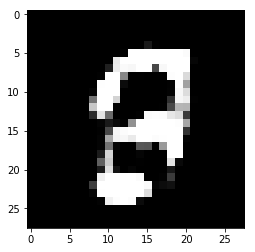

Loop: 776100, Generator_loss: -0.015137, Discriminator_loss: 0.0085659
Loop: 776200, Generator_loss: -0.00031257, Discriminator_loss: 0.00046997
Loop: 776300, Generator_loss: -0.024727, Discriminator_loss: 0.0028464
Loop: 776400, Generator_loss: -0.022932, Discriminator_loss: 0.00014292
Loop: 776500, Generator_loss: 0.019652, Discriminator_loss: 0.00058532
Loop: 776600, Generator_loss: -0.020285, Discriminator_loss: -0.001414
Loop: 776700, Generator_loss: 0.0052533, Discriminator_loss: -0.0012127
Loop: 776800, Generator_loss: -0.044679, Discriminator_loss: 0.0044642
Loop: 776900, Generator_loss: -0.019645, Discriminator_loss: 0.00036188
Loop: 777000, Generator_loss: -0.066014, Discriminator_loss: -0.0082574


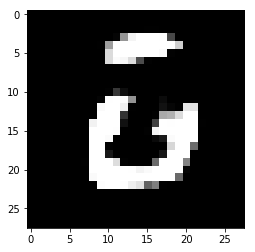

Loop: 777100, Generator_loss: -0.036671, Discriminator_loss: -0.0080251
Loop: 777200, Generator_loss: 0.019649, Discriminator_loss: 0.0022619
Loop: 777300, Generator_loss: 0.018224, Discriminator_loss: 0.0011689
Loop: 777400, Generator_loss: 0.02075, Discriminator_loss: 0.0023344
Loop: 777500, Generator_loss: 0.00090137, Discriminator_loss: -0.00081949
Loop: 777600, Generator_loss: -0.024382, Discriminator_loss: 0.00096997
Loop: 777700, Generator_loss: 0.0048974, Discriminator_loss: 0.0048765
Loop: 777800, Generator_loss: 0.0104, Discriminator_loss: -0.005445
Loop: 777900, Generator_loss: -0.015865, Discriminator_loss: 0.0066689
Loop: 778000, Generator_loss: -0.0065484, Discriminator_loss: 0.0031635


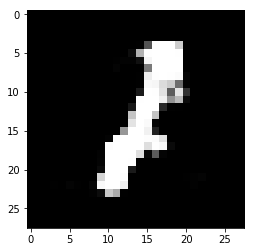

Loop: 778100, Generator_loss: -0.041642, Discriminator_loss: 0.0025643
Loop: 778200, Generator_loss: 0.00044726, Discriminator_loss: 0.0046449
Loop: 778300, Generator_loss: 0.015973, Discriminator_loss: 0.0078842
Loop: 778400, Generator_loss: 0.026545, Discriminator_loss: 0.0041793
Loop: 778500, Generator_loss: -0.010494, Discriminator_loss: 0.0037831
Loop: 778600, Generator_loss: -0.034419, Discriminator_loss: 0.0044644
Loop: 778700, Generator_loss: -0.051518, Discriminator_loss: 0.0050798
Loop: 778800, Generator_loss: 0.00055459, Discriminator_loss: 0.00034798
Loop: 778900, Generator_loss: 0.012325, Discriminator_loss: 0.0041553
Loop: 779000, Generator_loss: -0.041423, Discriminator_loss: 0.0056933


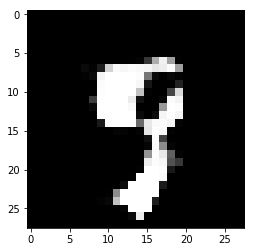

Loop: 779100, Generator_loss: -0.024273, Discriminator_loss: 0.0014988
Loop: 779200, Generator_loss: 0.0084561, Discriminator_loss: 0.0006078
Loop: 779300, Generator_loss: 0.0073364, Discriminator_loss: 0.0072912
Loop: 779400, Generator_loss: -0.051798, Discriminator_loss: -0.0054831
Loop: 779500, Generator_loss: -0.0090948, Discriminator_loss: 0.0001438
Loop: 779600, Generator_loss: -0.047363, Discriminator_loss: -0.0040545
Loop: 779700, Generator_loss: -0.043073, Discriminator_loss: -0.0017195
Loop: 779800, Generator_loss: 0.042418, Discriminator_loss: 0.0051155
Loop: 779900, Generator_loss: -0.052789, Discriminator_loss: 0.0042222
Loop: 780000, Generator_loss: 0.0030135, Discriminator_loss: 0.00137


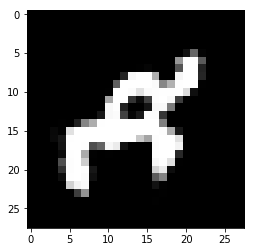

Loop: 780100, Generator_loss: 0.012412, Discriminator_loss: 0.0050232
Loop: 780200, Generator_loss: -0.062349, Discriminator_loss: 0.003442
Loop: 780300, Generator_loss: 0.005093, Discriminator_loss: 0.0010651
Loop: 780400, Generator_loss: 0.014478, Discriminator_loss: 0.0049104
Loop: 780500, Generator_loss: -0.028649, Discriminator_loss: 0.0036697
Loop: 780600, Generator_loss: 0.018806, Discriminator_loss: 0.0081272
Loop: 780700, Generator_loss: -0.04327, Discriminator_loss: -0.0054264
Loop: 780800, Generator_loss: -0.018333, Discriminator_loss: 0.00058408
Loop: 780900, Generator_loss: -0.050744, Discriminator_loss: 0.0081489
Loop: 781000, Generator_loss: 0.025043, Discriminator_loss: -0.00031953


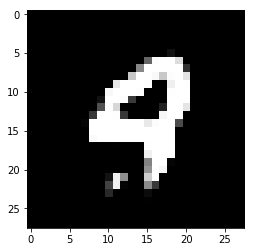

Loop: 781100, Generator_loss: -0.0059005, Discriminator_loss: 0.0014175
Loop: 781200, Generator_loss: -0.026476, Discriminator_loss: 0.0044099
Loop: 781300, Generator_loss: 0.036763, Discriminator_loss: 0.00057238
Loop: 781400, Generator_loss: -0.00093719, Discriminator_loss: -0.00034434
Loop: 781500, Generator_loss: -0.016953, Discriminator_loss: 0.0048869
Loop: 781600, Generator_loss: 0.052599, Discriminator_loss: 0.0096735
Loop: 781700, Generator_loss: 0.030804, Discriminator_loss: 0.0026613
Loop: 781800, Generator_loss: 0.03177, Discriminator_loss: 0.0073443
Loop: 781900, Generator_loss: 0.017225, Discriminator_loss: -0.0038704
Loop: 782000, Generator_loss: -0.01783, Discriminator_loss: 0.00038079


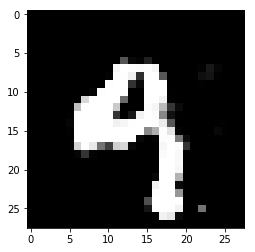

Loop: 782100, Generator_loss: -0.047813, Discriminator_loss: 0.0012358
Loop: 782200, Generator_loss: 0.023282, Discriminator_loss: 0.0094212
Loop: 782300, Generator_loss: -0.07115, Discriminator_loss: 0.0022579
Loop: 782400, Generator_loss: 0.0029578, Discriminator_loss: 0.0015245
Loop: 782500, Generator_loss: -0.04875, Discriminator_loss: 0.0037865
Loop: 782600, Generator_loss: -0.022121, Discriminator_loss: -0.0042288
Loop: 782700, Generator_loss: -0.023041, Discriminator_loss: -0.00021377
Loop: 782800, Generator_loss: -0.01967, Discriminator_loss: 0.008928
Loop: 782900, Generator_loss: -0.0025504, Discriminator_loss: -0.0061347
Loop: 783000, Generator_loss: -0.0092264, Discriminator_loss: 0.0041819


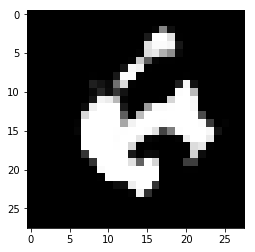

Loop: 783100, Generator_loss: -0.042735, Discriminator_loss: 0.0044098
Loop: 783200, Generator_loss: -0.0018926, Discriminator_loss: 0.0091308
Loop: 783300, Generator_loss: -0.024223, Discriminator_loss: 0.0040567
Loop: 783400, Generator_loss: 0.029301, Discriminator_loss: 0.0024118
Loop: 783500, Generator_loss: -0.03716, Discriminator_loss: -0.00023443
Loop: 783600, Generator_loss: -0.056469, Discriminator_loss: -0.0013578
Loop: 783700, Generator_loss: -0.0087374, Discriminator_loss: 0.0032169
Loop: 783800, Generator_loss: -0.0044849, Discriminator_loss: 0.003652
Loop: 783900, Generator_loss: -0.03475, Discriminator_loss: 0.0034031
Loop: 784000, Generator_loss: 0.068962, Discriminator_loss: -0.001066


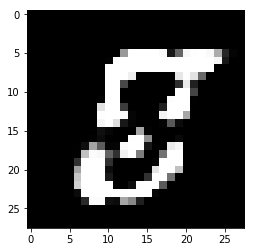

Loop: 784100, Generator_loss: 0.011865, Discriminator_loss: 0.0028292
Loop: 784200, Generator_loss: -0.046957, Discriminator_loss: -0.0060691
Loop: 784300, Generator_loss: -0.025128, Discriminator_loss: 0.0040901
Loop: 784400, Generator_loss: -0.020569, Discriminator_loss: 0.0072715
Loop: 784500, Generator_loss: -0.052101, Discriminator_loss: 0.0033618
Loop: 784600, Generator_loss: 0.044783, Discriminator_loss: 0.0080056
Loop: 784700, Generator_loss: 0.021269, Discriminator_loss: 0.0047481
Loop: 784800, Generator_loss: -0.020512, Discriminator_loss: 0.0044451
Loop: 784900, Generator_loss: -0.0025151, Discriminator_loss: 0.0047187
Loop: 785000, Generator_loss: 0.053474, Discriminator_loss: 0.0044034


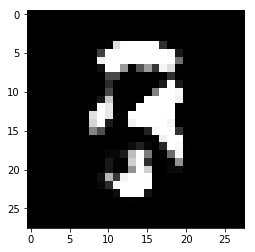

Loop: 785100, Generator_loss: 0.035822, Discriminator_loss: 0.0058529
Loop: 785200, Generator_loss: 0.020643, Discriminator_loss: 0.00066661
Loop: 785300, Generator_loss: 0.020496, Discriminator_loss: 0.0021107
Loop: 785400, Generator_loss: 0.005428, Discriminator_loss: 0.0042441
Loop: 785500, Generator_loss: -0.034692, Discriminator_loss: 0.0014058
Loop: 785600, Generator_loss: -0.031803, Discriminator_loss: 0.0035889
Loop: 785700, Generator_loss: -0.016251, Discriminator_loss: -0.0038515
Loop: 785800, Generator_loss: -0.026054, Discriminator_loss: 0.0029892
Loop: 785900, Generator_loss: -0.0088573, Discriminator_loss: 0.0031158
Loop: 786000, Generator_loss: -0.0266, Discriminator_loss: -0.00021727


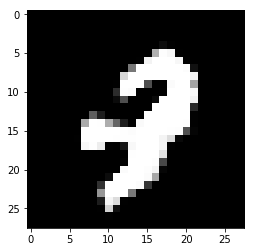

Loop: 786100, Generator_loss: -0.055736, Discriminator_loss: 0.0084051
Loop: 786200, Generator_loss: -0.040539, Discriminator_loss: 0.008008
Loop: 786300, Generator_loss: 0.0040455, Discriminator_loss: 0.0093078
Loop: 786400, Generator_loss: -0.019413, Discriminator_loss: -0.00021427
Loop: 786500, Generator_loss: 0.0097995, Discriminator_loss: 0.0012769
Loop: 786600, Generator_loss: -0.021077, Discriminator_loss: 0.0068075
Loop: 786700, Generator_loss: -0.087553, Discriminator_loss: -0.0025922
Loop: 786800, Generator_loss: -0.048524, Discriminator_loss: 0.0049039
Loop: 786900, Generator_loss: 0.010434, Discriminator_loss: 0.00062985
Loop: 787000, Generator_loss: -0.018932, Discriminator_loss: 0.0027864


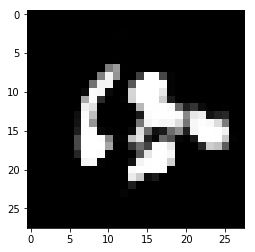

Loop: 787100, Generator_loss: 0.03558, Discriminator_loss: -0.00085494
Loop: 787200, Generator_loss: -0.085434, Discriminator_loss: 0.0099041
Loop: 787300, Generator_loss: -0.015738, Discriminator_loss: 0.0068007
Loop: 787400, Generator_loss: -0.0051348, Discriminator_loss: 0.0070744
Loop: 787500, Generator_loss: 0.029161, Discriminator_loss: -0.00091084
Loop: 787600, Generator_loss: -0.043974, Discriminator_loss: -0.0016562
Loop: 787700, Generator_loss: -0.0038612, Discriminator_loss: 0.0034113
Loop: 787800, Generator_loss: -0.029313, Discriminator_loss: -0.001859
Loop: 787900, Generator_loss: 0.019213, Discriminator_loss: 0.00049664
Loop: 788000, Generator_loss: 0.03207, Discriminator_loss: 0.0063849


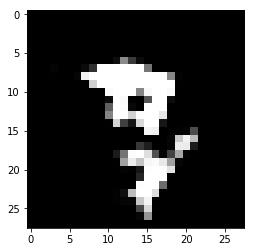

Loop: 788100, Generator_loss: 0.0034993, Discriminator_loss: -0.0010678
Loop: 788200, Generator_loss: 0.0032631, Discriminator_loss: 0.003298
Loop: 788300, Generator_loss: -0.0077383, Discriminator_loss: 0.0015087
Loop: 788400, Generator_loss: 0.021304, Discriminator_loss: -0.00017184
Loop: 788500, Generator_loss: 0.010244, Discriminator_loss: -0.0013393
Loop: 788600, Generator_loss: -0.038304, Discriminator_loss: -0.00068052
Loop: 788700, Generator_loss: -0.030798, Discriminator_loss: 0.0042232
Loop: 788800, Generator_loss: -0.024818, Discriminator_loss: 0.00058121
Loop: 788900, Generator_loss: -0.064994, Discriminator_loss: 0.0036391
Loop: 789000, Generator_loss: -0.007361, Discriminator_loss: -0.0010064


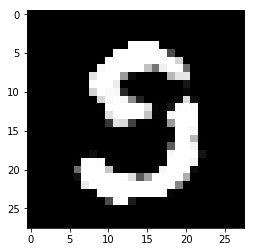

Loop: 789100, Generator_loss: -0.044394, Discriminator_loss: 0.0017723
Loop: 789200, Generator_loss: -0.034769, Discriminator_loss: 0.013046
Loop: 789300, Generator_loss: 0.0077014, Discriminator_loss: 0.0030209
Loop: 789400, Generator_loss: 0.012326, Discriminator_loss: 0.0064413
Loop: 789500, Generator_loss: 0.010432, Discriminator_loss: 0.0023516
Loop: 789600, Generator_loss: 0.0042021, Discriminator_loss: -0.002502
Loop: 789700, Generator_loss: -0.033457, Discriminator_loss: 0.0039455
Loop: 789800, Generator_loss: -0.030481, Discriminator_loss: 0.0026031
Loop: 789900, Generator_loss: 0.005318, Discriminator_loss: 0.012724
Loop: 790000, Generator_loss: 0.08359, Discriminator_loss: -0.0038314


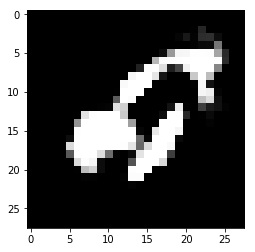

Loop: 790100, Generator_loss: -0.0046241, Discriminator_loss: 0.0023257
Loop: 790200, Generator_loss: -0.06004, Discriminator_loss: 0.0077105
Loop: 790300, Generator_loss: 0.029698, Discriminator_loss: 0.003925
Loop: 790400, Generator_loss: -0.0025131, Discriminator_loss: 0.0011486
Loop: 790500, Generator_loss: 0.011402, Discriminator_loss: -3.3278e-05
Loop: 790600, Generator_loss: 0.023097, Discriminator_loss: 0.0052118
Loop: 790700, Generator_loss: -0.0012716, Discriminator_loss: 0.0045102
Loop: 790800, Generator_loss: -0.035266, Discriminator_loss: 0.0047108
Loop: 790900, Generator_loss: 0.019436, Discriminator_loss: -0.011311
Loop: 791000, Generator_loss: 0.029276, Discriminator_loss: 0.004873


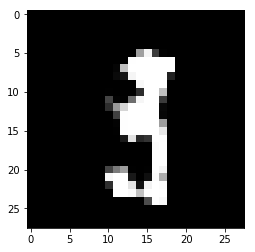

Loop: 791100, Generator_loss: -0.058601, Discriminator_loss: 0.0091784
Loop: 791200, Generator_loss: -0.030465, Discriminator_loss: 0.0087707
Loop: 791300, Generator_loss: -0.024039, Discriminator_loss: -0.0039061
Loop: 791400, Generator_loss: -0.023471, Discriminator_loss: -0.0044664
Loop: 791500, Generator_loss: -0.038529, Discriminator_loss: 0.0056723
Loop: 791600, Generator_loss: -0.015932, Discriminator_loss: -0.0030109
Loop: 791700, Generator_loss: -0.033419, Discriminator_loss: -0.0075236
Loop: 791800, Generator_loss: -0.020217, Discriminator_loss: 0.00040006
Loop: 791900, Generator_loss: -0.0013575, Discriminator_loss: 0.0029211
Loop: 792000, Generator_loss: 0.033129, Discriminator_loss: 0.0097609


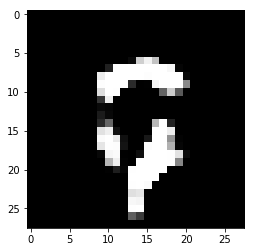

Loop: 792100, Generator_loss: -0.0046463, Discriminator_loss: 0.0037795
Loop: 792200, Generator_loss: 0.01371, Discriminator_loss: 0.0064483
Loop: 792300, Generator_loss: -0.0056551, Discriminator_loss: -0.00051506
Loop: 792400, Generator_loss: -0.0229, Discriminator_loss: 0.0054648
Loop: 792500, Generator_loss: -0.0050148, Discriminator_loss: -0.0028046
Loop: 792600, Generator_loss: -0.0067555, Discriminator_loss: 0.0020458
Loop: 792700, Generator_loss: -0.010028, Discriminator_loss: 0.0019346
Loop: 792800, Generator_loss: -0.053707, Discriminator_loss: 0.0048097
Loop: 792900, Generator_loss: -0.040283, Discriminator_loss: -0.0038084
Loop: 793000, Generator_loss: -0.039313, Discriminator_loss: -0.0018928


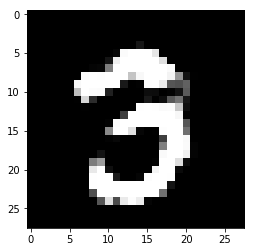

Loop: 793100, Generator_loss: -0.034928, Discriminator_loss: 0.0039808
Loop: 793200, Generator_loss: -0.014881, Discriminator_loss: -0.0020123
Loop: 793300, Generator_loss: -0.030559, Discriminator_loss: 0.00048958
Loop: 793400, Generator_loss: -0.0056664, Discriminator_loss: -0.0035659
Loop: 793500, Generator_loss: -0.015002, Discriminator_loss: 0.00061179
Loop: 793600, Generator_loss: 0.02997, Discriminator_loss: -0.0057902
Loop: 793700, Generator_loss: 0.018389, Discriminator_loss: 0.0053954
Loop: 793800, Generator_loss: 0.04424, Discriminator_loss: -0.014067
Loop: 793900, Generator_loss: 0.0023971, Discriminator_loss: 0.003602
Loop: 794000, Generator_loss: -0.019258, Discriminator_loss: 0.0095313


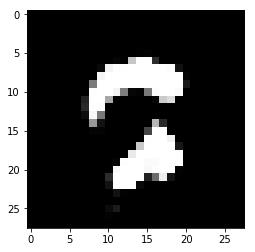

Loop: 794100, Generator_loss: 0.0040237, Discriminator_loss: 0.00071879
Loop: 794200, Generator_loss: 0.0061, Discriminator_loss: -0.0010508
Loop: 794300, Generator_loss: -0.030507, Discriminator_loss: 0.003404
Loop: 794400, Generator_loss: -0.03979, Discriminator_loss: -0.0013548
Loop: 794500, Generator_loss: -0.0082946, Discriminator_loss: 0.0025968
Loop: 794600, Generator_loss: 0.010142, Discriminator_loss: -0.0065235
Loop: 794700, Generator_loss: 0.0026398, Discriminator_loss: 0.011364
Loop: 794800, Generator_loss: -0.054639, Discriminator_loss: 0.011349
Loop: 794900, Generator_loss: 0.028672, Discriminator_loss: 0.0017588
Loop: 795000, Generator_loss: -0.025157, Discriminator_loss: 0.0061149


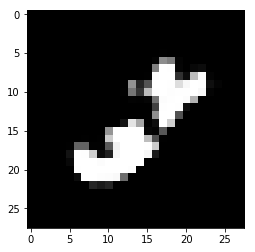

Loop: 795100, Generator_loss: 0.03815, Discriminator_loss: 0.0055022
Loop: 795200, Generator_loss: 0.0033482, Discriminator_loss: 0.0060186
Loop: 795300, Generator_loss: 0.017642, Discriminator_loss: 0.0026734
Loop: 795400, Generator_loss: -0.032109, Discriminator_loss: -0.00020451
Loop: 795500, Generator_loss: 0.014923, Discriminator_loss: 0.0023934
Loop: 795600, Generator_loss: -0.014746, Discriminator_loss: 0.0061432
Loop: 795700, Generator_loss: -0.0096814, Discriminator_loss: 0.0073202
Loop: 795800, Generator_loss: -0.019666, Discriminator_loss: 0.0035444
Loop: 795900, Generator_loss: -0.032177, Discriminator_loss: 5.8178e-05
Loop: 796000, Generator_loss: -0.014395, Discriminator_loss: 0.0017161


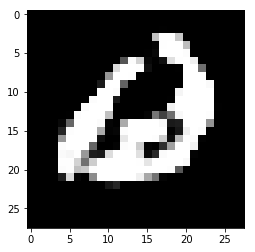

Loop: 796100, Generator_loss: -0.047331, Discriminator_loss: 0.00014114
Loop: 796200, Generator_loss: -0.054121, Discriminator_loss: -0.00086007
Loop: 796300, Generator_loss: -0.0022225, Discriminator_loss: -0.0035646
Loop: 796400, Generator_loss: 0.026727, Discriminator_loss: 0.0022971
Loop: 796500, Generator_loss: 0.047426, Discriminator_loss: 0.0073191
Loop: 796600, Generator_loss: 0.0099505, Discriminator_loss: -0.00023528
Loop: 796700, Generator_loss: -0.011839, Discriminator_loss: 0.013455
Loop: 796800, Generator_loss: 0.013145, Discriminator_loss: 0.0045273
Loop: 796900, Generator_loss: -0.045519, Discriminator_loss: 0.0020765
Loop: 797000, Generator_loss: -0.01183, Discriminator_loss: 0.01115


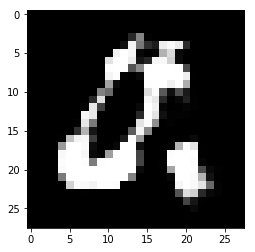

Loop: 797100, Generator_loss: -0.020322, Discriminator_loss: -0.00031596
Loop: 797200, Generator_loss: -0.014839, Discriminator_loss: 0.0013698
Loop: 797300, Generator_loss: 0.013148, Discriminator_loss: 0.0042349
Loop: 797400, Generator_loss: 0.056653, Discriminator_loss: 0.015097
Loop: 797500, Generator_loss: -0.036594, Discriminator_loss: 0.0015403
Loop: 797600, Generator_loss: -0.012909, Discriminator_loss: 0.0029762
Loop: 797700, Generator_loss: -0.015967, Discriminator_loss: 0.002728
Loop: 797800, Generator_loss: 0.025006, Discriminator_loss: 0.0078186
Loop: 797900, Generator_loss: -0.017555, Discriminator_loss: 0.0040312
Loop: 798000, Generator_loss: -0.026925, Discriminator_loss: -0.0055324


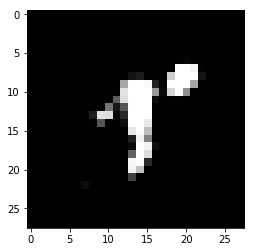

Loop: 798100, Generator_loss: -0.020962, Discriminator_loss: -0.0019332
Loop: 798200, Generator_loss: 0.014521, Discriminator_loss: -0.0055459
Loop: 798300, Generator_loss: 0.01091, Discriminator_loss: -0.0011356
Loop: 798400, Generator_loss: 0.0048933, Discriminator_loss: -0.0036755
Loop: 798500, Generator_loss: -0.028494, Discriminator_loss: 9.563e-05
Loop: 798600, Generator_loss: 0.040671, Discriminator_loss: -0.0033012
Loop: 798700, Generator_loss: -0.015338, Discriminator_loss: 0.0029244
Loop: 798800, Generator_loss: -0.010505, Discriminator_loss: 0.0043341
Loop: 798900, Generator_loss: -0.0094402, Discriminator_loss: 0.00031622
Loop: 799000, Generator_loss: 0.022427, Discriminator_loss: 0.002254


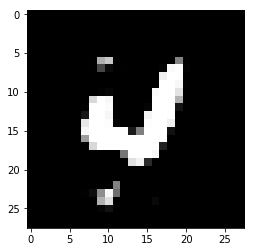

Loop: 799100, Generator_loss: -0.017564, Discriminator_loss: 0.013798
Loop: 799200, Generator_loss: 0.0064692, Discriminator_loss: -0.0045034
Loop: 799300, Generator_loss: 0.0093407, Discriminator_loss: 0.0043433
Loop: 799400, Generator_loss: -0.022648, Discriminator_loss: 0.0032645
Loop: 799500, Generator_loss: -0.024029, Discriminator_loss: 0.0034852
Loop: 799600, Generator_loss: -0.003706, Discriminator_loss: 0.0020726
Loop: 799700, Generator_loss: 0.029679, Discriminator_loss: 0.0025551
Loop: 799800, Generator_loss: -0.022518, Discriminator_loss: 0.0040608
Loop: 799900, Generator_loss: 0.055834, Discriminator_loss: 0.0055096
Loop: 800000, Generator_loss: -0.010847, Discriminator_loss: 0.0061952


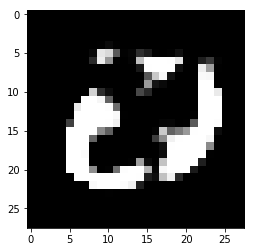

Loop: 800100, Generator_loss: 0.0012953, Discriminator_loss: 0.0016632
Loop: 800200, Generator_loss: -0.0045308, Discriminator_loss: 0.0013478
Loop: 800300, Generator_loss: -0.00085113, Discriminator_loss: -0.0010487
Loop: 800400, Generator_loss: 0.015767, Discriminator_loss: 0.00098682
Loop: 800500, Generator_loss: -0.016311, Discriminator_loss: -0.0010239
Loop: 800600, Generator_loss: -0.026957, Discriminator_loss: -0.010997
Loop: 800700, Generator_loss: -0.06074, Discriminator_loss: -0.00014933
Loop: 800800, Generator_loss: 0.0017281, Discriminator_loss: 0.0026243
Loop: 800900, Generator_loss: -0.011846, Discriminator_loss: 0.0066784
Loop: 801000, Generator_loss: -0.037122, Discriminator_loss: 0.0086736


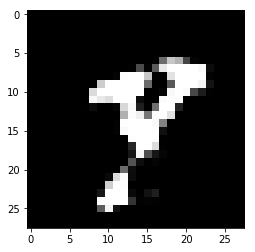

Loop: 801100, Generator_loss: -0.0030971, Discriminator_loss: -0.00028549
Loop: 801200, Generator_loss: 0.004459, Discriminator_loss: -0.010404
Loop: 801300, Generator_loss: 0.025527, Discriminator_loss: 0.00025468
Loop: 801400, Generator_loss: 0.057602, Discriminator_loss: -0.0021753
Loop: 801500, Generator_loss: 0.0094562, Discriminator_loss: -0.0060228
Loop: 801600, Generator_loss: 0.00029758, Discriminator_loss: -0.0024922
Loop: 801700, Generator_loss: 0.00049048, Discriminator_loss: 0.003198
Loop: 801800, Generator_loss: 0.015062, Discriminator_loss: 0.0075916
Loop: 801900, Generator_loss: 0.0047149, Discriminator_loss: 0.0055948
Loop: 802000, Generator_loss: -0.033487, Discriminator_loss: -0.0015051


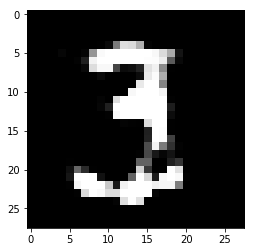

Loop: 802100, Generator_loss: 0.0072432, Discriminator_loss: -0.0021058
Loop: 802200, Generator_loss: -0.043829, Discriminator_loss: -0.0033816
Loop: 802300, Generator_loss: 0.0040222, Discriminator_loss: 0.0031909
Loop: 802400, Generator_loss: 0.040614, Discriminator_loss: -1.4316e-05
Loop: 802500, Generator_loss: -0.018269, Discriminator_loss: -0.0029133
Loop: 802600, Generator_loss: 0.014518, Discriminator_loss: 0.0040846
Loop: 802700, Generator_loss: -0.019705, Discriminator_loss: -0.0011204
Loop: 802800, Generator_loss: 0.0028629, Discriminator_loss: -0.003698
Loop: 802900, Generator_loss: 0.0016245, Discriminator_loss: 0.0018642
Loop: 803000, Generator_loss: 0.0090138, Discriminator_loss: -0.0049636


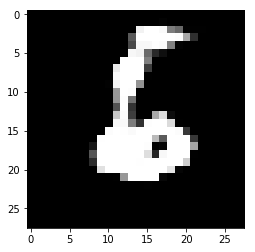

Loop: 803100, Generator_loss: 0.0090052, Discriminator_loss: 0.002643
Loop: 803200, Generator_loss: 0.035128, Discriminator_loss: -0.0031593
Loop: 803300, Generator_loss: 0.0054721, Discriminator_loss: 0.0078285
Loop: 803400, Generator_loss: 0.0026736, Discriminator_loss: -0.0068174
Loop: 803500, Generator_loss: -0.019274, Discriminator_loss: 0.0020193
Loop: 803600, Generator_loss: 0.014878, Discriminator_loss: 0.0046451
Loop: 803700, Generator_loss: -0.031604, Discriminator_loss: 0.0030418
Loop: 803800, Generator_loss: -0.040735, Discriminator_loss: -0.0010539
Loop: 803900, Generator_loss: -0.015083, Discriminator_loss: -0.00015834
Loop: 804000, Generator_loss: 0.017884, Discriminator_loss: 0.0036605


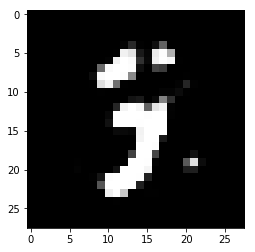

Loop: 804100, Generator_loss: -0.04722, Discriminator_loss: -0.0046471
Loop: 804200, Generator_loss: -0.0067973, Discriminator_loss: -0.0039267
Loop: 804300, Generator_loss: 0.033143, Discriminator_loss: 0.0036016
Loop: 804400, Generator_loss: -0.02282, Discriminator_loss: 0.0021842
Loop: 804500, Generator_loss: 0.050027, Discriminator_loss: -0.0018428
Loop: 804600, Generator_loss: 0.05152, Discriminator_loss: -0.0037843
Loop: 804700, Generator_loss: 0.031047, Discriminator_loss: 0.0023649
Loop: 804800, Generator_loss: -0.011054, Discriminator_loss: 0.0032965
Loop: 804900, Generator_loss: -0.050035, Discriminator_loss: 0.0021883
Loop: 805000, Generator_loss: 0.019207, Discriminator_loss: 0.0019918


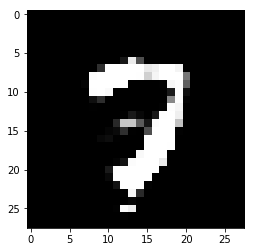

Loop: 805100, Generator_loss: 0.013615, Discriminator_loss: -0.0011276
Loop: 805200, Generator_loss: 0.0010767, Discriminator_loss: 0.0060493
Loop: 805300, Generator_loss: -0.017306, Discriminator_loss: 0.001631
Loop: 805400, Generator_loss: 0.017247, Discriminator_loss: 0.0010195
Loop: 805500, Generator_loss: 0.015592, Discriminator_loss: 0.0047423
Loop: 805600, Generator_loss: 0.007567, Discriminator_loss: -0.00073332
Loop: 805700, Generator_loss: -0.021919, Discriminator_loss: 0.0083423
Loop: 805800, Generator_loss: -0.023631, Discriminator_loss: 0.0046973
Loop: 805900, Generator_loss: -0.030277, Discriminator_loss: -0.00018238
Loop: 806000, Generator_loss: -0.012802, Discriminator_loss: 0.0022849


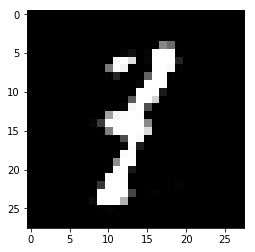

Loop: 806100, Generator_loss: -0.041786, Discriminator_loss: -0.00064689
Loop: 806200, Generator_loss: 0.016435, Discriminator_loss: 0.0020287
Loop: 806300, Generator_loss: 0.00861, Discriminator_loss: 0.0057606
Loop: 806400, Generator_loss: 0.0018401, Discriminator_loss: 0.0012174
Loop: 806500, Generator_loss: -0.013373, Discriminator_loss: -0.0018417
Loop: 806600, Generator_loss: -0.049217, Discriminator_loss: 0.0097572
Loop: 806700, Generator_loss: -0.041283, Discriminator_loss: 0.0046263
Loop: 806800, Generator_loss: 0.02091, Discriminator_loss: 0.0060761
Loop: 806900, Generator_loss: 0.014217, Discriminator_loss: 0.0040395
Loop: 807000, Generator_loss: -0.0016188, Discriminator_loss: -0.0059332


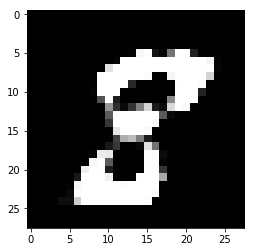

Loop: 807100, Generator_loss: -0.0094485, Discriminator_loss: 0.0080474
Loop: 807200, Generator_loss: -0.03057, Discriminator_loss: 0.007039
Loop: 807300, Generator_loss: 0.017105, Discriminator_loss: -0.0030982
Loop: 807400, Generator_loss: 0.01317, Discriminator_loss: 0.0091663
Loop: 807500, Generator_loss: 0.00028563, Discriminator_loss: -0.0019592
Loop: 807600, Generator_loss: 0.086564, Discriminator_loss: 0.0025427
Loop: 807700, Generator_loss: -0.011538, Discriminator_loss: -0.0037179
Loop: 807800, Generator_loss: -0.042215, Discriminator_loss: 0.0045062
Loop: 807900, Generator_loss: 0.025388, Discriminator_loss: 0.0017353
Loop: 808000, Generator_loss: -0.0061974, Discriminator_loss: 0.004926


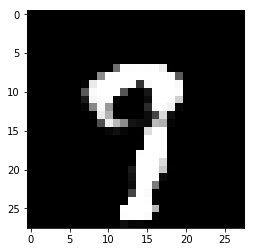

Loop: 808100, Generator_loss: -0.0059133, Discriminator_loss: 0.0044693
Loop: 808200, Generator_loss: 0.018349, Discriminator_loss: 0.0011162
Loop: 808300, Generator_loss: 0.015349, Discriminator_loss: 0.0027874
Loop: 808400, Generator_loss: 0.011777, Discriminator_loss: 0.00097264
Loop: 808500, Generator_loss: -0.017258, Discriminator_loss: 0.0026478
Loop: 808600, Generator_loss: -0.018271, Discriminator_loss: 0.0093515
Loop: 808700, Generator_loss: 0.0053004, Discriminator_loss: 0.0016993
Loop: 808800, Generator_loss: -0.022663, Discriminator_loss: 0.0023325
Loop: 808900, Generator_loss: -0.0018648, Discriminator_loss: 0.0020621
Loop: 809000, Generator_loss: 0.061858, Discriminator_loss: 0.0076575


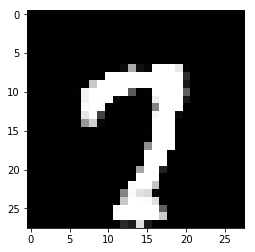

Loop: 809100, Generator_loss: 0.03793, Discriminator_loss: 0.0049288
Loop: 809200, Generator_loss: 0.045087, Discriminator_loss: -0.00036812
Loop: 809300, Generator_loss: -0.039947, Discriminator_loss: 0.0071465
Loop: 809400, Generator_loss: 0.030487, Discriminator_loss: 0.0063679
Loop: 809500, Generator_loss: -0.0084229, Discriminator_loss: 0.00086341
Loop: 809600, Generator_loss: 0.032426, Discriminator_loss: 0.0017858
Loop: 809700, Generator_loss: -0.01524, Discriminator_loss: -0.0015017
Loop: 809800, Generator_loss: -0.039319, Discriminator_loss: 0.001032
Loop: 809900, Generator_loss: -0.038537, Discriminator_loss: 0.0013217
Loop: 810000, Generator_loss: -0.073817, Discriminator_loss: 0.014605


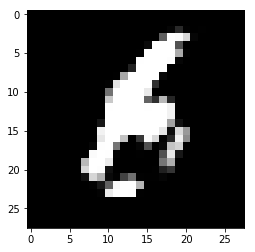

Loop: 810100, Generator_loss: 0.047953, Discriminator_loss: 0.00382
Loop: 810200, Generator_loss: -0.015721, Discriminator_loss: 0.0064098
Loop: 810300, Generator_loss: -0.0069946, Discriminator_loss: 0.006281
Loop: 810400, Generator_loss: 0.050726, Discriminator_loss: 0.0090743
Loop: 810500, Generator_loss: 0.01872, Discriminator_loss: -0.0048092
Loop: 810600, Generator_loss: 0.00208, Discriminator_loss: -0.0015598
Loop: 810700, Generator_loss: -0.022269, Discriminator_loss: -0.00048244
Loop: 810800, Generator_loss: -0.035454, Discriminator_loss: 0.0097672
Loop: 810900, Generator_loss: 0.031935, Discriminator_loss: 0.0022528
Loop: 811000, Generator_loss: -0.018111, Discriminator_loss: 0.004501


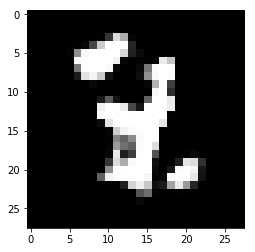

Loop: 811100, Generator_loss: 0.0041079, Discriminator_loss: -0.0010217
Loop: 811200, Generator_loss: -0.053495, Discriminator_loss: 0.0026199
Loop: 811300, Generator_loss: 0.029381, Discriminator_loss: 0.0044751
Loop: 811400, Generator_loss: -0.011664, Discriminator_loss: 0.0053219
Loop: 811500, Generator_loss: 0.02651, Discriminator_loss: -0.0006747
Loop: 811600, Generator_loss: -0.031986, Discriminator_loss: 0.007726
Loop: 811700, Generator_loss: 0.015576, Discriminator_loss: 0.0048135
Loop: 811800, Generator_loss: -0.0081279, Discriminator_loss: 0.0036216
Loop: 811900, Generator_loss: 0.028253, Discriminator_loss: 0.0036757
Loop: 812000, Generator_loss: 0.025554, Discriminator_loss: 0.011804


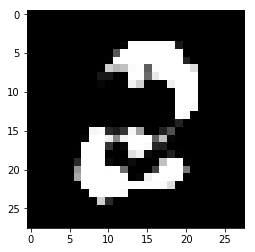

Loop: 812100, Generator_loss: -0.0076792, Discriminator_loss: -0.0056421
Loop: 812200, Generator_loss: -0.011011, Discriminator_loss: 0.0026694
Loop: 812300, Generator_loss: -0.05012, Discriminator_loss: -0.0043798
Loop: 812400, Generator_loss: 0.013922, Discriminator_loss: 0.0004418
Loop: 812500, Generator_loss: -0.026153, Discriminator_loss: -0.0041739
Loop: 812600, Generator_loss: 0.0061524, Discriminator_loss: 0.0050581
Loop: 812700, Generator_loss: 0.018762, Discriminator_loss: 0.00126
Loop: 812800, Generator_loss: -0.041267, Discriminator_loss: 0.0059697
Loop: 812900, Generator_loss: -0.063839, Discriminator_loss: 0.0068222
Loop: 813000, Generator_loss: -0.01259, Discriminator_loss: 0.003258


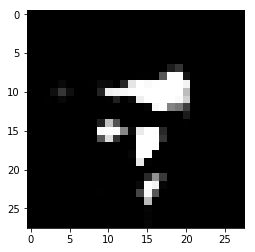

Loop: 813100, Generator_loss: -0.034786, Discriminator_loss: 0.0059175
Loop: 813200, Generator_loss: -0.0020526, Discriminator_loss: -0.0041964
Loop: 813300, Generator_loss: 0.0067356, Discriminator_loss: 0.0052252
Loop: 813400, Generator_loss: -0.0010815, Discriminator_loss: 0.0026901
Loop: 813500, Generator_loss: 0.0047017, Discriminator_loss: -0.0055979
Loop: 813600, Generator_loss: 0.010505, Discriminator_loss: 0.0042713
Loop: 813700, Generator_loss: 0.0070713, Discriminator_loss: 0.00032208
Loop: 813800, Generator_loss: 0.007412, Discriminator_loss: -0.0043804
Loop: 813900, Generator_loss: -0.025422, Discriminator_loss: -0.0012562
Loop: 814000, Generator_loss: -0.072974, Discriminator_loss: 0.0056629


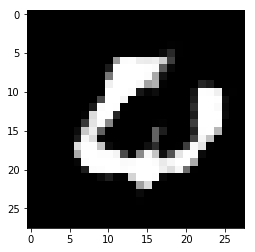

Loop: 814100, Generator_loss: -0.0088907, Discriminator_loss: 0.0026266
Loop: 814200, Generator_loss: -0.039637, Discriminator_loss: 0.0034829
Loop: 814300, Generator_loss: 0.003846, Discriminator_loss: 0.0018667
Loop: 814400, Generator_loss: 0.026825, Discriminator_loss: 0.0014319
Loop: 814500, Generator_loss: 0.011029, Discriminator_loss: 0.0023704
Loop: 814600, Generator_loss: -0.015711, Discriminator_loss: 0.0013471
Loop: 814700, Generator_loss: -0.0063104, Discriminator_loss: 0.0050662
Loop: 814800, Generator_loss: -0.0072862, Discriminator_loss: 0.0056357
Loop: 814900, Generator_loss: 0.0037149, Discriminator_loss: 0.0018628
Loop: 815000, Generator_loss: -0.021796, Discriminator_loss: -0.0018933


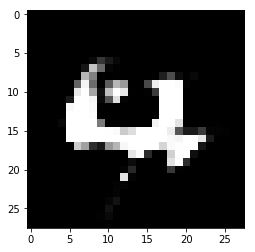

Loop: 815100, Generator_loss: -0.024933, Discriminator_loss: 0.0026086
Loop: 815200, Generator_loss: -0.0315, Discriminator_loss: 0.0064753
Loop: 815300, Generator_loss: -0.021623, Discriminator_loss: 0.0007578
Loop: 815400, Generator_loss: -0.041636, Discriminator_loss: -0.0014496
Loop: 815500, Generator_loss: -0.060726, Discriminator_loss: 0.0081818
Loop: 815600, Generator_loss: -0.026, Discriminator_loss: 0.00045738
Loop: 815700, Generator_loss: -0.022735, Discriminator_loss: 0.0012601
Loop: 815800, Generator_loss: -0.046025, Discriminator_loss: 0.014125
Loop: 815900, Generator_loss: -0.011013, Discriminator_loss: 0.0063441
Loop: 816000, Generator_loss: -0.034143, Discriminator_loss: -0.0010073


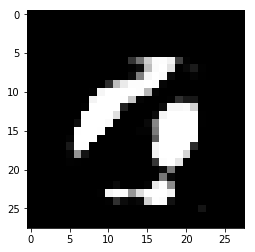

Loop: 816100, Generator_loss: 0.020792, Discriminator_loss: 0.0020957
Loop: 816200, Generator_loss: -0.042005, Discriminator_loss: 0.00048757
Loop: 816300, Generator_loss: -0.073166, Discriminator_loss: 0.0060955
Loop: 816400, Generator_loss: -0.03604, Discriminator_loss: -0.0050368
Loop: 816500, Generator_loss: 0.0041319, Discriminator_loss: 0.004258
Loop: 816600, Generator_loss: 0.00083974, Discriminator_loss: 0.0071477
Loop: 816700, Generator_loss: -0.011702, Discriminator_loss: 0.0029187
Loop: 816800, Generator_loss: -0.0024865, Discriminator_loss: 0.0045386
Loop: 816900, Generator_loss: -0.012458, Discriminator_loss: 0.0036111
Loop: 817000, Generator_loss: -0.026834, Discriminator_loss: -0.0088497


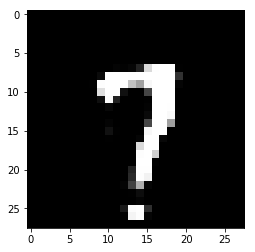

Loop: 817100, Generator_loss: -0.043928, Discriminator_loss: 0.0030065
Loop: 817200, Generator_loss: -0.044151, Discriminator_loss: 0.0041557
Loop: 817300, Generator_loss: -0.015807, Discriminator_loss: 0.0019281
Loop: 817400, Generator_loss: -0.031346, Discriminator_loss: 0.0040332
Loop: 817500, Generator_loss: 0.024812, Discriminator_loss: 0.0016132
Loop: 817600, Generator_loss: -0.030344, Discriminator_loss: 0.0039231
Loop: 817700, Generator_loss: -0.015249, Discriminator_loss: 0.0054787
Loop: 817800, Generator_loss: 0.0037843, Discriminator_loss: 6.4186e-05
Loop: 817900, Generator_loss: 0.011624, Discriminator_loss: 0.008258
Loop: 818000, Generator_loss: -0.080776, Discriminator_loss: 0.0029586


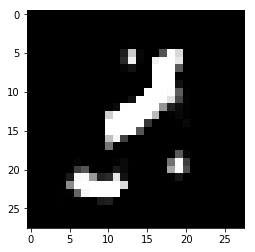

Loop: 818100, Generator_loss: 0.0069961, Discriminator_loss: -0.0015762
Loop: 818200, Generator_loss: 0.020052, Discriminator_loss: 0.0044222
Loop: 818300, Generator_loss: 0.016406, Discriminator_loss: -0.0012758
Loop: 818400, Generator_loss: -0.047218, Discriminator_loss: -0.0015696
Loop: 818500, Generator_loss: -0.016547, Discriminator_loss: 0.0031021
Loop: 818600, Generator_loss: 0.02115, Discriminator_loss: 0.0010262
Loop: 818700, Generator_loss: 0.012955, Discriminator_loss: 0.00065074
Loop: 818800, Generator_loss: -0.016641, Discriminator_loss: -0.00082987
Loop: 818900, Generator_loss: -0.0013817, Discriminator_loss: 0.0057705
Loop: 819000, Generator_loss: -0.043095, Discriminator_loss: -5.0806e-05


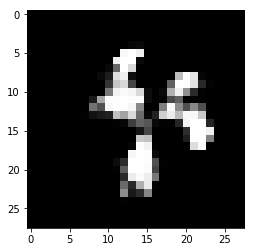

Loop: 819100, Generator_loss: -0.0052313, Discriminator_loss: 0.0028066
Loop: 819200, Generator_loss: -0.030269, Discriminator_loss: 0.0030386
Loop: 819300, Generator_loss: -0.02368, Discriminator_loss: 0.0025174
Loop: 819400, Generator_loss: -0.0041512, Discriminator_loss: 0.0034367
Loop: 819500, Generator_loss: -0.016625, Discriminator_loss: 0.0026485
Loop: 819600, Generator_loss: 0.008358, Discriminator_loss: 0.0044432
Loop: 819700, Generator_loss: -0.03494, Discriminator_loss: -0.0031341
Loop: 819800, Generator_loss: -0.037295, Discriminator_loss: -0.0039942
Loop: 819900, Generator_loss: -0.032017, Discriminator_loss: 0.0050455
Loop: 820000, Generator_loss: -0.028857, Discriminator_loss: 0.01112


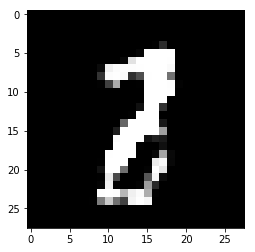

Loop: 820100, Generator_loss: 0.004854, Discriminator_loss: 0.0020076
Loop: 820200, Generator_loss: 0.012629, Discriminator_loss: -0.006635
Loop: 820300, Generator_loss: 0.021864, Discriminator_loss: -0.00018305
Loop: 820400, Generator_loss: 0.030843, Discriminator_loss: 0.00059745
Loop: 820500, Generator_loss: -0.0013536, Discriminator_loss: 0.0032848
Loop: 820600, Generator_loss: -0.0020529, Discriminator_loss: -0.0069528
Loop: 820700, Generator_loss: 0.0070079, Discriminator_loss: 0.0032654
Loop: 820800, Generator_loss: 0.050605, Discriminator_loss: 0.0027285
Loop: 820900, Generator_loss: 0.036149, Discriminator_loss: -0.0015747
Loop: 821000, Generator_loss: 0.022956, Discriminator_loss: 0.0022974


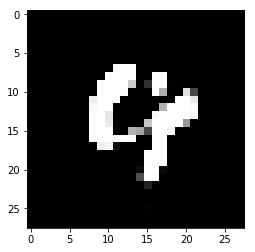

Loop: 821100, Generator_loss: -0.010692, Discriminator_loss: 0.0053151
Loop: 821200, Generator_loss: -0.02029, Discriminator_loss: 0.0057705
Loop: 821300, Generator_loss: -0.017715, Discriminator_loss: 0.00017283
Loop: 821400, Generator_loss: -0.018205, Discriminator_loss: 0.0013041
Loop: 821500, Generator_loss: 0.0042753, Discriminator_loss: 0.0032461
Loop: 821600, Generator_loss: -0.0038182, Discriminator_loss: 0.0030992
Loop: 821700, Generator_loss: -0.042775, Discriminator_loss: -9.1657e-05
Loop: 821800, Generator_loss: -0.051518, Discriminator_loss: 0.013819
Loop: 821900, Generator_loss: -0.041355, Discriminator_loss: 0.0043877
Loop: 822000, Generator_loss: 0.0058289, Discriminator_loss: -0.0052564


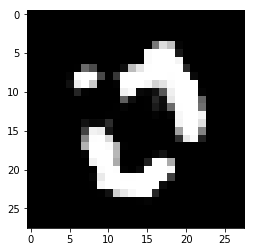

Loop: 822100, Generator_loss: 0.013135, Discriminator_loss: 0.0027537
Loop: 822200, Generator_loss: -0.02937, Discriminator_loss: 0.0035954
Loop: 822300, Generator_loss: -0.010283, Discriminator_loss: 0.0019402
Loop: 822400, Generator_loss: -0.016126, Discriminator_loss: 0.0081384
Loop: 822500, Generator_loss: 0.023963, Discriminator_loss: 0.0090955
Loop: 822600, Generator_loss: -0.029722, Discriminator_loss: 0.0036756
Loop: 822700, Generator_loss: -0.054289, Discriminator_loss: 0.0059685
Loop: 822800, Generator_loss: -0.024505, Discriminator_loss: -0.0085041
Loop: 822900, Generator_loss: -0.05734, Discriminator_loss: 0.00061097
Loop: 823000, Generator_loss: -0.073911, Discriminator_loss: 0.0089914


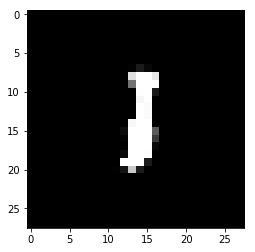

Loop: 823100, Generator_loss: -0.0059411, Discriminator_loss: 0.0057382
Loop: 823200, Generator_loss: -0.027694, Discriminator_loss: 8.0833e-05
Loop: 823300, Generator_loss: -0.043774, Discriminator_loss: 0.01256
Loop: 823400, Generator_loss: 0.019819, Discriminator_loss: -0.0040221
Loop: 823500, Generator_loss: 0.012496, Discriminator_loss: 0.0033301
Loop: 823600, Generator_loss: -0.0027382, Discriminator_loss: -0.0029745
Loop: 823700, Generator_loss: 0.03254, Discriminator_loss: -0.00043518
Loop: 823800, Generator_loss: -0.023053, Discriminator_loss: 0.006546
Loop: 823900, Generator_loss: -0.050168, Discriminator_loss: -0.0011326
Loop: 824000, Generator_loss: 0.010137, Discriminator_loss: 0.00041534


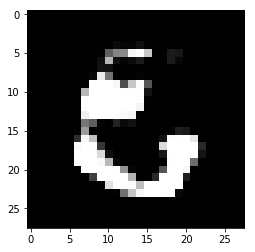

Loop: 824100, Generator_loss: -0.00093652, Discriminator_loss: -0.0032941
Loop: 824200, Generator_loss: 7.7877e-05, Discriminator_loss: 0.00065541
Loop: 824300, Generator_loss: -0.015963, Discriminator_loss: 0.0028518
Loop: 824400, Generator_loss: -0.019717, Discriminator_loss: 0.0065599
Loop: 824500, Generator_loss: -0.02868, Discriminator_loss: 0.0035476
Loop: 824600, Generator_loss: -0.02151, Discriminator_loss: -0.0019822
Loop: 824700, Generator_loss: 0.011655, Discriminator_loss: -0.0019165
Loop: 824800, Generator_loss: 0.00060943, Discriminator_loss: -0.0019491
Loop: 824900, Generator_loss: -0.023687, Discriminator_loss: 0.00086431
Loop: 825000, Generator_loss: -0.00066441, Discriminator_loss: 0.0083684


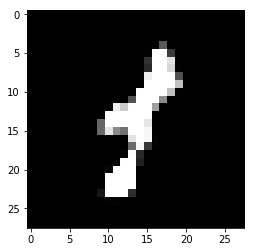

Loop: 825100, Generator_loss: 0.038415, Discriminator_loss: 0.0015697
Loop: 825200, Generator_loss: -0.023312, Discriminator_loss: 0.00024124
Loop: 825300, Generator_loss: -0.0010694, Discriminator_loss: -0.0018554
Loop: 825400, Generator_loss: -0.040161, Discriminator_loss: 0.0010947
Loop: 825500, Generator_loss: -0.025388, Discriminator_loss: 0.000951
Loop: 825600, Generator_loss: 0.0040077, Discriminator_loss: 0.0015349
Loop: 825700, Generator_loss: 0.00099311, Discriminator_loss: 0.0026419
Loop: 825800, Generator_loss: 0.0003185, Discriminator_loss: -0.0024738
Loop: 825900, Generator_loss: -0.009745, Discriminator_loss: 0.0043943
Loop: 826000, Generator_loss: -0.0076514, Discriminator_loss: -0.0042119


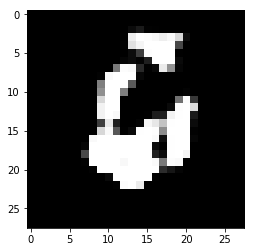

Loop: 826100, Generator_loss: -0.071243, Discriminator_loss: -0.0012949
Loop: 826200, Generator_loss: -0.012728, Discriminator_loss: -0.0031724
Loop: 826300, Generator_loss: -0.013634, Discriminator_loss: 0.0047739
Loop: 826400, Generator_loss: -0.023152, Discriminator_loss: 0.0023409
Loop: 826500, Generator_loss: -0.0057412, Discriminator_loss: 0.0044773
Loop: 826600, Generator_loss: 0.063372, Discriminator_loss: 0.0065301
Loop: 826700, Generator_loss: -0.014784, Discriminator_loss: -0.010009
Loop: 826800, Generator_loss: -0.015134, Discriminator_loss: 0.0055574
Loop: 826900, Generator_loss: 0.0016413, Discriminator_loss: -0.00046348
Loop: 827000, Generator_loss: 0.017333, Discriminator_loss: 0.0006124


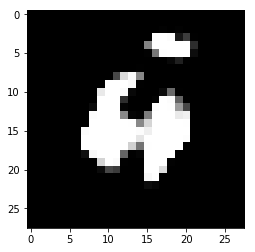

Loop: 827100, Generator_loss: 0.0046962, Discriminator_loss: 0.0016882
Loop: 827200, Generator_loss: -0.010929, Discriminator_loss: 0.00094579
Loop: 827300, Generator_loss: -0.0044086, Discriminator_loss: 0.0016578
Loop: 827400, Generator_loss: 0.035141, Discriminator_loss: 0.0062202
Loop: 827500, Generator_loss: -0.042757, Discriminator_loss: 0.0032363
Loop: 827600, Generator_loss: -0.00017578, Discriminator_loss: -0.00017894
Loop: 827700, Generator_loss: -0.023492, Discriminator_loss: -0.0005323
Loop: 827800, Generator_loss: -0.027981, Discriminator_loss: 0.00052449
Loop: 827900, Generator_loss: -0.020055, Discriminator_loss: 0.0010046
Loop: 828000, Generator_loss: -0.0096458, Discriminator_loss: 0.0040474


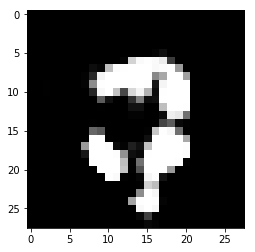

Loop: 828100, Generator_loss: 0.013856, Discriminator_loss: 0.0015266
Loop: 828200, Generator_loss: -0.014845, Discriminator_loss: 0.0066401
Loop: 828300, Generator_loss: 0.015503, Discriminator_loss: 0.0023064
Loop: 828400, Generator_loss: 0.052011, Discriminator_loss: 0.001166
Loop: 828500, Generator_loss: -0.00057864, Discriminator_loss: 0.0031198
Loop: 828600, Generator_loss: -0.0020864, Discriminator_loss: 0.003146
Loop: 828700, Generator_loss: -0.028842, Discriminator_loss: 0.001613
Loop: 828800, Generator_loss: -0.0059666, Discriminator_loss: 0.0036911
Loop: 828900, Generator_loss: 0.011133, Discriminator_loss: 0.0039044
Loop: 829000, Generator_loss: -0.015967, Discriminator_loss: 0.0050136


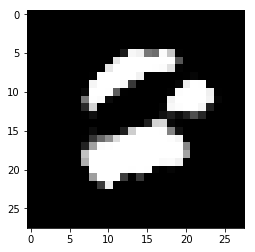

Loop: 829100, Generator_loss: -0.031685, Discriminator_loss: -0.0050754
Loop: 829200, Generator_loss: -0.0055558, Discriminator_loss: 0.0045547
Loop: 829300, Generator_loss: -0.057426, Discriminator_loss: 0.0026441
Loop: 829400, Generator_loss: -0.029284, Discriminator_loss: 0.0049852
Loop: 829500, Generator_loss: -0.08638, Discriminator_loss: 0.0066294
Loop: 829600, Generator_loss: 0.011293, Discriminator_loss: -0.0062278
Loop: 829700, Generator_loss: 0.013319, Discriminator_loss: -0.0011578
Loop: 829800, Generator_loss: 0.022383, Discriminator_loss: -0.0004452
Loop: 829900, Generator_loss: -0.061444, Discriminator_loss: 0.0051357
Loop: 830000, Generator_loss: 0.021063, Discriminator_loss: -0.0021727


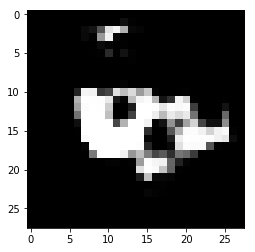

Loop: 830100, Generator_loss: 0.020469, Discriminator_loss: -0.0027483
Loop: 830200, Generator_loss: -0.024506, Discriminator_loss: -0.0028177
Loop: 830300, Generator_loss: -0.0079108, Discriminator_loss: 0.00063629
Loop: 830400, Generator_loss: -0.039132, Discriminator_loss: 0.0014683
Loop: 830500, Generator_loss: -0.040454, Discriminator_loss: 0.0074168
Loop: 830600, Generator_loss: -0.0010491, Discriminator_loss: 0.00081285
Loop: 830700, Generator_loss: -0.040234, Discriminator_loss: -0.0081994
Loop: 830800, Generator_loss: 0.015072, Discriminator_loss: 0.0013249
Loop: 830900, Generator_loss: 0.031774, Discriminator_loss: -0.0026789
Loop: 831000, Generator_loss: 0.032896, Discriminator_loss: 0.007302


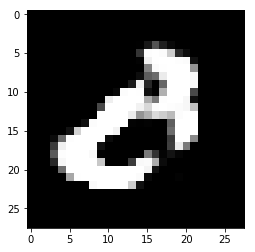

Loop: 831100, Generator_loss: 0.045357, Discriminator_loss: -0.010836
Loop: 831200, Generator_loss: -0.0068876, Discriminator_loss: 0.003123
Loop: 831300, Generator_loss: -0.0011574, Discriminator_loss: 0.00031664
Loop: 831400, Generator_loss: 0.04312, Discriminator_loss: 0.0029687
Loop: 831500, Generator_loss: -0.017172, Discriminator_loss: 0.0030802
Loop: 831600, Generator_loss: 0.016765, Discriminator_loss: -0.0022089
Loop: 831700, Generator_loss: -0.071535, Discriminator_loss: -0.0026295
Loop: 831800, Generator_loss: -0.046669, Discriminator_loss: 0.0056321
Loop: 831900, Generator_loss: -0.037567, Discriminator_loss: 0.0037767
Loop: 832000, Generator_loss: 0.035194, Discriminator_loss: -0.00051705


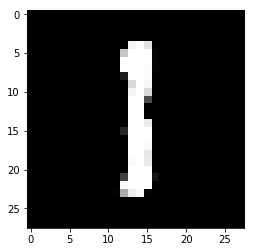

Loop: 832100, Generator_loss: 0.070877, Discriminator_loss: 0.0057572
Loop: 832200, Generator_loss: -0.0058229, Discriminator_loss: 0.00015158
Loop: 832300, Generator_loss: -0.024302, Discriminator_loss: 0.0025808
Loop: 832400, Generator_loss: 0.0043562, Discriminator_loss: 0.0076395
Loop: 832500, Generator_loss: -0.024814, Discriminator_loss: -0.00022184
Loop: 832600, Generator_loss: -0.035807, Discriminator_loss: 0.0043275
Loop: 832700, Generator_loss: -0.019209, Discriminator_loss: -0.0019661
Loop: 832800, Generator_loss: 0.0096928, Discriminator_loss: 0.0034056
Loop: 832900, Generator_loss: 0.054476, Discriminator_loss: -0.0011467
Loop: 833000, Generator_loss: 0.038638, Discriminator_loss: 0.0041203


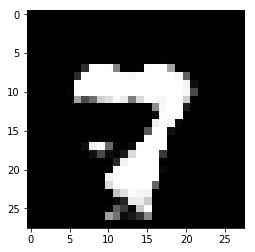

Loop: 833100, Generator_loss: 0.006706, Discriminator_loss: -0.0019611
Loop: 833200, Generator_loss: 0.024372, Discriminator_loss: 0.0074687
Loop: 833300, Generator_loss: 0.0086125, Discriminator_loss: 0.0038695
Loop: 833400, Generator_loss: -0.0093235, Discriminator_loss: 0.0009365
Loop: 833500, Generator_loss: 0.01957, Discriminator_loss: 0.0087995
Loop: 833600, Generator_loss: 0.039058, Discriminator_loss: 0.001943
Loop: 833700, Generator_loss: 0.0014789, Discriminator_loss: 0.0016811
Loop: 833800, Generator_loss: 0.021148, Discriminator_loss: -0.0039974
Loop: 833900, Generator_loss: 0.012261, Discriminator_loss: -0.00078512
Loop: 834000, Generator_loss: 0.0090239, Discriminator_loss: 0.0075954


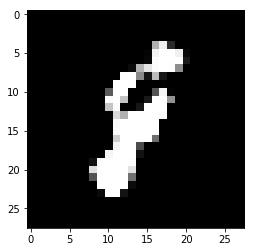

Loop: 834100, Generator_loss: -0.0045285, Discriminator_loss: 0.0044529
Loop: 834200, Generator_loss: -0.0024686, Discriminator_loss: 0.0025069
Loop: 834300, Generator_loss: 0.026799, Discriminator_loss: -0.0023514
Loop: 834400, Generator_loss: 0.064287, Discriminator_loss: 0.0013135
Loop: 834500, Generator_loss: -0.020383, Discriminator_loss: -0.0028105
Loop: 834600, Generator_loss: -0.029347, Discriminator_loss: 0.0051667
Loop: 834700, Generator_loss: -0.0024743, Discriminator_loss: 0.00065214
Loop: 834800, Generator_loss: -0.0033285, Discriminator_loss: 0.002873
Loop: 834900, Generator_loss: -0.040732, Discriminator_loss: -0.00087596
Loop: 835000, Generator_loss: -0.040492, Discriminator_loss: 0.0062159


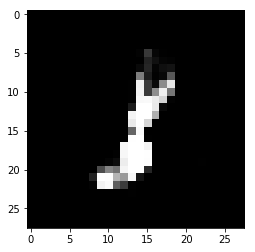

Loop: 835100, Generator_loss: -0.068147, Discriminator_loss: -0.0020747
Loop: 835200, Generator_loss: 0.0053646, Discriminator_loss: 0.0022056
Loop: 835300, Generator_loss: -0.01471, Discriminator_loss: 0.0046757
Loop: 835400, Generator_loss: -0.043318, Discriminator_loss: 0.0030028
Loop: 835500, Generator_loss: -0.011721, Discriminator_loss: 0.0071371
Loop: 835600, Generator_loss: -0.0031238, Discriminator_loss: 0.0011082
Loop: 835700, Generator_loss: -0.018312, Discriminator_loss: 0.0053506
Loop: 835800, Generator_loss: 0.051529, Discriminator_loss: -0.0060761
Loop: 835900, Generator_loss: 0.0068719, Discriminator_loss: 0.0026702
Loop: 836000, Generator_loss: -0.033535, Discriminator_loss: -0.002118


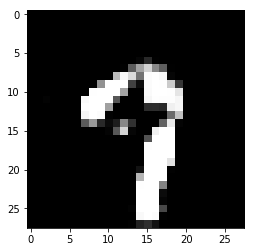

Loop: 836100, Generator_loss: -0.0074213, Discriminator_loss: 0.0097284
Loop: 836200, Generator_loss: 0.013726, Discriminator_loss: 0.0019825
Loop: 836300, Generator_loss: -0.028923, Discriminator_loss: 0.0070771
Loop: 836400, Generator_loss: 0.023302, Discriminator_loss: -0.00034433
Loop: 836500, Generator_loss: -0.0043075, Discriminator_loss: 0.0036971
Loop: 836600, Generator_loss: -0.0028985, Discriminator_loss: -0.0041041
Loop: 836700, Generator_loss: 0.004806, Discriminator_loss: 0.0046154
Loop: 836800, Generator_loss: -0.0044171, Discriminator_loss: 0.0035565
Loop: 836900, Generator_loss: 0.011386, Discriminator_loss: 0.0024483
Loop: 837000, Generator_loss: 0.057241, Discriminator_loss: -0.0059312


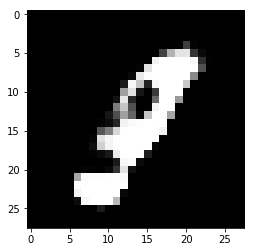

Loop: 837100, Generator_loss: 0.04683, Discriminator_loss: 0.0048465
Loop: 837200, Generator_loss: 0.046578, Discriminator_loss: 0.0031792
Loop: 837300, Generator_loss: 0.014089, Discriminator_loss: 0.0099479
Loop: 837400, Generator_loss: 0.025437, Discriminator_loss: 0.0050582
Loop: 837500, Generator_loss: 0.017982, Discriminator_loss: 0.0006067
Loop: 837600, Generator_loss: -0.0019348, Discriminator_loss: -0.00068831
Loop: 837700, Generator_loss: 0.049456, Discriminator_loss: -0.0064571
Loop: 837800, Generator_loss: 0.011395, Discriminator_loss: 0.0037742
Loop: 837900, Generator_loss: -0.029977, Discriminator_loss: -0.0042853
Loop: 838000, Generator_loss: 0.0019849, Discriminator_loss: -0.0036716


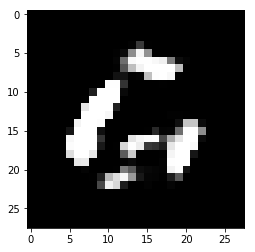

Loop: 838100, Generator_loss: 0.0080879, Discriminator_loss: 0.0010018
Loop: 838200, Generator_loss: -0.033336, Discriminator_loss: -0.00093476
Loop: 838300, Generator_loss: -0.012443, Discriminator_loss: 0.0015157
Loop: 838400, Generator_loss: 0.041646, Discriminator_loss: 0.0018585
Loop: 838500, Generator_loss: -0.015765, Discriminator_loss: 0.0063809
Loop: 838600, Generator_loss: 0.0011712, Discriminator_loss: 0.0045817
Loop: 838700, Generator_loss: 0.001357, Discriminator_loss: 0.0054914
Loop: 838800, Generator_loss: 0.035355, Discriminator_loss: 4.9546e-06
Loop: 838900, Generator_loss: -0.0081032, Discriminator_loss: 0.0021849
Loop: 839000, Generator_loss: -0.024412, Discriminator_loss: -0.0017156


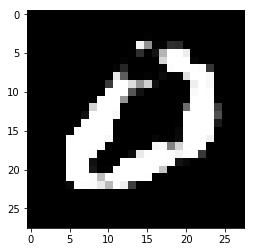

Loop: 839100, Generator_loss: 0.018358, Discriminator_loss: -0.0025772
Loop: 839200, Generator_loss: 0.0013132, Discriminator_loss: 0.0022224
Loop: 839300, Generator_loss: 0.03716, Discriminator_loss: -0.00092414
Loop: 839400, Generator_loss: -0.028225, Discriminator_loss: 0.00022736
Loop: 839500, Generator_loss: -0.012015, Discriminator_loss: -0.0014466
Loop: 839600, Generator_loss: -0.036374, Discriminator_loss: 0.0041993
Loop: 839700, Generator_loss: -0.058197, Discriminator_loss: 0.0030165
Loop: 839800, Generator_loss: 0.068296, Discriminator_loss: -0.0048513
Loop: 839900, Generator_loss: 0.037265, Discriminator_loss: -0.0030927
Loop: 840000, Generator_loss: 0.0027877, Discriminator_loss: 0.0059904


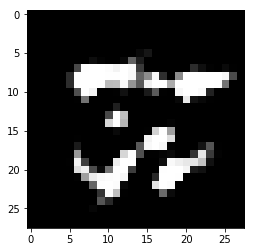

Loop: 840100, Generator_loss: 0.011355, Discriminator_loss: 0.00041474
Loop: 840200, Generator_loss: 0.01794, Discriminator_loss: -0.0015811
Loop: 840300, Generator_loss: 0.021804, Discriminator_loss: 0.0019949
Loop: 840400, Generator_loss: 0.0068802, Discriminator_loss: 0.0082931
Loop: 840500, Generator_loss: -0.043099, Discriminator_loss: -0.0051116
Loop: 840600, Generator_loss: 0.010907, Discriminator_loss: 0.00050018
Loop: 840700, Generator_loss: 0.012372, Discriminator_loss: -0.00033449
Loop: 840800, Generator_loss: 0.0051713, Discriminator_loss: 0.0047949
Loop: 840900, Generator_loss: -0.0227, Discriminator_loss: 0.0008533
Loop: 841000, Generator_loss: -0.013635, Discriminator_loss: 0.01124


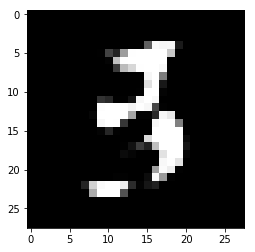

Loop: 841100, Generator_loss: 0.017557, Discriminator_loss: -0.0016865
Loop: 841200, Generator_loss: -0.017397, Discriminator_loss: 0.0031777
Loop: 841300, Generator_loss: -0.029191, Discriminator_loss: -0.0022055
Loop: 841400, Generator_loss: -0.012617, Discriminator_loss: 0.0025051
Loop: 841500, Generator_loss: 0.015586, Discriminator_loss: 0.0021706
Loop: 841600, Generator_loss: 0.0025965, Discriminator_loss: -0.0025891
Loop: 841700, Generator_loss: 0.031889, Discriminator_loss: 0.0074393
Loop: 841800, Generator_loss: -0.029322, Discriminator_loss: 0.0016054
Loop: 841900, Generator_loss: -0.03379, Discriminator_loss: 0.0055331
Loop: 842000, Generator_loss: 0.033578, Discriminator_loss: -0.0014706


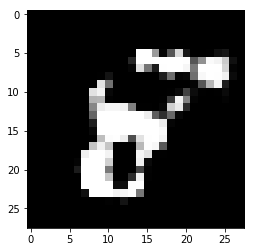

Loop: 842100, Generator_loss: 0.018621, Discriminator_loss: 0.0034766
Loop: 842200, Generator_loss: -0.043737, Discriminator_loss: 0.0093979
Loop: 842300, Generator_loss: 0.013517, Discriminator_loss: 0.011105
Loop: 842400, Generator_loss: -0.0089554, Discriminator_loss: 0.001575
Loop: 842500, Generator_loss: -0.050998, Discriminator_loss: 0.0076554
Loop: 842600, Generator_loss: 0.0032815, Discriminator_loss: 0.0035154
Loop: 842700, Generator_loss: 0.0076565, Discriminator_loss: 0.0051857
Loop: 842800, Generator_loss: -0.02073, Discriminator_loss: 0.0018757
Loop: 842900, Generator_loss: -0.028291, Discriminator_loss: 0.0026769
Loop: 843000, Generator_loss: 0.050334, Discriminator_loss: 0.0053695


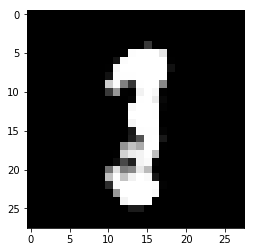

Loop: 843100, Generator_loss: 0.0083505, Discriminator_loss: 0.0028664
Loop: 843200, Generator_loss: -0.041966, Discriminator_loss: 0.0094546
Loop: 843300, Generator_loss: -0.027527, Discriminator_loss: 0.0026434
Loop: 843400, Generator_loss: -0.010194, Discriminator_loss: -0.0014586
Loop: 843500, Generator_loss: 0.038675, Discriminator_loss: 0.0041943
Loop: 843600, Generator_loss: -0.0058516, Discriminator_loss: -0.0021183
Loop: 843700, Generator_loss: -0.022764, Discriminator_loss: 0.0031077
Loop: 843800, Generator_loss: -0.026094, Discriminator_loss: 0.0041755
Loop: 843900, Generator_loss: 0.01681, Discriminator_loss: 0.0030233
Loop: 844000, Generator_loss: 0.02123, Discriminator_loss: 0.0047658


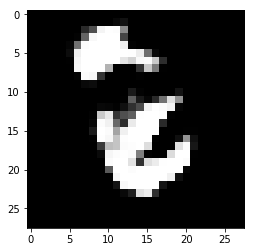

Loop: 844100, Generator_loss: 0.019216, Discriminator_loss: -0.0015579
Loop: 844200, Generator_loss: -0.040107, Discriminator_loss: 0.012378
Loop: 844300, Generator_loss: -0.049108, Discriminator_loss: 0.0017027
Loop: 844400, Generator_loss: -0.038853, Discriminator_loss: 0.00082619
Loop: 844500, Generator_loss: -0.061563, Discriminator_loss: -0.00053961
Loop: 844600, Generator_loss: 0.0049191, Discriminator_loss: -0.0025753
Loop: 844700, Generator_loss: 0.0016521, Discriminator_loss: 0.0009073
Loop: 844800, Generator_loss: -0.062816, Discriminator_loss: -0.0021313
Loop: 844900, Generator_loss: 0.016608, Discriminator_loss: -0.002631
Loop: 845000, Generator_loss: 0.0050664, Discriminator_loss: 0.0023416


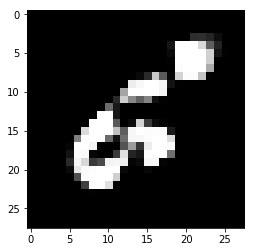

Loop: 845100, Generator_loss: -0.026841, Discriminator_loss: 0.0093413
Loop: 845200, Generator_loss: -0.0087242, Discriminator_loss: 0.0025382
Loop: 845300, Generator_loss: -0.046459, Discriminator_loss: -0.0042573
Loop: 845400, Generator_loss: -0.026019, Discriminator_loss: -0.00060499
Loop: 845500, Generator_loss: -0.011565, Discriminator_loss: 0.0020204
Loop: 845600, Generator_loss: 0.016896, Discriminator_loss: -0.00013037
Loop: 845700, Generator_loss: 0.038146, Discriminator_loss: 0.00421
Loop: 845800, Generator_loss: -0.0053567, Discriminator_loss: 0.0021143
Loop: 845900, Generator_loss: -0.010763, Discriminator_loss: -0.00050052
Loop: 846000, Generator_loss: -0.024937, Discriminator_loss: -0.0047405


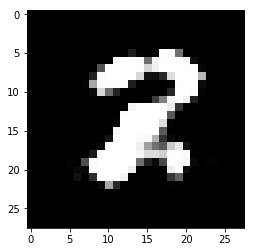

Loop: 846100, Generator_loss: 0.013835, Discriminator_loss: -0.00014424
Loop: 846200, Generator_loss: -0.028609, Discriminator_loss: 0.0028514
Loop: 846300, Generator_loss: -0.022464, Discriminator_loss: 0.00072836
Loop: 846400, Generator_loss: -0.002831, Discriminator_loss: 0.0030392
Loop: 846500, Generator_loss: 0.0035679, Discriminator_loss: 0.0041621
Loop: 846600, Generator_loss: -0.027641, Discriminator_loss: 0.00087725
Loop: 846700, Generator_loss: 0.033321, Discriminator_loss: 0.0015706
Loop: 846800, Generator_loss: -0.010372, Discriminator_loss: 0.0031216
Loop: 846900, Generator_loss: -0.0048928, Discriminator_loss: 0.0011868
Loop: 847000, Generator_loss: -0.014287, Discriminator_loss: 0.0012994


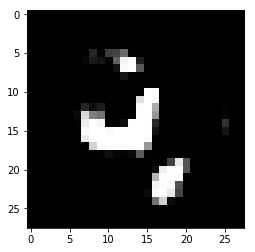

Loop: 847100, Generator_loss: 0.01513, Discriminator_loss: 0.0025088
Loop: 847200, Generator_loss: -0.0049226, Discriminator_loss: 0.0024539
Loop: 847300, Generator_loss: 0.00141, Discriminator_loss: 0.0039584
Loop: 847400, Generator_loss: -0.014844, Discriminator_loss: -0.0019158
Loop: 847500, Generator_loss: -0.021246, Discriminator_loss: 0.0051584
Loop: 847600, Generator_loss: 0.005251, Discriminator_loss: 0.0048627
Loop: 847700, Generator_loss: 0.044507, Discriminator_loss: -0.0019493
Loop: 847800, Generator_loss: -0.019744, Discriminator_loss: 0.012159
Loop: 847900, Generator_loss: -0.02577, Discriminator_loss: -0.0031018
Loop: 848000, Generator_loss: -0.021623, Discriminator_loss: -0.00072034


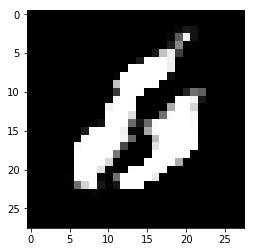

Loop: 848100, Generator_loss: -0.038784, Discriminator_loss: 0.010943
Loop: 848200, Generator_loss: 0.0066128, Discriminator_loss: -0.0016013
Loop: 848300, Generator_loss: -0.016682, Discriminator_loss: 0.00078059
Loop: 848400, Generator_loss: 0.0024809, Discriminator_loss: -0.0019777
Loop: 848500, Generator_loss: 0.039983, Discriminator_loss: 0.0024726
Loop: 848600, Generator_loss: -0.014707, Discriminator_loss: 0.00033346
Loop: 848700, Generator_loss: 0.001348, Discriminator_loss: 0.0065677
Loop: 848800, Generator_loss: 0.051135, Discriminator_loss: 0.00026873
Loop: 848900, Generator_loss: 0.0042806, Discriminator_loss: 0.0044472
Loop: 849000, Generator_loss: -0.019631, Discriminator_loss: -0.002394


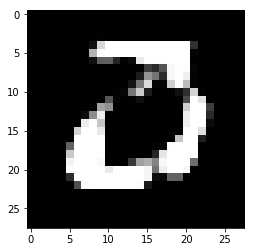

Loop: 849100, Generator_loss: -0.00021782, Discriminator_loss: 0.0044592
Loop: 849200, Generator_loss: -0.029728, Discriminator_loss: 0.0024008
Loop: 849300, Generator_loss: 0.012152, Discriminator_loss: 0.0030774
Loop: 849400, Generator_loss: -0.0084825, Discriminator_loss: 0.0034294
Loop: 849500, Generator_loss: 0.035213, Discriminator_loss: 0.00040359
Loop: 849600, Generator_loss: -0.020668, Discriminator_loss: 0.0082967
Loop: 849700, Generator_loss: 0.011051, Discriminator_loss: 0.0047649
Loop: 849800, Generator_loss: -0.036746, Discriminator_loss: -0.0004604
Loop: 849900, Generator_loss: 0.0080107, Discriminator_loss: 0.0022842
Loop: 850000, Generator_loss: -0.039086, Discriminator_loss: 0.0039566


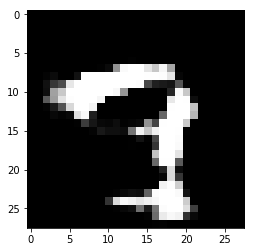

Loop: 850100, Generator_loss: 0.016137, Discriminator_loss: 0.0036165
Loop: 850200, Generator_loss: 0.012009, Discriminator_loss: 0.0023571
Loop: 850300, Generator_loss: -0.0073455, Discriminator_loss: 0.0077483
Loop: 850400, Generator_loss: -0.019205, Discriminator_loss: -2.5947e-05
Loop: 850500, Generator_loss: -0.0053824, Discriminator_loss: 0.00038164
Loop: 850600, Generator_loss: -0.048398, Discriminator_loss: 0.0037261
Loop: 850700, Generator_loss: -0.00068203, Discriminator_loss: -0.0013059
Loop: 850800, Generator_loss: -0.0061259, Discriminator_loss: -0.0009289
Loop: 850900, Generator_loss: -0.04707, Discriminator_loss: 0.0034648
Loop: 851000, Generator_loss: 0.012345, Discriminator_loss: 0.0046374


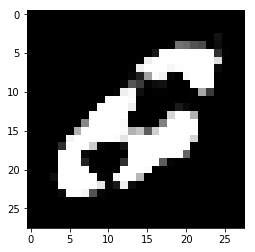

Loop: 851100, Generator_loss: -0.012107, Discriminator_loss: 0.0045053
Loop: 851200, Generator_loss: -0.0086563, Discriminator_loss: -0.00095537
Loop: 851300, Generator_loss: 0.018194, Discriminator_loss: 0.0020759
Loop: 851400, Generator_loss: 0.0044697, Discriminator_loss: 0.0047272
Loop: 851500, Generator_loss: 0.024854, Discriminator_loss: -0.0064816
Loop: 851600, Generator_loss: -0.0085108, Discriminator_loss: 0.00039963
Loop: 851700, Generator_loss: 0.027595, Discriminator_loss: -0.0040014
Loop: 851800, Generator_loss: 0.032238, Discriminator_loss: 0.0012301
Loop: 851900, Generator_loss: 0.0048876, Discriminator_loss: 1.1105e-05
Loop: 852000, Generator_loss: 0.0063998, Discriminator_loss: 0.0035287


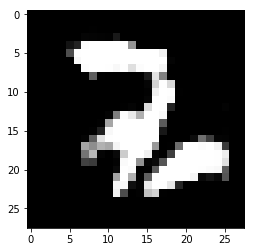

Loop: 852100, Generator_loss: -0.030793, Discriminator_loss: 0.0022812
Loop: 852200, Generator_loss: -0.0053013, Discriminator_loss: 0.0041684
Loop: 852300, Generator_loss: 0.042611, Discriminator_loss: 0.0051285
Loop: 852400, Generator_loss: 0.04379, Discriminator_loss: 0.0054843
Loop: 852500, Generator_loss: 0.0030733, Discriminator_loss: 0.0074731
Loop: 852600, Generator_loss: -0.014606, Discriminator_loss: 0.00027774
Loop: 852700, Generator_loss: 0.066921, Discriminator_loss: -0.0062524
Loop: 852800, Generator_loss: 0.025894, Discriminator_loss: -7.432e-06
Loop: 852900, Generator_loss: -0.011944, Discriminator_loss: 0.0014091
Loop: 853000, Generator_loss: 0.010803, Discriminator_loss: 0.0014149


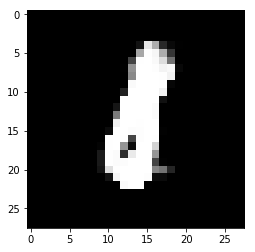

Loop: 853100, Generator_loss: -0.0081118, Discriminator_loss: 0.003385
Loop: 853200, Generator_loss: 0.016522, Discriminator_loss: 0.0017348
Loop: 853300, Generator_loss: 0.043887, Discriminator_loss: 0.0072942
Loop: 853400, Generator_loss: 0.039604, Discriminator_loss: 0.002782
Loop: 853500, Generator_loss: -0.027836, Discriminator_loss: 0.0011255
Loop: 853600, Generator_loss: -0.017038, Discriminator_loss: 0.0017819
Loop: 853700, Generator_loss: -0.030636, Discriminator_loss: 0.0031216
Loop: 853800, Generator_loss: 0.0010249, Discriminator_loss: 0.0003199
Loop: 853900, Generator_loss: 0.034578, Discriminator_loss: 0.011453
Loop: 854000, Generator_loss: -0.047334, Discriminator_loss: 0.008134


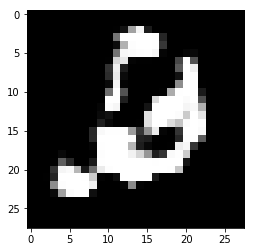

Loop: 854100, Generator_loss: 0.0002116, Discriminator_loss: 0.0045273
Loop: 854200, Generator_loss: -0.075342, Discriminator_loss: 0.00097183
Loop: 854300, Generator_loss: -0.0037075, Discriminator_loss: -0.0030294
Loop: 854400, Generator_loss: -0.0012397, Discriminator_loss: 0.0024198
Loop: 854500, Generator_loss: 0.022222, Discriminator_loss: 0.0045896
Loop: 854600, Generator_loss: -0.040629, Discriminator_loss: 0.0027297
Loop: 854700, Generator_loss: 0.013741, Discriminator_loss: 0.0017418
Loop: 854800, Generator_loss: -0.046158, Discriminator_loss: 0.00093041
Loop: 854900, Generator_loss: -0.022406, Discriminator_loss: -0.0008952
Loop: 855000, Generator_loss: 0.048032, Discriminator_loss: 0.016623


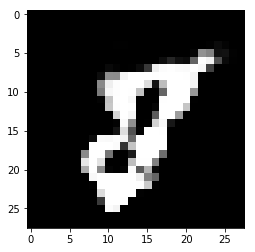

Loop: 855100, Generator_loss: 0.035025, Discriminator_loss: 0.0050418
Loop: 855200, Generator_loss: 0.017358, Discriminator_loss: -0.0021908
Loop: 855300, Generator_loss: -0.010172, Discriminator_loss: 0.0047875
Loop: 855400, Generator_loss: -0.036193, Discriminator_loss: 0.0017584
Loop: 855500, Generator_loss: -0.032604, Discriminator_loss: 0.0034506
Loop: 855600, Generator_loss: -0.016632, Discriminator_loss: -0.00042498
Loop: 855700, Generator_loss: 0.0030222, Discriminator_loss: -0.0021322
Loop: 855800, Generator_loss: -0.0030195, Discriminator_loss: 0.0079421
Loop: 855900, Generator_loss: 0.0009399, Discriminator_loss: 0.01054
Loop: 856000, Generator_loss: 0.038408, Discriminator_loss: 0.0030358


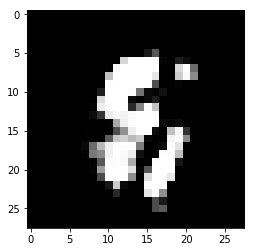

Loop: 856100, Generator_loss: 0.0098948, Discriminator_loss: 0.0054436
Loop: 856200, Generator_loss: -0.038174, Discriminator_loss: -0.0019647
Loop: 856300, Generator_loss: 0.034183, Discriminator_loss: 0.0043479
Loop: 856400, Generator_loss: 0.038948, Discriminator_loss: 0.0089722
Loop: 856500, Generator_loss: -0.02897, Discriminator_loss: -0.0040748
Loop: 856600, Generator_loss: -0.030649, Discriminator_loss: 0.010922
Loop: 856700, Generator_loss: -0.011851, Discriminator_loss: -0.0026381
Loop: 856800, Generator_loss: 0.00098602, Discriminator_loss: -0.0019515
Loop: 856900, Generator_loss: 0.029221, Discriminator_loss: 0.00037658
Loop: 857000, Generator_loss: -0.016869, Discriminator_loss: -0.0038509


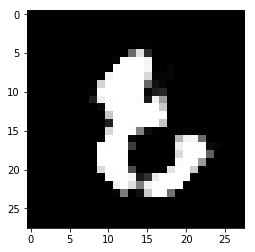

Loop: 857100, Generator_loss: 0.05125, Discriminator_loss: -0.0045319
Loop: 857200, Generator_loss: -0.046791, Discriminator_loss: 0.00039008
Loop: 857300, Generator_loss: -0.033447, Discriminator_loss: 0.0075144
Loop: 857400, Generator_loss: 0.01946, Discriminator_loss: 0.0013838
Loop: 857500, Generator_loss: 0.0664, Discriminator_loss: 0.001282
Loop: 857600, Generator_loss: -0.00081493, Discriminator_loss: 0.0011308
Loop: 857700, Generator_loss: 0.0052177, Discriminator_loss: 0.0021882
Loop: 857800, Generator_loss: -0.037514, Discriminator_loss: 0.0073288
Loop: 857900, Generator_loss: -0.0097655, Discriminator_loss: 0.001372
Loop: 858000, Generator_loss: -0.045553, Discriminator_loss: -0.0014152


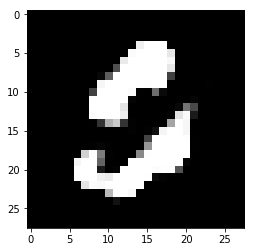

Loop: 858100, Generator_loss: -0.0091341, Discriminator_loss: 0.0058474
Loop: 858200, Generator_loss: 0.0089686, Discriminator_loss: -0.00092195
Loop: 858300, Generator_loss: 0.010443, Discriminator_loss: 0.0063894
Loop: 858400, Generator_loss: -0.044283, Discriminator_loss: 0.013732
Loop: 858500, Generator_loss: -0.012937, Discriminator_loss: 3.7601e-05
Loop: 858600, Generator_loss: 0.0063002, Discriminator_loss: 0.0071026
Loop: 858700, Generator_loss: 0.00987, Discriminator_loss: 0.005547
Loop: 858800, Generator_loss: -0.0038657, Discriminator_loss: 0.0023369
Loop: 858900, Generator_loss: -0.033083, Discriminator_loss: -0.0043664
Loop: 859000, Generator_loss: -0.014668, Discriminator_loss: 0.0056078


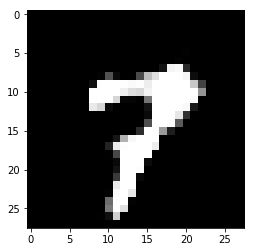

Loop: 859100, Generator_loss: -0.059525, Discriminator_loss: 0.00045876
Loop: 859200, Generator_loss: 0.0028312, Discriminator_loss: -0.00092239
Loop: 859300, Generator_loss: -0.048834, Discriminator_loss: 0.011677
Loop: 859400, Generator_loss: 0.014941, Discriminator_loss: 0.002776
Loop: 859500, Generator_loss: -0.024988, Discriminator_loss: 0.0049297
Loop: 859600, Generator_loss: -0.0030746, Discriminator_loss: 0.0016613
Loop: 859700, Generator_loss: -0.047418, Discriminator_loss: 0.0057847
Loop: 859800, Generator_loss: -0.028144, Discriminator_loss: -0.0022136
Loop: 859900, Generator_loss: 0.026834, Discriminator_loss: 0.0016686
Loop: 860000, Generator_loss: -0.0067629, Discriminator_loss: 0.0029772


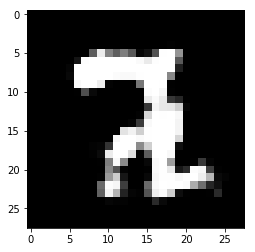

Loop: 860100, Generator_loss: 0.011472, Discriminator_loss: 0.0023872
Loop: 860200, Generator_loss: -0.0041504, Discriminator_loss: 0.00068586
Loop: 860300, Generator_loss: -0.0075474, Discriminator_loss: -0.0017219
Loop: 860400, Generator_loss: 0.038994, Discriminator_loss: -0.0043905
Loop: 860500, Generator_loss: 0.014592, Discriminator_loss: 0.0015346
Loop: 860600, Generator_loss: -0.0589, Discriminator_loss: 0.0070382
Loop: 860700, Generator_loss: 0.00034536, Discriminator_loss: 0.0056159
Loop: 860800, Generator_loss: -0.018678, Discriminator_loss: 0.00512
Loop: 860900, Generator_loss: 0.024858, Discriminator_loss: -0.0016566
Loop: 861000, Generator_loss: 2.0802e-05, Discriminator_loss: 0.002482


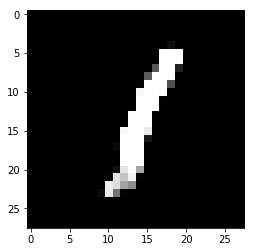

Loop: 861100, Generator_loss: 0.025621, Discriminator_loss: 0.0064874
Loop: 861200, Generator_loss: -0.015877, Discriminator_loss: -0.0047455
Loop: 861300, Generator_loss: -0.013096, Discriminator_loss: -0.0011326
Loop: 861400, Generator_loss: -0.024444, Discriminator_loss: -0.0062297
Loop: 861500, Generator_loss: -0.079695, Discriminator_loss: 0.0021924
Loop: 861600, Generator_loss: 0.0033813, Discriminator_loss: 0.0030843
Loop: 861700, Generator_loss: -0.014442, Discriminator_loss: 0.001059
Loop: 861800, Generator_loss: 0.015295, Discriminator_loss: 0.0033394
Loop: 861900, Generator_loss: -0.030346, Discriminator_loss: 0.0012781
Loop: 862000, Generator_loss: 0.0038738, Discriminator_loss: 0.0022472


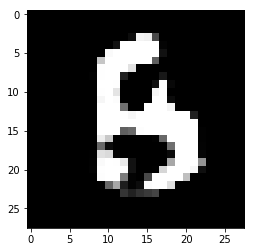

Loop: 862100, Generator_loss: 0.001159, Discriminator_loss: 0.00033127
Loop: 862200, Generator_loss: -0.070806, Discriminator_loss: 0.0054548
Loop: 862300, Generator_loss: -0.032005, Discriminator_loss: -0.0028485
Loop: 862400, Generator_loss: 0.022154, Discriminator_loss: 0.0022211
Loop: 862500, Generator_loss: -0.014828, Discriminator_loss: 0.0030109
Loop: 862600, Generator_loss: 0.026648, Discriminator_loss: 0.0056388
Loop: 862700, Generator_loss: 0.0015245, Discriminator_loss: 0.0035763
Loop: 862800, Generator_loss: -0.018168, Discriminator_loss: 0.0029724
Loop: 862900, Generator_loss: 0.0052991, Discriminator_loss: 0.00017715
Loop: 863000, Generator_loss: 0.0091824, Discriminator_loss: 0.0046327


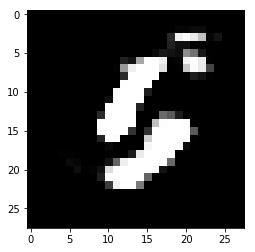

Loop: 863100, Generator_loss: 0.031468, Discriminator_loss: 0.0031065
Loop: 863200, Generator_loss: 0.0092062, Discriminator_loss: 0.0025631
Loop: 863300, Generator_loss: 0.011479, Discriminator_loss: -0.0044657
Loop: 863400, Generator_loss: 0.044266, Discriminator_loss: 0.0084821
Loop: 863500, Generator_loss: -0.012813, Discriminator_loss: 0.0010348
Loop: 863600, Generator_loss: 0.029461, Discriminator_loss: 0.010804
Loop: 863700, Generator_loss: -0.024244, Discriminator_loss: 0.0081146
Loop: 863800, Generator_loss: -0.018982, Discriminator_loss: 0.0030538
Loop: 863900, Generator_loss: -0.01067, Discriminator_loss: 0.0060206
Loop: 864000, Generator_loss: -0.020856, Discriminator_loss: 0.0057163


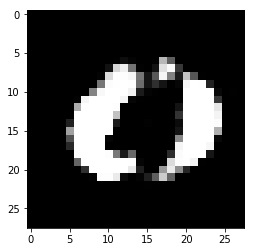

Loop: 864100, Generator_loss: -0.021523, Discriminator_loss: 0.0053273
Loop: 864200, Generator_loss: -0.043653, Discriminator_loss: 0.0010235
Loop: 864300, Generator_loss: -0.0032975, Discriminator_loss: 0.0085621
Loop: 864400, Generator_loss: -0.030954, Discriminator_loss: -0.0027159
Loop: 864500, Generator_loss: -0.036011, Discriminator_loss: 0.009058
Loop: 864600, Generator_loss: -0.020074, Discriminator_loss: -1.7419e-05
Loop: 864700, Generator_loss: -0.017662, Discriminator_loss: 0.0067582
Loop: 864800, Generator_loss: -0.052419, Discriminator_loss: -8.9109e-06
Loop: 864900, Generator_loss: 0.04238, Discriminator_loss: 0.0021689
Loop: 865000, Generator_loss: -0.04165, Discriminator_loss: -0.0030484


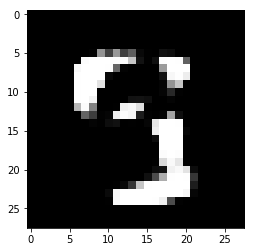

Loop: 865100, Generator_loss: -0.015049, Discriminator_loss: 0.0085291
Loop: 865200, Generator_loss: 0.0097588, Discriminator_loss: 0.0037213
Loop: 865300, Generator_loss: -0.011328, Discriminator_loss: -0.0016464
Loop: 865400, Generator_loss: 0.026549, Discriminator_loss: 0.0033431
Loop: 865500, Generator_loss: 0.029816, Discriminator_loss: 0.0049975
Loop: 865600, Generator_loss: -0.0086257, Discriminator_loss: -0.0066327
Loop: 865700, Generator_loss: -0.015603, Discriminator_loss: 0.0024745
Loop: 865800, Generator_loss: 0.06273, Discriminator_loss: 0.010035
Loop: 865900, Generator_loss: 0.031659, Discriminator_loss: 0.0025496
Loop: 866000, Generator_loss: -0.036517, Discriminator_loss: -0.0013007


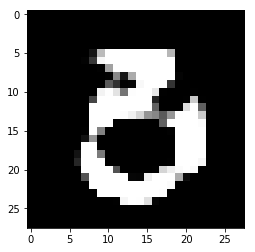

Loop: 866100, Generator_loss: -0.015062, Discriminator_loss: 0.0056364
Loop: 866200, Generator_loss: -0.04164, Discriminator_loss: 0.0021622
Loop: 866300, Generator_loss: -0.025136, Discriminator_loss: 0.00040134
Loop: 866400, Generator_loss: 0.017414, Discriminator_loss: 0.0043103
Loop: 866500, Generator_loss: 0.010606, Discriminator_loss: 0.00052216
Loop: 866600, Generator_loss: -0.039372, Discriminator_loss: -0.00033192
Loop: 866700, Generator_loss: -0.0032184, Discriminator_loss: 0.0060649
Loop: 866800, Generator_loss: -0.061791, Discriminator_loss: 0.0041133
Loop: 866900, Generator_loss: -0.034922, Discriminator_loss: 0.0078268
Loop: 867000, Generator_loss: -0.031473, Discriminator_loss: 0.0017618


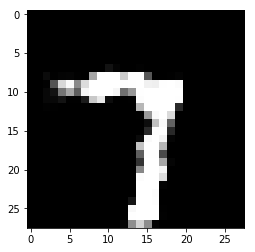

Loop: 867100, Generator_loss: 0.019173, Discriminator_loss: -0.0012575
Loop: 867200, Generator_loss: 0.0060074, Discriminator_loss: 0.0015492
Loop: 867300, Generator_loss: 0.0063391, Discriminator_loss: 0.0020851
Loop: 867400, Generator_loss: 0.010449, Discriminator_loss: 0.0018632
Loop: 867500, Generator_loss: -0.013804, Discriminator_loss: 0.0026136
Loop: 867600, Generator_loss: 0.027728, Discriminator_loss: 0.0040537
Loop: 867700, Generator_loss: 0.01616, Discriminator_loss: 0.0012931
Loop: 867800, Generator_loss: 0.0069221, Discriminator_loss: -0.0015054
Loop: 867900, Generator_loss: -0.036718, Discriminator_loss: 0.0008894
Loop: 868000, Generator_loss: 0.03224, Discriminator_loss: 0.0043105


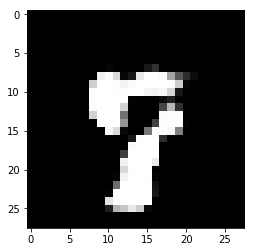

Loop: 868100, Generator_loss: -0.016481, Discriminator_loss: 0.0030753
Loop: 868200, Generator_loss: 0.014325, Discriminator_loss: 8.6225e-05
Loop: 868300, Generator_loss: 0.0011819, Discriminator_loss: 0.0029062
Loop: 868400, Generator_loss: -0.011274, Discriminator_loss: 0.0017967
Loop: 868500, Generator_loss: -0.012645, Discriminator_loss: -0.0033931
Loop: 868600, Generator_loss: -0.0075458, Discriminator_loss: -0.0024453
Loop: 868700, Generator_loss: -0.022142, Discriminator_loss: -0.0020903
Loop: 868800, Generator_loss: 0.0026603, Discriminator_loss: 0.0010935
Loop: 868900, Generator_loss: -0.039631, Discriminator_loss: 0.0087558
Loop: 869000, Generator_loss: 0.00095802, Discriminator_loss: 0.0019724


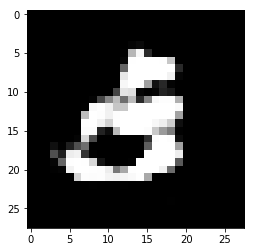

Loop: 869100, Generator_loss: -0.017762, Discriminator_loss: 0.0076994
Loop: 869200, Generator_loss: -0.032876, Discriminator_loss: -0.0012423
Loop: 869300, Generator_loss: -0.0095349, Discriminator_loss: 0.0055596
Loop: 869400, Generator_loss: 0.0023058, Discriminator_loss: 0.0034648
Loop: 869500, Generator_loss: -0.00062495, Discriminator_loss: 0.014926
Loop: 869600, Generator_loss: -0.035495, Discriminator_loss: 0.0077845
Loop: 869700, Generator_loss: -0.027077, Discriminator_loss: -0.005681
Loop: 869800, Generator_loss: -0.041052, Discriminator_loss: 0.0059369
Loop: 869900, Generator_loss: -0.0070472, Discriminator_loss: 0.0067474
Loop: 870000, Generator_loss: 0.0031754, Discriminator_loss: 0.0072734


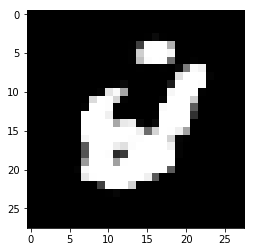

Loop: 870100, Generator_loss: -0.010259, Discriminator_loss: 0.0063831
Loop: 870200, Generator_loss: -0.020341, Discriminator_loss: 0.0039384
Loop: 870300, Generator_loss: -0.015251, Discriminator_loss: -0.004172
Loop: 870400, Generator_loss: -0.0019807, Discriminator_loss: 0.0018362
Loop: 870500, Generator_loss: 0.0055854, Discriminator_loss: 0.0028789
Loop: 870600, Generator_loss: 0.033871, Discriminator_loss: -0.0032435
Loop: 870700, Generator_loss: 0.012439, Discriminator_loss: 0.0013377
Loop: 870800, Generator_loss: 0.020852, Discriminator_loss: -0.0044502
Loop: 870900, Generator_loss: -0.020259, Discriminator_loss: 0.0016684
Loop: 871000, Generator_loss: 0.019505, Discriminator_loss: 0.0094017


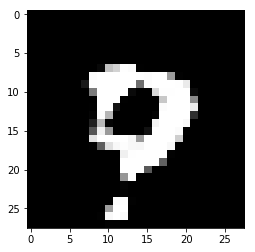

Loop: 871100, Generator_loss: -0.014632, Discriminator_loss: 0.00053351
Loop: 871200, Generator_loss: -0.01982, Discriminator_loss: 0.0033578
Loop: 871300, Generator_loss: 0.021726, Discriminator_loss: -0.0011138
Loop: 871400, Generator_loss: -0.031213, Discriminator_loss: 0.0059219
Loop: 871500, Generator_loss: -0.061377, Discriminator_loss: -0.0019008
Loop: 871600, Generator_loss: -0.015884, Discriminator_loss: 0.0032407
Loop: 871700, Generator_loss: 0.03246, Discriminator_loss: -0.00021238
Loop: 871800, Generator_loss: -0.036722, Discriminator_loss: -0.003639
Loop: 871900, Generator_loss: -0.037421, Discriminator_loss: -0.0049588
Loop: 872000, Generator_loss: -0.024208, Discriminator_loss: -0.0012102


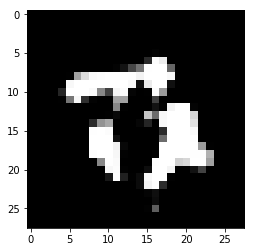

Loop: 872100, Generator_loss: -0.029617, Discriminator_loss: 0.007589
Loop: 872200, Generator_loss: -0.016679, Discriminator_loss: 0.0016513
Loop: 872300, Generator_loss: 0.017946, Discriminator_loss: 6.2672e-05
Loop: 872400, Generator_loss: -0.0026466, Discriminator_loss: -0.004664
Loop: 872500, Generator_loss: -0.022705, Discriminator_loss: 0.0031809
Loop: 872600, Generator_loss: -0.046843, Discriminator_loss: -0.0028111
Loop: 872700, Generator_loss: -0.045013, Discriminator_loss: 0.004514
Loop: 872800, Generator_loss: -0.085246, Discriminator_loss: 0.0023473
Loop: 872900, Generator_loss: 0.0026795, Discriminator_loss: 0.0019426
Loop: 873000, Generator_loss: 0.030572, Discriminator_loss: 0.00046302


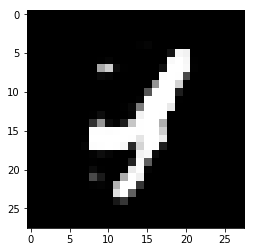

Loop: 873100, Generator_loss: -0.023274, Discriminator_loss: 0.0053998
Loop: 873200, Generator_loss: -0.014351, Discriminator_loss: 0.0038432
Loop: 873300, Generator_loss: 0.0062012, Discriminator_loss: 0.00018747
Loop: 873400, Generator_loss: -0.027238, Discriminator_loss: 0.0019633
Loop: 873500, Generator_loss: 0.024877, Discriminator_loss: 0.007427
Loop: 873600, Generator_loss: 0.027424, Discriminator_loss: 0.011431
Loop: 873700, Generator_loss: 0.011908, Discriminator_loss: 0.0015845
Loop: 873800, Generator_loss: 0.00011048, Discriminator_loss: 0.0018482
Loop: 873900, Generator_loss: 0.0063703, Discriminator_loss: -2.1679e-05
Loop: 874000, Generator_loss: -0.0023704, Discriminator_loss: 0.0031043


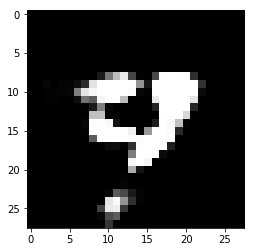

Loop: 874100, Generator_loss: -0.017212, Discriminator_loss: -0.0017267
Loop: 874200, Generator_loss: 0.0040903, Discriminator_loss: 0.0038886
Loop: 874300, Generator_loss: -0.01632, Discriminator_loss: -0.00018914
Loop: 874400, Generator_loss: -0.033619, Discriminator_loss: -0.0081148
Loop: 874500, Generator_loss: 0.06243, Discriminator_loss: 0.0031149
Loop: 874600, Generator_loss: 0.050582, Discriminator_loss: -0.0049501
Loop: 874700, Generator_loss: 0.058318, Discriminator_loss: -0.0018495
Loop: 874800, Generator_loss: -0.021993, Discriminator_loss: 0.0041689
Loop: 874900, Generator_loss: -0.046064, Discriminator_loss: 0.0028654
Loop: 875000, Generator_loss: -0.0036049, Discriminator_loss: 0.0051538


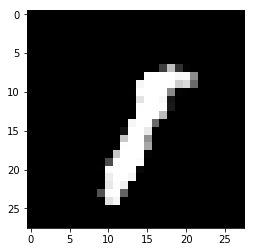

Loop: 875100, Generator_loss: -0.009288, Discriminator_loss: -0.0023081
Loop: 875200, Generator_loss: 0.0050423, Discriminator_loss: 0.00082659
Loop: 875300, Generator_loss: 0.06629, Discriminator_loss: -0.0012325
Loop: 875400, Generator_loss: 0.037426, Discriminator_loss: -0.0019122
Loop: 875500, Generator_loss: -0.0049501, Discriminator_loss: 0.002366
Loop: 875600, Generator_loss: -0.0080676, Discriminator_loss: -0.00749
Loop: 875700, Generator_loss: -0.0075362, Discriminator_loss: 0.0067277
Loop: 875800, Generator_loss: -0.029323, Discriminator_loss: 0.0012324
Loop: 875900, Generator_loss: 0.010656, Discriminator_loss: 0.0047915
Loop: 876000, Generator_loss: 0.0082059, Discriminator_loss: 0.006388


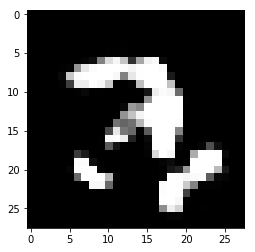

Loop: 876100, Generator_loss: -0.019822, Discriminator_loss: 0.00039855
Loop: 876200, Generator_loss: -0.053795, Discriminator_loss: 0.013905
Loop: 876300, Generator_loss: 0.0058672, Discriminator_loss: 0.0044146
Loop: 876400, Generator_loss: 0.017122, Discriminator_loss: -0.0082061
Loop: 876500, Generator_loss: -0.019403, Discriminator_loss: 0.0019268
Loop: 876600, Generator_loss: -0.026246, Discriminator_loss: -0.00080417
Loop: 876700, Generator_loss: -0.0077555, Discriminator_loss: 0.0038269
Loop: 876800, Generator_loss: 0.047843, Discriminator_loss: -0.0026417
Loop: 876900, Generator_loss: -0.086754, Discriminator_loss: -0.0023146
Loop: 877000, Generator_loss: -0.059106, Discriminator_loss: 0.0014223


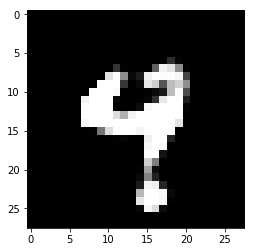

Loop: 877100, Generator_loss: -0.0079301, Discriminator_loss: -0.0049799
Loop: 877200, Generator_loss: -0.023306, Discriminator_loss: -0.0012545
Loop: 877300, Generator_loss: 0.0026217, Discriminator_loss: 0.0030892
Loop: 877400, Generator_loss: 0.025821, Discriminator_loss: -0.0020755
Loop: 877500, Generator_loss: -0.0089822, Discriminator_loss: 0.010476
Loop: 877600, Generator_loss: 0.01184, Discriminator_loss: 0.004605
Loop: 877700, Generator_loss: -0.035387, Discriminator_loss: -0.0063183
Loop: 877800, Generator_loss: -0.0049173, Discriminator_loss: -0.0039488
Loop: 877900, Generator_loss: -0.02665, Discriminator_loss: 0.00066141
Loop: 878000, Generator_loss: 0.014389, Discriminator_loss: 0.0094626


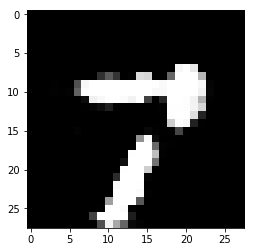

Loop: 878100, Generator_loss: 0.03702, Discriminator_loss: -0.0023434
Loop: 878200, Generator_loss: -0.013533, Discriminator_loss: 0.0023743
Loop: 878300, Generator_loss: 0.024865, Discriminator_loss: 0.013122
Loop: 878400, Generator_loss: -0.0066959, Discriminator_loss: 0.00080523
Loop: 878500, Generator_loss: -0.035978, Discriminator_loss: -0.0044342
Loop: 878600, Generator_loss: -0.0011168, Discriminator_loss: -0.0045331
Loop: 878700, Generator_loss: 0.016106, Discriminator_loss: 0.0055436
Loop: 878800, Generator_loss: 0.015879, Discriminator_loss: 0.0023397
Loop: 878900, Generator_loss: 0.032164, Discriminator_loss: 0.012414
Loop: 879000, Generator_loss: -0.018573, Discriminator_loss: 0.0010918


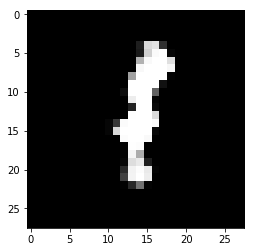

Loop: 879100, Generator_loss: -0.013922, Discriminator_loss: -0.00027781
Loop: 879200, Generator_loss: -0.013086, Discriminator_loss: -0.0089282
Loop: 879300, Generator_loss: -0.043728, Discriminator_loss: -0.0044371
Loop: 879400, Generator_loss: 0.0045513, Discriminator_loss: -0.003516
Loop: 879500, Generator_loss: -0.039658, Discriminator_loss: -0.0030079
Loop: 879600, Generator_loss: -0.0015934, Discriminator_loss: 0.0016979
Loop: 879700, Generator_loss: 0.0063321, Discriminator_loss: 0.00041003
Loop: 879800, Generator_loss: -0.019439, Discriminator_loss: 0.0057913
Loop: 879900, Generator_loss: -0.024083, Discriminator_loss: -0.0044507
Loop: 880000, Generator_loss: 0.042234, Discriminator_loss: 0.0098195


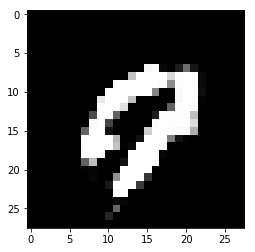

Loop: 880100, Generator_loss: 0.027406, Discriminator_loss: -0.00099557
Loop: 880200, Generator_loss: -0.0075428, Discriminator_loss: -0.0041144
Loop: 880300, Generator_loss: -0.045123, Discriminator_loss: 0.0010816
Loop: 880400, Generator_loss: -0.0079198, Discriminator_loss: 0.0032472
Loop: 880500, Generator_loss: -0.0021267, Discriminator_loss: 0.0024467
Loop: 880600, Generator_loss: 0.032846, Discriminator_loss: 0.0068534
Loop: 880700, Generator_loss: 0.012119, Discriminator_loss: -0.0026535
Loop: 880800, Generator_loss: -0.024875, Discriminator_loss: -0.0049797
Loop: 880900, Generator_loss: -0.016556, Discriminator_loss: 0.001211
Loop: 881000, Generator_loss: -0.017387, Discriminator_loss: 0.0062431


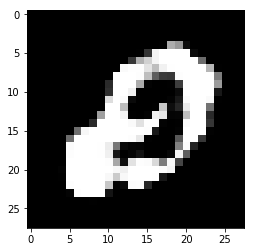

Loop: 881100, Generator_loss: 0.00341, Discriminator_loss: 0.0005531
Loop: 881200, Generator_loss: -0.0085417, Discriminator_loss: -0.0043661
Loop: 881300, Generator_loss: -0.04643, Discriminator_loss: 0.0069435
Loop: 881400, Generator_loss: 0.01182, Discriminator_loss: 0.003391
Loop: 881500, Generator_loss: -0.020388, Discriminator_loss: 0.0074474
Loop: 881600, Generator_loss: -0.052455, Discriminator_loss: -0.0054885
Loop: 881700, Generator_loss: 0.0042851, Discriminator_loss: 0.0015846
Loop: 881800, Generator_loss: 0.0041614, Discriminator_loss: -0.0014003
Loop: 881900, Generator_loss: 0.041633, Discriminator_loss: 0.0043543
Loop: 882000, Generator_loss: -0.01833, Discriminator_loss: 0.0059493


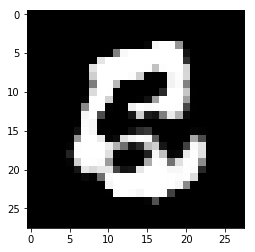

Loop: 882100, Generator_loss: -0.027427, Discriminator_loss: -0.0081276
Loop: 882200, Generator_loss: -0.0047469, Discriminator_loss: 0.0064618
Loop: 882300, Generator_loss: 0.013883, Discriminator_loss: -0.0030016
Loop: 882400, Generator_loss: 0.0021817, Discriminator_loss: 0.0034628
Loop: 882500, Generator_loss: 0.036792, Discriminator_loss: -0.00028985
Loop: 882600, Generator_loss: 0.045593, Discriminator_loss: -0.0001232
Loop: 882700, Generator_loss: 0.024189, Discriminator_loss: 0.00087385
Loop: 882800, Generator_loss: -0.016401, Discriminator_loss: 0.0028617
Loop: 882900, Generator_loss: -0.009315, Discriminator_loss: 0.0070722
Loop: 883000, Generator_loss: 0.0060435, Discriminator_loss: 0.0044607


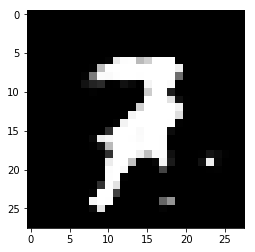

Loop: 883100, Generator_loss: -0.017957, Discriminator_loss: 0.0035073
Loop: 883200, Generator_loss: 0.0021061, Discriminator_loss: 0.0034088
Loop: 883300, Generator_loss: 0.026997, Discriminator_loss: 0.004013
Loop: 883400, Generator_loss: 0.01576, Discriminator_loss: 0.0046417
Loop: 883500, Generator_loss: -0.019549, Discriminator_loss: 0.00083324
Loop: 883600, Generator_loss: 0.015458, Discriminator_loss: 0.009704
Loop: 883700, Generator_loss: -0.03745, Discriminator_loss: 4.7341e-05
Loop: 883800, Generator_loss: -0.026491, Discriminator_loss: 0.0058619
Loop: 883900, Generator_loss: -0.033308, Discriminator_loss: 0.0016602
Loop: 884000, Generator_loss: -0.039428, Discriminator_loss: 0.0056394


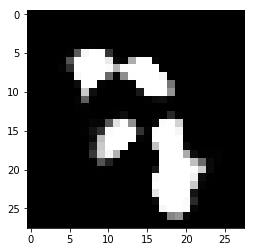

Loop: 884100, Generator_loss: -0.023612, Discriminator_loss: -0.0012928
Loop: 884200, Generator_loss: -0.0021462, Discriminator_loss: -0.0033714
Loop: 884300, Generator_loss: -0.0071773, Discriminator_loss: -0.00046411
Loop: 884400, Generator_loss: -0.020442, Discriminator_loss: 0.0050192
Loop: 884500, Generator_loss: -0.039624, Discriminator_loss: 0.0055409
Loop: 884600, Generator_loss: 0.02652, Discriminator_loss: 0.0095163
Loop: 884700, Generator_loss: -0.02487, Discriminator_loss: 0.0029856
Loop: 884800, Generator_loss: 0.036079, Discriminator_loss: -0.00072646
Loop: 884900, Generator_loss: 0.043449, Discriminator_loss: 0.0030982
Loop: 885000, Generator_loss: 0.023805, Discriminator_loss: 0.0087951


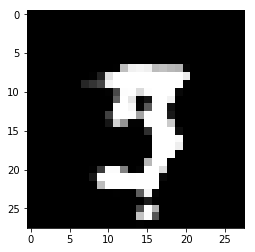

Loop: 885100, Generator_loss: 0.060346, Discriminator_loss: 0.011735
Loop: 885200, Generator_loss: -0.033652, Discriminator_loss: -0.0025965
Loop: 885300, Generator_loss: -0.033809, Discriminator_loss: -0.00041347
Loop: 885400, Generator_loss: -0.017433, Discriminator_loss: 0.0093507
Loop: 885500, Generator_loss: 0.005661, Discriminator_loss: 0.0068962
Loop: 885600, Generator_loss: -0.042523, Discriminator_loss: -0.0017948
Loop: 885700, Generator_loss: -0.039758, Discriminator_loss: 0.0025505
Loop: 885800, Generator_loss: -0.05202, Discriminator_loss: 0.013449
Loop: 885900, Generator_loss: -0.040335, Discriminator_loss: 5.5082e-05
Loop: 886000, Generator_loss: -0.040452, Discriminator_loss: 0.0031739


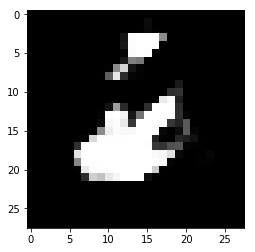

Loop: 886100, Generator_loss: -0.015471, Discriminator_loss: 0.0090903
Loop: 886200, Generator_loss: -0.036716, Discriminator_loss: 0.0047962
Loop: 886300, Generator_loss: -0.021471, Discriminator_loss: -0.0027436
Loop: 886400, Generator_loss: -0.0056405, Discriminator_loss: 0.0028721
Loop: 886500, Generator_loss: -0.015939, Discriminator_loss: -0.00079073
Loop: 886600, Generator_loss: 0.011029, Discriminator_loss: -0.00014909
Loop: 886700, Generator_loss: 0.022899, Discriminator_loss: -0.010279
Loop: 886800, Generator_loss: 0.027452, Discriminator_loss: 0.0033511
Loop: 886900, Generator_loss: -0.01455, Discriminator_loss: 0.00097778
Loop: 887000, Generator_loss: 0.01481, Discriminator_loss: 0.0036227


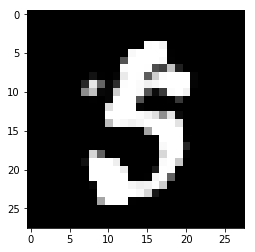

Loop: 887100, Generator_loss: 0.049808, Discriminator_loss: 0.00010747
Loop: 887200, Generator_loss: 0.038754, Discriminator_loss: -0.006328
Loop: 887300, Generator_loss: 0.0093325, Discriminator_loss: 0.0012745
Loop: 887400, Generator_loss: 0.014761, Discriminator_loss: -0.00074333
Loop: 887500, Generator_loss: 0.011284, Discriminator_loss: 0.0020438
Loop: 887600, Generator_loss: 0.051945, Discriminator_loss: -0.0022274
Loop: 887700, Generator_loss: -0.022393, Discriminator_loss: 0.0038945
Loop: 887800, Generator_loss: 0.018703, Discriminator_loss: 0.0073379
Loop: 887900, Generator_loss: 0.017027, Discriminator_loss: 0.0035101
Loop: 888000, Generator_loss: -0.024501, Discriminator_loss: 0.0074245


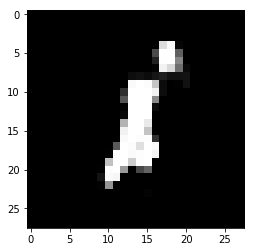

Loop: 888100, Generator_loss: 0.017452, Discriminator_loss: -0.0006715
Loop: 888200, Generator_loss: 0.0074669, Discriminator_loss: -0.0075
Loop: 888300, Generator_loss: -0.021909, Discriminator_loss: -5.0083e-05
Loop: 888400, Generator_loss: -0.03891, Discriminator_loss: 0.00094535
Loop: 888500, Generator_loss: 0.044674, Discriminator_loss: 0.0059706
Loop: 888600, Generator_loss: 0.012875, Discriminator_loss: 0.0071524
Loop: 888700, Generator_loss: 0.018164, Discriminator_loss: 0.0044134
Loop: 888800, Generator_loss: -0.010736, Discriminator_loss: -0.0029164
Loop: 888900, Generator_loss: -0.013002, Discriminator_loss: -0.0070519
Loop: 889000, Generator_loss: -0.018887, Discriminator_loss: 0.0026933


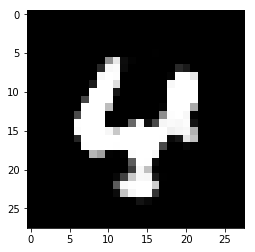

Loop: 889100, Generator_loss: 0.075446, Discriminator_loss: 0.0033714
Loop: 889200, Generator_loss: 0.0055812, Discriminator_loss: -0.0010399
Loop: 889300, Generator_loss: 0.030115, Discriminator_loss: -0.00038923
Loop: 889400, Generator_loss: -0.025605, Discriminator_loss: -0.0023666
Loop: 889500, Generator_loss: -0.0078444, Discriminator_loss: 0.0029872
Loop: 889600, Generator_loss: 0.012516, Discriminator_loss: 0.0044906
Loop: 889700, Generator_loss: -0.045203, Discriminator_loss: 0.0050028
Loop: 889800, Generator_loss: -0.036011, Discriminator_loss: -0.002884
Loop: 889900, Generator_loss: 0.02187, Discriminator_loss: -0.0071524
Loop: 890000, Generator_loss: -0.030205, Discriminator_loss: 0.0033888


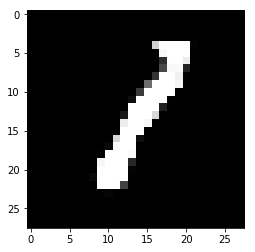

Loop: 890100, Generator_loss: 0.010813, Discriminator_loss: 0.0017122
Loop: 890200, Generator_loss: -0.031158, Discriminator_loss: -0.00091896
Loop: 890300, Generator_loss: -0.021844, Discriminator_loss: -0.0049243
Loop: 890400, Generator_loss: -0.017623, Discriminator_loss: 0.0078004
Loop: 890500, Generator_loss: -0.009907, Discriminator_loss: 0.0082309
Loop: 890600, Generator_loss: 0.021949, Discriminator_loss: 0.003806
Loop: 890700, Generator_loss: 0.012964, Discriminator_loss: -0.0025406
Loop: 890800, Generator_loss: -0.070316, Discriminator_loss: 0.013508
Loop: 890900, Generator_loss: -0.040233, Discriminator_loss: 0.016276
Loop: 891000, Generator_loss: 0.024476, Discriminator_loss: 0.0075419


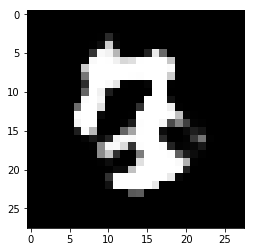

Loop: 891100, Generator_loss: -0.0015526, Discriminator_loss: 0.0013709
Loop: 891200, Generator_loss: 0.010998, Discriminator_loss: 0.0041157
Loop: 891300, Generator_loss: -0.06802, Discriminator_loss: 0.00083204
Loop: 891400, Generator_loss: -0.050315, Discriminator_loss: -0.0032359
Loop: 891500, Generator_loss: -0.031621, Discriminator_loss: -0.0032647
Loop: 891600, Generator_loss: -0.014634, Discriminator_loss: 0.0006606
Loop: 891700, Generator_loss: -0.028746, Discriminator_loss: 0.0098625
Loop: 891800, Generator_loss: -0.018222, Discriminator_loss: 0.0034955
Loop: 891900, Generator_loss: -0.012853, Discriminator_loss: 0.0059611
Loop: 892000, Generator_loss: -0.029061, Discriminator_loss: 0.011535


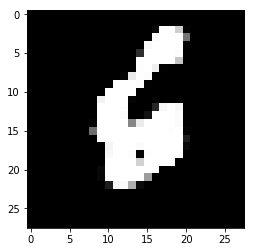

Loop: 892100, Generator_loss: 0.076228, Discriminator_loss: 0.01541
Loop: 892200, Generator_loss: 0.00095612, Discriminator_loss: 0.002516
Loop: 892300, Generator_loss: -0.012615, Discriminator_loss: 0.0045491
Loop: 892400, Generator_loss: 0.011067, Discriminator_loss: 0.0046806
Loop: 892500, Generator_loss: -0.059716, Discriminator_loss: 0.0034578
Loop: 892600, Generator_loss: -0.012312, Discriminator_loss: 0.0054527
Loop: 892700, Generator_loss: -0.0028519, Discriminator_loss: 0.0026503
Loop: 892800, Generator_loss: -0.018944, Discriminator_loss: -0.0019647
Loop: 892900, Generator_loss: -0.013352, Discriminator_loss: 0.0038827
Loop: 893000, Generator_loss: -0.02095, Discriminator_loss: 0.0064542


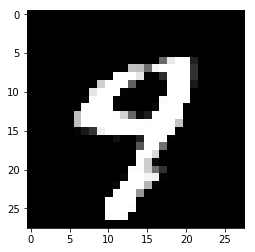

Loop: 893100, Generator_loss: -0.015797, Discriminator_loss: 0.0071578
Loop: 893200, Generator_loss: 0.022938, Discriminator_loss: 0.0060308
Loop: 893300, Generator_loss: -0.0054895, Discriminator_loss: 0.0066806
Loop: 893400, Generator_loss: -0.0066843, Discriminator_loss: 0.0027763
Loop: 893500, Generator_loss: 0.012432, Discriminator_loss: -0.00077291
Loop: 893600, Generator_loss: -0.044685, Discriminator_loss: -0.0021759
Loop: 893700, Generator_loss: -0.047094, Discriminator_loss: 0.00048702
Loop: 893800, Generator_loss: -0.025616, Discriminator_loss: 0.0053872
Loop: 893900, Generator_loss: -0.016353, Discriminator_loss: 0.0085342
Loop: 894000, Generator_loss: 0.024953, Discriminator_loss: 0.0075551


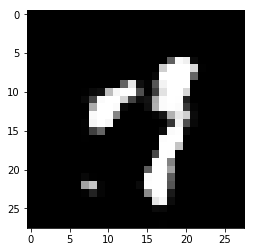

Loop: 894100, Generator_loss: -0.042646, Discriminator_loss: 0.0016231
Loop: 894200, Generator_loss: -0.0045926, Discriminator_loss: 0.0016736
Loop: 894300, Generator_loss: -0.038136, Discriminator_loss: 0.0077713
Loop: 894400, Generator_loss: -0.0030928, Discriminator_loss: -0.0015941
Loop: 894500, Generator_loss: -0.019441, Discriminator_loss: -0.0048436
Loop: 894600, Generator_loss: -0.033533, Discriminator_loss: -0.00098771
Loop: 894700, Generator_loss: 0.0044591, Discriminator_loss: 0.003657
Loop: 894800, Generator_loss: -0.028616, Discriminator_loss: 0.00022599
Loop: 894900, Generator_loss: -0.0084365, Discriminator_loss: -0.0042445
Loop: 895000, Generator_loss: -0.0055426, Discriminator_loss: -0.00088828


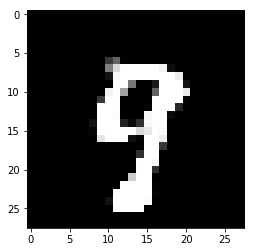

Loop: 895100, Generator_loss: -0.021607, Discriminator_loss: 0.0047643
Loop: 895200, Generator_loss: 0.03577, Discriminator_loss: 0.0050957
Loop: 895300, Generator_loss: -0.0133, Discriminator_loss: 0.0019852
Loop: 895400, Generator_loss: -0.0058603, Discriminator_loss: 0.0062934
Loop: 895500, Generator_loss: -0.011115, Discriminator_loss: -0.0027117
Loop: 895600, Generator_loss: -0.028633, Discriminator_loss: -0.0034942
Loop: 895700, Generator_loss: -0.051809, Discriminator_loss: -0.0060853
Loop: 895800, Generator_loss: 0.015346, Discriminator_loss: 0.0040203
Loop: 895900, Generator_loss: -0.056274, Discriminator_loss: 0.0019904
Loop: 896000, Generator_loss: -0.028198, Discriminator_loss: -0.0056435


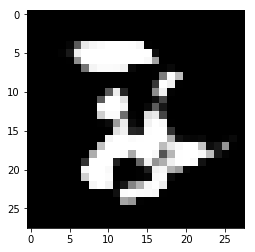

Loop: 896100, Generator_loss: 0.028564, Discriminator_loss: 0.00062032
Loop: 896200, Generator_loss: 0.0061867, Discriminator_loss: 0.0030261
Loop: 896300, Generator_loss: 0.0064267, Discriminator_loss: 0.010603
Loop: 896400, Generator_loss: -0.0034633, Discriminator_loss: -0.0021256
Loop: 896500, Generator_loss: -0.046524, Discriminator_loss: 0.0015709
Loop: 896600, Generator_loss: -0.047696, Discriminator_loss: -0.00010156
Loop: 896700, Generator_loss: -0.0023676, Discriminator_loss: 0.001593
Loop: 896800, Generator_loss: -0.008568, Discriminator_loss: -0.0006134
Loop: 896900, Generator_loss: 0.0099758, Discriminator_loss: -0.0016137
Loop: 897000, Generator_loss: 0.020756, Discriminator_loss: 0.0013135


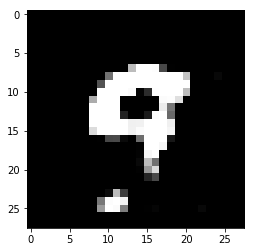

Loop: 897100, Generator_loss: 0.0073025, Discriminator_loss: 0.00024662
Loop: 897200, Generator_loss: 0.070805, Discriminator_loss: 0.0048207
Loop: 897300, Generator_loss: 0.066503, Discriminator_loss: 0.017096
Loop: 897400, Generator_loss: 0.029931, Discriminator_loss: 0.0034246
Loop: 897500, Generator_loss: -0.0037988, Discriminator_loss: 0.0028643
Loop: 897600, Generator_loss: -0.018072, Discriminator_loss: 0.0067633
Loop: 897700, Generator_loss: 0.016925, Discriminator_loss: 5.5404e-05
Loop: 897800, Generator_loss: 0.019774, Discriminator_loss: 0.0044639
Loop: 897900, Generator_loss: -0.058784, Discriminator_loss: 0.0073968
Loop: 898000, Generator_loss: -0.030037, Discriminator_loss: 0.0022983


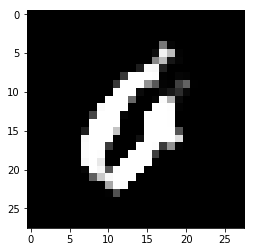

Loop: 898100, Generator_loss: -0.014324, Discriminator_loss: 0.0063086
Loop: 898200, Generator_loss: -0.046158, Discriminator_loss: -0.0014311
Loop: 898300, Generator_loss: -0.006727, Discriminator_loss: 0.0060163
Loop: 898400, Generator_loss: -0.042923, Discriminator_loss: 0.0076028
Loop: 898500, Generator_loss: 0.0040673, Discriminator_loss: 0.0032638
Loop: 898600, Generator_loss: -0.016201, Discriminator_loss: 0.00012031
Loop: 898700, Generator_loss: 0.026919, Discriminator_loss: -0.0063653
Loop: 898800, Generator_loss: -0.039129, Discriminator_loss: 0.0012663
Loop: 898900, Generator_loss: -0.012596, Discriminator_loss: 0.0049835
Loop: 899000, Generator_loss: 0.03438, Discriminator_loss: 0.0030496


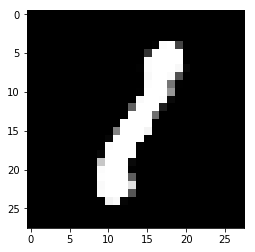

Loop: 899100, Generator_loss: -0.031268, Discriminator_loss: 0.0042971
Loop: 899200, Generator_loss: -0.0021871, Discriminator_loss: 0.0022749
Loop: 899300, Generator_loss: -0.031722, Discriminator_loss: 0.0010621
Loop: 899400, Generator_loss: 0.0062226, Discriminator_loss: -0.0024459
Loop: 899500, Generator_loss: -0.02343, Discriminator_loss: 6.3192e-05
Loop: 899600, Generator_loss: -0.0031587, Discriminator_loss: 0.00081393
Loop: 899700, Generator_loss: 0.024529, Discriminator_loss: -0.0043437
Loop: 899800, Generator_loss: -0.0036183, Discriminator_loss: 0.0016524
Loop: 899900, Generator_loss: -0.020069, Discriminator_loss: 0.00054572
Loop: 900000, Generator_loss: -0.024452, Discriminator_loss: 0.0013109


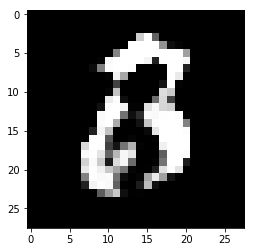

Loop: 900100, Generator_loss: -0.0063797, Discriminator_loss: 0.0088808
Loop: 900200, Generator_loss: 0.0081054, Discriminator_loss: 0.0033642
Loop: 900300, Generator_loss: -0.058382, Discriminator_loss: 0.01223
Loop: 900400, Generator_loss: -0.03456, Discriminator_loss: 0.0052741
Loop: 900500, Generator_loss: 0.016719, Discriminator_loss: 0.0058117
Loop: 900600, Generator_loss: -0.02933, Discriminator_loss: 0.0032456
Loop: 900700, Generator_loss: -0.0086571, Discriminator_loss: 0.0052584
Loop: 900800, Generator_loss: -0.013542, Discriminator_loss: 0.0023717
Loop: 900900, Generator_loss: 0.0050066, Discriminator_loss: 0.0028058
Loop: 901000, Generator_loss: -0.040371, Discriminator_loss: 0.00017055


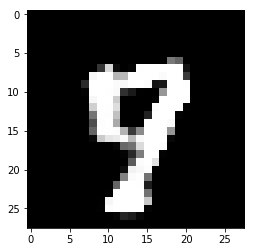

Loop: 901100, Generator_loss: 0.054168, Discriminator_loss: 0.011441
Loop: 901200, Generator_loss: -0.039333, Discriminator_loss: 0.0036154
Loop: 901300, Generator_loss: 0.029156, Discriminator_loss: -0.00028556
Loop: 901400, Generator_loss: 0.0073467, Discriminator_loss: 0.0054212
Loop: 901500, Generator_loss: -0.019164, Discriminator_loss: -0.0038542
Loop: 901600, Generator_loss: 0.031254, Discriminator_loss: 0.0022238
Loop: 901700, Generator_loss: 0.0525, Discriminator_loss: -0.0076476
Loop: 901800, Generator_loss: 0.0247, Discriminator_loss: -0.0048563
Loop: 901900, Generator_loss: 0.0086286, Discriminator_loss: 0.0022653
Loop: 902000, Generator_loss: -0.0010977, Discriminator_loss: -0.00093077


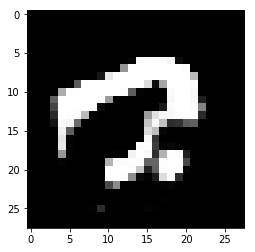

Loop: 902100, Generator_loss: -0.0032953, Discriminator_loss: 3.3454e-05
Loop: 902200, Generator_loss: -0.03291, Discriminator_loss: 0.00274
Loop: 902300, Generator_loss: -0.058326, Discriminator_loss: 0.0066894
Loop: 902400, Generator_loss: 0.0025441, Discriminator_loss: 0.0055707
Loop: 902500, Generator_loss: -0.049726, Discriminator_loss: 0.0022769
Loop: 902600, Generator_loss: -0.040923, Discriminator_loss: 0.0010432
Loop: 902700, Generator_loss: 0.044519, Discriminator_loss: 0.0016871
Loop: 902800, Generator_loss: 0.00069817, Discriminator_loss: 0.0012217
Loop: 902900, Generator_loss: -0.026982, Discriminator_loss: 0.0058733
Loop: 903000, Generator_loss: -0.055986, Discriminator_loss: 0.0010327


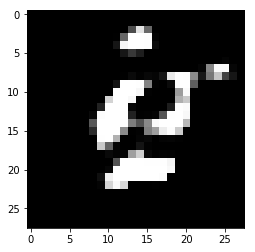

Loop: 903100, Generator_loss: -0.03159, Discriminator_loss: -0.0017689
Loop: 903200, Generator_loss: -0.021016, Discriminator_loss: 0.003779
Loop: 903300, Generator_loss: -0.0024022, Discriminator_loss: 0.0058229
Loop: 903400, Generator_loss: -0.020633, Discriminator_loss: 0.0020007
Loop: 903500, Generator_loss: -0.0079545, Discriminator_loss: 0.0010098
Loop: 903600, Generator_loss: 0.057623, Discriminator_loss: -0.0031579
Loop: 903700, Generator_loss: 0.011809, Discriminator_loss: 0.0028322
Loop: 903800, Generator_loss: 0.031809, Discriminator_loss: 0.006859
Loop: 903900, Generator_loss: 0.027083, Discriminator_loss: 0.00024375
Loop: 904000, Generator_loss: 0.016373, Discriminator_loss: -0.0036974


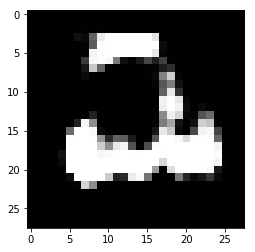

Loop: 904100, Generator_loss: -0.00074607, Discriminator_loss: 0.0068385
Loop: 904200, Generator_loss: 0.0048782, Discriminator_loss: 0.0029212
Loop: 904300, Generator_loss: -0.014482, Discriminator_loss: 0.0025132
Loop: 904400, Generator_loss: 0.0048472, Discriminator_loss: 0.00087512
Loop: 904500, Generator_loss: 0.0087239, Discriminator_loss: -0.0028146
Loop: 904600, Generator_loss: 0.01905, Discriminator_loss: -0.00031962
Loop: 904700, Generator_loss: 0.018745, Discriminator_loss: -0.0010637
Loop: 904800, Generator_loss: -0.037284, Discriminator_loss: -0.0075209
Loop: 904900, Generator_loss: -0.018235, Discriminator_loss: -0.00074337
Loop: 905000, Generator_loss: 0.025889, Discriminator_loss: -0.0034408


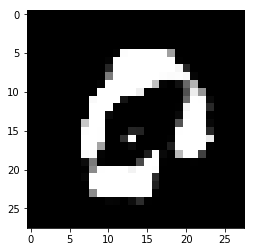

Loop: 905100, Generator_loss: 0.029957, Discriminator_loss: 0.0017987
Loop: 905200, Generator_loss: 0.01388, Discriminator_loss: -0.003727
Loop: 905300, Generator_loss: -0.032208, Discriminator_loss: 0.0020542
Loop: 905400, Generator_loss: -0.025156, Discriminator_loss: 0.0064498
Loop: 905500, Generator_loss: -0.029237, Discriminator_loss: -0.0022232
Loop: 905600, Generator_loss: -0.010225, Discriminator_loss: -0.00052371
Loop: 905700, Generator_loss: -0.034554, Discriminator_loss: 0.0096167
Loop: 905800, Generator_loss: -0.0026603, Discriminator_loss: 0.0062183
Loop: 905900, Generator_loss: 0.02641, Discriminator_loss: -0.0012862
Loop: 906000, Generator_loss: 0.028663, Discriminator_loss: 0.0053702


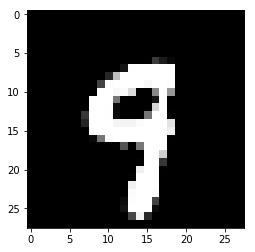

Loop: 906100, Generator_loss: 0.00079468, Discriminator_loss: 0.002326
Loop: 906200, Generator_loss: -0.028876, Discriminator_loss: 0.0080689
Loop: 906300, Generator_loss: 0.010951, Discriminator_loss: -0.00033966
Loop: 906400, Generator_loss: 0.05635, Discriminator_loss: 0.0051279
Loop: 906500, Generator_loss: 0.011145, Discriminator_loss: 0.0066005
Loop: 906600, Generator_loss: 0.0090456, Discriminator_loss: 0.0032769
Loop: 906700, Generator_loss: 0.027727, Discriminator_loss: -0.0004656
Loop: 906800, Generator_loss: 0.031551, Discriminator_loss: 0.0068767
Loop: 906900, Generator_loss: -0.012417, Discriminator_loss: 0.0017592
Loop: 907000, Generator_loss: -0.018748, Discriminator_loss: 0.0022674


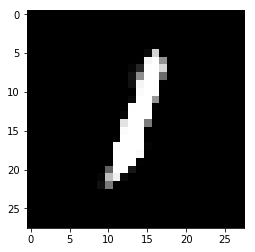

Loop: 907100, Generator_loss: 0.011489, Discriminator_loss: 0.0034386
Loop: 907200, Generator_loss: 0.058173, Discriminator_loss: 0.0024803
Loop: 907300, Generator_loss: 0.033589, Discriminator_loss: -0.0079784
Loop: 907400, Generator_loss: 0.0076522, Discriminator_loss: 0.0043343
Loop: 907500, Generator_loss: -0.020054, Discriminator_loss: -0.0014223
Loop: 907600, Generator_loss: -0.0017286, Discriminator_loss: 0.00013503
Loop: 907700, Generator_loss: 0.023516, Discriminator_loss: -0.0013505
Loop: 907800, Generator_loss: 0.016129, Discriminator_loss: 0.0016799
Loop: 907900, Generator_loss: -0.039873, Discriminator_loss: 0.00095032
Loop: 908000, Generator_loss: -0.050939, Discriminator_loss: 0.00056285


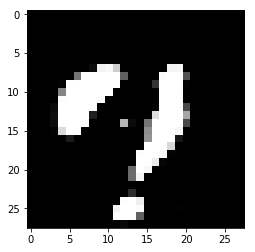

Loop: 908100, Generator_loss: -0.027781, Discriminator_loss: 0.0088575
Loop: 908200, Generator_loss: -0.0025397, Discriminator_loss: 0.00072347
Loop: 908300, Generator_loss: 0.013578, Discriminator_loss: -0.00801
Loop: 908400, Generator_loss: 0.010405, Discriminator_loss: 0.0036491
Loop: 908500, Generator_loss: -0.01614, Discriminator_loss: 0.0011314
Loop: 908600, Generator_loss: -0.0375, Discriminator_loss: 0.0038887
Loop: 908700, Generator_loss: 0.014422, Discriminator_loss: 0.00283
Loop: 908800, Generator_loss: -0.056106, Discriminator_loss: 0.0010294
Loop: 908900, Generator_loss: -0.067849, Discriminator_loss: -0.0012323
Loop: 909000, Generator_loss: -0.013952, Discriminator_loss: -0.0004568


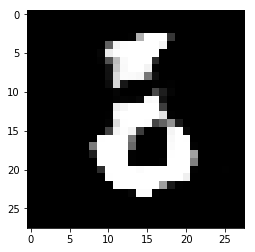

Loop: 909100, Generator_loss: -0.042113, Discriminator_loss: 0.004788
Loop: 909200, Generator_loss: -0.051691, Discriminator_loss: -0.0030344
Loop: 909300, Generator_loss: -0.026241, Discriminator_loss: -0.00011576
Loop: 909400, Generator_loss: 0.015471, Discriminator_loss: 0.0022399
Loop: 909500, Generator_loss: 0.0035773, Discriminator_loss: -0.0033985
Loop: 909600, Generator_loss: -0.031523, Discriminator_loss: 0.01033
Loop: 909700, Generator_loss: 0.001255, Discriminator_loss: 0.00077827
Loop: 909800, Generator_loss: 0.06716, Discriminator_loss: 0.0040522
Loop: 909900, Generator_loss: -0.033377, Discriminator_loss: 0.003625
Loop: 910000, Generator_loss: 0.0076499, Discriminator_loss: 0.0031749


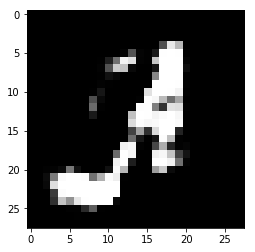

Loop: 910100, Generator_loss: 0.047971, Discriminator_loss: -0.0038377
Loop: 910200, Generator_loss: -0.028418, Discriminator_loss: 0.0062532
Loop: 910300, Generator_loss: -0.019708, Discriminator_loss: -2.9381e-05
Loop: 910400, Generator_loss: -0.0042986, Discriminator_loss: -0.0021604
Loop: 910500, Generator_loss: -0.036337, Discriminator_loss: 0.0075056
Loop: 910600, Generator_loss: 0.023676, Discriminator_loss: 0.0059612
Loop: 910700, Generator_loss: 0.020278, Discriminator_loss: 0.0047228
Loop: 910800, Generator_loss: -0.00055711, Discriminator_loss: -0.0010371
Loop: 910900, Generator_loss: -0.011922, Discriminator_loss: 0.0068281
Loop: 911000, Generator_loss: 0.010783, Discriminator_loss: 0.0044246


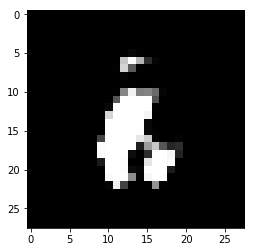

Loop: 911100, Generator_loss: -0.0082874, Discriminator_loss: -0.00078681
Loop: 911200, Generator_loss: -0.018709, Discriminator_loss: 0.0053679
Loop: 911300, Generator_loss: 0.011122, Discriminator_loss: 0.0036776
Loop: 911400, Generator_loss: -0.030759, Discriminator_loss: 0.0042767
Loop: 911500, Generator_loss: -0.04356, Discriminator_loss: 0.0068219
Loop: 911600, Generator_loss: 0.02403, Discriminator_loss: -0.0017979
Loop: 911700, Generator_loss: -0.021106, Discriminator_loss: 0.0052778
Loop: 911800, Generator_loss: 0.0062843, Discriminator_loss: 0.0062546
Loop: 911900, Generator_loss: -0.030863, Discriminator_loss: 0.012945
Loop: 912000, Generator_loss: 0.027909, Discriminator_loss: 0.0030744


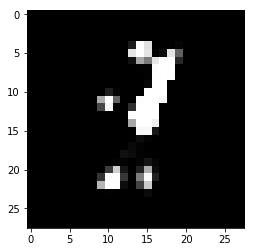

Loop: 912100, Generator_loss: -0.0024212, Discriminator_loss: -0.0022295
Loop: 912200, Generator_loss: -0.018443, Discriminator_loss: 0.00076858
Loop: 912300, Generator_loss: 0.0076849, Discriminator_loss: 0.0051055
Loop: 912400, Generator_loss: -0.039419, Discriminator_loss: 0.0078959
Loop: 912500, Generator_loss: -0.064875, Discriminator_loss: 0.0069187
Loop: 912600, Generator_loss: 0.030926, Discriminator_loss: 0.00077298
Loop: 912700, Generator_loss: 0.0081302, Discriminator_loss: -0.00056956
Loop: 912800, Generator_loss: -0.025775, Discriminator_loss: -0.0039978
Loop: 912900, Generator_loss: 0.0018668, Discriminator_loss: 0.002621
Loop: 913000, Generator_loss: -0.020334, Discriminator_loss: 0.001473


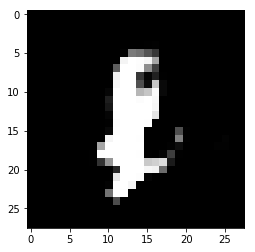

Loop: 913100, Generator_loss: -0.0036351, Discriminator_loss: 0.0033303
Loop: 913200, Generator_loss: -0.018399, Discriminator_loss: 0.011442
Loop: 913300, Generator_loss: -0.035023, Discriminator_loss: -0.0012453
Loop: 913400, Generator_loss: -0.020759, Discriminator_loss: 0.0025435
Loop: 913500, Generator_loss: -0.012224, Discriminator_loss: 0.0063498
Loop: 913600, Generator_loss: -0.024948, Discriminator_loss: 0.0047868
Loop: 913700, Generator_loss: -0.020051, Discriminator_loss: 0.0039274
Loop: 913800, Generator_loss: -0.0039369, Discriminator_loss: 0.0072632
Loop: 913900, Generator_loss: -0.020478, Discriminator_loss: 0.0041874
Loop: 914000, Generator_loss: 0.0054426, Discriminator_loss: 0.0014666


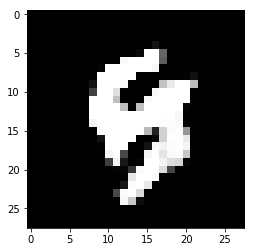

Loop: 914100, Generator_loss: 0.0036005, Discriminator_loss: 0.0025441
Loop: 914200, Generator_loss: 0.0040669, Discriminator_loss: -0.0095796
Loop: 914300, Generator_loss: 0.014097, Discriminator_loss: 0.0065821
Loop: 914400, Generator_loss: 0.060006, Discriminator_loss: 0.010067
Loop: 914500, Generator_loss: -0.021418, Discriminator_loss: 0.0042502
Loop: 914600, Generator_loss: -0.013125, Discriminator_loss: 0.0078315
Loop: 914700, Generator_loss: 0.037455, Discriminator_loss: 0.00055305
Loop: 914800, Generator_loss: -0.039809, Discriminator_loss: 0.0040235
Loop: 914900, Generator_loss: 0.0034361, Discriminator_loss: 0.003976
Loop: 915000, Generator_loss: -0.0014288, Discriminator_loss: -0.0056332


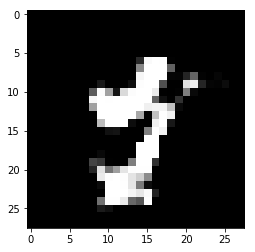

Loop: 915100, Generator_loss: 0.017128, Discriminator_loss: 0.00079529
Loop: 915200, Generator_loss: 0.0017312, Discriminator_loss: 0.0067114
Loop: 915300, Generator_loss: -0.0056807, Discriminator_loss: 0.0020937
Loop: 915400, Generator_loss: 0.016965, Discriminator_loss: 0.0019051
Loop: 915500, Generator_loss: -0.0032803, Discriminator_loss: -0.0028517
Loop: 915600, Generator_loss: 0.035822, Discriminator_loss: 0.013016
Loop: 915700, Generator_loss: 0.0091102, Discriminator_loss: 0.00035143
Loop: 915800, Generator_loss: -0.010626, Discriminator_loss: -0.0049058
Loop: 915900, Generator_loss: 0.0030913, Discriminator_loss: 0.00012059
Loop: 916000, Generator_loss: -0.013076, Discriminator_loss: 0.0014963


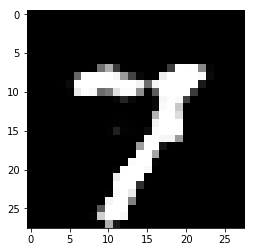

Loop: 916100, Generator_loss: 0.046921, Discriminator_loss: 0.0027241
Loop: 916200, Generator_loss: -0.032681, Discriminator_loss: 0.00062722
Loop: 916300, Generator_loss: 0.0035553, Discriminator_loss: 0.0071828
Loop: 916400, Generator_loss: -0.08963, Discriminator_loss: 0.0065774
Loop: 916500, Generator_loss: 0.0085956, Discriminator_loss: 0.004442
Loop: 916600, Generator_loss: 0.023639, Discriminator_loss: 0.003245
Loop: 916700, Generator_loss: -0.041971, Discriminator_loss: -0.0013038
Loop: 916800, Generator_loss: -0.0011777, Discriminator_loss: -0.0018428
Loop: 916900, Generator_loss: -0.067416, Discriminator_loss: 0.0023981
Loop: 917000, Generator_loss: 0.0068286, Discriminator_loss: -0.0024084


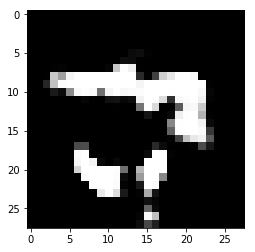

Loop: 917100, Generator_loss: -0.014283, Discriminator_loss: -0.0020284
Loop: 917200, Generator_loss: -0.0041647, Discriminator_loss: 0.0025738
Loop: 917300, Generator_loss: -0.039849, Discriminator_loss: 0.0099213
Loop: 917400, Generator_loss: -0.0015419, Discriminator_loss: 0.00015958
Loop: 917500, Generator_loss: 0.010482, Discriminator_loss: 0.005687
Loop: 917600, Generator_loss: -0.026425, Discriminator_loss: 0.0021428
Loop: 917700, Generator_loss: -0.024019, Discriminator_loss: 0.0059233
Loop: 917800, Generator_loss: -0.025869, Discriminator_loss: -0.001512
Loop: 917900, Generator_loss: -0.047002, Discriminator_loss: 0.0083413
Loop: 918000, Generator_loss: 0.01583, Discriminator_loss: 0.005226


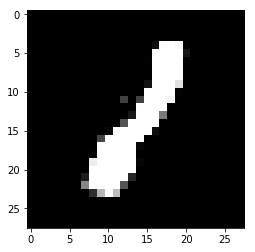

Loop: 918100, Generator_loss: 0.017744, Discriminator_loss: 0.00010121
Loop: 918200, Generator_loss: 0.02917, Discriminator_loss: -0.0019798
Loop: 918300, Generator_loss: 0.038858, Discriminator_loss: -0.0026844
Loop: 918400, Generator_loss: -0.002711, Discriminator_loss: -0.00091569
Loop: 918500, Generator_loss: 0.0076017, Discriminator_loss: 0.00047434
Loop: 918600, Generator_loss: 0.020795, Discriminator_loss: 0.0025126
Loop: 918700, Generator_loss: -0.021734, Discriminator_loss: 0.0014014
Loop: 918800, Generator_loss: 0.022727, Discriminator_loss: -0.0062951
Loop: 918900, Generator_loss: 0.021744, Discriminator_loss: 0.0058558
Loop: 919000, Generator_loss: -0.016611, Discriminator_loss: 0.0045662


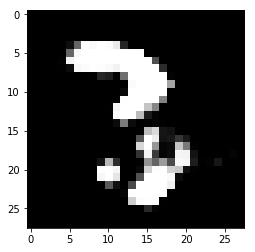

Loop: 919100, Generator_loss: -0.0060199, Discriminator_loss: 0.0010826
Loop: 919200, Generator_loss: -0.043621, Discriminator_loss: 0.0012447
Loop: 919300, Generator_loss: -0.066247, Discriminator_loss: -0.0058164
Loop: 919400, Generator_loss: -0.00061883, Discriminator_loss: 0.0030247
Loop: 919500, Generator_loss: 0.026262, Discriminator_loss: 0.0011658
Loop: 919600, Generator_loss: -0.017482, Discriminator_loss: -0.0039482
Loop: 919700, Generator_loss: -0.0094629, Discriminator_loss: -0.0038798
Loop: 919800, Generator_loss: -0.011669, Discriminator_loss: 0.0021529
Loop: 919900, Generator_loss: -0.010431, Discriminator_loss: 0.0021442
Loop: 920000, Generator_loss: 0.027646, Discriminator_loss: -0.0036125


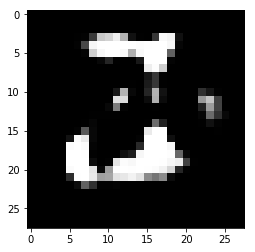

Loop: 920100, Generator_loss: -0.03331, Discriminator_loss: 0.0036957
Loop: 920200, Generator_loss: -0.0083565, Discriminator_loss: 0.0035095
Loop: 920300, Generator_loss: -0.02116, Discriminator_loss: 0.0084714
Loop: 920400, Generator_loss: 0.020812, Discriminator_loss: -0.00028154
Loop: 920500, Generator_loss: -0.031853, Discriminator_loss: 0.0068476
Loop: 920600, Generator_loss: -0.024821, Discriminator_loss: -0.0020256
Loop: 920700, Generator_loss: -0.041848, Discriminator_loss: 0.0021486
Loop: 920800, Generator_loss: 0.0031778, Discriminator_loss: 0.0006836
Loop: 920900, Generator_loss: -0.029545, Discriminator_loss: 0.0019891
Loop: 921000, Generator_loss: 0.017648, Discriminator_loss: -0.0019011


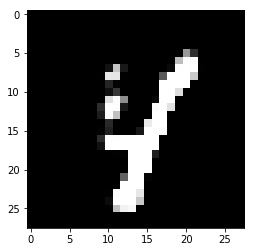

Loop: 921100, Generator_loss: 0.016855, Discriminator_loss: 0.007119
Loop: 921200, Generator_loss: -0.042828, Discriminator_loss: 0.011554
Loop: 921300, Generator_loss: -0.016707, Discriminator_loss: 0.004103
Loop: 921400, Generator_loss: -0.029691, Discriminator_loss: 0.0040064
Loop: 921500, Generator_loss: 0.0096579, Discriminator_loss: 0.0036216
Loop: 921600, Generator_loss: 0.012368, Discriminator_loss: 0.0061441
Loop: 921700, Generator_loss: -0.014911, Discriminator_loss: 0.0034159
Loop: 921800, Generator_loss: -0.016183, Discriminator_loss: -0.0013858
Loop: 921900, Generator_loss: 0.0090908, Discriminator_loss: 0.000521
Loop: 922000, Generator_loss: -0.02205, Discriminator_loss: 0.0010658


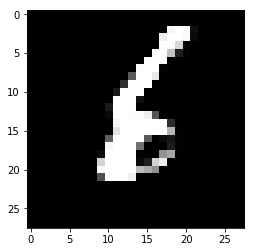

Loop: 922100, Generator_loss: -0.025642, Discriminator_loss: -0.0025706
Loop: 922200, Generator_loss: 0.00095711, Discriminator_loss: 0.0016537
Loop: 922300, Generator_loss: -0.030265, Discriminator_loss: -0.0039268
Loop: 922400, Generator_loss: -0.019309, Discriminator_loss: 0.0013679
Loop: 922500, Generator_loss: 0.021152, Discriminator_loss: -0.0012091
Loop: 922600, Generator_loss: 0.01038, Discriminator_loss: 0.00075541
Loop: 922700, Generator_loss: 0.010689, Discriminator_loss: 0.0047783
Loop: 922800, Generator_loss: 0.011068, Discriminator_loss: 0.0017178
Loop: 922900, Generator_loss: -0.0056703, Discriminator_loss: 0.0051031
Loop: 923000, Generator_loss: 0.012118, Discriminator_loss: 0.0017561


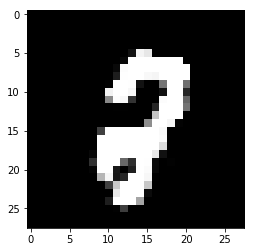

Loop: 923100, Generator_loss: -0.054289, Discriminator_loss: 0.005378
Loop: 923200, Generator_loss: -0.034516, Discriminator_loss: 0.0025908
Loop: 923300, Generator_loss: 0.058007, Discriminator_loss: 0.0074269
Loop: 923400, Generator_loss: 0.0014937, Discriminator_loss: -0.0010086
Loop: 923500, Generator_loss: -0.071555, Discriminator_loss: 0.0098425
Loop: 923600, Generator_loss: -0.0057918, Discriminator_loss: -0.00010745
Loop: 923700, Generator_loss: -0.072943, Discriminator_loss: 0.015223
Loop: 923800, Generator_loss: -0.013395, Discriminator_loss: 0.0038849
Loop: 923900, Generator_loss: -0.046203, Discriminator_loss: -0.0026601
Loop: 924000, Generator_loss: 0.012163, Discriminator_loss: 0.00096661


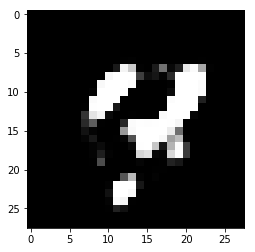

Loop: 924100, Generator_loss: 0.00089548, Discriminator_loss: -0.0023511
Loop: 924200, Generator_loss: 0.0026984, Discriminator_loss: 0.0039345
Loop: 924300, Generator_loss: -0.021025, Discriminator_loss: -0.0014235
Loop: 924400, Generator_loss: -0.014002, Discriminator_loss: -0.0017909
Loop: 924500, Generator_loss: 0.0023876, Discriminator_loss: 0.0074747
Loop: 924600, Generator_loss: -0.030474, Discriminator_loss: 0.0028423
Loop: 924700, Generator_loss: -0.024314, Discriminator_loss: 0.004056
Loop: 924800, Generator_loss: 0.0089379, Discriminator_loss: -0.0043477
Loop: 924900, Generator_loss: -0.029835, Discriminator_loss: -0.0018632
Loop: 925000, Generator_loss: 0.025705, Discriminator_loss: 0.0092147


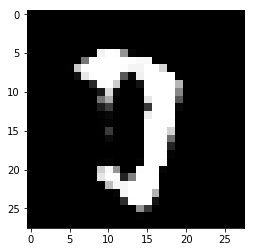

Loop: 925100, Generator_loss: 0.0011337, Discriminator_loss: 0.0022074
Loop: 925200, Generator_loss: -0.033692, Discriminator_loss: 0.0064501
Loop: 925300, Generator_loss: -6.898e-05, Discriminator_loss: 0.0052077
Loop: 925400, Generator_loss: -0.032366, Discriminator_loss: 0.0073409
Loop: 925500, Generator_loss: -0.02327, Discriminator_loss: 0.0020904
Loop: 925600, Generator_loss: 0.011423, Discriminator_loss: 0.0018947
Loop: 925700, Generator_loss: 0.0046376, Discriminator_loss: 0.0014918
Loop: 925800, Generator_loss: 0.0069138, Discriminator_loss: 0.0029781
Loop: 925900, Generator_loss: 0.016963, Discriminator_loss: 0.0020536
Loop: 926000, Generator_loss: -0.021706, Discriminator_loss: 0.001934


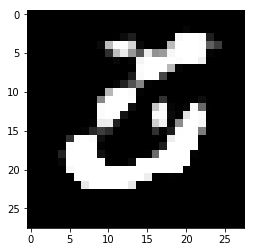

Loop: 926100, Generator_loss: -0.035773, Discriminator_loss: 0.0018967
Loop: 926200, Generator_loss: -0.029721, Discriminator_loss: -0.0001269
Loop: 926300, Generator_loss: -0.0020647, Discriminator_loss: 0.0085311
Loop: 926400, Generator_loss: 0.0015513, Discriminator_loss: 0.0039876
Loop: 926500, Generator_loss: -0.0022937, Discriminator_loss: 0.0024706
Loop: 926600, Generator_loss: 0.019637, Discriminator_loss: -0.0033699
Loop: 926700, Generator_loss: 0.015151, Discriminator_loss: 0.0090326
Loop: 926800, Generator_loss: -0.016039, Discriminator_loss: -0.0014593
Loop: 926900, Generator_loss: 0.015717, Discriminator_loss: 7.9172e-05
Loop: 927000, Generator_loss: -0.029277, Discriminator_loss: 0.0047669


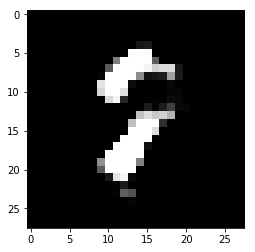

Loop: 927100, Generator_loss: 0.026911, Discriminator_loss: -0.0032612
Loop: 927200, Generator_loss: 0.087214, Discriminator_loss: 0.0068728
Loop: 927300, Generator_loss: -0.011954, Discriminator_loss: 0.0028318
Loop: 927400, Generator_loss: -0.026944, Discriminator_loss: 0.0020371
Loop: 927500, Generator_loss: -0.0076256, Discriminator_loss: 0.0026651
Loop: 927600, Generator_loss: 0.043863, Discriminator_loss: 0.00091526
Loop: 927700, Generator_loss: -0.027244, Discriminator_loss: 0.0089338
Loop: 927800, Generator_loss: 0.0064525, Discriminator_loss: 0.0045825
Loop: 927900, Generator_loss: -0.0069562, Discriminator_loss: 0.00020506
Loop: 928000, Generator_loss: -0.0041646, Discriminator_loss: -0.0039308


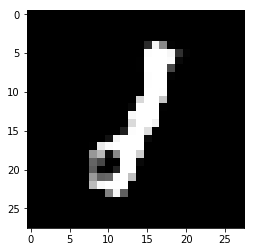

Loop: 928100, Generator_loss: 0.050529, Discriminator_loss: 0.015269
Loop: 928200, Generator_loss: -0.02637, Discriminator_loss: -0.0023702
Loop: 928300, Generator_loss: -0.012145, Discriminator_loss: -0.0024202
Loop: 928400, Generator_loss: -0.020237, Discriminator_loss: 0.001602
Loop: 928500, Generator_loss: 0.0061519, Discriminator_loss: 0.0019962
Loop: 928600, Generator_loss: 0.050766, Discriminator_loss: 0.00010429
Loop: 928700, Generator_loss: 0.020268, Discriminator_loss: 0.004428
Loop: 928800, Generator_loss: 0.013498, Discriminator_loss: 0.0030024
Loop: 928900, Generator_loss: -0.010852, Discriminator_loss: -0.0043884
Loop: 929000, Generator_loss: -0.0077779, Discriminator_loss: 0.00099325


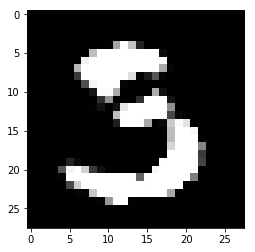

Loop: 929100, Generator_loss: -0.0032512, Discriminator_loss: 0.002754
Loop: 929200, Generator_loss: 0.020916, Discriminator_loss: 0.0021525
Loop: 929300, Generator_loss: 0.033258, Discriminator_loss: 0.0012616
Loop: 929400, Generator_loss: 0.026203, Discriminator_loss: 0.0013978
Loop: 929500, Generator_loss: -0.0573, Discriminator_loss: 0.00029134
Loop: 929600, Generator_loss: -0.058836, Discriminator_loss: 0.0053691
Loop: 929700, Generator_loss: -0.0092501, Discriminator_loss: 0.003383
Loop: 929800, Generator_loss: 0.011244, Discriminator_loss: 0.0051223
Loop: 929900, Generator_loss: 0.010476, Discriminator_loss: -7.8152e-05
Loop: 930000, Generator_loss: -0.048616, Discriminator_loss: 0.01401


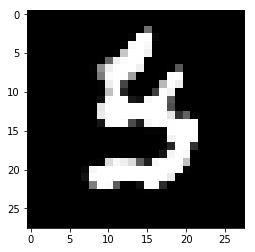

Loop: 930100, Generator_loss: -0.0062475, Discriminator_loss: 0.0025097
Loop: 930200, Generator_loss: -0.019509, Discriminator_loss: 0.0071964
Loop: 930300, Generator_loss: -0.040423, Discriminator_loss: 0.0028093
Loop: 930400, Generator_loss: -0.032066, Discriminator_loss: 0.0021948
Loop: 930500, Generator_loss: 0.0050032, Discriminator_loss: 0.0028311
Loop: 930600, Generator_loss: -0.036086, Discriminator_loss: 0.0084851
Loop: 930700, Generator_loss: 0.0043741, Discriminator_loss: 0.0011216
Loop: 930800, Generator_loss: -0.0051243, Discriminator_loss: 1.9098e-05
Loop: 930900, Generator_loss: -0.001689, Discriminator_loss: 0.0054995
Loop: 931000, Generator_loss: 0.0042958, Discriminator_loss: 7.3111e-05


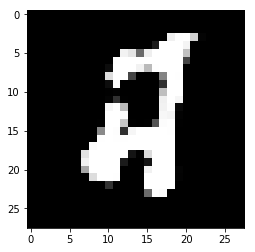

Loop: 931100, Generator_loss: -0.00015273, Discriminator_loss: 0.0060027
Loop: 931200, Generator_loss: -0.0023645, Discriminator_loss: 0.0051794
Loop: 931300, Generator_loss: -0.0095435, Discriminator_loss: 0.0088898
Loop: 931400, Generator_loss: 0.042922, Discriminator_loss: 0.004253
Loop: 931500, Generator_loss: -0.05621, Discriminator_loss: 0.002419
Loop: 931600, Generator_loss: -0.024706, Discriminator_loss: 0.0011397
Loop: 931700, Generator_loss: 0.010988, Discriminator_loss: 0.010353
Loop: 931800, Generator_loss: 0.031406, Discriminator_loss: 0.00055848
Loop: 931900, Generator_loss: 0.0097125, Discriminator_loss: 0.0042984
Loop: 932000, Generator_loss: -0.001639, Discriminator_loss: 0.0022863


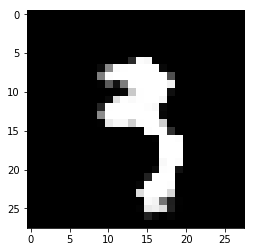

Loop: 932100, Generator_loss: -0.0010342, Discriminator_loss: 0.00043341
Loop: 932200, Generator_loss: -0.0060798, Discriminator_loss: 0.0030456
Loop: 932300, Generator_loss: -0.028344, Discriminator_loss: -0.0013573
Loop: 932400, Generator_loss: -0.0042598, Discriminator_loss: 0.0047652
Loop: 932500, Generator_loss: 0.0084155, Discriminator_loss: 0.0076668
Loop: 932600, Generator_loss: 0.061649, Discriminator_loss: 0.016873
Loop: 932700, Generator_loss: 0.037278, Discriminator_loss: 0.00061918
Loop: 932800, Generator_loss: -0.0031473, Discriminator_loss: 0.0012268
Loop: 932900, Generator_loss: -0.009384, Discriminator_loss: 0.0043946
Loop: 933000, Generator_loss: 0.032332, Discriminator_loss: 6.5943e-05


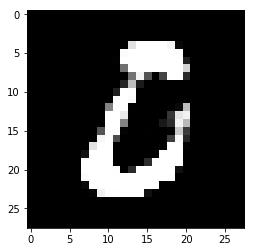

Loop: 933100, Generator_loss: 0.0021526, Discriminator_loss: 0.0064228
Loop: 933200, Generator_loss: 0.0031159, Discriminator_loss: -0.00093818
Loop: 933300, Generator_loss: -0.026189, Discriminator_loss: 0.0048622
Loop: 933400, Generator_loss: 0.036139, Discriminator_loss: -0.0022626
Loop: 933500, Generator_loss: 0.044481, Discriminator_loss: -0.0091517
Loop: 933600, Generator_loss: 0.032471, Discriminator_loss: 0.0085994
Loop: 933700, Generator_loss: -0.017267, Discriminator_loss: 0.001035
Loop: 933800, Generator_loss: -0.0048687, Discriminator_loss: 0.0051477
Loop: 933900, Generator_loss: -0.025162, Discriminator_loss: -0.0010059
Loop: 934000, Generator_loss: 0.021127, Discriminator_loss: -0.00020528


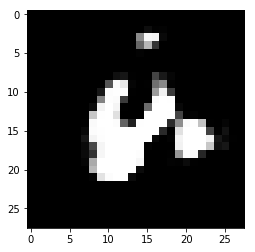

Loop: 934100, Generator_loss: 0.027744, Discriminator_loss: 0.0067018
Loop: 934200, Generator_loss: 0.014969, Discriminator_loss: 0.00027852
Loop: 934300, Generator_loss: -0.00053523, Discriminator_loss: -0.00096743
Loop: 934400, Generator_loss: -0.013184, Discriminator_loss: -0.00021767
Loop: 934500, Generator_loss: 0.03854, Discriminator_loss: -0.0032421
Loop: 934600, Generator_loss: 0.036525, Discriminator_loss: 0.0041963
Loop: 934700, Generator_loss: -0.071286, Discriminator_loss: 0.00047636
Loop: 934800, Generator_loss: -0.011595, Discriminator_loss: 0.0036089
Loop: 934900, Generator_loss: 0.033926, Discriminator_loss: -6.4895e-06
Loop: 935000, Generator_loss: 0.01226, Discriminator_loss: 0.0027859


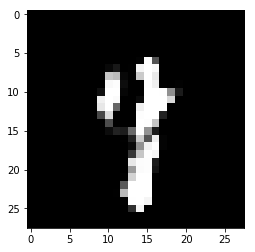

Loop: 935100, Generator_loss: 0.020558, Discriminator_loss: 0.0028407
Loop: 935200, Generator_loss: -0.035096, Discriminator_loss: 0.0051139
Loop: 935300, Generator_loss: -0.026575, Discriminator_loss: 0.0039182
Loop: 935400, Generator_loss: -0.045626, Discriminator_loss: 0.0039632
Loop: 935500, Generator_loss: -0.00054497, Discriminator_loss: 0.0007533
Loop: 935600, Generator_loss: -0.029847, Discriminator_loss: -0.001096
Loop: 935700, Generator_loss: 0.025713, Discriminator_loss: 0.0028196
Loop: 935800, Generator_loss: 0.005508, Discriminator_loss: 0.0080951
Loop: 935900, Generator_loss: -0.022905, Discriminator_loss: -0.0016829
Loop: 936000, Generator_loss: -0.020972, Discriminator_loss: 0.00048824


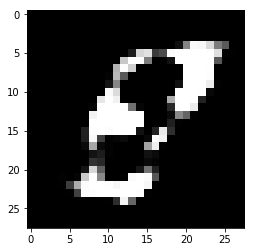

Loop: 936100, Generator_loss: -0.018996, Discriminator_loss: 0.009013
Loop: 936200, Generator_loss: -0.011645, Discriminator_loss: 0.0091766
Loop: 936300, Generator_loss: 0.011436, Discriminator_loss: -0.002237
Loop: 936400, Generator_loss: -0.027052, Discriminator_loss: 0.0048154
Loop: 936500, Generator_loss: 0.016579, Discriminator_loss: 0.002461
Loop: 936600, Generator_loss: 0.0085706, Discriminator_loss: -0.0023726
Loop: 936700, Generator_loss: 0.0086734, Discriminator_loss: -0.0041978
Loop: 936800, Generator_loss: -0.02974, Discriminator_loss: -0.001306
Loop: 936900, Generator_loss: -0.040309, Discriminator_loss: 0.0019873
Loop: 937000, Generator_loss: -0.0073451, Discriminator_loss: 0.0062495


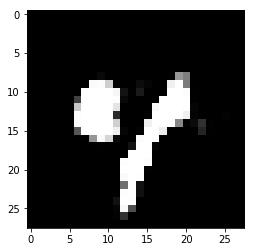

Loop: 937100, Generator_loss: -0.011472, Discriminator_loss: 0.0064751
Loop: 937200, Generator_loss: -0.0073539, Discriminator_loss: 0.0063154
Loop: 937300, Generator_loss: -0.010203, Discriminator_loss: 0.0036407
Loop: 937400, Generator_loss: -0.0052978, Discriminator_loss: 0.0048532
Loop: 937500, Generator_loss: -0.010594, Discriminator_loss: 0.0016008
Loop: 937600, Generator_loss: 0.0069092, Discriminator_loss: 0.0023716
Loop: 937700, Generator_loss: 0.0058359, Discriminator_loss: 0.003375
Loop: 937800, Generator_loss: 0.0043852, Discriminator_loss: 0.001354
Loop: 937900, Generator_loss: 0.0014286, Discriminator_loss: 0.0005086
Loop: 938000, Generator_loss: -0.0049715, Discriminator_loss: 0.00021351


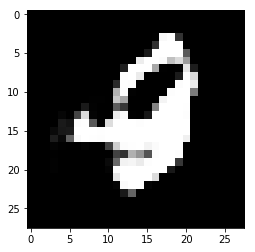

Loop: 938100, Generator_loss: 0.01451, Discriminator_loss: 0.00019156
Loop: 938200, Generator_loss: 0.0041637, Discriminator_loss: 0.0079718
Loop: 938300, Generator_loss: 0.0001715, Discriminator_loss: 0.0047136
Loop: 938400, Generator_loss: -0.018037, Discriminator_loss: 0.0034553
Loop: 938500, Generator_loss: 0.047732, Discriminator_loss: 0.0024008
Loop: 938600, Generator_loss: -0.021747, Discriminator_loss: 0.00058055
Loop: 938700, Generator_loss: -0.040143, Discriminator_loss: 0.0045403
Loop: 938800, Generator_loss: -0.056871, Discriminator_loss: 0.0029643
Loop: 938900, Generator_loss: -0.0060685, Discriminator_loss: 0.004086
Loop: 939000, Generator_loss: -0.024899, Discriminator_loss: 0.0025654


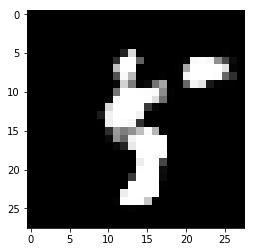

Loop: 939100, Generator_loss: 0.020176, Discriminator_loss: 0.00098473
Loop: 939200, Generator_loss: -0.013996, Discriminator_loss: 0.0023056
Loop: 939300, Generator_loss: -0.009712, Discriminator_loss: 0.0013507
Loop: 939400, Generator_loss: -0.025388, Discriminator_loss: 0.0035793
Loop: 939500, Generator_loss: -0.036592, Discriminator_loss: 0.0051532
Loop: 939600, Generator_loss: -0.048435, Discriminator_loss: 0.0049253
Loop: 939700, Generator_loss: -0.018592, Discriminator_loss: 0.0040521
Loop: 939800, Generator_loss: -0.0426, Discriminator_loss: 0.0070118
Loop: 939900, Generator_loss: -0.010229, Discriminator_loss: 0.0080098
Loop: 940000, Generator_loss: 0.054391, Discriminator_loss: -0.0046086


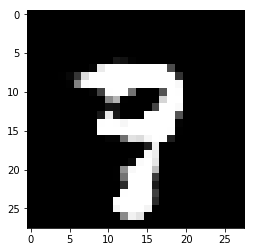

Loop: 940100, Generator_loss: 0.016578, Discriminator_loss: -0.0036993
Loop: 940200, Generator_loss: -0.022849, Discriminator_loss: 0.0039615
Loop: 940300, Generator_loss: 0.01401, Discriminator_loss: 0.0077348
Loop: 940400, Generator_loss: -0.018418, Discriminator_loss: 0.0018069
Loop: 940500, Generator_loss: -0.0051047, Discriminator_loss: 0.0050362
Loop: 940600, Generator_loss: -0.053204, Discriminator_loss: 0.0014841
Loop: 940700, Generator_loss: 0.0023676, Discriminator_loss: 0.0016163
Loop: 940800, Generator_loss: -0.033484, Discriminator_loss: -0.0096077
Loop: 940900, Generator_loss: -0.0087173, Discriminator_loss: 0.0038541
Loop: 941000, Generator_loss: 0.0098514, Discriminator_loss: 0.0033626


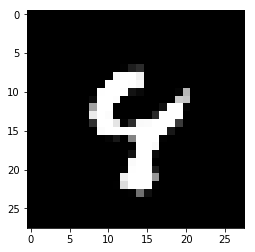

Loop: 941100, Generator_loss: -0.0024175, Discriminator_loss: 0.0059454
Loop: 941200, Generator_loss: 0.023104, Discriminator_loss: -0.0037037
Loop: 941300, Generator_loss: -0.0035506, Discriminator_loss: 0.0060124
Loop: 941400, Generator_loss: 0.052237, Discriminator_loss: -0.00018211
Loop: 941500, Generator_loss: 0.037144, Discriminator_loss: -0.0041222
Loop: 941600, Generator_loss: -0.013641, Discriminator_loss: -0.0040878
Loop: 941700, Generator_loss: 0.0015093, Discriminator_loss: 0.0029622
Loop: 941800, Generator_loss: -0.025503, Discriminator_loss: 0.0013341
Loop: 941900, Generator_loss: -0.0059258, Discriminator_loss: 0.0029046
Loop: 942000, Generator_loss: -0.0036824, Discriminator_loss: 0.00056862


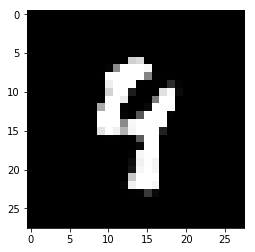

Loop: 942100, Generator_loss: 0.012592, Discriminator_loss: 0.0086132
Loop: 942200, Generator_loss: 0.02161, Discriminator_loss: 0.011354
Loop: 942300, Generator_loss: 0.0094908, Discriminator_loss: -0.0078269
Loop: 942400, Generator_loss: -0.01828, Discriminator_loss: 0.0051376
Loop: 942500, Generator_loss: -0.033342, Discriminator_loss: 0.0023231
Loop: 942600, Generator_loss: -0.017705, Discriminator_loss: 0.013087
Loop: 942700, Generator_loss: -0.023063, Discriminator_loss: -0.0021429
Loop: 942800, Generator_loss: 0.022624, Discriminator_loss: 0.00089535
Loop: 942900, Generator_loss: -0.038894, Discriminator_loss: 0.003036
Loop: 943000, Generator_loss: 0.0078366, Discriminator_loss: 0.0032752


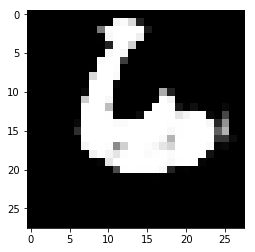

Loop: 943100, Generator_loss: -0.047642, Discriminator_loss: 0.0018682
Loop: 943200, Generator_loss: 0.00097659, Discriminator_loss: 0.01259
Loop: 943300, Generator_loss: -0.047202, Discriminator_loss: 0.0033058
Loop: 943400, Generator_loss: 0.010794, Discriminator_loss: 0.001288
Loop: 943500, Generator_loss: 0.026649, Discriminator_loss: 0.0039219
Loop: 943600, Generator_loss: 0.024675, Discriminator_loss: -0.00080227
Loop: 943700, Generator_loss: -0.011755, Discriminator_loss: 0.0050891
Loop: 943800, Generator_loss: -0.031384, Discriminator_loss: 0.0062386
Loop: 943900, Generator_loss: -0.025974, Discriminator_loss: 0.00069625
Loop: 944000, Generator_loss: 0.021066, Discriminator_loss: 0.0014261


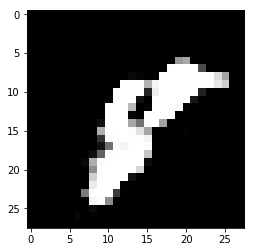

Loop: 944100, Generator_loss: -0.0071052, Discriminator_loss: 0.00087302
Loop: 944200, Generator_loss: 0.0068023, Discriminator_loss: -0.0050148
Loop: 944300, Generator_loss: 0.0084635, Discriminator_loss: 0.0044366
Loop: 944400, Generator_loss: -0.014108, Discriminator_loss: 0.006453
Loop: 944500, Generator_loss: 0.012393, Discriminator_loss: 0.00055454
Loop: 944600, Generator_loss: 0.015729, Discriminator_loss: -0.0038116
Loop: 944700, Generator_loss: 0.028309, Discriminator_loss: 0.0064533
Loop: 944800, Generator_loss: 0.035637, Discriminator_loss: 0.0057752
Loop: 944900, Generator_loss: 0.0099498, Discriminator_loss: 0.0064155
Loop: 945000, Generator_loss: 0.0051461, Discriminator_loss: 0.00083557


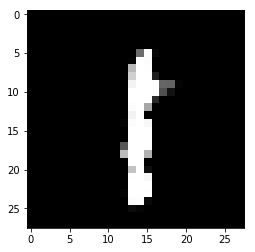

Loop: 945100, Generator_loss: -0.0057293, Discriminator_loss: 0.0034698
Loop: 945200, Generator_loss: -0.042218, Discriminator_loss: 0.0034445
Loop: 945300, Generator_loss: -0.019698, Discriminator_loss: 0.0067401
Loop: 945400, Generator_loss: -0.03266, Discriminator_loss: 0.0033261
Loop: 945500, Generator_loss: -0.020917, Discriminator_loss: 0.00025784
Loop: 945600, Generator_loss: -0.022563, Discriminator_loss: -0.0040131
Loop: 945700, Generator_loss: 0.011622, Discriminator_loss: 0.0016958
Loop: 945800, Generator_loss: -0.02186, Discriminator_loss: 0.00057364
Loop: 945900, Generator_loss: 0.013725, Discriminator_loss: 0.00023147
Loop: 946000, Generator_loss: -0.01107, Discriminator_loss: 0.0061766


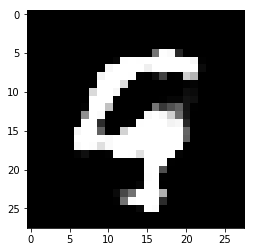

Loop: 946100, Generator_loss: -0.037207, Discriminator_loss: 0.0056404
Loop: 946200, Generator_loss: 0.004135, Discriminator_loss: -0.0056121
Loop: 946300, Generator_loss: 0.043531, Discriminator_loss: 0.0012089
Loop: 946400, Generator_loss: -0.028735, Discriminator_loss: 0.0045094
Loop: 946500, Generator_loss: -0.014584, Discriminator_loss: -0.0023459
Loop: 946600, Generator_loss: -0.029334, Discriminator_loss: -0.0064973
Loop: 946700, Generator_loss: -0.0063098, Discriminator_loss: 0.0010477
Loop: 946800, Generator_loss: 0.02257, Discriminator_loss: 0.005521
Loop: 946900, Generator_loss: -0.013255, Discriminator_loss: 0.00049868
Loop: 947000, Generator_loss: 0.018603, Discriminator_loss: 0.00096525


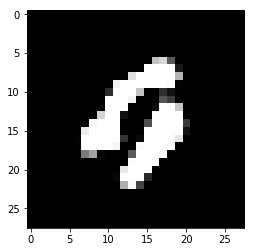

Loop: 947100, Generator_loss: -0.0069387, Discriminator_loss: 0.0017489
Loop: 947200, Generator_loss: -0.011463, Discriminator_loss: -0.00092485
Loop: 947300, Generator_loss: -0.031322, Discriminator_loss: -0.0001131
Loop: 947400, Generator_loss: 0.040036, Discriminator_loss: 0.0018986
Loop: 947500, Generator_loss: -0.035082, Discriminator_loss: 0.0055045
Loop: 947600, Generator_loss: -0.0042134, Discriminator_loss: -0.00021982
Loop: 947700, Generator_loss: -0.019787, Discriminator_loss: 0.0049518
Loop: 947800, Generator_loss: -0.018472, Discriminator_loss: 0.0033626
Loop: 947900, Generator_loss: -0.037127, Discriminator_loss: 0.0039169
Loop: 948000, Generator_loss: -0.014039, Discriminator_loss: 0.0012262


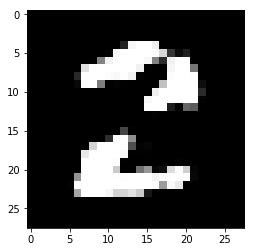

Loop: 948100, Generator_loss: 0.013182, Discriminator_loss: 0.0050703
Loop: 948200, Generator_loss: 0.0013817, Discriminator_loss: -0.001117
Loop: 948300, Generator_loss: 0.024342, Discriminator_loss: -0.001758
Loop: 948400, Generator_loss: 0.024581, Discriminator_loss: 0.0018743
Loop: 948500, Generator_loss: 0.022149, Discriminator_loss: 0.0073469
Loop: 948600, Generator_loss: -0.0044758, Discriminator_loss: 0.0068172
Loop: 948700, Generator_loss: 0.020836, Discriminator_loss: 0.0013387
Loop: 948800, Generator_loss: -0.0088832, Discriminator_loss: 0.002341
Loop: 948900, Generator_loss: -0.011862, Discriminator_loss: 0.0025529
Loop: 949000, Generator_loss: -0.032402, Discriminator_loss: 0.0060125


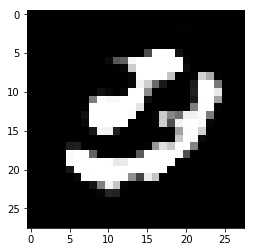

Loop: 949100, Generator_loss: -0.046406, Discriminator_loss: 0.0028926
Loop: 949200, Generator_loss: -0.051359, Discriminator_loss: 0.0085889
Loop: 949300, Generator_loss: -0.0983, Discriminator_loss: 0.0011396
Loop: 949400, Generator_loss: -0.0657, Discriminator_loss: 0.003916
Loop: 949500, Generator_loss: -0.0016618, Discriminator_loss: -0.0036336
Loop: 949600, Generator_loss: 0.0059664, Discriminator_loss: 0.0058947
Loop: 949700, Generator_loss: -0.029593, Discriminator_loss: -0.0016201
Loop: 949800, Generator_loss: 0.052523, Discriminator_loss: 0.0022563
Loop: 949900, Generator_loss: -0.00049885, Discriminator_loss: 0.0041246
Loop: 950000, Generator_loss: -0.052137, Discriminator_loss: 0.0052781


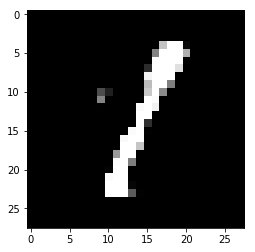

Loop: 950100, Generator_loss: 0.031363, Discriminator_loss: 0.0048345
Loop: 950200, Generator_loss: -0.059848, Discriminator_loss: 0.0025982
Loop: 950300, Generator_loss: -0.069418, Discriminator_loss: 0.0059282
Loop: 950400, Generator_loss: -0.041099, Discriminator_loss: 0.0087274
Loop: 950500, Generator_loss: 0.011075, Discriminator_loss: -0.0011063
Loop: 950600, Generator_loss: -0.008653, Discriminator_loss: 0.0064154
Loop: 950700, Generator_loss: 0.0059998, Discriminator_loss: 0.0013171
Loop: 950800, Generator_loss: 0.022167, Discriminator_loss: -0.0037429
Loop: 950900, Generator_loss: 0.026422, Discriminator_loss: -0.0011849
Loop: 951000, Generator_loss: -0.031761, Discriminator_loss: 0.0049695


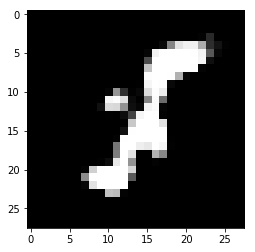

Loop: 951100, Generator_loss: -0.022463, Discriminator_loss: -0.0042049
Loop: 951200, Generator_loss: -0.022244, Discriminator_loss: 0.002719
Loop: 951300, Generator_loss: -0.028265, Discriminator_loss: 0.0068844
Loop: 951400, Generator_loss: -0.073676, Discriminator_loss: 0.014652
Loop: 951500, Generator_loss: -0.040764, Discriminator_loss: 0.0029364
Loop: 951600, Generator_loss: -0.032285, Discriminator_loss: -0.0004831
Loop: 951700, Generator_loss: 0.032903, Discriminator_loss: -0.010477
Loop: 951800, Generator_loss: -0.025362, Discriminator_loss: 0.0034687
Loop: 951900, Generator_loss: 0.01676, Discriminator_loss: 0.001153
Loop: 952000, Generator_loss: -0.029069, Discriminator_loss: 0.0014582


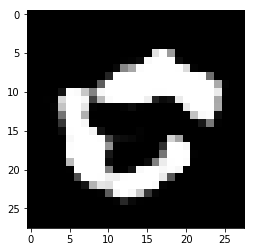

Loop: 952100, Generator_loss: -0.062681, Discriminator_loss: 0.0045576
Loop: 952200, Generator_loss: 0.031087, Discriminator_loss: 0.0019743
Loop: 952300, Generator_loss: -0.042316, Discriminator_loss: 0.0085381
Loop: 952400, Generator_loss: 0.0034503, Discriminator_loss: 0.0011122
Loop: 952500, Generator_loss: 0.014439, Discriminator_loss: -0.00078288
Loop: 952600, Generator_loss: 0.051625, Discriminator_loss: -0.0078327
Loop: 952700, Generator_loss: 0.022262, Discriminator_loss: 3.4321e-05
Loop: 952800, Generator_loss: 0.080447, Discriminator_loss: 0.004026
Loop: 952900, Generator_loss: -0.0082906, Discriminator_loss: 0.00032099
Loop: 953000, Generator_loss: 0.06152, Discriminator_loss: 0.0032921


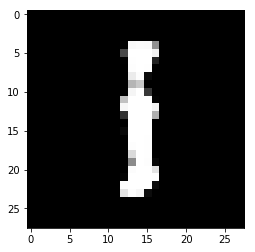

Loop: 953100, Generator_loss: -0.0081938, Discriminator_loss: 0.0011603
Loop: 953200, Generator_loss: -0.025998, Discriminator_loss: 0.0066215
Loop: 953300, Generator_loss: -0.030416, Discriminator_loss: 0.0012894
Loop: 953400, Generator_loss: -0.01145, Discriminator_loss: -0.00085759
Loop: 953500, Generator_loss: -0.0087094, Discriminator_loss: 0.0043594
Loop: 953600, Generator_loss: 0.00342, Discriminator_loss: 0.0066873
Loop: 953700, Generator_loss: 0.0046856, Discriminator_loss: -0.00097339
Loop: 953800, Generator_loss: -0.028286, Discriminator_loss: 0.00087312
Loop: 953900, Generator_loss: 0.037949, Discriminator_loss: 0.0051772
Loop: 954000, Generator_loss: -0.0060685, Discriminator_loss: -4.9324e-05


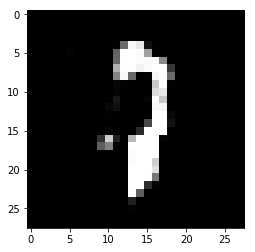

Loop: 954100, Generator_loss: -0.0063913, Discriminator_loss: -0.0070224
Loop: 954200, Generator_loss: -0.012992, Discriminator_loss: 0.005704
Loop: 954300, Generator_loss: -0.010848, Discriminator_loss: 0.0042245
Loop: 954400, Generator_loss: -0.039143, Discriminator_loss: 0.0064542
Loop: 954500, Generator_loss: -0.02406, Discriminator_loss: 0.005796
Loop: 954600, Generator_loss: -0.054288, Discriminator_loss: 0.012735
Loop: 954700, Generator_loss: -0.042881, Discriminator_loss: -0.0043532
Loop: 954800, Generator_loss: 0.047565, Discriminator_loss: 0.0066798
Loop: 954900, Generator_loss: 0.036336, Discriminator_loss: -0.011429
Loop: 955000, Generator_loss: -0.027291, Discriminator_loss: 0.0088777


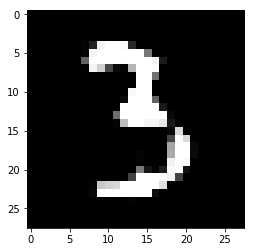

Loop: 955100, Generator_loss: -0.060298, Discriminator_loss: -0.0029334
Loop: 955200, Generator_loss: -0.011032, Discriminator_loss: 0.0052727
Loop: 955300, Generator_loss: -0.014536, Discriminator_loss: 0.00045295
Loop: 955400, Generator_loss: 0.040076, Discriminator_loss: 0.00019278
Loop: 955500, Generator_loss: 0.026208, Discriminator_loss: -0.0020619
Loop: 955600, Generator_loss: 0.019914, Discriminator_loss: 0.0051169
Loop: 955700, Generator_loss: -0.054155, Discriminator_loss: 0.0042157
Loop: 955800, Generator_loss: -0.032163, Discriminator_loss: 0.00059824
Loop: 955900, Generator_loss: -0.02976, Discriminator_loss: -0.0060027
Loop: 956000, Generator_loss: -0.0062547, Discriminator_loss: 0.0057592


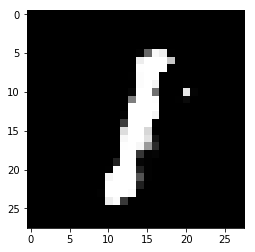

Loop: 956100, Generator_loss: -0.0092273, Discriminator_loss: 0.0012867
Loop: 956200, Generator_loss: 0.022461, Discriminator_loss: -0.00064583
Loop: 956300, Generator_loss: 0.02456, Discriminator_loss: -0.00034007
Loop: 956400, Generator_loss: -0.0079498, Discriminator_loss: -3.2289e-05
Loop: 956500, Generator_loss: -0.013767, Discriminator_loss: 0.001614
Loop: 956600, Generator_loss: 0.01591, Discriminator_loss: 0.0063431
Loop: 956700, Generator_loss: -0.0098537, Discriminator_loss: 0.004484
Loop: 956800, Generator_loss: 0.0033001, Discriminator_loss: -0.0031781
Loop: 956900, Generator_loss: -0.029594, Discriminator_loss: 0.0039431
Loop: 957000, Generator_loss: -0.018658, Discriminator_loss: 0.0019033


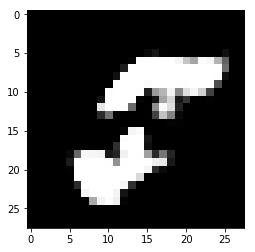

Loop: 957100, Generator_loss: -0.068281, Discriminator_loss: 0.0060685
Loop: 957200, Generator_loss: -0.013166, Discriminator_loss: 0.0053026
Loop: 957300, Generator_loss: -0.014679, Discriminator_loss: -0.0031552
Loop: 957400, Generator_loss: 0.049153, Discriminator_loss: 0.0051359
Loop: 957500, Generator_loss: -0.038402, Discriminator_loss: 0.005522
Loop: 957600, Generator_loss: -0.034602, Discriminator_loss: 0.0040645
Loop: 957700, Generator_loss: -0.066487, Discriminator_loss: 0.011805
Loop: 957800, Generator_loss: -0.021054, Discriminator_loss: 0.006325
Loop: 957900, Generator_loss: -0.05639, Discriminator_loss: 0.00014958
Loop: 958000, Generator_loss: 0.0030646, Discriminator_loss: 0.0015011


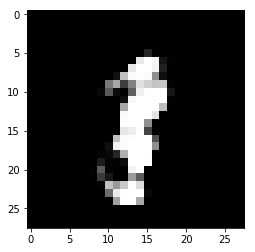

Loop: 958100, Generator_loss: -0.045169, Discriminator_loss: 0.00055763
Loop: 958200, Generator_loss: -0.0087983, Discriminator_loss: -0.0050496
Loop: 958300, Generator_loss: 0.017641, Discriminator_loss: 0.0017966
Loop: 958400, Generator_loss: 0.030903, Discriminator_loss: 0.0042595
Loop: 958500, Generator_loss: -0.00067211, Discriminator_loss: 0.0039108
Loop: 958600, Generator_loss: 0.020657, Discriminator_loss: 0.004077
Loop: 958700, Generator_loss: 0.047321, Discriminator_loss: 0.0039573
Loop: 958800, Generator_loss: -0.021222, Discriminator_loss: 0.0075667
Loop: 958900, Generator_loss: 0.00094951, Discriminator_loss: 0.0040348
Loop: 959000, Generator_loss: 0.024304, Discriminator_loss: -0.0014302


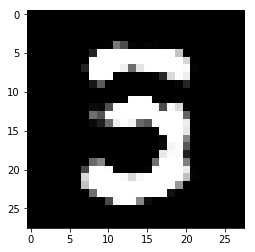

Loop: 959100, Generator_loss: 0.027188, Discriminator_loss: 0.00017159
Loop: 959200, Generator_loss: 0.028885, Discriminator_loss: 0.0035461
Loop: 959300, Generator_loss: 0.019992, Discriminator_loss: 0.0034206
Loop: 959400, Generator_loss: -0.016465, Discriminator_loss: 0.0041665
Loop: 959500, Generator_loss: 0.0032229, Discriminator_loss: -0.00050284
Loop: 959600, Generator_loss: -0.017898, Discriminator_loss: 0.0075014
Loop: 959700, Generator_loss: 0.0081426, Discriminator_loss: 0.0010382
Loop: 959800, Generator_loss: -0.0069449, Discriminator_loss: 5.7218e-05
Loop: 959900, Generator_loss: 0.0047028, Discriminator_loss: 0.0027649
Loop: 960000, Generator_loss: 0.0024219, Discriminator_loss: 0.0080499


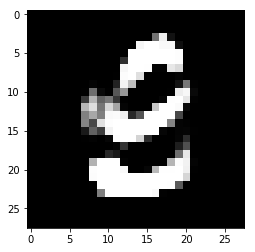

Loop: 960100, Generator_loss: 0.011373, Discriminator_loss: -0.0038243
Loop: 960200, Generator_loss: 0.047205, Discriminator_loss: 0.0037706
Loop: 960300, Generator_loss: -0.016258, Discriminator_loss: 0.0011611
Loop: 960400, Generator_loss: 0.023512, Discriminator_loss: 0.0022768
Loop: 960500, Generator_loss: 0.019065, Discriminator_loss: -0.0074669
Loop: 960600, Generator_loss: 0.047206, Discriminator_loss: 0.0086624
Loop: 960700, Generator_loss: -0.037792, Discriminator_loss: 0.0047791
Loop: 960800, Generator_loss: 0.02917, Discriminator_loss: 0.0028134
Loop: 960900, Generator_loss: -0.052476, Discriminator_loss: 0.0079567
Loop: 961000, Generator_loss: -0.029315, Discriminator_loss: 0.0023828


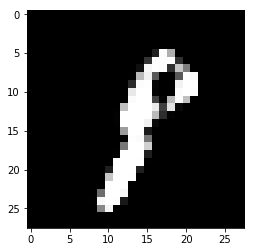

Loop: 961100, Generator_loss: -0.021609, Discriminator_loss: 0.0039137
Loop: 961200, Generator_loss: -0.060618, Discriminator_loss: -0.0030997
Loop: 961300, Generator_loss: -0.03176, Discriminator_loss: 0.0036887
Loop: 961400, Generator_loss: -0.0032258, Discriminator_loss: 0.0067941
Loop: 961500, Generator_loss: -0.04609, Discriminator_loss: 0.0055915
Loop: 961600, Generator_loss: 0.045685, Discriminator_loss: -0.00084161
Loop: 961700, Generator_loss: 0.00012667, Discriminator_loss: 0.0043927
Loop: 961800, Generator_loss: -0.0041718, Discriminator_loss: -0.0020548
Loop: 961900, Generator_loss: 0.024904, Discriminator_loss: 0.0024094
Loop: 962000, Generator_loss: 0.074091, Discriminator_loss: 0.0020544


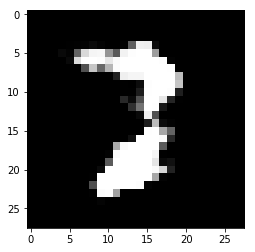

Loop: 962100, Generator_loss: -0.0018657, Discriminator_loss: 0.0077632
Loop: 962200, Generator_loss: 0.0072225, Discriminator_loss: -0.005383
Loop: 962300, Generator_loss: -0.021106, Discriminator_loss: 0.0021202
Loop: 962400, Generator_loss: 0.00086719, Discriminator_loss: 0.0014297
Loop: 962500, Generator_loss: -0.038749, Discriminator_loss: 0.00044547
Loop: 962600, Generator_loss: 0.025341, Discriminator_loss: -0.0018992
Loop: 962700, Generator_loss: 0.01686, Discriminator_loss: 0.010177
Loop: 962800, Generator_loss: -0.024071, Discriminator_loss: 0.00031306
Loop: 962900, Generator_loss: 0.0070788, Discriminator_loss: -0.00055032
Loop: 963000, Generator_loss: 0.030843, Discriminator_loss: 0.0043746


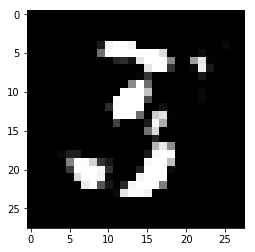

Loop: 963100, Generator_loss: 0.02131, Discriminator_loss: -0.0052912
Loop: 963200, Generator_loss: -0.027766, Discriminator_loss: -0.0021302
Loop: 963300, Generator_loss: 0.0020418, Discriminator_loss: 0.0028728
Loop: 963400, Generator_loss: 0.018391, Discriminator_loss: 0.0047946
Loop: 963500, Generator_loss: -0.01245, Discriminator_loss: 0.0017113
Loop: 963600, Generator_loss: 0.0006753, Discriminator_loss: -0.00070088
Loop: 963700, Generator_loss: -0.0078094, Discriminator_loss: 0.0018278
Loop: 963800, Generator_loss: -0.018824, Discriminator_loss: 0.004896
Loop: 963900, Generator_loss: -0.0046197, Discriminator_loss: 0.0023283
Loop: 964000, Generator_loss: -0.0193, Discriminator_loss: -0.0019579


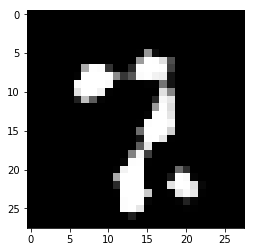

Loop: 964100, Generator_loss: -0.038872, Discriminator_loss: -7.8842e-05
Loop: 964200, Generator_loss: -0.070456, Discriminator_loss: 0.009913
Loop: 964300, Generator_loss: -0.030455, Discriminator_loss: -0.0018254
Loop: 964400, Generator_loss: -0.01161, Discriminator_loss: 0.0030023
Loop: 964500, Generator_loss: -0.021531, Discriminator_loss: 0.0032308
Loop: 964600, Generator_loss: -0.030792, Discriminator_loss: 0.0021051
Loop: 964700, Generator_loss: -0.040523, Discriminator_loss: 0.0044608
Loop: 964800, Generator_loss: -0.0051873, Discriminator_loss: 0.0044668
Loop: 964900, Generator_loss: -0.015565, Discriminator_loss: 0.0068356
Loop: 965000, Generator_loss: 0.0067566, Discriminator_loss: 0.0019559


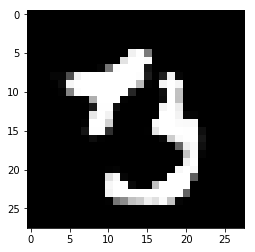

Loop: 965100, Generator_loss: -0.0035842, Discriminator_loss: -0.0032829
Loop: 965200, Generator_loss: 0.0018115, Discriminator_loss: 0.00027414
Loop: 965300, Generator_loss: 0.00020332, Discriminator_loss: 0.00039375
Loop: 965400, Generator_loss: 0.0081483, Discriminator_loss: 0.00075644
Loop: 965500, Generator_loss: -0.012145, Discriminator_loss: -0.00066369
Loop: 965600, Generator_loss: -0.014916, Discriminator_loss: 0.00052691
Loop: 965700, Generator_loss: 0.057844, Discriminator_loss: 0.019901
Loop: 965800, Generator_loss: 0.016813, Discriminator_loss: 0.0048522
Loop: 965900, Generator_loss: 0.06552, Discriminator_loss: 0.010625
Loop: 966000, Generator_loss: -0.040685, Discriminator_loss: 0.0020063


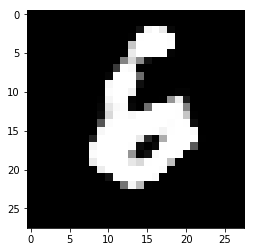

Loop: 966100, Generator_loss: -0.025955, Discriminator_loss: 0.0066952
Loop: 966200, Generator_loss: -0.011374, Discriminator_loss: -0.00201
Loop: 966300, Generator_loss: -0.023166, Discriminator_loss: -0.0067529
Loop: 966400, Generator_loss: -0.045174, Discriminator_loss: 0.004174
Loop: 966500, Generator_loss: -0.018244, Discriminator_loss: 0.0054157
Loop: 966600, Generator_loss: -0.056485, Discriminator_loss: 0.014544
Loop: 966700, Generator_loss: -0.0077218, Discriminator_loss: 0.0081909
Loop: 966800, Generator_loss: -0.030541, Discriminator_loss: 0.0053497
Loop: 966900, Generator_loss: -0.033348, Discriminator_loss: 0.0024066
Loop: 967000, Generator_loss: -0.050716, Discriminator_loss: 0.0074568


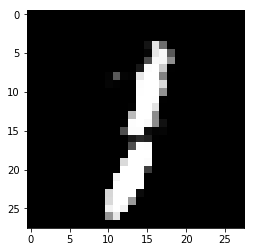

Loop: 967100, Generator_loss: 0.014114, Discriminator_loss: -0.0024776
Loop: 967200, Generator_loss: 0.0049696, Discriminator_loss: -0.0029531
Loop: 967300, Generator_loss: 0.028202, Discriminator_loss: 0.0029472
Loop: 967400, Generator_loss: 0.0095276, Discriminator_loss: -0.001673
Loop: 967500, Generator_loss: -0.020506, Discriminator_loss: 0.0019938
Loop: 967600, Generator_loss: -0.0065091, Discriminator_loss: -0.0039247
Loop: 967700, Generator_loss: -0.0040386, Discriminator_loss: -0.0011827
Loop: 967800, Generator_loss: 0.032513, Discriminator_loss: -0.002082
Loop: 967900, Generator_loss: 0.006485, Discriminator_loss: 0.00039382
Loop: 968000, Generator_loss: -0.05169, Discriminator_loss: -0.00092422


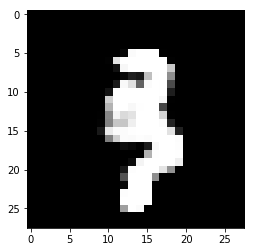

Loop: 968100, Generator_loss: -0.027864, Discriminator_loss: 0.0030944
Loop: 968200, Generator_loss: -2.1007e-05, Discriminator_loss: 0.0014005
Loop: 968300, Generator_loss: 0.014632, Discriminator_loss: -0.00079507
Loop: 968400, Generator_loss: -0.025855, Discriminator_loss: 0.0078387
Loop: 968500, Generator_loss: -0.025738, Discriminator_loss: 0.0034079
Loop: 968600, Generator_loss: -0.0083593, Discriminator_loss: 0.0016418
Loop: 968700, Generator_loss: 0.007912, Discriminator_loss: -0.00063533
Loop: 968800, Generator_loss: 0.023363, Discriminator_loss: 0.0085711
Loop: 968900, Generator_loss: 0.0031258, Discriminator_loss: 0.010435
Loop: 969000, Generator_loss: -0.054168, Discriminator_loss: 0.0082781


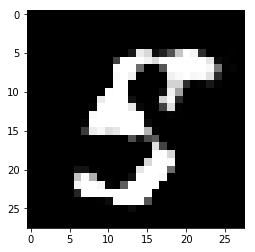

Loop: 969100, Generator_loss: -0.031763, Discriminator_loss: 0.0031474
Loop: 969200, Generator_loss: -0.0092115, Discriminator_loss: 0.00063524
Loop: 969300, Generator_loss: 0.010479, Discriminator_loss: 0.0016711
Loop: 969400, Generator_loss: -0.043631, Discriminator_loss: 0.0026789
Loop: 969500, Generator_loss: -0.028186, Discriminator_loss: 0.0058719
Loop: 969600, Generator_loss: 0.017021, Discriminator_loss: 0.00093931
Loop: 969700, Generator_loss: 0.005098, Discriminator_loss: -0.00077917
Loop: 969800, Generator_loss: 0.052485, Discriminator_loss: -0.0031388
Loop: 969900, Generator_loss: 0.0091758, Discriminator_loss: -0.001385
Loop: 970000, Generator_loss: 0.014978, Discriminator_loss: 0.00095886


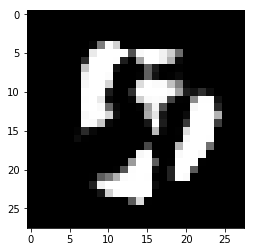

Loop: 970100, Generator_loss: -0.0045945, Discriminator_loss: 0.00088058
Loop: 970200, Generator_loss: -0.044707, Discriminator_loss: 0.0094869
Loop: 970300, Generator_loss: -0.034244, Discriminator_loss: -0.0018707
Loop: 970400, Generator_loss: -0.0039933, Discriminator_loss: 0.0073345
Loop: 970500, Generator_loss: -0.030971, Discriminator_loss: 0.0078835
Loop: 970600, Generator_loss: -0.047833, Discriminator_loss: -0.00068447
Loop: 970700, Generator_loss: 0.021132, Discriminator_loss: -0.0011189
Loop: 970800, Generator_loss: -0.00044858, Discriminator_loss: 0.0046772
Loop: 970900, Generator_loss: -0.0082444, Discriminator_loss: -0.0015666
Loop: 971000, Generator_loss: -0.040878, Discriminator_loss: 0.0019124


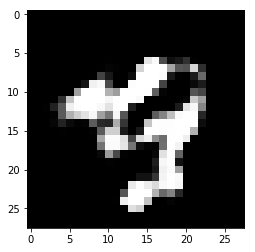

Loop: 971100, Generator_loss: 0.018208, Discriminator_loss: 0.00010986
Loop: 971200, Generator_loss: 0.03633, Discriminator_loss: -0.0010441
Loop: 971300, Generator_loss: -0.030121, Discriminator_loss: 0.00036947
Loop: 971400, Generator_loss: -0.020944, Discriminator_loss: 0.0078685
Loop: 971500, Generator_loss: -0.032345, Discriminator_loss: -0.0017334
Loop: 971600, Generator_loss: 0.039894, Discriminator_loss: 0.01101
Loop: 971700, Generator_loss: -0.045246, Discriminator_loss: -0.0083121
Loop: 971800, Generator_loss: 0.017802, Discriminator_loss: -0.0047945
Loop: 971900, Generator_loss: -0.010626, Discriminator_loss: 0.0016895
Loop: 972000, Generator_loss: 0.0013759, Discriminator_loss: -6.8141e-05


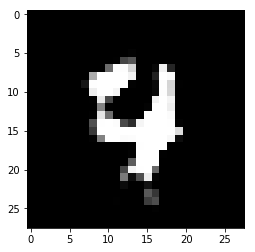

Loop: 972100, Generator_loss: -0.0177, Discriminator_loss: 0.00049608
Loop: 972200, Generator_loss: -0.0077366, Discriminator_loss: 0.0016179
Loop: 972300, Generator_loss: -0.018076, Discriminator_loss: 0.0021165
Loop: 972400, Generator_loss: 0.0066819, Discriminator_loss: 0.00014648
Loop: 972500, Generator_loss: -0.016457, Discriminator_loss: 0.0015853
Loop: 972600, Generator_loss: -0.037881, Discriminator_loss: 0.0025965
Loop: 972700, Generator_loss: 0.026422, Discriminator_loss: 0.0022301
Loop: 972800, Generator_loss: -0.055565, Discriminator_loss: -0.00061583
Loop: 972900, Generator_loss: -0.012406, Discriminator_loss: 0.0010228
Loop: 973000, Generator_loss: -0.064831, Discriminator_loss: 0.0078965


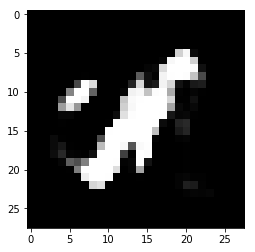

Loop: 973100, Generator_loss: -0.054234, Discriminator_loss: 0.001123
Loop: 973200, Generator_loss: -0.017758, Discriminator_loss: -0.0043584
Loop: 973300, Generator_loss: -0.047739, Discriminator_loss: 0.014048
Loop: 973400, Generator_loss: 0.0028034, Discriminator_loss: 0.00075248
Loop: 973500, Generator_loss: -0.0005511, Discriminator_loss: 0.0064004
Loop: 973600, Generator_loss: 0.035371, Discriminator_loss: 0.01074
Loop: 973700, Generator_loss: 0.020936, Discriminator_loss: 0.0044452
Loop: 973800, Generator_loss: -0.007541, Discriminator_loss: 0.00379
Loop: 973900, Generator_loss: -0.027818, Discriminator_loss: -0.0048614
Loop: 974000, Generator_loss: -0.022636, Discriminator_loss: 0.0023665


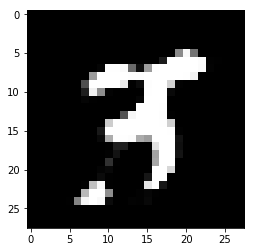

Loop: 974100, Generator_loss: 0.037706, Discriminator_loss: -0.0027027
Loop: 974200, Generator_loss: -0.020718, Discriminator_loss: 0.0085316
Loop: 974300, Generator_loss: -0.067118, Discriminator_loss: 0.0044965
Loop: 974400, Generator_loss: 0.017087, Discriminator_loss: 0.0043644
Loop: 974500, Generator_loss: -0.016605, Discriminator_loss: 0.0013544
Loop: 974600, Generator_loss: 0.045327, Discriminator_loss: -0.00035952
Loop: 974700, Generator_loss: -0.0050914, Discriminator_loss: -0.00050789
Loop: 974800, Generator_loss: -0.0071423, Discriminator_loss: 0.0041263
Loop: 974900, Generator_loss: -0.022653, Discriminator_loss: 0.0070085
Loop: 975000, Generator_loss: -0.0073031, Discriminator_loss: 0.0030657


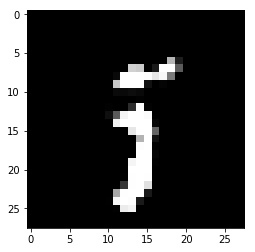

Loop: 975100, Generator_loss: 0.019652, Discriminator_loss: 0.0065221
Loop: 975200, Generator_loss: -0.020147, Discriminator_loss: 0.0010608
Loop: 975300, Generator_loss: 0.024156, Discriminator_loss: 0.00065378
Loop: 975400, Generator_loss: -0.048711, Discriminator_loss: -0.0015507
Loop: 975500, Generator_loss: -0.04866, Discriminator_loss: -0.00022643
Loop: 975600, Generator_loss: -0.035616, Discriminator_loss: 0.0066937
Loop: 975700, Generator_loss: 0.012123, Discriminator_loss: 0.013286
Loop: 975800, Generator_loss: -0.0060171, Discriminator_loss: 0.0052734
Loop: 975900, Generator_loss: 0.024543, Discriminator_loss: 0.00053184
Loop: 976000, Generator_loss: 0.02298, Discriminator_loss: 0.00018822


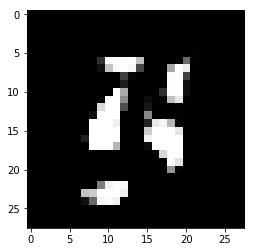

Loop: 976100, Generator_loss: 0.002731, Discriminator_loss: 0.0016737
Loop: 976200, Generator_loss: -0.0058462, Discriminator_loss: 0.0053056
Loop: 976300, Generator_loss: -0.01921, Discriminator_loss: 0.0025546
Loop: 976400, Generator_loss: -0.029162, Discriminator_loss: 0.0037973
Loop: 976500, Generator_loss: 0.028909, Discriminator_loss: 0.0077373
Loop: 976600, Generator_loss: 0.03092, Discriminator_loss: 0.00054012
Loop: 976700, Generator_loss: -0.042309, Discriminator_loss: 0.0012555
Loop: 976800, Generator_loss: -0.068647, Discriminator_loss: 0.0039336
Loop: 976900, Generator_loss: -0.019266, Discriminator_loss: 0.0039872
Loop: 977000, Generator_loss: 0.0062006, Discriminator_loss: 0.0048897


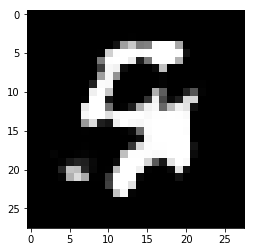

Loop: 977100, Generator_loss: 0.031393, Discriminator_loss: -0.0061443
Loop: 977200, Generator_loss: 0.0035332, Discriminator_loss: -0.0021916
Loop: 977300, Generator_loss: -0.018336, Discriminator_loss: 0.0036344
Loop: 977400, Generator_loss: -0.025346, Discriminator_loss: -0.0026069
Loop: 977500, Generator_loss: -0.00082258, Discriminator_loss: 0.0021549
Loop: 977600, Generator_loss: -0.027202, Discriminator_loss: -0.0068328
Loop: 977700, Generator_loss: -0.047761, Discriminator_loss: 0.0071173
Loop: 977800, Generator_loss: 0.033085, Discriminator_loss: 0.0029725
Loop: 977900, Generator_loss: 0.00089778, Discriminator_loss: 0.0014969
Loop: 978000, Generator_loss: -0.023469, Discriminator_loss: 0.0054301


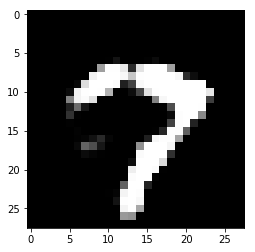

Loop: 978100, Generator_loss: -0.035352, Discriminator_loss: 0.0087094
Loop: 978200, Generator_loss: -0.036096, Discriminator_loss: 0.0047505
Loop: 978300, Generator_loss: -0.071737, Discriminator_loss: 0.007467
Loop: 978400, Generator_loss: -0.0065416, Discriminator_loss: 0.00010215
Loop: 978500, Generator_loss: 0.018577, Discriminator_loss: 0.0029933
Loop: 978600, Generator_loss: -0.028293, Discriminator_loss: 0.0053583
Loop: 978700, Generator_loss: -0.055566, Discriminator_loss: 0.0059503
Loop: 978800, Generator_loss: -0.049076, Discriminator_loss: -0.0068659
Loop: 978900, Generator_loss: -0.059099, Discriminator_loss: 0.004755
Loop: 979000, Generator_loss: 0.0041001, Discriminator_loss: 0.0010559


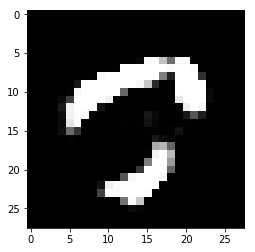

Loop: 979100, Generator_loss: -0.025726, Discriminator_loss: -0.0041779
Loop: 979200, Generator_loss: -0.013361, Discriminator_loss: 0.00095826
Loop: 979300, Generator_loss: -0.024468, Discriminator_loss: 0.0046931
Loop: 979400, Generator_loss: -0.020369, Discriminator_loss: 0.0018777
Loop: 979500, Generator_loss: -0.023863, Discriminator_loss: 0.0016335
Loop: 979600, Generator_loss: -0.028724, Discriminator_loss: 0.0070202
Loop: 979700, Generator_loss: 0.001794, Discriminator_loss: -0.003732
Loop: 979800, Generator_loss: 0.018996, Discriminator_loss: 0.0011557
Loop: 979900, Generator_loss: 0.012265, Discriminator_loss: -0.00066574
Loop: 980000, Generator_loss: 0.021277, Discriminator_loss: 0.008325


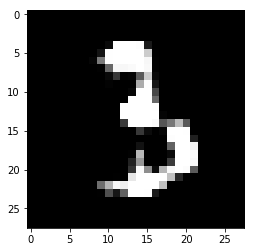

Loop: 980100, Generator_loss: -0.046041, Discriminator_loss: 0.0063609
Loop: 980200, Generator_loss: -0.0079307, Discriminator_loss: 0.0053301
Loop: 980300, Generator_loss: 0.048546, Discriminator_loss: 0.011541
Loop: 980400, Generator_loss: -0.028382, Discriminator_loss: 0.0046958
Loop: 980500, Generator_loss: -0.010405, Discriminator_loss: 0.0032036
Loop: 980600, Generator_loss: -0.038098, Discriminator_loss: 0.0051752
Loop: 980700, Generator_loss: -0.047843, Discriminator_loss: 0.0025583
Loop: 980800, Generator_loss: 0.012591, Discriminator_loss: 0.0017068
Loop: 980900, Generator_loss: -0.04066, Discriminator_loss: 0.0047477
Loop: 981000, Generator_loss: -0.050536, Discriminator_loss: 0.0061479


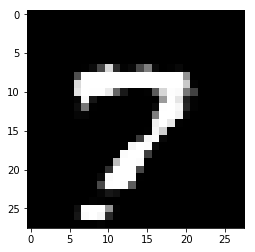

Loop: 981100, Generator_loss: -0.010017, Discriminator_loss: -0.00025255
Loop: 981200, Generator_loss: 0.028134, Discriminator_loss: 0.010866
Loop: 981300, Generator_loss: 0.017173, Discriminator_loss: 0.0056699
Loop: 981400, Generator_loss: -0.034267, Discriminator_loss: -0.0016425
Loop: 981500, Generator_loss: -0.015846, Discriminator_loss: -0.00037294
Loop: 981600, Generator_loss: 0.00047481, Discriminator_loss: 0.00081783
Loop: 981700, Generator_loss: -3.1636e-06, Discriminator_loss: -0.00072925
Loop: 981800, Generator_loss: -0.037185, Discriminator_loss: 0.0052753
Loop: 981900, Generator_loss: -0.0078462, Discriminator_loss: 0.0061828
Loop: 982000, Generator_loss: -0.020567, Discriminator_loss: 0.00011382


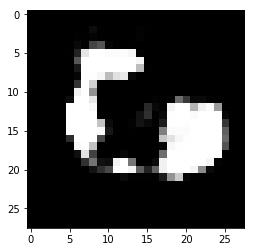

Loop: 982100, Generator_loss: -0.050852, Discriminator_loss: 0.0070473
Loop: 982200, Generator_loss: -0.04639, Discriminator_loss: 0.0048914
Loop: 982300, Generator_loss: -0.0048111, Discriminator_loss: 0.00040452
Loop: 982400, Generator_loss: 0.0041844, Discriminator_loss: 0.0048495
Loop: 982500, Generator_loss: 0.033304, Discriminator_loss: 0.0048844
Loop: 982600, Generator_loss: 0.031122, Discriminator_loss: -0.00095849
Loop: 982700, Generator_loss: -0.03363, Discriminator_loss: -0.0044673
Loop: 982800, Generator_loss: 0.029186, Discriminator_loss: 0.0041214
Loop: 982900, Generator_loss: -0.0064062, Discriminator_loss: 0.0010037
Loop: 983000, Generator_loss: -0.062097, Discriminator_loss: 0.0037954


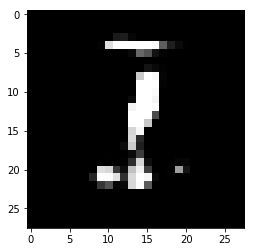

Loop: 983100, Generator_loss: 0.021677, Discriminator_loss: 0.0021367
Loop: 983200, Generator_loss: 0.049765, Discriminator_loss: 0.0043131
Loop: 983300, Generator_loss: 0.0065831, Discriminator_loss: -0.0005303
Loop: 983400, Generator_loss: -0.015235, Discriminator_loss: 0.0021157
Loop: 983500, Generator_loss: -0.014978, Discriminator_loss: 0.0070374
Loop: 983600, Generator_loss: -0.0075505, Discriminator_loss: -0.0066251
Loop: 983700, Generator_loss: -0.049208, Discriminator_loss: 0.0072247
Loop: 983800, Generator_loss: -0.057784, Discriminator_loss: 0.0028241
Loop: 983900, Generator_loss: -0.029086, Discriminator_loss: 0.0013142
Loop: 984000, Generator_loss: -0.032166, Discriminator_loss: 0.010945


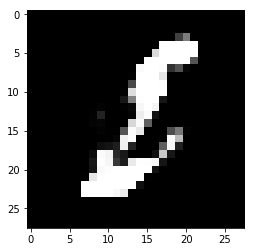

Loop: 984100, Generator_loss: -0.0079167, Discriminator_loss: 0.0055645
Loop: 984200, Generator_loss: -0.069381, Discriminator_loss: 0.010756
Loop: 984300, Generator_loss: -0.053527, Discriminator_loss: 0.0011081
Loop: 984400, Generator_loss: -0.042961, Discriminator_loss: 0.00649
Loop: 984500, Generator_loss: -0.044335, Discriminator_loss: -0.0021861
Loop: 984600, Generator_loss: -0.042614, Discriminator_loss: 0.0057909
Loop: 984700, Generator_loss: 0.018418, Discriminator_loss: 0.0052034
Loop: 984800, Generator_loss: 0.0016653, Discriminator_loss: 0.0055333
Loop: 984900, Generator_loss: 0.013092, Discriminator_loss: 0.00559
Loop: 985000, Generator_loss: 0.0053434, Discriminator_loss: 0.0053195


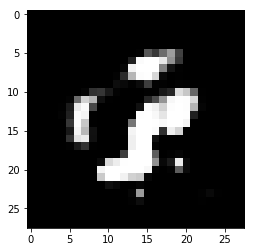

Loop: 985100, Generator_loss: -0.016588, Discriminator_loss: 0.00041834
Loop: 985200, Generator_loss: -0.024436, Discriminator_loss: -0.0039872
Loop: 985300, Generator_loss: 0.0049415, Discriminator_loss: 0.0026855
Loop: 985400, Generator_loss: 0.083599, Discriminator_loss: 0.0097367
Loop: 985500, Generator_loss: -0.0088473, Discriminator_loss: -0.0015796
Loop: 985600, Generator_loss: 0.023863, Discriminator_loss: -0.0076069
Loop: 985700, Generator_loss: -0.018623, Discriminator_loss: 0.00090097
Loop: 985800, Generator_loss: -0.013139, Discriminator_loss: 0.0052411
Loop: 985900, Generator_loss: -0.026385, Discriminator_loss: 0.0023385
Loop: 986000, Generator_loss: -0.050625, Discriminator_loss: -0.0014955


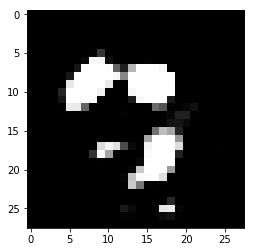

Loop: 986100, Generator_loss: 0.00060992, Discriminator_loss: 0.0080545
Loop: 986200, Generator_loss: 0.0066297, Discriminator_loss: 0.0050659
Loop: 986300, Generator_loss: -0.011697, Discriminator_loss: 0.0013054
Loop: 986400, Generator_loss: -0.014666, Discriminator_loss: -0.0062095
Loop: 986500, Generator_loss: -0.0079404, Discriminator_loss: -0.0011307
Loop: 986600, Generator_loss: 0.0008767, Discriminator_loss: 0.0009486
Loop: 986700, Generator_loss: 0.002384, Discriminator_loss: 0.00076628
Loop: 986800, Generator_loss: -0.0089728, Discriminator_loss: 0.00076843
Loop: 986900, Generator_loss: -0.0067129, Discriminator_loss: 0.0018235
Loop: 987000, Generator_loss: -0.036003, Discriminator_loss: 0.0005841


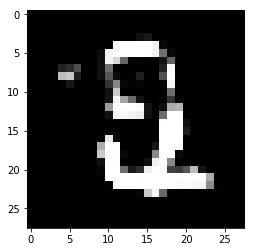

Loop: 987100, Generator_loss: -0.019086, Discriminator_loss: -0.0065679
Loop: 987200, Generator_loss: 0.0078753, Discriminator_loss: 0.0017714
Loop: 987300, Generator_loss: -0.014076, Discriminator_loss: 0.0050079
Loop: 987400, Generator_loss: 0.00060318, Discriminator_loss: -4.7296e-05
Loop: 987500, Generator_loss: 0.0045122, Discriminator_loss: -0.0043108
Loop: 987600, Generator_loss: 0.015082, Discriminator_loss: 0.0055278
Loop: 987700, Generator_loss: -0.0020881, Discriminator_loss: -0.0014182
Loop: 987800, Generator_loss: -0.024414, Discriminator_loss: -0.00049151
Loop: 987900, Generator_loss: -0.0011333, Discriminator_loss: 0.0042146
Loop: 988000, Generator_loss: -0.044025, Discriminator_loss: 0.0059528


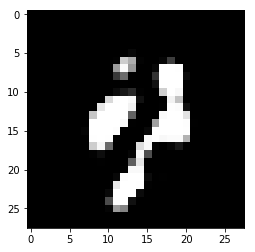

Loop: 988100, Generator_loss: 0.016747, Discriminator_loss: 0.0019393
Loop: 988200, Generator_loss: -0.013771, Discriminator_loss: -0.0054765
Loop: 988300, Generator_loss: 0.0041021, Discriminator_loss: 0.0078974
Loop: 988400, Generator_loss: -0.058008, Discriminator_loss: 0.0076269
Loop: 988500, Generator_loss: -0.031021, Discriminator_loss: -0.0061236
Loop: 988600, Generator_loss: -0.041921, Discriminator_loss: 0.0029789
Loop: 988700, Generator_loss: -0.010401, Discriminator_loss: -0.0064306
Loop: 988800, Generator_loss: 0.012901, Discriminator_loss: 0.0058182
Loop: 988900, Generator_loss: 0.001777, Discriminator_loss: 0.0012073
Loop: 989000, Generator_loss: 0.0038166, Discriminator_loss: 0.0014988


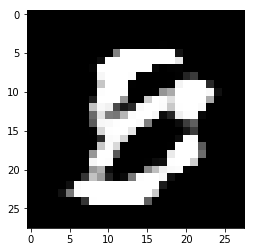

Loop: 989100, Generator_loss: -0.062113, Discriminator_loss: 0.0088675
Loop: 989200, Generator_loss: -0.022577, Discriminator_loss: -0.0024592
Loop: 989300, Generator_loss: -0.037141, Discriminator_loss: -0.0025775
Loop: 989400, Generator_loss: -0.048933, Discriminator_loss: 0.0032849
Loop: 989500, Generator_loss: 0.032309, Discriminator_loss: 0.0082188
Loop: 989600, Generator_loss: -0.056638, Discriminator_loss: -0.0011781
Loop: 989700, Generator_loss: 0.010752, Discriminator_loss: 0.0048947
Loop: 989800, Generator_loss: -0.0020965, Discriminator_loss: -0.00049429
Loop: 989900, Generator_loss: 0.010588, Discriminator_loss: 0.0011252
Loop: 990000, Generator_loss: -0.013621, Discriminator_loss: -0.00082288


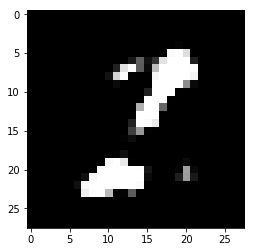

Loop: 990100, Generator_loss: -0.049904, Discriminator_loss: 0.005218
Loop: 990200, Generator_loss: -0.020164, Discriminator_loss: 0.0016204
Loop: 990300, Generator_loss: -0.018816, Discriminator_loss: 0.0025052
Loop: 990400, Generator_loss: -0.0084185, Discriminator_loss: -0.0030974
Loop: 990500, Generator_loss: 0.025448, Discriminator_loss: 0.0035805
Loop: 990600, Generator_loss: 0.026385, Discriminator_loss: 0.0011503
Loop: 990700, Generator_loss: -0.02291, Discriminator_loss: 7.055e-05
Loop: 990800, Generator_loss: 0.015831, Discriminator_loss: 0.0010628
Loop: 990900, Generator_loss: -0.064146, Discriminator_loss: 0.0043985
Loop: 991000, Generator_loss: 0.031722, Discriminator_loss: 0.0044272


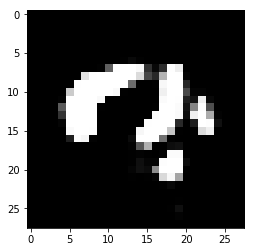

Loop: 991100, Generator_loss: -0.0064839, Discriminator_loss: -0.0038048
Loop: 991200, Generator_loss: -0.065133, Discriminator_loss: 0.0093097
Loop: 991300, Generator_loss: 0.043474, Discriminator_loss: 0.0096423
Loop: 991400, Generator_loss: 0.014154, Discriminator_loss: 0.0025425
Loop: 991500, Generator_loss: 0.0047047, Discriminator_loss: 0.0016325
Loop: 991600, Generator_loss: -0.020416, Discriminator_loss: -0.0011489
Loop: 991700, Generator_loss: -0.0079663, Discriminator_loss: 0.0059797
Loop: 991800, Generator_loss: -0.0038605, Discriminator_loss: -0.0013782
Loop: 991900, Generator_loss: 0.011597, Discriminator_loss: 0.00022642
Loop: 992000, Generator_loss: 0.023838, Discriminator_loss: 0.00068204


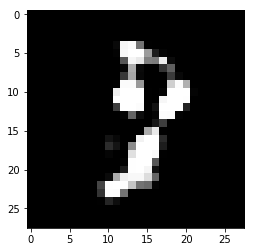

Loop: 992100, Generator_loss: 0.014127, Discriminator_loss: 0.0037297
Loop: 992200, Generator_loss: 0.021134, Discriminator_loss: 0.0027354
Loop: 992300, Generator_loss: 0.031333, Discriminator_loss: 0.0089178
Loop: 992400, Generator_loss: 0.027951, Discriminator_loss: 0.0015789
Loop: 992500, Generator_loss: -0.026286, Discriminator_loss: 0.00702
Loop: 992600, Generator_loss: 0.054756, Discriminator_loss: -0.0061866
Loop: 992700, Generator_loss: -0.033313, Discriminator_loss: 0.0010944
Loop: 992800, Generator_loss: -0.010976, Discriminator_loss: 0.0041422
Loop: 992900, Generator_loss: 0.0085845, Discriminator_loss: -0.0014861
Loop: 993000, Generator_loss: -0.026868, Discriminator_loss: 0.0070814


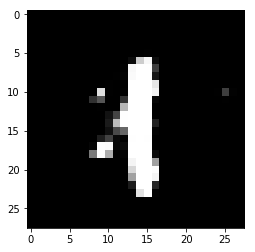

Loop: 993100, Generator_loss: -0.063806, Discriminator_loss: 0.011284
Loop: 993200, Generator_loss: -0.067328, Discriminator_loss: -0.004444
Loop: 993300, Generator_loss: 0.0028147, Discriminator_loss: -0.0018423
Loop: 993400, Generator_loss: 0.0067369, Discriminator_loss: -0.001219
Loop: 993500, Generator_loss: -0.032852, Discriminator_loss: 0.0070848
Loop: 993600, Generator_loss: 0.043169, Discriminator_loss: -0.0024305
Loop: 993700, Generator_loss: -0.0007709, Discriminator_loss: 0.0024104
Loop: 993800, Generator_loss: 0.053724, Discriminator_loss: 0.003734
Loop: 993900, Generator_loss: -0.001593, Discriminator_loss: 0.0028554
Loop: 994000, Generator_loss: 0.011891, Discriminator_loss: -0.0031777


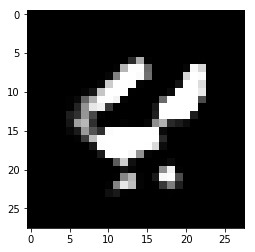

Loop: 994100, Generator_loss: -0.03251, Discriminator_loss: 0.0082997
Loop: 994200, Generator_loss: -0.010589, Discriminator_loss: -0.0045171
Loop: 994300, Generator_loss: 0.020877, Discriminator_loss: -0.0025587
Loop: 994400, Generator_loss: 0.020317, Discriminator_loss: 0.0053161
Loop: 994500, Generator_loss: -0.0060987, Discriminator_loss: 0.00020014
Loop: 994600, Generator_loss: 0.025046, Discriminator_loss: -0.0026674
Loop: 994700, Generator_loss: 0.02957, Discriminator_loss: -0.0044051
Loop: 994800, Generator_loss: -0.0099831, Discriminator_loss: 0.0022244
Loop: 994900, Generator_loss: 0.0075638, Discriminator_loss: 0.0054282
Loop: 995000, Generator_loss: -0.021898, Discriminator_loss: 0.0015381


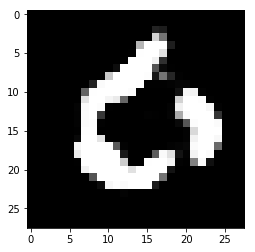

Loop: 995100, Generator_loss: -0.048279, Discriminator_loss: 0.0036541
Loop: 995200, Generator_loss: 0.01632, Discriminator_loss: -0.0017243
Loop: 995300, Generator_loss: -0.013447, Discriminator_loss: -0.0039299
Loop: 995400, Generator_loss: 0.027874, Discriminator_loss: -0.0047322
Loop: 995500, Generator_loss: -0.014697, Discriminator_loss: 0.0025082
Loop: 995600, Generator_loss: -0.059845, Discriminator_loss: -0.003576
Loop: 995700, Generator_loss: -0.013957, Discriminator_loss: -0.00174
Loop: 995800, Generator_loss: -0.0049038, Discriminator_loss: 0.011015
Loop: 995900, Generator_loss: -0.028701, Discriminator_loss: 0.0013844
Loop: 996000, Generator_loss: -0.017184, Discriminator_loss: 0.0023238


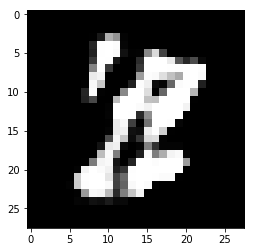

Loop: 996100, Generator_loss: -0.033757, Discriminator_loss: 0.0058742
Loop: 996200, Generator_loss: -0.0015237, Discriminator_loss: 0.0063407
Loop: 996300, Generator_loss: 0.0095682, Discriminator_loss: 0.0043918
Loop: 996400, Generator_loss: -0.032159, Discriminator_loss: 0.0077314
Loop: 996500, Generator_loss: -0.0010663, Discriminator_loss: -0.0014699
Loop: 996600, Generator_loss: -0.025135, Discriminator_loss: 0.001223
Loop: 996700, Generator_loss: -0.0031477, Discriminator_loss: 0.0053385
Loop: 996800, Generator_loss: -0.025207, Discriminator_loss: 0.0060008
Loop: 996900, Generator_loss: 0.010929, Discriminator_loss: -0.0015662
Loop: 997000, Generator_loss: 0.048898, Discriminator_loss: 0.0021888


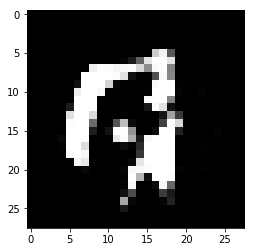

Loop: 997100, Generator_loss: -0.013098, Discriminator_loss: 0.0071191
Loop: 997200, Generator_loss: 0.018862, Discriminator_loss: 0.010108
Loop: 997300, Generator_loss: 0.0061387, Discriminator_loss: 0.00074437
Loop: 997400, Generator_loss: -0.0096953, Discriminator_loss: 0.0054137
Loop: 997500, Generator_loss: -0.008396, Discriminator_loss: 0.0084435
Loop: 997600, Generator_loss: -0.037512, Discriminator_loss: 0.0058238
Loop: 997700, Generator_loss: 0.0033764, Discriminator_loss: -0.00026689
Loop: 997800, Generator_loss: 0.029287, Discriminator_loss: 0.0055171
Loop: 997900, Generator_loss: 0.00097399, Discriminator_loss: -0.0026596
Loop: 998000, Generator_loss: 0.04394, Discriminator_loss: 0.01035


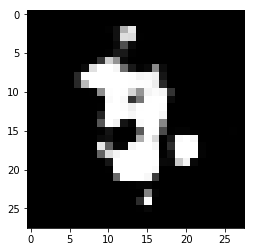

Loop: 998100, Generator_loss: -0.019049, Discriminator_loss: 0.0026895
Loop: 998200, Generator_loss: 0.036389, Discriminator_loss: 0.0045428
Loop: 998300, Generator_loss: 0.016831, Discriminator_loss: 0.00060277
Loop: 998400, Generator_loss: 0.0033611, Discriminator_loss: 0.0050863
Loop: 998500, Generator_loss: -0.015253, Discriminator_loss: 0.0057711
Loop: 998600, Generator_loss: 0.017879, Discriminator_loss: 0.0057533
Loop: 998700, Generator_loss: -0.019127, Discriminator_loss: -0.00071068
Loop: 998800, Generator_loss: -0.031786, Discriminator_loss: 0.0034973
Loop: 998900, Generator_loss: -0.030624, Discriminator_loss: 0.0041238
Loop: 999000, Generator_loss: -0.00089669, Discriminator_loss: 0.0011785


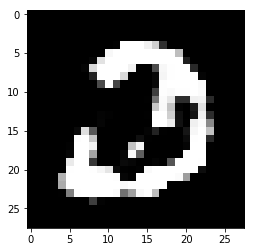

Loop: 999100, Generator_loss: -0.0024489, Discriminator_loss: -0.0025188
Loop: 999200, Generator_loss: -0.0059674, Discriminator_loss: 0.0071174
Loop: 999300, Generator_loss: -0.0078233, Discriminator_loss: -0.00088198
Loop: 999400, Generator_loss: -0.044564, Discriminator_loss: 0.0027238
Loop: 999500, Generator_loss: 0.0043431, Discriminator_loss: 0.0062378
Loop: 999600, Generator_loss: -0.031764, Discriminator_loss: -2.7236e-05
Loop: 999700, Generator_loss: -7.3173e-05, Discriminator_loss: 0.0052415
Loop: 999800, Generator_loss: -0.025391, Discriminator_loss: 0.0016589
Loop: 999900, Generator_loss: -0.015714, Discriminator_loss: 0.0067782


In [4]:
G_sample = generator(z)
D_real = discriminator(X)
D_fake = discriminator(G_sample)

D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake) # Maximize this
G_loss = -tf.reduce_mean(D_fake) # Minimize this

D_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(-D_loss, var_list=var_D))
G_solver = (tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(G_loss, var_list=var_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in var_D]

batch_size = 50

sess = tf.Session()
sess.run(tf.global_variables_initializer())

disc_loss = []
genr_loss = []

disc_loss_exp = []
genr_loss_exp = []

saver = tf.train.Saver()

for it in range(1000000):
    for _ in range(5):
        X_mb, _ = mnist.train.next_batch(batch_size)

        _, D_loss_curr, _ = sess.run(
            [D_solver, D_loss, clip_D],
            feed_dict={X: X_mb, z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
        )

    _, G_loss_curr = sess.run(
        [G_solver, G_loss],
        feed_dict={z: np.random.uniform(-1., 1., size=[batch_size, noise_dim])}
    )
    
    disc_loss.append(D_loss_curr)
    genr_loss.append(G_loss_curr)
    
    if it % 100 == 0:
        print('Loop: {}, Generator_loss: {:.5}, Discriminator_loss: {:.5}'.format(it,G_loss_curr,D_loss_curr))
        disc_loss_exp.append(D_loss_curr)
        genr_loss_exp.append(G_loss_curr)
        
        if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={z: np.random.uniform(-1., 1., size=[1, noise_dim])})
            for img in samples:
                plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
                plt.show()

    if it%100000 == 0:
        save_path = saver.save(sess, 'my_model/final.ckpt')

INFO:tensorflow:Restoring parameters from my_model/final.ckpt


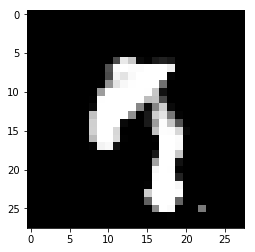

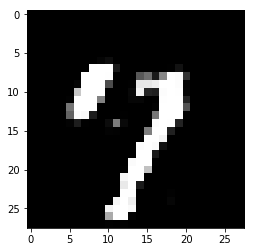

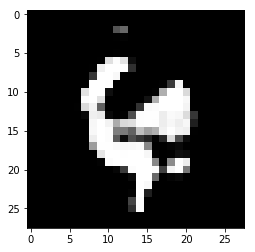

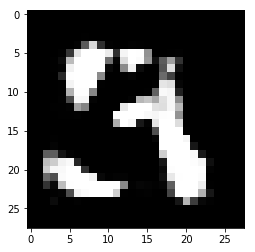

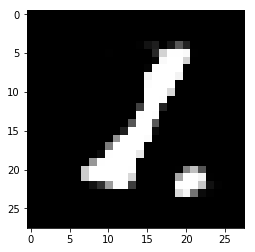

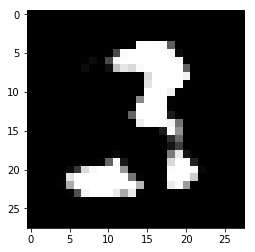

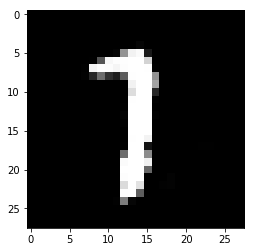

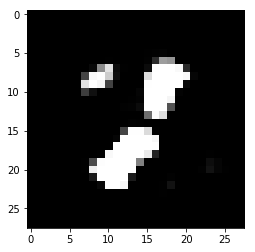

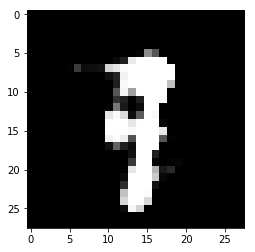

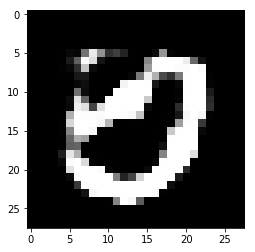

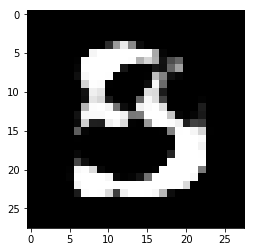

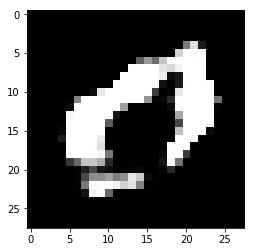

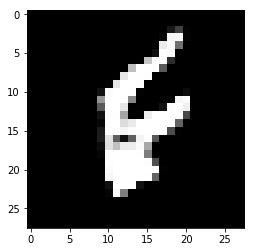

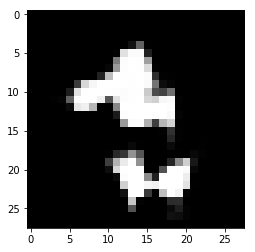

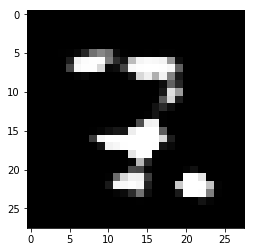

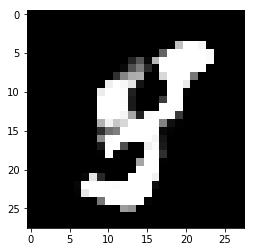

In [5]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'my_model/final.ckpt')
    samples = sess.run(G_sample, feed_dict={z: np.random.uniform(-1., 1., size=[16, noise_dim])})
    
    for img in samples:
        plt.imshow(img.reshape([28, 28]), cmap='Greys_r')
        plt.show()


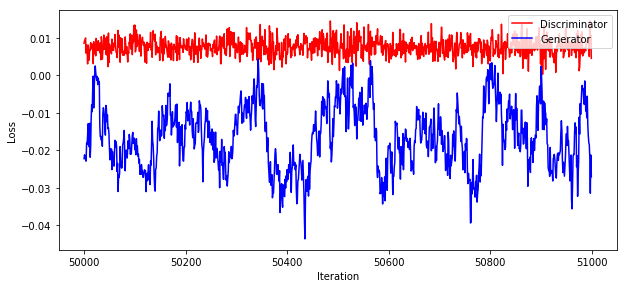

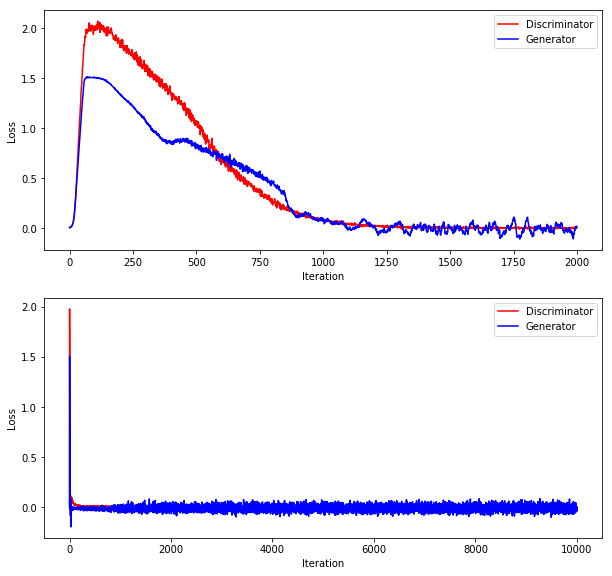

In [6]:
t = np.arange(np.array(disc_loss).shape[0])
T = np.arange(np.array(disc_loss_exp).shape[0])

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(t[50000:51000], np.array(disc_loss)[50000:51000], 'r-', t[50000:51000], np.array(genr_loss)[50000:51000], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')

plt.figure(figsize=(10,15))
plt.subplot(312)
plt.plot(t[0:2000], np.array(disc_loss)[0:2000], 'r-', t[0:2000], np.array(genr_loss)[0:2000], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')

plt.subplot(313)
plt.plot(T, np.array(disc_loss_exp), 'r-', T, np.array(genr_loss_exp), 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')
plt.show()

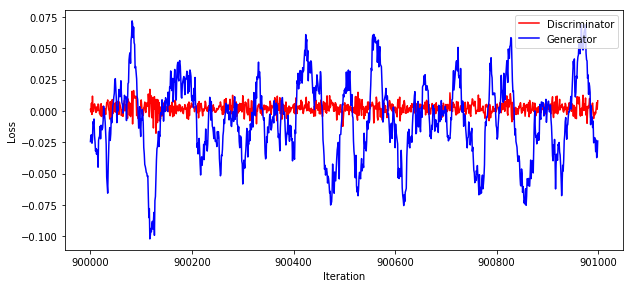

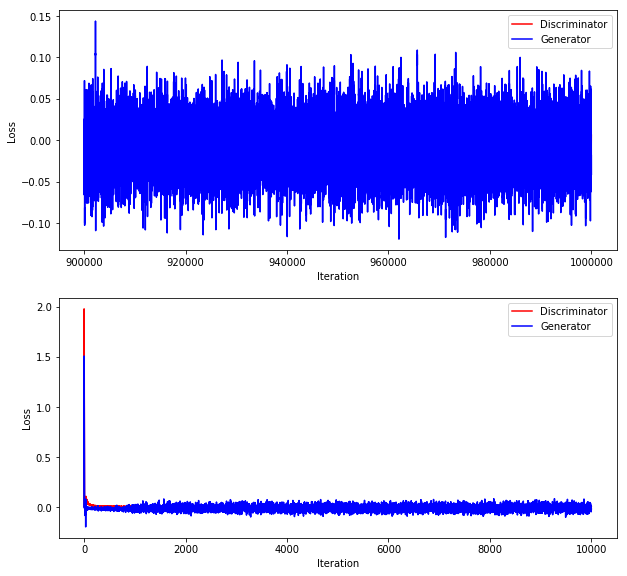

In [7]:
t = np.arange(np.array(disc_loss).shape[0])
T = np.arange(np.array(disc_loss_exp).shape[0])

plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(t[900000:901000], np.array(disc_loss)[900000:901000], 'r-', t[900000:901000], np.array(genr_loss)[900000:901000], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')

plt.figure(figsize=(10,15))
plt.subplot(312)
plt.plot(t[900000:], np.array(disc_loss)[900000:], 'r-', t[900000:], np.array(genr_loss)[900000:], 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')

plt.subplot(313)
plt.plot(T, np.array(disc_loss_exp), 'r-', T, np.array(genr_loss_exp), 'b-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Discriminator', 'Generator'], loc='upper right')
plt.show()